# İstanbul Elections 2019 In Two Rounds

We will evaluate İstanbul Metropolitan Mayor Elections 2019.<br>
In the elections held on March 31th the margin was very thin favoring Ekrem Imamoğlu, the canditate of the opponents and a member of CHP (social democrats). The elections of Istanbul Metropolitan Municipality canceled without any legal background and real evidence by the suppression of the president to the judicial board of elections, the opposition was able to win second time with more than 800K votes difference.<br>
We will analyze the results comparing the characteristics of 39 borough that form İstanbul Metropolitan area. First of all lets load the necessary libraries.

In [90]:
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
import json

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import numpy as np
import pandas as pd

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

print('Libraries imported.')

Libraries imported.


## 1. Data
I formed a geojson file for Istanbul boroughs. 
To form an Istanbul geojson file I used the polygon data from this link https://github.com/melihkorkmaz/il-ilce-mahalle-geolocation-rest-api
The data of one borough was missing, i formed it manually by working on the map.

In [92]:
ist_json='{ "type": "FeatureCollection",    "features": [{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.874044, 41.0816226], [28.8755794, 41.0801273], [28.8786181, 41.0771271], [28.8819293, 41.0754167], [28.8855621, 41.074004], [28.8856709, 41.0739449], [28.8887153, 41.071928], [28.8943689, 41.0693637], [28.8946051, 41.0691856], [28.8976602, 41.0668823], [28.9004757, 41.0647596], [28.9026243, 41.0604962], [28.9068088, 41.0573484], [28.909442, 41.0554936], [28.9105404, 41.0542712], [28.9114945, 41.0518916], [28.9124259, 41.0523847], [28.9128523, 41.0526104], [28.9131683, 41.0527777], [28.9142512, 41.053351], [28.9147319, 41.0526622], [28.9158376, 41.0539129], [28.9156694, 41.0546923], [28.9164713, 41.055436], [28.9180971, 41.0547648], [28.9190826, 41.0541666], [28.9196594, 41.0540925], [28.9202364, 41.0541485], [28.9211978, 41.0535685], [28.9221353, 41.0534235], [28.922616, 41.0538222], [28.9225679, 41.0545835], [28.9228083, 41.0551454], [28.9234092, 41.0552179], [28.9242024, 41.0544204], [28.9243224, 41.0545494], [28.9253322, 41.0556348], [28.9257889, 41.0557798], [28.926249, 41.0546396], [28.9262936, 41.0545291], [28.927159, 41.0542754], [28.9272311, 41.0553629], [28.9270869, 41.0561786], [28.9277118, 41.0562692], [28.9289377, 41.0558886], [28.9300674, 41.0557436], [28.9301876, 41.0560879], [28.931101, 41.0561423], [28.9316779, 41.0564867], [28.9319663, 41.0569761], [28.9315577, 41.0575923], [28.9320625, 41.0577917], [28.9328076, 41.0577736], [28.9334358, 41.0568578], [28.9335287, 41.0567223], [28.9352113, 41.056668], [28.9363651, 41.0574292], [28.9378553, 41.0579548], [28.9390572, 41.0595317], [28.9361968, 41.0593142], [28.9362449, 41.0607098], [28.9365333, 41.0610179], [28.9360766, 41.0613622], [28.9351632, 41.0614166], [28.9348507, 41.0617247], [28.935019, 41.0621959], [28.934995, 41.0625403], [28.9341296, 41.0628665], [28.9344421, 41.0633196], [28.9345383, 41.063827], [28.9349709, 41.0646426], [28.9361487, 41.0640445], [28.9357161, 41.0647151], [28.9355959, 41.065893], [28.9338589, 41.065893], [28.9326852, 41.0679106], [28.9321218, 41.0691848], [28.9307134, 41.0691848], [28.9288825, 41.0697511], [28.9271924, 41.069928], [28.9262332, 41.0693857], [28.9254435, 41.0691202], [28.9247512, 41.0685477], [28.9239061, 41.0673089], [28.9222506, 41.0668501], [28.9211362, 41.0667071], [28.9194931, 41.0681229], [28.9172397, 41.0683353], [28.9164885, 41.069114], [28.9154575, 41.0695019], [28.9142858, 41.0712687], [28.913174, 41.0724919], [28.9143759, 41.0732167], [28.9153374, 41.0728996], [28.9160885, 41.0728996], [28.9168697, 41.0736245], [28.9173204, 41.0745758], [28.9172603, 41.0754138], [28.9166293, 41.076569], [28.9160284, 41.0770673], [28.9159383, 41.0777467], [28.9152172, 41.0788112], [28.9159984, 41.0796493], [28.9159082, 41.0810308], [28.9162087, 41.0821632], [28.9171101, 41.0823444], [28.9172002, 41.0833409], [28.917681, 41.0840882], [28.9185823, 41.0859226], [28.9188698, 41.0869529], [28.9193936, 41.0890477], [28.9211362, 41.0909273], [28.9214968, 41.0923539], [28.9223662, 41.0930165], [28.9225184, 41.0931691], [28.9217372, 41.0936219], [28.9208801, 41.0946066], [28.9180978, 41.0937341], [28.9149405, 41.092594], [28.9129344, 41.0918009], [28.9095141, 41.0910821], [28.9066857, 41.0907846], [28.9035614, 41.0907846], [28.8986283, 41.0911068], [28.8955039, 41.0911316], [28.8920507, 41.090859], [28.889025, 41.0903137], [28.8859665, 41.0893222], [28.8835986, 41.0883803], [28.8807045, 41.087017], [28.8782708, 41.0855297], [28.876462, 41.0838688], [28.874044, 41.0816226]]]},"properties": {"name":"Gaziosmanpaşa"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8242975,41.1355063],[28.8242218,41.1343087],[28.8242218,41.1343087],[28.8245247,41.1334533],[28.8261905,41.1316853],[28.8281592,41.1298603],[28.8317936,41.1274649],[28.8438329,41.1192513],[28.8449687,41.1182816],[28.8451174,41.1174869],[28.8446658,41.1154865],[28.8446658,41.11252],[28.8455744,41.1116073],[28.8476188,41.1102951],[28.8495842,41.106617],[28.8519259,41.105797],[28.8538945,41.1025685],[28.8582371,41.0961109],[28.8603215,41.0937546],[28.862927,41.0903945],[28.8651851,41.0887362],[28.869354,41.0862051],[28.874044,41.0816226],[28.876462,41.0838688],[28.8782708,41.0855297],[28.8807045,41.087017],[28.8835986,41.0883803],[28.8859665,41.0893222],[28.889025,41.0903137],[28.8920507,41.090859],[28.8955039,41.0911316],[28.8986283,41.0911068],[28.9035614,41.0907846],[28.9066857,41.0907846],[28.9095141,41.0910821],[28.9129344,41.0918009],[28.9149405,41.092594],[28.9180978,41.0937341],[28.9208801,41.0946066],[28.9208801,41.0946066],[28.9217372,41.0936219],[28.9225184,41.0931691],[28.9223662,41.0930165],[28.9214968,41.0923539],[28.9211362,41.0909273],[28.9193936,41.0890477],[28.9188698,41.0869529],[28.9185823,41.0859226],[28.917681,41.0840882],[28.9172002,41.0833409],[28.9171101,41.0823444],[28.9162087,41.0821632],[28.9159082,41.0810308],[28.9159984,41.0796493],[28.9152172,41.0788112],[28.9159383,41.0777467],[28.9160284,41.0770673],[28.9166293,41.076569],[28.9172603,41.0754138],[28.9173204,41.0745758],[28.9168697,41.0736245],[28.9160885,41.0728996],[28.9153374,41.0728996],[28.9143759,41.0732167],[28.913174,41.0724919],[28.9142858,41.0712687],[28.9154575,41.0695019],[28.9164885,41.069114],[28.9172397,41.0683353],[28.9194931,41.0681229],[28.9211362,41.0667071],[28.9222506,41.0668501],[28.9239061,41.0673089],[28.9247512,41.0685477],[28.9254435,41.0691202],[28.9262332,41.0693857],[28.9271924,41.069928],[28.9288825,41.0697511],[28.9307134,41.0691848],[28.9321218,41.0691848],[28.9326852,41.0679106],[28.9338589,41.065893],[28.9355959,41.065893],[28.9357161,41.0647151],[28.9361487,41.0640445],[28.9349709,41.0646426],[28.9345383,41.063827],[28.9344421,41.0633196],[28.9341296,41.0628665],[28.934995,41.0625403],[28.935019,41.0621959],[28.9348507,41.0617247],[28.9351632,41.0614166],[28.9360766,41.0613622],[28.9365333,41.0610179],[28.9362449,41.0607098],[28.9361968,41.0593142],[28.9390572,41.0595317],[28.9378553,41.0579548],[28.9363651,41.0574292],[28.9352113,41.056668],[28.9335287,41.0567223],[28.9334358,41.0568578],[28.9328076,41.0577736],[28.9320625,41.0577917],[28.9315577,41.0575923],[28.9319663,41.0569761],[28.9316779,41.0564867],[28.931101,41.0561423],[28.9301876,41.0560879],[28.9300674,41.0557436],[28.9289377,41.0558886],[28.9277118,41.0562692],[28.9270869,41.0561786],[28.9272311,41.0553629],[28.927159,41.0542754],[28.9262936,41.0545291],[28.926249,41.0546396],[28.9257889,41.0557798],[28.9253322,41.0556348],[28.9243224,41.0545494],[28.9242024,41.0544204],[28.9234092,41.0552179],[28.9228083,41.0551454],[28.9225679,41.0545835],[28.922616,41.0538222],[28.9221353,41.0534235],[28.9211978,41.0535685],[28.9202364,41.0541485],[28.9196594,41.0540925],[28.9190826,41.0541666],[28.9180971,41.0547648],[28.9164713,41.055436],[28.9156694,41.0546923],[28.9158376,41.0539129],[28.9147319,41.0526622],[28.9142512,41.053351],[28.9131683,41.0527777],[28.9128523,41.0526104],[28.9124259,41.0523847],[28.9114945,41.0518916],[28.9114945,41.0518916],[28.9120106,41.0506042],[28.9134807,41.0488132],[28.9150639,41.0472781],[28.9178911,41.0425019],[28.9155163,41.0426724],[28.9161948,41.0392606],[28.9189089,41.0363605],[28.9209445,41.0308157],[28.9238587,41.0283025],[28.9296475,41.0243619],[28.9320749,41.0270714],[28.9325666,41.0274079],[28.9333626,41.0281244],[28.934378,41.0288529],[28.934935,41.0293353],[28.9354455,41.0298938],[28.9355685,41.03003],[28.9356213,41.0305946],[28.9361049,41.0313287],[28.9361352,41.0314019],[28.9361881,41.0314669],[28.9368383,41.0317465],[28.9374133,41.0320305],[28.937651,41.0321139],[28.9400293,41.033317],[28.9402465,41.0336192],[28.9403179,41.0345293],[28.9397611,41.0346128],[28.9393923,41.0347881],[28.9391074,41.0349707],[28.9394073,41.0361816],[28.9393748,41.036665],[28.9392217,41.0371418],[28.9391852,41.0373909],[28.9393804,41.0378873],[28.9401441,41.038171],[28.9404606,41.0382353],[28.9411335,41.0388417],[28.9413422,41.0390597],[28.9414326,41.0390353],[28.9417027,41.0397306],[28.9421769,41.0398192],[28.9424535,41.0398427],[28.9425656,41.0399782],[28.9433702,41.0395012],[28.944566,41.0407646],[28.9448171,41.04086],[28.9457107,41.0435199],[28.9457107,41.0435199],[28.9454774,41.0437489],[28.9445946,41.0442033],[28.9441789,41.0443275],[28.9436486,41.0444859],[28.9433289,41.044571],[28.9428406,41.0448043],[28.942609,41.0449149],[28.9421702,41.0451294],[28.9415351,41.045489],[28.9413291,41.0457219],[28.9413221,41.0459387],[28.9413092,41.0461766],[28.9411557,41.0463459],[28.94099,41.0465023],[28.9407926,41.0465658],[28.940673,41.0466641],[28.9404647,41.0469561],[28.9402744,41.0472249],[28.9399743,41.0477621],[28.9398935,41.0481141],[28.9396414,41.0482917],[28.9392866,41.0492064],[28.9390119,41.0493344],[28.9390119,41.0493344],[28.9393575,41.0514597],[28.9395772,41.05155],[28.9402724,41.0525362],[28.9404296,41.0525777],[28.9407407,41.0528394],[28.941098,41.0530621],[28.9413467,41.0531699],[28.9415481,41.0532219],[28.941702,41.0532864],[28.9418942,41.0533571],[28.9421301,41.0534731],[28.9426982,41.0537822],[28.9431731,41.0539981],[28.9433729,41.0541271],[28.9434621,41.0541982],[28.9434785,41.0542304],[28.9464115,41.0551135],[28.9464328,41.055087],[28.9474192,41.055373],[28.9477059,41.0555208],[28.9480492,41.0563462],[28.948351,41.057072],[28.9483682,41.057538],[28.9481553,41.0581863],[28.9481177,41.0590479],[28.9474249,41.0607407],[28.9474311,41.0615979],[28.9472708,41.0617698],[28.9472832,41.0619975],[28.9473582,41.0627734],[28.9475325,41.0629146],[28.9475468,41.0630143],[28.9478063,41.0632183],[28.9478218,41.0634854],[28.9478642,41.064137],[28.948473,41.0644383],[28.9480788,41.0647209],[28.9479899,41.064811],[28.9481792,41.0648526],[28.9494199,41.0650834],[28.9500529,41.0653221],[28.9512891,41.0654076],[28.9512891,41.0654076],[28.9519114,41.0671024],[28.9533126,41.0691096],[28.9545699,41.0700884],[28.9569091,41.0721027],[28.9580768,41.0753069],[28.9603188,41.0772786],[28.9627476,41.0792855],[28.9634949,41.0806938],[28.9632063,41.0816455],[28.9627476,41.0831583],[28.9637284,41.0850594],[28.964429,41.0857987],[28.9677453,41.0862212],[28.967465,41.0887911],[28.9677453,41.090868],[28.9669512,41.0920297],[28.9636817,41.0943177],[28.9611595,41.0957609],[28.9597583,41.0971689],[28.9589175,41.0982952],[28.9568157,41.1000199],[28.9555149,41.1013868],[28.9546386,41.1019517],[28.9544616,41.1025695],[28.9563486,41.103258],[28.9588708,41.1054048],[28.9589175,41.1064607],[28.9581235,41.1072349],[28.9572361,41.1075869],[28.956442,41.1089242],[28.9569558,41.1100855],[28.9570025,41.1112468],[28.9585316,41.1133472],[28.9585316,41.1133472],[28.9585615,41.1139102],[28.9598768,41.1146759],[28.9604447,41.1164776],[28.9624177,41.1174234],[28.9623878,41.1182342],[28.9613415,41.1192025],[28.9596077,41.1223326],[28.9599665,41.1232109],[28.9590099,41.1241116],[28.9598768,41.1248772],[28.9597273,41.1255527],[28.9599665,41.1262057],[28.9596675,41.127219],[28.960086,41.1280521],[28.9613415,41.1293355],[28.964271,41.1316321],[28.9650482,41.1319248],[28.964839,41.1326903],[28.9651678,41.1334558],[28.9643906,41.1335684],[28.9632547,41.1341988],[28.9653173,41.1354596],[28.9669315,41.1362476],[28.9674397,41.1373958],[28.9682767,41.1381162],[28.9688745,41.140435],[28.9703991,41.1414931],[28.9711464,41.1424611],[28.9740759,41.1444646],[28.974614,41.1461079],[28.9761385,41.1473009],[28.9762581,41.1481563],[28.9758097,41.1494618],[28.9751929,41.1507073],[28.9755432,41.1515426],[28.9753681,41.1526856],[28.9757767,41.1534329],[28.9744923,41.1539604],[28.973383,41.1558946],[28.9713979,41.1574772],[28.9694128,41.157653],[28.96807,41.1581365],[28.9671358,41.157609],[28.9615309,41.1570815],[28.9593123,41.1566859],[28.9579111,41.1572574],[28.9570353,41.1580046],[28.9572105,41.1591036],[28.9578527,41.1604223],[28.9520143,41.1604662],[28.9523171,41.164246],[28.9537074,41.1787933],[28.9540577,41.1936445],[28.9506714,41.1950064],[28.9480441,41.1992238],[28.9483944,41.2014203],[28.9477696,41.2034057],[28.947869,41.2050663],[28.9489199,41.206384],[28.9492118,41.2077457],[28.9510801,41.2099419],[28.9514888,41.2116987],[28.9528328,41.213769],[28.9534025,41.2146467],[28.9536547,41.2153297],[28.9536643,41.2161943],[28.9537442,41.2165994],[28.9536407,41.2170251],[28.9531236,41.2178035],[28.9538488,41.2192808],[28.9534739,41.2198676],[28.9534442,41.219917],[28.9532378,41.2202605],[28.9532422,41.2203616],[28.9532614,41.2208004],[28.9515104,41.2202104],[28.9507574,41.2203363],[28.9499938,41.2204639],[28.9488142,41.2214779],[28.9481592,41.2216421],[28.9470449,41.2219215],[28.9458653,41.2219215],[28.9450227,41.2216681],[28.9417368,41.2214779],[28.9405572,41.2223018],[28.938535,41.222175],[28.9382823,41.2234425],[28.9371027,41.2223018],[28.9363444,41.2231256],[28.9370184,41.2243931],[28.9370184,41.2253436],[28.9353333,41.2242663],[28.9349121,41.2249634],[28.9349121,41.2249634],[28.9356704,41.2266744],[28.9351648,41.2295893],[28.9356704,41.2307299],[28.9371027,41.2323774],[28.9387878,41.2342149],[28.9407257,41.2349753],[28.9413997,41.2360524],[28.9437589,41.2360524],[28.9435904,41.2377631],[28.9420738,41.23827],[28.941484,41.240931],[28.9433376,41.2432117],[28.9435904,41.2457458],[28.9407257,41.2484065],[28.9403044,41.2511937],[28.9432534,41.2563245],[28.9467078,41.2570846],[28.9484772,41.2587948],[28.9494334,41.2621955],[28.7891326,41.3063137],[28.7873766,41.305163],[28.7865474,41.3040952],[28.7858367,41.3022265],[28.7847113,41.2980439],[28.7851259,41.2953296],[28.7841783,41.2937276],[28.7829345,41.289411],[28.7834676,41.2878089],[28.7818092,41.28456],[28.7812762,41.2796197],[28.7794993,41.2777058],[28.7774856,41.2761034],[28.7773671,41.27459],[28.7777225,41.2738332],[28.7777225,41.2728539],[28.7762418,41.2720972],[28.7769526,41.2710734],[28.7763011,41.2701831],[28.7744058,41.270005],[28.7732805,41.2705392],[28.7700822,41.2703166],[28.770023,41.2693818],[28.7704968,41.2684024],[28.771326,41.2676011],[28.771326,41.2665327],[28.7716813,41.2650635],[28.773162,41.2628375],[28.7731028,41.2613683],[28.774465,41.2598991],[28.7745242,41.2592313],[28.7748204,41.2583853],[28.7757088,41.2580291],[28.7773079,41.2579401],[28.7790801,41.2577939],[28.7807621,41.2563475],[28.7813946,41.2552241],[28.7823422,41.2540664],[28.7829345,41.2528196],[28.7840848,41.251047],[28.786192,41.248723],[28.7873143,41.2479162],[28.7876244,41.2475805],[28.7873341,41.2468626],[28.7870438,41.2459413],[28.7869259,41.2450108],[28.7868203,41.2441403],[28.7868049,41.2437437],[28.7868976,41.2432455],[28.7870308,41.242827],[28.7872452,41.2423272],[28.7874709,41.2418163],[28.7877372,41.2414984],[28.7881172,41.241164],[28.788416,41.2408805],[28.7885677,41.2406691],[28.7886299,41.2402667],[28.7886178,41.2400828],[28.7885125,41.2397048],[28.7884101,41.2392437],[28.7884406,41.2387175],[28.7884881,41.2381016],[28.7887148,41.2375419],[28.7887882,41.2372512],[28.788779,41.2369346],[28.7888983,41.2367278],[28.7891583,41.236427],[28.7893374,41.2362727],[28.789476,41.2361691],[28.7899153,41.2359621],[28.7901451,41.2358325],[28.7903561,41.2356255],[28.7905458,41.2353705],[28.7907037,41.2352511],[28.7911814,41.2350571],[28.791372,41.2349516],[28.7916349,41.2348108],[28.7919838,41.2346531],[28.7921879,41.2346108],[28.7925365,41.2345772],[28.7927994,41.2345485],[28.7929345,41.2344939],[28.7932269,41.2343049],[28.7934342,41.2341544],[28.7935081,41.2340454],[28.7935484,41.2339041],[28.7936459,41.2338328],[28.7938707,41.2337576],[28.7940606,41.2336871],[28.7941909,41.2336038],[28.7943127,41.233482],[28.7944461,41.2333416],[28.794532,41.2332035],[28.7945491,41.2325579],[28.7945798,41.2321114],[28.7946504,41.2319297],[28.7947978,41.2316873],[28.7949,41.2314289],[28.7950703,41.2311546],[28.7955927,41.2310817],[28.7958428,41.2307816],[28.796186,41.2305173],[28.796521,41.2302734],[28.7968492,41.2299768],[28.7971233,41.2296802],[28.7974552,41.229087],[28.7975784,41.2284292],[28.7977265,41.2281502],[28.7978166,41.2277459],[28.7977926,41.2273088],[28.7976933,41.2270366],[28.7975801,41.226838],[28.7972939,41.2265049],[28.7968103,41.2262935],[28.7963352,41.2261653],[28.7961344,41.2259986],[28.7960223,41.2258318],[28.7960393,41.2256313],[28.79615,41.2252515],[28.7962607,41.2248058],[28.796421,41.2242918],[28.7965333,41.2231037],[28.7979928,41.2226989],[28.7985705,41.2225339],[28.7993405,41.2220829],[28.7996914,41.2218317],[28.7999742,41.2216446],[28.8002473,41.2216245],[28.8012358,41.2216429],[28.8056279,41.2214069],[28.8062392,41.2212478],[28.8067975,41.221032],[28.8088621,41.2200181],[28.8093996,41.2192557],[28.8100662,41.2189049],[28.8106476,41.218503],[28.8107886,41.2183011],[28.8109036,41.2181054],[28.8107632,41.2174997],[28.8108411,41.2161442],[28.8112805,41.2158854],[28.8116177,41.2156266],[28.8118153,41.2154165],[28.812128,41.2152772],[28.8123726,41.2151763],[28.8125892,41.2150515],[28.8129202,41.2146737],[28.8134138,41.2141452],[28.8138904,41.2137833],[28.8144008,41.2133926],[28.8146722,41.2131237],[28.8147701,41.2127142],[28.8148478,41.2122863],[28.8148744,41.21182],[28.8150298,41.211528],[28.8151941,41.2113276],[28.8157476,41.2109219],[28.8160626,41.2107469],[28.8164201,41.2107555],[28.8167838,41.2108146],[28.8172838,41.2109249],[28.8176256,41.2108693],[28.8179675,41.2107369],[28.8181743,41.2105489],[28.8184177,41.2102242],[28.8195607,41.208116],[28.8197804,41.2078458],[28.8200001,41.207678],[28.8203543,41.2074964],[28.8205808,41.2073551],[28.8207791,41.2071926],[28.8192382,41.2029988],[28.8160451,41.2010509],[28.8171992,41.1996868],[28.8186094,41.1978681],[28.8189474,41.1972977],[28.8191492,41.1966376],[28.819144,41.1961376],[28.8190314,41.1956759],[28.8186808,41.195214],[28.8183132,41.1947778],[28.818157,41.1944948],[28.8181852,41.1941595],[28.8184462,41.1937259],[28.8186731,41.193446],[28.8190248,41.1929888],[28.8192855,41.1926126],[28.8192958,41.1922448],[28.8191051,41.191898],[28.8187441,41.1915256],[28.8183458,41.1912164],[28.8180941,41.1910082],[28.8181015,41.1906815],[28.8182378,41.1903595],[28.818521,41.1899929],[28.8186849,41.1896648],[28.8187607,41.1891063],[28.8186832,41.1885735],[28.8185622,41.1880204],[28.8182086,41.1875016],[28.8179401,41.1870983],[28.8178816,41.1867962],[28.8180227,41.1863888],[28.8181979,41.1859301],[28.8184105,41.1854543],[28.8187935,41.1847991],[28.8191676,41.1841423],[28.8196403,41.1835118],[28.8199086,41.1833427],[28.8204317,41.1832238],[28.8207503,41.1831049],[28.8211833,41.1827902],[28.8214361,41.1825197],[28.8213748,41.1823335],[28.8210411,41.1819293],[28.8206801,41.1813902],[28.8201697,41.1803366],[28.8197615,41.1789753],[28.819617,41.1778722],[28.8196429,41.1767691],[28.8198479,41.175755],[28.8198151,41.1753677],[28.8195451,41.175157],[28.8188965,41.1751872],[28.8183331,41.1751276],[28.8178837,41.1749957],[28.8171958,41.1749664],[28.8166476,41.1750535],[28.8160642,41.1752992],[28.8155184,41.1754488],[28.8151598,41.1754702],[28.8146471,41.1755386],[28.8142348,41.1755728],[28.8138224,41.1750303],[28.8137165,41.1745391],[28.8144946,41.1736162],[28.8143842,41.1706147],[28.8140747,41.1697287],[28.8139015,41.1690221],[28.8138616,41.168532],[28.8140656,41.1674781],[28.8143036,41.1664627],[28.8142688,41.1662011],[28.8140289,41.1657549],[28.8137779,41.1648313],[28.8136984,41.1644342],[28.8137721,41.1638961],[28.8138713,41.1634874],[28.8141919,41.1630146],[28.8145551,41.1624841],[28.8149694,41.1617613],[28.8162248,41.1600035],[28.8162581,41.1597111],[28.8160871,41.1592393],[28.8158614,41.1585063],[28.8157029,41.1577967],[28.8156636,41.1571768],[28.8155571,41.1556622],[28.8152726,41.1550086],[28.8148999,41.1547012],[28.8147315,41.1543169],[28.815161,41.1537965],[28.815863,41.1532762],[28.8163474,41.1529024],[28.8166008,41.1515776],[28.8170171,41.1460424],[28.81725,41.1429454],[28.8151483,41.1411764],[28.8150357,41.1392203],[28.8150483,41.1387853],[28.8151956,41.1363045],[28.8117011,41.1362419],[28.8114431,41.1362391],[28.8111582,41.1362807],[28.8242975,41.1355063]]]},"properties": {"name":"Eyüpsultan"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.0062939, 41.0221234], [29.0063581, 41.0217987], [29.0064633, 41.0214591], [29.0068029, 41.0209899], [29.0068792, 41.0209588], [29.0070754, 41.0207018], [29.0070211, 41.0206431], [29.0075127, 41.0200835], [29.0076597, 41.019925], [29.0084351, 41.0193304], [29.0085185, 41.0193417], [29.0086212, 41.0192273], [29.0086188, 41.0190316], [29.0086604, 41.0188322], [29.0084867, 41.018751], [29.0085172, 41.0186978], [29.0086604, 41.0187085], [29.008653, 41.0186033], [29.0086212, 41.0183929], [29.0086259, 41.0180631], [29.0083448, 41.0180218], [29.0082473, 41.0180759], [29.008126, 41.0185256], [29.0083692, 41.0186365], [29.0083257, 41.0186986], [29.007948, 41.018595], [29.0080218, 41.0182655], [29.0081785, 41.0179347], [29.0083815, 41.0178926], [29.0084402, 41.017828], [29.008446, 41.0177283], [29.0085234, 41.0176194], [29.0087143, 41.0175321], [29.0092379, 41.0172277], [29.0095898, 41.0169622], [29.0099881, 41.0165421], [29.010313, 41.0160759], [29.0105654, 41.0156236], [29.0106736, 41.0152656], [29.0107571, 41.0148963], [29.0108881, 41.0143718], [29.0109911, 41.0137372], [29.0111505, 41.0129903], [29.0110266, 41.0129422], [29.0100303, 41.013191], [29.0095092, 41.0139146], [29.0094428, 41.0138767], [29.0100349, 41.0130004], [29.0106172, 41.0128293], [29.0106153, 41.0127826], [29.0108747, 41.0126046], [29.0109847, 41.0124632], [29.0110146, 41.0123251], [29.0104653, 41.0112112], [29.0103021, 41.0111376], [29.0102581, 41.0110582], [29.0101211, 41.0110748], [29.0100893, 41.0110065], [29.0099946, 41.0110059], [29.0099238, 41.0108274], [29.0098988, 41.0107643], [29.0096798, 41.0108139], [29.0094245, 41.0108616], [29.0091757, 41.0109388], [29.0089197, 41.0109548], [29.008896, 41.0109117], [29.0094181, 41.0106283], [29.0100515, 41.0104624], [29.009994, 41.0103455], [29.0097866, 41.0099243], [29.0100344, 41.0095251], [29.0098428, 41.009463], [29.0096174, 41.0096511], [29.0095545, 41.0096293], [29.009829, 41.0092283], [29.0096267, 41.0091578], [29.0093706, 41.0093614], [29.0091609, 41.0092061], [29.008087, 41.0095183], [29.007199, 41.0109158], [29.0070716, 41.0108636], [29.006983, 41.0110027], [29.0068601, 41.0109525], [29.0075788, 41.0098223], [29.0073, 41.0096975], [29.0074105, 41.0095001], [29.0091757, 41.0090004], [29.0103569, 41.0072237], [29.0102347, 41.0071007], [29.0067059, 41.0074352], [29.0066612, 41.0073035], [29.0083587, 41.0048587], [29.01244, 41.0044517], [29.0124275, 41.004262], [29.0134669, 41.0026265], [29.0133872, 41.0025344], [29.0104854, 41.0028165], [29.0103433, 41.0026696], [29.0115514, 41.0008972], [29.015483, 41.0005265], [29.0157443, 41.000267], [29.0157612, 41.0002356], [29.0176451, 41.0012922], [29.0189642, 41.0000735], [29.0201199, 40.9989566], [29.0206207, 40.9989714], [29.0211828, 40.9984136], [29.0214836, 40.9984092], [29.021628, 40.9984637], [29.0218033, 40.9985299], [29.0221357, 40.9987788], [29.0220705, 40.9990374], [29.0223502, 40.9991889], [29.0225737, 40.9993602], [29.0230431, 40.9996001], [29.0233401, 40.9997634], [29.0238308, 41.0003993], [29.0255548, 41.0012833], [29.026524, 41.0018127], [29.0273827, 41.0024075], [29.0281462, 41.0028401], [29.0279206, 41.0043024], [29.0278431, 41.0050978], [29.0285859, 41.005271], [29.0288134, 41.005324], [29.0292026, 41.0055371], [29.029495, 41.0057378], [29.029622, 41.005825], [29.0302407, 41.0063898], [29.0306698, 41.0068598], [29.0310667, 41.0070298], [29.0311314, 41.0070819], [29.0312277, 41.0071594], [29.0320444, 41.0076478], [29.0322187, 41.007758], [29.0328155, 41.0081795], [29.0330623, 41.0084143], [29.0332258, 41.0085807], [29.0334673, 41.0088311], [29.0334961, 41.008859], [29.0340519, 41.0095069], [29.0345965, 41.0103411], [29.0348004, 41.0106326], [29.0350471, 41.0110617], [29.0351755, 41.0112606], [29.035251, 41.0113774], [29.035487, 41.0115555], [29.035714, 41.0117161], [29.0359161, 41.0118013], [29.0361077, 41.0118027], [29.0362626, 41.0118748], [29.0365746, 41.0119763], [29.0368621, 41.0121187], [29.0371579, 41.012289], [29.0371847, 41.0122776], [29.0380476, 41.0120454], [29.0388095, 41.0118403], [29.0393454, 41.0116177], [29.0393787, 41.0116022], [29.0399436, 41.0113299], [29.0400267, 41.0112691], [29.0403037, 41.0110664], [29.0404228, 41.0109615], [29.0404815, 41.0109098], [29.0405866, 41.0108173], [29.0410344, 41.0104211], [29.0410717, 41.0103881], [29.0411477, 41.0103148], [29.0412326, 41.0102328], [29.0413569, 41.0101147], [29.0416566, 41.0100407], [29.0418212, 41.0100199], [29.0421482, 41.0099724], [29.0427176, 41.0098619], [29.0431699, 41.0097094], [29.0436771, 41.0096913], [29.0439101, 41.0096829], [29.0446582, 41.0099706], [29.0448144, 41.0098937], [29.0454581, 41.0095617], [29.0456405, 41.0095617], [29.0458551, 41.0096103], [29.0461877, 41.0097965], [29.0471574, 41.0101508], [29.0471959, 41.0098036], [29.0471526, 41.0092756], [29.0470824, 41.0087395], [29.047024, 41.0083501], [29.046879, 41.0080173], [29.046818, 41.0078773], [29.046406, 41.0073332], [29.0467285, 41.0065797], [29.0468072, 41.0064272], [29.0468504, 41.0063441], [29.046886, 41.006284], [29.0469253, 41.006173], [29.0471548, 41.0059439], [29.0475078, 41.0056629], [29.0479048, 41.0054812], [29.0478195, 41.0045635], [29.0478745, 41.0042725], [29.0479982, 41.0035044], [29.047934, 41.0027229], [29.0474956, 41.0021482], [29.0473759, 41.0019247], [29.0472152, 41.0014842], [29.0480837, 41.0013269], [29.0496409, 41.0010215], [29.0512652, 41.0005865], [29.0518066, 41.000418], [29.0530901, 41.0000186], [29.0552579, 40.9993024], [29.0556012, 40.9991724], [29.0565343, 40.9988273], [29.0598847, 40.9975501], [29.0604679, 40.9973292], [29.0630771, 40.9963426], [29.064943, 40.995637], [29.0676897, 40.9946085], [29.0692387, 40.9940091], [29.0732826, 40.9924444], [29.0737456, 40.994077], [29.0738927, 40.9950885], [29.0740155, 40.9963495], [29.0740048, 40.9968272], [29.0735994, 40.9989832], [29.0728292, 41.001457], [29.0723842, 41.0021433], [29.0722646, 41.0025568], [29.072234, 41.0029388], [29.0722646, 41.0035726], [29.0723136, 41.0044429], [29.0725363, 41.0055538], [29.0738725, 41.0057136], [29.07535, 41.005969], [29.076774, 41.0063719], [29.0814741, 41.0082072], [29.08346, 41.0088827], [29.0851591, 41.0092204], [29.0870841, 41.0094598], [29.0888092, 41.0094893], [29.0894421, 41.0094753], [29.0893821, 41.0100059], [29.0893227, 41.0102341], [29.0892849, 41.0103792], [29.0892807, 41.0104834], [29.0892748, 41.0106322], [29.0892579, 41.0109075], [29.0893658, 41.0110954], [29.0893748, 41.0112383], [29.0893546, 41.0113694], [29.0892576, 41.0115952], [29.0891517, 41.0118417], [29.0891581, 41.0119355], [29.0889592, 41.0119594], [29.0886581, 41.0119718], [29.0882003, 41.0119559], [29.0880877, 41.0119506], [29.0880074, 41.0121244], [29.0876314, 41.0136026], [29.0874323, 41.0141084], [29.0873023, 41.0143685], [29.0869505, 41.0150969], [29.0868589, 41.0152865], [29.0867493, 41.0155585], [29.0866015, 41.0158126], [29.0865264, 41.015926], [29.0863547, 41.0164603], [29.0860978, 41.0168287], [29.0859467, 41.0170451], [29.085711, 41.0173831], [29.0855286, 41.017804], [29.0855029, 41.0181018], [29.085304, 41.0181407], [29.0848775, 41.0182266], [29.0844505, 41.0183737], [29.0843529, 41.0185296], [29.0842596, 41.0188384], [29.0842269, 41.0189465], [29.0839648, 41.0195278], [29.0836672, 41.0200416], [29.0834095, 41.0205945], [29.083213, 41.0211179], [29.0832337, 41.021379], [29.0833099, 41.0217747], [29.083423, 41.0223952], [29.0834731, 41.0228588], [29.0834874, 41.0230974], [29.0833801, 41.0236842], [29.0831313, 41.0240717], [29.083557, 41.0241895], [29.0837329, 41.0241803], [29.0838625, 41.0241736], [29.084441, 41.0241609], [29.0844111, 41.0244519], [29.0845963, 41.0247094], [29.0830577, 41.0257116], [29.0827321, 41.025919], [29.0822214, 41.0262652], [29.0819262, 41.0265225], [29.0813916, 41.0270281], [29.0809568, 41.0275699], [29.0807832, 41.0278242], [29.0806017, 41.0281899], [29.0804601, 41.0287271], [29.0803543, 41.02943], [29.0813208, 41.0298449], [29.084533, 41.0305576], [29.0854722, 41.0307965], [29.0860557, 41.0310355], [29.0869393, 41.0317482], [29.0872738, 41.0331259], [29.0873761, 41.0340381], [29.0879541, 41.0353091], [29.0884429, 41.0355601], [29.0887466, 41.035756], [29.088971, 41.035975], [29.0892614, 41.0361244], [29.0895229, 41.0363087], [29.0896365, 41.0363811], [29.0899791, 41.0367159], [29.0903898, 41.037177], [29.0905179, 41.0373952], [29.0905386, 41.0375635], [29.0904394, 41.0377568], [29.0902419, 41.0383753], [29.0902379, 41.0384606], [29.0902288, 41.0386567], [29.0902826, 41.0390259], [29.0904224, 41.0392104], [29.0907951, 41.039452], [29.0909163, 41.0395384], [29.0911095, 41.039676], [29.0912901, 41.0398122], [29.0915521, 41.0399264], [29.0916395, 41.0400801], [29.091683, 41.0402497], [29.0917005, 41.0403981], [29.0915655, 41.0405948], [29.091472, 41.0407188], [29.0912874, 41.0409635], [29.0909287, 41.0413316], [29.0905422, 41.0417867], [29.090376, 41.0421402], [29.0902862, 41.0423313], [29.0901746, 41.0427868], [29.0901251, 41.0430816], [29.0899439, 41.0433549], [29.0896928, 41.0436881], [29.0896928, 41.0439169], [29.0897298, 41.0442238], [29.0897719, 41.0444459], [29.0899518, 41.0453956], [29.0899296, 41.04563], [29.0898852, 41.0458197], [29.0895594, 41.0465395], [29.0892653, 41.0469092], [29.0891375, 41.0470199], [29.0890617, 41.0470855], [29.0890014, 41.0473187], [29.089015, 41.0475166], [29.0889954, 41.0476335], [29.0889411, 41.0478305], [29.088843, 41.0482002], [29.0888883, 41.0484789], [29.088926, 41.0486893], [29.0888597, 41.0490044], [29.0887556, 41.0496202], [29.0884994, 41.050061], [29.0884034, 41.0503629], [29.0883765, 41.0509384], [29.0883662, 41.0511599], [29.0883747, 41.0518265], [29.0884164, 41.0519995], [29.0884257, 41.0520381], [29.0885919, 41.0521763], [29.0886719, 41.0522947], [29.0887062, 41.0524611], [29.0885277, 41.0527368], [29.0882642, 41.0529996], [29.0879582, 41.0532816], [29.0878866, 41.0533832], [29.087544, 41.0538697], [29.0872192, 41.0543052], [29.0871181, 41.0546373], [29.0870026, 41.0548605], [29.0868437, 41.0550053], [29.0864717, 41.0551495], [29.0860164, 41.0552825], [29.0857303, 41.0553181], [29.0854179, 41.0553262], [29.0853761, 41.055325], [29.0850928, 41.0553172], [29.0847758, 41.0553467], [29.0846129, 41.0553995], [29.0840897, 41.055713], [29.0835011, 41.0560644], [29.0833432, 41.0561767], [29.0832801, 41.0562216], [29.083224, 41.0562971], [29.0830839, 41.0573441], [29.0831482, 41.0575059], [29.0832984, 41.0577], [29.0835774, 41.0578376], [29.0838241, 41.0580236], [29.0840709, 41.0583149], [29.0843284, 41.0587436], [29.0845966, 41.0593423], [29.0846503, 41.0594636], [29.0847468, 41.0595607], [29.0849185, 41.059674], [29.0852725, 41.0598681], [29.0854549, 41.0600866], [29.0854978, 41.0602807], [29.0855029, 41.0604748], [29.0855086, 41.0606933], [29.0854764, 41.0614052], [29.0854227, 41.0616317], [29.0853047, 41.0618258], [29.0851545, 41.0620038], [29.0845644, 41.062562], [29.0841782, 41.0629584], [29.0840387, 41.0630554], [29.0838885, 41.0631444], [29.0838027, 41.0632415], [29.0836954, 41.0634599], [29.0835978, 41.0637797], [29.0834486, 41.0642688], [29.0831268, 41.0644225], [29.0830088, 41.06456], [29.082526, 41.0646652], [29.0818108, 41.0648139], [29.0810376, 41.0649067], [29.0802004, 41.0649493], [29.0795648, 41.0650292], [29.0792858, 41.0651425], [29.0790713, 41.0654013], [29.0788889, 41.0656035], [29.0786207, 41.0658058], [29.0783846, 41.0659109], [29.0778375, 41.0660565], [29.077698, 41.0661455], [29.0770542, 41.0667926], [29.076904, 41.0670677], [29.0768289, 41.0673265], [29.0769791, 41.0678765], [29.0769362, 41.068006], [29.0768182, 41.0681435], [29.0764212, 41.0685075], [29.076035, 41.0687825], [29.0751552, 41.0694619], [29.0747154, 41.0696722], [29.0744686, 41.0698097], [29.074254, 41.0699311], [29.0740264, 41.070168], [29.0735315, 41.0705515], [29.0734921, 41.0706834], [29.0734708, 41.070934], [29.0733848, 41.0710772], [29.0726556, 41.0719662], [29.0723496, 41.0723466], [29.0720508, 41.0726353], [29.0718864, 41.072859], [29.071843, 41.0733768], [29.0718085, 41.0734359], [29.0717139, 41.0735978], [29.0708497, 41.0742678], [29.070354, 41.0744595], [29.0700091, 41.0744847], [29.0696447, 41.0744432], [29.0690007, 41.0748], [29.0676958, 41.0759102], [29.066762, 41.076747], [29.0662579, 41.0770072], [29.0652741, 41.077406], [29.0642506, 41.0778919], [29.0643017, 41.0777076], [29.0643358, 41.0775848], [29.0644869, 41.077529], [29.0642852, 41.0771462], [29.0641655, 41.0771898], [29.0639034, 41.0766896], [29.0636545, 41.0763791], [29.063244, 41.076352], [29.062219, 41.076114], [29.062045, 41.075989], [29.061872, 41.075864], [29.061698, 41.075739], [29.061525, 41.075613], [29.061351, 41.075488], [29.061178, 41.075363], [29.060492, 41.075118], [29.059806, 41.074874], [29.0590568, 41.0746755], [29.0590199, 41.074707], [29.0581356, 41.0744509], [29.057416, 41.074403], [29.0562817, 41.074425], [29.0558182, 41.0742115], [29.0554577, 41.0735386], [29.0553411, 41.0731143], [29.0556283, 41.0721382], [29.0558541, 41.0716906], [29.0560414, 41.0710409], [29.0561615, 41.0705297], [29.0565563, 41.0701674], [29.0566422, 41.0697079], [29.0566765, 41.0694167], [29.0571314, 41.0686467], [29.0568911, 41.0678508], [29.0568739, 41.0671778], [29.0570112, 41.0667895], [29.0569597, 41.0664207], [29.0563418, 41.0657153], [29.0558611, 41.0653076], [29.0553547, 41.0646799], [29.054889, 41.064052], [29.054534, 41.063545], [29.054178, 41.063038], [29.054006, 41.062912], [29.0537325, 41.0626025], [29.053485, 41.062537], [29.0528141, 41.0620978], [29.0524193, 41.0615024], [29.0524794, 41.0607128], [29.0526596, 41.0601239], [29.0528227, 41.0598521], [29.0531832, 41.0580788], [29.0532776, 41.0574639], [29.05296, 41.0571856], [29.0528399, 41.0569591], [29.0526682, 41.0567131], [29.0521704, 41.0559106], [29.0519558, 41.0553863], [29.0519706, 41.0553258], [29.0516297, 41.0539883], [29.0517241, 41.0534899], [29.0516983, 41.0527327], [29.0513979, 41.0521566], [29.0514897, 41.0512332], [29.0515009, 41.051121], [29.051506, 41.0511124], [29.0515147, 41.0511061], [29.0520416, 41.0506938], [29.052385, 41.0504219], [29.052179, 41.0499106], [29.0523099, 41.0498629], [29.0524057, 41.0497584], [29.0525602, 41.0495919], [29.0526229, 41.0494134], [29.0522016, 41.049207], [29.0521962, 41.04886], [29.0523163, 41.0485662], [29.0519987, 41.0481435], [29.0514237, 41.0478651], [29.0507534, 41.0475487], [29.0494535, 41.0472965], [29.0494674, 41.0471465], [29.0489501, 41.0469375], [29.048184, 41.046588], [29.0478151, 41.0464234], [29.0476851, 41.0463377], [29.0474393, 41.0462474], [29.046843, 41.0459688], [29.0462853, 41.0457127], [29.0460299, 41.0455794], [29.045833, 41.045473], [29.0457904, 41.0455258], [29.0456332, 41.0455063], [29.0452954, 41.0453081], [29.045284, 41.0452744], [29.0453085, 41.045209], [29.045005, 41.0450957], [29.0447901, 41.0449999], [29.0445546, 41.0449233], [29.0445361, 41.0449164], [29.043818, 41.0446399], [29.0436526, 41.0445207], [29.0433701, 41.0442631], [29.043116, 41.0440161], [29.0428002, 41.0438946], [29.0427446, 41.043892], [29.042224, 41.043868], [29.0421656, 41.0437885], [29.0421454, 41.0437611], [29.0410224, 41.0436345], [29.0407125, 41.0434801], [29.0392515, 41.042662], [29.0384762, 41.0421844], [29.0383073, 41.0420803], [29.0380915, 41.0419168], [29.0378538, 41.0417608], [29.0376024, 41.0416271], [29.0375345, 41.0416852], [29.0369461, 41.0413576], [29.0370006, 41.0413046], [29.0370491, 41.0413294], [29.0370293, 41.0413515], [29.0374945, 41.0416129], [29.0376304, 41.0414907], [29.0371663, 41.0412213], [29.0371054, 41.0412773], [29.0370565, 41.0412493], [29.0371261, 41.0411804], [29.037054, 41.041136], [29.0368669, 41.0410292], [29.0362036, 41.0406743], [29.0356712, 41.0402622], [29.0356955, 41.0402395], [29.0353304, 41.0399482], [29.035174, 41.0398932], [29.0351464, 41.0398954], [29.0349543, 41.0398158], [29.0349581, 41.0398011], [29.0349239, 41.0397926], [29.0348365, 41.0397711], [29.0348412, 41.0397562], [29.0347701, 41.0397216], [29.0347733, 41.0397063], [29.0346481, 41.0396766], [29.0346447, 41.0396892], [29.0345919, 41.0396765], [29.0345971, 41.0396646], [29.0344556, 41.0396311], [29.034461, 41.0396188], [29.0343502, 41.0395912], [29.0342993, 41.0395752], [29.0343102, 41.0395514], [29.0341081, 41.0394896], [29.0340342, 41.0394591], [29.0340112, 41.0394529], [29.0339426, 41.0394345], [29.0338384, 41.0393823], [29.0334951, 41.0393199], [29.0333536, 41.0392389], [29.0332764, 41.039109], [29.0329025, 41.0388634], [29.0328022, 41.0387346], [29.0325221, 41.0386359], [29.0319076, 41.0385025], [29.0316643, 41.0383991], [29.0314279, 41.0382731], [29.0312434, 41.0381498], [29.0312243, 41.0381369], [29.031272, 41.0380967], [29.0312153, 41.0380611], [29.0310246, 41.0379414], [29.0309723, 41.03797], [29.0308991, 41.0379087], [29.0307403, 41.0377535], [29.0305597, 41.0375212], [29.030438, 41.0374227], [29.0302886, 41.037333], [29.030136, 41.0371973], [29.029998, 41.0371089], [29.0298473, 41.0370075], [29.0297807, 41.0369713], [29.029683, 41.0370784], [29.029555, 41.0370124], [29.029645, 41.0369131], [29.0295988, 41.0368892], [29.029621, 41.0368648], [29.0295383, 41.0368145], [29.0295241, 41.0368366], [29.0293764, 41.0367606], [29.0294067, 41.0367021], [29.029361, 41.0366901], [29.0293654, 41.0366756], [29.0293241, 41.0366584], [29.029308, 41.0366989], [29.0291846, 41.0366503], [29.0291614, 41.036677], [29.0287968, 41.0365255], [29.0285329, 41.036394], [29.0282177, 41.0362346], [29.0277997, 41.0360274], [29.0275398, 41.0358741], [29.0271266, 41.0355413], [29.0266527, 41.0351337], [29.0264764, 41.0350076], [29.0264296, 41.0350207], [29.026331, 41.034962], [29.026184, 41.034898], [29.0262151, 41.0348693], [29.0261113, 41.0348184], [29.0260577, 41.0348419], [29.025896, 41.0347199], [29.0255802, 41.0344569], [29.025383, 41.0343134], [29.0252221, 41.0341685], [29.0251822, 41.0341811], [29.0250816, 41.0341031], [29.0248068, 41.0338827], [29.0245256, 41.0336794], [29.0243453, 41.0335314], [29.0243612, 41.0335139], [29.0242453, 41.0334436], [29.0240554, 41.0333343], [29.0238151, 41.0331763], [29.0235524, 41.0330121], [29.0231626, 41.032748], [29.0231449, 41.0327617], [29.0227713, 41.0325134], [29.0228066, 41.0324811], [29.0223404, 41.0321994], [29.0223549, 41.0321884], [29.0224209, 41.0321275], [29.0222102, 41.0320034], [29.0221487, 41.0320682], [29.0221394, 41.0320818], [29.0220901, 41.032051], [29.0219459, 41.0319293], [29.0217672, 41.031862], [29.021708, 41.0319506], [29.0216968, 41.0319796], [29.0217981, 41.032015], [29.0217688, 41.032057], [29.0214676, 41.0319499], [29.0214959, 41.0319019], [29.0215884, 41.0319367], [29.0216045, 41.0319125], [29.0216607, 41.0318293], [29.021005, 41.0315902], [29.0203908, 41.0315604], [29.0201493, 41.0315029], [29.0200951, 41.0315505], [29.019344, 41.0310675], [29.0191084, 41.0309295], [29.0187086, 41.0306622], [29.0180458, 41.030233], [29.017537, 41.0299596], [29.0173153, 41.0297636], [29.0171304, 41.029579], [29.0167277, 41.0291162], [29.0166597, 41.0291161], [29.0164024, 41.0288676], [29.0162899, 41.0287502], [29.016345, 41.0287123], [29.0161299, 41.0285509], [29.0160409, 41.0283783], [29.0161079, 41.0283142], [29.0160555, 41.0282731], [29.015913, 41.0281612], [29.015831, 41.0280849], [29.0157358, 41.0280065], [29.0157014, 41.0280295], [29.0156752, 41.0280133], [29.0155759, 41.0279587], [29.0155045, 41.0281329], [29.0153843, 41.0282226], [29.0152937, 41.0281449], [29.015176, 41.0280439], [29.0152824, 41.0279736], [29.0150849, 41.0278286], [29.0150029, 41.0278174], [29.014792, 41.0276035], [29.0146274, 41.0274236], [29.0147539, 41.0273445], [29.0149807, 41.0272025], [29.0151703, 41.0270945], [29.0149872, 41.0268707], [29.0148183, 41.0267351], [29.0147636, 41.0267789], [29.0148631, 41.0268464], [29.0147087, 41.0269603], [29.0143277, 41.0266869], [29.0144903, 41.0265673], [29.0144598, 41.0265529], [29.0143838, 41.0265999], [29.0141049, 41.0263931], [29.0137933, 41.0266135], [29.0137072, 41.026555], [29.0139662, 41.0263522], [29.0138338, 41.0262674], [29.0131857, 41.0261064], [29.0126862, 41.0259923], [29.0121613, 41.0258837], [29.0115896, 41.0260539], [29.0113429, 41.0260859], [29.0110203, 41.026103], [29.0107425, 41.0261812], [29.0106026, 41.0261575], [29.010318, 41.0261168], [29.0101305, 41.0260811], [29.0098301, 41.0260086], [29.0095176, 41.0259339], [29.0091042, 41.0256539], [29.0087126, 41.025396], [29.008349, 41.0250747], [29.0079648, 41.0246499], [29.0076243, 41.0242797], [29.0074098, 41.0240569], [29.0071818, 41.0237866], [29.0070366, 41.0235315], [29.0069259, 41.0232817], [29.0068518, 41.0231595], [29.0067488, 41.0231012], [29.0064398, 41.0225443], [29.0063094, 41.0223412], [29.0062939, 41.0221234]]]},"properties": {"name":"Üsküdar"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8079613, 41.0464171], [28.8080319, 41.0457623], [28.8083094, 41.0436959], [28.8102319, 41.0390047], [28.8105712, 41.0363605], [28.8106843, 41.0299626], [28.8109991, 41.027182], [28.8130591, 41.0267207], [28.8128329, 41.0250998], [28.8149816, 41.0231375], [28.8176957, 41.0221136], [28.8204098, 41.0208338], [28.8223323, 41.020066], [28.8249333, 41.0202366], [28.8267427, 41.0202366], [28.8274212, 41.0215164], [28.8286652, 41.0222843], [28.8311531, 41.0221136], [28.8373729, 41.0233081], [28.8397477, 41.0216871], [28.8422356, 41.0213458], [28.8438189, 41.0213458], [28.8475508, 41.0243319], [28.8485685, 41.0226256], [28.8485685, 41.0213458], [28.85558, 41.0211751], [28.85558, 41.0196393], [28.8577286, 41.019554], [28.8599529, 41.0176409], [28.8630599, 41.0194916], [28.8624058, 41.0204787], [28.8619152, 41.0218358], [28.8600346, 41.0237481], [28.859544, 41.0251669], [28.8584811, 41.0259688], [28.8582358, 41.0272024], [28.8593805, 41.0291146], [28.8629781, 41.0299164], [28.8648401, 41.0295158], [28.8649405, 41.0294847], [28.8650359, 41.0294847], [28.8671415, 41.0294713], [28.8677879, 41.0294369], [28.8687135, 41.0292462], [28.8708456, 41.0279477], [28.872381, 41.0276342], [28.8726723, 41.0284111], [28.872609, 41.0294947], [28.8725101, 41.030043], [28.8722012, 41.0315874], [28.8715746, 41.0339125], [28.8713873, 41.036308], [28.8712219, 41.0384458], [28.8676331, 41.0387814], [28.8659561, 41.039336], [28.860611, 41.040235], [28.8603794, 41.0428116], [28.8591635, 41.0427679], [28.859453, 41.0488814], [28.8555736, 41.0556929], [28.8544735, 41.059404], [28.8544735, 41.0618052], [28.8562684, 41.0663018], [28.8602057, 41.0713218], [28.8569632, 41.0721948], [28.8542685, 41.0721127], [28.8524384, 41.0716307], [28.8485624, 41.0677625], [28.8462964, 41.066016], [28.8437376, 41.065671], [28.8416681, 41.0658062], [28.8388684, 41.0669384], [28.8324965, 41.0702631], [28.8288913, 41.0698752], [28.8262899, 41.0704138], [28.8218799, 41.070472], [28.8183014, 41.0714257], [28.815547, 41.0723477], [28.8137376, 41.0698752], [28.8131722, 41.0675732], [28.8131722, 41.065527], [28.8117482, 41.061293], [28.8100057, 41.0561473], [28.8084916, 41.0499337], [28.8079613, 41.0464171]]]},"properties": {"name":"Bağcılar"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.2158919, 40.877841], [29.2163408, 40.8776196], [29.217023, 40.877242], [29.2178732, 40.8769397], [29.2188006, 40.8767395], [29.2199905, 40.8765999], [29.2202654, 40.8765172], [29.2209314, 40.876301], [29.2215051, 40.876056], [29.2217393, 40.8759345], [29.2220296, 40.8757457], [29.2224112, 40.8755295], [29.2226728, 40.8753421], [29.223038, 40.875072], [29.2232865, 40.8748569], [29.223538, 40.8745816], [29.2239521, 40.8741008], [29.2242275, 40.8737303], [29.22464, 40.8732289], [29.2250925, 40.8727767], [29.2251898, 40.8725676], [29.2253671, 40.8723548], [29.2254546, 40.872198], [29.2256933, 40.8720433], [29.2260194, 40.8717188], [29.2263418, 40.8714437], [29.2271253, 40.8710551], [29.2275485, 40.8709165], [29.2279633, 40.8707637], [29.2282085, 40.8707008], [29.2285059, 40.8706361], [29.2291694, 40.870564], [29.2297565, 40.8705252], [29.2303711, 40.8705376], [29.2308341, 40.8705921], [29.2314432, 40.8707107], [29.2319697, 40.8704149], [29.2323475, 40.8703466], [29.2327993, 40.8703026], [29.2334607, 40.8703065], [29.2336506, 40.8702272], [29.2341858, 40.8696405], [29.2344791, 40.8693478], [29.2348276, 40.8690568], [29.2350192, 40.8689647], [29.2370864, 40.8684606], [29.2381048, 40.8682018], [29.2391258, 40.8678959], [29.2392674, 40.8678363], [29.2393832, 40.8677664], [29.2395857, 40.8676982], [29.2398534, 40.867784], [29.2399006, 40.8680416], [29.2396447, 40.8681829], [29.2394764, 40.8681501], [29.2394203, 40.8681392], [29.2385669, 40.8683653], [29.2377228, 40.868589], [29.2369535, 40.8687952], [29.2363129, 40.8689626], [29.2356581, 40.8691361], [29.2351947, 40.8692589], [29.2349089, 40.8694155], [29.2336061, 40.8707458], [29.2335452, 40.8708387], [29.2336959, 40.8709697], [29.2339063, 40.8710802], [29.2343264, 40.8713008], [29.2347968, 40.8715479], [29.2352753, 40.8717993], [29.2357009, 40.8720228], [29.2356685, 40.8721338], [29.2356968, 40.8721566], [29.2353613, 40.8725491], [29.2353219, 40.8725257], [29.2352189, 40.8726567], [29.2355241, 40.8733596], [29.235441, 40.8733855], [29.2352241, 40.8734819], [29.2352714, 40.8735726], [29.2352997, 40.8736268], [29.235314, 40.8736542], [29.2346135, 40.8739226], [29.2342553, 40.8740426], [29.2343343, 40.8741723], [29.234631, 40.8744355], [29.2349045, 40.8745792], [29.2351912, 40.8746925], [29.2356651, 40.8744984], [29.2360381, 40.8745582], [29.2362499, 40.8737986], [29.2363313, 40.8738123], [29.2363917, 40.8738198], [29.2361764, 40.874582], [29.2365829, 40.8746484], [29.2369472, 40.8750027], [29.2371889, 40.8750705], [29.2386709, 40.8748341], [29.2401526, 40.8744013], [29.2405229, 40.874263], [29.2409307, 40.874085], [29.2415891, 40.8738346], [29.2418941, 40.8737011], [29.2422355, 40.8735855], [29.2428819, 40.8733327], [29.2432171, 40.8732114], [29.2438356, 40.8729692], [29.2445464, 40.8726767], [29.2451903, 40.8724198], [29.246935, 40.871657], [29.247602, 40.871387], [29.2482199, 40.8711133], [29.2488496, 40.8708296], [29.2493664, 40.870669], [29.2498095, 40.8705013], [29.2504995, 40.8702661], [29.2511665, 40.8699831], [29.2518047, 40.869677], [29.2523506, 40.8694148], [29.253269, 40.868966], [29.2538056, 40.8686868], [29.2541661, 40.8684826], [29.2544808, 40.8683182], [29.2554982, 40.8677913], [29.2558842, 40.8676115], [29.2562906, 40.867367], [29.2567163, 40.8672164], [29.2569485, 40.8671302], [29.2574097, 40.8670417], [29.2573966, 40.8669761], [29.2572704, 40.8669028], [29.2569935, 40.8665851], [29.2567934, 40.8663392], [29.2563692, 40.8663965], [29.2563078, 40.8662578], [29.2563952, 40.8661773], [29.2566644, 40.8661342], [29.2569548, 40.8661442], [29.257125, 40.8662634], [29.2576432, 40.8668214], [29.2583542, 40.8671955], [29.2585419, 40.8671392], [29.2579124, 40.8668019], [29.257301, 40.8661264], [29.2570894, 40.8659798], [29.2567575, 40.8659463], [29.2564475, 40.8659877], [29.2562404, 40.8658902], [29.2562993, 40.865783], [29.256512, 40.8656922], [29.2570965, 40.8657294], [29.257163, 40.8657152], [29.2570625, 40.8655165], [29.2554937, 40.8630277], [29.255425, 40.862762], [29.255252, 40.862638], [29.2546783, 40.8625344], [29.2547728, 40.8617963], [29.2548723, 40.8616275], [29.2553017, 40.8616086], [29.2554221, 40.8614451], [29.2552791, 40.8610414], [29.2551675, 40.860561], [29.255504, 40.8604964], [29.2556482, 40.8603143], [29.2560516, 40.8594834], [29.2562882, 40.8593944], [29.2565146, 40.8594884], [29.2567895, 40.8597953], [29.256854, 40.860039], [29.2567048, 40.860327], [29.2565058, 40.8605601], [29.2561522, 40.8609641], [29.2561788, 40.8612092], [29.2564293, 40.8614419], [29.2567029, 40.8616117], [29.25697, 40.8616905], [29.256955, 40.8619092], [29.2566597, 40.8621375], [29.2562233, 40.8624045], [29.2556912, 40.8629006], [29.2566315, 40.8644421], [29.2569465, 40.864454], [29.2571573, 40.8644635], [29.2589082, 40.8645065], [29.2589008, 40.8639485], [29.2589733, 40.8638971], [29.2590236, 40.8639325], [29.2589744, 40.8639661], [29.2589721, 40.8642087], [29.2593679, 40.8640659], [29.2596979, 40.8637602], [29.2594744, 40.8635759], [29.2602431, 40.8630641], [29.2606082, 40.8633791], [29.2608187, 40.8632434], [29.2604811, 40.8629468], [29.260686, 40.8628119], [29.261337, 40.8623835], [29.2618375, 40.8620541], [29.2619997, 40.862164], [29.2623601, 40.8619403], [29.2622181, 40.8618027], [29.2650608, 40.8599773], [29.2642063, 40.8592685], [29.2635876, 40.8594333], [29.2592703, 40.8570556], [29.2584291, 40.8571659], [29.257046, 40.857299], [29.2561203, 40.8574386], [29.2551246, 40.8575814], [29.2543178, 40.8578605], [29.2537084, 40.8581397], [29.2534338, 40.8584448], [29.2530733, 40.8587694], [29.2528072, 40.8593276], [29.2524295, 40.8592108], [29.252917, 40.858576], [29.2534338, 40.8581656], [29.253717, 40.8579254], [29.253904, 40.857787], [29.2545238, 40.8575035], [29.2550903, 40.8573412], [29.2560516, 40.8571789], [29.256809, 40.857128], [29.257933, 40.856938], [29.258271, 40.856931], [29.2582785, 40.8566661], [29.2589527, 40.8559974], [29.2595277, 40.8556274], [29.2599569, 40.8552508], [29.2604118, 40.8550431], [29.2613731, 40.8548483], [29.2626148, 40.8547208], [29.2628415, 40.8546542], [29.2630357, 40.8546183], [29.2633043, 40.8546043], [29.2638168, 40.8546026], [29.2639106, 40.8545886], [29.2640181, 40.8545321], [29.2650272, 40.8539073], [29.2651419, 40.8538575], [29.2652768, 40.8538339], [29.2654662, 40.8538282], [29.2656109, 40.8538503], [29.2657374, 40.8539017], [29.2659145, 40.8540166], [29.265994, 40.8540915], [29.2660525, 40.854199], [29.266808, 40.8542291], [29.2668784, 40.854146], [29.2669537, 40.8540822], [29.267015, 40.8540236], [29.2670693, 40.8539863], [29.2671264, 40.8539397], [29.2672034, 40.8539174], [29.2672779, 40.8539115], [29.2673476, 40.8539191], [29.267389, 40.8539272], [29.2674296, 40.8539506], [29.2674547, 40.8539657], [29.2675004, 40.8539992], [29.2675333, 40.8540072], [29.2675829, 40.8540033], [29.2677339, 40.8558442], [29.2681654, 40.8558324], [29.2681709, 40.8560432], [29.2686293, 40.856088], [29.2687522, 40.8561144], [29.2688427, 40.8561647], [29.2688796, 40.8562096], [29.2689035, 40.8562426], [29.2689298, 40.8562844], [29.268942, 40.8563211], [29.2689503, 40.8563775], [29.2689502, 40.8564929], [29.2689404, 40.8566199], [29.2689439, 40.8566425], [29.2689713, 40.8566532], [29.2690767, 40.8566795], [29.2691914, 40.8567022], [29.2694641, 40.8567396], [29.2694666, 40.8567015], [29.2697887, 40.8567251], [29.2699079, 40.8557948], [29.2700032, 40.8558036], [29.2698993, 40.8567363], [29.2699551, 40.8567408], [29.2699512, 40.8567813], [29.2701558, 40.8567963], [29.2701614, 40.8567454], [29.2702148, 40.8567505], [29.2701888, 40.857017], [29.2714747, 40.8568978], [29.2716534, 40.8577996], [29.2717328, 40.8578036], [29.2719079, 40.8575354], [29.2719347, 40.857547], [29.2720439, 40.857393], [29.2721895, 40.8572771], [29.2722694, 40.857311], [29.2723957, 40.8572538], [29.2724986, 40.8572054], [29.2727213, 40.8570845], [29.2728822, 40.8569813], [29.2730572, 40.8568673], [29.2732534, 40.8567338], [29.2733647, 40.8566458], [29.2736224, 40.8563742], [29.2736712, 40.85633], [29.2738098, 40.8563537], [29.2738799, 40.8563048], [29.2739853, 40.856213], [29.2739625, 40.8560669], [29.2741121, 40.8559501], [29.2741974, 40.8559426], [29.2742366, 40.8559093], [29.2743748, 40.8557798], [29.2744603, 40.8557445], [29.2745491, 40.8557188], [29.2746235, 40.8557046], [29.2747227, 40.8556775], [29.2749528, 40.8556048], [29.276147, 40.855681], [29.276485, 40.855674], [29.2773204, 40.8557182], [29.2775522, 40.8559779], [29.2782045, 40.8559779], [29.278859, 40.855884], [29.279526, 40.855614], [29.280531, 40.855337], [29.282212, 40.855047], [29.282549, 40.855041], [29.282874, 40.85465], [29.2835775, 40.854277], [29.2855516, 40.8543095], [29.2862486, 40.8545063], [29.2864223, 40.8550277], [29.2871148, 40.8548126], [29.2870299, 40.8546644], [29.287262, 40.854434], [29.287868, 40.8549777], [29.2879872, 40.8557318], [29.2880958, 40.8569879], [29.2897565, 40.8565066], [29.2915569, 40.8553444], [29.2933729, 40.8573284], [29.2950957, 40.8572931], [29.2944438, 40.8582557], [29.294956, 40.8591714], [29.2964305, 40.8591009], [29.2964305, 40.8597818], [29.2975325, 40.8606974], [29.297572, 40.8610933], [29.2977342, 40.8627164], [29.2984016, 40.8634558], [29.3009936, 40.8636671], [29.3042219, 40.8636906], [29.3043616, 40.8630333], [29.3048583, 40.8628807], [29.3056033, 40.8614252], [29.3052774, 40.8599226], [29.3058051, 40.859324], [29.3072175, 40.8593827], [29.3099802, 40.8611904], [29.3097939, 40.8617538], [29.3116099, 40.8620942], [29.3129136, 40.8617069], [29.3155211, 40.8633267], [29.3156142, 40.8654395], [29.3153814, 40.8658738], [29.3143726, 40.8663081], [29.3138914, 40.867294], [29.3130067, 40.8681743], [29.3122928, 40.8681861], [29.3126032, 40.8690781], [29.312479, 40.8708034], [29.3130378, 40.8719771], [29.3123859, 40.8738901], [29.311346, 40.8742774], [29.3107252, 40.8742069], [29.3097318, 40.874559], [29.3094214, 40.8753101], [29.3086764, 40.8755096], [29.3076676, 40.8751928], [29.306876, 40.8763077], [29.3083815, 40.8766715], [29.3115478, 40.8767888], [29.3114788, 40.8763366], [29.3125398, 40.8763939], [29.3137145, 40.8770243], [29.3151923, 40.8777978], [29.3155713, 40.8786001], [29.3171249, 40.8800612], [29.3184132, 40.8809207], [29.3199289, 40.8814937], [29.3211036, 40.8832413], [29.3250444, 40.885705], [29.3264086, 40.8877103], [29.3283032, 40.890002], [29.3286442, 40.8910905], [29.3286063, 40.8942128], [29.3294021, 40.8953012], [29.3292126, 40.8963324], [29.3270148, 40.8976786], [29.3266359, 40.8982228], [29.326598, 40.8999699], [29.3293263, 40.9016025], [29.3279394, 40.9089799], [29.3297279, 40.9095297], [29.3303949, 40.9104461], [29.3327897, 40.9105835], [29.3348207, 40.9117977], [29.3358211, 40.9138595], [29.3351239, 40.9160816], [29.3366699, 40.9192198], [29.3372459, 40.9238467], [29.3385797, 40.9263433], [29.3374884, 40.9280153], [29.3376096, 40.9289772], [29.3372559, 40.9290303], [29.3374603, 40.9300825], [29.3366223, 40.9310924], [29.3414823, 40.9328077], [29.34253, 40.9331775], [29.3466775, 40.9339557], [29.3504313, 40.9337871], [29.3558587, 40.9344279], [29.357041, 40.9357103], [29.36177, 40.9378172], [29.3636191, 40.9379317], [29.3657411, 40.9390996], [29.3676812, 40.9400613], [29.3704095, 40.9406338], [29.3728953, 40.9418245], [29.3729559, 40.943748], [29.3738956, 40.9442059], [29.3735925, 40.9451447], [29.3744413, 40.9451676], [29.3763814, 40.9476634], [29.3781396, 40.9478466], [29.382232, 40.9475031], [29.3845965, 40.9513496], [29.3865063, 40.9511436], [29.3899318, 40.9518991], [29.3901137, 40.953891], [29.3912959, 40.9536849], [29.3919628, 40.9531126], [29.3923889, 40.9531616], [29.3947517, 40.9534331], [29.3958813, 40.9542212], [29.399029, 40.9591567], [29.3999806, 40.9645165], [29.4067032, 40.9600886], [29.4111352, 40.9666034], [29.4133865, 40.9695295], [29.4158676, 40.971684], [29.4182377, 40.9728727], [29.4247065, 40.9736615], [29.4310964, 40.9743068], [29.4416433, 40.9747369], [29.4463607, 40.9754561], [29.4521298, 40.9784444], [29.4539863, 40.9799568], [29.454082, 40.9787682], [29.454799, 40.9771052], [29.4548478, 40.9738536], [29.4553217, 40.9720581], [29.4563809, 40.9707317], [29.4561942, 40.9699728], [29.4548478, 40.9685356], [29.4548334, 40.9678978], [29.4551982, 40.967028], [29.4554382, 40.9658563], [29.4545666, 40.9638684], [29.4550825, 40.9625924], [29.4547329, 40.961071], [29.4533954, 40.9596743], [29.4537217, 40.9591268], [29.4544688, 40.9588313], [29.4544866, 40.9578843], [29.4552514, 40.9570985], [29.4554382, 40.9556544], [29.4560074, 40.9547812], [29.45658, 40.9543506], [29.4577739, 40.954286], [29.4586914, 40.9538638], [29.4603496, 40.9531648], [29.4616127, 40.9523903], [29.4632713, 40.950964], [29.4666221, 40.9516416], [29.4699567, 40.9516608], [29.4700811, 40.9532035], [29.474752, 40.9587832], [29.4763138, 40.9594639], [29.479224, 40.9577011], [29.4797393, 40.9605856], [29.479224, 40.9618447], [29.4825282, 40.9620049], [29.4843523, 40.963893], [29.4851959, 40.9660795], [29.485014, 40.9682769], [29.482316, 40.9690551], [29.4819374, 40.9699663], [29.4850433, 40.9749603], [29.4897133, 40.9767704], [29.4936639, 40.9797915], [29.4956542, 40.981508], [29.4997207, 40.9845776], [29.5009289, 40.9866774], [29.5044453, 40.9866545], [29.5064693, 40.9880709], [29.5060855, 40.9918637], [29.5052565, 40.9941115], [29.5065976, 40.995624], [29.5053575, 40.9976425], [29.5058007, 40.9984503], [29.505188, 41.0001656], [29.5025604, 41.0004288], [29.4970524, 41.0053342], [29.4929349, 41.0083022], [29.4935886, 41.0126664], [29.4997079, 41.017212], [29.4994389, 41.0199843], [29.5008044, 41.022518], [29.5002588, 41.0239897], [29.5004644, 41.0254464], [29.499759, 41.0262007], [29.5005875, 41.0281838], [29.5017893, 41.0315471], [29.4995113, 41.0333997], [29.4995922, 41.034713], [29.4989039, 41.0354155], [29.4974868, 41.035782], [29.4960696, 41.0354766], [29.4940046, 41.0341938], [29.4894697, 41.0319947], [29.4836391, 41.0299788], [29.4838416, 41.0249082], [29.4836391, 41.023778], [29.4813312, 41.0204177], [29.4803594, 41.0201733], [29.4759055, 41.0180349], [29.4754601, 41.0172711], [29.4758245, 41.0163852], [29.4710467, 41.0137883], [29.4661879, 41.009022], [29.4627867, 41.0079221], [29.4578874, 41.0043471], [29.453393, 41.002422], [29.4495465, 40.9989995], [29.4480078, 40.9983578], [29.4453355, 40.9983272], [29.4425417, 40.9964325], [29.4414484, 40.9964325], [29.4405981, 40.9972882], [29.4405172, 40.9979605], [29.4408006, 40.9986328], [29.4399908, 40.9992134], [29.4398181, 40.999774], [29.4372267, 41.0015097], [29.4352184, 41.0020231], [29.434441, 41.0025853], [29.4343438, 41.003612], [29.4350564, 41.0042476], [29.4352184, 41.0053476], [29.437, 41.0066676], [29.4381013, 41.0094297], [29.436838, 41.0103097], [29.4357691, 41.0101386], [29.4343114, 41.0083054], [29.4335988, 41.0086965], [29.4333397, 41.009772], [29.4347973, 41.0120207], [29.4330481, 41.0144404], [29.4306511, 41.0142938], [29.429323, 41.0143915], [29.4283189, 41.0153692], [29.4287076, 41.0167134], [29.4305863, 41.0194995], [29.4306835, 41.020306], [29.4246262, 41.0216991], [29.4230066, 41.0227499], [29.4197998, 41.0234342], [29.4169169, 41.0251204], [29.4137748, 41.026611], [29.4107624, 41.0266843], [29.404705, 41.0238741], [29.3994251, 41.0243872], [29.389416, 41.0276862], [29.3845629, 41.0292562], [29.3819068, 41.0308201], [29.380028, 41.0323595], [29.3793802, 41.0333369], [29.3779873, 41.0338744], [29.3763353, 41.0351938], [29.3759466, 41.0367331], [29.3749748, 41.0433053], [29.375234, 41.0450887], [29.3766268, 41.046188], [29.3766268, 41.0473851], [29.3764325, 41.0485332], [29.3765297, 41.0492661], [29.3754607, 41.0506585], [29.3729017, 41.0534188], [29.3711202, 41.0546401], [29.3703752, 41.0559102], [29.370116, 41.0570582], [29.3696625, 41.057791], [29.3692414, 41.0579376], [29.3676542, 41.0579376], [29.3649981, 41.0596717], [29.363769, 41.0598179], [29.3614845, 41.0582458], [29.3597068, 41.0556514], [29.3587538, 41.0521499], [29.3599455, 41.0492855], [29.3638928, 41.0468141], [29.3646376, 41.0442864], [29.3613605, 41.0423204], [29.359871, 41.0392308], [29.3592043, 41.0342545], [29.3637202, 41.0275045], [29.3616295, 41.0258011], [29.3537685, 41.0247285], [29.3494387, 41.0213156], [29.348028, 41.0202037], [29.3445287, 41.0180746], [29.3425625, 41.0158953], [29.3224919, 41.0161477], [29.3091952, 41.0148857], [29.3025311, 41.0146257], [29.3005875, 41.0156918], [29.2957515, 41.0155346], [29.2945672, 41.0139472], [29.295218, 41.0112114], [29.2924997, 41.0098226], [29.2908575, 41.0070663], [29.2887678, 41.0064296], [29.2877938, 41.0053185], [29.2876126, 41.0044296], [29.2867837, 41.002361], [29.2864064, 41.0009332], [29.2863527, 41.0007237], [29.2863916, 41.000518], [29.2864308, 40.9998258], [29.2866978, 40.9990789], [29.2875041, 40.9972812], [29.2877726, 40.9966825], [29.2878314, 40.9948609], [29.287709, 40.9942954], [29.2876822, 40.9941715], [29.2876475, 40.9939404], [29.2874263, 40.9924666], [29.2872449, 40.9913156], [29.2872459, 40.9913074], [29.2875031, 40.989246], [29.2877094, 40.9889925], [29.2878633, 40.9888033], [29.2879227, 40.9885631], [29.288026, 40.9881451], [29.2879933, 40.9879375], [29.2878844, 40.9872474], [29.2887339, 40.9834428], [29.2892152, 40.9801082], [29.2900364, 40.9791249], [29.2900364, 40.9784409], [29.2893851, 40.9780347], [29.2893285, 40.97703], [29.290008, 40.9767307], [29.2902062, 40.9760894], [29.2898665, 40.9756405], [29.2889887, 40.9757474], [29.2901496, 40.9740158], [29.2905177, 40.972498], [29.2930944, 40.9702746], [29.2935757, 40.9688849], [29.2953312, 40.9679228], [29.296662, 40.9668324], [29.2978847, 40.9662207], [29.2984569, 40.965878], [29.2987095, 40.9654795], [29.3001648, 40.9641527], [29.2999182, 40.9634329], [29.3002386, 40.9628334], [29.3015878, 40.9612655], [29.3023489, 40.9605714], [29.3027668, 40.9589668], [29.3031744, 40.9586933], [29.3035236, 40.9584416], [29.3053442, 40.9586556], [29.3072943, 40.9590281], [29.3108029, 40.9600343], [29.3117751, 40.9590355], [29.3119449, 40.9555785], [29.3114388, 40.9548993], [29.3109092, 40.9541682], [29.3096973, 40.9513828], [29.3100263, 40.9507886], [29.3099644, 40.9492854], [29.3087049, 40.9485079], [29.3083627, 40.9481664], [29.3080578, 40.9476054], [29.3077192, 40.94713], [29.3069645, 40.9463872], [29.3058703, 40.9449908], [29.3043625, 40.9443983], [29.303578, 40.9434875], [29.3024933, 40.9422824], [29.2970394, 40.9390276], [29.2958505, 40.9380985], [29.2929322, 40.9375345], [29.2883658, 40.9363035], [29.2843902, 40.9355499], [29.2829437, 40.9350999], [29.2817228, 40.9348322], [29.28027, 40.9346357], [29.2797553, 40.934283], [29.2793885, 40.9336674], [29.2791886, 40.9334121], [29.2790092, 40.9332313], [29.2786854, 40.9329866], [29.2779169, 40.9326307], [29.2770119, 40.9324632], [29.2749109, 40.9322072], [29.2746214, 40.9321375], [29.2745173, 40.9321028], [29.274377, 40.9320501], [29.2739926, 40.931894], [29.2732149, 40.9316695], [29.2735883, 40.9333848], [29.2735908, 40.9334474], [29.2710654, 40.9335136], [29.2699611, 40.9332355], [29.2685171, 40.9330644], [29.2669881, 40.9324227], [29.2635903, 40.931952], [29.2611552, 40.9316526], [29.2593714, 40.9318451], [29.2579556, 40.931567], [29.2563983, 40.9315456], [29.255294, 40.9312889], [29.2551524, 40.9306471], [29.2529156, 40.9289999], [29.2504239, 40.924486], [29.2503106, 40.9233521], [29.2495178, 40.9213838], [29.2479605, 40.9204638], [29.2454121, 40.9202284], [29.2441663, 40.9196722], [29.2430337, 40.9186452], [29.2434301, 40.9179391], [29.2430903, 40.9171474], [29.2438265, 40.9158422], [29.2443645, 40.9149436], [29.2452989, 40.9143231], [29.2437132, 40.913403], [29.2436283, 40.9130178], [29.2451007, 40.9125471], [29.2460917, 40.9108352], [29.2455254, 40.90739], [29.2456268, 40.9071355], [29.245667, 40.9068336], [29.245667, 40.9056352], [29.2457256, 40.905559], [29.2462878, 40.9048555], [29.2464271, 40.9047179], [29.246549, 40.9045701], [29.2467269, 40.9043203], [29.2471677, 40.9037734], [29.2469978, 40.900499], [29.2464315, 40.8999853], [29.2455254, 40.8998141], [29.2452706, 40.8991507], [29.243062, 40.8975883], [29.2405137, 40.8978237], [29.2390413, 40.8982732], [29.2379936, 40.8982732], [29.2373141, 40.8977381], [29.2370026, 40.8969676], [29.2371159, 40.8954694], [29.2357851, 40.8945704], [29.2335482, 40.8940996], [29.2339163, 40.8931792], [29.2326138, 40.8918093], [29.2280313, 40.8948471], [29.2276021, 40.8951483], [29.2249405, 40.8967536], [29.223723, 40.8946347], [29.2232133, 40.8928367], [29.2232416, 40.8909959], [29.2233549, 40.8888768], [29.2213445, 40.8890053], [29.219051, 40.8894976], [29.2192492, 40.8880634], [29.2188811, 40.8860084], [29.2177768, 40.8861369], [29.2174654, 40.8858586], [29.2186263, 40.8848739], [29.2189944, 40.8837607], [29.2183431, 40.8819839], [29.217902, 40.8802564], [29.2178226, 40.8795737], [29.2174087, 40.8787727], [29.2158919, 40.877841]]]},"properties": {"name":"Pendik"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.620542, 41.0677635], [28.6207986, 41.066886], [28.6208733, 41.0667609], [28.626643, 41.056125], [28.62722, 41.0549668], [28.6276518, 41.0541], [28.6279518, 41.0534159], [28.6280891, 41.0525846], [28.6278388, 41.0446414], [28.6276988, 41.0437759], [28.6263535, 41.0402453], [28.6259288, 41.0393627], [28.6253505, 41.0384562], [28.6238714, 41.0364216], [28.6235551, 41.0357162], [28.6233609, 41.0348983], [28.623388, 41.0340122], [28.6235022, 41.0336605], [28.6239849, 41.0325489], [28.6262487, 41.0288603], [28.6268683, 41.0279194], [28.6274684, 41.0269782], [28.6281626, 41.0257901], [28.6282788, 41.02498], [28.6285563, 41.0242143], [28.6286576, 41.0234093], [28.628727, 41.022456], [28.628564, 41.0218175], [28.6283063, 41.0213841], [28.628417, 41.021295], [28.6297143, 41.02022], [28.6299994, 41.0200318], [28.6301676, 41.019863], [28.6304382, 41.019743], [28.6312098, 41.0193914], [28.6325436, 41.0188803], [28.6334481, 41.0185252], [28.6402286, 41.0159443], [28.6411088, 41.0156093], [28.6422044, 41.015055], [28.6442914, 41.0142548], [28.6446817, 41.0141046], [28.6455572, 41.0137678], [28.6495271, 41.0122405], [28.6496376, 41.0121906], [28.6504565, 41.0118842], [28.6542223, 41.0104399], [28.6568659, 41.0094037], [28.6593461, 41.0084582], [28.6607431, 41.0079237], [28.6614107, 41.0076683], [28.6617993, 41.0075196], [28.66346, 41.006964], [28.6653831, 41.0064803], [28.6668286, 41.0063061], [28.6686444, 41.0060802], [28.6691851, 41.0059954], [28.6796867, 41.0058898], [28.6818401, 41.0055229], [28.6839935, 41.0048414], [28.684512, 41.0043999], [28.6855912, 41.0036881], [28.6872584, 41.002063], [28.6901489, 41.0001152], [28.6918855, 40.9996565], [28.6938827, 40.9996565], [28.6964876, 40.9999842], [28.6972661, 40.9998507], [28.6976229, 40.9997894], [28.6983979, 40.9996565], [28.6984847, 41.0012948], [28.6990057, 41.0032607], [28.6988494, 41.0043354], [28.6984326, 41.0056459], [28.699683, 41.0065895], [28.7005861, 41.0083194], [28.7014891, 41.0094202], [28.6991968, 41.0110976], [28.6963487, 41.0123556], [28.7000998, 41.0154481], [28.7006555, 41.0173349], [28.7012807, 41.0218946], [28.7015185, 41.0267565], [28.7016975, 41.0288646], [28.6970433, 41.0290742], [28.6958624, 41.0313799], [28.6942647, 41.0315371], [28.6923197, 41.0315371], [28.690722, 41.0316419], [28.6909304, 41.0347335], [28.6905831, 41.0360958], [28.6923892, 41.037039], [28.6931533, 41.0380869], [28.6956874, 41.0399178], [28.6961893, 41.0404797], [28.6963631, 41.0406689], [28.6968966, 41.0416346], [28.6949049, 41.0415541], [28.690388, 41.0429759], [28.690388, 41.0454487], [28.6901914, 41.0466011], [28.6897495, 41.0474064], [28.6891349, 41.0481165], [28.6873871, 41.0497236], [28.6838305, 41.0527829], [28.6822189, 41.0550877], [28.6914265, 41.0577409], [28.6908326, 41.0585239], [28.6879984, 41.0594877], [28.6869425, 41.0602839], [28.6858867, 41.0613314], [28.6836082, 41.0619599], [28.6825523, 41.0625046], [28.6801072, 41.0625885], [28.6752168, 41.063636], [28.6726049, 41.0645578], [28.6663253, 41.0688733], [28.6639912, 41.0701721], [28.6599901, 41.073021], [28.6566237, 41.0751199], [28.6557666, 41.0757022], [28.6547663, 41.0767913], [28.6539327, 41.0775035], [28.6537104, 41.0796818], [28.6534325, 41.0817763], [28.6522832, 41.0843257], [28.6514875, 41.0860907], [28.6467172, 41.0909461], [28.646097, 41.0916194], [28.6444854, 41.0951793], [28.6395951, 41.0981109], [28.6385392, 41.0981109], [28.6392616, 41.0960169], [28.6372055, 41.0957238], [28.6355939, 41.0950118], [28.6347407, 41.0924399], [28.6340379, 41.0903211], [28.6335702, 41.0887553], [28.6303674, 41.0856899], [28.6291012, 41.0861866], [28.6282905, 41.0845535], [28.6290176, 41.0838044], [28.6280485, 41.0828232], [28.6268377, 41.0814269], [28.6258617, 41.0799931], [28.6207408, 41.0695321], [28.620542, 41.0686819], [28.620542, 41.0677635]]]},"properties": {"name":"Esenyurt"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.0948141, 40.952004], [29.0950859, 40.9517398], [29.0950862, 40.9517169], [29.0951214, 40.9516931], [29.0951323, 40.9516565], [29.095164, 40.9516304], [29.0953484, 40.9515153], [29.095543, 40.9514032], [29.0956031, 40.9513759], [29.0956713, 40.9513941], [29.0958258, 40.9513156], [29.0958397, 40.9511593], [29.0959602, 40.9509894], [29.0965289, 40.9505702], [29.0975732, 40.9498277], [29.0981342, 40.9494463], [29.098684, 40.9490172], [29.099541, 40.94824], [29.0999672, 40.9477668], [29.100858, 40.946658], [29.1012431, 40.9461333], [29.1018732, 40.9452512], [29.1024791, 40.9446446], [29.1028249, 40.9442668], [29.1025465, 40.9432748], [29.1021927, 40.9421919], [29.1019371, 40.9414149], [29.1018333, 40.9409349], [29.1018269, 40.9406272], [29.1018963, 40.9395782], [29.1019277, 40.939234], [29.1020135, 40.9391714], [29.1021455, 40.9391696], [29.1022227, 40.939218], [29.1021975, 40.9392897], [29.1021391, 40.939346], [29.1021174, 40.9395245], [29.1020355, 40.9404653], [29.1020548, 40.9408985], [29.1021216, 40.9412757], [29.1022925, 40.9417804], [29.1023939, 40.9420746], [29.1025797, 40.942059], [29.1028662, 40.9429544], [29.1028053, 40.9429636], [29.1031444, 40.9439681], [29.1037708, 40.9434693], [29.1041399, 40.9431062], [29.1044832, 40.9429636], [29.1049467, 40.9428015], [29.1054874, 40.942607], [29.1055732, 40.9427042], [29.1055303, 40.9428663], [29.1050393, 40.943018], [29.1045514, 40.943177], [29.1043121, 40.9433227], [29.1033822, 40.9440354], [29.1034538, 40.9440752], [29.1040579, 40.9439189], [29.1047043, 40.9438359], [29.1051185, 40.9437154], [29.1053312, 40.9436147], [29.1055644, 40.9435213], [29.1061108, 40.9432465], [29.1064421, 40.9430505], [29.1067082, 40.9429403], [29.1070144, 40.9427785], [29.1072369, 40.9426079], [29.1073959, 40.9424515], [29.1076105, 40.9421695], [29.1075796, 40.9419691], [29.1074149, 40.941653], [29.1067745, 40.940281], [29.1065454, 40.9398012], [29.1065625, 40.9394438], [29.1065887, 40.9392448], [29.1066666, 40.9390534], [29.1067605, 40.9389166], [29.1068758, 40.9387666], [29.1074313, 40.9381413], [29.1083018, 40.9371628], [29.108619, 40.9367783], [29.1132407, 40.9315643], [29.1132958, 40.9314663], [29.1127099, 40.9305729], [29.112425, 40.9301087], [29.1124767, 40.9300566], [29.1125381, 40.9300085], [29.1126271, 40.930007], [29.1126987, 40.9300346], [29.1127455, 40.9300765], [29.1127449, 40.9301624], [29.1130246, 40.9306808], [29.113656, 40.9316553], [29.1138735, 40.9319917], [29.1141073, 40.9320481], [29.1141884, 40.9321594], [29.1142362, 40.9323287], [29.1143015, 40.9324231], [29.1143405, 40.9324597], [29.114394, 40.9324884], [29.1152714, 40.9329037], [29.115443, 40.9329361], [29.1163459, 40.9333423], [29.1164398, 40.9332402], [29.1155534, 40.9328391], [29.1152723, 40.9326652], [29.1145716, 40.9323409], [29.11447, 40.9322651], [29.1143957, 40.931932], [29.1133432, 40.9302647], [29.1132306, 40.9298262], [29.1132494, 40.9295052], [29.1133454, 40.9292491], [29.1136835, 40.9288022], [29.1192281, 40.9225383], [29.1226858, 40.9242771], [29.1227824, 40.9241725], [29.1205732, 40.9230659], [29.1192871, 40.9224474], [29.121708, 40.9195664], [29.1221066, 40.9192336], [29.1226092, 40.918932], [29.1231565, 40.9187522], [29.1236393, 40.9187116], [29.1242729, 40.9187988], [29.1272073, 40.9194463], [29.1276512, 40.9192359], [29.1277215, 40.9191382], [29.1278421, 40.918984], [29.1278629, 40.9189684], [29.12795, 40.9190219], [29.1279076, 40.9189482], [29.1278904, 40.9188508], [29.1278218, 40.9186389], [29.1280167, 40.9183761], [29.1281716, 40.9183095], [29.1280999, 40.9182821], [29.1282183, 40.9181268], [29.127707, 40.9178981], [29.127752, 40.9178345], [29.1282627, 40.9180613], [29.1286169, 40.9175991], [29.1286634, 40.9176009], [29.1287677, 40.9174966], [29.1289497, 40.9174744], [29.1294381, 40.9167896], [29.1303758, 40.9155805], [29.1304171, 40.9155175], [29.1303179, 40.9154532], [29.1302328, 40.9153632], [29.1302725, 40.9152818], [29.1303774, 40.9152325], [29.1304767, 40.9152518], [29.1305169, 40.9153497], [29.1306185, 40.9154061], [29.1306554, 40.9153611], [29.1305901, 40.9153161], [29.1308198, 40.9149925], [29.1307376, 40.9149753], [29.1306298, 40.9149625], [29.1305901, 40.9149046], [29.130602, 40.9148289], [29.1306554, 40.9147546], [29.1307489, 40.9147332], [29.1308709, 40.9148253], [29.1309588, 40.9148703], [29.1320372, 40.913342], [29.1326265, 40.9123267], [29.132523, 40.9121885], [29.1319793, 40.9121907], [29.1319914, 40.912092], [29.1328148, 40.912043], [29.1333614, 40.9114175], [29.1339909, 40.9107486], [29.1336132, 40.910567], [29.1336302, 40.9104449], [29.1337864, 40.9103872], [29.1339713, 40.9104314], [29.134019, 40.9105117], [29.1342859, 40.9106745], [29.1343429, 40.9106233], [29.1343769, 40.9105883], [29.1344277, 40.910536], [29.1343322, 40.9104743], [29.1348609, 40.9099734], [29.135531, 40.909329], [29.1362606, 40.9086565], [29.1373306, 40.9075421], [29.137884, 40.9069986], [29.138483, 40.90645], [29.1387137, 40.906215], [29.1399673, 40.9069526], [29.1398821, 40.9080042], [29.1388598, 40.9095709], [29.139513, 40.9109229], [29.1405637, 40.9118886], [29.1425515, 40.9128758], [29.1447949, 40.9131119], [29.1468395, 40.9134338], [29.147521, 40.9134338], [29.148089, 40.9129402], [29.1492816, 40.9123393], [29.1499916, 40.9113092], [29.1510707, 40.9090773], [29.1532289, 40.9100216], [29.1546771, 40.9101932], [29.1555859, 40.9108585], [29.1561553, 40.9110089], [29.1584724, 40.9116211], [29.1590787, 40.9117813], [29.1591355, 40.9124895], [29.1586244, 40.9127256], [29.1568637, 40.9128114], [29.1570057, 40.9131548], [29.1579996, 40.9133694], [29.1599591, 40.9142707], [29.1635087, 40.9151291], [29.1644458, 40.9162664], [29.1651666, 40.9165058], [29.1670986, 40.9171395], [29.1671666, 40.9171508], [29.1689042, 40.9172321], [29.1705836, 40.9181588], [29.1722835, 40.9185625], [29.1731922, 40.9185625], [29.1739873, 40.9182406], [29.1743099, 40.9186469], [29.1756718, 40.9193873], [29.1775541, 40.9196484], [29.1783312, 40.9200216], [29.1795625, 40.920613], [29.1809204, 40.9210062], [29.1832946, 40.9216022], [29.185677, 40.9211721], [29.1866689, 40.9211905], [29.1875431, 40.921773], [29.1896064, 40.9218624], [29.1913551, 40.9216943], [29.1934445, 40.9212673], [29.1938497, 40.9212676], [29.1941427, 40.9213074], [29.1945311, 40.9214785], [29.1951909, 40.9218692], [29.1960262, 40.9221365], [29.1968176, 40.9221343], [29.1978934, 40.9223194], [29.198371, 40.9225528], [29.1988634, 40.9230471], [29.1993746, 40.9231758], [29.2002674, 40.9217061], [29.2004642, 40.9216928], [29.2007037, 40.9216765], [29.2015508, 40.9220371], [29.2017333, 40.9221093], [29.2030878, 40.9226453], [29.2037254, 40.9228095], [29.2039983, 40.9228958], [29.2048837, 40.9231758], [29.2054759, 40.9233788], [29.2054986, 40.9237002], [29.2055193, 40.9239939], [29.2056115, 40.9243963], [29.2056575, 40.9245973], [29.2060125, 40.9264747], [29.2061385, 40.927798], [29.2062013, 40.9291158], [29.2089493, 40.9369273], [29.2111403, 40.9404039], [29.2157057, 40.9461204], [29.2155966, 40.9465327], [29.2155611, 40.9488116], [29.2150996, 40.9511977], [29.2135023, 40.9535033], [29.2121993, 40.9553171], [29.2108238, 40.9560543], [29.2099364, 40.9580313], [29.2073185, 40.9593046], [29.2072298, 40.961181], [29.2085609, 40.9638615], [29.2086496, 40.9646657], [29.2094039, 40.9656038], [29.210602, 40.9660058], [29.210602, 40.9667094], [29.2125543, 40.9691887], [29.213353, 40.9711653], [29.2134417, 40.9730079], [29.2132679, 40.9749684], [29.2128594, 40.9754172], [29.2125711, 40.9752866], [29.2086496, 40.9735104], [29.2067861, 40.9733094], [29.2058986, 40.9727734], [29.2050112, 40.9727399], [29.205943, 40.9744149], [29.2046563, 40.9752524], [29.2030926, 40.974427], [29.2024679, 40.9754561], [29.2011616, 40.9743626], [29.1997417, 40.9736122], [29.1992022, 40.9735265], [29.1992306, 40.9752202], [29.1988614, 40.9775143], [29.1990363, 40.9779896], [29.1991454, 40.9782861], [29.1989182, 40.979358], [29.1984071, 40.9797225], [29.1979811, 40.9804085], [29.1964193, 40.9795509], [29.1956809, 40.9788435], [29.1940055, 40.978672], [29.1923016, 40.978136], [29.1905126, 40.978136], [29.1890927, 40.9776643], [29.1869061, 40.9775357], [29.1857986, 40.9769354], [29.1849183, 40.9761422], [29.1842652, 40.9749201], [29.1829305, 40.9744055], [29.1822405, 40.9735484], [29.181997, 40.9736039], [29.1814177, 40.9737358], [29.1807053, 40.9739561], [29.1796668, 40.9743773], [29.1795638, 40.9745329], [29.1795724, 40.9746754], [29.1798213, 40.9751226], [29.1798298, 40.9753364], [29.1796668, 40.9757058], [29.1793835, 40.9762695], [29.1789325, 40.9767321], [29.1783278, 40.9770018], [29.1782293, 40.977041], [29.1778557, 40.9771897], [29.1772978, 40.9772999], [29.1769166, 40.977313], [29.1767314, 40.9773193], [29.1765254, 40.9772739], [29.1763163, 40.9771523], [29.1760645, 40.9770058], [29.1756928, 40.9767685], [29.175612, 40.9767427], [29.1749203, 40.9765223], [29.1745513, 40.9763084], [29.1742423, 40.9761335], [29.1739419, 40.9760687], [29.173178, 40.9762177], [29.1729205, 40.9763279], [29.1726115, 40.9765611], [29.1724312, 40.9769564], [29.1724398, 40.977572], [29.1723891, 40.9776678], [29.1723197, 40.9777988], [29.1721555, 40.9779113], [29.1719818, 40.9780304], [29.1716673, 40.9782459], [29.1713069, 40.9783755], [29.1710494, 40.9783626], [29.1708135, 40.9783308], [29.1705687, 40.9782978], [29.1703456, 40.9782978], [29.1700881, 40.9783366], [29.1695951, 40.9784755], [29.1689379, 40.9786606], [29.1682535, 40.9789559], [29.1680968, 40.9790235], [29.1675303, 40.9792762], [29.167118, 40.9793492], [29.166981, 40.9793734], [29.166363, 40.9793734], [29.165642, 40.9793799], [29.1651785, 40.9794965], [29.1648912, 40.9796454], [29.1646035, 40.9797946], [29.164363, 40.9799101], [29.1642194, 40.9799466], [29.1641282, 40.979995], [29.1635301, 40.9802685], [29.1630877, 40.9805225], [29.1627944, 40.9806484], [29.1625783, 40.980681], [29.1623394, 40.9806457], [29.1622059, 40.9806192], [29.1619338, 40.9803597], [29.1617112, 40.9801653], [29.1615315, 40.9799932], [29.1613653, 40.979804], [29.1612473, 40.9796582], [29.1611642, 40.9795914], [29.1610864, 40.9795468], [29.1609788, 40.9795131], [29.1609442, 40.9795023], [29.1607322, 40.9794647], [29.1605231, 40.9794456], [29.1599195, 40.9794222], [29.1592168, 40.979404], [29.158697, 40.979392], [29.1586509, 40.9793909], [29.1584121, 40.9793736], [29.1581707, 40.979323], [29.157932, 40.9792561], [29.1576799, 40.979167], [29.157535, 40.9791002], [29.1574091, 40.9789677], [29.1572911, 40.97883], [29.1570389, 40.978508], [29.1565346, 40.9778894], [29.1562178, 40.9774878], [29.1561082, 40.9773538], [29.156009, 40.9771959], [29.1559473, 40.9770318], [29.1557756, 40.9766106], [29.1556312, 40.9762561], [29.1555099, 40.9759231], [29.1553732, 40.9756356], [29.1551613, 40.9753642], [29.1549762, 40.9751901], [29.1547617, 40.9750352], [29.1545846, 40.9749448], [29.1541802, 40.9745118], [29.1538801, 40.9741862], [29.1528226, 40.9740591], [29.1513686, 40.9736146], [29.150215, 40.9726438], [29.1496003, 40.9724462], [29.1493341, 40.9724775], [29.1491329, 40.9725747], [29.1485831, 40.9728076], [29.1480279, 40.9729575], [29.1454208, 40.9732268], [29.1446859, 40.9733312], [29.1443753, 40.973313], [29.1437841, 40.9730331], [29.1435878, 40.9729582], [29.1433623, 40.9729565], [29.1426463, 40.9729513], [29.142458, 40.9730418], [29.1419967, 40.9730908], [29.141523, 40.9732751], [29.1411293, 40.97354], [29.1407571, 40.9737945], [29.1404485, 40.9738982], [29.1394016, 40.9738674], [29.1388982, 40.973868], [29.1383837, 40.973868], [29.1378325, 40.9740094], [29.1374444, 40.9741048], [29.1370614, 40.9740999], [29.1366647, 40.9740627], [29.1363391, 40.9739776], [29.1361545, 40.9738073], [29.135649, 40.9736088], [29.1350401, 40.9733792], [29.1346869, 40.9731736], [29.1343781, 40.9731177], [29.1338056, 40.9730819], [29.1334477, 40.973092], [29.1327583, 40.9731394], [29.1323614, 40.9731013], [29.1321535, 40.9731017], [29.1318008, 40.9732293], [29.1315079, 40.9732743], [29.1311391, 40.9732224], [29.1299715, 40.9731394], [29.1285003, 40.9730977], [29.1277622, 40.9730908], [29.127122, 40.9730272], [29.1262307, 40.9727992], [29.1257838, 40.9724964], [29.1257147, 40.9724248], [29.1256608, 40.9723689], [29.125349, 40.9720458], [29.1247238, 40.9715894], [29.1243582, 40.9713544], [29.1239873, 40.9711856], [29.1236887, 40.9709474], [29.123494, 40.9706484], [29.1233188, 40.9706066], [29.1228384, 40.9698857], [29.1228186, 40.969856], [29.1225823, 40.9694291], [29.1225292, 40.9690743], [29.1226507, 40.9687249], [29.1226345, 40.9683362], [29.1227019, 40.9683515], [29.1226298, 40.9679956], [29.1223404, 40.9676234], [29.1223941, 40.9677228], [29.122362, 40.9677041], [29.1218565, 40.9674101], [29.1218252, 40.9673873], [29.1214675, 40.9671264], [29.1209419, 40.9667916], [29.1205012, 40.9664882], [29.1200519, 40.9661295], [29.1192945, 40.9651351], [29.1192617, 40.9650777], [29.1189782, 40.9645813], [29.1187663, 40.9643466], [29.1185782, 40.9641894], [29.1181749, 40.9638522], [29.1181203, 40.9637886], [29.1177683, 40.9633787], [29.1176522, 40.9631814], [29.1174746, 40.9628796], [29.1174702, 40.9628644], [29.1174228, 40.9627019], [29.1173461, 40.9624387], [29.1165948, 40.9613755], [29.1158496, 40.9606482], [29.1155412, 40.9605712], [29.1152703, 40.9604716], [29.1151472, 40.9604263], [29.1150857, 40.9603754], [29.1148232, 40.9601584], [29.1144794, 40.9599133], [29.1141776, 40.9598183], [29.113893, 40.9598353], [29.1134436, 40.9597963], [29.1133475, 40.9597606], [29.1131678, 40.9597006], [29.1126531, 40.9596304], [29.1126096, 40.959619], [29.1122213, 40.9596253], [29.1119213, 40.9595203], [29.1115526, 40.9594421], [29.1112704, 40.9589514], [29.1102232, 40.9583526], [29.1093373, 40.9580597], [29.1092204, 40.9580591], [29.10807, 40.9580528], [29.107936, 40.9580257], [29.1074396, 40.9579254], [29.1069844, 40.9578676], [29.1068305, 40.957848], [29.106448, 40.9576927], [29.1062001, 40.9575023], [29.105618, 40.9572646], [29.10552, 40.9572246], [29.1050381, 40.9569238], [29.1042403, 40.9565518], [29.1041104, 40.9565278], [29.1036808, 40.9564485], [29.1031696, 40.95644], [29.1028509, 40.9563975], [29.1025257, 40.9563522], [29.1022239, 40.9563181], [29.1019024, 40.9563106], [29.1015611, 40.9563046], [29.1013225, 40.9562818], [29.1011504, 40.9562626], [29.1010071, 40.9561979], [29.1007529, 40.9560433], [29.1006266, 40.9559539], [29.1005154, 40.9558535], [29.1003213, 40.955643], [29.1002409, 40.955551], [29.1001604, 40.9554596], [29.0993471, 40.9547474], [29.0985344, 40.9545108], [29.0980832, 40.9543595], [29.0978746, 40.9542821], [29.0978105, 40.9540779], [29.0976708, 40.9539053], [29.0975796, 40.9536906], [29.0973918, 40.9535934], [29.097101, 40.9535525], [29.0966817, 40.9534934], [29.0965281, 40.9534718], [29.0961531, 40.952983], [29.0948141, 40.952004]]]},"properties": {"name":"Maltepe"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.1849124, 41.0078773], [29.1855227, 41.0070625], [29.1857809, 41.0063893], [29.1872833, 41.0063007], [29.1882926, 41.0053264], [29.1891847, 41.0048659], [29.1896072, 41.0038384], [29.1898185, 41.0024212], [29.1909452, 40.9995158], [29.1918842, 40.9980099], [29.1919311, 40.9970709], [29.1924006, 40.9959193], [29.1928231, 40.9956181], [29.192917, 40.9946437], [29.1917817, 40.9940439], [29.1915564, 40.9928108], [29.1910493, 40.9917477], [29.1924578, 40.9915634], [29.1930313, 40.9888135], [29.193942, 40.9883304], [29.1950866, 40.9876151], [29.1970249, 40.9862308], [29.1990495, 40.9849163], [29.2006432, 40.9841359], [29.202717, 40.983374], [29.2047785, 40.9828056], [29.2061569, 40.9826331], [29.206318, 40.9813488], [29.2064674, 40.9807826], [29.2066642, 40.9801953], [29.2070265, 40.9795817], [29.2074865, 40.9790156], [29.2078809, 40.9786214], [29.2090651, 40.977648], [29.2106116, 40.9768978], [29.2118918, 40.9761854], [29.2128594, 40.9754172], [29.2132679, 40.9749684], [29.2134417, 40.9730079], [29.213353, 40.9711653], [29.2125543, 40.9691887], [29.210602, 40.9667094], [29.210602, 40.9660058], [29.2094039, 40.9656038], [29.2086496, 40.9646657], [29.2085609, 40.9638615], [29.2072298, 40.961181], [29.2073185, 40.9593046], [29.2099364, 40.9580313], [29.2108238, 40.9560543], [29.2121993, 40.9553171], [29.2135023, 40.9535033], [29.2150996, 40.9511977], [29.2155611, 40.9488116], [29.2155966, 40.9465327], [29.2157057, 40.9461204], [29.2202467, 40.9494819], [29.2210986, 40.9509564], [29.2231929, 40.9511977], [29.2243288, 40.9518948], [29.2256421, 40.9521897], [29.2264231, 40.9519216], [29.227275, 40.9517339], [29.2280559, 40.9511441], [29.2288723, 40.9498572], [29.2289078, 40.9485972], [29.2300792, 40.9484631], [29.2306117, 40.9490261], [29.2314991, 40.9490261], [29.2320671, 40.9483827], [29.2340549, 40.9486508], [29.2355812, 40.9491066], [29.2376755, 40.9491334], [29.2387049, 40.9492674], [29.2397456, 40.9489388], [29.2420408, 40.9490185], [29.2432543, 40.9494171], [29.2464201, 40.950513], [29.2464729, 40.9514494], [29.2492429, 40.9521269], [29.2490847, 40.9530235], [29.2493221, 40.9535017], [29.2497706, 40.9558527], [29.2492166, 40.9569286], [29.2490583, 40.9581837], [29.2478711, 40.9591002], [29.247792, 40.9597377], [29.2481613, 40.960379], [29.2482803, 40.9611223], [29.2471719, 40.9617493], [29.2470479, 40.9618672], [29.2469918, 40.9620778], [29.2469873, 40.9622007], [29.2470278, 40.962334], [29.2471533, 40.9626163], [29.2471816, 40.9627378], [29.2471588, 40.9629343], [29.2468604, 40.9636225], [29.2466814, 40.9639253], [29.2459514, 40.9643625], [29.2453395, 40.9648785], [29.2453908, 40.9650113], [29.2453399, 40.9652534], [29.2450868, 40.9654827], [29.2450617, 40.9660404], [29.244789, 40.9671249], [29.2447211, 40.967708], [29.2447622, 40.9679318], [29.2448009, 40.9680216], [29.2447988, 40.9683751], [29.2449499, 40.9691547], [29.2450503, 40.9693363], [29.2451643, 40.969496], [29.2454651, 40.970021], [29.2455264, 40.9703795], [29.2457037, 40.9705253], [29.2461146, 40.9706439], [29.2462148, 40.9706918], [29.2463668, 40.9708182], [29.2465748, 40.9710261], [29.2466602, 40.9711283], [29.2466637, 40.9712061], [29.2466782, 40.9713139], [29.2467682, 40.9714343], [29.2471919, 40.9717396], [29.2477632, 40.9721423], [29.2481509, 40.9726115], [29.2484084, 40.9727037], [29.2486407, 40.9727216], [29.2487877, 40.9727526], [29.2489943, 40.972728], [29.2501436, 40.9738692], [29.2504167, 40.9742366], [29.2515595, 40.9757743], [29.2517433, 40.975927], [29.2519743, 40.9763681], [29.2520717, 40.9765959], [29.252024, 40.9767918], [29.251954, 40.9769566], [29.251971, 40.97706], [29.252032, 40.9771367], [29.2520212, 40.9783604], [29.2518243, 40.9785886], [29.2517889, 40.9788431], [29.2517507, 40.9793399], [29.2518076, 40.9795785], [29.2519884, 40.9798919], [29.2523145, 40.9803073], [29.252642, 40.9808415], [29.2530121, 40.9815835], [29.25335, 40.9825139], [29.2543725, 40.985268], [29.2544697, 40.9857739], [29.2544502, 40.9860572], [29.2544702, 40.9862135], [29.2544786, 40.9864312], [29.2544578, 40.9868337], [29.2544416, 40.98731], [29.2544152, 40.9877206], [29.2544406, 40.9878769], [29.2545147, 40.9880335], [29.2547019, 40.9882648], [29.2548029, 40.9884379], [29.2548392, 40.988586], [29.2548474, 40.9888243], [29.2548336, 40.989083], [29.2548043, 40.9892759], [29.2547598, 40.9893783], [29.2546068, 40.98948], [29.25447, 40.9895983], [29.2543981, 40.9897251], [29.2543963, 40.9898895], [29.2545267, 40.990334], [29.2566403, 40.9928109], [29.2568382, 40.993212], [29.2572105, 40.9935578], [29.2572886, 40.9936377], [29.2576473, 40.9943177], [29.257812, 40.9945373], [29.2578443, 40.994694], [29.2579448, 40.9952987], [29.2579287, 40.9953499], [29.2580039, 40.9956561], [29.2581346, 40.9960413], [29.2582005, 40.996374], [29.2582633, 40.996864], [29.2582534, 40.9969711], [29.2582798, 40.9970662], [29.2583417, 40.9971991], [29.2584692, 40.9974076], [29.2585461, 40.9975046], [29.2586323, 40.9975771], [29.2586898, 40.9976619], [29.2588858, 40.9978692], [29.259008, 40.9980065], [29.2591159, 40.9982448], [29.2591754, 40.9983738], [29.2592767, 40.9985529], [29.2593384, 40.9988798], [29.2594068, 40.998972], [29.2594658, 40.9992548], [29.2595035, 40.9993722], [29.2595074, 40.9995043], [29.2594859, 40.9996137], [29.259443, 40.9997857], [29.2594671, 40.9999112], [29.2595664, 41.0000954], [29.2596361, 41.0002473], [29.2596495, 41.0004801], [29.2596603, 41.0005617], [29.2596334, 41.0007108], [29.2596576, 41.00081], [29.2596602, 41.000889], [29.2598346, 41.0013667], [29.2597997, 41.0015813], [29.2597729, 41.0018242], [29.259738, 41.0019143], [29.2596088, 41.002122], [29.259569, 41.0022675], [29.2594926, 41.002477], [29.2594698, 41.0026278], [29.2595315, 41.0028221], [29.2595878, 41.0029456], [29.2597273, 41.0031925], [29.2597997, 41.0032573], [29.2599368, 41.0033337], [29.260139, 41.0033858], [29.2603147, 41.0034071], [29.2604971, 41.0034759], [29.260602, 41.0035443], [29.2608923, 41.0038935], [29.2611461, 41.0041638], [29.2611987, 41.0042681], [29.2612024, 41.0044648], [29.2611979, 41.0045154], [29.2622317, 41.0047977], [29.2622935, 41.004819], [29.2624509, 41.0048762], [29.2630308, 41.0048748], [29.2710815, 41.0031807], [29.2759529, 41.0030285], [29.2808638, 41.0030038], [29.2833358, 41.0029557], [29.2867837, 41.002361], [29.2876126, 41.0044296], [29.2877938, 41.0053185], [29.2887678, 41.0064296], [29.2908575, 41.0070663], [29.2924997, 41.0098226], [29.295218, 41.0112114], [29.2945672, 41.0139472], [29.2957515, 41.0155346], [29.3005875, 41.0156918], [29.3025311, 41.0146257], [29.3091952, 41.0148857], [29.3224919, 41.0161477], [29.3425625, 41.0158953], [29.3537685, 41.0247285], [29.3616295, 41.0258011], [29.3637202, 41.0275045], [29.3592043, 41.0342545], [29.359871, 41.0392308], [29.354881, 41.0405228], [29.3505613, 41.041871], [29.3489216, 41.0412619], [29.3474726, 41.0409772], [29.3482907, 41.0428624], [29.3467099, 41.0473928], [29.3465712, 41.0479526], [29.3446716, 41.0479056], [29.342037, 41.0486559], [29.3399734, 41.0487672], [29.3386396, 41.048054], [29.3371603, 41.0481271], [29.3362388, 41.0486941], [29.3316796, 41.0488953], [29.3307338, 41.0484929], [29.3298123, 41.0485112], [29.3287695, 41.0489136], [29.3283572, 41.0495537], [29.3264656, 41.0504132], [29.324089, 41.050651], [29.3230948, 41.0505961], [29.3230727, 41.0506023], [29.3220762, 41.0508521], [29.3213244, 41.0508339], [29.3212746, 41.0508068], [29.3204514, 41.0503584], [29.3196511, 41.0506327], [29.3190691, 41.0507241], [29.3181961, 41.050212], [29.3164015, 41.0496085], [29.3144614, 41.049133], [29.3136126, 41.0488221], [29.3120848, 41.0486392], [29.3099992, 41.0485844], [29.3088837, 41.0490964], [29.3069921, 41.0492062], [29.3065799, 41.0489501], [29.3058766, 41.0489318], [29.3057297, 41.0489863], [29.3043973, 41.0494805], [29.3025299, 41.0495171], [29.3014219, 41.0492286], [29.300071, 41.0478353], [29.297697, 41.048959], [29.2966242, 41.0492286], [29.295909, 41.0499777], [29.2948461, 41.0505546], [29.2902669, 41.0527344], [29.2866932, 41.0517024], [29.2861399, 41.0514845], [29.2856435, 41.0512145], [29.2852611, 41.0508862], [29.2849356, 41.0504505], [29.2846996, 41.0500179], [29.2845531, 41.0495791], [29.284484, 41.0490053], [29.2844148, 41.047959], [29.2842521, 41.0472103], [29.2840527, 41.046701], [29.2836656, 41.0461993], [29.282815, 41.0454895], [29.2822205, 41.0451361], [29.2812597, 41.0447946], [29.2770694, 41.0433775], [29.2744952, 41.0423455], [29.2735108, 41.0410128], [29.2733533, 41.0403223], [29.2732893, 41.0391195], [29.273245, 41.0383324], [29.2730875, 41.0378424], [29.2727873, 41.0371592], [29.2722073, 41.0363607], [29.2709809, 41.0349911], [29.2684399, 41.0322452], [29.2676583, 41.0315956], [29.2654308, 41.0298402], [29.2643958, 41.0291822], [29.2606394, 41.0279978], [29.2592322, 41.0277521], [29.2578367, 41.0277083], [29.2505449, 41.0280592], [29.2486027, 41.0276995], [29.2476582, 41.0253139], [29.2459875, 41.0247168], [29.2455654, 41.0237085], [29.2457765, 41.0218377], [29.2426461, 41.0218775], [29.2391817, 41.0215856], [29.2386893, 41.0218908], [29.2377396, 41.0207896], [29.236491, 41.0186401], [29.2357172, 41.0185206], [29.2349962, 41.0169284], [29.2296852, 41.0163445], [29.2215782, 41.0162089], [29.2211464, 41.016223], [29.2195021, 41.016432], [29.2171894, 41.0159462], [29.2140753, 41.0159611], [29.2135825, 41.0159165], [29.2114501, 41.0151591], [29.2109328, 41.014979], [29.2052588, 41.01296], [29.2045164, 41.012955], [29.2025914, 41.0134458], [29.2013562, 41.0136639], [29.1997453, 41.014242], [29.1986661, 41.0140725], [29.1971154, 41.0138872], [29.1962948, 41.0137821], [29.1953589, 41.0137127], [29.194253, 41.013738], [29.1934907, 41.0137884], [29.1936682, 41.0123942], [29.1943959, 41.0103218], [29.1901236, 41.0089578], [29.1873772, 41.0088516], [29.1849124, 41.0078773]]]},"properties": {"name":"Sancaktepe"}},{"type": "Feature","geometry": {"type": "MultiPolygon", "coordinates":[[[[29.3210642, 41.183425], [29.3211275, 41.1829957], [29.3223949, 41.1818193], [29.323261, 41.1815967], [29.3235145, 41.1807223], [29.3242115, 41.1800069], [29.3243594, 41.1789258], [29.3232821, 41.1777334], [29.3227118, 41.1764138], [29.3231765, 41.1745695], [29.3227118, 41.1729318], [29.3234088, 41.1712305], [29.3235356, 41.1700379], [29.3241693, 41.168909], [29.3240214, 41.1681457], [29.3249297, 41.1686704], [29.3254789, 41.169545], [29.3260493, 41.1694178], [29.3268519, 41.1674779], [29.3271265, 41.1667305], [29.3267463, 41.1660785], [29.3267463, 41.1650767], [29.3260281, 41.164552], [29.326007, 41.1642021], [29.3264717, 41.1638205], [29.3281827, 41.1636455], [29.3289009, 41.1630412], [29.3297458, 41.1612124], [29.329429, 41.1595108], [29.3292811, 41.1578409], [29.3297247, 41.1576819], [29.3310766, 41.1586838], [29.3322806, 41.1591132], [29.3336114, 41.1590814], [29.3350477, 41.15932], [29.3364841, 41.1591291], [29.3388077, 41.1593677], [29.3399272, 41.1599561], [29.3407933, 41.1613715], [29.3415959, 41.160131], [29.3426944, 41.1590019], [29.3434548, 41.1585248], [29.3431591, 41.1578569], [29.3430323, 41.1566164], [29.3435604, 41.155853], [29.3444053, 41.1554713], [29.3450813, 41.1558211], [29.3455671, 41.1551532], [29.3462853, 41.1541671], [29.3463276, 41.1534196], [29.3451658, 41.1520836], [29.3454193, 41.1517337], [29.3461163, 41.1517973], [29.3492003, 41.1531174], [29.3503198, 41.1531969], [29.3507846, 41.1534673], [29.3516084, 41.1531969], [29.3524744, 41.1525289], [29.3538685, 41.1522585], [29.3545445, 41.1517018], [29.3547135, 41.150843], [29.3568258, 41.1497455], [29.3561499, 41.1485685], [29.3566146, 41.1469619], [29.3556007, 41.1461348], [29.3546924, 41.1447191], [29.3537418, 41.1427944], [29.3558119, 41.1432079], [29.3571426, 41.1432557], [29.3591705, 41.1427944], [29.3604379, 41.1416331], [29.362339, 41.1417604], [29.3636697, 41.1413468], [29.3640499, 41.1408218], [29.365085, 41.1377834], [29.3650639, 41.1364788], [29.3654018, 41.1356198], [29.3654018, 41.1343311], [29.3647893, 41.1324697], [29.3630149, 41.1300195], [29.3604995, 41.1276328], [29.3608062, 41.1266937], [29.3591084, 41.1253552], [29.3617475, 41.1253735], [29.3669016, 41.1226844], [29.3680634, 41.1230822], [29.3697321, 41.1245779], [29.3728161, 41.125835], [29.3771463, 41.1232095], [29.3783081, 41.122939], [29.3801036, 41.1210614], [29.3803148, 41.1195019], [29.3804627, 41.1174491], [29.3816456, 41.1156986], [29.3817723, 41.1129613], [29.3824483, 41.1123407], [29.3820892, 41.1114017], [29.3825328, 41.11059], [29.3824694, 41.1089508], [29.3834833, 41.1086961], [29.3845184, 41.1088553], [29.384793, 41.1082186], [29.3872855, 41.1065634], [29.3891866, 41.1061814], [29.3905385, 41.1050513], [29.3915946, 41.1029344], [29.3944251, 41.1021863], [29.3983963, 41.100117], [29.4000017, 41.0998942], [29.4009522, 41.1002126], [29.4019873, 41.0985253], [29.4020295, 41.0963763], [29.4003898, 41.0942641], [29.3991356, 41.0938163], [29.3979805, 41.0933437], [29.395142, 41.0936671], [29.3934588, 41.0931696], [29.3933928, 41.0921], [29.3920065, 41.090707], [29.3912144, 41.0905329], [29.3901583, 41.0896374], [29.3902573, 41.0887419], [29.3920725, 41.0884931], [29.3934588, 41.0869259], [29.3944159, 41.0866274], [29.3954391, 41.0867518], [29.3994327, 41.085906], [29.3996307, 41.0824481], [29.3944793, 41.0813926], [29.3940198, 41.0801592], [29.394911, 41.0779947], [29.3944819, 41.0774225], [29.3919405, 41.0759297], [29.3905543, 41.0745861], [29.3878479, 41.0735411], [29.3878479, 41.0729191], [29.3897952, 41.0723966], [29.3903563, 41.0719736], [29.3899602, 41.0710778], [29.3878149, 41.0703064], [29.3850755, 41.0690872], [29.3843038, 41.0675359], [29.3830405, 41.0668277], [29.3827813, 41.0664614], [29.3830729, 41.0655578], [29.3826194, 41.0648495], [29.3821983, 41.0635062], [29.3800604, 41.0615768], [29.3760762, 41.0588657], [29.3743594, 41.0576933], [29.3722215, 41.0573025], [29.370116, 41.0570582], [29.3703752, 41.0559102], [29.3711202, 41.0546401], [29.3729017, 41.0534188], [29.3754607, 41.0506585], [29.3765297, 41.0492661], [29.3764325, 41.0485332], [29.3766268, 41.0473851], [29.3766268, 41.046188], [29.375234, 41.0450887], [29.3749748, 41.0433053], [29.3759466, 41.0367331], [29.3763353, 41.0351938], [29.3779873, 41.0338744], [29.3793802, 41.0333369], [29.380028, 41.0323595], [29.3819068, 41.0308201], [29.3845629, 41.0292562], [29.389416, 41.0276862], [29.3994251, 41.0243872], [29.404705, 41.0238741], [29.4107624, 41.0266843], [29.4137748, 41.026611], [29.4169169, 41.0251204], [29.4197998, 41.0234342], [29.4230066, 41.0227499], [29.4246262, 41.0216991], [29.4306835, 41.020306], [29.4305863, 41.0194995], [29.4287076, 41.0167134], [29.4283189, 41.0153692], [29.429323, 41.0143915], [29.4306511, 41.0142938], [29.4330481, 41.0144404], [29.4347973, 41.0120207], [29.4333397, 41.009772], [29.4335988, 41.0086965], [29.4343114, 41.0083054], [29.4357691, 41.0101386], [29.436838, 41.0103097], [29.4381013, 41.0094297], [29.437, 41.0066676], [29.4352184, 41.0053476], [29.4350564, 41.0042476], [29.4343438, 41.003612], [29.434441, 41.0025853], [29.4352184, 41.0020231], [29.4372267, 41.0015097], [29.4398181, 40.999774], [29.4399908, 40.9992134], [29.4408006, 40.9986328], [29.4405172, 40.9979605], [29.4405981, 40.9972882], [29.4414484, 40.9964325], [29.4425417, 40.9964325], [29.4453355, 40.9983272], [29.4480078, 40.9983578], [29.4495465, 40.9989995], [29.453393, 41.002422], [29.4578874, 41.0043471], [29.4627867, 41.0079221], [29.4661879, 41.009022], [29.4710467, 41.0137883], [29.4758245, 41.0163852], [29.4754601, 41.0172711], [29.4759055, 41.0180349], [29.4803594, 41.0201733], [29.4813312, 41.0204177], [29.4836391, 41.023778], [29.4838416, 41.0249082], [29.4836391, 41.0299788], [29.4894697, 41.0319947], [29.4940046, 41.0341938], [29.4960696, 41.0354766], [29.4974868, 41.035782], [29.4989039, 41.0354155], [29.4995922, 41.034713], [29.4995113, 41.0333997], [29.5017893, 41.0315471], [29.5040014, 41.032829], [29.5089191, 41.0374481], [29.5079668, 41.0401519], [29.5086371, 41.041655], [29.5098677, 41.0416877], [29.5115335, 41.0400558], [29.5127049, 41.0422962], [29.5175406, 41.0440465], [29.5208967, 41.0415777], [29.5224649, 41.042129], [29.5235461, 41.0407742], [29.5231215, 41.0399787], [29.5248297, 41.0375592], [29.5272179, 41.0362283], [29.5257421, 41.0342647], [29.5270863, 41.0337893], [29.5270694, 41.0322292], [29.5281986, 41.0316644], [29.530487, 41.0319213], [29.5303126, 41.0334078], [29.5319957, 41.0341101], [29.5351607, 41.0338157], [29.5373054, 41.0331447], [29.5367735, 41.0354627], [29.5386128, 41.0368198], [29.5424802, 41.0370316], [29.5435665, 41.0355389], [29.5444479, 41.0354441], [29.5454849, 41.037078], [29.5467789, 41.0370303], [29.5507902, 41.0353979], [29.5518154, 41.0359204], [29.5528481, 41.038308], [29.5534896, 41.0388933], [29.5567856, 41.0382356], [29.5580567, 41.0392344], [29.5614128, 41.0378613], [29.5635999, 41.036227], [29.5665838, 41.034576], [29.5735003, 41.0327495], [29.5743732, 41.0350792], [29.5779985, 41.0325632], [29.5813268, 41.0316482], [29.5905612, 41.0308933], [29.5923546, 41.0302994], [29.5935998, 41.028816], [29.5978181, 41.0284731], [29.5986585, 41.0275336], [29.6009177, 41.0263707], [29.5988724, 41.0235682], [29.5981119, 41.0193766], [29.6002373, 41.0180028], [29.6011239, 41.013904], [29.6015376, 41.0105331], [29.600329, 41.0034089], [29.6037446, 41.0064062], [29.605375, 41.0054929], [29.6095923, 41.0076591], [29.610175, 41.0063767], [29.6110513, 40.9823132], [29.6325942, 40.9703432], [29.6423504, 40.9700604], [29.6598435, 40.9675348], [29.6716866, 40.967857], [29.684056, 40.970269], [29.6837318, 40.9735339], [29.6835395, 40.9769211], [29.6853982, 40.980405], [29.6889233, 40.9866464], [29.6904995, 40.987729], [29.7018615, 40.9903081], [29.7030674, 40.992287], [29.703344, 40.9937096], [29.7042413, 40.9952092], [29.7064504, 40.9972998], [29.7099413, 40.9982326], [29.7126873, 41.0001161], [29.7123128, 41.0013661], [29.7182833, 41.0020978], [29.7181572, 41.0046899], [29.7182134, 41.0052703], [29.7196955, 41.0075148], [29.7189464, 41.0084263], [29.7167254, 41.0095205], [29.7143159, 41.0106087], [29.7134065, 41.0140726], [29.707672, 41.0155172], [29.7063481, 41.0184414], [29.706238, 41.0201626], [29.706857, 41.0262553], [29.7057795, 41.0298846], [29.7044336, 41.0317702], [29.70751, 41.0342359], [29.7112273, 41.0333656], [29.7145601, 41.0317702], [29.7159061, 41.0328338], [29.715842, 41.034961], [29.7204566, 41.0335107], [29.7226358, 41.0335107], [29.7275708, 41.0371849], [29.727699, 41.039457], [29.730455, 41.0432276], [29.7340442, 41.0443877], [29.7378959, 41.0410491], [29.73755, 41.0355642], [29.741997, 41.0350209], [29.7427699, 41.0361581], [29.742059, 41.0375698], [29.7430685, 41.0396681], [29.7445434, 41.0412109], [29.744911, 41.0410561], [29.7495513, 41.0357575], [29.7539471, 41.0283821], [29.7606666, 41.0239588], [29.7644309, 41.0241746], [29.7697778, 41.0241795], [29.7781912, 41.0275172], [29.7804656, 41.0254276], [29.7830255, 41.0260893], [29.7834818, 41.0250179], [29.7852125, 41.0242179], [29.7859057, 41.0214845], [29.7900141, 41.0207033], [29.7947193, 41.0199091], [29.7932494, 41.0150851], [29.7963478, 41.0106374], [29.7974383, 41.0135289], [29.7976644, 41.0158955], [29.7995008, 41.0186573], [29.8061473, 41.0195399], [29.807712, 41.0209566], [29.8130322, 41.0156439], [29.8189782, 41.0155258], [29.8224207, 41.014109], [29.8260719, 41.0140887], [29.8307462, 41.0116278], [29.8337671, 41.0129264], [29.8334283, 41.0179034], [29.8376531, 41.0184937], [29.8410956, 41.0220355], [29.8457898, 41.0220355], [29.8488075, 41.0252099], [29.8551935, 41.0296501], [29.8610054, 41.0316811], [29.8631707, 41.036667], [29.8660198, 41.0379565], [29.8670455, 41.0407072], [29.8693248, 41.0419106], [29.8806654, 41.0407047], [29.8802654, 41.0438015], [29.8796138, 41.0466594], [29.8805384, 41.0495954], [29.8793482, 41.0513748], [29.8810044, 41.053052], [29.8804722, 41.0548259], [29.886815, 41.0582768], [29.8863428, 41.0629081], [29.8909097, 41.062575], [29.8919722, 41.0637352], [29.8914717, 41.0677204], [29.8914213, 41.0710418], [29.888317, 41.0756705], [29.887939, 41.0774654], [29.8863169, 41.0798442], [29.8893039, 41.0826701], [29.892114, 41.0857565], [29.8914292, 41.0924654], [29.891256, 41.0930163], [29.8925494, 41.0932002], [29.8982114, 41.0915081], [29.8992608, 41.0916184], [29.9012376, 41.0911402], [29.9025005, 41.0917552], [29.9047503, 41.0918702], [29.9050935, 41.0914678], [29.9076103, 41.0907494], [29.908983, 41.0891974], [29.9110803, 41.0878754], [29.9145123, 41.0877029], [29.9159613, 41.0872718], [29.9174103, 41.0873868], [29.9174866, 41.0870131], [29.9180967, 41.0868982], [29.9180205, 41.0861796], [29.9192923, 41.0878832], [29.9214405, 41.0873987], [29.9238839, 41.0869034], [29.9292426, 41.0863513], [29.9294308, 41.0872758], [29.9316259, 41.0875919], [29.9337955, 41.0865173], [29.9377394, 41.0866269], [29.938437, 41.0861011], [29.941723, 41.0836243], [29.9541124, 41.0799408], [29.9535705, 41.0827706], [29.9572395, 41.0837102], [29.9571026, 41.0861016], [29.9554458, 41.089644], [29.958148, 41.0923325], [29.9578855, 41.0940227], [29.9564503, 41.095274], [29.954399, 41.0987863], [29.9496901, 41.0994054], [29.9466345, 41.0994057], [29.9435943, 41.0974652], [29.9391694, 41.0972501], [29.9365137, 41.0985587], [29.9296702, 41.0969422], [29.9274401, 41.0978391], [29.9224681, 41.0987011], [29.9187286, 41.098859], [29.9167045, 41.1006571], [29.9158683, 41.1023806], [29.9137739, 41.1066965], [29.9153055, 41.1118222], [29.9101194, 41.1202676], [29.9157647, 41.1248441], [29.9162595, 41.1363637], [29.9141502, 41.1396254], [29.9181844, 41.1415455], [29.917933, 41.141804], [29.917277, 41.142334], [29.91661, 41.142608], [29.915253, 41.142642], [29.913885, 41.14242], [29.912851, 41.142062], [29.912874, 41.142575], [29.911523, 41.142737], [29.911358, 41.14287], [29.911212, 41.143387], [29.90951, 41.143301], [29.908826, 41.14319], [29.90826, 41.141921], [29.908226, 41.141152], [29.908385, 41.140891], [29.907712, 41.141036], [29.907548, 41.141169], [29.907582, 41.141938], [29.907435, 41.142456], [29.906084, 41.142617], [29.905078, 41.1429], [29.904061, 41.142925], [29.902003, 41.142464], [29.901664, 41.142472], [29.901336, 41.142737], [29.900669, 41.143011], [29.900341, 41.143276], [29.897967, 41.143335], [29.897791, 41.143212], [29.897599, 41.142703], [29.896915, 41.142592], [29.896237, 41.142609], [29.896073, 41.142742], [29.895756, 41.143263], [29.895593, 41.143395], [29.895253, 41.143404], [29.893874, 41.142925], [29.893698, 41.142802], [29.893496, 41.142037], [29.891477, 41.142472], [29.889109, 41.14266], [29.889086, 41.142147], [29.888402, 41.142036], [29.886028, 41.142095], [29.884338, 41.142267], [29.8837148, 41.1418985], [29.8836165, 41.1413704], [29.883281, 41.141394], [29.882603, 41.141411], [29.880551, 41.141078], [29.880528, 41.140565], [29.8795584, 41.1403869], [29.879585, 41.1403134], [29.879887, 41.1403669], [29.8799136, 41.1401662], [29.8794074, 41.1399856], [29.8791943, 41.1394238], [29.8785104, 41.1392432], [29.877942, 41.1391897], [29.8776312, 41.1393435], [29.8770894, 41.1392833], [29.8767253, 41.1389757], [29.8762546, 41.1390359], [29.875926, 41.1390158], [29.8758194, 41.1388753], [29.8757039, 41.1388151], [29.8750823, 41.1390426], [29.8744339, 41.1393569], [29.8741764, 41.1396445], [29.8735281, 41.1401796], [29.8733149, 41.1405608], [29.8732705, 41.140902], [29.8732971, 41.1413568], [29.8735636, 41.1413701], [29.8737945, 41.141524], [29.8737323, 41.1416377], [29.8741142, 41.1416444], [29.8744606, 41.1418116], [29.8743451, 41.1420189], [29.874052, 41.1420189], [29.8739011, 41.1420858], [29.8737945, 41.1419587], [29.8736524, 41.1418985], [29.8735636, 41.1418049], [29.8729597, 41.1418651], [29.8724179, 41.1421861], [29.8721159, 41.1421192], [29.8715831, 41.1421995], [29.8712722, 41.1423466], [29.8712101, 41.1422864], [29.8713344, 41.1421594], [29.8713255, 41.1420122], [29.8714765, 41.1418517], [29.8710768, 41.1417246], [29.8705884, 41.1415574], [29.87002, 41.1417514], [29.8698779, 41.1420122], [29.8700289, 41.1424536], [29.8697979, 41.1425807], [29.8690963, 41.1422664], [29.8689809, 41.1421326], [29.8685635, 41.1423734], [29.8681283, 41.1421995], [29.8683592, 41.1420055], [29.8680661, 41.1418851], [29.8673556, 41.1417714], [29.8659346, 41.1414638], [29.8658725, 41.1412899], [29.8654038, 41.1412372], [29.8644192, 41.1413582], [29.8641378, 41.1416987], [29.8635952, 41.1417063], [29.863344, 41.1419409], [29.8628818, 41.1422435], [29.861857, 41.1436207], [29.8613244, 41.1436207], [29.8603699, 41.1433937], [29.8586618, 41.143265], [29.8577776, 41.1430153], [29.8570742, 41.1429245], [29.8558584, 41.1430683], [29.8554063, 41.1429775], [29.8551752, 41.1425538], [29.8547029, 41.1423419], [29.8546527, 41.1420998], [29.8541001, 41.1418728], [29.8541302, 41.1416306], [29.8538388, 41.1413431], [29.85362, 41.141329], [29.853447, 41.1413431], [29.8524121, 41.141903], [29.8522989, 41.1419266], [29.852181, 41.1419106], [29.8521111, 41.1418236], [29.8520905, 41.1417139], [29.8521956, 41.141565], [29.8523432, 41.1414812], [29.8525711, 41.1414257], [29.8530953, 41.141169], [29.8532159, 41.1408285], [29.853447, 41.1406242], [29.8539092, 41.1403594], [29.8545824, 41.1399886], [29.855367, 41.1396644], [29.8553541, 41.1394872], [29.8553413, 41.1393114], [29.8549742, 41.1392924], [29.8546226, 41.1393303], [29.8537283, 41.1397162], [29.8534369, 41.1395573], [29.8514073, 41.1409496], [29.8512264, 41.1408815], [29.8512264, 41.140768], [29.8519287, 41.1402935], [29.8518154, 41.1399736], [29.8515606, 41.1397284], [29.851051, 41.1394299], [29.8504705, 41.139174], [29.849791, 41.1389288], [29.8493805, 41.1389288], [29.8488, 41.1389714], [29.8481771, 41.1389928], [29.8476392, 41.1389928], [29.8473772, 41.1387225], [29.8467853, 41.1387779], [29.8459815, 41.1386417], [29.8453183, 41.1388384], [29.8448461, 41.1390881], [29.8440824, 41.1391789], [29.8438513, 41.1393378], [29.8436102, 41.1394286], [29.8424647, 41.1394892], [29.8415102, 41.139754], [29.8405054, 41.1398221], [29.8401638, 41.1399886], [29.8394504, 41.1399962], [29.838948, 41.1402156], [29.8377724, 41.1401929], [29.8371897, 41.1403821], [29.8362753, 41.1405561], [29.835994, 41.1407302], [29.8355921, 41.1407831], [29.8349477, 41.1409687], [29.8349088, 41.1409799], [29.8334117, 41.1410631], [29.8312534, 41.1413007], [29.8312112, 41.1413053], [29.8303069, 41.141502], [29.8293725, 41.1419106], [29.8270827, 41.1422838], [29.8257251, 41.1423949], [29.8245495, 41.14241], [29.8238964, 41.1426824], [29.8219271, 41.1431364], [29.8213141, 41.1431818], [29.82063, 41.1433104], [29.820056, 41.1433346], [29.8195434, 41.1434023], [29.8196077, 41.1436441], [29.8194302, 41.1437637], [29.8189819, 41.1440591], [29.8187624, 41.1442103], [29.8183001, 41.1444987], [29.8178424, 41.1447765], [29.816731, 41.1454236], [29.8155121, 41.1461023], [29.8146668, 41.1463696], [29.8143259, 41.1464012], [29.814065, 41.146573], [29.813999, 41.1467459], [29.8137842, 41.14689], [29.813573, 41.14697], [29.812906, 41.147243], [29.812249, 41.147772], [29.8115091, 41.147981], [29.8109806, 41.1476994], [29.8105619, 41.1478065], [29.8101878, 41.1480147], [29.8097894, 41.147978], [29.8095211, 41.1479106], [29.8089519, 41.1480637], [29.8086267, 41.1482841], [29.8085535, 41.1484831], [29.8086348, 41.1485627], [29.8085535, 41.1485841], [29.8084844, 41.1488351], [29.8084194, 41.1490984], [29.8083006, 41.1492636], [29.8074469, 41.149628], [29.8071477, 41.1498401], [29.8063908, 41.1500522], [29.8061268, 41.1503968], [29.8056164, 41.1505691], [29.8051675, 41.1504962], [29.8049475, 41.1506287], [29.8047099, 41.1505425], [29.8046307, 41.1506817], [29.8041907, 41.1506154], [29.8041202, 41.1507082], [29.8041731, 41.1508606], [29.8040498, 41.1509667], [29.8037682, 41.1510396], [29.803073, 41.151404], [29.8025009, 41.1516691], [29.8018673, 41.1519607], [29.8019993, 41.1517817], [29.8019289, 41.1517354], [29.8014184, 41.1517884], [29.7998343, 41.1522986], [29.7997023, 41.1521528], [29.7994647, 41.1522589], [29.7992623, 41.1522787], [29.7991127, 41.152451], [29.7985142, 41.1527492], [29.798083, 41.1529613], [29.7961644, 41.153657], [29.7958652, 41.1537167], [29.7954956, 41.153657], [29.7958564, 41.1534185], [29.7958388, 41.1531402], [29.7956452, 41.1530408], [29.7946947, 41.1535775], [29.7941227, 41.1538028], [29.7939819, 41.1537101], [29.7938675, 41.1537299], [29.7938587, 41.1539685], [29.793269, 41.1538823], [29.793181, 41.1537101], [29.7929258, 41.1536902], [29.7928906, 41.1534715], [29.792345, 41.1534185], [29.7922745, 41.1533191], [29.7919929, 41.1533787], [29.7916409, 41.1531336], [29.7913241, 41.1530805], [29.7908928, 41.152842], [29.7907344, 41.1526697], [29.7903472, 41.1525836], [29.7900744, 41.1523317], [29.7899512, 41.1521131], [29.7895111, 41.151901], [29.7895199, 41.151742], [29.7893527, 41.1517287], [29.7888951, 41.1521462], [29.7897752, 41.1534317], [29.7899248, 41.1533986], [29.7900392, 41.1536703], [29.7898984, 41.1538823], [29.7898104, 41.1541474], [29.7899864, 41.154101], [29.7901624, 41.1544588], [29.790092, 41.1548233], [29.789872, 41.154863], [29.7897928, 41.1551414], [29.7894583, 41.1553865], [29.7871966, 41.1559365], [29.7864837, 41.1562082], [29.7860789, 41.1563208], [29.7857093, 41.1566389], [29.7845564, 41.1569371], [29.7843275, 41.1568509], [29.7841779, 41.1571425], [29.7838523, 41.1572153], [29.7838083, 41.1574473], [29.7834035, 41.1575334], [29.7828666, 41.1575665], [29.7821802, 41.1573545], [29.7818546, 41.1573214], [29.781749, 41.1570563], [29.7814673, 41.1571093], [29.7813265, 41.157116], [29.7811329, 41.1569901], [29.7810009, 41.1570497], [29.7810097, 41.1572419], [29.7808249, 41.1573744], [29.7808865, 41.1575533], [29.7806049, 41.157931], [29.780244, 41.1579111], [29.7801472, 41.1577786], [29.7799536, 41.1577719], [29.7800416, 41.1580105], [29.780244, 41.1581695], [29.7802616, 41.1583351], [29.7799272, 41.1584345], [29.7797072, 41.1582689], [29.7793816, 41.1582358], [29.779144, 41.1578647], [29.7787039, 41.1577587], [29.7784223, 41.1578117], [29.7780967, 41.1577123], [29.7781319, 41.15754], [29.7777182, 41.1575798], [29.7777446, 41.1573876], [29.7780263, 41.1572419], [29.7780967, 41.1569702], [29.7784311, 41.1567383], [29.7783431, 41.1566284], [29.7781231, 41.156354], [29.7777975, 41.1561287], [29.7772166, 41.1560094], [29.7766622, 41.1560293], [29.7759757, 41.1562877], [29.7756765, 41.1564798], [29.7754213, 41.1567913], [29.7753421, 41.1571557], [29.7754037, 41.1574208], [29.7755005, 41.1575798], [29.7758261, 41.1578979], [29.7761606, 41.1580172], [29.7763631, 41.1582093], [29.7767943, 41.1583352], [29.7769352, 41.1584877], [29.7765919, 41.1586798], [29.7757645, 41.1588057], [29.7757997, 41.1586865], [29.776143, 41.1585804], [29.7758437, 41.1585075], [29.7751748, 41.1587395], [29.775298, 41.1589383], [29.774946, 41.1590509], [29.7747787, 41.1588455], [29.7749196, 41.1586533], [29.7751572, 41.1586003], [29.7750516, 41.1585075], [29.7747259, 41.1585738], [29.774277, 41.1585672], [29.7741186, 41.1585208], [29.773969, 41.1585672], [29.774057, 41.15866], [29.774013, 41.1587527], [29.7735817, 41.1589118], [29.7728687, 41.1591768], [29.7724374, 41.1592034], [29.772147, 41.1591503], [29.7718477, 41.1593293], [29.7715397, 41.1593491], [29.7711876, 41.1596407], [29.7709763, 41.1595678], [29.7706947, 41.1596739], [29.7701842, 41.1595678], [29.770061, 41.1597401], [29.7699289, 41.1600184], [29.7692072, 41.1602504], [29.7685206, 41.1604028], [29.7682654, 41.1603697], [29.7679133, 41.1604889], [29.7675876, 41.1605419], [29.76735, 41.1604956], [29.7671387, 41.1605486], [29.7670595, 41.1604558], [29.7668219, 41.1605154], [29.7664786, 41.1604028], [29.7666635, 41.1603365], [29.7667075, 41.1599853], [29.7660297, 41.1595943], [29.7657305, 41.1596739], [29.7649911, 41.1595612], [29.7648591, 41.159369], [29.764419, 41.1593756], [29.7640845, 41.1591172], [29.7633804, 41.158978], [29.7629667, 41.1589449], [29.7622889, 41.1588786], [29.7620513, 41.1589317], [29.7612151, 41.1587461], [29.7601237, 41.1588389], [29.7594724, 41.1590973], [29.7589531, 41.1591106], [29.7586274, 41.1590311], [29.7583281, 41.1587329], [29.7578176, 41.1585075], [29.7577648, 41.1581033], [29.7573863, 41.1577322], [29.7570079, 41.1574671], [29.7565942, 41.1572484], [29.7559956, 41.157202], [29.7551947, 41.1573545], [29.7543761, 41.1577123], [29.753868, 41.1580523], [29.7537424, 41.1581364], [29.7533639, 41.158481], [29.7531175, 41.1589714], [29.7532231, 41.1597467], [29.7530999, 41.1600582], [29.7530382, 41.1604492], [29.7532495, 41.1606413], [29.7532407, 41.1607606], [29.7536984, 41.1609197], [29.7536896, 41.1609926], [29.7532671, 41.1608998], [29.7531175, 41.1611052], [29.7534959, 41.1612311], [29.7531527, 41.1614167], [29.752651, 41.1613305], [29.7524221, 41.1614498], [29.7519292, 41.1613438], [29.7519556, 41.1612112], [29.7511811, 41.1610124], [29.7511635, 41.1607805], [29.7514187, 41.1606811], [29.7513923, 41.1605751], [29.7519468, 41.1603962], [29.7521405, 41.1601178], [29.751938, 41.1596672], [29.7517532, 41.1594817], [29.7514011, 41.1594022], [29.7511811, 41.1592166], [29.750961, 41.1589648], [29.7502745, 41.1587527], [29.7500104, 41.1587792], [29.7500104, 41.1589118], [29.7495439, 41.1589515], [29.748919, 41.1587594], [29.7486549, 41.158819], [29.7482765, 41.1590774], [29.7481884, 41.1593955], [29.7482589, 41.1596341], [29.7485405, 41.159866], [29.7480036, 41.15976], [29.7483117, 41.1599389], [29.748206, 41.1599787], [29.7481356, 41.1600383], [29.7476779, 41.1599787], [29.7471674, 41.1598263], [29.7468242, 41.15976], [29.746965, 41.159707], [29.7466217, 41.1596473], [29.7467801, 41.1594949], [29.7459792, 41.1593359], [29.7456447, 41.1593624], [29.7456711, 41.1595347], [29.7453278, 41.1595347], [29.7448877, 41.1593425], [29.7448085, 41.159422], [29.7451166, 41.1595745], [29.7451254, 41.1597004], [29.7447469, 41.1597401], [29.7444212, 41.1596473], [29.7443948, 41.1597467], [29.7444652, 41.1598329], [29.7444036, 41.159919], [29.7441572, 41.1598727], [29.7441308, 41.1599522], [29.7436995, 41.1598594], [29.7434706, 41.1601444], [29.7431097, 41.1600582], [29.7429337, 41.1600913], [29.7424418, 41.1599249], [29.7424231, 41.160028], [29.7419501, 41.1599437], [29.7418194, 41.1598734], [29.7417945, 41.1598078], [29.7416016, 41.1597609], [29.7415331, 41.1594938], [29.7414958, 41.1592595], [29.741726, 41.1589315], [29.7415082, 41.1588893], [29.7414958, 41.1589409], [29.7415393, 41.1590299], [29.7413713, 41.1590627], [29.7412406, 41.1592314], [29.7410912, 41.1592408], [29.7409481, 41.1590721], [29.7410788, 41.1589034], [29.7412095, 41.1588706], [29.7412468, 41.1586972], [29.7413215, 41.158641], [29.7410663, 41.1585379], [29.741085, 41.1584536], [29.7408547, 41.158388], [29.7409045, 41.1582661], [29.7408485, 41.1582005], [29.7408049, 41.1582802], [29.7406306, 41.1582802], [29.7407489, 41.1583786], [29.740668, 41.1584536], [29.7402759, 41.1583833], [29.7402199, 41.1584864], [29.7399958, 41.1586504], [29.7401763, 41.158716], [29.7401452, 41.1587956], [29.7397344, 41.1586925], [29.7395788, 41.1588237], [29.7394419, 41.1587863], [29.7392427, 41.1585566], [29.7389253, 41.158566], [29.7385332, 41.1584114], [29.7384131, 41.1582315], [29.7382371, 41.1582646], [29.7378586, 41.1581652], [29.7380435, 41.1580194], [29.7382371, 41.1579399], [29.7381667, 41.1578604], [29.737973, 41.1579267], [29.7377442, 41.1581387], [29.7375329, 41.158205], [29.7374713, 41.1580857], [29.7376562, 41.1579399], [29.7374977, 41.157867], [29.7372249, 41.1578803], [29.7371897, 41.1577941], [29.7373657, 41.157708], [29.7372073, 41.1576284], [29.7375065, 41.1575754], [29.7374273, 41.1572838], [29.7374185, 41.1570784], [29.737128, 41.1569989], [29.7369872, 41.1571115], [29.736908, 41.157032], [29.7365472, 41.1568219], [29.7362724, 41.1569917], [29.7364397, 41.1567134], [29.7360436, 41.1566007], [29.7362318, 41.1565075], [29.7359028, 41.1559646], [29.7353717, 41.1558776], [29.7352691, 41.1560308], [29.7349226, 41.1559609], [29.734526, 41.1562495], [29.734506, 41.156448], [29.734167, 41.156456], [29.7339497, 41.1564015], [29.734156, 41.156199], [29.734375, 41.156106], [29.734314, 41.155939], [29.73379, 41.155566], [29.7336144, 41.1552754], [29.7332976, 41.1552224], [29.7328487, 41.1552754], [29.7327519, 41.1554278], [29.7328399, 41.1555868], [29.7324702, 41.1553085], [29.7307628, 41.1553814], [29.7305391, 41.1556035], [29.7293945, 41.1558792], [29.7286297, 41.156351], [29.7283512, 41.1566471], [29.7275767, 41.1566736], [29.7270218, 41.1568235], [29.7263131, 41.1566724], [29.7258954, 41.1566706], [29.7256639, 41.1566696], [29.7249715, 41.1566538], [29.7243073, 41.1568386], [29.7242057, 41.1570447], [29.724308, 41.157402], [29.7242584, 41.157586], [29.724025, 41.157594], [29.723336, 41.157354], [29.722996, 41.157362], [29.721989, 41.157642], [29.720632, 41.157675], [29.720303, 41.157939], [29.719625, 41.157955], [29.718935, 41.157715], [29.718585, 41.157466], [29.717568, 41.15749], [29.717403, 41.157623], [29.717255, 41.15814], [29.715887, 41.157915], [29.715908, 41.158428], [29.714885, 41.158324], [29.714546, 41.158332], [29.714217, 41.158596], [29.71287, 41.158885], [29.711513, 41.158916], [29.711184, 41.159181], [29.710845, 41.159189], [29.710156, 41.158948], [29.709816, 41.158957], [29.7091585, 41.1591398], [29.707802, 41.159517], [29.706784, 41.159541], [29.706116, 41.159814], [29.705951, 41.159946], [29.705633, 41.160467], [29.705469, 41.160599], [29.704801, 41.160871], [29.702781, 41.161304], [29.702971, 41.161813], [29.703331, 41.162318], [29.703341, 41.162574], [29.703013, 41.162839], [29.703023, 41.163095], [29.703225, 41.163861], [29.702202, 41.163756], [29.701852, 41.163507], [29.701168, 41.163396], [29.701019, 41.163912], [29.700855, 41.164044], [29.69814, 41.164108], [29.697456, 41.163996], [29.697064, 41.162722], [29.696386, 41.162738], [29.696428, 41.163763], [29.695076, 41.163923], [29.694397, 41.163939], [29.693029, 41.163714], [29.692854, 41.16359], [29.692833, 41.163077], [29.692308, 41.162704], [29.691625, 41.162592], [29.691475, 41.163109], [29.691338, 41.163882], [29.690659, 41.163898], [29.690628, 41.163129], [29.689949, 41.163145], [29.689928, 41.162632], [29.688576, 41.162792], [29.688247, 41.163056], [29.687239, 41.163336], [29.686911, 41.1636], [29.686571, 41.163608], [29.686221, 41.16336], [29.685538, 41.163248], [29.685558, 41.163761], [29.685214, 41.16364], [29.684864, 41.163392], [29.683846, 41.163415], [29.683496, 41.163167], [29.682478, 41.163191], [29.681805, 41.163335], [29.681784, 41.162822], [29.6811, 41.162709], [29.680411, 41.162469], [29.679711, 41.161971], [29.679027, 41.16186], [29.679048, 41.162372], [29.675994, 41.162443], [29.676015, 41.162956], [29.673311, 41.163276], [29.673332, 41.163789], [29.672648, 41.163676], [29.672308, 41.163684], [29.671814, 41.164081], [29.671846, 41.16485], [29.671024, 41.16551], [29.669687, 41.166055], [29.669358, 41.166319], [29.668351, 41.166599], [29.667332, 41.166623], [29.6662682, 41.1667056], [29.666368, 41.1662158], [29.665941, 41.1661051], [29.6654432, 41.1651008], [29.6647404, 41.1650499], [29.663866, 41.164906], [29.662509, 41.164938], [29.6600519, 41.1650923], [29.6584308, 41.1653653], [29.6570972, 41.1657473], [29.6565484, 41.1661354], [29.6547766, 41.1664572], [29.6528872, 41.1669733], [29.6521813, 41.1671518], [29.6514158, 41.1673295], [29.6506674, 41.1675407], [29.6495023, 41.1677584], [29.6486, 41.1680229], [29.6475748, 41.1683383], [29.6468721, 41.1687033], [29.646035, 41.169168], [29.6455635, 41.1692662], [29.6452894, 41.1695494], [29.6447769, 41.170205], [29.6448193, 41.1705047], [29.6454103, 41.1708423], [29.6452929, 41.1710307], [29.6453684, 41.1712214], [29.6452849, 41.1717429], [29.64513, 41.172012], [29.6447062, 41.1719757], [29.6441986, 41.1718284], [29.6439743, 41.1715173], [29.6444985, 41.1711791], [29.6443413, 41.1709987], [29.6445135, 41.1706717], [29.6446408, 41.17048], [29.6446088, 41.1704089], [29.6444985, 41.1701643], [29.6439144, 41.169905], [29.6429248, 41.1696263], [29.6428733, 41.1696118], [29.6413106, 41.1694909], [29.6412706, 41.1694878], [29.6407325, 41.1695805], [29.640649, 41.1695949], [29.6400498, 41.169826], [29.6389114, 41.169967], [29.6376457, 41.1702207], [29.6369792, 41.1705026], [29.6367395, 41.170683], [29.6358632, 41.1707224], [29.6346649, 41.1711791], [29.6346553, 41.1711852], [29.6334067, 41.1719796], [29.6327027, 41.1726279], [29.6325754, 41.1728365], [29.6328824, 41.1733383], [29.6329274, 41.1735863], [29.6332569, 41.1736878], [29.6336464, 41.1739753], [29.6336539, 41.1741162], [29.6332644, 41.1742966], [29.6330697, 41.1741219], [29.6326053, 41.1742628], [29.6323282, 41.1741782], [29.6320212, 41.1743135], [29.6318587, 41.1740117], [29.6316841, 41.1739584], [29.6312273, 41.1740599], [29.6305532, 41.1738231], [29.6304145, 41.1738708], [29.6302911, 41.1739133], [29.6300671, 41.1739672], [29.6297411, 41.1740458], [29.6297294, 41.1740486], [29.6294523, 41.174291], [29.6294523, 41.1745165], [29.6299091, 41.1746067], [29.6300964, 41.1748491], [29.6301863, 41.1751309], [29.6300065, 41.1752775], [29.6295871, 41.1753001], [29.6291228, 41.175052], [29.6288382, 41.1749449], [29.6288756, 41.1746349], [29.6286135, 41.1745221], [29.6287782, 41.1743643], [29.6287183, 41.1742459], [29.6285892, 41.1742152], [29.628576, 41.1742121], [29.628514, 41.1743054], [29.6284787, 41.1743586], [29.6281941, 41.1744206], [29.6280593, 41.1742233], [29.6274976, 41.1743474], [29.6267112, 41.1746574], [29.6266961, 41.1746643], [29.6256177, 41.1751591], [29.6252849, 41.1753203], [29.6248883, 41.1755125], [29.6248613, 41.1755256], [29.6242022, 41.1761851], [29.6244044, 41.1764106], [29.6244643, 41.176653], [29.6242172, 41.1771209], [29.6243295, 41.1774196], [29.6246141, 41.1775944], [29.6249512, 41.1775437], [29.6254679, 41.1778706], [29.6255203, 41.1779946], [29.6246366, 41.178175], [29.6245392, 41.1784174], [29.6248463, 41.1784681], [29.6248014, 41.1785752], [29.6246366, 41.1787444], [29.6241423, 41.1787613], [29.6239251, 41.1791897], [29.6239401, 41.1794546], [29.6242846, 41.1795053], [29.6243445, 41.1796632], [29.6240674, 41.1796914], [29.6236255, 41.179635], [29.6234907, 41.179945], [29.622929, 41.179759], [29.6227043, 41.1795504], [29.6227493, 41.1794095], [29.6230488, 41.1794659], [29.623266, 41.1793644], [29.623296, 41.1791558], [29.6230788, 41.1789304], [29.6230264, 41.1787838], [29.6227717, 41.1786936], [29.6221726, 41.178998], [29.622255, 41.1791277], [29.621888, 41.1792066], [29.6218056, 41.1791446], [29.621536, 41.1792066], [29.6210567, 41.1791897], [29.6210716, 41.1793306], [29.6205474, 41.1794941], [29.6199632, 41.1794772], [29.6197235, 41.1792855], [29.6197835, 41.1790093], [29.6198808, 41.1789586], [29.6197984, 41.1785132], [29.6194689, 41.1783554], [29.6191319, 41.1781299], [29.6187724, 41.1781243], [29.6186675, 41.1778763], [29.6182182, 41.1775718], [29.618001, 41.177662], [29.6181358, 41.1778537], [29.6178737, 41.1778312], [29.6179186, 41.1780397], [29.6176115, 41.1782314], [29.6177688, 41.1784569], [29.6179411, 41.1787444], [29.6175666, 41.1789698], [29.6168476, 41.1789867], [29.6166529, 41.1792517], [29.6161661, 41.1791728], [29.6160987, 41.1789755], [29.616181, 41.1786936], [29.6163159, 41.1786936], [29.6163458, 41.1785301], [29.6160837, 41.1783159], [29.6154396, 41.1782032], [29.6153722, 41.1784907], [29.6149678, 41.1785414], [29.6143386, 41.1785414], [29.6140541, 41.1788007], [29.6140166, 41.1790206], [29.614084, 41.1792235], [29.6143536, 41.1793193], [29.6145484, 41.1796575], [29.6146083, 41.1797928], [29.6145484, 41.1799732], [29.6144809, 41.1804692], [29.614099, 41.1809653], [29.6135373, 41.1810611], [29.6129681, 41.180954], [29.6124888, 41.1808356], [29.6122266, 41.1806834], [29.6121368, 41.1803565], [29.6124288, 41.1803114], [29.6125187, 41.1801536], [29.6122117, 41.1799112], [29.6120244, 41.1798886], [29.6118072, 41.1798943], [29.6116425, 41.1800465], [29.6116499, 41.1802156], [29.6116874, 41.1804467], [29.6112305, 41.1803452], [29.6113878, 41.180131], [29.6113204, 41.1799337], [29.6111182, 41.1798154], [29.6101296, 41.1797365], [29.609845, 41.1798097], [29.609523, 41.1799619], [29.6093956, 41.1802043], [29.6096203, 41.180317], [29.6095454, 41.18052], [29.6093507, 41.1806947], [29.6092384, 41.1805594], [29.6091007, 41.1804466], [29.6088596, 41.1803826], [29.6086174, 41.180527], [29.608016, 41.1808963], [29.6075642, 41.1812168], [29.6076125, 41.181277], [29.6076864, 41.1813332], [29.607635, 41.1813917], [29.6076377, 41.1814665], [29.6077514, 41.1814752], [29.6078352, 41.1815214], [29.6079123, 41.1815942], [29.6078854, 41.1816622], [29.6078269, 41.1816767], [29.6077549, 41.1816837], [29.6077295, 41.1817329], [29.6077329, 41.181797], [29.6077505, 41.1818822], [29.6077631, 41.1819507], [29.6076355, 41.1820603], [29.6073666, 41.1821487], [29.6072935, 41.1820637], [29.6072124, 41.1820083], [29.6071354, 41.1820116], [29.6071101, 41.181973], [29.6071106, 41.1819149], [29.6070664, 41.181914], [29.6070458, 41.1820036], [29.6069188, 41.1820251], [29.606686, 41.181864], [29.6066611, 41.1818041], [29.6065657, 41.18179], [29.6065456, 41.1818469], [29.6064744, 41.1818964], [29.6063904, 41.1819105], [29.606294, 41.1818557], [29.6063253, 41.1817936], [29.6063959, 41.1817186], [29.6062074, 41.1815916], [29.6058791, 41.1813295], [29.6023002, 41.1793669], [29.6018568, 41.1791081], [29.6015739, 41.1789583], [29.6011812, 41.1788867], [29.6006855, 41.1789093], [29.6000767, 41.1788955], [29.5998986, 41.1787995], [29.5997669, 41.1786711], [29.5998489, 41.178538], [29.6000236, 41.1784462], [29.6003532, 41.1785289], [29.6005528, 41.1785279], [29.6007413, 41.1785907], [29.601046, 41.1786103], [29.6013907, 41.178686], [29.6016975, 41.1787706], [29.6021194, 41.1789543], [29.6062951, 41.1810738], [29.6078146, 41.1801635], [29.6084183, 41.1803252], [29.6088958, 41.1800105], [29.6086469, 41.1798258], [29.6090931, 41.179252], [29.6088765, 41.1791247], [29.6085524, 41.178991], [29.60869, 41.178862], [29.6087391, 41.1786478], [29.6088692, 41.1784343], [29.6091922, 41.178305], [29.6091688, 41.1780773], [29.6088743, 41.1778389], [29.6084041, 41.1776398], [29.6078114, 41.177337], [29.6069846, 41.1769474], [29.6058898, 41.1764316], [29.6040082, 41.1761756], [29.6038906, 41.1761715], [29.6037815, 41.1762543], [29.6037126, 41.1765294], [29.6033684, 41.1768801], [29.6031831, 41.1770276], [29.6028282, 41.1771073], [29.602574, 41.1772349], [29.6018856, 41.1778607], [29.6017797, 41.1778726], [29.6017214, 41.1777969], [29.6024152, 41.1771831], [29.6021239, 41.1771352], [29.6021133, 41.1770236], [29.6021927, 41.176904], [29.602717, 41.1768881], [29.6031725, 41.1766848], [29.6034584, 41.1764536], [29.6035961, 41.1759833], [29.6036968, 41.1753933], [29.6036279, 41.1752737], [29.6035497, 41.1752291], [29.6028782, 41.174511], [29.6020147, 41.1737089], [29.6012656, 41.1730504], [29.6004553, 41.1725701], [29.5998414, 41.1723359], [29.59905, 41.171881], [29.5987861, 41.1717332], [29.5970588, 41.1712486], [29.5951276, 41.1709417], [29.5937774, 41.1707642], [29.5937459, 41.1707612], [29.5928986, 41.1707772], [29.5914419, 41.1707579], [29.5910158, 41.1707327], [29.588697, 41.170985], [29.584635, 41.171333], [29.582598, 41.171379], [29.580572, 41.171681], [29.577856, 41.171742], [29.576509, 41.172029], [29.575491, 41.172051], [29.5747861, 41.1721567], [29.5745046, 41.1722446], [29.5743214, 41.1722342], [29.574138, 41.17221], [29.57009, 41.172942], [29.568732, 41.172972], [29.567385, 41.173259], [29.566716, 41.173531], [29.564, 41.173591], [29.562653, 41.173878], [29.560636, 41.174436], [29.556922, 41.175032], [29.556593, 41.175296], [29.554566, 41.175598], [29.553548, 41.17562], [29.553218, 41.175885], [29.55221, 41.176164], [29.550183, 41.176465], [29.548835, 41.176752], [29.547148, 41.177046], [29.544452, 41.177619], [29.543783, 41.17789], [29.542775, 41.178169], [29.541087, 41.178463], [29.540758, 41.178727], [29.5394, 41.178757], [29.538392, 41.179036], [29.536704, 41.17933], [29.536035, 41.179601], [29.535027, 41.17988], [29.534008, 41.179903], [29.533679, 41.180167], [29.531991, 41.180461], [29.530643, 41.180747], [29.528946, 41.180784], [29.527598, 41.18107], [29.526589, 41.181349], [29.52626, 41.181613], [29.524572, 41.181907], [29.523564, 41.182186], [29.522894, 41.182457], [29.521546, 41.182743], [29.521217, 41.183007], [29.520208, 41.183286], [29.51886, 41.183572], [29.518695, 41.183705], [29.51853, 41.183836], [29.516833, 41.183873], [29.516164, 41.184145], [29.513797, 41.184453], [29.513128, 41.184724], [29.51177, 41.184754], [29.510722, 41.184007], [29.509364, 41.184036], [29.508355, 41.184315], [29.507007, 41.184601], [29.506338, 41.184872], [29.50464, 41.184909], [29.504311, 41.185173], [29.503302, 41.185452], [29.502972, 41.185716], [29.501284, 41.186009], [29.500276, 41.186288], [29.498927, 41.186574], [29.497239, 41.186867], [29.496231, 41.187146], [29.494203, 41.187446], [29.492186, 41.188003], [29.490837, 41.188289], [29.489819, 41.188311], [29.489149, 41.188582], [29.487801, 41.188868], [29.487471, 41.189132], [29.486123, 41.189418], [29.485114, 41.189696], [29.483426, 41.18999], [29.483096, 41.190253], [29.481403, 41.190419], [29.481423, 41.190932], [29.480748, 41.191074], [29.47973, 41.191096], [29.477712, 41.191653], [29.477382, 41.191917], [29.475694, 41.19221], [29.471648, 41.193067], [29.471318, 41.19333], [29.46996, 41.19336], [29.46963, 41.193623], [29.468282, 41.193909], [29.467612, 41.19418], [29.465924, 41.194473], [29.465594, 41.194737], [29.464925, 41.195008], [29.463571, 41.195166], [29.4629463, 41.1955731], [29.462237, 41.195835], [29.461907, 41.196099], [29.461237, 41.19637], [29.459889, 41.196656], [29.459723, 41.196788], [29.4593799, 41.1970134], [29.4589715, 41.1971103], [29.457871, 41.197212], [29.457201, 41.197483], [29.455852, 41.197769], [29.454843, 41.198047], [29.452126, 41.198105], [29.4480825, 41.1981735], [29.445354, 41.198762], [29.444005, 41.199048], [29.4427523, 41.1992626], [29.4414496, 41.1995959], [29.4406337, 41.1997609], [29.439628, 41.200167], [29.439298, 41.200431], [29.437949, 41.200716], [29.43728, 41.200987], [29.436271, 41.201265], [29.434922, 41.20155], [29.434252, 41.201821], [29.433582, 41.202092], [29.432573, 41.20237], [29.431903, 41.202641], [29.431563, 41.202648], [29.430884, 41.202662], [29.430215, 41.202933], [29.428866, 41.203218], [29.428196, 41.203489], [29.427526, 41.20376], [29.426177, 41.204045], [29.426011, 41.204177], [29.425847, 41.204309], [29.424838, 41.204587], [29.424672, 41.204719], [29.424507, 41.20485], [29.424168, 41.204858], [29.422809, 41.204886], [29.422644, 41.205018], [29.422479, 41.20515], [29.4218, 41.205164], [29.42146, 41.205171], [29.420451, 41.205449], [29.420285, 41.205582], [29.420121, 41.205713], [29.419781, 41.20572], [29.419441, 41.205727], [29.418432, 41.206005], [29.417762, 41.206276], [29.416413, 41.206561], [29.415064, 41.206846], [29.414394, 41.207117], [29.413724, 41.207387], [29.412375, 41.207672], [29.411366, 41.20795], [29.4112, 41.208083], [29.411035, 41.208214], [29.41087, 41.208346], [29.410705, 41.208477], [29.410539, 41.20861], [29.410375, 41.208741], [29.409365, 41.209019], [29.408695, 41.20929], [29.406997, 41.209325], [29.406318, 41.209339], [29.405978, 41.209346], [29.40462, 41.209375], [29.40327, 41.20966], [29.402601, 41.20993], [29.401921, 41.209945], [29.401581, 41.209952], [29.4005679, 41.2101149], [29.399892, 41.2102682], [29.3989371, 41.2106315], [29.3986152, 41.2107525], [29.3983899, 41.2108736], [29.3980895, 41.2109785], [29.3980466, 41.2111803], [29.3978417, 41.2113874], [29.396883, 41.21159], [29.3964797, 41.211879], [29.3963081, 41.2118145], [29.3961021, 41.2121244], [29.3957588, 41.212034], [29.3954927, 41.2118468], [29.3955099, 41.2116401], [29.395184, 41.211625], [29.3946773, 41.2117499], [29.3943941, 41.2120017], [29.3945829, 41.2120663], [29.3945829, 41.212415], [29.393505, 41.212173], [29.392825, 41.212188], [29.3924028, 41.2121954], [29.3919736, 41.2123762], [29.391825, 41.212722], [29.391659, 41.212854], [29.391495, 41.212985], [29.390145, 41.21327], [29.389979, 41.213402], [29.389658, 41.213922], [29.389526, 41.214952], [29.389182, 41.21483], [29.389007, 41.214706], [29.3885541, 41.2145891], [29.3875261, 41.2143531], [29.3868371, 41.2141111], [29.3866373, 41.2141309], [29.3864562, 41.2140581], [29.3861481, 41.2138691], [29.3858945, 41.2137432], [29.3856004, 41.2135683], [29.3851111, 41.2133771], [29.3841033, 41.213205], [29.3837431, 41.2131481], [29.3827241, 41.2131701], [29.3820401, 41.2130561], [29.381653, 41.2128519], [29.3810021, 41.2125641], [29.3808131, 41.2120541], [29.3806391, 41.2119291], [29.3792711, 41.2117011], [29.3785821, 41.211458], [29.3778613, 41.2114258], [29.3779121, 41.2117291], [29.3772331, 41.2117431], [29.3768931, 41.2117501], [29.3767281, 41.2118821], [29.3764061, 41.2124021], [29.3762421, 41.2125331], [29.3752321, 41.2128111], [29.3748971, 41.2129471], [29.3747081, 41.2124371], [29.3745341, 41.2123121], [29.3738551, 41.2123261], [29.3731751, 41.2123401], [29.3728361, 41.2123471], [29.3721561, 41.2123611], [29.3719811, 41.2122371], [29.3718071, 41.2121121], [29.3710945, 41.2119827], [29.3709441, 41.2117451], [29.3707701, 41.2116201], [29.3705951, 41.211495], [29.3704211, 41.21137], [29.37036, 41.211369], [29.370194, 41.211501], [29.37003, 41.211633], [29.36969, 41.21164], [29.369341, 41.21139], [29.368653, 41.211147], [29.368313, 41.211154], [29.367303, 41.211432], [29.366973, 41.211695], [29.366633, 41.211702], [29.366284, 41.211453], [29.365605, 41.211467], [29.365256, 41.211217], [29.363209, 41.211003], [29.361841, 41.210774], [29.361501, 41.210781], [29.359812, 41.211072], [29.357774, 41.211114], [29.357277, 41.2107767], [29.3555604, 41.2113094], [29.3550991, 41.2114224], [29.3547987, 41.2115516], [29.354348, 41.2117453], [29.3541549, 41.2119632], [29.354074, 41.212217], [29.353578, 41.212612], [29.3530928, 41.2125443], [29.353074, 41.21275], [29.3526207, 41.2128187], [29.352725, 41.212501], [29.352041, 41.212387], [29.3517839, 41.2127784], [29.3512045, 41.213077], [29.3503033, 41.212738], [29.3497668, 41.2127138], [29.349681, 41.2124313], [29.3493055, 41.2122376], [29.3482326, 41.212512], [29.346634, 41.2129156], [29.3460225, 41.2131335], [29.345647, 41.2133191], [29.345293, 41.213808], [29.345471, 41.214061], [29.34566, 41.214571], [29.345316, 41.214449], [29.344618, 41.21395], [29.3440671, 41.2138742], [29.343599, 41.213971], [29.343269, 41.214234], [29.3429191, 41.2142293], [29.3424256, 41.2144311], [29.342447, 41.2146975], [29.3422325, 41.2146975], [29.3422217, 41.214536], [29.3420501, 41.2144876], [29.3419535, 41.214649], [29.3416638, 41.2147297], [29.3412776, 41.2150364], [29.3411918, 41.2148992], [29.3409343, 41.214875], [29.3407411, 41.2147217], [29.3404718, 41.2149029], [29.340234, 41.214938], [29.3400652, 41.2150768], [29.339908, 41.215329], [29.3396785, 41.2152075], [29.3393571, 41.215222], [29.3390782, 41.2152785], [29.3390889, 41.2150848], [29.3390353, 41.2149073], [29.339035, 41.214706], [29.338862, 41.21458], [29.338522, 41.214587], [29.3382521, 41.2146894], [29.3381126, 41.2149073], [29.3382091, 41.2149961], [29.3381019, 41.2151333], [29.3375976, 41.2148589], [29.337163, 41.214615], [29.336823, 41.214622], [29.3364711, 41.2146087], [29.3359239, 41.2148347], [29.3357093, 41.2149638], [29.3352909, 41.2150768], [29.3352051, 41.215335], [29.3349655, 41.2155271], [29.3343682, 41.2156498], [29.3342609, 41.215448], [29.3338747, 41.2154964], [29.3335206, 41.2160049], [29.3336816, 41.2163116], [29.3333919, 41.2163761], [29.333141, 41.216237], [29.332802, 41.216244], [29.3324799, 41.2166263], [29.3323807, 41.2158927], [29.3325046, 41.2150807], [29.3322806, 41.21437], [29.3310343, 41.2131623], [29.330295, 41.2120341], [29.3297247, 41.2112078], [29.3298303, 41.2106675], [29.3304429, 41.2102861], [29.3305696, 41.2098412], [29.3311188, 41.2091897], [29.3311611, 41.2079978], [29.3317525, 41.2074416], [29.3322595, 41.2066629], [29.3328298, 41.2058842], [29.3316469, 41.2048512], [29.3319004, 41.2043268], [29.3324496, 41.2036116], [29.3308442, 41.2022607], [29.3306541, 41.2013389], [29.3296191, 41.2008621], [29.3283517, 41.199098], [29.3274434, 41.1985894], [29.3264295, 41.1975881], [29.3260493, 41.1969682], [29.3250142, 41.1966503], [29.3233455, 41.1954105], [29.3227963, 41.1944092], [29.3231342, 41.1936303], [29.3223527, 41.1926448], [29.3223104, 41.1911666], [29.321888, 41.19034], [29.3221626, 41.1897836], [29.3229441, 41.1896724], [29.3233032, 41.1894816], [29.3225639, 41.1884325], [29.3221415, 41.1872879], [29.3221203, 41.1857618], [29.3216134, 41.1842675], [29.3210642, 41.183425]]], [[[29.6047747, 41.1834546], [29.6048672, 41.1832988], [29.6049732, 41.1832568], [29.6050496, 41.1831534], [29.6051408, 41.1831494], [29.6053004, 41.1830549], [29.6053219, 41.1829419], [29.6053554, 41.1828345], [29.6055686, 41.1827117], [29.6057148, 41.1827335], [29.6058315, 41.1827925], [29.6059334, 41.1828853], [29.6059508, 41.1829919], [29.6059026, 41.1830323], [29.6058959, 41.1831316], [29.6058382, 41.1831332], [29.6057899, 41.1831938], [29.6058261, 41.1833577], [29.6058328, 41.1835289], [29.6057242, 41.1835838], [29.6056276, 41.1835999], [29.6054667, 41.1835313], [29.6053326, 41.183608], [29.6053219, 41.1836888], [29.6051663, 41.1836888], [29.6050657, 41.1836177], [29.6049356, 41.1836444], [29.6048015, 41.1835636], [29.6047747, 41.1834546]]], [[[29.6084735, 41.1811976], [29.6085191, 41.1811007], [29.6085821, 41.1811186], [29.6087779, 41.1811872], [29.6088181, 41.1812296], [29.6089066, 41.1812639], [29.6089482, 41.1812461], [29.6089898, 41.1812599], [29.6090448, 41.1812239], [29.6090005, 41.1811287], [29.6090179, 41.1811048], [29.609136, 41.1810987], [29.609199, 41.1810277], [29.6092593, 41.1809998], [29.6093572, 41.1810378], [29.6094203, 41.1810482], [29.6094042, 41.1811068], [29.6096, 41.1810644], [29.609726, 41.1810644], [29.6098508, 41.1811045], [29.6098816, 41.1811855], [29.6099259, 41.1812962], [29.6099218, 41.1813369], [29.6099406, 41.1813672], [29.6099326, 41.1814278], [29.6098467, 41.1814843], [29.6096349, 41.1818315], [29.6095852, 41.1818877], [29.6095812, 41.1820253], [29.609482, 41.1821363], [29.60938, 41.1821565], [29.6093291, 41.1821464], [29.6092835, 41.1821949], [29.6092647, 41.1822675], [29.6093103, 41.1823099], [29.6092996, 41.1823967], [29.6092996, 41.1824593], [29.609203, 41.1824876], [29.6091413, 41.1825481], [29.6090716, 41.1825542], [29.6089589, 41.1825602], [29.6088758, 41.1825279], [29.6087605, 41.1825239], [29.6086585, 41.1824855], [29.6085298, 41.1823281], [29.6085781, 41.1822312], [29.6087014, 41.1820858], [29.6086049, 41.1820334], [29.6085807, 41.1819789], [29.6086129, 41.1818981], [29.6086827, 41.1818698], [29.6087712, 41.1818275], [29.6088221, 41.1818375], [29.6089536, 41.1816922], [29.6089911, 41.1816014], [29.6089348, 41.1815125], [29.6089321, 41.1814338], [29.6088677, 41.181458], [29.6086693, 41.1814661], [29.6085566, 41.1814076], [29.6084949, 41.1813329], [29.6084788, 41.1812562], [29.6084735, 41.1811976]]], [[[29.6105157, 41.181279], [29.6105586, 41.1811821], [29.6111086, 41.1808304], [29.6113211, 41.1808075], [29.6114729, 41.180869], [29.6114916, 41.180971], [29.6113311, 41.1810932], [29.6112937, 41.1813923], [29.6111487, 41.1814081], [29.6110951, 41.1813436], [29.6110307, 41.1814162], [29.6110521, 41.1815696], [29.6109738, 41.1816119], [29.6109265, 41.1816722], [29.6108161, 41.1816423], [29.6107467, 41.181565], [29.6107195, 41.1814889], [29.6105586, 41.1814162], [29.6105157, 41.181279]]], [[[29.6118372, 41.1833665], [29.6118671, 41.1831805], [29.6120843, 41.183158], [29.6122341, 41.1830847], [29.6121667, 41.1830114], [29.6122791, 41.1829832], [29.6124588, 41.1831354], [29.6123614, 41.183282], [29.6122042, 41.1833665], [29.6121293, 41.1835131], [29.6119945, 41.1835131], [29.6118372, 41.1833665]]], [[[29.7267229, 41.1574887], [29.7269254, 41.1573429], [29.727339, 41.1574158], [29.7272774, 41.1575483], [29.727383, 41.1575947], [29.7272686, 41.1578333], [29.7271102, 41.157873], [29.7267933, 41.1578134], [29.7268462, 41.1575947], [29.7267229, 41.1574887]]], [[[29.7280872, 41.1574688], [29.7282456, 41.1574224], [29.7282808, 41.157323], [29.7284304, 41.1572965], [29.7284392, 41.157217], [29.7281928, 41.1571574], [29.7284392, 41.1570845], [29.7285536, 41.1571507], [29.7285536, 41.1572965], [29.7287473, 41.1573164], [29.7290729, 41.1575284], [29.7291521, 41.1577604], [29.7291169, 41.1579194], [29.7288617, 41.1578399], [29.7289233, 41.1576809], [29.7287297, 41.1576146], [29.7286328, 41.1575218], [29.7284744, 41.1576278], [29.7283072, 41.1576411], [29.7281576, 41.157555], [29.7280872, 41.1574688]]], [[[29.747172, 41.1600327], [29.7473338, 41.1599812], [29.7475765, 41.1600514], [29.7475827, 41.1601264], [29.7475143, 41.1602295], [29.7472653, 41.1601686], [29.747172, 41.1600327]]], [[[29.7476637, 41.1601733], [29.7477757, 41.1601077], [29.7479002, 41.1602248], [29.7478939, 41.1603185], [29.747701, 41.1602764], [29.7476637, 41.1601733]]], [[[29.7480495, 41.1603701], [29.7481118, 41.1602342], [29.748174, 41.1602248], [29.748286, 41.1604122], [29.748286, 41.1604919], [29.7482114, 41.1605481], [29.7480931, 41.1604732], [29.7480495, 41.1603701]]], [[[29.7543673, 41.1608799], [29.7544201, 41.1607672], [29.7549042, 41.1610058], [29.7551067, 41.1612974], [29.7550803, 41.1613835], [29.7548514, 41.1613504], [29.7547194, 41.1612046], [29.7545257, 41.1611516], [29.7544025, 41.1610191], [29.754561, 41.1609926], [29.7543673, 41.1608799]]], [[[29.7810273, 41.1573479], [29.7810871, 41.1572346], [29.7811065, 41.1571425], [29.7813001, 41.1571822], [29.7813793, 41.1573147], [29.7812737, 41.1573943], [29.7811329, 41.1574009], [29.7810273, 41.1573479]]]]},"properties": {"name":"Şile"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8324965, 41.0702631], [28.8388684, 41.0669384], [28.8416681, 41.0658062], [28.8437376, 41.065671], [28.8462964, 41.066016], [28.8485624, 41.0677625], [28.8524384, 41.0716307], [28.8542685, 41.0721127], [28.8569632, 41.0721948], [28.8602057, 41.0713218], [28.8562684, 41.0663018], [28.8544735, 41.0618052], [28.8544735, 41.059404], [28.8555736, 41.0556929], [28.859453, 41.0488814], [28.8591635, 41.0427679], [28.8603794, 41.0428116], [28.860611, 41.040235], [28.8659561, 41.039336], [28.8676331, 41.0387814], [28.8712219, 41.0384458], [28.8725461, 41.0384751], [28.8731099, 41.037664], [28.8744317, 41.0367972], [28.8746196, 41.0363905], [28.8745426, 41.0356654], [28.8753246, 41.0345423], [28.8755675, 41.0339247], [28.8763458, 41.0319459], [28.8795763, 41.0323836], [28.8825198, 41.0335555], [28.8852181, 41.0341722], [28.8899967, 41.0302391], [28.8905079, 41.0295341], [28.8912407, 41.0293912], [28.8921317, 41.0290027], [28.8904789, 41.0275313], [28.8897707, 41.0277943], [28.8870683, 41.0251196], [28.8852998, 41.0225761], [28.8870169, 41.0204787], [28.8865263, 41.0187513], [28.8867716, 41.0173941], [28.8884868, 41.017398], [28.8893156, 41.0173263], [28.8897888, 41.0173966], [28.890626, 41.0178445], [28.8923096, 41.0187492], [28.8929855, 41.0188504], [28.8971331, 41.0189606], [28.8974382, 41.0189687], [28.897704, 41.0189757], [28.8979139, 41.0189813], [28.8982755, 41.0189909], [28.8985457, 41.0189981], [28.8993633, 41.0201702], [28.9003936, 41.0210378], [28.9002073, 41.0216265], [28.8995827, 41.0235997], [28.8989745, 41.0276525], [28.8985758, 41.029824], [28.8972187, 41.0317349], [28.8962236, 41.0335093], [28.8946856, 41.0350106], [28.8930485, 41.0357794], [28.8894383, 41.037399], [28.8888033, 41.0378126], [28.8880813, 41.0384909], [28.8852188, 41.0428553], [28.8844082, 41.0445147], [28.8847556, 41.0490561], [28.885682, 41.0537718], [28.8853346, 41.0592294], [28.8844661, 41.0621982], [28.8784444, 41.070798], [28.8786181, 41.0771271], [28.8755794, 41.0801273], [28.874044, 41.0816226], [28.869354, 41.0862051], [28.8651851, 41.0887362], [28.862927, 41.0903945], [28.8603215, 41.0937546], [28.8582371, 41.0961109], [28.8538945, 41.1025685], [28.8519259, 41.105797], [28.8495842, 41.106617], [28.8497256, 41.1047063], [28.8499537, 41.1018797], [28.8486272, 41.0975372], [28.8461228, 41.0949452], [28.8429385, 41.0838449], [28.8389318, 41.0776532], [28.8368728, 41.0725059], [28.8324965, 41.0702631]]]},"properties": {"name":"Esenler"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[27.9713956, 41.1004234], [27.9736908, 41.0990141], [27.9776012, 41.0990141], [27.9782541, 41.0978662], [27.9778074, 41.0964702], [27.9768613, 41.0947501], [27.9766986, 41.0938903], [27.9771071, 41.0927879], [27.976668, 41.0913517], [27.9751639, 41.0904859], [27.974511, 41.0876647], [27.9758092, 41.0863369], [27.9782976, 41.0849419], [27.9787131, 41.0844577], [27.9789505, 41.0835969], [27.9785587, 41.0819894], [27.9750333, 41.0801194], [27.9744827, 41.0780363], [27.975338, 41.0752964], [27.9812572, 41.0758541], [27.9821277, 41.0749683], [27.9816714, 41.0730496], [27.981076, 41.072249], [27.9817898, 41.0716181], [27.9836672, 41.0719398], [27.9839906, 41.0718535], [27.9839896, 41.0716475], [27.9838431, 41.0713187], [27.9836481, 41.0709875], [27.9834155, 41.070762], [27.9830004, 41.0705186], [27.9823536, 41.0701633], [27.9819694, 41.0698481], [27.9816054, 41.0693902], [27.9812749, 41.0690472], [27.9808897, 41.0687988], [27.9806762, 41.0685788], [27.9805713, 41.0683264], [27.9803914, 41.0680416], [27.9801792, 41.0677771], [27.9799765, 41.0676367], [27.9796612, 41.0674802], [27.978975, 41.0672271], [27.9783532, 41.0670226], [27.9757529, 41.0661404], [27.9754429, 41.0658835], [27.9753475, 41.0656144], [27.9757021, 41.0649176], [27.9760596, 41.0645202], [27.976653, 41.063605], [27.9773098, 41.0629121], [27.9775137, 41.0624535], [27.9771206, 41.0609301], [27.9785341, 41.0588286], [27.9787474, 41.0582346], [27.9787849, 41.0575998], [27.9782074, 41.0576678], [27.9771603, 41.0522032], [27.9785725, 41.0522824], [27.978057, 41.0513221], [27.9790307, 41.0492227], [27.9773853, 41.048413], [27.9772138, 41.0479913], [27.9765255, 41.047135], [27.9763316, 41.046723], [27.9743249, 41.0433936], [27.9742494, 41.0425888], [27.974745, 41.0422985], [27.975349, 41.0422398], [27.9768929, 41.0420891], [27.9769777, 41.0424866], [27.9768162, 41.0433246], [27.9765689, 41.0438713], [27.9803968, 41.0436561], [27.9811897, 41.0405098], [27.9816423, 41.0401277], [27.984444, 41.0432059], [27.9859367, 41.0440022], [27.9922982, 41.042841], [27.9928608, 41.0420254], [27.9933352, 41.0418604], [27.9937012, 41.0415351], [27.9943246, 41.0411451], [27.9948926, 41.0382382], [27.9953149, 41.0381139], [27.995739, 41.0383985], [27.9961626, 41.039105], [28.0016041, 41.0395504], [28.0037079, 41.0400516], [28.0048617, 41.0401329], [28.0063487, 41.0369529], [28.0064358, 41.036085], [28.0058173, 41.0335226], [28.0066347, 41.0330627], [28.0075304, 41.0320885], [28.0087213, 41.0328926], [28.0090217, 41.0326498], [28.0098049, 41.033273], [28.0107705, 41.0339528], [28.0116074, 41.0344627], [28.0133454, 41.0352477], [28.0132489, 41.0347864], [28.0132811, 41.0345598], [28.0133872, 41.0342846], [28.0139448, 41.0345305], [28.0142169, 41.0346359], [28.0144281, 41.0347108], [28.0146275, 41.0347636], [28.014899, 41.0348442], [28.0150855, 41.0349151], [28.015297, 41.0349633], [28.0155785, 41.0350027], [28.0159613, 41.035037], [28.0161695, 41.0350527], [28.0162938, 41.0350631], [28.0164283, 41.0350582], [28.0165097, 41.0350713], [28.0166585, 41.035139], [28.0168005, 41.0351806], [28.0169493, 41.0352017], [28.0170681, 41.0352917], [28.0171866, 41.035383], [28.0172915, 41.035454], [28.0174404, 41.0355346], [28.0176623, 41.035613], [28.0181478, 41.0357474], [28.018417, 41.0358232], [28.0185381, 41.0358458], [28.0186223, 41.0358444], [28.0186745, 41.035864], [28.0187335, 41.0359117], [28.0189667, 41.0361401], [28.0191931, 41.0363481], [28.0194229, 41.0365449], [28.0196155, 41.0366612], [28.0198284, 41.0367774], [28.020119, 41.036913], [28.0202579, 41.0369676], [28.0204509, 41.0370223], [28.0206476, 41.0370806], [28.0208517, 41.0371665], [28.0209383, 41.037217], [28.0210735, 41.0373205], [28.0211122, 41.0373767], [28.021153, 41.037416], [28.0211935, 41.0374437], [28.0212527, 41.0374758], [28.0212969, 41.0374885], [28.0213538, 41.0375202], [28.0214751, 41.0376065], [28.0218007, 41.0378329], [28.0219721, 41.0379553], [28.0220672, 41.0380215], [28.0221148, 41.0380516], [28.0221704, 41.0380817], [28.0223063, 41.0381382], [28.0224235, 41.0381847], [28.0224928, 41.0382097], [28.0225513, 41.0382226], [28.0226101, 41.0382321], [28.0226702, 41.0382365], [28.0227101, 41.0382418], [28.0227501, 41.0382513], [28.0227834, 41.0382664], [28.0229133, 41.0383443], [28.0230626, 41.0384507], [28.0232103, 41.0385449], [28.0232895, 41.0385976], [28.0233673, 41.03865], [28.0234169, 41.0386811], [28.0234679, 41.038707], [28.0236396, 41.0387911], [28.0237836, 41.0388577], [28.0239583, 41.0389526], [28.0241161, 41.0390292], [28.0242464, 41.0390901], [28.0243847, 41.039158], [28.0245237, 41.0392336], [28.0245982, 41.0392638], [28.0247771, 41.0393293], [28.0249559, 41.0393989], [28.0251532, 41.0394813], [28.0252765, 41.0395312], [28.0254258, 41.0395628], [28.0255129, 41.0395683], [28.0256601, 41.0395333], [28.025745, 41.0394991], [28.025827, 41.0395123], [28.0258964, 41.0395488], [28.0260402, 41.0396567], [28.0262346, 41.0397671], [28.0265776, 41.0399054], [28.0269912, 41.0400819], [28.0274286, 41.0402227], [28.0279612, 41.04039], [28.0284225, 41.040514], [28.0289347, 41.0406311], [28.0291908, 41.0406897], [28.0292881, 41.0407381], [28.0293425, 41.0407513], [28.0294003, 41.040767], [28.0294648, 41.0407948], [28.0295141, 41.0408221], [28.0295661, 41.0408414], [28.0296388, 41.0408617], [28.0297009, 41.04088], [28.0297762, 41.0408958], [28.029877, 41.0409085], [28.0299767, 41.0409219], [28.0300308, 41.0409332], [28.0301117, 41.0409608], [28.0301998, 41.041], [28.0302919, 41.0410463], [28.0303853, 41.0410946], [28.030468, 41.0411389], [28.0305553, 41.0411826], [28.0306559, 41.0412113], [28.031086, 41.0413026], [28.0314388, 41.0413958], [28.0322985, 41.0416073], [28.0326438, 41.0416518], [28.0328266, 41.0416665], [28.033077, 41.041676], [28.033299, 41.0416509], [28.0337513, 41.0415746], [28.0340281, 41.0415263], [28.0343421, 41.041483], [28.0344449, 41.0414874], [28.0345274, 41.0415096], [28.0346519, 41.0415285], [28.0347658, 41.0415254], [28.0348447, 41.0415347], [28.0349891, 41.0415737], [28.0351136, 41.0415712], [28.0351975, 41.0415382], [28.0352707, 41.0414568], [28.035309, 41.0413757], [28.0353451, 41.0413459], [28.0354038, 41.0413526], [28.0355212, 41.0413865], [28.0358824, 41.0414453], [28.0361357, 41.0414888], [28.0362724, 41.0414902], [28.0363712, 41.0414781], [28.0364802, 41.041438], [28.0366208, 41.0414453], [28.0367412, 41.0414731], [28.0368129, 41.0415286], [28.0369387, 41.0415841], [28.0370881, 41.0416218], [28.037485, 41.041636], [28.0375388, 41.0415657], [28.037506, 41.0415063], [28.0378817, 41.0413389], [28.0378991, 41.0410772], [28.0379731, 41.0410865], [28.0379849, 41.0412218], [28.0381428, 41.0412691], [28.0382826, 41.0413055], [28.0387367, 41.0413699], [28.0388787, 41.0413878], [28.039068, 41.0413852], [28.0392912, 41.0413802], [28.039616, 41.0413905], [28.0398329, 41.0414263], [28.0399505, 41.0414263], [28.040014, 41.041406], [28.040087, 41.0413653], [28.0401653, 41.0413399], [28.0402035, 41.0413574], [28.0402028, 41.0414115], [28.0402296, 41.0414767], [28.0402835, 41.0415425], [28.0403712, 41.0416083], [28.0404787, 41.0416547], [28.0405866, 41.0416804], [28.040735, 41.0417113], [28.0408585, 41.0417513], [28.0410516, 41.041862], [28.0412079, 41.0419355], [28.0413433, 41.0419605], [28.0414955, 41.0419679], [28.0416729, 41.0419666], [28.0417887, 41.041948], [28.0418669, 41.0419286], [28.0419247, 41.0418938], [28.041979, 41.0418882], [28.042094, 41.0419084], [28.0421819, 41.0419465], [28.0423239, 41.0419962], [28.0424658, 41.042021], [28.0425757, 41.0420092], [28.0427083, 41.0420084], [28.0428456, 41.0420207], [28.0430201, 41.0420509], [28.0431453, 41.0420816], [28.043257, 41.0421429], [28.0434184, 41.0422418], [28.043573, 41.0423281], [28.0436988, 41.0423821], [28.0438517, 41.0424412], [28.0441297, 41.0425233], [28.0442619, 41.0425643], [28.0443686, 41.0425925], [28.0444827, 41.0426091], [28.044604, 41.0426429], [28.0447188, 41.0426749], [28.0448674, 41.042707], [28.0449956, 41.0427353], [28.0450283, 41.0428021], [28.0451253, 41.0429019], [28.045319, 41.0430588], [28.0455038, 41.0431959], [28.0456784, 41.04331], [28.046367, 41.0436957], [28.0471232, 41.0441093], [28.0475613, 41.0442932], [28.0479994, 41.0444568], [28.0483579, 41.0446006], [28.0485641, 41.0446471], [28.0486014, 41.0444626], [28.0486453, 41.0444659], [28.0486301, 41.0445543], [28.0488219, 41.0446443], [28.04908, 41.044776], [28.0492874, 41.0448822], [28.0493702, 41.0449042], [28.0494689, 41.0449186], [28.0495931, 41.0449297], [28.0496797, 41.0449423], [28.0497636, 41.0449708], [28.0498984, 41.0450254], [28.0500417, 41.0450897], [28.0501623, 41.0451509], [28.0503056, 41.0452476], [28.0504454, 41.0453719], [28.0507074, 41.0455997], [28.0509507, 41.0458039], [28.0510684, 41.0458974], [28.0511846, 41.0459848], [28.0513294, 41.04605], [28.0514167, 41.046088], [28.051519, 41.0460997], [28.0516426, 41.0461328], [28.0517679, 41.0461728], [28.0518952, 41.0462498], [28.052001, 41.046317], [28.052239, 41.0464874], [28.052428, 41.0466162], [28.0525975, 41.046713], [28.0527703, 41.0467847], [28.0529904, 41.0468678], [28.0531211, 41.0468883], [28.053225, 41.0469004], [28.0533263, 41.0468989], [28.0534437, 41.046867], [28.0535934, 41.0468128], [28.0536374, 41.0468071], [28.0537594, 41.0468535], [28.0538594, 41.0469089], [28.05397, 41.0469675], [28.0540466, 41.0469915], [28.0541231, 41.047001], [28.0541568, 41.0470297], [28.0542073, 41.0471031], [28.0543338, 41.0472499], [28.0544375, 41.0473491], [28.0545283, 41.0474163], [28.0546504, 41.0474959], [28.0547967, 41.0475621], [28.0549786, 41.0476559], [28.0551088, 41.0477007], [28.0552178, 41.0477325], [28.055406, 41.0477775], [28.0554856, 41.0477999], [28.0555682, 41.047848], [28.0556695, 41.047912], [28.0558084, 41.0479695], [28.0559306, 41.0480291], [28.0560082, 41.0480775], [28.0562102, 41.0482353], [28.0563958, 41.048349], [28.0565413, 41.048441], [28.0565867, 41.0484688], [28.0566393, 41.0484762], [28.0566806, 41.0484652], [28.0567249, 41.0485493], [28.0567836, 41.0486468], [28.0569181, 41.0487872], [28.0570375, 41.0488855], [28.0571654, 41.0489677], [28.0573915, 41.0490937], [28.0574896, 41.049135], [28.0575408, 41.0491539], [28.0575794, 41.0491563], [28.0576226, 41.0491516], [28.0577559, 41.0491838], [28.0578606, 41.0492034], [28.0579542, 41.0492612], [28.0581201, 41.0494089], [28.0585798, 41.0496786], [28.0591851, 41.0500635], [28.0595756, 41.0502699], [28.0600765, 41.0505924], [28.0605472, 41.0508775], [28.0610796, 41.0512129], [28.0613184, 41.0513462], [28.061472, 41.05138], [28.061609, 41.0513897], [28.0617126, 41.0513706], [28.0618346, 41.051339], [28.061934, 41.0513591], [28.062056, 41.051425], [28.0629029, 41.0521015], [28.0634955, 41.0525098], [28.0638151, 41.0526686], [28.0643305, 41.0529976], [28.0646209, 41.0531451], [28.0649326, 41.0532829], [28.0652297, 41.0533955], [28.0654757, 41.0534952], [28.066132, 41.0538231], [28.0670866, 41.0542724], [28.0682353, 41.0547937], [28.0692029, 41.0551839], [28.0697846, 41.0553586], [28.0706, 41.055453], [28.071282, 41.055704], [28.072304, 41.055951], [28.073668, 41.056452], [28.074347, 41.056445], [28.075029, 41.056696], [28.077068, 41.056933], [28.079789, 41.057421], [28.081145, 41.057409], [28.081828, 41.057659], [28.083184, 41.057646], [28.084206, 41.057893], [28.085901, 41.057877], [28.087262, 41.058121], [28.087945, 41.058371], [28.089301, 41.058359], [28.091001, 41.058599], [28.09134, 41.058596], [28.092692, 41.058327], [28.093031, 41.058323], [28.094053, 41.05857], [28.09507, 41.058561], [28.095753, 41.058811], [28.097453, 41.059052], [28.099831, 41.059285], [28.1006663, 41.0594349], [28.101191, 41.059529], [28.10187, 41.059523], [28.102891, 41.05977], [28.104252, 41.060014], [28.105952, 41.060254], [28.106608, 41.0603302], [28.107991, 41.060491], [28.109347, 41.060478], [28.11003, 41.060728], [28.113769, 41.061206], [28.11727, 41.0614265], [28.1191444, 41.060713], [28.11986, 41.060376], [28.1207891, 41.0601791], [28.1210943, 41.0599546], [28.1215766, 41.0598947], [28.1218743, 41.0600238], [28.1225964, 41.0598988], [28.1228512, 41.05965], [28.1228206, 41.0601847], [28.1232508, 41.0606471], [28.1241596, 41.061253], [28.124416, 41.061077], [28.1242867, 41.0614455], [28.1249567, 41.0624745], [28.1254475, 41.0629461], [28.1255259, 41.0635366], [28.126499, 41.0639985], [28.1268434, 41.0640556], [28.1272457, 41.0644884], [28.12814, 41.0650995], [28.1287907, 41.0653276], [28.1290658, 41.0655112], [28.1298024, 41.0658077], [28.130106, 41.065821], [28.1304585, 41.0660039], [28.1312277, 41.0661519], [28.1315147, 41.0663509], [28.1325146, 41.0665875], [28.1327694, 41.0667137], [28.1334314, 41.0668059], [28.1338396, 41.0669341], [28.1354458, 41.0672625], [28.1367328, 41.0673978], [28.1379804, 41.0674271], [28.139667, 41.068141], [28.1404813, 41.068251], [28.1409282, 41.0684516], [28.1429747, 41.0690315], [28.1435149, 41.0690449], [28.1438518, 41.0691391], [28.1452986, 41.0692608], [28.1458581, 41.0691872], [28.1466331, 41.0692631], [28.1478832, 41.0695447], [28.1493562, 41.0695379], [28.1512955, 41.0699904], [28.1520535, 41.0701053], [28.1520636, 41.0699718], [28.1530866, 41.0700143], [28.1544567, 41.069808], [28.1551552, 41.0695508], [28.1557769, 41.0696276], [28.1563353, 41.0702869], [28.1566357, 41.070498], [28.1569954, 41.07061], [28.1574554, 41.0708353], [28.1577945, 41.0708615], [28.1582719, 41.0710577], [28.1587186, 41.0711526], [28.1591259, 41.0712809], [28.1596017, 41.0713404], [28.1600604, 41.0714645], [28.1609911, 41.0717767], [28.1616874, 41.0717856], [28.1621498, 41.0719773], [28.1631819, 41.072199], [28.1637136, 41.0721177], [28.1644259, 41.0724351], [28.1651593, 41.0724732], [28.165457, 41.0725581], [28.1657831, 41.0725468], [28.1667402, 41.072715], [28.1672675, 41.0727417], [28.1680341, 41.0728861], [28.169942, 41.072972], [28.170388, 41.072901], [28.1710006, 41.0730753], [28.1720043, 41.073117], [28.172773, 41.0732173], [28.1746025, 41.0732978], [28.1753356, 41.073212], [28.1759466, 41.0733952], [28.1769787, 41.0734025], [28.178431, 41.073399], [28.184875, 41.073332], [28.186906, 41.073055], [28.190971, 41.072756], [28.193007, 41.072735], [28.196728, 41.072183], [28.199437, 41.071898], [28.200789, 41.071627], [28.201462, 41.071364], [28.2023643, 41.0710935], [28.2046533, 41.0710251], [28.2058152, 41.0708185], [28.2058619, 41.0705398], [28.2063897, 41.0703954], [28.2069804, 41.070391], [28.2082292, 41.07034], [28.2109811, 41.0703684], [28.2114127, 41.0704051], [28.2114892, 41.0704116], [28.2119521, 41.0707764], [28.2124521, 41.0708498], [28.2128177, 41.070724], [28.2130501, 41.0708351], [28.2133198, 41.0709639], [28.2137937, 41.0712476], [28.2138731, 41.071673], [28.2139436, 41.0723985], [28.2142237, 41.0727283], [28.2148575, 41.0731093], [28.2153942, 41.0738297], [28.2161404, 41.0744078], [28.2165899, 41.0747447], [28.2173232, 41.0754202], [28.218211, 41.0758432], [28.218516, 41.076319], [28.219203, 41.076825], [28.219812, 41.0771591], [28.221284, 41.0775243], [28.2232919, 41.0777863], [28.2249327, 41.0778423], [28.2280792, 41.0778643], [28.231773, 41.077718], [28.2322653, 41.0774472], [28.234142, 41.077436], [28.234821, 41.077429], [28.2357153, 41.0773608], [28.235821, 41.0773675], [28.2359876, 41.0774028], [28.236213, 41.0774505], [28.2362957, 41.0773441], [28.2364439, 41.077237], [28.2375412, 41.0768992], [28.2397832, 41.0760622], [28.2413578, 41.0754122], [28.2420732, 41.0750567], [28.2422462, 41.0749575], [28.2423244, 41.0748973], [28.2424136, 41.0748287], [28.2414402, 41.0743685], [28.2405582, 41.0738282], [28.2401255, 41.0735961], [28.2399412, 41.0734851], [28.2409152, 41.0736973], [28.2415294, 41.0740154], [28.241744, 41.0742053], [28.2419804, 41.0742595], [28.2422011, 41.0742423], [28.2426347, 41.074048], [28.2428443, 41.0734505], [28.2430434, 41.0727666], [28.2428916, 41.0727451], [28.2429551, 41.0725633], [28.2417444, 41.0723279], [28.2406328, 41.0721091], [28.2406576, 41.0720577], [28.2418, 41.072272], [28.2429794, 41.0724986], [28.2430234, 41.0723072], [28.2426179, 41.0713456], [28.2426788, 41.0713083], [28.2423686, 41.0710891], [28.2413692, 41.071488], [28.2409728, 41.0713039], [28.2409976, 41.0712582], [28.2402434, 41.0709016], [28.2400147, 41.0710314], [28.2394256, 41.0718143], [28.2392911, 41.0717555], [28.2388099, 41.0723203], [28.2387546, 41.0722948], [28.2398479, 41.070929], [28.2399297, 41.0708276], [28.2398194, 41.0707708], [28.240387, 41.0701096], [28.2404866, 41.0701117], [28.2406238, 41.0701908], [28.2406399, 41.07028], [28.2405727, 41.0703145], [28.2405054, 41.0703124], [28.2403009, 41.0704686], [28.2402229, 41.0706633], [28.2402238, 41.0708195], [28.2410519, 41.0711953], [28.2412517, 41.0713], [28.242162, 41.070932], [28.2428322, 41.0706192], [28.2430132, 41.0703851], [28.243249, 41.0701872], [28.2436257, 41.0700151], [28.2443706, 41.0696265], [28.2448182, 41.0695954], [28.246203, 41.069348], [28.246881, 41.069341], [28.247894, 41.069073], [28.248567, 41.068809], [28.250256, 41.068406], [28.250246, 41.067893], [28.250583, 41.06776], [28.251586, 41.066979], [28.252261, 41.066844], [28.252426, 41.066585], [28.252586, 41.06607], [28.253262, 41.065934], [28.253596, 41.065674], [28.254272, 41.065538], [28.254262, 41.065025], [28.254599, 41.064893], [28.254938, 41.064889], [28.255619, 41.06501], [28.255609, 41.064497], [28.256624, 41.064357], [28.256958, 41.064097], [28.257971, 41.063829], [28.259307, 41.062787], [28.259981, 41.062523], [28.26032, 41.06252], [28.261003, 41.062769], [28.265082, 41.063238], [28.265421, 41.063234], [28.268129, 41.062947], [28.27186, 41.062906], [28.27356, 41.063144], [28.274238, 41.063137], [28.274912, 41.062873], [28.277285, 41.062846], [28.277974, 41.063352], [28.278657, 41.063601], [28.280352, 41.063582], [28.282382, 41.063303], [28.283739, 41.063288], [28.286107, 41.063005], [28.287459, 41.062733], [28.292535, 41.062163], [28.295917, 41.061611], [28.297946, 41.061332], [28.298619, 41.061067], [28.30031, 41.060792], [28.306398, 41.059953], [28.309101, 41.059409], [28.310113, 41.05914], [28.310786, 41.058876], [28.311798, 41.058608], [28.313134, 41.057566], [28.31483, 41.057546], [28.317547, 41.057772], [28.319921, 41.057745], [28.320255, 41.057484], [28.320594, 41.05748], [28.321277, 41.057729], [28.321616, 41.057725], [28.321955, 41.057722], [28.322978, 41.057966], [28.323656, 41.057959], [28.325346, 41.057682], [28.327381, 41.057659], [28.329071, 41.057383], [28.329744, 41.057118], [28.331779, 41.057095], [28.334486, 41.056807], [28.334825, 41.056803], [28.336525, 41.05704], [28.337558, 41.057798], [28.338925, 41.058296], [28.34062, 41.058276], [28.34265, 41.057996], [28.3443848, 41.057681], [28.346708, 41.057435], [28.3477588, 41.0571948], [28.3477457, 41.0570082], [28.3477913, 41.0566938], [28.3479216, 41.0566005], [28.349744, 41.056629], [28.350756, 41.056361], [28.351771, 41.056221], [28.352592, 41.054928], [28.352586, 41.054671], [28.352407, 41.054159], [28.354099, 41.054011], [28.354433, 41.05375], [28.35918, 41.053694], [28.359861, 41.053815], [28.35985, 41.053302], [28.360526, 41.053165], [28.360859, 41.052904], [28.361532, 41.05264], [28.363222, 41.052363], [28.3639, 41.052355], [28.365259, 41.052468], [28.365249, 41.051954], [28.36559, 41.052078], [28.366613, 41.052323], [28.367291, 41.052315], [28.367966, 41.052179], [28.368327, 41.053201], [28.369007, 41.053321], [28.369346, 41.053317], [28.372053, 41.053028], [28.377457, 41.051937], [28.37813, 41.051672], [28.37948, 41.051399], [28.381509, 41.051118], [28.38286, 41.050845], [28.383194, 41.050585], [28.384884, 41.050307], [28.385556, 41.050043], [28.386564, 41.0497813], [28.3865946, 41.0495854], [28.3876274, 41.0493232], [28.3877053, 41.0494069], [28.38893, 41.049232], [28.3896263, 41.0489547], [28.3894879, 41.0487565], [28.3901453, 41.0483838], [28.3909885, 41.0480917], [28.3922492, 41.0509622], [28.392489, 41.0522226], [28.3929783, 41.054795], [28.3929815, 41.0554796], [28.3933962, 41.0563074], [28.3933962, 41.0573156], [28.3931071, 41.0575439], [28.3925884, 41.0578197], [28.3923655, 41.0591219], [28.3935076, 41.0601091], [28.3933126, 41.0645827], [28.3938976, 41.0656538], [28.3922262, 41.0660529], [28.3925327, 41.068153], [28.3917527, 41.0706731], [28.3932012, 41.0727731], [28.3935912, 41.073844], [28.3926998, 41.074705], [28.3940926, 41.075671], [28.3930898, 41.0768889], [28.393229, 41.0779388], [28.3926719, 41.0782537], [28.3917806, 41.0782117], [28.3897193, 41.0806264], [28.3908613, 41.0828101], [28.3906942, 41.0866943], [28.3942875, 41.091397], [28.3954575, 41.0942101], [28.3912792, 41.0983666], [28.3911572, 41.1005847], [28.3910563, 41.1024178], [28.3900535, 41.1047476], [28.3900535, 41.1067206], [28.3875465, 41.1122824], [28.3872401, 41.1163747], [28.3878747, 41.119084], [28.3879086, 41.1192287], [28.387901, 41.1192342], [28.3877415, 41.121474], [28.3867944, 41.1230478], [28.3870544, 41.1236958], [28.3871565, 41.1239501], [28.3838417, 41.1268037], [28.3811676, 41.1278948], [28.3803041, 41.1281256], [28.3842317, 41.1290488], [28.3885772, 41.1292796], [28.3883543, 41.1308112], [28.3869894, 41.1325316], [28.3868223, 41.1340842], [28.3859866, 41.1368535], [28.3830896, 41.1403779], [28.3826997, 41.142119], [28.3818083, 41.1438182], [28.3828668, 41.144846], [28.3827832, 41.1458109], [28.3831175, 41.1465241], [28.3850952, 41.1485797], [28.3845381, 41.1499012], [28.3828947, 41.1507192], [28.382644, 41.1523971], [28.3812512, 41.1542848], [28.3813626, 41.1558997], [28.3838417, 41.1600103], [28.3810283, 41.1615622], [28.3790506, 41.161667], [28.3787721, 41.1625898], [28.3779364, 41.1631979], [28.3763208, 41.1618138], [28.3744545, 41.1625268], [28.3723374, 41.1626107], [28.3713068, 41.161667], [28.3708054, 41.1620235], [28.3700533, 41.1658192], [28.3706104, 41.1666789], [28.3697469, 41.1717743], [28.3686327, 41.1727179], [28.3663207, 41.1729066], [28.3652621, 41.173284], [28.3652343, 41.1742066], [28.36607, 41.1748775], [28.3676577, 41.1754227], [28.3682984, 41.1765339], [28.3691619, 41.1770371], [28.3724489, 41.1823623], [28.3720589, 41.1836411], [28.373006, 41.1841652], [28.3744266, 41.1843958], [28.3742038, 41.1864502], [28.3714182, 41.1885675], [28.3701647, 41.1889029], [28.3683541, 41.1884207], [28.3673513, 41.1905799], [28.3674349, 41.192152], [28.3695797, 41.1938079], [28.3735352, 41.1939966], [28.3748166, 41.195338], [28.373006, 41.1958201], [28.3733124, 41.1968891], [28.3749001, 41.1979371], [28.3752901, 41.1991108], [28.3757915, 41.1997605], [28.3782985, 41.2007037], [28.3784378, 41.2013953], [28.3771007, 41.2016887], [28.3764879, 41.2023594], [28.3759865, 41.2043294], [28.3752582, 41.2055198], [28.3740489, 41.2052566], [28.3738138, 41.205503], [28.3741759, 41.2071796], [28.3743191, 41.2085646], [28.3712525, 41.2091376], [28.3699439, 41.2093456], [28.3686551, 41.2077786], [28.3677318, 41.2082396], [28.3671441, 41.2091652], [28.3668778, 41.2097781], [28.3672452, 41.2113407], [28.3662989, 41.2123327], [28.3651589, 41.2128561], [28.3642933, 41.2129757], [28.3638708, 41.2137045], [28.361643, 41.2141593], [28.3607224, 41.2151145], [28.3587419, 41.2160662], [28.3584587, 41.2176673], [28.3575041, 41.2187721], [28.3522536, 41.2213656], [28.3495238, 41.2259121], [28.3492174, 41.2286775], [28.3482425, 41.2320084], [28.346404, 41.2343965], [28.3470291, 41.2367911], [28.3472954, 41.2378109], [28.3466547, 41.2385231], [28.3454569, 41.2382717], [28.3441198, 41.2389839], [28.3443663, 41.2395029], [28.344677, 41.2401569], [28.3440641, 41.2409319], [28.343312, 41.2411832], [28.3422257, 41.2404711], [28.3407772, 41.2404711], [28.339663, 41.2409319], [28.3387716, 41.2403664], [28.3347047, 41.2389839], [28.3337576, 41.2390467], [28.3330334, 41.2400941], [28.3321977, 41.2402407], [28.3312228, 41.2394447], [28.3289665, 41.2387326], [28.3256238, 41.2408272], [28.3247881, 41.2418116], [28.3237296, 41.242419], [28.3192171, 41.2430683], [28.3169051, 41.2443879], [28.3166822, 41.2457702], [28.3172115, 41.2466289], [28.3183535, 41.2488699], [28.3181585, 41.2506919], [28.3171279, 41.2523673], [28.313061, 41.2552363], [28.3127824, 41.2561786], [28.3111947, 41.2576864], [28.3099412, 41.2575188], [28.3088827, 41.2577701], [28.3076292, 41.2589218], [28.3069885, 41.2603876], [28.306125, 41.2651407], [28.3056236, 41.266397], [28.3056793, 41.2673392], [28.3048993, 41.2679463], [28.3032002, 41.2678835], [28.3022531, 41.2687838], [28.3021974, 41.2705006], [28.3027545, 41.2726151], [28.3020302, 41.2734735], [28.3026709, 41.2750436], [28.3012224, 41.2755879], [28.2974062, 41.2746668], [28.2950107, 41.2752111], [28.2976569, 41.2768859], [28.2985483, 41.2771999], [28.3003868, 41.2797747], [28.3018074, 41.2807167], [28.3031444, 41.2810098], [28.3047044, 41.2820983], [28.305735, 41.2823495], [28.3070721, 41.2850078], [28.3095234, 41.2863475], [28.3095512, 41.2885871], [28.3096905, 41.2892778], [28.3131167, 41.2907847], [28.3131167, 41.292773], [28.3155958, 41.2973982], [28.3162087, 41.3001606], [28.3182978, 41.3045132], [28.3215291, 41.3067103], [28.3232004, 41.3070451], [28.3112782, 41.3102674], [28.3102476, 41.3102883], [28.3048436, 41.3080913], [28.3018352, 41.3079867], [28.2996625, 41.308468], [28.2950619, 41.305973], [28.2904882, 41.3046854], [28.2894043, 41.3046532], [28.2885771, 41.3049104], [28.2852684, 41.3092921], [28.2817742, 41.3117239], [28.2787649, 41.3109526], [28.2779519, 41.3109419], [28.2732455, 41.313138], [28.2715379, 41.3148294], [28.2709636, 41.3153983], [28.267341, 41.3180226], [28.2670313, 41.3189605], [28.2655583, 41.3234211], [28.2654442, 41.3244814], [28.2737851, 41.3333917], [28.2749167, 41.3330975], [28.2758307, 41.3340453], [28.2746556, 41.3351238], [28.2753084, 41.3363002], [28.2761354, 41.3374114], [28.276353, 41.3396335], [28.2773976, 41.3401237], [28.2780069, 41.340908], [28.2797044, 41.3416595], [28.2814018, 41.3463649], [28.2791385, 41.3493056], [28.2777458, 41.3498283], [28.2770389, 41.3509258], [28.2754135, 41.3516748], [28.2746991, 41.3531282], [28.2728275, 41.3538143], [28.2726534, 41.3551212], [28.2714783, 41.3554805], [28.2680834, 41.3545658], [28.2652108, 41.3512659], [28.2635134, 41.3471491], [28.2618595, 41.346757], [28.2606408, 41.3472798], [28.2590739, 41.3473125], [28.2573329, 41.3463649], [28.2552003, 41.3462995], [28.250195, 41.3456134], [28.2480623, 41.3440449], [28.2465825, 41.3440776], [28.2457555, 41.3447965], [28.2438404, 41.3446658], [28.2417948, 41.345352], [28.2406632, 41.344143], [28.2377471, 41.3443063], [28.2360453, 41.3434626], [28.2331335, 41.342019], [28.2307832, 41.3425745], [28.22778, 41.3422804], [28.2263873, 41.343032], [28.2243851, 41.3427379], [28.2222525, 41.3446658], [28.2207291, 41.3453193], [28.2186399, 41.3457767], [28.2171166, 41.3451232], [28.2161066, 41.3436247], [28.2152886, 41.3424111], [28.2132865, 41.3407772], [28.2128077, 41.3372153], [28.2111973, 41.3355486], [28.2090211, 41.338163], [28.2095869, 41.3388819], [28.20876, 41.3395682], [28.2082377, 41.3413654], [28.2068449, 41.3418229], [28.204364, 41.3451232], [28.1964861, 41.3477372], [28.1745935, 41.3547618], [28.1597953, 41.3583228], [28.1564439, 41.3587802], [28.1532666, 41.3588782], [28.148479, 41.3580288], [28.146738, 41.3583881], [28.1451276, 41.3578328], [28.1423856, 41.3582248], [28.1400788, 41.3593355], [28.1350735, 41.3606749], [28.1331149, 41.3629616], [28.1318092, 41.3634843], [28.1315916, 41.3617529], [28.1330279, 41.3608056], [28.1331149, 41.3597929], [28.1339419, 41.3585515], [28.1338113, 41.3561013], [28.1355523, 41.3543044], [28.1350735, 41.3531282], [28.1352912, 41.3517234], [28.1343771, 41.3504491], [28.1352265, 41.3478972], [28.1344207, 41.3477699], [28.1323315, 41.3440123], [28.1292848, 41.3413981], [28.1261946, 41.3381957], [28.125063, 41.3359408], [28.1258899, 41.3347316], [28.1273698, 41.3335878], [28.1273698, 41.332019], [28.1285449, 41.3306464], [28.1281532, 41.3297312], [28.128632, 41.3289795], [28.1282402, 41.3279663], [28.1301553, 41.3260052], [28.1302859, 41.3238153], [28.1317222, 41.3220502], [28.1338984, 41.3204812], [28.1352041, 41.3205466], [28.1362052, 41.3201544], [28.1376415, 41.3204159], [28.1375979, 41.3193371], [28.1388166, 41.3183238], [28.1378156, 41.3175719], [28.1367275, 41.3175066], [28.1355958, 41.3178661], [28.134116, 41.3177681], [28.1325491, 41.3140741], [28.1307646, 41.3131587], [28.1276744, 41.3092356], [28.1258899, 41.3090068], [28.1248454, 41.3070778], [28.1222339, 41.3054104], [28.1211893, 41.3035794], [28.1178815, 41.301683], [28.1174462, 41.3004732], [28.1163146, 41.2999173], [28.1165322, 41.2990018], [28.1159229, 41.2983151], [28.1149218, 41.298217], [28.1136596, 41.2976611], [28.112441, 41.2983151], [28.1109176, 41.2978246], [28.1104389, 41.2968436], [28.1083932, 41.2967128], [28.108045, 41.2971706], [28.1086108, 41.2980208], [28.10613, 41.2989037], [28.104389, 41.2980535], [28.1032574, 41.2970725], [28.0960759, 41.2991979], [28.0947702, 41.2990999], [28.0934209, 41.2998192], [28.0920717, 41.2986094], [28.0922457, 41.2970398], [28.0903742, 41.2958626], [28.0883286, 41.2965166], [28.0872405, 41.2956991], [28.0864135, 41.2966801], [28.0852248, 41.2971747], [28.0852248, 41.2980433], [28.0804643, 41.2994228], [28.0786879, 41.2964546], [28.07612, 41.2953755], [28.0747707, 41.294885], [28.0747272, 41.2936424], [28.075206, 41.2924978], [28.0741179, 41.2902413], [28.0756847, 41.2891948], [28.0757718, 41.2877559], [28.0722463, 41.2861533], [28.0705489, 41.2847797], [28.0710276, 41.2833079], [28.0685032, 41.2810184], [28.0623228, 41.2779438], [28.0594502, 41.2749999], [28.0564035, 41.2694389], [28.0544014, 41.2672143], [28.0497878, 41.2671162], [28.0442167, 41.2652514], [28.0384716, 41.2618816], [28.032944, 41.2584789], [28.0307678, 41.2578573], [28.0286351, 41.2564503], [28.026633, 41.2557959], [28.0253273, 41.2548143], [28.0214536, 41.2536691], [28.019408, 41.2535709], [28.0167095, 41.2524257], [28.0147509, 41.252622], [28.013097, 41.2516403], [28.0097891, 41.2491861], [28.0072647, 41.2479426], [28.0056979, 41.2466663], [28.0008667, 41.243132], [27.9984728, 41.2408738], [27.9982987, 41.2397938], [27.9991257, 41.2383537], [27.9972977, 41.2366845], [27.9973847, 41.2348843], [27.9966013, 41.2339679], [27.9968624, 41.2312184], [27.9974718, 41.2304], [27.9961661, 41.2293199], [27.9961661, 41.2273231], [27.996906, 41.226472], [27.996906, 41.2225437], [27.9993433, 41.2197282], [27.9999091, 41.2180913], [28.0043051, 41.2145553], [28.007787, 41.2088909], [28.0087445, 41.2080068], [28.0097456, 41.2053545], [28.0148815, 41.2000495], [28.0163613, 41.1971676], [28.0179281, 41.1931393], [28.0184504, 41.1893072], [28.0191903, 41.1871127], [28.0188857, 41.1843285], [28.0207137, 41.1824941], [28.0221813, 41.1812559], [28.0223662, 41.1800214], [28.0209129, 41.1758645], [28.0185323, 41.1732887], [28.0141868, 41.1668514], [28.0122369, 41.1670821], [28.0111227, 41.1662433], [28.011457, 41.16293], [28.0092564, 41.1624057], [28.0045767, 41.1626784], [27.999507, 41.162238], [27.99024, 41.1619921], [27.9860746, 41.1627601], [27.9830993, 41.1626961], [27.980039, 41.1602001], [27.9774888, 41.155784], [27.9764687, 41.1514315], [27.979104, 41.1443902], [27.9763837, 41.1376682], [27.9763837, 41.1349152], [27.9721333, 41.1244783], [27.9757271, 41.1239875], [27.9756614, 41.1177466], [27.972453, 41.1121513], [27.9768361, 41.1108641], [27.975561, 41.1098394], [27.9728408, 41.1089427], [27.9728408, 41.1082381], [27.975816, 41.1072133], [27.9739459, 41.1035622], [27.9713956, 41.1004234]]]},"properties": {"name":"Silivri"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.6811454, 40.998498], [28.6824653, 40.9955096], [28.6818401, 40.9942513], [28.6820485, 40.9935172], [28.6817011, 40.9926783], [28.6832988, 40.992154], [28.6832988, 40.9913151], [28.683924, 40.9907908], [28.6848965, 40.9905286], [28.6855217, 40.9892702], [28.6919125, 40.9864386], [28.6943438, 40.9847606], [28.6967542, 40.9817426], [28.6972613, 40.9817192], [28.6951774, 40.977314], [28.6952469, 40.9764224], [28.6968446, 40.9766847], [28.6978171, 40.9766847], [28.6977183, 40.9737275], [28.6987161, 40.973768], [28.6992203, 40.9737923], [28.6994778, 40.9737457], [28.6995047, 40.9733204], [28.6994671, 40.9733204], [28.6994886, 40.9729903], [28.6996388, 40.9729984], [28.6996173, 40.9733225], [28.6995637, 40.9733225], [28.6995422, 40.9737437], [28.699628, 40.9737518], [28.699628, 40.9738328], [28.6997782, 40.9738571], [28.7000465, 40.9738733], [28.7004112, 40.9738733], [28.7011086, 40.9738814], [28.7012588, 40.9738409], [28.701409, 40.973849], [28.7015914, 40.9737518], [28.7020313, 40.9737194], [28.7024926, 40.9736789], [28.7027287, 40.9736384], [28.7026643, 40.9735736], [28.7030613, 40.9734602], [28.7034582, 40.9734359], [28.703705, 40.9734521], [28.7039947, 40.9734926], [28.7043595, 40.9735655], [28.7045204, 40.9735898], [28.7057435, 40.9734197], [28.7061619, 40.973363], [28.7071597, 40.9731767], [28.708018, 40.9730308], [28.7087797, 40.9728769], [28.7094127, 40.9727554], [28.7098097, 40.9726582], [28.7100672, 40.9726663], [28.710271, 40.9726906], [28.7104212, 40.9727392], [28.71055, 40.9728202], [28.710668, 40.972885], [28.7108314, 40.9729267], [28.711282, 40.9728862], [28.7116682, 40.9728133], [28.7121725, 40.9726918], [28.7122261, 40.9726513], [28.7122476, 40.9725541], [28.7123227, 40.9725217], [28.7128055, 40.9724083], [28.7129557, 40.9723678], [28.7131059, 40.9723921], [28.7133097, 40.9723516], [28.7135458, 40.9723273], [28.7137389, 40.9722706], [28.7138354, 40.9722058], [28.7138354, 40.9717603], [28.7138998, 40.9716873], [28.7139105, 40.9716387], [28.7138676, 40.9715658], [28.7139856, 40.971096], [28.7141036, 40.9708935], [28.7146294, 40.9704398], [28.7147903, 40.9703669], [28.7156164, 40.970132], [28.7164211, 40.9698566], [28.717215, 40.969573], [28.717848, 40.9693462], [28.7179875, 40.9693057], [28.7180733, 40.9693543], [28.7180304, 40.969411], [28.7179124, 40.9694434], [28.7174189, 40.9696379], [28.7171292, 40.9697918], [28.7169575, 40.9699052], [28.7169468, 40.9700753], [28.716818, 40.9701158], [28.7165713, 40.9701644], [28.7163352, 40.9702211], [28.7163352, 40.9702697], [28.7149727, 40.9705857], [28.7145757, 40.9710069], [28.7147045, 40.9714686], [28.7149727, 40.9716873], [28.7154233, 40.9718494], [28.7159383, 40.9716792], [28.7168931, 40.9713471], [28.7166786, 40.9708773], [28.7166357, 40.9707315], [28.7166571, 40.9706424], [28.7167, 40.9705857], [28.7167966, 40.9705775], [28.7168824, 40.9706262], [28.7169468, 40.9707072], [28.7172043, 40.9712013], [28.7172901, 40.9712337], [28.7177407, 40.971096], [28.71773, 40.9710231], [28.7177515, 40.9709664], [28.7179124, 40.9709097], [28.71773, 40.9705857], [28.7178266, 40.9705532], [28.7180304, 40.9708854], [28.7182128, 40.970853], [28.7183201, 40.9709178], [28.7184381, 40.9709502], [28.7195003, 40.9706991], [28.7195539, 40.9706343], [28.7195432, 40.9705451], [28.7192964, 40.9700348], [28.7190926, 40.9696379], [28.7190926, 40.9695811], [28.7191784, 40.9695568], [28.7192989, 40.9695462], [28.7194593, 40.9694322], [28.7198326, 40.9693117], [28.7205158, 40.9692706], [28.7213049, 40.9692256], [28.7221106, 40.9691468], [28.7229896, 40.9690741], [28.7250377, 40.968936], [28.7254792, 40.9690352], [28.7256847, 40.9692456], [28.7256391, 40.9695144], [28.7254492, 40.9697274], [28.7252689, 40.9698062], [28.7250122, 40.9697953], [28.7246611, 40.9704952], [28.7247298, 40.9705513], [28.7248861, 40.9706424], [28.7249934, 40.9706667], [28.7250363, 40.9707153], [28.7251544, 40.9707882], [28.7256586, 40.9711122], [28.7260019, 40.9711284], [28.7263667, 40.9712337], [28.7266457, 40.9713309], [28.7272465, 40.9713957], [28.7274181, 40.9714038], [28.7274396, 40.9714524], [28.7278687, 40.9715253], [28.7282443, 40.9715577], [28.7285876, 40.9715172], [28.7289202, 40.971501], [28.7297248, 40.9715415], [28.7301111, 40.9715334], [28.7305295, 40.9716144], [28.7308548, 40.9716092], [28.7312698, 40.971582], [28.7315917, 40.9715739], [28.7317955, 40.9715334], [28.7319457, 40.9715415], [28.7322139, 40.9716144], [28.7324392, 40.9716387], [28.7327611, 40.9716306], [28.7329757, 40.9716306], [28.7333834, 40.9715901], [28.7336409, 40.9715172], [28.7337803, 40.971501], [28.7342524, 40.9715253], [28.7347352, 40.9714929], [28.7353038, 40.9714443], [28.7358635, 40.9712803], [28.7363313, 40.9712288], [28.7365698, 40.9709421], [28.7370419, 40.9705046], [28.7374866, 40.9700481], [28.737714, 40.969948], [28.7380251, 40.9698537], [28.7383341, 40.9699877], [28.7385144, 40.9702461], [28.7385299, 40.9706208], [28.7387279, 40.970703], [28.7399692, 40.9706909], [28.7401704, 40.9706253], [28.7404971, 40.9703304], [28.7411826, 40.970249], [28.7416499, 40.9705038], [28.7430226, 40.9718379], [28.7433434, 40.9727399], [28.7437656, 40.9737237], [28.7438922, 40.9740141], [28.7441717, 40.9741814], [28.7443793, 40.9741186], [28.7445467, 40.9741332], [28.7445966, 40.9743066], [28.7444705, 40.9744378], [28.7443927, 40.9745945], [28.7444539, 40.9747205], [28.7455648, 40.9753414], [28.7458239, 40.9751806], [28.7460074, 40.9752028], [28.7460868, 40.9753049], [28.7459656, 40.9755026], [28.746304, 40.9755985], [28.7466876, 40.9756723], [28.7470105, 40.9757528], [28.7473421, 40.9758581], [28.7476822, 40.975974], [28.7481832, 40.976136], [28.7485405, 40.9762393], [28.7488661, 40.9763838], [28.7492384, 40.9765568], [28.7495694, 40.9768083], [28.749851, 40.9769699], [28.7499851, 40.97721], [28.7502029, 40.977398], [28.7504384, 40.977528], [28.7505897, 40.977724], [28.7509942, 40.9780605], [28.7513477, 40.978263], [28.7515494, 40.9785477], [28.7517811, 40.9789102], [28.7519823, 40.9791941], [28.7522972, 40.9793909], [28.7522403, 40.9795788], [28.752456, 40.9797339], [28.752833, 40.9798061], [28.7531977, 40.979879], [28.753584, 40.9799195], [28.7540882, 40.9800167], [28.7542921, 40.9800167], [28.7547018, 40.9800215], [28.7549995, 40.9801807], [28.7554726, 40.9802236], [28.7559765, 40.9801868], [28.755647, 40.9813328], [28.7553017, 40.9824543], [28.7550645, 40.9831431], [28.7451951, 41.0252523], [28.7397863, 41.044572], [28.7402598, 41.0509727], [28.740263, 41.0510148], [28.7402727, 41.0511465], [28.7403778, 41.0515072], [28.7406689, 41.052506], [28.7407052, 41.0528023], [28.7411355, 41.0563179], [28.7427187, 41.0581939], [28.744415, 41.0595583], [28.7446412, 41.0610931], [28.7436234, 41.0628837], [28.7426589, 41.0635038], [28.7404367, 41.0633274], [28.7361093, 41.0642533], [28.7346473, 41.0648706], [28.7321912, 41.0650029], [28.7313141, 41.0657965], [28.7295012, 41.0663256], [28.7284486, 41.0672074], [28.7269282, 41.0702936], [28.7255832, 41.0716162], [28.7230686, 41.0734677], [28.7181564, 41.0782288], [28.7155249, 41.0802124], [28.7135366, 41.0826368], [28.7102098, 41.0837161], [28.7087587, 41.0856741], [28.7078739, 41.0866825], [28.7062883, 41.0873654], [28.7054743, 41.0880322], [28.7058282, 41.0902035], [28.7052407, 41.0912385], [28.7025792, 41.0942632], [28.6974066, 41.1011712], [28.6916657, 41.1049369], [28.6889172, 41.1059063], [28.6889172, 41.1052454], [28.690847, 41.1040116], [28.692075, 41.1001338], [28.6923674, 41.0973575], [28.6919581, 41.0952421], [28.6913148, 41.0936115], [28.6909055, 41.0925979], [28.6909055, 41.0907909], [28.6917826, 41.089645], [28.6922973, 41.0881286], [28.6935955, 41.0838269], [28.6933615, 41.0824164], [28.6951744, 41.0793308], [28.69611, 41.077832], [28.6967533, 41.076774], [28.6983322, 41.0758924], [28.6988585, 41.0743494], [28.6995018, 41.072586], [28.700145, 41.0707344], [28.700145, 41.0658406], [28.6988585, 41.063592], [28.7010807, 41.0590504], [28.6988585, 41.0592267], [28.6968118, 41.0590063], [28.6940048, 41.0585212], [28.6914265, 41.0577409], [28.6822189, 41.0550877], [28.6838305, 41.0527829], [28.6873871, 41.0497236], [28.6891349, 41.0481165], [28.6897495, 41.0474064], [28.6901914, 41.0466011], [28.690388, 41.0454487], [28.690388, 41.0429759], [28.6949049, 41.0415541], [28.6968966, 41.0416346], [28.6963631, 41.0406689], [28.6961893, 41.0404797], [28.6956874, 41.0399178], [28.6931533, 41.0380869], [28.6923892, 41.037039], [28.6905831, 41.0360958], [28.6909304, 41.0347335], [28.690722, 41.0316419], [28.6923197, 41.0315371], [28.6942647, 41.0315371], [28.6958624, 41.0313799], [28.6970433, 41.0290742], [28.7016975, 41.0288646], [28.7015185, 41.0267565], [28.7012807, 41.0218946], [28.7006555, 41.0173349], [28.7000998, 41.0154481], [28.6963487, 41.0123556], [28.6991968, 41.0110976], [28.7014891, 41.0094202], [28.7005861, 41.0083194], [28.699683, 41.0065895], [28.6984326, 41.0056459], [28.6988494, 41.0043354], [28.6990057, 41.0032607], [28.6984847, 41.0012948], [28.6983979, 40.9996565], [28.6976229, 40.9997894], [28.6972661, 40.9998507], [28.6964876, 40.9999842], [28.6938827, 40.9996565], [28.6918855, 40.9996565], [28.6901489, 41.0001152], [28.6872584, 41.002063], [28.6838546, 41.0012242], [28.6835767, 40.9990223], [28.6811454, 40.998498]]]},"properties": {"name":"Avcılar"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8899451, 40.9821418], [28.8899812, 40.9819683], [28.8901077, 40.981769], [28.8902745, 40.9818241], [28.8905767, 40.9813782], [28.8913864, 40.9798043], [28.8914846, 40.9794965], [28.8915193, 40.9779778], [28.8915841, 40.977898], [28.8916917, 40.9778498], [28.8918168, 40.9778462], [28.8919154, 40.9779002], [28.8919886, 40.9780215], [28.8919224, 40.978137], [28.8917433, 40.9782163], [28.8917111, 40.9794967], [28.8916094, 40.9798492], [28.8917364, 40.9798802], [28.8925116, 40.979942], [28.8929381, 40.9800007], [28.8930697, 40.9800521], [28.8931152, 40.9801484], [28.8930705, 40.9801669], [28.8929773, 40.9801421], [28.8929093, 40.9801147], [28.8925579, 40.9800854], [28.8921248, 40.9800677], [28.8917071, 40.9800565], [28.8915917, 40.9800809], [28.8914685, 40.9801902], [28.8913262, 40.9803014], [28.8912352, 40.9804331], [28.8911815, 40.9805991], [28.8911171, 40.9807954], [28.8911302, 40.9808683], [28.8911893, 40.9809412], [28.8913287, 40.9810222], [28.8917123, 40.9811336], [28.892128, 40.9812125], [28.8923158, 40.9812287], [28.8927878, 40.9811498], [28.8931232, 40.9810445], [28.8931312, 40.9809574], [28.8927154, 40.9804471], [28.8929116, 40.9803375], [28.8930109, 40.980451], [28.8935347, 40.9803329], [28.8935828, 40.9804695], [28.8931112, 40.9805936], [28.8933244, 40.9808277], [28.8934531, 40.980925], [28.8936355, 40.9810262], [28.8938983, 40.9809189], [28.8941317, 40.9808156], [28.8940458, 40.9804208], [28.8940002, 40.9803985], [28.8937535, 40.9799855], [28.8935603, 40.9797992], [28.8931741, 40.9792241], [28.8932814, 40.9791836], [28.89385, 40.9799774], [28.8939895, 40.9799369], [28.8944294, 40.9805767], [28.895057, 40.9804106], [28.8944616, 40.9795076], [28.8946274, 40.9794515], [28.8952068, 40.9803262], [28.8956466, 40.9802371], [28.8950995, 40.9793786], [28.8952389, 40.9793138], [28.8958612, 40.980229], [28.8958934, 40.9801642], [28.8962475, 40.9800995], [28.8956681, 40.9791761], [28.895829, 40.9791194], [28.8964191, 40.9800509], [28.8968, 40.9799213], [28.8967517, 40.9797917], [28.8963118, 40.9790708], [28.8964513, 40.9790222], [28.8970522, 40.9799132], [28.8973311, 40.9797998], [28.8982967, 40.9795001], [28.8983664, 40.9795649], [28.8989056, 40.979411], [28.8988546, 40.9792915], [28.8992569, 40.9791741], [28.8995278, 40.9791214], [28.8997102, 40.979089], [28.8998953, 40.9790465], [28.8999918, 40.9790303], [28.9002896, 40.979008], [28.9007214, 40.9789797], [28.9011425, 40.9789939], [28.9018184, 40.9790688], [28.9024246, 40.9791862], [28.9029556, 40.9793239], [28.9044389, 40.979905], [28.9062896, 40.980634], [28.9071748, 40.9810107], [28.9077649, 40.9813103], [28.9077488, 40.9819623], [28.9080951, 40.9816831], [28.9081552, 40.981722], [28.9085489, 40.9816592], [28.9085741, 40.9817052], [28.9084457, 40.9817773], [28.9088427, 40.9821821], [28.9093577, 40.9826114], [28.9096903, 40.9828867], [28.9099799, 40.9832269], [28.910334, 40.9837534], [28.9107953, 40.9843851], [28.9112567, 40.9849358], [28.9115893, 40.9853975], [28.9117717, 40.9856404], [28.911879, 40.9857133], [28.9129304, 40.9861507], [28.9143788, 40.9867419], [28.9151512, 40.9870739], [28.9157735, 40.9872926], [28.9173507, 40.9877947], [28.9175331, 40.987819], [28.9179837, 40.987819], [28.918681, 40.9877947], [28.9191301, 40.9878682], [28.9190643, 40.9880447], [28.9190159, 40.9882595], [28.9190198, 40.9885276], [28.9190656, 40.9889828], [28.9191179, 40.9897579], [28.9191137, 40.9900637], [28.9191091, 40.9906819], [28.9192276, 40.9913589], [28.9193458, 40.9917072], [28.9194836, 40.99195], [28.9197504, 40.9924892], [28.9205541, 40.9942651], [28.9207597, 40.9951517], [28.9207533, 40.9958818], [28.9206591, 40.9964291], [28.9204735, 40.9971318], [28.9202213, 40.9981319], [28.9198438, 40.999545], [28.9197712, 40.9998373], [28.9197278, 41.0000023], [28.9197955, 41.0005226], [28.9203179, 41.0027573], [28.9208855, 41.0051601], [28.9210924, 41.0060703], [28.92116, 41.0063276], [28.9215199, 41.0079215], [28.9216831, 41.0097], [28.9216929, 41.0115288], [28.9212754, 41.0130091], [28.9212205, 41.0133578], [28.9213705, 41.0141557], [28.921541, 41.01512], [28.9217816, 41.0160879], [28.9231733, 41.0189889], [28.9236034, 41.019707], [28.9236981, 41.0198398], [28.924019, 41.0202494], [28.9244098, 41.0206888], [28.9248037, 41.0210526], [28.9293956, 41.0245506], [28.9271468, 41.0261469], [28.9241806, 41.0285575], [28.9219245, 41.0270575], [28.9199497, 41.0258371], [28.919333, 41.0262997], [28.9164293, 41.0289322], [28.9159764, 41.0293862], [28.915337, 41.0300764], [28.9150376, 41.0305499], [28.9147899, 41.030908], [28.9144519, 41.0311407], [28.9135829, 41.0315757], [28.9119201, 41.0324976], [28.9113566, 41.0318266], [28.9107241, 41.0315786], [28.909868, 41.0314826], [28.9094174, 41.0314927], [28.9088444, 41.0316461], [28.9083294, 41.030567], [28.9067575, 41.030081], [28.9054988, 41.0296788], [28.9047897, 41.029499], [28.9026207, 41.0292205], [28.9022312, 41.0290705], [28.9010221, 41.0281906], [28.9010221, 41.0278587], [28.9008922, 41.0277681], [28.899055, 41.0277253], [28.8993789, 41.0236968], [28.9002073, 41.0216265], [28.9003936, 41.0210378], [28.9007753, 41.0201288], [28.9009225, 41.0187632], [28.9008187, 41.0183032], [28.9002099, 41.0159944], [28.8998795, 41.0134422], [28.8995607, 41.0127774], [28.8990223, 41.0119715], [28.8980287, 41.0107545], [28.8966326, 41.0089106], [28.8964256, 41.0084022], [28.8960278, 41.0068926], [28.895966, 41.0067325], [28.895731, 41.0061237], [28.8943487, 41.0039496], [28.8932743, 41.0025726], [28.8927356, 41.0015255], [28.8924143, 41.0008156], [28.8918941, 40.9999243], [28.8918508, 40.9998184], [28.8918405, 40.99971], [28.8919011, 40.9983226], [28.8920313, 40.9979011], [28.8925074, 40.9972938], [28.8936138, 40.9960629], [28.8939142, 40.9956406], [28.8939679, 40.9951155], [28.8932598, 40.9938806], [28.8928728, 40.9933486], [28.8923585, 40.9926416], [28.8916562, 40.9906024], [28.8918194, 40.9893011], [28.891837, 40.9892161], [28.8919669, 40.9892626], [28.8919862, 40.9890533], [28.8911194, 40.9836281], [28.8910501, 40.9834495], [28.8905577, 40.9829838], [28.8901626, 40.9826036], [28.890155, 40.9821404], [28.8899451, 40.9821418]]]},"properties": {"name":"Zeytinburnu"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.9617497, 41.0535515], [28.9618864, 41.0534675], [28.9623348, 41.0527631], [28.9624095, 41.051326], [28.9632689, 41.0508188], [28.964091, 41.050227], [28.9650999, 41.049438], [28.9662208, 41.0487053], [28.967155, 41.0483672], [28.967977, 41.0476909], [28.9681265, 41.0455491], [28.9699789, 41.0450515], [28.9708542, 41.0448164], [28.9714676, 41.0447684], [28.9723115, 41.0453519], [28.97306, 41.0456421], [28.9732432, 41.0458608], [28.9738377, 41.0460203], [28.9762349, 41.0455491], [28.9769712, 41.0447158], [28.9768499, 41.0445925], [28.9771582, 41.0441865], [28.9777082, 41.0443915], [28.9786264, 41.0437737], [28.9791495, 41.0434029], [28.9792487, 41.0431764], [28.9801892, 41.0425737], [28.980808, 41.0421638], [28.9817483, 41.041281], [28.9828861, 41.0421673], [28.9842066, 41.0413942], [28.9864614, 41.04082], [28.9867716, 41.040741], [28.9891499, 41.0403542], [28.9899286, 41.0393922], [28.9903827, 41.0392637], [28.9914709, 41.0392642], [28.9931093, 41.0391656], [28.9931561, 41.0403851], [28.9931034, 41.0418166], [28.9935076, 41.0419801], [28.9941576, 41.0415259], [28.9948901, 41.0413571], [28.9950714, 41.0407483], [28.9956048, 41.0403056], [28.9962608, 41.0403365], [28.9967002, 41.0406679], [28.9963487, 41.0417194], [28.9953529, 41.0435618], [28.9967295, 41.0435839], [28.9970517, 41.0441141], [28.9960968, 41.0459122], [28.9984048, 41.0499634], [28.9998283, 41.0495127], [29.0007773, 41.0491593], [29.0011229, 41.0503433], [29.0022066, 41.0504979], [29.0024028, 41.0511252], [28.9997463, 41.0536123], [28.9987329, 41.0555515], [29.0011464, 41.0578043], [29.0011815, 41.0596639], [29.0013572, 41.0609448], [29.0015037, 41.0624201], [29.0017204, 41.0631974], [29.0023941, 41.063564], [29.0025581, 41.0648316], [29.0031085, 41.0657512], [29.0032787, 41.0666689], [29.0036418, 41.066797], [29.0060612, 41.0663509], [29.007221, 41.06632], [29.0085918, 41.0656708], [29.0099246, 41.0643753], [29.0117082, 41.0627116], [29.0127351, 41.0656513], [29.0159318, 41.0718582], [29.0159022, 41.0731353], [29.0147426, 41.0760932], [29.0092215, 41.0833658], [29.00795, 41.0845578], [29.0051152, 41.0842323], [29.0048947, 41.0829066], [29.0061102, 41.0825882], [29.0067081, 41.0814002], [29.0078093, 41.079414], [29.0072114, 41.0776113], [29.0069499, 41.0758931], [29.0064999, 41.07578], [29.0039232, 41.0751326], [29.0022417, 41.0751889], [29.0012328, 41.0749072], [29.0002929, 41.0751295], [28.9993272, 41.0753579], [28.9983183, 41.0760621], [28.9963379, 41.0762875], [28.9954411, 41.0765973], [28.9919287, 41.076879], [28.9898362, 41.0780902], [28.988902, 41.0784282], [28.9893878, 41.0761748], [28.9893504, 41.0741748], [28.9885284, 41.0728509], [28.9856512, 41.0712452], [28.9843434, 41.0711607], [28.9826619, 41.0696113], [28.9812867, 41.0703359], [28.9799716, 41.0708227], [28.9788132, 41.0702593], [28.9786077, 41.0698303], [28.9783274, 41.0692451], [28.9769449, 41.0684845], [28.9754876, 41.0674422], [28.9737957, 41.0668988], [28.9720576, 41.0661505], [28.9705822, 41.0654524], [28.9694717, 41.0643995], [28.9690954, 41.0639616], [28.9680057, 41.0626935], [28.9677528, 41.0623992], [28.9654735, 41.0598917], [28.9630469, 41.0577069], [28.96297, 41.0576377], [28.9624842, 41.0567079], [28.9624842, 41.055299], [28.9617497, 41.0535515]]]},"properties": {"name":"Şişli"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8582358, 41.0272024], [28.8584811, 41.0259688], [28.859544, 41.0251669], [28.8600346, 41.0237481], [28.8619152, 41.0218358], [28.8624058, 41.0204787], [28.8630599, 41.0194916], [28.8599529, 41.0176409], [28.8622423, 41.0148647], [28.864653, 41.0126593], [28.8668962, 41.0108614], [28.8681542, 41.0094999], [28.8707046, 41.0064088], [28.8729831, 41.0071797], [28.8740969, 41.0076735], [28.8746724, 41.0081175], [28.8751857, 41.0086459], [28.875329, 41.009902], [28.8771234, 41.0117182], [28.8782646, 41.0146729], [28.8794206, 41.0164124], [28.8808028, 41.0165304], [28.8800555, 41.0149506], [28.880089, 41.0147154], [28.8806598, 41.0120886], [28.8808927, 41.0110126], [28.8810288, 41.0096885], [28.8813417, 41.0068869], [28.8814773, 41.0062398], [28.8835462, 41.0025597], [28.8855046, 41.0009415], [28.8905556, 41.0031318], [28.895731, 41.0061237], [28.895966, 41.0067325], [28.8960278, 41.0068926], [28.8964256, 41.0084022], [28.8966326, 41.0089106], [28.8980287, 41.0107545], [28.8990223, 41.0119715], [28.8995607, 41.0127774], [28.8998795, 41.0134422], [28.9002099, 41.0159944], [28.9008187, 41.0183032], [28.9009225, 41.0187632], [28.9007753, 41.0201288], [28.9003936, 41.0210378], [28.8993633, 41.0201702], [28.8985457, 41.0189981], [28.8982755, 41.0189909], [28.8979139, 41.0189813], [28.897704, 41.0189757], [28.8974382, 41.0189687], [28.8971331, 41.0189606], [28.8929855, 41.0188504], [28.8923096, 41.0187492], [28.890626, 41.0178445], [28.8897888, 41.0173966], [28.8893156, 41.0173263], [28.8884868, 41.017398], [28.8867716, 41.0173941], [28.8865263, 41.0187513], [28.8870169, 41.0204787], [28.8852998, 41.0225761], [28.8870683, 41.0251196], [28.8897707, 41.0277943], [28.8904789, 41.0275313], [28.8921317, 41.0290027], [28.8912407, 41.0293912], [28.8905079, 41.0295341], [28.8899967, 41.0302391], [28.8852181, 41.0341722], [28.8825198, 41.0335555], [28.8795763, 41.0323836], [28.8763458, 41.0319459], [28.8755675, 41.0339247], [28.8753246, 41.0345423], [28.8745426, 41.0356654], [28.8746196, 41.0363905], [28.8744317, 41.0367972], [28.8731099, 41.037664], [28.8725461, 41.0384751], [28.8712219, 41.0384458], [28.8713873, 41.036308], [28.8715746, 41.0339125], [28.8722012, 41.0315874], [28.8725101, 41.030043], [28.872609, 41.0294947], [28.8726723, 41.0284111], [28.872381, 41.0276342], [28.8708456, 41.0279477], [28.8687135, 41.0292462], [28.8677879, 41.0294369], [28.8671415, 41.0294713], [28.8650359, 41.0294847], [28.8649405, 41.0294847], [28.8648401, 41.0295158], [28.8629781, 41.0299164], [28.8593805, 41.0291146], [28.8582358, 41.0272024]]]},"properties": {"name":"Güngören"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.9190159, 40.9882595], [28.9190643, 40.9880447], [28.9191301, 40.9878682], [28.920108, 40.9879648], [28.9211272, 40.9878271], [28.9222645, 40.9876732], [28.9227473, 40.9876327], [28.9232515, 40.9876489], [28.9234109, 40.987661], [28.9238398, 40.9877495], [28.9247335, 40.9880625], [28.9250671, 40.9882219], [28.9253411, 40.9884466], [28.9278438, 40.9913796], [28.9279508, 40.9914066], [28.9287186, 40.9909944], [28.9294262, 40.9908643], [28.929591, 40.9909443], [28.9303002, 40.9923306], [28.9302918, 40.9925233], [28.9301473, 40.9927495], [28.9299778, 40.9927924], [28.9298783, 40.9927126], [28.9300474, 40.9925215], [28.9301111, 40.9924268], [28.9294442, 40.9910792], [28.929293, 40.9910478], [28.9286399, 40.9912177], [28.928012, 40.9916179], [28.927898, 40.9917655], [28.9292791, 40.9932092], [28.9295746, 40.993032], [28.9296776, 40.9931126], [28.9295768, 40.9932894], [28.9296128, 40.9935525], [28.9312994, 40.9945114], [28.9313709, 40.994552], [28.9316936, 40.9946799], [28.9317586, 40.9947057], [28.931956, 40.9948611], [28.932315, 40.9952446], [28.9331299, 40.9962505], [28.9332114, 40.9966042], [28.9340843, 40.998603], [28.9345888, 40.9994116], [28.9350211, 40.9998484], [28.9355619, 41.0002385], [28.9360855, 41.0004235], [28.9362437, 41.0005126], [28.9363877, 41.0007921], [28.9368102, 41.0010883], [28.9369102, 41.0011317], [28.9371837, 41.0012678], [28.9376349, 41.0013129], [28.937785, 41.0013076], [28.9378913, 41.001217], [28.9381631, 41.001249], [28.9383302, 41.0012122], [28.9385225, 41.0012723], [28.9385832, 41.0013781], [28.9385029, 41.0015529], [28.9385549, 41.0016336], [28.9387601, 41.0017218], [28.9388205, 41.0016702], [28.9388948, 41.001583], [28.9389494, 41.001492], [28.9389839, 41.0013881], [28.9389833, 41.0012889], [28.9389455, 41.0012049], [28.9388639, 41.0011368], [28.9380206, 41.0007563], [28.937989, 41.0007118], [28.9379863, 41.0006263], [28.937978, 41.0003645], [28.9380479, 41.0000195], [28.9381589, 40.9997165], [28.9383236, 40.9993945], [28.9385226, 40.9991098], [28.9387649, 40.9988213], [28.9390784, 40.9985348], [28.9394387, 40.9982607], [28.9398149, 40.9980139], [28.9402707, 40.9977416], [28.9407734, 40.9974773], [28.941296, 40.997229], [28.9417572, 40.9970445], [28.9421, 40.9969049], [28.9428347, 40.9966772], [28.9431984, 40.9965854], [28.9437272, 40.9964619], [28.9443147, 40.9963503], [28.9449427, 40.9962668], [28.9455552, 40.9962221], [28.9461377, 40.9962017], [28.9467872, 40.9962117], [28.9474042, 40.9962443], [28.9480318, 40.9963078], [28.948632, 40.9963976], [28.9492013, 40.9965081], [28.9498037, 40.9966575], [28.9503847, 40.9968297], [28.9509356, 40.9970245], [28.9514561, 40.9972372], [28.9519476, 40.9974632], [28.9523867, 40.9976936], [28.9527749, 40.9979254], [28.9531355, 40.9981549], [28.9534297, 40.9983668], [28.9546545, 40.9983481], [28.9550131, 40.9983089], [28.9554241, 40.9982979], [28.9602822, 40.9982245], [28.9607202, 40.9981459], [28.9608311, 40.9981333], [28.9609175, 40.9981497], [28.9610048, 40.998198], [28.9610514, 40.9982554], [28.9610692, 40.9983212], [28.9610656, 40.9983593], [28.9610355, 40.9984226], [28.9609421, 40.9984937], [28.9608585, 40.998517], [28.9607694, 40.9985174], [28.9606821, 40.9984932], [28.9602874, 40.9984188], [28.9598595, 40.9984246], [28.9598644, 40.9986068], [28.9547749, 40.9986844], [28.9537328, 40.9992127], [28.9528696, 41.0012236], [28.9537443, 41.0021298], [28.9540639, 41.0021701], [28.9541898, 41.0016092], [28.9542622, 41.001627], [28.9541165, 41.0022146], [28.9554778, 41.0023818], [28.9557649, 41.0021876], [28.9554561, 41.0019007], [28.955548, 41.0018477], [28.955698, 41.001986], [28.9558633, 41.0021384], [28.9564125, 41.0017933], [28.9561012, 41.0015015], [28.9562205, 41.0014236], [28.9570334, 41.0022321], [28.9571416, 41.0021625], [28.9573137, 41.0020517], [28.9581884, 41.0019118], [28.9584351, 41.0018663], [28.9582141, 41.0012967], [28.9581472, 41.0011218], [28.9581571, 41.0010817], [28.9581975, 41.0010632], [28.9582214, 41.0010664], [28.9582461, 41.0010903], [28.9583233, 41.0013061], [28.9585377, 41.0018411], [28.9589005, 41.0017648], [28.9595159, 41.0016147], [28.9595521, 41.0016059], [28.9595754, 41.0016609], [28.9600847, 41.0015117], [28.9612476, 41.0013002], [28.9615921, 41.0010833], [28.9618559, 41.0009999], [28.9621977, 41.0009448], [28.9652375, 41.0008819], [28.9654464, 41.0009026], [28.9654895, 41.0009688], [28.9654593, 41.0010251], [28.965316, 41.0010278], [28.9653088, 41.0009869], [28.9640238, 41.0010139], [28.9640196, 41.001066], [28.9622425, 41.0011155], [28.9622502, 41.0010804], [28.96205, 41.0010977], [28.9618234, 41.0011515], [28.9616163, 41.0012345], [28.9613466, 41.001433], [28.9608645, 41.0020846], [28.9614559, 41.0022884], [28.9614663, 41.0022884], [28.9614656, 41.00197], [28.9615364, 41.0019699], [28.9615371, 41.0022883], [28.9621558, 41.0022875], [28.9621578, 41.0019262], [28.9622352, 41.0019264], [28.9622333, 41.0022877], [28.9628039, 41.002291], [28.9628149, 41.00197], [28.9628838, 41.0019723], [28.9628868, 41.0022998], [28.9635151, 41.0022965], [28.9636102, 41.002296], [28.9639697, 41.0021458], [28.964141, 41.0021392], [28.9642783, 41.0022697], [28.96457, 41.0023163], [28.964943, 41.0023348], [28.9671837, 41.0021323], [28.9682384, 41.0020193], [28.9685655, 41.0020101], [28.9688149, 41.0019928], [28.9691569, 41.001901], [28.9708226, 41.0014437], [28.9730812, 41.000984], [28.9731913, 41.0010407], [28.975173, 41.000978], [28.9752041, 41.0010484], [28.9751927, 41.0011971], [28.9767655, 41.0011334], [28.9783348, 41.0010699], [28.9786894, 41.0012121], [28.9782562, 41.0012832], [28.9779688, 41.0013363], [28.9779215, 41.0014153], [28.9777311, 41.0014516], [28.9775924, 41.0015015], [28.9775895, 41.0016273], [28.9776073, 41.0017655], [28.9776515, 41.0017785], [28.9782781, 41.0017739], [28.9790859, 41.0018332], [28.9801299, 41.00204], [28.9806572, 41.0022166], [28.9813953, 41.0025894], [28.9820251, 41.0030343], [28.9826005, 41.0036707], [28.9831409, 41.0042808], [28.9833866, 41.0045245], [28.9838445, 41.0048389], [28.9854959, 41.0057868], [28.9860409, 41.0063238], [28.9863188, 41.0067466], [28.9868789, 41.0083715], [28.9878568, 41.0102134], [28.9881084, 41.0124523], [28.9880682, 41.0130039], [28.9875945, 41.0147683], [28.9873555, 41.0155277], [28.987201, 41.0159842], [28.9871409, 41.0163301], [28.9868093, 41.0171037], [28.9866872, 41.0173559], [28.9865149, 41.0174473], [28.9864087, 41.0174523], [28.9859534, 41.0175515], [28.9859219, 41.0175584], [28.9853485, 41.0176519], [28.9853311, 41.0177639], [28.9839225, 41.017559], [28.9836959, 41.0174885], [28.9825979, 41.0171467], [28.9826424, 41.0170739], [28.9825649, 41.0170469], [28.9825361, 41.0170739], [28.9824574, 41.0170762], [28.9824291, 41.0169972], [28.9824186, 41.016969], [28.9824076, 41.0169393], [28.9824005, 41.0169203], [28.9818747, 41.0170115], [28.9817812, 41.0166992], [28.9811095, 41.0167169], [28.9811155, 41.0166514], [28.9807305, 41.0166699], [28.9807026, 41.0166968], [28.9804434, 41.016694], [28.9791481, 41.0166802], [28.9782477, 41.0166706], [28.9782388, 41.0167546], [28.977657, 41.0166908], [28.9776393, 41.016772], [28.9776087, 41.0169129], [28.9768812, 41.0166785], [28.9768183, 41.0167506], [28.9767965, 41.0167747], [28.9767624, 41.0168124], [28.9766933, 41.0169034], [28.9763829, 41.017018], [28.9764177, 41.0170713], [28.9762738, 41.0171248], [28.9761036, 41.0171854], [28.9760713, 41.0171347], [28.9753435, 41.0174116], [28.975288, 41.0175007], [28.9751828, 41.0175777], [28.9750291, 41.0176051], [28.9749294, 41.0175906], [28.9747744, 41.0176547], [28.9742404, 41.0178689], [28.9742604, 41.0179128], [28.9739214, 41.0180573], [28.9738877, 41.0180015], [28.9737833, 41.0180424], [28.9733291, 41.0183045], [28.9733177, 41.0183753], [28.9731965, 41.018359], [28.9730854, 41.018344], [28.9731064, 41.0182844], [28.9721375, 41.0181338], [28.9720883, 41.0181528], [28.9718821, 41.0182325], [28.9716762, 41.0183121], [28.9716619, 41.0183176], [28.9716063, 41.0183391], [28.9713607, 41.0183204], [28.9706182, 41.018701], [28.9706437, 41.0187402], [28.9704378, 41.0188274], [28.970211, 41.0189254], [28.9701878, 41.0188964], [28.9701334, 41.0189213], [28.9696293, 41.0196342], [28.9693205, 41.0195583], [28.9691454, 41.0195119], [28.96899, 41.0194416], [28.968972, 41.0194335], [28.9689666, 41.0195209], [28.9688716, 41.019516], [28.9687577, 41.0195143], [28.9687529, 41.0194317], [28.9677931, 41.0194656], [28.9674211, 41.0195647], [28.9672869, 41.0197322], [28.9668107, 41.0196215], [28.9662948, 41.0195015], [28.9660276, 41.0196541], [28.9659131, 41.019834], [28.9659721, 41.0204267], [28.9654644, 41.0207462], [28.9650279, 41.0207176], [28.9646219, 41.0208837], [28.9641848, 41.0210229], [28.9636807, 41.0214016], [28.9635077, 41.0216223], [28.9634346, 41.0217752], [28.9634427, 41.0220201], [28.9635061, 41.0222838], [28.9634577, 41.0225631], [28.9631528, 41.0228741], [28.9628893, 41.022932], [28.9626731, 41.0230451], [28.9626399, 41.0230648], [28.9625288, 41.0231206], [28.9622627, 41.0232631], [28.9612929, 41.0236904], [28.9598509, 41.0251992], [28.9595505, 41.0257172], [28.9596615, 41.0262], [28.9597277, 41.0262108], [28.9597135, 41.026256], [28.9595984, 41.0262905], [28.9595505, 41.0263777], [28.9594029, 41.0265052], [28.9593359, 41.026546], [28.9588038, 41.0268698], [28.958306, 41.0272324], [28.9580828, 41.0274007], [28.9578511, 41.0275756], [28.9574648, 41.0281065], [28.9575163, 41.0282425], [28.9573858, 41.0284065], [28.9573103, 41.0285015], [28.9570442, 41.0286116], [28.9567447, 41.0285437], [28.9565378, 41.0285209], [28.9555508, 41.0286569], [28.9540649, 41.0289725], [28.9531078, 41.0292469], [28.9526325, 41.0298353], [28.9529566, 41.0302999], [28.9529581, 41.0303177], [28.952814, 41.0305708], [28.9527724, 41.0306527], [28.9527501, 41.0306771], [28.9526691, 41.0307626], [28.9526135, 41.0308557], [28.9525473, 41.0309069], [28.952489, 41.0309603], [28.9524403, 41.0310105], [28.9523287, 41.0310872], [28.9522571, 41.031077], [28.9519459, 41.0310008], [28.9515854, 41.0311432], [28.9508816, 41.0313504], [28.9504524, 41.0316871], [28.9501349, 41.0319849], [28.9498774, 41.0322504], [28.9497229, 41.0330661], [28.9501091, 41.0332604], [28.9500233, 41.0335129], [28.9498745, 41.0336158], [28.9496266, 41.0337872], [28.9494053, 41.0339402], [28.9490792, 41.0345035], [28.9491907, 41.035002], [28.9492422, 41.0352998], [28.949069, 41.0354811], [28.948843, 41.0356973], [28.948866, 41.0357172], [28.9488153, 41.0357457], [28.9484968, 41.0358381], [28.9485607, 41.0359744], [28.948486, 41.0360084], [28.9483335, 41.0360503], [28.9481775, 41.036062], [28.9479428, 41.0361235], [28.9473571, 41.0363734], [28.9471305, 41.0365973], [28.946942, 41.0368212], [28.9467538, 41.037162], [28.9466509, 41.0373393], [28.9465945, 41.0374992], [28.9465801, 41.0375429], [28.9465682, 41.037577], [28.9463991, 41.0377714], [28.9463132, 41.0378976], [28.9463477, 41.0380751], [28.9462944, 41.0381695], [28.9460579, 41.0385848], [28.9455174, 41.0394408], [28.9447463, 41.0406939], [28.9448996, 41.0407799], [28.9448547, 41.0408106], [28.9448171, 41.04086], [28.944566, 41.0407646], [28.9433702, 41.0395012], [28.9425656, 41.0399782], [28.9424535, 41.0398427], [28.9421769, 41.0398192], [28.9417027, 41.0397306], [28.9414326, 41.0390353], [28.9413422, 41.0390597], [28.9411335, 41.0388417], [28.9404606, 41.0382353], [28.9401441, 41.038171], [28.9393804, 41.0378873], [28.9391852, 41.0373909], [28.9392217, 41.0371418], [28.9393748, 41.036665], [28.9394073, 41.0361816], [28.9391074, 41.0349707], [28.9393923, 41.0347881], [28.9397611, 41.0346128], [28.9403179, 41.0345293], [28.9402465, 41.0336192], [28.9400293, 41.033317], [28.937651, 41.0321139], [28.9374133, 41.0320305], [28.9368383, 41.0317465], [28.9361881, 41.0314669], [28.9361352, 41.0314019], [28.9361049, 41.0313287], [28.9356213, 41.0305946], [28.9355685, 41.03003], [28.9354455, 41.0298938], [28.934935, 41.0293353], [28.934378, 41.0288529], [28.9333626, 41.0281244], [28.9325666, 41.0274079], [28.9320749, 41.0270714], [28.9296475, 41.0243619], [28.9293956, 41.0245506], [28.9248037, 41.0210526], [28.9244098, 41.0206888], [28.924019, 41.0202494], [28.9236981, 41.0198398], [28.9236034, 41.019707], [28.9231733, 41.0189889], [28.9217816, 41.0160879], [28.921541, 41.01512], [28.9213705, 41.0141557], [28.9212205, 41.0133578], [28.9212754, 41.0130091], [28.9216929, 41.0115288], [28.9216831, 41.0097], [28.9215199, 41.0079215], [28.92116, 41.0063276], [28.9210924, 41.0060703], [28.9208855, 41.0051601], [28.9203179, 41.0027573], [28.9197955, 41.0005226], [28.9197278, 41.0000023], [28.9197712, 40.9998373], [28.9198438, 40.999545], [28.9202213, 40.9981319], [28.9204735, 40.9971318], [28.9206591, 40.9964291], [28.9207533, 40.9958818], [28.9207597, 40.9951517], [28.9205541, 40.9942651], [28.9197504, 40.9924892], [28.9194836, 40.99195], [28.9193458, 40.9917072], [28.9192276, 40.9913589], [28.9191091, 40.9906819], [28.9191137, 40.9900637], [28.9191179, 40.9897579], [28.9190656, 40.9889828], [28.9190198, 40.9885276], [28.9190159, 40.9882595]]]},"properties": {"name":"Fatih"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.4902094, 41.3943642], [28.4913939, 41.390082], [28.4955893, 41.3876916], [28.5196667, 41.3831754], [28.5285302, 41.3758367], [28.5342134, 41.3711307], [28.5653133, 41.3660487], [28.5730883, 41.3536243], [28.5572727, 41.3093727], [28.5579821, 41.3060196], [28.5571473, 41.3047046], [28.5561239, 41.3017914], [28.5561778, 41.2994243], [28.5568511, 41.29643], [28.5567164, 41.2950744], [28.5556392, 41.2925249], [28.5542658, 41.2912907], [28.5531078, 41.2899147], [28.551869, 41.2869604], [28.5527577, 41.2836012], [28.5520844, 41.2826905], [28.5517074, 41.2809096], [28.5521922, 41.2788656], [28.5517074, 41.2781573], [28.5486105, 41.2776716], [28.5475333, 41.2772668], [28.547264, 41.2764977], [28.5445171, 41.2757084], [28.5442747, 41.2734011], [28.5450557, 41.2722879], [28.545325, 41.2712759], [28.5445979, 41.2703448], [28.5462945, 41.2683207], [28.5467523, 41.2668835], [28.5465369, 41.2641508], [28.5486374, 41.2625921], [28.5494184, 41.2608512], [28.5505764, 41.2596771], [28.5536195, 41.2594746], [28.5550467, 41.2601427], [28.5568511, 41.2609929], [28.5594094, 41.2605071], [28.5610521, 41.2612358], [28.5622909, 41.2608714], [28.5633681, 41.2610536], [28.564176, 41.2605678], [28.5653879, 41.2603046], [28.5668152, 41.2594746], [28.5677308, 41.2594139], [28.5694005, 41.2597783], [28.5709085, 41.2592114], [28.5728744, 41.2590292], [28.5750288, 41.2585839], [28.5755944, 41.2579968], [28.5762407, 41.2567213], [28.574598, 41.2554459], [28.574975, 41.2544539], [28.5761868, 41.2535226], [28.5753251, 41.2529152], [28.5763484, 41.2500604], [28.5752443, 41.2486026], [28.5775603, 41.2476307], [28.5778296, 41.2463551], [28.5763753, 41.2451807], [28.5761868, 41.2412321], [28.5779104, 41.2397133], [28.5781797, 41.2384781], [28.5780719, 41.2363315], [28.5764561, 41.2351164], [28.5752443, 41.2337595], [28.578422, 41.2315722], [28.5801994, 41.2294456], [28.5812887, 41.2305298], [28.5824573, 41.231693], [28.5818319, 41.2292072], [28.5827324, 41.22736], [28.5828962, 41.2252664], [28.5837149, 41.2230497], [28.5837967, 41.2204634], [28.582405, 41.2172611], [28.583633, 41.2163374], [28.5840424, 41.2151057], [28.5835511, 41.2141819], [28.5844272, 41.2117508], [28.5849958, 41.2104772], [28.5856353, 41.2090082], [28.5861803, 41.2076812], [28.5860451, 41.206435], [28.5857705, 41.2052742], [28.5867275, 41.2035807], [28.5888175, 41.2000644], [28.5892359, 41.1993411], [28.5908624, 41.1975022], [28.5918451, 41.1957309], [28.5930253, 41.1938144], [28.5947441, 41.190719], [28.5951003, 41.1894304], [28.5953663, 41.185269], [28.5952584, 41.1838745], [28.5946034, 41.181718], [28.5945216, 41.1789451], [28.5945216, 41.175556], [28.5944397, 41.1725364], [28.594276, 41.171612], [28.5934573, 41.1694551], [28.5922292, 41.1677295], [28.591738, 41.1666201], [28.5907556, 41.1657573], [28.5872352, 41.1647096], [28.5859253, 41.1640316], [28.5847792, 41.1625524], [28.584861, 41.161258], [28.5840424, 41.1595938], [28.582405, 41.155464], [28.5803582, 41.15306], [28.5803582, 41.1520736], [28.5785571, 41.1515188], [28.577984, 41.1499777], [28.5765104, 41.1494229], [28.5760192, 41.1483749], [28.5747912, 41.1477584], [28.5731538, 41.1461555], [28.5703702, 41.1429496], [28.5679142, 41.1408534], [28.5689785, 41.1399902], [28.5692241, 41.1390037], [28.5704521, 41.1383255], [28.5714345, 41.1359825], [28.5718439, 41.1344409], [28.5727444, 41.1325911], [28.5727444, 41.1307412], [28.5738906, 41.1298779], [28.5743818, 41.1287679], [28.573645, 41.1276579], [28.5720076, 41.1272262], [28.5693878, 41.1244511], [28.5666861, 41.1227243], [28.5652944, 41.1219225], [28.5647213, 41.1206891], [28.5632476, 41.120134], [28.5630839, 41.1189005], [28.5621833, 41.1183454], [28.5624499, 41.1155572], [28.5668395, 41.1142384], [28.5679975, 41.1163484], [28.5691824, 41.1175049], [28.571256, 41.1174237], [28.5715253, 41.1181744], [28.5729526, 41.1188439], [28.5744944, 41.1204922], [28.5754032, 41.121963], [28.5775913, 41.1234845], [28.577827, 41.1248538], [28.5789715, 41.1259949], [28.5801833, 41.1264006], [28.5806546, 41.1270345], [28.5819338, 41.1274656], [28.5830783, 41.1274402], [28.5843912, 41.127922], [28.5857713, 41.1274656], [28.5868149, 41.1266542], [28.5870842, 41.1277191], [28.587993, 41.1278459], [28.590787, 41.126071], [28.5917633, 41.1285559], [28.5925375, 41.1290884], [28.5940186, 41.1282009], [28.5942879, 41.1273388], [28.5949275, 41.1266795], [28.5945909, 41.1258174], [28.5961057, 41.1238142], [28.5955335, 41.1226984], [28.5961711, 41.1221862], [28.5974186, 41.1214051], [28.5976596, 41.1198116], [28.6012144, 41.1199577], [28.6041443, 41.1183184], [28.6032826, 41.1162571], [28.6034118, 41.1139199], [28.6046399, 41.1121831], [28.6061479, 41.1123616], [28.6083239, 41.111128], [28.6085824, 41.1136115], [28.6095088, 41.1156566], [28.6112754, 41.1176854], [28.6134729, 41.1187566], [28.614507, 41.1183509], [28.615455, 41.1151859], [28.6189044, 41.1111442], [28.6192831, 41.1101931], [28.6203771, 41.1099395], [28.6209241, 41.108386], [28.6228597, 41.1075617], [28.6222285, 41.1066739], [28.6233226, 41.1045179], [28.6250899, 41.1021082], [28.625174, 41.100396], [28.6261418, 41.0992545], [28.6283299, 41.0976056], [28.6292556, 41.0965592], [28.6310229, 41.0931661], [28.6296336, 41.092189], [28.6310681, 41.0910963], [28.632874, 41.0895935], [28.6335702, 41.0887553], [28.6340379, 41.0903211], [28.6347407, 41.0924399], [28.6355939, 41.0950118], [28.6372055, 41.0957238], [28.6392616, 41.0960169], [28.6385392, 41.0981109], [28.6395951, 41.0981109], [28.6412257, 41.1007426], [28.6429609, 41.1035755], [28.6456678, 41.1014765], [28.6480369, 41.1014765], [28.652701, 41.0997471], [28.6561066, 41.1001376], [28.6573652, 41.0987429], [28.6589939, 41.0993008], [28.6597343, 41.1008071], [28.6615111, 41.1016439], [28.66351, 41.1038196], [28.6652128, 41.1044332], [28.6682482, 41.106832], [28.6715797, 41.1081708], [28.6760958, 41.1095653], [28.6772804, 41.1101789], [28.6760958, 41.1110714], [28.6737267, 41.1117408], [28.6738748, 41.1134699], [28.6751334, 41.1149759], [28.6770583, 41.1158125], [28.6771323, 41.116928], [28.6783909, 41.117932], [28.6790572, 41.1192706], [28.6817965, 41.1222822], [28.6837213, 41.1236765], [28.6893294, 41.1253774], [28.7167452, 41.1117477], [28.7217194, 41.1118349], [28.7271563, 41.1143623], [28.7335186, 41.1253426], [28.7338656, 41.1310063], [28.7351381, 41.1358853], [28.7358488, 41.1363656], [28.7375072, 41.1360533], [28.737211, 41.1344474], [28.7374479, 41.1334661], [28.7397578, 41.1323062], [28.7419492, 41.1329307], [28.7445552, 41.1329307], [28.7454436, 41.1331984], [28.7458582, 41.1337337], [28.7468651, 41.1335107], [28.7482273, 41.1321278], [28.7495303, 41.131414], [28.7506556, 41.1319047], [28.7533801, 41.1317709], [28.7540908, 41.1310571], [28.7555123, 41.1309679], [28.7566968, 41.1315925], [28.7577037, 41.1315478], [28.7592436, 41.1324847], [28.7620273, 41.1355626], [28.7651071, 41.1374361], [28.7710891, 41.1391757], [28.7741096, 41.1417182], [28.7747611, 41.1428332], [28.7795586, 41.1476501], [28.7808023, 41.1486759], [28.7823422, 41.1489881], [28.7837637, 41.1489881], [28.7844744, 41.1486313], [28.7849482, 41.1489881], [28.7880873, 41.1479177], [28.7890942, 41.1482745], [28.7904145, 41.1482713], [28.7922698, 41.146898], [28.7928589, 41.1464796], [28.7933534, 41.1461601], [28.7939374, 41.1458309], [28.7949002, 41.1453351], [28.7992813, 41.1428778], [28.8047894, 41.139488], [28.8070316, 41.1380946], [28.8074604, 41.1378615], [28.8076855, 41.1377563], [28.8079715, 41.1376282], [28.8097493, 41.1368502], [28.8109062, 41.1363492], [28.8111582, 41.1362807], [28.8114431, 41.1362391], [28.8117011, 41.1362419], [28.8151956, 41.1363045], [28.8150483, 41.1387853], [28.8150357, 41.1392203], [28.8151483, 41.1411764], [28.81725, 41.1429454], [28.8170171, 41.1460424], [28.8166008, 41.1515776], [28.8163474, 41.1529024], [28.815863, 41.1532762], [28.815161, 41.1537965], [28.8147315, 41.1543169], [28.8148999, 41.1547012], [28.8152726, 41.1550086], [28.8155571, 41.1556622], [28.8156636, 41.1571768], [28.8157029, 41.1577967], [28.8158614, 41.1585063], [28.8160871, 41.1592393], [28.8162581, 41.1597111], [28.8162248, 41.1600035], [28.8149694, 41.1617613], [28.8145551, 41.1624841], [28.8141919, 41.1630146], [28.8138713, 41.1634874], [28.8137721, 41.1638961], [28.8136984, 41.1644342], [28.8137779, 41.1648313], [28.8140289, 41.1657549], [28.8142688, 41.1662011], [28.8143036, 41.1664627], [28.8140656, 41.1674781], [28.8138616, 41.168532], [28.8139015, 41.1690221], [28.8140747, 41.1697287], [28.8143842, 41.1706147], [28.8144946, 41.1736162], [28.8137165, 41.1745391], [28.8138224, 41.1750303], [28.8142348, 41.1755728], [28.8146471, 41.1755386], [28.8151598, 41.1754702], [28.8155184, 41.1754488], [28.8160642, 41.1752992], [28.8166476, 41.1750535], [28.8171958, 41.1749664], [28.8178837, 41.1749957], [28.8183331, 41.1751276], [28.8188965, 41.1751872], [28.8195451, 41.175157], [28.8198151, 41.1753677], [28.8198479, 41.175755], [28.8196429, 41.1767691], [28.819617, 41.1778722], [28.8197615, 41.1789753], [28.8201697, 41.1803366], [28.8206801, 41.1813902], [28.8210411, 41.1819293], [28.8213748, 41.1823335], [28.8214361, 41.1825197], [28.8211833, 41.1827902], [28.8207503, 41.1831049], [28.8204317, 41.1832238], [28.8199086, 41.1833427], [28.8196403, 41.1835118], [28.8191676, 41.1841423], [28.8187935, 41.1847991], [28.8184105, 41.1854543], [28.8181979, 41.1859301], [28.8180227, 41.1863888], [28.8178816, 41.1867962], [28.8179401, 41.1870983], [28.8182086, 41.1875016], [28.8185622, 41.1880204], [28.8186832, 41.1885735], [28.8187607, 41.1891063], [28.8186849, 41.1896648], [28.818521, 41.1899929], [28.8182378, 41.1903595], [28.8181015, 41.1906815], [28.8180941, 41.1910082], [28.8183458, 41.1912164], [28.8187441, 41.1915256], [28.8191051, 41.191898], [28.8192958, 41.1922448], [28.8192855, 41.1926126], [28.8190248, 41.1929888], [28.8186731, 41.193446], [28.8184462, 41.1937259], [28.8181852, 41.1941595], [28.818157, 41.1944948], [28.8183132, 41.1947778], [28.8186808, 41.195214], [28.8190314, 41.1956759], [28.819144, 41.1961376], [28.8191492, 41.1966376], [28.8189474, 41.1972977], [28.8186094, 41.1978681], [28.8171992, 41.1996868], [28.8160451, 41.2010509], [28.8192382, 41.2029988], [28.8207791, 41.2071926], [28.8205808, 41.2073551], [28.8203543, 41.2074964], [28.8200001, 41.207678], [28.8197804, 41.2078458], [28.8195607, 41.208116], [28.8184177, 41.2102242], [28.8181743, 41.2105489], [28.8179675, 41.2107369], [28.8176256, 41.2108693], [28.8172838, 41.2109249], [28.8167838, 41.2108146], [28.8164201, 41.2107555], [28.8160626, 41.2107469], [28.8157476, 41.2109219], [28.8151941, 41.2113276], [28.8150298, 41.211528], [28.8148744, 41.21182], [28.8148478, 41.2122863], [28.8147701, 41.2127142], [28.8146722, 41.2131237], [28.8144008, 41.2133926], [28.8138904, 41.2137833], [28.8134138, 41.2141452], [28.8129202, 41.2146737], [28.8125892, 41.2150515], [28.8123726, 41.2151763], [28.812128, 41.2152772], [28.8118153, 41.2154165], [28.8116177, 41.2156266], [28.8112805, 41.2158854], [28.8108411, 41.2161442], [28.8107632, 41.2174997], [28.8109036, 41.2181054], [28.8107886, 41.2183011], [28.8106476, 41.218503], [28.8100662, 41.2189049], [28.8093996, 41.2192557], [28.8088621, 41.2200181], [28.8067975, 41.221032], [28.8062392, 41.2212478], [28.8056279, 41.2214069], [28.8012358, 41.2216429], [28.8002473, 41.2216245], [28.7999742, 41.2216446], [28.7996914, 41.2218317], [28.7993405, 41.2220829], [28.7985705, 41.2225339], [28.7979928, 41.2226989], [28.7965333, 41.2231037], [28.796421, 41.2242918], [28.7962607, 41.2248058], [28.79615, 41.2252515], [28.7960393, 41.2256313], [28.7960223, 41.2258318], [28.7961344, 41.2259986], [28.7963352, 41.2261653], [28.7968103, 41.2262935], [28.7972939, 41.2265049], [28.7975801, 41.226838], [28.7976933, 41.2270366], [28.7977926, 41.2273088], [28.7978166, 41.2277459], [28.7977265, 41.2281502], [28.7975784, 41.2284292], [28.7974552, 41.229087], [28.7971233, 41.2296802], [28.7968492, 41.2299768], [28.796521, 41.2302734], [28.796186, 41.2305173], [28.7958428, 41.2307816], [28.7955927, 41.2310817], [28.7950703, 41.2311546], [28.7949, 41.2314289], [28.7947978, 41.2316873], [28.7946504, 41.2319297], [28.7945798, 41.2321114], [28.7945491, 41.2325579], [28.794532, 41.2332035], [28.7944461, 41.2333416], [28.7943127, 41.233482], [28.7941909, 41.2336038], [28.7940606, 41.2336871], [28.7938707, 41.2337576], [28.7936459, 41.2338328], [28.7935484, 41.2339041], [28.7935081, 41.2340454], [28.7934342, 41.2341544], [28.7932269, 41.2343049], [28.7929345, 41.2344939], [28.7927994, 41.2345485], [28.7925365, 41.2345772], [28.7921879, 41.2346108], [28.7919838, 41.2346531], [28.7916349, 41.2348108], [28.791372, 41.2349516], [28.7911814, 41.2350571], [28.7907037, 41.2352511], [28.7905458, 41.2353705], [28.7903561, 41.2356255], [28.7901451, 41.2358325], [28.7899153, 41.2359621], [28.789476, 41.2361691], [28.7893374, 41.2362727], [28.7891583, 41.236427], [28.7888983, 41.2367278], [28.788779, 41.2369346], [28.7887882, 41.2372512], [28.7887148, 41.2375419], [28.7884881, 41.2381016], [28.7884406, 41.2387175], [28.7884101, 41.2392437], [28.7885125, 41.2397048], [28.7886178, 41.2400828], [28.7886299, 41.2402667], [28.7885677, 41.2406691], [28.788416, 41.2408805], [28.7881172, 41.241164], [28.7877372, 41.2414984], [28.7874709, 41.2418163], [28.7872452, 41.2423272], [28.7870308, 41.242827], [28.7868976, 41.2432455], [28.7868049, 41.2437437], [28.7868203, 41.2441403], [28.7869259, 41.2450108], [28.7870438, 41.2459413], [28.7873341, 41.2468626], [28.7876244, 41.2475805], [28.7873143, 41.2479162], [28.786192, 41.248723], [28.7840848, 41.251047], [28.7829345, 41.2528196], [28.7823422, 41.2540664], [28.7813946, 41.2552241], [28.7807621, 41.2563475], [28.7790801, 41.2577939], [28.7773079, 41.2579401], [28.7757088, 41.2580291], [28.7748204, 41.2583853], [28.7745242, 41.2592313], [28.774465, 41.2598991], [28.7731028, 41.2613683], [28.773162, 41.2628375], [28.7716813, 41.2650635], [28.771326, 41.2665327], [28.771326, 41.2676011], [28.7704968, 41.2684024], [28.770023, 41.2693818], [28.7700822, 41.2703166], [28.7732805, 41.2705392], [28.7744058, 41.270005], [28.7763011, 41.2701831], [28.7769526, 41.2710734], [28.7762418, 41.2720972], [28.7777225, 41.2728539], [28.7777225, 41.2738332], [28.7773671, 41.27459], [28.7774856, 41.2761034], [28.7794993, 41.2777058], [28.7812762, 41.2796197], [28.7818092, 41.28456], [28.7834676, 41.2878089], [28.7829345, 41.289411], [28.7841783, 41.2937276], [28.7851259, 41.2953296], [28.7847113, 41.2980439], [28.7858367, 41.3022265], [28.7865474, 41.3040952], [28.7873766, 41.305163], [28.7891326, 41.3063137], [28.7889699, 41.3067413], [28.7880262, 41.3068448], [28.7881955, 41.3074815], [28.7878438, 41.3080215], [28.7877473, 41.3088516], [28.787361, 41.3092143], [28.7869748, 41.3096172], [28.7868139, 41.3100604], [28.7867495, 41.3103667], [28.7865242, 41.3107696], [28.7863418, 41.3109389], [28.7861701, 41.3111484], [28.7860629, 41.3113499], [28.7857517, 41.3115675], [28.7853977, 41.311777], [28.7851402, 41.3119059], [28.7847861, 41.3120671], [28.7845823, 41.3123169], [28.7843784, 41.3125426], [28.78396, 41.3127279], [28.7838205, 41.3129938], [28.7834046, 41.3132535], [28.782666, 41.313358], [28.7821397, 41.3132555], [28.7814423, 41.3133925], [28.7804767, 41.3137793], [28.7789103, 41.3143192], [28.7781378, 41.3147382], [28.7774083, 41.3152862], [28.7767538, 41.3154151], [28.7756916, 41.3159308], [28.7753805, 41.3163982], [28.7747797, 41.3166077], [28.7741682, 41.3166238], [28.7736692, 41.316559], [28.7729712, 41.3167183], [28.7722731, 41.3166453], [28.7715309, 41.3165391], [28.770928, 41.316785], [28.7704452, 41.3169703], [28.7699227, 41.3171099], [28.7692865, 41.3173554], [28.7683499, 41.317674], [28.7675988, 41.3180191], [28.766618, 41.3184637], [28.7657255, 41.3189548], [28.7655753, 41.31928], [28.765107, 41.3195587], [28.7644089, 41.319937], [28.7640201, 41.3204015], [28.7634458, 41.3208395], [28.7626505, 41.3211315], [28.7618641, 41.3214301], [28.7610954, 41.321178], [28.7602559, 41.321158], [28.7591868, 41.3212111], [28.7587715, 41.3214633], [28.7585064, 41.3216956], [28.758471, 41.3219677], [28.7583385, 41.322107], [28.7580557, 41.3221402], [28.7578702, 41.3220141], [28.7571809, 41.3221136], [28.7564917, 41.3222795], [28.7558644, 41.3224454], [28.7558732, 41.3230493], [28.7551133, 41.3232949], [28.754592, 41.3232617], [28.7543092, 41.3232019], [28.7539381, 41.3227308], [28.7530721, 41.3225649], [28.7523476, 41.3222995], [28.752256, 41.32204], [28.7517997, 41.3219743], [28.7511105, 41.3221734], [28.7503594, 41.3224388], [28.7497144, 41.3227507], [28.7492461, 41.3229232], [28.7487336, 41.3230095], [28.7481504, 41.3232152], [28.7476379, 41.3233745], [28.7470724, 41.3235669], [28.7464803, 41.3237328], [28.7460297, 41.3238788], [28.7454995, 41.3240845], [28.7447661, 41.324403], [28.7441653, 41.3245291], [28.7433788, 41.3248344], [28.742778, 41.3250865], [28.7418237, 41.3253652], [28.7404541, 41.3258828], [28.7397825, 41.3262146], [28.7388282, 41.3267255], [28.7379888, 41.3269445], [28.737653, 41.3270374], [28.7371317, 41.3272099], [28.736681, 41.3274156], [28.7358858, 41.3276479], [28.7352054, 41.3277275], [28.7349556, 41.3277198], [28.7347411, 41.3275788], [28.7342851, 41.3273532], [28.7337916, 41.327039], [28.7331377, 41.3267255], [28.7321923, 41.3262013], [28.7315737, 41.3259425], [28.7306459, 41.3258496], [28.7296563, 41.3258629], [28.7284989, 41.3260546], [28.7279107, 41.3261527], [28.7275525, 41.3262187], [28.7267285, 41.3264021], [28.7261586, 41.3265366], [28.7257352, 41.3267372], [28.7251067, 41.3269793], [28.7243153, 41.3272337], [28.7235076, 41.3273902], [28.722003, 41.3279625], [28.721596, 41.328023], [28.7213712, 41.3281043], [28.720416, 41.328425], [28.7194856, 41.3287548], [28.719234, 41.328828], [28.7190036, 41.328926], [28.7183653, 41.3291779], [28.7178475, 41.329398], [28.7174925, 41.3295325], [28.7170821, 41.3296157], [28.7163656, 41.3298749], [28.7157436, 41.3300974], [28.715457, 41.3301781], [28.7147601, 41.3304349], [28.7141641, 41.3307651], [28.713047, 41.3313031], [28.7128028, 41.3314449], [28.712667, 41.331621], [28.7123827, 41.3315109], [28.7122198, 41.3314889], [28.711702, 41.3315647], [28.7112819, 41.3316772], [28.7107543, 41.3319242], [28.7104091, 41.3320954], [28.7102495, 41.3323008], [28.7098497, 41.3323003], [28.709324, 41.332268], [28.7089216, 41.3323889], [28.708353, 41.3327111], [28.707937, 41.333103], [28.7072916, 41.3332781], [28.7070506, 41.3332537], [28.7066891, 41.333371], [28.7055961, 41.3339479], [28.7052027, 41.3342872], [28.7047763, 41.3342851], [28.7041184, 41.3344163], [28.7034855, 41.3346445], [28.7027709, 41.3350025], [28.7024589, 41.3353031], [28.7020535, 41.3352645], [28.7014456, 41.3354106], [28.7005796, 41.3357469], [28.7000189, 41.3360261], [28.6997392, 41.3362052], [28.6995275, 41.3363764], [28.6992084, 41.3363177], [28.6988561, 41.3363479], [28.6982673, 41.3365184], [28.6976747, 41.3367663], [28.6971758, 41.3371235], [28.6969505, 41.3372866], [28.6968191, 41.3375001], [28.6963873, 41.3375081], [28.6958935, 41.3375465], [28.6954914, 41.3377699], [28.6950274, 41.3378867], [28.6943515, 41.3381452], [28.6941691, 41.3383036], [28.6940484, 41.3384949], [28.693341, 41.3384393], [28.6928196, 41.3386006], [28.6923237, 41.3388775], [28.6916961, 41.3392582], [28.6914976, 41.3394112], [28.6913447, 41.3396287], [28.6910041, 41.3396126], [28.6906581, 41.3396488], [28.6902144, 41.3397168], [28.6898389, 41.3398648], [28.689517, 41.3400152], [28.6891837, 41.3402143], [28.6888994, 41.340466], [28.6886444, 41.3407351], [28.6886315, 41.3409762], [28.6875755, 41.3413188], [28.6870388, 41.3413313], [28.6862673, 41.3414002], [28.6859701, 41.3416487], [28.6856813, 41.3421504], [28.6855564, 41.3425355], [28.6854493, 41.3429227], [28.6854737, 41.3430871], [28.6856651, 41.343188], [28.6857425, 41.3432786], [28.6856727, 41.3433699], [28.6855467, 41.3433881], [28.6854096, 41.3433209], [28.6852527, 41.3432503], [28.6851533, 41.3433309], [28.684375, 41.34287], [28.6841682, 41.3430974], [28.6840672, 41.3432918], [28.6840216, 41.3432723], [28.6839418, 41.3432661], [28.6839288, 41.3434838], [28.6839304, 41.3437356], [28.6838865, 41.3437344], [28.6838718, 41.3442063], [28.6838539, 41.3446378], [28.6844564, 41.3451317], [28.686145, 41.3449728], [28.6862216, 41.3449593], [28.686269, 41.344718], [28.6864104, 41.344117], [28.6864674, 41.3441072], [28.6864316, 41.343952], [28.6864332, 41.3438199], [28.686487, 41.3437258], [28.6865147, 41.343727], [28.6867296, 41.3433627], [28.6866791, 41.3433395], [28.6866498, 41.3432845], [28.6867149, 41.343161], [28.6868436, 41.3431207], [28.6870227, 41.3431439], [28.6871741, 41.3432857], [28.6868713, 41.3437772], [28.6868371, 41.3439581], [28.6868192, 41.3440449], [28.6868387, 41.3441488], [28.687121, 41.344706], [28.687179, 41.3447833], [28.6872621, 41.344919], [28.6873093, 41.3449287], [28.6873907, 41.344996], [28.6874998, 41.3449495], [28.6877587, 41.3449569], [28.6878548, 41.3450143], [28.6878857, 41.3451427], [28.6878173, 41.3452747], [28.6870992, 41.3453529], [28.686417, 41.3454495], [28.686119, 41.3454789], [28.6856972, 41.3455473], [28.685453, 41.3456879], [28.6852087, 41.3458847], [28.6850996, 41.3458933], [28.6849987, 41.3460571], [28.6849319, 41.3461097], [28.684984, 41.3461793], [28.6851533, 41.3461732], [28.6852022, 41.34626], [28.6850475, 41.3463664], [28.6847528, 41.3463982], [28.6846941, 41.3464361], [28.684642, 41.3464067], [28.6845623, 41.3464116], [28.6845557, 41.3464422], [28.684629, 41.3464605], [28.6846795, 41.3464972], [28.6846697, 41.3465669], [28.6847235, 41.3466048], [28.6847577, 41.3466671], [28.6846974, 41.3466879], [28.6847153, 41.3467221], [28.6847821, 41.3467282], [28.6847446, 41.346749], [28.6845883, 41.3468101], [28.6847511, 41.3468297], [28.6848358, 41.3468602], [28.6848765, 41.3468981], [28.6848668, 41.346969], [28.684813, 41.3470167], [28.6847544, 41.3470216], [28.6846779, 41.3474177], [28.6846127, 41.3475778], [28.6844808, 41.3476964], [28.6844613, 41.3478675], [28.6841351, 41.3480786], [28.6838347, 41.3481914], [28.6835772, 41.3481109], [28.6834163, 41.3483364], [28.6828155, 41.3483767], [28.6821718, 41.3481109], [28.6815906, 41.3483796], [28.6810452, 41.3480545], [28.6806196, 41.3481901], [28.6803839, 41.3480354], [28.680226, 41.348144], [28.680053, 41.348017], [28.679879, 41.347892], [28.679706, 41.347766], [28.679532, 41.34764], [28.6794144, 41.3473699], [28.6797148, 41.3468302], [28.6800689, 41.3465322], [28.679832, 41.346096], [28.679629, 41.3457429], [28.678996, 41.3455898], [28.6791658, 41.3454516], [28.679112, 41.344566], [28.678939, 41.34444], [28.678765, 41.344314], [28.678592, 41.344188], [28.6780733, 41.3438339], [28.677724, 41.343559], [28.67755, 41.343433], [28.6771318, 41.3431993], [28.6767283, 41.3430798], [28.6763554, 41.3430254], [28.6758804, 41.3429788], [28.6751072, 41.3428953], [28.6744071, 41.3428726], [28.6736498, 41.3428418], [28.6726296, 41.3429446], [28.6717784, 41.3430246], [28.6708606, 41.3431706], [28.6698597, 41.3433947], [28.6690568, 41.3436251], [28.6682765, 41.3438866], [28.6677077, 41.3441099], [28.6669654, 41.3443192], [28.6663038, 41.344583], [28.6656163, 41.3449055], [28.6647428, 41.3451995], [28.6641014, 41.3454178], [28.6631603, 41.3457831], [28.6627762, 41.3459774], [28.6622937, 41.3460867], [28.6615565, 41.3461925], [28.660976, 41.3463076], [28.660461, 41.3464799], [28.6598989, 41.3467831], [28.6595876, 41.346951], [28.659373, 41.3471363], [28.6589224, 41.3472491], [28.6584932, 41.3476518], [28.6579246, 41.3478773], [28.657578, 41.348343], [28.65741, 41.348474], [28.6569161, 41.348876], [28.6567337, 41.349029], [28.656326, 41.3492546], [28.6560148, 41.348868], [28.6546845, 41.3486747], [28.6540193, 41.3485619], [28.6530859, 41.3487955], [28.6525602, 41.3489807], [28.6522705, 41.3491821], [28.6520666, 41.3494156], [28.6519057, 41.3498022], [28.651616, 41.3497056], [28.650806, 41.349981], [28.649784, 41.349995], [28.649097, 41.349749], [28.6477149, 41.3492811], [28.6462821, 41.3493267], [28.6455028, 41.349124], [28.6443089, 41.3492493], [28.642964, 41.3496359], [28.6415077, 41.3497635], [28.6407069, 41.3499272], [28.6393905, 41.3504075], [28.6390022, 41.3505452], [28.6380297, 41.3506419], [28.6363739, 41.3510463], [28.6351802, 41.3515361], [28.6347211, 41.3517269], [28.6340648, 41.3520195], [28.6327973, 41.3522091], [28.6316672, 41.352613], [28.6307621, 41.3527927], [28.6297507, 41.3532523], [28.6281912, 41.3538064], [28.6271125, 41.3540779], [28.6255812, 41.3546139], [28.62482, 41.3550457], [28.6242004, 41.355152], [28.6217411, 41.3563441], [28.6194738, 41.356926], [28.6184739, 41.3575194], [28.6144768, 41.3589573], [28.613564, 41.359366], [28.6125503, 41.3598458], [28.6112438, 41.360316], [28.609862, 41.361215], [28.609704, 41.36173], [28.609537, 41.361861], [28.6078676, 41.3618288], [28.6069472, 41.3620793], [28.6061872, 41.3624153], [28.6052426, 41.3628446], [28.604125, 41.363476], [28.603958, 41.363608], [28.603791, 41.363738], [28.603116, 41.364004], [28.6021, 41.364275], [28.601933, 41.364406], [28.601766, 41.364536], [28.601091, 41.364802], [28.600073, 41.364945], [28.600085, 41.365459], [28.599407, 41.365596], [28.598732, 41.365862], [28.598057, 41.366128], [28.597382, 41.366394], [28.596707, 41.36666], [28.596032, 41.366926], [28.595864, 41.367057], [28.595698, 41.367187], [28.595023, 41.367454], [28.594855, 41.367585], [28.594688, 41.367715], [28.594013, 41.367981], [28.593845, 41.368112], [28.593679, 41.368242], [28.592322, 41.368518], [28.592155, 41.368649], [28.591988, 41.368779], [28.590632, 41.369055], [28.590464, 41.369186], [28.590297, 41.369316], [28.59013, 41.369447], [28.589963, 41.369577], [28.588263, 41.36973], [28.588275, 41.370243], [28.587256, 41.370385], [28.586238, 41.370528], [28.586079, 41.371043], [28.585912, 41.371173], [28.585237, 41.371439], [28.584562, 41.371705], [28.583887, 41.371971], [28.582871, 41.372242], [28.582704, 41.372373], [28.582537, 41.372503], [28.582369, 41.372634], [28.582202, 41.372765], [28.580502, 41.372917], [28.580521, 41.373687], [28.579843, 41.373824], [28.578824, 41.373967], [28.578836, 41.37448], [28.576798, 41.374765], [28.576811, 41.375278], [28.576132, 41.375415], [28.575457, 41.375681], [28.574779, 41.375819], [28.57462, 41.376335], [28.57345, 41.377249], [28.571424, 41.378046], [28.571257, 41.378178], [28.570928, 41.378695], [28.570427, 41.379087], [28.569746, 41.379096], [28.569067, 41.379234], [28.568909, 41.37975], [28.568742, 41.37988], [28.567391, 41.380412], [28.566376, 41.380682], [28.565356, 41.380825], [28.565198, 41.381341], [28.564863, 41.381602], [28.564541, 41.382376], [28.564374, 41.382507], [28.563699, 41.382772], [28.563364, 41.383034], [28.562689, 41.3833], [28.561673, 41.38357], [28.559638, 41.383983], [28.55965, 41.384496], [28.557956, 41.384904], [28.557788, 41.385035], [28.55763, 41.385551], [28.55627, 41.385697], [28.555592, 41.385835], [28.555604, 41.386348], [28.553903, 41.386499], [28.552546, 41.386774], [28.551871, 41.38704], [28.54983, 41.387196], [28.549842, 41.387709], [28.548823, 41.387851], [28.548147, 41.388117], [28.547813, 41.388378], [28.545768, 41.388406], [28.543729, 41.38869], [28.543054, 41.388956], [28.542035, 41.389098], [28.542047, 41.389611], [28.540011, 41.390023], [28.53933, 41.390032], [28.538995, 41.390293], [28.537635, 41.39044], [28.537647, 41.390954], [28.536628, 41.391095], [28.535952, 41.391361], [28.535617, 41.391622], [28.53426, 41.391897], [28.533926, 41.392158], [28.53325, 41.392424], [28.532234, 41.392694], [28.531899, 41.392955], [28.530883, 41.393225], [28.530207, 41.393491], [28.529872, 41.393752], [28.528521, 41.394284], [28.528186, 41.394545], [28.526829, 41.394819], [28.52616, 41.395342], [28.525484, 41.395607], [28.524127, 41.395882], [28.522091, 41.396295], [28.522103, 41.396808], [28.520743, 41.396954], [28.520408, 41.397215], [28.519732, 41.397481], [28.518716, 41.397751], [28.518381, 41.398012], [28.517705, 41.398277], [28.516689, 41.398547], [28.516013, 41.398813], [28.514653, 41.39896], [28.514665, 41.399473], [28.513645, 41.399614], [28.512629, 41.399884], [28.512294, 41.400146], [28.511277, 41.400416], [28.510602, 41.400681], [28.510267, 41.400942], [28.508915, 41.401473], [28.507896, 41.401616], [28.507908, 41.402129], [28.506888, 41.40227], [28.506212, 41.402536], [28.505877, 41.402797], [28.504861, 41.403067], [28.504191, 41.403589], [28.502831, 41.403736], [28.502842, 41.404249], [28.501141, 41.404399], [28.500806, 41.40466], [28.499455, 41.405191], [28.498785, 41.405713], [28.497427, 41.405988], [28.497092, 41.406249], [28.496416, 41.406514], [28.4954, 41.406784], [28.495064, 41.407045], [28.494048, 41.407315], [28.4932054, 41.4076459], [28.4923975, 41.4067874], [28.4923975, 41.4056008], [28.491152, 41.4049443], [28.4911183, 41.4041363], [28.4915223, 41.4015104], [28.4913876, 41.3993136], [28.4908827, 41.3972935], [28.4912866, 41.3961571], [28.4902094, 41.3943642]]]},"properties": {"name":"Arnavutköy"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8059569, 41.0161334], [28.8060228, 41.0158742], [28.8062062, 41.0156123], [28.8061208, 41.015537], [28.8066792, 41.0153578], [28.8078024, 41.0153578], [28.8082437, 41.0150551], [28.8082519, 41.0141954], [28.8089257, 41.0120886], [28.8088053, 41.0113318], [28.8089257, 41.0095761], [28.8094873, 41.0086982], [28.809459, 41.008381], [28.809046, 41.008123], [28.809046, 41.0077295], [28.8097681, 41.0073057], [28.8100489, 41.006791], [28.8102094, 41.0051563], [28.8120146, 41.0026132], [28.8114129, 41.0013114], [28.8117338, 41.0005848], [28.8137798, 40.9992829], [28.8147827, 40.9981324], [28.8168286, 40.9953468], [28.8187141, 40.9954679], [28.8201583, 40.9950138], [28.8208804, 40.9943173], [28.821301, 40.9931926], [28.8434632, 40.9918281], [28.8439692, 40.9917977], [28.8489511, 40.9916473], [28.8498456, 40.9916203], [28.85126, 40.9917459], [28.85392, 40.9921525], [28.8696739, 40.9970449], [28.8701003, 40.9971613], [28.8709224, 40.9974158], [28.8809515, 41.0000768], [28.8835868, 41.0005773], [28.8855046, 41.0009415], [28.8835462, 41.0025597], [28.8814773, 41.0062398], [28.8813417, 41.0068869], [28.8810288, 41.0096885], [28.8808927, 41.0110126], [28.8806598, 41.0120886], [28.880089, 41.0147154], [28.8800555, 41.0149506], [28.8808028, 41.0165304], [28.8794206, 41.0164124], [28.8782646, 41.0146729], [28.8771234, 41.0117182], [28.875329, 41.009902], [28.8751857, 41.0086459], [28.8746724, 41.0081175], [28.8740969, 41.0076735], [28.8729831, 41.0071797], [28.8707046, 41.0064088], [28.8681542, 41.0094999], [28.8668962, 41.0108614], [28.864653, 41.0126593], [28.8622423, 41.0148647], [28.8599529, 41.0176409], [28.8577286, 41.019554], [28.85558, 41.0196393], [28.85558, 41.0211751], [28.8485685, 41.0213458], [28.8485685, 41.0226256], [28.8475508, 41.0243319], [28.8438189, 41.0213458], [28.8422356, 41.0213458], [28.8397477, 41.0216871], [28.8373729, 41.0233081], [28.8311531, 41.0221136], [28.8286652, 41.0222843], [28.8274212, 41.0215164], [28.8267427, 41.0202366], [28.8249333, 41.0202366], [28.8223323, 41.020066], [28.8204098, 41.0208338], [28.8176957, 41.0221136], [28.8149816, 41.0231375], [28.8128329, 41.0250998], [28.8130591, 41.0267207], [28.8109991, 41.027182], [28.8084042, 41.0278275], [28.8079629, 41.0264353], [28.8085245, 41.0250129], [28.8084443, 41.0242866], [28.8078425, 41.0237115], [28.8078225, 41.0230154], [28.8078024, 41.0223193], [28.8069199, 41.0218956], [28.8064385, 41.0201704], [28.8067995, 41.0191413], [28.8066792, 41.0180517], [28.8059571, 41.0169015], [28.8059897, 41.016576], [28.8059569, 41.0161334]]]},"properties": {"name":"Bahçelievler"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.3909885, 41.0480917], [28.391282, 41.048177], [28.392304, 41.048421], [28.393666, 41.048661], [28.3946396, 41.048439], [28.3957384, 41.0481643], [28.396706, 41.0478844], [28.397379, 41.047846], [28.3986106, 41.0475181], [28.399063, 41.047312], [28.3996955, 41.0472491], [28.403788, 41.046228], [28.40446, 41.045963], [28.405811, 41.04569], [28.406483, 41.045425], [28.4073634, 41.0452482], [28.4081366, 41.0450175], [28.408506, 41.044887], [28.4110158, 41.0441958], [28.413225, 41.043545], [28.4144468, 41.0430757], [28.4155376, 41.0427626], [28.4165678, 41.0424661], [28.4173855, 41.042208], [28.4181335, 41.0419253], [28.4192701, 41.0416664], [28.420297, 41.041277], [28.4212928, 41.040929], [28.421983, 41.04087], [28.4233094, 41.0404442], [28.4235174, 41.0403267], [28.4238409, 41.0401439], [28.4253076, 41.0397774], [28.426115, 41.0393997], [28.4269461, 41.0392424], [28.427707, 41.039003], [28.428719, 41.038733], [28.4292414, 41.0386136], [28.4304413, 41.0379495], [28.4312644, 41.0379029], [28.4320536, 41.0375067], [28.432896, 41.0372124], [28.434103, 41.036869], [28.4349735, 41.0365533], [28.4355716, 41.0363429], [28.4357953, 41.0362295], [28.4360994, 41.0361373], [28.4365958, 41.0361003], [28.4368727, 41.0360257], [28.4371563, 41.0358995], [28.4372461, 41.0358391], [28.4382805, 41.0353648], [28.438686, 41.0353094], [28.439232, 41.0351644], [28.4398499, 41.0348823], [28.4401295, 41.0347241], [28.4406363, 41.0345817], [28.44129, 41.0342864], [28.441608, 41.0342047], [28.4429537, 41.0337828], [28.4437052, 41.0334585], [28.4440044, 41.0332654], [28.4447032, 41.0331316], [28.4454167, 41.032788], [28.4461597, 41.0324782], [28.446888, 41.032345], [28.447221, 41.032084], [28.4480236, 41.0317601], [28.448905, 41.03155], [28.449238, 41.031289], [28.4500162, 41.0310513], [28.450588, 41.031015], [28.450921, 41.030754], [28.451594, 41.030489], [28.4523652, 41.0301512], [28.4528408, 41.0299502], [28.4531646, 41.0298111], [28.4537263, 41.0295915], [28.4544232, 41.0292854], [28.4550627, 41.0290534], [28.4559268, 41.0286876], [28.4568594, 41.028384], [28.4574216, 41.0281431], [28.4582776, 41.0277913], [28.4589995, 41.0274732], [28.4596767, 41.0271358], [28.4602835, 41.0269768], [28.4610118, 41.0267214], [28.461676, 41.026511], [28.462348, 41.026245], [28.462681, 41.025984], [28.463692, 41.025715], [28.464364, 41.02545], [28.464698, 41.025189], [28.465709, 41.024919], [28.466708, 41.024136], [28.468061, 41.023991], [28.46805, 41.023478], [28.468725, 41.023341], [28.469397, 41.023075], [28.470072, 41.022939], [28.47006, 41.022425], [28.471746, 41.022018], [28.472079, 41.021757], [28.472751, 41.021492], [28.473084, 41.021231], [28.473759, 41.021094], [28.473748, 41.020581], [28.474084, 41.020448], [28.474417, 41.020187], [28.475092, 41.020051], [28.475249, 41.019535], [28.475391, 41.01825], [28.475727, 41.018117], [28.477418, 41.017967], [28.4772411, 41.0171646], [28.4782541, 41.0170226], [28.4792651, 41.0167526], [28.4795981, 41.0164916], [28.4802701, 41.0162266], [28.4809451, 41.0160906], [28.4811021, 41.0155746], [28.4817691, 41.0150526], [28.4820961, 41.0145356], [28.4818918, 41.0141977], [28.4815771, 41.0140286], [28.4815651, 41.0135146], [28.4825821, 41.0135016], [28.4825701, 41.0129886], [28.4829061, 41.0128556], [28.4842561, 41.0125816], [28.4852551, 41.0117986], [28.4866041, 41.0115246], [28.4876151, 41.0112546], [28.4886291, 41.0111136], [28.4886171, 41.0106006], [28.4903081, 41.0104496], [28.4906411, 41.0101886], [28.4940011, 41.0088616], [28.4943341, 41.0086006], [28.4950051, 41.0083346], [28.4960161, 41.0080646], [28.4966821, 41.0075426], [28.4976921, 41.0072726], [28.5003801, 41.0062116], [28.5007121, 41.0059506], [28.5017231, 41.0056806], [28.5020561, 41.0054196], [28.5033991, 41.0048886], [28.5040651, 41.0043666], [28.5060811, 41.0035696], [28.5064131, 41.0033086], [28.5070881, 41.0031716], [28.5067381, 41.0026626], [28.5077451, 41.0022646], [28.5084201, 41.0021276], [28.5085831, 41.0018686], [28.5089161, 41.0016076], [28.5091465, 41.0009056], [28.5076439, 41.0002007], [28.5074943, 41.0000311], [28.5073864, 40.9998363], [28.507387, 40.9995938], [28.5074943, 40.9993266], [28.5083628, 40.9981521], [28.5101008, 40.9969375], [28.5103803, 40.9970861], [28.5101293, 40.9971593], [28.5085698, 40.9982383], [28.5075581, 40.9997776], [28.5079374, 41.0000173], [28.508999, 40.9986173], [28.5091229, 40.9985983], [28.508028, 41.0000752], [28.508432, 41.000308], [28.5090178, 40.9995193], [28.5091476, 40.9995582], [28.5085827, 41.0002942], [28.5090371, 41.0005359], [28.5097548, 40.9996578], [28.509684, 40.9990796], [28.5103991, 40.9985375], [28.5100268, 40.9980505], [28.5102489, 40.9979091], [28.5107376, 40.9984569], [28.5117842, 40.9983711], [28.512988, 40.9976975], [28.5118926, 40.9973092], [28.5112735, 40.9976484], [28.5110884, 40.9975148], [28.5119467, 40.9971027], [28.5134552, 40.997595], [28.5144151, 40.9975556], [28.5157641, 40.9972816], [28.5164361, 40.9970156], [28.5174461, 40.9967456], [28.5181171, 40.9964806], [28.5184501, 40.9962196], [28.5211287, 40.9951251], [28.5217472, 40.9948531], [28.5223379, 40.9945891], [28.5225188, 40.9945011], [28.5225246, 40.994416], [28.5227582, 40.99427], [28.5226715, 40.9941401], [28.5227683, 40.9940658], [28.5229641, 40.9940314], [28.5230365, 40.9940901], [28.5231069, 40.9941121], [28.5232336, 40.9940638], [28.5232357, 40.9940041], [28.5232457, 40.9939927], [28.5236004, 40.9938813], [28.5240134, 40.9937731], [28.5244319, 40.9936748], [28.5247827, 40.9935039], [28.5248009, 40.9934923], [28.5252938, 40.9932637], [28.5259562, 40.99296], [28.5263462, 40.9927413], [28.5269698, 40.9924717], [28.5275859, 40.992155], [28.5279738, 40.9919447], [28.5286458, 40.9916787], [28.5296591, 40.9912544], [28.5300916, 40.991129], [28.5308174, 40.9907674], [28.5315331, 40.9904532], [28.5322821, 40.9901403], [28.5324191, 40.9900838], [28.5325743, 40.9900193], [28.5327003, 40.9899525], [28.5328291, 40.9898776], [28.5329283, 40.9897905], [28.5332824, 40.9896043], [28.533475, 40.9895478], [28.5337625, 40.9894848], [28.5339315, 40.9893917], [28.5341341, 40.9893058], [28.5342292, 40.9892297], [28.5343204, 40.9891487], [28.5345704, 40.9889509], [28.534712, 40.9888632], [28.5348899, 40.9888302], [28.5350362, 40.988841], [28.5352002, 40.9887782], [28.5353316, 40.9887296], [28.5354388, 40.9886314], [28.5363658, 40.9882549], [28.5367049, 40.9881222], [28.537104, 40.9879407], [28.5372869, 40.9878819], [28.537472, 40.9877942], [28.5376517, 40.9877045], [28.5379768, 40.9874903], [28.5380513, 40.9873306], [28.5380567, 40.9872213], [28.5381264, 40.987138], [28.5384053, 40.9869441], [28.5387905, 40.986644], [28.5390464, 40.9864519], [28.5392385, 40.9861962], [28.5392878, 40.9860732], [28.5393629, 40.9859882], [28.5395571, 40.9858568], [28.5399112, 40.9855984], [28.5400013, 40.98548], [28.5400281, 40.9853545], [28.5402695, 40.9852024], [28.540578, 40.9850143], [28.5408221, 40.9848523], [28.5408998, 40.9847693], [28.540998, 40.9847031], [28.5411708, 40.9845932], [28.5414947, 40.984499], [28.541793, 40.9845324], [28.5422457, 40.9846585], [28.5430848, 40.9853356], [28.5432119, 40.9854618], [28.5433375, 40.9855436], [28.5437859, 40.9857371], [28.5441673, 40.9860872], [28.5441882, 40.9862717], [28.5441158, 40.9863486], [28.5440434, 40.9864417], [28.5440166, 40.9866098], [28.5440514, 40.986788], [28.5441024, 40.9871093], [28.5441346, 40.9874359], [28.5441265, 40.9876019], [28.5441061, 40.987771], [28.5440246, 40.9880433], [28.5438432, 40.9882674], [28.543956, 40.9885358], [28.5441003, 40.9886507], [28.5442446, 40.988677], [28.5444183, 40.9888287], [28.5444591, 40.9889888], [28.5444613, 40.9892028], [28.5445825, 40.9894949], [28.5445953, 40.989747], [28.5445342, 40.9898715], [28.5444168, 40.9901636], [28.5446898, 40.9916045], [28.5448883, 40.9922079], [28.5449366, 40.9925075], [28.5449619, 40.9927531], [28.5452526, 40.9930784], [28.545353, 40.9935673], [28.5456125, 40.9941311], [28.5457183, 40.9947293], [28.5458352, 40.9951383], [28.5460906, 40.9955289], [28.5459447, 40.9957411], [28.5460369, 40.996059], [28.546165, 40.9963054], [28.5464225, 40.9964349], [28.5462519, 40.9966252], [28.5464386, 40.9968317], [28.546503, 40.9970463], [28.5465804, 40.997538], [28.5467606, 40.9978352], [28.5471688, 40.9982643], [28.5473291, 40.9984795], [28.5474107, 40.9986781], [28.547313, 40.9989128], [28.5472218, 40.9990666], [28.5471356, 40.9991676], [28.5470233, 40.9992852], [28.5469891, 40.999487], [28.5470931, 40.9996881], [28.5472985, 40.9998051], [28.5475276, 40.9999775], [28.547827, 41.0001052], [28.5480104, 41.000352], [28.5480835, 41.0005992], [28.5484965, 41.0010456], [28.549175, 41.0014176], [28.5495962, 41.0018707], [28.5501251, 41.002303], [28.5504754, 41.002535], [28.5508005, 41.0029338], [28.551111, 41.0034005], [28.5513745, 41.0039079], [28.5516851, 41.0043666], [28.5517226, 41.0045158], [28.5516904, 41.0046899], [28.551625, 41.0050265], [28.5517172, 41.0053929], [28.5517961, 41.0056135], [28.5518138, 41.0058599], [28.5517709, 41.0060445], [28.551773, 41.0065262], [28.5519892, 41.0071836], [28.5527821, 41.0081062], [28.5529617, 41.0082806], [28.5531652, 41.0085993], [28.5536441, 41.0089579], [28.5539494, 41.0091129], [28.5543672, 41.0092481], [28.5548421, 41.0093777], [28.5551397, 41.009491], [28.5553167, 41.0095558], [28.5555893, 41.0096358], [28.5571424, 41.0099637], [28.5572256, 41.0102961], [28.557779, 41.010839], [28.5584152, 41.0113711], [28.5594677, 41.0117922], [28.5596834, 41.012021], [28.5600013, 41.0122429], [28.5606964, 41.0126603], [28.5608224, 41.0126947], [28.5611452, 41.0128184], [28.5612846, 41.0127981], [28.5613249, 41.0127313], [28.5613838, 41.0126859], [28.5614362, 41.0126878], [28.5615099, 41.0127354], [28.5614804, 41.0128589], [28.5614939, 41.0129277], [28.5616387, 41.0129965], [28.561636, 41.0130784], [28.5616736, 41.0131017], [28.5617144, 41.0131822], [28.5623887, 41.0133921], [28.5631606, 41.0135061], [28.5635203, 41.0134954], [28.5638891, 41.0134555], [28.5643762, 41.0134425], [28.5650813, 41.0139092], [28.5652154, 41.0139821], [28.5653656, 41.0139892], [28.5654354, 41.0141278], [28.5656768, 41.014315], [28.5660761, 41.0146776], [28.5661703, 41.0148169], [28.5661864, 41.0149708], [28.5662006, 41.0152677], [28.5661113, 41.0152915], [28.5660853, 41.0151818], [28.5660657, 41.0149323], [28.5659611, 41.0147562], [28.5658047, 41.0146051], [28.5654085, 41.0142665], [28.5651028, 41.0141167], [28.5645824, 41.0136593], [28.5642045, 41.013581], [28.564113, 41.0136451], [28.5639011, 41.0136674], [28.5635498, 41.0136856], [28.5629224, 41.0137166], [28.5631064, 41.0153215], [28.5636007, 41.015331], [28.5638582, 41.015335], [28.5642662, 41.015366], [28.564249, 41.015481], [28.5636544, 41.0154565], [28.5632465, 41.0154401], [28.5630485, 41.0162331], [28.563166, 41.016501], [28.5635095, 41.0166981], [28.5638692, 41.0168337], [28.5642469, 41.0169033], [28.5648131, 41.0165807], [28.5654539, 41.016212], [28.5653924, 41.0158278], [28.5652871, 41.0154778], [28.565448, 41.0154685], [28.5655105, 41.01584], [28.5655719, 41.0162606], [28.5651293, 41.016563], [28.5655826, 41.0170143], [28.5660692, 41.0174101], [28.5664586, 41.0176351], [28.5667282, 41.0176857], [28.5668894, 41.0177945], [28.5670567, 41.0178695], [28.5670983, 41.018058], [28.567502, 41.0181592], [28.5685628, 41.0182564], [28.5690349, 41.0182564], [28.5695249, 41.0183232], [28.570097, 41.0181714], [28.5705882, 41.018137], [28.5715229, 41.0182082], [28.5730265, 41.0184316], [28.5737161, 41.0184535], [28.5745691, 41.0165755], [28.5785234, 41.0157436], [28.5788357, 41.0157267], [28.5788989, 41.0158156], [28.5787177, 41.0159655], [28.5784815, 41.0160241], [28.5781946, 41.0160562], [28.5766148, 41.0163824], [28.5749807, 41.0167036], [28.574739, 41.0176478], [28.5748251, 41.0183081], [28.5776388, 41.0180364], [28.5775536, 41.0174631], [28.577438, 41.016824], [28.577561, 41.016798], [28.5777755, 41.0179827], [28.5798817, 41.0177646], [28.5798335, 41.0175298], [28.5808849, 41.0174327], [28.581475, 41.017372], [28.5820178, 41.0173221], [28.5825961, 41.0172991], [28.5824567, 41.0175986], [28.5828161, 41.0175622], [28.583256, 41.017542], [28.5845541, 41.0174003], [28.5858952, 41.017248], [28.5878063, 41.0169219], [28.5888767, 41.0165333], [28.5894036, 41.0163844], [28.5898807, 41.0162593], [28.5901439, 41.0161577], [28.5905069, 41.0160345], [28.5909552, 41.0158955], [28.5921994, 41.0154687], [28.5930255, 41.0151603], [28.593607, 41.015006], [28.5943541, 41.0145136], [28.5942758, 41.0141712], [28.594793, 41.0141857], [28.5955935, 41.0139132], [28.5959599, 41.0136768], [28.59627, 41.0134903], [28.5965472, 41.0132831], [28.5966992, 41.0131705], [28.5968494, 41.013039], [28.5970042, 41.0128006], [28.597241, 41.0124197], [28.5973536, 41.0122557], [28.5975203, 41.0120526], [28.5978535, 41.0116375], [28.5989611, 41.0103954], [28.599613, 41.0091537], [28.5998576, 41.0084417], [28.5998052, 41.0079609], [28.5997171, 41.0075676], [28.5996872, 41.0074589], [28.5995394, 41.0072265], [28.6022595, 41.0064607], [28.60214, 41.005055], [28.6019948, 41.0033474], [28.6025243, 41.0020821], [28.6032192, 40.9993516], [28.6079037, 40.9946812], [28.6117392, 40.9918807], [28.6128345, 40.9918515], [28.6140408, 40.9927211], [28.6146653, 40.996091], [28.6148793, 40.9964904], [28.6177988, 40.9996178], [28.6182366, 41.0005548], [28.6184566, 41.0011918], [28.618912, 41.0021329], [28.6195554, 41.0031476], [28.6205219, 41.0041788], [28.6256381, 41.0088547], [28.6262863, 41.0094532], [28.6264331, 41.0144826], [28.6272949, 41.0164723], [28.627764, 41.0164504], [28.6317508, 41.0163711], [28.6324042, 41.0174081], [28.6334481, 41.0185252], [28.6325436, 41.0188803], [28.6312098, 41.0193914], [28.6304382, 41.019743], [28.6301676, 41.019863], [28.6299994, 41.0200318], [28.6297143, 41.02022], [28.628417, 41.021295], [28.6283063, 41.0213841], [28.628564, 41.0218175], [28.628727, 41.022456], [28.6286576, 41.0234093], [28.6285563, 41.0242143], [28.6282788, 41.02498], [28.6281626, 41.0257901], [28.6274684, 41.0269782], [28.6268683, 41.0279194], [28.6262487, 41.0288603], [28.6239849, 41.0325489], [28.6235022, 41.0336605], [28.623388, 41.0340122], [28.6233609, 41.0348983], [28.6235551, 41.0357162], [28.6238714, 41.0364216], [28.6253505, 41.0384562], [28.6259288, 41.0393627], [28.6263535, 41.0402453], [28.6276988, 41.0437759], [28.6278388, 41.0446414], [28.6280891, 41.0525846], [28.6279518, 41.0534159], [28.6276518, 41.0541], [28.62722, 41.0549668], [28.626643, 41.056125], [28.6208733, 41.0667609], [28.6207986, 41.066886], [28.620542, 41.0677635], [28.620542, 41.0686819], [28.6207408, 41.0695321], [28.6258617, 41.0799931], [28.6268377, 41.0814269], [28.6280485, 41.0828232], [28.6290176, 41.0838044], [28.6282905, 41.0845535], [28.6291012, 41.0861866], [28.6303674, 41.0856899], [28.6335702, 41.0887553], [28.632874, 41.0895935], [28.6310681, 41.0910963], [28.6296336, 41.092189], [28.6310229, 41.0931661], [28.6292556, 41.0965592], [28.6283299, 41.0976056], [28.6261418, 41.0992545], [28.625174, 41.100396], [28.6250899, 41.1021082], [28.6233226, 41.1045179], [28.6222285, 41.1066739], [28.6228597, 41.1075617], [28.6209241, 41.108386], [28.6203771, 41.1099395], [28.6192831, 41.1101931], [28.6189044, 41.1111442], [28.615455, 41.1151859], [28.614507, 41.1183509], [28.6134729, 41.1187566], [28.6112754, 41.1176854], [28.6095088, 41.1156566], [28.6085824, 41.1136115], [28.6083239, 41.111128], [28.6061479, 41.1123616], [28.6046399, 41.1121831], [28.6034118, 41.1139199], [28.6032826, 41.1162571], [28.6041443, 41.1183184], [28.6012144, 41.1199577], [28.5976596, 41.1198116], [28.5974186, 41.1214051], [28.5961711, 41.1221862], [28.5955335, 41.1226984], [28.5961057, 41.1238142], [28.5945909, 41.1258174], [28.5949275, 41.1266795], [28.5942879, 41.1273388], [28.5940186, 41.1282009], [28.5925375, 41.1290884], [28.5917633, 41.1285559], [28.590787, 41.126071], [28.587993, 41.1278459], [28.5870842, 41.1277191], [28.5868149, 41.1266542], [28.5857713, 41.1274656], [28.5843912, 41.127922], [28.5830783, 41.1274402], [28.5819338, 41.1274656], [28.5806546, 41.1270345], [28.5801833, 41.1264006], [28.5789715, 41.1259949], [28.577827, 41.1248538], [28.5775913, 41.1234845], [28.5754032, 41.121963], [28.5744944, 41.1204922], [28.5729526, 41.1188439], [28.5715253, 41.1181744], [28.571256, 41.1174237], [28.5691824, 41.1175049], [28.5679975, 41.1163484], [28.5668395, 41.1142384], [28.5624499, 41.1155572], [28.5593318, 41.1040858], [28.5535132, 41.093384], [28.5465481, 41.093082], [28.5374628, 41.1015737], [28.5316556, 41.1037939], [28.528497, 41.105125], [28.5246258, 41.1063932], [28.5228753, 41.1077375], [28.5222021, 41.1068752], [28.5212259, 41.107002], [28.5157052, 41.1053026], [28.5082994, 41.1022587], [28.509159, 41.1012625], [28.5104089, 41.0985153], [28.5109297, 41.0979135], [28.511763, 41.0963436], [28.5126658, 41.094041], [28.5129912, 41.0931609], [28.5135338, 41.0914504], [28.5150962, 41.0869233], [28.5157559, 41.0855363], [28.5180474, 41.0828408], [28.5201654, 41.0798834], [28.5219361, 41.0777111], [28.5231513, 41.0759051], [28.5251651, 41.0727642], [28.5208251, 41.0698326], [28.5204084, 41.0698326], [28.5204084, 41.0703823], [28.5199571, 41.0704608], [28.5198529, 41.0701728], [28.519471, 41.0701728], [28.5191585, 41.0706964], [28.5186724, 41.0707487], [28.5177697, 41.0715078], [28.5163114, 41.0714293], [28.5156864, 41.0712461], [28.5155476, 41.0708272], [28.5153045, 41.0704346], [28.5155476, 41.0696755], [28.5148532, 41.0692305], [28.5149573, 41.0689687], [28.5149573, 41.0685761], [28.5135685, 41.0682882], [28.5128394, 41.0679479], [28.5118325, 41.0678432], [28.5113117, 41.0680002], [28.5102353, 41.0680002], [28.5090896, 41.0670317], [28.5073188, 41.0664819], [28.5062425, 41.0658275], [28.506173, 41.0655395], [28.5055481, 41.0650945], [28.5048884, 41.0649113], [28.5051662, 41.0646233], [28.5050273, 41.0639427], [28.5046106, 41.0635238], [28.5040898, 41.0628694], [28.5033607, 41.0624505], [28.5035343, 41.0614819], [28.5028052, 41.0614557], [28.502458, 41.0612724], [28.5021455, 41.0606179], [28.5015205, 41.0603038], [28.5010344, 41.0601991], [28.5003747, 41.0597016], [28.4995762, 41.0599111], [28.4987429, 41.0591519], [28.4965902, 41.058733], [28.495375, 41.0584188], [28.4935348, 41.0581832], [28.4914863, 41.0581046], [28.4908961, 41.0577643], [28.4903752, 41.0581308], [28.4899586, 41.0581308], [28.4894378, 41.0573978], [28.4887434, 41.0574763], [28.4879448, 41.0579737], [28.4865907, 41.0578952], [28.4862435, 41.0581308], [28.4851672, 41.0581308], [28.4843686, 41.0577905], [28.4842747, 41.0568176], [28.4822442, 41.0572551], [28.4805038, 41.0571457], [28.4807938, 41.0583487], [28.4790534, 41.0591143], [28.4760507, 41.063004], [28.4738942, 41.0650265], [28.4730527, 41.06693], [28.4718955, 41.0677628], [28.4704228, 41.06808], [28.4671617, 41.0673662], [28.4644266, 41.0674059], [28.4599558, 41.0684766], [28.4580097, 41.06808], [28.4566948, 41.0681593], [28.454959, 41.0696662], [28.4520136, 41.070261], [28.4490681, 41.0733936], [28.446859, 41.0740677], [28.4440713, 41.0759313], [28.4416518, 41.0762485], [28.4403895, 41.0760106], [28.4381278, 41.0767639], [28.4371284, 41.0778344], [28.4351297, 41.0778344], [28.4327628, 41.0786671], [28.4306063, 41.0777155], [28.4292387, 41.0764467], [28.4245575, 41.0760899], [28.4221512, 41.0752076], [28.4202445, 41.0763476], [28.4173516, 41.0769919], [28.4157737, 41.0780327], [28.4153792, 41.0792221], [28.4145245, 41.0807089], [28.4116974, 41.0822453], [28.4093305, 41.0823444], [28.4045105, 41.0840069], [28.4016971, 41.0852666], [28.3988001, 41.08323], [28.3973238, 41.0838809], [28.394399, 41.0807524], [28.393229, 41.0779388], [28.3930898, 41.0768889], [28.3940926, 41.075671], [28.3926998, 41.074705], [28.3935912, 41.073844], [28.3932012, 41.0727731], [28.3917527, 41.0706731], [28.3925327, 41.068153], [28.3922262, 41.0660529], [28.3938976, 41.0656538], [28.3933126, 41.0645827], [28.3935076, 41.0601091], [28.3923655, 41.0591219], [28.3925884, 41.0578197], [28.3931071, 41.0575439], [28.3933962, 41.0573156], [28.3933962, 41.0563074], [28.3929815, 41.0554796], [28.3929783, 41.054795], [28.392489, 41.0522226], [28.3922492, 41.0509622], [28.3909885, 41.0480917]]]},"properties": {"name":"Büyükçekmece"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.7734523, 40.9865507], [28.7734921, 40.986055], [28.7752893, 40.9840442], [28.7757386, 40.9824936], [28.7757065, 40.9815488], [28.7750326, 40.9805796], [28.77484, 40.9790775], [28.77519, 40.9773627], [28.7751539, 40.9772787], [28.7751284, 40.9772028], [28.7750747, 40.9769942], [28.7751284, 40.9769213], [28.7752893, 40.9768403], [28.7755146, 40.9766135], [28.7757614, 40.9764191], [28.7762013, 40.9761275], [28.7762656, 40.9760465], [28.7763515, 40.9760384], [28.7770918, 40.9756658], [28.7774517, 40.975461], [28.7779667, 40.9752423], [28.7782027, 40.9750884], [28.7785568, 40.9749264], [28.7789538, 40.9747239], [28.7793722, 40.9745376], [28.7796833, 40.9743755], [28.7798121, 40.9742621], [28.7799623, 40.9742378], [28.7802305, 40.9741325], [28.7808957, 40.9738571], [28.7814107, 40.9736708], [28.7815823, 40.9736222], [28.7818076, 40.9737032], [28.7819364, 40.9737032], [28.7824299, 40.9734926], [28.7827518, 40.9732658], [28.7833848, 40.9729985], [28.7840929, 40.9726988], [28.7848439, 40.9723747], [28.7857237, 40.9720426], [28.786185, 40.9718806], [28.7868609, 40.9715323], [28.7873008, 40.9713541], [28.787687, 40.9711353], [28.7883415, 40.9708032], [28.789232, 40.9703496], [28.7897899, 40.9701065], [28.7900099, 40.9699795], [28.7903543, 40.969803], [28.7912217, 40.969403], [28.7918301, 40.9690824], [28.7923252, 40.9688195], [28.7930193, 40.968454], [28.7939053, 40.9680015], [28.7940971, 40.967755], [28.7944742, 40.9672687], [28.7950892, 40.9667333], [28.7960682, 40.9659195], [28.796904, 40.9651772], [28.7972146, 40.9649062], [28.7974895, 40.9647636], [28.7977701, 40.9646301], [28.7979935, 40.9644849], [28.7981314, 40.9643466], [28.7982177, 40.9642014], [28.7982743, 40.9640754], [28.7984266, 40.9639091], [28.7986201, 40.9637742], [28.7990487, 40.9635662], [28.7995921, 40.9633436], [28.8000465, 40.9631704], [28.8005328, 40.9630453], [28.8011974, 40.9629116], [28.8014334, 40.9628395], [28.8020171, 40.962613], [28.8029572, 40.9623021], [28.8035934, 40.9620966], [28.8040682, 40.9618983], [28.8044488, 40.9616965], [28.804816, 40.9615102], [28.8052054, 40.9612862], [28.8055233, 40.961052], [28.8057507, 40.960827], [28.8060769, 40.9605145], [28.8063754, 40.9601254], [28.8065731, 40.9599248], [28.806789, 40.9597697], [28.8071884, 40.9595321], [28.8078737, 40.9591821], [28.8085265, 40.9588327], [28.8088685, 40.9586011], [28.8090641, 40.9584194], [28.8091563, 40.9582862], [28.8092309, 40.9580595], [28.8092349, 40.9576815], [28.8091789, 40.9569353], [28.8092218, 40.9568299], [28.809533, 40.9566517], [28.8102196, 40.9563033], [28.81052, 40.9560926], [28.8107024, 40.9560035], [28.8108526, 40.9560278], [28.8109063, 40.956125], [28.8108312, 40.9561979], [28.8104556, 40.9563843], [28.8103376, 40.956522], [28.8103376, 40.9566274], [28.8103913, 40.9567327], [28.8105629, 40.9568866], [28.8107024, 40.9569677], [28.8109492, 40.9570568], [28.8113032, 40.9570811], [28.8117968, 40.9570568], [28.8122474, 40.9569758], [28.8126658, 40.9568623], [28.8129877, 40.9566841], [28.813213, 40.9564815], [28.8133095, 40.956279], [28.8132988, 40.9560845], [28.8132237, 40.9559224], [28.8131164, 40.9558738], [28.8129555, 40.9558657], [28.8128696, 40.9559143], [28.8127945, 40.9559711], [28.8126872, 40.955963], [28.8126014, 40.9559062], [28.8126014, 40.955809], [28.8127087, 40.9557361], [28.8134812, 40.9555497], [28.8141893, 40.9553715], [28.8143717, 40.9553391], [28.8145004, 40.9553877], [28.8145326, 40.9554768], [28.814479, 40.9555497], [28.8143717, 40.9555821], [28.8142751, 40.9555416], [28.8142322, 40.9556307], [28.8142644, 40.9557442], [28.8143502, 40.9558576], [28.8145433, 40.9559467], [28.8147472, 40.9559792], [28.8150047, 40.9560116], [28.8152836, 40.9559954], [28.8155518, 40.9558981], [28.8157235, 40.9557928], [28.8158523, 40.955647], [28.8158737, 40.9555092], [28.8158308, 40.9553472], [28.8157879, 40.9552904], [28.8155626, 40.9553147], [28.8155304, 40.9551851], [28.815584, 40.955096], [28.8160561, 40.9549825], [28.8163136, 40.9549825], [28.816496, 40.9550555], [28.8166247, 40.9551851], [28.8167642, 40.9552904], [28.8169144, 40.9553228], [28.8172041, 40.9552661], [28.8176011, 40.9552337], [28.817998, 40.9552661], [28.8183628, 40.9553066], [28.8186739, 40.9553066], [28.8190173, 40.9552661], [28.8217317, 40.9548043], [28.822547, 40.9546422], [28.8228796, 40.9545936], [28.8232015, 40.954545], [28.8234173, 40.9545294], [28.8235782, 40.9545213], [28.8237391, 40.9545375], [28.8244043, 40.9547644], [28.8248979, 40.9549507], [28.8250588, 40.9549832], [28.8251983, 40.9549913], [28.8252948, 40.9550399], [28.8253592, 40.955129], [28.825327, 40.9552424], [28.8252304, 40.9553154], [28.8251124, 40.9553235], [28.8249837, 40.9553073], [28.8248764, 40.9552505], [28.8248055, 40.955207], [28.8236379, 40.9547733], [28.8234553, 40.9548068], [28.8233406, 40.9548544], [28.8226585, 40.9550094], [28.8226877, 40.9551371], [28.8225053, 40.95521], [28.8223444, 40.9552181], [28.8221513, 40.9552424], [28.8222934, 40.9557332], [28.8224006, 40.9561038], [28.8226555, 40.9569845], [28.8237606, 40.9572924], [28.8238035, 40.9572033], [28.8239323, 40.9572357], [28.8244043, 40.956312], [28.8244688, 40.9562151], [28.8244873, 40.956151], [28.8245177, 40.9560078], [28.8245588, 40.9559661], [28.8246268, 40.9559738], [28.8246566, 40.956144], [28.8246041, 40.956341], [28.8243185, 40.9568711], [28.8246082, 40.9570007], [28.8248451, 40.9570895], [28.825209, 40.9571708], [28.8255309, 40.9571789], [28.8259171, 40.9571465], [28.826283, 40.9570883], [28.8266091, 40.9569672], [28.8268233, 40.9568404], [28.8269945, 40.9566954], [28.8270865, 40.9565632], [28.8271724, 40.9564011], [28.8271938, 40.9562391], [28.8271402, 40.956077], [28.8269149, 40.9557529], [28.8264213, 40.9559069], [28.8263248, 40.9559798], [28.8262175, 40.9559879], [28.8261209, 40.9559231], [28.8260995, 40.9558582], [28.8261853, 40.9557853], [28.8262711, 40.9557853], [28.8264321, 40.9557367], [28.8277449, 40.9552777], [28.8279493, 40.9552557], [28.8279973, 40.9552985], [28.8279973, 40.9553472], [28.8279436, 40.9553958], [28.8277398, 40.9554444], [28.8276218, 40.9554849], [28.8276003, 40.9555983], [28.8276432, 40.9557442], [28.8277613, 40.9558495], [28.8279488, 40.9559588], [28.8281959, 40.9560284], [28.8284413, 40.956043], [28.828802, 40.9560098], [28.8291, 40.9559071], [28.8293374, 40.9558018], [28.8295046, 40.9556809], [28.82966, 40.9555281], [28.8297559, 40.9553333], [28.8297525, 40.9551622], [28.8296701, 40.9550186], [28.8295659, 40.9549325], [28.8293572, 40.9550147], [28.8291993, 40.9550542], [28.8290916, 40.9550068], [28.8290169, 40.954914], [28.8290383, 40.9548679], [28.8291238, 40.9548286], [28.8298427, 40.9546665], [28.8300143, 40.9546665], [28.8301645, 40.9547232], [28.8302503, 40.9547881], [28.8314949, 40.9553309], [28.8329647, 40.9560278], [28.8343717, 40.9566442], [28.8345871, 40.9567119], [28.8346559, 40.9567174], [28.8353205, 40.9562879], [28.8354604, 40.9561813], [28.835584, 40.9561418], [28.8356915, 40.9561542], [28.8357635, 40.9562281], [28.8357512, 40.9562848], [28.8356893, 40.9563311], [28.8355757, 40.95636], [28.8347961, 40.9568335], [28.8348678, 40.956992], [28.834994, 40.9572275], [28.8351656, 40.9573815], [28.8354017, 40.957503], [28.8356806, 40.9576083], [28.8359488, 40.9576651], [28.8363136, 40.9577218], [28.8367428, 40.957738], [28.8370539, 40.957738], [28.8373543, 40.9576975], [28.8375949, 40.957642], [28.8378049, 40.9575759], [28.8379766, 40.9575273], [28.8381375, 40.9573896], [28.8382126, 40.9572356], [28.8382448, 40.9570898], [28.8382126, 40.9569683], [28.8381161, 40.9569439], [28.8378693, 40.9568953], [28.8377191, 40.9568791], [28.8376547, 40.9568224], [28.8376547, 40.9567333], [28.8377405, 40.9566847], [28.8387598, 40.9569602], [28.8388671, 40.9570331], [28.8389529, 40.9571546], [28.8390108, 40.9573347], [28.8391018, 40.9577834], [28.8392084, 40.9581315], [28.8393283, 40.9583308], [28.8394142, 40.9583862], [28.8397576, 40.9586859], [28.8401053, 40.959031], [28.8401331, 40.9590586], [28.8403798, 40.9593422], [28.8406588, 40.9597149], [28.8410021, 40.9602254], [28.841442, 40.960914], [28.8416244, 40.9609788], [28.8417639, 40.9610193], [28.8418819, 40.9611247], [28.8420106, 40.9611166], [28.8432291, 40.9629631], [28.8431857, 40.9629814], [28.8435202, 40.9634822], [28.8434483, 40.9635228], [28.8437003, 40.9638574], [28.8437754, 40.963986], [28.8437483, 40.9641385], [28.8436806, 40.964241], [28.8439204, 40.9647056], [28.844261, 40.9651471], [28.8444152, 40.9654196], [28.8443703, 40.9654687], [28.8444703, 40.9656029], [28.844709, 40.9659695], [28.8449749, 40.9661451], [28.8451481, 40.9663385], [28.845374, 40.9666606], [28.8462502, 40.9668623], [28.8462427, 40.9669228], [28.8457631, 40.9668282], [28.8457416, 40.9669416], [28.8455377, 40.9671664], [28.8454733, 40.9673568], [28.8454868, 40.967452], [28.8454145, 40.9675597], [28.8451924, 40.9676578], [28.845071, 40.9678004], [28.8452105, 40.9687461], [28.8453848, 40.9689851], [28.8455806, 40.969214], [28.8458193, 40.969459], [28.8460447, 40.9697364], [28.8461198, 40.9698742], [28.8462571, 40.9701363], [28.8464342, 40.9703935], [28.8467292, 40.9707034], [28.8470269, 40.9709342], [28.8472737, 40.9710861], [28.8474346, 40.9711833], [28.8478101, 40.9713372], [28.848529, 40.9715722], [28.8487543, 40.9716188], [28.8495187, 40.9709727], [28.8498326, 40.970752], [28.8510556, 40.9697596], [28.85101, 40.9696989], [28.8510771, 40.9695936], [28.8511442, 40.9695368], [28.8512568, 40.9695044], [28.851407, 40.969551], [28.8514526, 40.9696726], [28.8513963, 40.9697657], [28.848875, 40.9717909], [28.8489852, 40.9718838], [28.8491003, 40.9719671], [28.8516511, 40.9700027], [28.8517396, 40.96995], [28.8518362, 40.9699905], [28.8519273, 40.9700999], [28.8518738, 40.970193], [28.8517637, 40.9702376], [28.851635, 40.9702396], [28.8492666, 40.9721332], [28.8494248, 40.9724025], [28.8492826, 40.9725219], [28.8492666, 40.9725665], [28.8492773, 40.9727164], [28.8493202, 40.9729006], [28.8496018, 40.9731478], [28.8499211, 40.973409], [28.8502939, 40.9736905], [28.8506882, 40.9738828], [28.8509671, 40.9739983], [28.8513695, 40.9741825], [28.8515572, 40.9742676], [28.851804, 40.9743891], [28.8518791, 40.9743972], [28.8520078, 40.9744296], [28.8522546, 40.9744782], [28.8523404, 40.974462], [28.8524048, 40.9744134], [28.8526623, 40.974462], [28.8527696, 40.974462], [28.8528661, 40.9744458], [28.853483, 40.9745592], [28.8537083, 40.9745552], [28.8539068, 40.9745147], [28.8540516, 40.9744175], [28.8543467, 40.9744458], [28.8545613, 40.9744337], [28.8547383, 40.9743729], [28.8550119, 40.9742352], [28.855197, 40.9741684], [28.855433, 40.9741259], [28.8557415, 40.9741016], [28.8568036, 40.9740894], [28.8570055, 40.9741095], [28.8571303, 40.9741277], [28.8572006, 40.974138], [28.8572472, 40.9741367], [28.8575976, 40.9741623], [28.8580643, 40.9741502], [28.8582306, 40.9741218], [28.8585095, 40.9740732], [28.8587509, 40.9740327], [28.8587563, 40.9737654], [28.8587884, 40.9736763], [28.858885, 40.9736723], [28.8589547, 40.9737006], [28.8589414, 40.9737533], [28.8588609, 40.9738039], [28.8588689, 40.9740368], [28.8591532, 40.9741218], [28.8594912, 40.9741137], [28.8596467, 40.974138], [28.8596682, 40.9742433], [28.8597433, 40.9742595], [28.8604943, 40.9742271], [28.8606445, 40.9741947], [28.8607411, 40.9742433], [28.8611917, 40.9741785], [28.8612561, 40.9742109], [28.8618217, 40.9741657], [28.8632273, 40.9739915], [28.8646381, 40.9738255], [28.8646702, 40.9738538], [28.8657968, 40.9737161], [28.8662474, 40.9735257], [28.8668858, 40.9734123], [28.8679694, 40.9730761], [28.8682752, 40.972906], [28.8684039, 40.9728291], [28.8684844, 40.9727035], [28.8684844, 40.972582], [28.8682805, 40.9722499], [28.8682161, 40.9721365], [28.8682269, 40.9719745], [28.8681625, 40.9718691], [28.8681839, 40.9717719], [28.8685916, 40.9713993], [28.8688599, 40.9711887], [28.8693212, 40.9709376], [28.8696216, 40.9707918], [28.8699649, 40.9706621], [28.8702653, 40.9705811], [28.8724433, 40.9701255], [28.8726498, 40.970089], [28.8727598, 40.9700728], [28.8740043, 40.9690764], [28.8741546, 40.9689022], [28.8744657, 40.9687746], [28.8746293, 40.9687564], [28.8748466, 40.9687463], [28.8751148, 40.9687705], [28.8753294, 40.9688394], [28.8755332, 40.968961], [28.8786744, 40.9713603], [28.8790905, 40.9717555], [28.8791963, 40.9718561], [28.8794558, 40.9721174], [28.8795784, 40.9722512], [28.8796404, 40.9723198], [28.8796786, 40.972385], [28.8796866, 40.9724377], [28.8796917, 40.9724708], [28.8796534, 40.972519], [28.8795889, 40.9725591], [28.8795135, 40.9725767], [28.8794342, 40.9725633], [28.8793881, 40.9725277], [28.8793402, 40.9724727], [28.8792771, 40.9723895], [28.879262, 40.9723075], [28.8788514, 40.9719021], [28.8783722, 40.971479], [28.8770997, 40.9704815], [28.8757675, 40.9694996], [28.8752188, 40.969114], [28.8749871, 40.9690569], [28.8747829, 40.9690382], [28.8745603, 40.9690745], [28.8743754, 40.9691816], [28.8730365, 40.9701712], [28.8734712, 40.9704764], [28.8738818, 40.9707917], [28.8742981, 40.9711031], [28.8746559, 40.9713581], [28.8749784, 40.9716127], [28.8753216, 40.9718688], [28.8757352, 40.9721823], [28.8762532, 40.9725688], [28.8774061, 40.9716679], [28.8775442, 40.9717715], [28.8775953, 40.9717352], [28.8774624, 40.9716236], [28.8774955, 40.9715951], [28.8784905, 40.9723512], [28.8779579, 40.9727522], [28.8781661, 40.9729031], [28.8780405, 40.9729984], [28.8784192, 40.9732831], [28.8783825, 40.973311], [28.8783495, 40.973336], [28.8779783, 40.9730569], [28.87751, 40.9734426], [28.8768858, 40.9734662], [28.8766798, 40.9740563], [28.8767871, 40.9741041], [28.8767269, 40.9741415], [28.8768248, 40.9742093], [28.8772244, 40.9743372], [28.8778383, 40.9745337], [28.8779704, 40.974508], [28.8780339, 40.9744956], [28.8780921, 40.9742911], [28.8780871, 40.974098], [28.8778447, 40.9738237], [28.877886, 40.9737333], [28.877952, 40.9737014], [28.8784715, 40.9741559], [28.8787953, 40.9742422], [28.8796428, 40.9745014], [28.8800827, 40.9746958], [28.8803402, 40.974874], [28.8809196, 40.9753033], [28.881338, 40.9755706], [28.8817726, 40.9758379], [28.8826684, 40.9764069], [28.8832155, 40.9767614], [28.8833443, 40.9767898], [28.883634, 40.9767472], [28.8839773, 40.976729], [28.8843421, 40.9767452], [28.8846747, 40.9768181], [28.8849751, 40.9769133], [28.8855061, 40.9771644], [28.8858575, 40.9774073], [28.886056, 40.977543], [28.8862331, 40.977705], [28.8863081, 40.9778649], [28.8863806, 40.9780776], [28.8864127, 40.9781302], [28.8865415, 40.9781869], [28.8870238, 40.9784303], [28.8873671, 40.978649], [28.8877212, 40.9788758], [28.8881825, 40.9791269], [28.8887297, 40.9794023], [28.889073, 40.9795886], [28.8893064, 40.9797162], [28.8900681, 40.9798802], [28.8906689, 40.9799187], [28.8907988, 40.979475], [28.8908093, 40.9781977], [28.8905831, 40.9780715], [28.8906389, 40.9780212], [28.8905774, 40.9779785], [28.8906189, 40.9778998], [28.8907865, 40.9778318], [28.8909466, 40.9778731], [28.8910223, 40.9779924], [28.8910234, 40.9794112], [28.8909222, 40.9798782], [28.8902603, 40.9812312], [28.8897959, 40.9819484], [28.8897833, 40.9821447], [28.8898077, 40.9826248], [28.8903246, 40.9831246], [28.890743, 40.9834832], [28.8908329, 40.9836658], [28.8917051, 40.9891655], [28.891837, 40.9892161], [28.8918194, 40.9893011], [28.8916562, 40.9906024], [28.8923585, 40.9926416], [28.8928728, 40.9933486], [28.8932598, 40.9938806], [28.8939679, 40.9951155], [28.8939142, 40.9956406], [28.8936138, 40.9960629], [28.8925074, 40.9972938], [28.8920313, 40.9979011], [28.8919011, 40.9983226], [28.8918405, 40.99971], [28.8918508, 40.9998184], [28.8918941, 40.9999243], [28.8924143, 41.0008156], [28.8927356, 41.0015255], [28.8932743, 41.0025726], [28.8943487, 41.0039496], [28.895731, 41.0061237], [28.8905556, 41.0031318], [28.8855046, 41.0009415], [28.8835868, 41.0005773], [28.8809515, 41.0000768], [28.8709224, 40.9974158], [28.8701003, 40.9971613], [28.8696739, 40.9970449], [28.85392, 40.9921525], [28.85126, 40.9917459], [28.8498456, 40.9916203], [28.8489511, 40.9916473], [28.8439692, 40.9917977], [28.8434632, 40.9918281], [28.821301, 40.9931926], [28.8180683, 40.9936767], [28.8157291, 40.9945911], [28.8145758, 40.9954616], [28.8126201, 40.997846], [28.8125341, 40.9981691], [28.81165, 40.998863], [28.8095612, 40.9998896], [28.8086151, 41.0001683], [28.8075053, 41.0004952], [28.8039951, 41.0006087], [28.8022122, 41.0002957], [28.8018388, 41.0002302], [28.7991811, 40.999057], [28.7975907, 40.9980023], [28.7972508, 40.9975087], [28.7970395, 40.9963806], [28.7977269, 40.9930393], [28.7990808, 40.9931907], [28.7994318, 40.9897842], [28.8006353, 40.9897842], [28.8010365, 40.9865667], [28.8019391, 40.9848255], [28.8010866, 40.9849012], [28.8006429, 40.9842138], [28.7998726, 40.9854493], [28.7989098, 40.9862488], [28.7940638, 40.9881626], [28.7924113, 40.989205], [28.791047, 40.9880173], [28.7907329, 40.9877878], [28.7884796, 40.9866848], [28.7845642, 40.9856431], [28.7817207, 40.9853436], [28.7787554, 40.9854978], [28.7771559, 40.9859696], [28.7754177, 40.9863941], [28.7734523, 40.9865507]]]},"properties": {"name":"Bakırköy"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.2545791, 40.8145617], [29.2546998, 40.8141703], [29.2547921, 40.8137296], [29.2552218, 40.8131291], [29.2565285, 40.8121291], [29.2568045, 40.8117428], [29.25705, 40.811003], [29.2573638, 40.8105264], [29.2576374, 40.809999], [29.2577803, 40.8089662], [29.2582923, 40.8084831], [29.2586727, 40.8079769], [29.2587869, 40.8074125], [29.2586944, 40.8070705], [29.2583929, 40.8067158], [29.2577269, 40.8062872], [29.2575255, 40.8059689], [29.2573595, 40.8057823], [29.2572991, 40.8054788], [29.2570596, 40.8051099], [29.2572533, 40.8045168], [29.2571065, 40.8044283], [29.257407, 40.8043698], [29.2574279, 40.8038838], [29.2570816, 40.8034355], [29.2569384, 40.8030684], [29.2571419, 40.8027042], [29.2576572, 40.8027279], [29.2579726, 40.8029896], [29.25867, 40.8029813], [29.2592263, 40.8032623], [29.2595828, 40.8036503], [29.2599907, 40.803845], [29.2605846, 40.8038422], [29.2612152, 40.8041075], [29.261404, 40.8043832], [29.2621408, 40.8049022], [29.262923, 40.804855], [29.263601, 40.8050142], [29.263586, 40.8052144], [29.2635728, 40.8055878], [29.2637654, 40.8058698], [29.264057, 40.8061471], [29.2642549, 40.8067432], [29.2638856, 40.8074085], [29.2642522, 40.8080516], [29.2644129, 40.8080521], [29.2648152, 40.8087139], [29.2649665, 40.8089928], [29.2652658, 40.809262], [29.265416, 40.8092783], [29.2655287, 40.809396], [29.265518, 40.8095056], [29.2653248, 40.8095747], [29.2651639, 40.8095016], [29.2651175, 40.8093483], [29.2648313, 40.809074], [29.2643287, 40.8082309], [29.2630079, 40.8085277], [29.2616819, 40.8088111], [29.2620772, 40.809947], [29.2629149, 40.8097933], [29.2644622, 40.8094989], [29.2645561, 40.8094047], [29.2646124, 40.8093948], [29.2646822, 40.8094354], [29.2647187, 40.8095341], [29.2646543, 40.8096193], [29.2644558, 40.8096477], [29.2640545, 40.8097399], [29.2641768, 40.8100578], [29.2644343, 40.8103989], [29.2645845, 40.8105694], [29.2650484, 40.8109069], [29.265217, 40.8110066], [29.2652315, 40.8111031], [29.2651584, 40.8111392], [29.2650703, 40.8109939], [29.2647313, 40.8110837], [29.2647924, 40.81122], [29.265052, 40.8111674], [29.2651925, 40.8114717], [29.2652707, 40.8114856], [29.2657679, 40.811408], [29.2661083, 40.8116119], [29.2667628, 40.8118346], [29.2668545, 40.8116935], [29.267141, 40.8119239], [29.2678871, 40.8120662], [29.2684684, 40.8120443], [29.2685614, 40.8120192], [29.268907, 40.811926], [29.2692363, 40.8117521], [29.2700715, 40.8115912], [29.2709398, 40.8116159], [29.2717994, 40.8121314], [29.2725067, 40.8123551], [29.2728377, 40.8123646], [29.2730995, 40.8123455], [29.2733956, 40.812677], [29.2735922, 40.812839], [29.274218, 40.813091], [29.2749102, 40.8131492], [29.2752241, 40.8133193], [29.2754531, 40.8134434], [29.2756326, 40.8138285], [29.2758812, 40.8139807], [29.2767674, 40.814029], [29.2767685, 40.8140816], [29.27735, 40.8142081], [29.2776201, 40.8141707], [29.2776147, 40.8140936], [29.2784569, 40.8139555], [29.2784194, 40.8138297], [29.2783443, 40.8138459], [29.2783443, 40.8137607], [29.2786125, 40.8137282], [29.2786232, 40.8137891], [29.2785331, 40.8138082], [29.2785814, 40.813934], [29.2792358, 40.8138082], [29.2792627, 40.8138366], [29.2801199, 40.8135536], [29.2806617, 40.8133222], [29.2819073, 40.8129109], [29.2826465, 40.8127375], [29.2832055, 40.8125495], [29.2839876, 40.8124493], [29.2846421, 40.8123965], [29.284905, 40.8123437], [29.2849436, 40.8123912], [29.2847118, 40.8124736], [29.2846861, 40.8125414], [29.2854038, 40.8129243], [29.2860647, 40.8133981], [29.2862042, 40.8134834], [29.2866508, 40.8136711], [29.286748, 40.8135343], [29.2867771, 40.8135536], [29.28669, 40.8136916], [29.2871473, 40.8138094], [29.2875292, 40.8138975], [29.287894, 40.8138894], [29.288306, 40.8137972], [29.2891225, 40.8136782], [29.2896535, 40.8135402], [29.2899486, 40.8133778], [29.2905269, 40.8131151], [29.2908927, 40.8128743], [29.2912951, 40.8127485], [29.2918744, 40.812781], [29.2924366, 40.8127822], [29.2928722, 40.81285], [29.2929838, 40.8129324], [29.293075, 40.8130461], [29.293252, 40.8130989], [29.2933968, 40.8129852], [29.2942659, 40.8126766], [29.2946897, 40.8125142], [29.2955909, 40.8122178], [29.2965522, 40.8118959], [29.2971948, 40.8116941], [29.2973987, 40.8117144], [29.2974792, 40.8118402], [29.2974041, 40.8119539], [29.2971841, 40.8119539], [29.2964545, 40.8121935], [29.2965254, 40.8123425], [29.2968837, 40.8122341], [29.296991, 40.8123924], [29.2962142, 40.8126754], [29.2961112, 40.8125102], [29.2964234, 40.8123628], [29.2963591, 40.8122166], [29.2950019, 40.812716], [29.2952111, 40.8131829], [29.294915, 40.8127416], [29.2943088, 40.812904], [29.2945073, 40.8132288], [29.2944654, 40.813256], [29.2942337, 40.8129365], [29.2942605, 40.8130298], [29.2939547, 40.8131354], [29.2939021, 40.8133073], [29.2937509, 40.8138013], [29.2940255, 40.8138731], [29.294106, 40.8137188], [29.2948023, 40.8138459], [29.2947916, 40.8139068], [29.2941586, 40.8138094], [29.2940996, 40.8140083], [29.2936715, 40.8139218], [29.2936865, 40.814053], [29.2932895, 40.8141017], [29.2934773, 40.8152385], [29.2938957, 40.8152019], [29.2939435, 40.815668], [29.2948758, 40.8160176], [29.2949571, 40.8159299], [29.2955295, 40.8163756], [29.297446, 40.816495], [29.2980379, 40.8164581], [29.2994082, 40.8162928], [29.301083, 40.8159593], [29.3023071, 40.8155178], [29.3025287, 40.8153658], [29.3023951, 40.8150184], [29.3023393, 40.8149989], [29.3023511, 40.8148678], [29.3018297, 40.8148203], [29.3018458, 40.8147269], [29.3023511, 40.8147744], [29.3023887, 40.8146567], [29.302496, 40.8146729], [29.3026247, 40.8145389], [29.3029455, 40.814394], [29.3038038, 40.8140733], [29.3053219, 40.8135008], [29.3059775, 40.8131626], [29.3065085, 40.8128053], [29.3069152, 40.8124208], [29.3072971, 40.8120339], [29.3078711, 40.8116441], [29.3083206, 40.8115114], [29.3090298, 40.8113965], [29.3096896, 40.8114614], [29.3102679, 40.8116535], [29.310784, 40.811904], [29.3116369, 40.8123709], [29.3121036, 40.8126673], [29.3124352, 40.8128796], [29.312783, 40.8132129], [29.3130726, 40.8130203], [29.3132121, 40.8129936], [29.3134427, 40.813065], [29.3135447, 40.8131949], [29.3136305, 40.8132454], [29.3148482, 40.8130163], [29.3154651, 40.8129107], [29.3160982, 40.8128556], [29.3168277, 40.8128092], [29.3176002, 40.8127987], [29.3176565, 40.812865], [29.3176753, 40.8129432], [29.3176297, 40.8130234], [29.3175572, 40.8130609], [29.3168491, 40.8130518], [29.3161223, 40.8130944], [29.3154759, 40.8131804], [29.3149635, 40.8133786], [29.3145318, 40.8136351], [29.3143708, 40.8139836], [29.3143708, 40.814374], [29.3145129, 40.8144545], [29.314682, 40.8144958], [29.3146369, 40.8145521], [29.3146007, 40.8146464], [29.3145981, 40.8147429], [29.3146664, 40.8148159], [29.3147523, 40.8148677], [29.3148448, 40.8148951], [29.3149395, 40.8149099], [29.3148958, 40.8149702], [29.3148824, 40.8150606], [29.3149073, 40.8151373], [29.3149575, 40.8151976], [29.3150634, 40.8152575], [29.315197, 40.8152997], [29.3151667, 40.8154006], [29.3151908, 40.8154879], [29.3152726, 40.8155711], [29.3153853, 40.8156279], [29.3155502, 40.8156594], [29.3157334, 40.815657], [29.3156991, 40.8157426], [29.3156911, 40.8158695], [29.3157206, 40.8159568], [29.3157809, 40.8160359], [29.315915, 40.8160857], [29.3160572, 40.816108], [29.3162114, 40.816104], [29.3163664, 40.8160792], [29.3167988, 40.815737], [29.3171529, 40.815325], [29.3174479, 40.8148337], [29.3176539, 40.8143253], [29.3176652, 40.814107], [29.3175895, 40.8139112], [29.3180079, 40.8136595], [29.3190486, 40.813692], [29.3200357, 40.813692], [29.3205506, 40.8135945], [29.3207545, 40.8138138], [29.3204004, 40.8139762], [29.3201215, 40.8139031], [29.3194992, 40.8142035], [29.3195743, 40.814301], [29.3187267, 40.8148125], [29.3182761, 40.8155758], [29.3181474, 40.8162253], [29.318083, 40.8169155], [29.3180997, 40.8170281], [29.318156, 40.8171316], [29.3182338, 40.8172087], [29.3183512, 40.8172728], [29.3184966, 40.8172717], [29.3186227, 40.817225], [29.3187219, 40.8171478], [29.3188233, 40.8170617], [29.31884, 40.8171742], [29.318899, 40.8172737], [29.3189848, 40.8173589], [29.3191022, 40.817427], [29.3192128, 40.817432], [29.3193174, 40.8174036], [29.3194032, 40.817365], [29.3194992, 40.8172971], [29.3195186, 40.8173813], [29.3195749, 40.8174564], [29.3196366, 40.8175132], [29.3197245, 40.8175488], [29.3198458, 40.8175396], [29.3199477, 40.8175071], [29.3200416, 40.8174401], [29.3200872, 40.8173488], [29.320055, 40.8169631], [29.3199498, 40.8165826], [29.319937, 40.8163399], [29.319982, 40.8161035], [29.320114, 40.8158913], [29.3202562, 40.8156924], [29.3204251, 40.8154894], [29.3206043, 40.8153159], [29.3206665, 40.815295], [29.3207296, 40.8153001], [29.3207752, 40.8153245], [29.3207974, 40.8153647], [29.3205995, 40.8155462], [29.3204734, 40.8157452], [29.3203688, 40.8159603], [29.3202857, 40.8162283], [29.3203018, 40.816549], [29.3204326, 40.8169074], [29.3207765, 40.8166282], [29.320983, 40.8162973], [29.3210233, 40.8160131], [29.3210635, 40.8158101], [29.3210447, 40.8155828], [29.3209905, 40.8153971], [29.32103, 40.815359], [29.3211078, 40.8153468], [29.3211802, 40.8153549], [29.3212266, 40.815389], [29.3212781, 40.8155645], [29.3213237, 40.8158142], [29.321313, 40.8160639], [29.32138, 40.8162323], [29.3215806, 40.8163228], [29.3213875, 40.81668], [29.3212373, 40.8166151], [29.3210978, 40.81681], [29.3206043, 40.8175407], [29.3205834, 40.8176147], [29.3206049, 40.8176979], [29.3206531, 40.8177568], [29.320733, 40.8178087], [29.3208436, 40.8178218], [29.3209562, 40.8178055], [29.3210796, 40.8177527], [29.3211729, 40.8176788], [29.321881, 40.8168668], [29.3221814, 40.815998], [29.3222994, 40.815998], [29.3221492, 40.8166476], [29.3223424, 40.8167125], [29.3222491, 40.816955], [29.32241, 40.8169936], [29.3225033, 40.8167612], [29.3225999, 40.8167856], [29.3224475, 40.8171641], [29.3225468, 40.8171823], [29.3226857, 40.81681], [29.322756, 40.8168312], [29.3227184, 40.8169347], [29.3233616, 40.8170535], [29.3234367, 40.8168749], [29.324177, 40.8165826], [29.3239731, 40.8162659], [29.3236748, 40.8159559], [29.3234184, 40.8156896], [29.3233401, 40.8156082], [29.323112, 40.8154745], [29.322675, 40.8152185], [29.3226111, 40.8151504], [29.3226213, 40.8150723], [29.3226863, 40.8150306], [29.3227715, 40.8150155], [29.3228606, 40.8150205], [29.3228928, 40.815057], [29.3229035, 40.8151037], [29.3230135, 40.8151679], [29.3235472, 40.8154792], [29.3236223, 40.81553], [29.323684, 40.8155929], [29.324413, 40.8164283], [29.3243594, 40.8165989], [29.3245203, 40.8166476], [29.3243272, 40.8171753], [29.3241984, 40.8171347], [29.3239088, 40.8175813], [29.3240268, 40.8180035], [29.323898, 40.8180604], [29.3241555, 40.8184826], [29.324415, 40.8184526], [29.3250576, 40.8183726], [29.3249289, 40.8171101], [29.3250898, 40.8170979], [29.3252196, 40.8180913], [29.325637, 40.8181697], [29.3257389, 40.8181209], [29.3261852, 40.8179289], [29.3276808, 40.8173821], [29.3282065, 40.8171588], [29.3293492, 40.8167528], [29.3297032, 40.8166107], [29.3300734, 40.816424], [29.3303963, 40.8162725], [29.3310872, 40.8159043], [29.3322417, 40.8153144], [29.3330184, 40.8149259], [29.3342844, 40.814325], [29.3346825, 40.8140964], [29.3348649, 40.8138853], [29.3351331, 40.8134184], [29.3353144, 40.8131719], [29.3355569, 40.8128987], [29.3355612, 40.8121813], [29.3355944, 40.8120055], [29.3358777, 40.8116494], [29.3361566, 40.8113571], [29.3362961, 40.8113449], [29.3363873, 40.8114302], [29.3363605, 40.8115033], [29.3362381, 40.8115589], [29.3363014, 40.8115804], [29.3358519, 40.8121151], [29.3357865, 40.812096], [29.3358186, 40.8123559], [29.3357972, 40.8125589], [29.3359377, 40.8126713], [29.3368164, 40.8121772], [29.3376704, 40.8117375], [29.3384322, 40.8113396], [29.3391178, 40.8111094], [29.3400297, 40.8106872], [29.3417451, 40.8122741], [29.3420268, 40.8138552], [29.3427362, 40.8139282], [29.3486292, 40.8228639], [29.348538, 40.8240644], [29.3502996, 40.8242338], [29.352411, 40.8232812], [29.3545349, 40.8222765], [29.3566619, 40.8210011], [29.3623094, 40.8164566], [29.3628441, 40.8169157], [29.3630403, 40.817093], [29.3632239, 40.8173756], [29.3637975, 40.8184656], [29.3642175, 40.8189761], [29.3640647, 40.8192576], [29.3637092, 40.8195596], [29.3636589, 40.8196612], [29.3637387, 40.8199725], [29.3637575, 40.8206544], [29.3638006, 40.8210973], [29.3641244, 40.8216062], [29.364288, 40.8222775], [29.3643388, 40.8230032], [29.3639179, 40.8233805], [29.3635838, 40.8234741], [29.3634146, 40.8236905], [29.3634389, 40.8240889], [29.3639938, 40.8251599], [29.3641011, 40.8257044], [29.3640323, 40.8264371], [29.3641309, 40.8271596], [29.3644028, 40.8274385], [29.3651408, 40.8278455], [29.3654551, 40.8282435], [29.3654739, 40.8286643], [29.3657796, 40.8290761], [29.3662767, 40.8294761], [29.3663423, 40.8297193], [29.3661679, 40.830785], [29.3663369, 40.8311551], [29.36664, 40.8313614], [29.3672821, 40.831668], [29.368162, 40.8322054], [29.3687024, 40.8328282], [29.3689631, 40.8331617], [29.36935, 40.8334827], [29.3697851, 40.8340219], [29.3700312, 40.8346998], [29.3700249, 40.8354701], [29.3701282, 40.8357962], [29.3706149, 40.8362448], [29.3708605, 40.8369785], [29.3710413, 40.837648], [29.3711511, 40.8378889], [29.3692939, 40.8395464], [29.36663, 40.8429467], [29.3650612, 40.8455881], [29.3634313, 40.848694], [29.3624686, 40.8487065], [29.3626511, 40.85092], [29.3643378, 40.8526061], [29.3684022, 40.8556729], [29.3666705, 40.855839], [29.3649362, 40.858458], [29.3648416, 40.8591783], [29.3665068, 40.8591839], [29.3672432, 40.8599615], [29.3675979, 40.8625162], [29.369279, 40.8637119], [29.3718995, 40.8638053], [29.3753532, 40.8684994], [29.3780663, 40.8703567], [29.3800326, 40.8721651], [29.3852973, 40.8733723], [29.3963887, 40.8758171], [29.398052, 40.877299], [29.4003178, 40.8776438], [29.4014546, 40.8790511], [29.4070133, 40.8800222], [29.4143208, 40.8789497], [29.4149297, 40.8808849], [29.4144954, 40.8870493], [29.4159918, 40.8890802], [29.4154877, 40.8957198], [29.4167248, 40.8977226], [29.4202422, 40.8982157], [29.4223088, 40.8990277], [29.435353, 40.8989495], [29.437154, 40.8992934], [29.4398166, 40.8993414], [29.4429242, 40.9003299], [29.4438531, 40.9014921], [29.4454651, 40.9023081], [29.4469559, 40.9053265], [29.4492899, 40.906144], [29.4533547, 40.9092489], [29.4543925, 40.9108108], [29.4562046, 40.9123163], [29.4558782, 40.9128947], [29.4561889, 40.9146308], [29.4525576, 40.9170476], [29.4513947, 40.9156043], [29.4503498, 40.915261], [29.4497593, 40.9160334], [29.4481011, 40.9153983], [29.4465972, 40.9167066], [29.4442851, 40.9163423], [29.4421357, 40.9201295], [29.4421151, 40.9226964], [29.44164, 40.9270715], [29.4423796, 40.9283114], [29.4419688, 40.9294419], [29.4429077, 40.9306388], [29.4422916, 40.9315697], [29.4424969, 40.9328995], [29.4424885, 40.932952], [29.4419688, 40.9336088], [29.4389177, 40.9338969], [29.440116, 40.9357043], [29.4374215, 40.9379749], [29.4407017, 40.9404665], [29.4403115, 40.9419212], [29.4402575, 40.9437888], [29.4437058, 40.9439448], [29.4519701, 40.9475126], [29.4548241, 40.9505534], [29.4562804, 40.9522608], [29.45658, 40.9543506], [29.4560074, 40.9547812], [29.4554382, 40.9556544], [29.4552514, 40.9570985], [29.4544866, 40.9578843], [29.4544688, 40.9588313], [29.4537217, 40.9591268], [29.4533954, 40.9596743], [29.4547329, 40.961071], [29.4550825, 40.9625924], [29.4545666, 40.9638684], [29.4554382, 40.9658563], [29.4551982, 40.967028], [29.4548334, 40.9678978], [29.4548478, 40.9685356], [29.4561942, 40.9699728], [29.4563809, 40.9707317], [29.4553217, 40.9720581], [29.4548478, 40.9738536], [29.454799, 40.9771052], [29.454082, 40.9787682], [29.4539863, 40.9799568], [29.4521298, 40.9784444], [29.4463607, 40.9754561], [29.4416433, 40.9747369], [29.4310964, 40.9743068], [29.4247065, 40.9736615], [29.4182377, 40.9728727], [29.4158676, 40.971684], [29.4133865, 40.9695295], [29.4111352, 40.9666034], [29.4067032, 40.9600886], [29.3999806, 40.9645165], [29.399029, 40.9591567], [29.3958813, 40.9542212], [29.3947517, 40.9534331], [29.3923889, 40.9531616], [29.3919628, 40.9531126], [29.3912959, 40.9536849], [29.3901137, 40.953891], [29.3899318, 40.9518991], [29.3865063, 40.9511436], [29.3845965, 40.9513496], [29.382232, 40.9475031], [29.3781396, 40.9478466], [29.3763814, 40.9476634], [29.3744413, 40.9451676], [29.3735925, 40.9451447], [29.3738956, 40.9442059], [29.3729559, 40.943748], [29.3728953, 40.9418245], [29.3704095, 40.9406338], [29.3676812, 40.9400613], [29.3657411, 40.9390996], [29.3636191, 40.9379317], [29.36177, 40.9378172], [29.357041, 40.9357103], [29.3558587, 40.9344279], [29.3504313, 40.9337871], [29.3466775, 40.9339557], [29.34253, 40.9331775], [29.3414823, 40.9328077], [29.3366223, 40.9310924], [29.3374603, 40.9300825], [29.3372559, 40.9290303], [29.3376096, 40.9289772], [29.3374884, 40.9280153], [29.3385797, 40.9263433], [29.3372459, 40.9238467], [29.3366699, 40.9192198], [29.3351239, 40.9160816], [29.3358211, 40.9138595], [29.3348207, 40.9117977], [29.3327897, 40.9105835], [29.3303949, 40.9104461], [29.3297279, 40.9095297], [29.3279394, 40.9089799], [29.3293263, 40.9016025], [29.326598, 40.8999699], [29.3266359, 40.8982228], [29.3270148, 40.8976786], [29.3292126, 40.8963324], [29.3294021, 40.8953012], [29.3286063, 40.8942128], [29.3286442, 40.8910905], [29.3283032, 40.890002], [29.3264086, 40.8877103], [29.3250444, 40.885705], [29.3211036, 40.8832413], [29.3199289, 40.8814937], [29.3184132, 40.8809207], [29.3171249, 40.8800612], [29.3155713, 40.8786001], [29.3151923, 40.8777978], [29.3137145, 40.8770243], [29.3125398, 40.8763939], [29.3114788, 40.8763366], [29.3115478, 40.8767888], [29.3083815, 40.8766715], [29.306876, 40.8763077], [29.3076676, 40.8751928], [29.3086764, 40.8755096], [29.3094214, 40.8753101], [29.3097318, 40.874559], [29.3107252, 40.8742069], [29.311346, 40.8742774], [29.3123859, 40.8738901], [29.3130378, 40.8719771], [29.312479, 40.8708034], [29.3126032, 40.8690781], [29.3122928, 40.8681861], [29.3130067, 40.8681743], [29.3138914, 40.867294], [29.3143726, 40.8663081], [29.3153814, 40.8658738], [29.3156142, 40.8654395], [29.3155211, 40.8633267], [29.3129136, 40.8617069], [29.3116099, 40.8620942], [29.3097939, 40.8617538], [29.3099802, 40.8611904], [29.3072175, 40.8593827], [29.3058051, 40.859324], [29.3052774, 40.8599226], [29.3056033, 40.8614252], [29.3048583, 40.8628807], [29.3043616, 40.8630333], [29.3042219, 40.8636906], [29.3009936, 40.8636671], [29.2984016, 40.8634558], [29.2977342, 40.8627164], [29.297572, 40.8610933], [29.2975325, 40.8606974], [29.2964305, 40.8597818], [29.2964305, 40.8591009], [29.294956, 40.8591714], [29.2944438, 40.8582557], [29.2950957, 40.8572931], [29.2933729, 40.8573284], [29.2915569, 40.8553444], [29.2897565, 40.8565066], [29.2880958, 40.8569879], [29.2879872, 40.8557318], [29.287868, 40.8549777], [29.287262, 40.854434], [29.2874485, 40.8540952], [29.2878776, 40.8536603], [29.2890106, 40.8509206], [29.2893968, 40.8509725], [29.28997, 40.849631], [29.290601, 40.848335], [29.2911, 40.848069], [29.29125, 40.847552], [29.291241, 40.847296], [29.291233, 40.847039], [29.291553, 40.84652], [29.29125, 40.8450182], [29.2911499, 40.8448465], [29.2893968, 40.842967], [29.2869936, 40.84435], [29.2863584, 40.8439214], [29.2857919, 40.8440253], [29.2853456, 40.8437266], [29.2852426, 40.8435059], [29.2855344, 40.8432591], [29.2853885, 40.8430773], [29.2847877, 40.8430514], [29.283269, 40.84155], [29.283918, 40.840767], [29.2841869, 40.8401554], [29.2843071, 40.8392658], [29.281929, 40.836955], [29.280871, 40.835693], [29.280516, 40.835186], [29.279836, 40.835071], [29.278818, 40.834963], [29.278623, 40.834197], [29.27845, 40.834071], [29.277774, 40.834085], [29.277437, 40.834091], [29.277263, 40.833967], [29.27709, 40.833842], [29.276752, 40.833848], [29.276587, 40.83398], [29.276596, 40.834237], [29.276943, 40.834487], [29.276787, 40.834874], [29.276121, 40.835144], [29.275956, 40.835276], [29.274107, 40.835569], [29.273445, 40.835967], [29.27244, 40.836244], [29.272275, 40.836376], [29.272111, 40.836507], [29.271946, 40.836639], [29.271626, 40.837159], [29.271462, 40.83729], [29.271124, 40.837296], [29.2700592, 40.8388697], [29.2704282, 40.8391034], [29.2700592, 40.8397138], [29.269874, 40.840274], [29.269722, 40.84079], [29.2674499, 40.8422982], [29.2703853, 40.8454408], [29.2705999, 40.8459667], [29.27066, 40.8464407], [29.2712694, 40.8506284], [29.2710291, 40.8506544], [29.2708301, 40.8492056], [29.2686606, 40.8491819], [29.2685901, 40.8497033], [29.26776, 40.8496677], [29.2667026, 40.8474935], [29.2668593, 40.8474639], [29.2670786, 40.8479319], [29.2674702, 40.8479438], [29.2670707, 40.8468122], [29.266593, 40.8468951], [29.2667105, 40.8471617], [29.2665279, 40.8471857], [29.2662797, 40.8467292], [29.267038, 40.8464701], [29.2668201, 40.8456865], [29.2658411, 40.8458998], [29.2652772, 40.8448985], [29.2654574, 40.8448393], [29.2658176, 40.8455443], [29.2662797, 40.8455976], [29.2664442, 40.8452125], [29.2662249, 40.8444719], [29.2656453, 40.8440572], [29.2663976, 40.842404], [29.2632188, 40.8396212], [29.2635934, 40.8394831], [29.2641651, 40.8395276], [29.264357, 40.8393557], [29.2643335, 40.8391572], [29.2646742, 40.8390861], [29.2650846, 40.8391554], [29.2666596, 40.8399009], [29.2669024, 40.8396164], [29.26543, 40.8388936], [29.2653007, 40.8390121], [29.2651872, 40.8389558], [29.2653924, 40.8387945], [29.2663213, 40.8386247], [29.2662965, 40.838544], [29.266551, 40.8384966], [29.2666019, 40.8386477], [29.2682819, 40.8383899], [29.2681918, 40.8380433], [29.2662769, 40.8383336], [29.2661613, 40.8378758], [29.2663309, 40.837856], [29.2664369, 40.8381119], [29.2677989, 40.8379463], [29.2684571, 40.8378745], [29.2687669, 40.8374351], [29.2690206, 40.8370707], [29.2693972, 40.8364939], [29.2687916, 40.8362937], [29.268551, 40.836192], [29.2681736, 40.836028], [29.2682661, 40.8358854], [29.2679086, 40.8357179], [29.267782, 40.8358821], [29.2675798, 40.8357898], [29.2677726, 40.8354829], [29.2667864, 40.8351315], [29.266465, 40.8355988], [29.2661421, 40.8360591], [29.2655222, 40.8369844], [29.2657577, 40.8372056], [29.2656614, 40.837272], [29.2653471, 40.8369757], [29.2642045, 40.8373339], [29.2641669, 40.8371571], [29.2650413, 40.8369053], [29.2652988, 40.8367604], [29.2655021, 40.8364929], [29.2657154, 40.836113], [29.2660485, 40.8355881], [29.2663398, 40.8350955], [29.2667467, 40.8344693], [29.2673451, 40.8339973], [29.2677501, 40.8339112], [29.2682865, 40.8338759], [29.2685944, 40.8335709], [29.268962, 40.83336], [29.2692315, 40.8330802], [29.2698143, 40.8328533], [29.270259, 40.8325442], [29.2709309, 40.8321367], [29.2716835, 40.8318091], [29.2722431, 40.831841], [29.2729852, 40.8315506], [29.2742263, 40.831703], [29.2748105, 40.8320023], [29.27593, 40.831704], [29.2767623, 40.8320476], [29.2776769, 40.8317446], [29.2779548, 40.8315183], [29.2782525, 40.8312249], [29.2785205, 40.8307429], [29.2785549, 40.8306811], [29.2787335, 40.8303599], [29.2790105, 40.8298058], [29.279155, 40.8293656], [29.2791956, 40.8292421], [29.2793388, 40.8288057], [29.2795065, 40.8282955], [29.2795835, 40.8279931], [29.279745, 40.8275], [29.2796594, 40.8270913], [29.2795649, 40.8268147], [29.2797519, 40.8265149], [29.2796865, 40.8263341], [29.2795092, 40.8260156], [29.279452, 40.8257469], [29.2791186, 40.825247], [29.278863, 40.8251053], [29.2787652, 40.8250202], [29.278741, 40.8249992], [29.2786541, 40.8248437], [29.2785451, 40.8246423], [29.2785362, 40.824626], [29.2784805, 40.824523], [29.2783019, 40.8244164], [29.278152, 40.8243454], [29.2781208, 40.8243307], [29.2780335, 40.8242894], [29.2778571, 40.8242613], [29.2775156, 40.8242296], [29.2774652, 40.8243146], [29.2772375, 40.8242547], [29.2769959, 40.8241141], [29.2766837, 40.823658], [29.276392, 40.82333], [29.2760577, 40.8232768], [29.2758305, 40.8229127], [29.2759949, 40.8223592], [29.2756669, 40.8216266], [29.2758064, 40.82139], [29.2755419, 40.8207043], [29.2748325, 40.8201636], [29.2736638, 40.8200941], [29.2731837, 40.8203231], [29.2726923, 40.8202847], [29.2724386, 40.8200385], [29.2717369, 40.8199971], [29.2708816, 40.8202011], [29.2703255, 40.8200899], [29.2701212, 40.8198662], [29.2696504, 40.8196695], [29.269202, 40.8190522], [29.2693009, 40.8185017], [29.2694281, 40.8181658], [29.2692889, 40.8176602], [29.2691118, 40.8173941], [29.2691869, 40.8172026], [29.2689396, 40.8168076], [29.268816, 40.8168756], [29.2680864, 40.8159435], [29.2676905, 40.816113], [29.2676246, 40.8160314], [29.2680406, 40.8158274], [29.2677021, 40.8153629], [29.2673703, 40.8150613], [29.266648, 40.81505], [29.2641648, 40.8149561], [29.2636954, 40.8152973], [29.2634453, 40.8154538], [29.2632349, 40.8155814], [29.2619533, 40.816441], [29.2623835, 40.8168038], [29.2629884, 40.817365], [29.2638437, 40.8180891], [29.2642931, 40.818426], [29.2644201, 40.8185472], [29.2644132, 40.8186867], [29.2658188, 40.8187538], [29.2659398, 40.8187477], [29.2660312, 40.8187355], [29.2660957, 40.8187151], [29.2661467, 40.8186907], [29.2661844, 40.8186826], [29.2662569, 40.8187029], [29.2663188, 40.8187436], [29.2663537, 40.8188026], [29.2663537, 40.8188473], [29.2663268, 40.818888], [29.2662596, 40.8189328], [29.2661736, 40.818945], [29.2660688, 40.818945], [29.2653404, 40.8189145], [29.2641659, 40.8188473], [29.2639697, 40.8188148], [29.2637412, 40.8187579], [29.2635746, 40.8187111], [29.2634752, 40.8186745], [29.2633542, 40.8186155], [29.2632386, 40.8185483], [29.2630048, 40.8183856], [29.2627199, 40.8181497], [29.2612136, 40.8168474], [29.260473, 40.8162072], [29.2601102, 40.8158064], [29.2598789, 40.8157208], [29.2596439, 40.8155852], [29.2593529, 40.8154549], [29.2591708, 40.8152825], [29.2588156, 40.8148518], [29.258633, 40.8146987], [29.2584573, 40.8145773], [29.2578911, 40.8143254], [29.2574595, 40.8143264], [29.2572039, 40.814448], [29.2565854, 40.8145901], [29.2562327, 40.8145712], [29.2554886, 40.8147251], [29.2550474, 40.8147486], [29.2545791, 40.8145617]]]},"properties": {"name":"Tuzla"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8784444, 41.070798], [28.8844661, 41.0621982], [28.8853346, 41.0592294], [28.885682, 41.0537718], [28.8847556, 41.0490561], [28.8844082, 41.0445147], [28.8852188, 41.0428553], [28.8880813, 41.0384909], [28.8888033, 41.0378126], [28.8894383, 41.037399], [28.8930485, 41.0357794], [28.8946856, 41.0350106], [28.8962236, 41.0335093], [28.8972187, 41.0317349], [28.8985758, 41.029824], [28.8989745, 41.0276525], [28.9008654, 41.0277883], [28.9022688, 41.0291818], [28.9047521, 41.0296406], [28.9079957, 41.0305199], [28.9085025, 41.0316669], [28.9107831, 41.0315139], [28.9117967, 41.0325462], [28.9150403, 41.0305964], [28.9160032, 41.0291818], [28.9163113, 41.0289059], [28.9192686, 41.0262795], [28.9197029, 41.0258938], [28.9238587, 41.0283025], [28.9209445, 41.0308157], [28.9189089, 41.0363605], [28.9161948, 41.0392606], [28.9155163, 41.0426724], [28.9178911, 41.0425019], [28.9150639, 41.0472781], [28.9134807, 41.0488132], [28.9120106, 41.0506042], [28.9114945, 41.0518916], [28.9105404, 41.0542712], [28.909442, 41.0554936], [28.9068088, 41.0573484], [28.9026243, 41.0604962], [28.9004757, 41.0647596], [28.8976602, 41.0668823], [28.8946051, 41.0691856], [28.8943689, 41.0693637], [28.8887153, 41.071928], [28.8856709, 41.0739449], [28.8855621, 41.074004], [28.8819293, 41.0754167], [28.8786181, 41.0771271], [28.8784444, 41.070798]]]},"properties": {"name":"Bayrampaşa"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.9931034, 41.0418166], [28.9931561, 41.0403851], [28.9931093, 41.0391656], [28.9933702, 41.0389662], [28.9939762, 41.0385029], [28.9947788, 41.037712], [28.9953529, 41.0371773], [28.9957917, 41.0367648], [28.9965491, 41.0371426], [28.996765, 41.0374816], [29.0024507, 41.0391007], [29.0034824, 41.0393916], [29.0051168, 41.0398552], [29.0052733, 41.0399035], [29.0054268, 41.0399403], [29.0054705, 41.0399709], [29.0055884, 41.0398958], [29.0057053, 41.0399916], [29.0057774, 41.0400468], [29.0056463, 41.0401496], [29.0056534, 41.0402852], [29.0060257, 41.0405722], [29.0061336, 41.0404932], [29.0063215, 41.0406884], [29.0062383, 41.0407511], [29.0063153, 41.0408092], [29.0064333, 41.0407144], [29.0066393, 41.0408698], [29.0071998, 41.0409696], [29.0072482, 41.0407952], [29.00742, 41.0408228], [29.0075808, 41.0408479], [29.0074767, 41.0412481], [29.0077797, 41.0413096], [29.0079839, 41.0413616], [29.0080438, 41.0412297], [29.0081103, 41.0412427], [29.0082745, 41.0412749], [29.0083314, 41.0410779], [29.0090409, 41.0412136], [29.0090691, 41.0411584], [29.0096968, 41.0412245], [29.0100562, 41.041298], [29.0106168, 41.041472], [29.010598, 41.0415165], [29.0104639, 41.0414922], [29.0104023, 41.0416404], [29.0104759, 41.0416661], [29.0108552, 41.0417961], [29.0109662, 41.0416033], [29.0128223, 41.042201], [29.012758, 41.0423092], [29.0129404, 41.042291], [29.0129457, 41.0422708], [29.0129913, 41.0422668], [29.0129967, 41.0422931], [29.0130718, 41.0422748], [29.0169074, 41.0434987], [29.0168671, 41.0436181], [29.0181482, 41.0440435], [29.0180342, 41.0442735], [29.0181267, 41.0443921], [29.0180127, 41.0445989], [29.0181482, 41.0446523], [29.0182807, 41.0444571], [29.0183911, 41.0445143], [29.0184376, 41.0444728], [29.0184818, 41.044495], [29.018442, 41.0445406], [29.0196491, 41.0451658], [29.0246473, 41.0471502], [29.0249054, 41.0472376], [29.0253262, 41.0472544], [29.0255254, 41.0472881], [29.0256169, 41.0473709], [29.0261515, 41.0474491], [29.0268531, 41.0469655], [29.0270604, 41.0470636], [29.0273532, 41.0470636], [29.0275564, 41.0470943], [29.0279183, 41.0474316], [29.0278288, 41.0474962], [29.0282065, 41.0477551], [29.02867, 41.0483894], [29.0299113, 41.0489914], [29.0308162, 41.0493171], [29.0311537, 41.0494211], [29.0321804, 41.049574], [29.0323178, 41.0494898], [29.032807, 41.0497099], [29.0332983, 41.0503466], [29.0336138, 41.0510174], [29.033897, 41.0514705], [29.0339056, 41.0517877], [29.0341631, 41.0521113], [29.0343691, 41.052545], [29.0344979, 41.0525579], [29.0350103, 41.0536705], [29.0349447, 41.0536848], [29.0351217, 41.0540852], [29.0352022, 41.0540852], [29.0358124, 41.0556634], [29.0359656, 41.0560595], [29.0360342, 41.0570432], [29.036575, 41.0593926], [29.0369911, 41.0597622], [29.0372164, 41.0596651], [29.037313, 41.059835], [29.0371413, 41.0599239], [29.0371521, 41.0601181], [29.0375705, 41.0606844], [29.0377958, 41.0609837], [29.0384461, 41.0613794], [29.0392746, 41.0617888], [29.0397295, 41.0620994], [29.0401586, 41.0623712], [29.0405449, 41.0625524], [29.0408882, 41.0629084], [29.0410169, 41.064138], [29.0413986, 41.06545], [29.0417966, 41.0660755], [29.0422802, 41.066474], [29.0422893, 41.0665331], [29.0424424, 41.0666188], [29.042872, 41.0667631], [29.0432429, 41.0668786], [29.0432816, 41.066763], [29.0434208, 41.0667867], [29.0435385, 41.0668062], [29.0435144, 41.0669135], [29.0439155, 41.0669731], [29.0449713, 41.0671154], [29.0453857, 41.0672506], [29.045666, 41.067424], [29.0459694, 41.0675936], [29.0461042, 41.0677108], [29.0462759, 41.0677367], [29.0464561, 41.067989], [29.0463961, 41.068099], [29.0465399, 41.0687697], [29.0463167, 41.069572], [29.0454155, 41.0709503], [29.045261, 41.071138], [29.0453211, 41.0713774], [29.0451151, 41.0723156], [29.0448319, 41.0728462], [29.0449778, 41.0729433], [29.0442353, 41.0747916], [29.0440872, 41.0750033], [29.0441907, 41.0751793], [29.0443447, 41.0753527], [29.0442739, 41.0762487], [29.0445444, 41.0762573], [29.0445512, 41.0763154], [29.0445593, 41.0763795], [29.0443993, 41.0763843], [29.0444456, 41.076819], [29.0442053, 41.0772008], [29.0444285, 41.0777378], [29.0449519, 41.0781073], [29.0451065, 41.0781131], [29.0455013, 41.0781519], [29.0458533, 41.0785465], [29.0461279, 41.0789089], [29.0465914, 41.0791288], [29.0475057, 41.0792082], [29.0477203, 41.079247], [29.048364, 41.0793505], [29.0509304, 41.0799328], [29.0519689, 41.0799716], [29.0547586, 41.0811127], [29.0546498, 41.081221], [29.0545968, 41.0815489], [29.0548692, 41.0819847], [29.0543537, 41.0826558], [29.0544642, 41.0828257], [29.0545766, 41.0830435], [29.0549544, 41.0831981], [29.0551346, 41.083963], [29.0532586, 41.0842291], [29.0518307, 41.0838427], [29.0517941, 41.083856], [29.0502564, 41.0842566], [29.0485054, 41.0839328], [29.0467068, 41.085231], [29.0461399, 41.0853402], [29.0455514, 41.0852914], [29.0438492, 41.0848914], [29.0420186, 41.0848086], [29.0417309, 41.0866299], [29.0418158, 41.08719], [29.0426086, 41.0877609], [29.0418722, 41.0907138], [29.0362161, 41.091315], [29.0361607, 41.0913209], [29.0284839, 41.0928032], [29.0235661, 41.0941077], [29.0244404, 41.094909], [29.0257629, 41.0956805], [29.0261137, 41.0956678], [29.0276919, 41.0953779], [29.028582, 41.0952114], [29.0288383, 41.0963702], [29.0301109, 41.0968978], [29.0307055, 41.0981636], [29.0317989, 41.0982338], [29.0324629, 41.0981636], [29.0330433, 41.098978], [29.033097, 41.0991591], [29.0314377, 41.0999018], [29.0299015, 41.0993533], [29.0280035, 41.0997363], [29.027283, 41.0990189], [29.0257995, 41.0986603], [29.0247486, 41.0990315], [29.0246279, 41.0990741], [29.0229804, 41.0992672], [29.0222073, 41.0997578], [29.0218081, 41.1000111], [29.0215891, 41.1001501], [29.0184771, 41.1013364], [29.0156491, 41.1050411], [29.0153143, 41.1054796], [29.0152786, 41.1055263], [29.0144551, 41.1066697], [29.0140961, 41.1064759], [29.0137386, 41.1062658], [29.0133548, 41.1060227], [29.0129893, 41.1057638], [29.012631, 41.1054594], [29.0123441, 41.1051932], [29.0121948, 41.105038], [29.0121426, 41.1049785], [29.0120835, 41.1049087], [29.011871, 41.1046259], [29.011654, 41.1043176], [29.0079354, 41.0988852], [29.0059323, 41.0958074], [29.0054094, 41.0946757], [29.0052982, 41.0941916], [29.0052747, 41.092152], [29.0065049, 41.0875957], [29.00795, 41.0845578], [29.0092215, 41.0833658], [29.0147426, 41.0760932], [29.0159022, 41.0731353], [29.0159318, 41.0718582], [29.0127351, 41.0656513], [29.0117082, 41.0627116], [29.0099246, 41.0643753], [29.0085918, 41.0656708], [29.007221, 41.06632], [29.0060612, 41.0663509], [29.0036418, 41.066797], [29.0032787, 41.0666689], [29.0031085, 41.0657512], [29.0025581, 41.0648316], [29.0023941, 41.063564], [29.0017204, 41.0631974], [29.0015037, 41.0624201], [29.0013572, 41.0609448], [29.0011815, 41.0596639], [29.0011464, 41.0578043], [28.9987329, 41.0555515], [28.9997463, 41.0536123], [29.0024028, 41.0511252], [29.0022066, 41.0504979], [29.0011229, 41.0503433], [29.0007773, 41.0491593], [28.9998283, 41.0495127], [28.9984048, 41.0499634], [28.9960968, 41.0459122], [28.9970517, 41.0441141], [28.9967295, 41.0435839], [28.9953529, 41.0435618], [28.9963487, 41.0417194], [28.9967002, 41.0406679], [28.9962608, 41.0403365], [28.9956048, 41.0403056], [28.9950714, 41.0407483], [28.9948901, 41.0413571], [28.9941576, 41.0415259], [28.9935076, 41.0419801], [28.9931034, 41.0418166]]]},"properties": {"name":"Beşiktaş"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.0701572, 41.4951627], [28.0708971, 41.4940543], [28.0729427, 41.4929458], [28.0786008, 41.4931414], [28.0800807, 41.49187], [28.0841284, 41.4908267], [28.0853471, 41.4900769], [28.0866093, 41.4878924], [28.0889596, 41.4858384], [28.0895689, 41.4840125], [28.0927897, 41.4805236], [28.0960105, 41.4789258], [28.0976644, 41.4785345], [28.0991443, 41.4778823], [28.0994924, 41.4763497], [28.1015381, 41.4758605], [28.1040625, 41.4764801], [28.1046718, 41.4762192], [28.1039754, 41.4748822], [28.105934, 41.4738061], [28.1057599, 41.4708058], [28.1061952, 41.4692404], [28.1082408, 41.468686], [28.1112004, 41.4658485], [28.1120274, 41.4615759], [28.1120709, 41.4594557], [28.1112875, 41.4558024], [28.111331, 41.4539104], [28.1118968, 41.4520184], [28.1119404, 41.4495391], [28.1130285, 41.4481689], [28.1131155, 41.4459178], [28.1136378, 41.4447433], [28.1128979, 41.4417743], [28.1133331, 41.4399798], [28.1132026, 41.4388052], [28.1116357, 41.4364559], [28.1116792, 41.4340739], [28.1103735, 41.4322792], [28.1102429, 41.428559], [28.1109828, 41.4265684], [28.1120709, 41.423827], [28.1141166, 41.4211182], [28.1152482, 41.4180175], [28.1179902, 41.4160918], [28.1212545, 41.4118811], [28.1221685, 41.4099226], [28.1195571, 41.4093676], [28.1181643, 41.4082578], [28.116728, 41.4083557], [28.1129849, 41.4075396], [28.1109828, 41.4052871], [28.1087631, 41.4041772], [28.1048024, 41.4046995], [28.1007546, 41.4038833], [28.1006241, 41.4022837], [28.0994489, 41.3999004], [28.0987961, 41.3958846], [28.0980561, 41.3931746], [28.0985784, 41.388244], [28.0980997, 41.3857949], [28.0964022, 41.3834437], [28.0954882, 41.3805046], [28.0947918, 41.3793616], [28.0944001, 41.3781532], [28.0912664, 41.3752791], [28.0882632, 41.3692694], [28.0886549, 41.3658069], [28.0879585, 41.3633243], [28.0882632, 41.362083], [28.0875233, 41.3596003], [28.0878715, 41.3552226], [28.086914, 41.3533603], [28.0876539, 41.3509099], [28.0879585, 41.349407], [28.0890466, 41.3478713], [28.0886549, 41.3457801], [28.0866093, 41.3426106], [28.0863917, 41.3407153], [28.0842155, 41.3383298], [28.0832144, 41.336271], [28.0820393, 41.3349638], [28.0819522, 41.3343101], [28.0808566, 41.3332846], [28.0811252, 41.3311073], [28.0785573, 41.3267277], [28.0793408, 41.3242436], [28.0765987, 41.3202885], [28.0766423, 41.3172485], [28.0765117, 41.3140448], [28.0770775, 41.3121814], [28.07612, 41.3098275], [28.0765117, 41.30646], [28.0753365, 41.3039425], [28.075293, 41.3021768], [28.0777739, 41.3009017], [28.0762941, 41.2999207], [28.0786879, 41.2964546], [28.0804643, 41.2994228], [28.0852248, 41.2980433], [28.0852248, 41.2971747], [28.0864135, 41.2966801], [28.0872405, 41.2956991], [28.0883286, 41.2965166], [28.0903742, 41.2958626], [28.0922457, 41.2970398], [28.0920717, 41.2986094], [28.0934209, 41.2998192], [28.0947702, 41.2990999], [28.0960759, 41.2991979], [28.1032574, 41.2970725], [28.104389, 41.2980535], [28.10613, 41.2989037], [28.1086108, 41.2980208], [28.108045, 41.2971706], [28.1083932, 41.2967128], [28.1104389, 41.2968436], [28.1109176, 41.2978246], [28.112441, 41.2983151], [28.1136596, 41.2976611], [28.1149218, 41.298217], [28.1159229, 41.2983151], [28.1165322, 41.2990018], [28.1163146, 41.2999173], [28.1174462, 41.3004732], [28.1178815, 41.301683], [28.1211893, 41.3035794], [28.1222339, 41.3054104], [28.1248454, 41.3070778], [28.1258899, 41.3090068], [28.1276744, 41.3092356], [28.1307646, 41.3131587], [28.1325491, 41.3140741], [28.134116, 41.3177681], [28.1355958, 41.3178661], [28.1367275, 41.3175066], [28.1378156, 41.3175719], [28.1388166, 41.3183238], [28.1375979, 41.3193371], [28.1376415, 41.3204159], [28.1362052, 41.3201544], [28.1352041, 41.3205466], [28.1338984, 41.3204812], [28.1317222, 41.3220502], [28.1302859, 41.3238153], [28.1301553, 41.3260052], [28.1282402, 41.3279663], [28.128632, 41.3289795], [28.1281532, 41.3297312], [28.1285449, 41.3306464], [28.1273698, 41.332019], [28.1273698, 41.3335878], [28.1258899, 41.3347316], [28.125063, 41.3359408], [28.1261946, 41.3381957], [28.1292848, 41.3413981], [28.1323315, 41.3440123], [28.1344207, 41.3477699], [28.1352265, 41.3478972], [28.1343771, 41.3504491], [28.1352912, 41.3517234], [28.1350735, 41.3531282], [28.1355523, 41.3543044], [28.1338113, 41.3561013], [28.1339419, 41.3585515], [28.1331149, 41.3597929], [28.1330279, 41.3608056], [28.1315916, 41.3617529], [28.1318092, 41.3634843], [28.1331149, 41.3629616], [28.1350735, 41.3606749], [28.1400788, 41.3593355], [28.1423856, 41.3582248], [28.1451276, 41.3578328], [28.146738, 41.3583881], [28.148479, 41.3580288], [28.1532666, 41.3588782], [28.1564439, 41.3587802], [28.1597953, 41.3583228], [28.1745935, 41.3547618], [28.1964861, 41.3477372], [28.204364, 41.3451232], [28.2068449, 41.3418229], [28.2082377, 41.3413654], [28.20876, 41.3395682], [28.2095869, 41.3388819], [28.2090211, 41.338163], [28.2111973, 41.3355486], [28.2128077, 41.3372153], [28.2132865, 41.3407772], [28.2152886, 41.3424111], [28.2161066, 41.3436247], [28.2171166, 41.3451232], [28.2186399, 41.3457767], [28.2207291, 41.3453193], [28.2222525, 41.3446658], [28.2243851, 41.3427379], [28.2263873, 41.343032], [28.22778, 41.3422804], [28.2307832, 41.3425745], [28.2331335, 41.342019], [28.2360453, 41.3434626], [28.2377471, 41.3443063], [28.2406632, 41.344143], [28.2417948, 41.345352], [28.2438404, 41.3446658], [28.2457555, 41.3447965], [28.2465825, 41.3440776], [28.2480623, 41.3440449], [28.250195, 41.3456134], [28.2552003, 41.3462995], [28.2573329, 41.3463649], [28.2590739, 41.3473125], [28.2606408, 41.3472798], [28.2618595, 41.346757], [28.2635134, 41.3471491], [28.2652108, 41.3512659], [28.2680834, 41.3545658], [28.2714783, 41.3554805], [28.2726534, 41.3551212], [28.2728275, 41.3538143], [28.2746991, 41.3531282], [28.2754135, 41.3516748], [28.2770389, 41.3509258], [28.2777458, 41.3498283], [28.2791385, 41.3493056], [28.2814018, 41.3463649], [28.2797044, 41.3416595], [28.2780069, 41.340908], [28.2773976, 41.3401237], [28.276353, 41.3396335], [28.2761354, 41.3374114], [28.2753084, 41.3363002], [28.2746556, 41.3351238], [28.2758307, 41.3340453], [28.2749167, 41.3330975], [28.2737851, 41.3333917], [28.2654442, 41.3244814], [28.2655583, 41.3234211], [28.2670313, 41.3189605], [28.267341, 41.3180226], [28.2709636, 41.3153983], [28.2715379, 41.3148294], [28.2732455, 41.313138], [28.2779519, 41.3109419], [28.2787649, 41.3109526], [28.2817742, 41.3117239], [28.2852684, 41.3092921], [28.2885771, 41.3049104], [28.2894043, 41.3046532], [28.2904882, 41.3046854], [28.2950619, 41.305973], [28.2996625, 41.308468], [28.3018352, 41.3079867], [28.3048436, 41.3080913], [28.3102476, 41.3102883], [28.3112782, 41.3102674], [28.3232004, 41.3070451], [28.3215291, 41.3067103], [28.3182978, 41.3045132], [28.3162087, 41.3001606], [28.3155958, 41.2973982], [28.3131167, 41.292773], [28.3131167, 41.2907847], [28.3096905, 41.2892778], [28.3095512, 41.2885871], [28.3095234, 41.2863475], [28.3070721, 41.2850078], [28.305735, 41.2823495], [28.3047044, 41.2820983], [28.3031444, 41.2810098], [28.3018074, 41.2807167], [28.3003868, 41.2797747], [28.2985483, 41.2771999], [28.2976569, 41.2768859], [28.2950107, 41.2752111], [28.2974062, 41.2746668], [28.3012224, 41.2755879], [28.3026709, 41.2750436], [28.3020302, 41.2734735], [28.3027545, 41.2726151], [28.3021974, 41.2705006], [28.3022531, 41.2687838], [28.3032002, 41.2678835], [28.3048993, 41.2679463], [28.3056793, 41.2673392], [28.3056236, 41.266397], [28.306125, 41.2651407], [28.3069885, 41.2603876], [28.3076292, 41.2589218], [28.3088827, 41.2577701], [28.3099412, 41.2575188], [28.3111947, 41.2576864], [28.3127824, 41.2561786], [28.313061, 41.2552363], [28.3171279, 41.2523673], [28.3181585, 41.2506919], [28.3183535, 41.2488699], [28.3172115, 41.2466289], [28.3166822, 41.2457702], [28.3169051, 41.2443879], [28.3192171, 41.2430683], [28.3237296, 41.242419], [28.3247881, 41.2418116], [28.3256238, 41.2408272], [28.3289665, 41.2387326], [28.3312228, 41.2394447], [28.3321977, 41.2402407], [28.3330334, 41.2400941], [28.3337576, 41.2390467], [28.3347047, 41.2389839], [28.3387716, 41.2403664], [28.339663, 41.2409319], [28.3407772, 41.2404711], [28.3422257, 41.2404711], [28.343312, 41.2411832], [28.3440641, 41.2409319], [28.344677, 41.2401569], [28.3443663, 41.2395029], [28.3441198, 41.2389839], [28.3454569, 41.2382717], [28.3466547, 41.2385231], [28.3472954, 41.2378109], [28.3470291, 41.2367911], [28.346404, 41.2343965], [28.3482425, 41.2320084], [28.3492174, 41.2286775], [28.3495238, 41.2259121], [28.3522536, 41.2213656], [28.3575041, 41.2187721], [28.3584587, 41.2176673], [28.3587419, 41.2160662], [28.3607224, 41.2151145], [28.361643, 41.2141593], [28.3638708, 41.2137045], [28.3642933, 41.2129757], [28.3651589, 41.2128561], [28.3662989, 41.2123327], [28.3672452, 41.2113407], [28.3668778, 41.2097781], [28.3671441, 41.2091652], [28.3677318, 41.2082396], [28.3686551, 41.2077786], [28.3699439, 41.2093456], [28.3712525, 41.2091376], [28.3743191, 41.2085646], [28.3741759, 41.2071796], [28.3738138, 41.205503], [28.3740489, 41.2052566], [28.3752582, 41.2055198], [28.3759865, 41.2043294], [28.3764879, 41.2023594], [28.3771007, 41.2016887], [28.3784378, 41.2013953], [28.3782985, 41.2007037], [28.3757915, 41.1997605], [28.3752901, 41.1991108], [28.3749001, 41.1979371], [28.3733124, 41.1968891], [28.373006, 41.1958201], [28.3748166, 41.195338], [28.3735352, 41.1939966], [28.3695797, 41.1938079], [28.3674349, 41.192152], [28.3673513, 41.1905799], [28.3683541, 41.1884207], [28.3701647, 41.1889029], [28.3714182, 41.1885675], [28.3742038, 41.1864502], [28.3744266, 41.1843958], [28.373006, 41.1841652], [28.3720589, 41.1836411], [28.3724489, 41.1823623], [28.3691619, 41.1770371], [28.3682984, 41.1765339], [28.3676577, 41.1754227], [28.36607, 41.1748775], [28.3652343, 41.1742066], [28.3652621, 41.173284], [28.3663207, 41.1729066], [28.3686327, 41.1727179], [28.3697469, 41.1717743], [28.3706104, 41.1666789], [28.3700533, 41.1658192], [28.3708054, 41.1620235], [28.3713068, 41.161667], [28.3723374, 41.1626107], [28.3744545, 41.1625268], [28.3763208, 41.1618138], [28.3779364, 41.1631979], [28.3787721, 41.1625898], [28.3790506, 41.161667], [28.3810283, 41.1615622], [28.3838417, 41.1600103], [28.3813626, 41.1558997], [28.3812512, 41.1542848], [28.382644, 41.1523971], [28.3828947, 41.1507192], [28.3845381, 41.1499012], [28.3850952, 41.1485797], [28.3831175, 41.1465241], [28.3827832, 41.1458109], [28.3828668, 41.144846], [28.3818083, 41.1438182], [28.3826997, 41.142119], [28.3830896, 41.1403779], [28.3859866, 41.1368535], [28.3868223, 41.1340842], [28.3869894, 41.1325316], [28.3883543, 41.1308112], [28.3885772, 41.1292796], [28.3842317, 41.1290488], [28.3803041, 41.1281256], [28.3811676, 41.1278948], [28.3838417, 41.1268037], [28.3871565, 41.1239501], [28.3870544, 41.1236958], [28.3867944, 41.1230478], [28.3877415, 41.121474], [28.387901, 41.1192342], [28.3879086, 41.1192287], [28.3878747, 41.119084], [28.3872401, 41.1163747], [28.3875465, 41.1122824], [28.3900535, 41.1067206], [28.3900535, 41.1047476], [28.3910563, 41.1024178], [28.3911572, 41.1005847], [28.3912792, 41.0983666], [28.3954575, 41.0942101], [28.3942875, 41.091397], [28.3906942, 41.0866943], [28.3908613, 41.0828101], [28.3897193, 41.0806264], [28.3917806, 41.0782117], [28.3926719, 41.0782537], [28.393229, 41.0779388], [28.394399, 41.0807524], [28.3973238, 41.0838809], [28.3988001, 41.08323], [28.4016971, 41.0852666], [28.4045105, 41.0840069], [28.4093305, 41.0823444], [28.4116974, 41.0822453], [28.4145245, 41.0807089], [28.4153792, 41.0792221], [28.4157737, 41.0780327], [28.4173516, 41.0769919], [28.4202445, 41.0763476], [28.4221512, 41.0752076], [28.4245575, 41.0760899], [28.4292387, 41.0764467], [28.4306063, 41.0777155], [28.4327628, 41.0786671], [28.4351297, 41.0778344], [28.4371284, 41.0778344], [28.4381278, 41.0767639], [28.4403895, 41.0760106], [28.4416518, 41.0762485], [28.4440713, 41.0759313], [28.446859, 41.0740677], [28.4490681, 41.0733936], [28.4520136, 41.070261], [28.454959, 41.0696662], [28.4566948, 41.0681593], [28.4580097, 41.06808], [28.4599558, 41.0684766], [28.4644266, 41.0674059], [28.4671617, 41.0673662], [28.4704228, 41.06808], [28.4718955, 41.0677628], [28.4730527, 41.06693], [28.4738942, 41.0650265], [28.4760507, 41.063004], [28.4790534, 41.0591143], [28.4807938, 41.0583487], [28.4805038, 41.0571457], [28.4822442, 41.0572551], [28.4842747, 41.0568176], [28.4843686, 41.0577905], [28.4851672, 41.0581308], [28.4862435, 41.0581308], [28.4865907, 41.0578952], [28.4879448, 41.0579737], [28.4887434, 41.0574763], [28.4894378, 41.0573978], [28.4899586, 41.0581308], [28.4903752, 41.0581308], [28.4908961, 41.0577643], [28.4914863, 41.0581046], [28.4935348, 41.0581832], [28.495375, 41.0584188], [28.4965902, 41.058733], [28.4987429, 41.0591519], [28.4995762, 41.0599111], [28.5003747, 41.0597016], [28.5010344, 41.0601991], [28.5015205, 41.0603038], [28.5021455, 41.0606179], [28.502458, 41.0612724], [28.5028052, 41.0614557], [28.5035343, 41.0614819], [28.5033607, 41.0624505], [28.5040898, 41.0628694], [28.5046106, 41.0635238], [28.5050273, 41.0639427], [28.5051662, 41.0646233], [28.5048884, 41.0649113], [28.5055481, 41.0650945], [28.506173, 41.0655395], [28.5062425, 41.0658275], [28.5073188, 41.0664819], [28.5090896, 41.0670317], [28.5102353, 41.0680002], [28.5113117, 41.0680002], [28.5118325, 41.0678432], [28.5128394, 41.0679479], [28.5135685, 41.0682882], [28.5149573, 41.0685761], [28.5149573, 41.0689687], [28.5148532, 41.0692305], [28.5155476, 41.0696755], [28.5153045, 41.0704346], [28.5155476, 41.0708272], [28.5156864, 41.0712461], [28.5163114, 41.0714293], [28.5177697, 41.0715078], [28.5186724, 41.0707487], [28.5191585, 41.0706964], [28.519471, 41.0701728], [28.5198529, 41.0701728], [28.5199571, 41.0704608], [28.5204084, 41.0703823], [28.5204084, 41.0698326], [28.5208251, 41.0698326], [28.5251651, 41.0727642], [28.5231513, 41.0759051], [28.5219361, 41.0777111], [28.5201654, 41.0798834], [28.5180474, 41.0828408], [28.5157559, 41.0855363], [28.5150962, 41.0869233], [28.5135338, 41.0914504], [28.5129912, 41.0931609], [28.5126658, 41.094041], [28.511763, 41.0963436], [28.5109297, 41.0979135], [28.5104089, 41.0985153], [28.509159, 41.1012625], [28.5082994, 41.1022587], [28.5157052, 41.1053026], [28.5212259, 41.107002], [28.5222021, 41.1068752], [28.5228753, 41.1077375], [28.5246258, 41.1063932], [28.528497, 41.105125], [28.5316556, 41.1037939], [28.5374628, 41.1015737], [28.5465481, 41.093082], [28.5535132, 41.093384], [28.5593318, 41.1040858], [28.5624499, 41.1155572], [28.5621833, 41.1183454], [28.5630839, 41.1189005], [28.5632476, 41.120134], [28.5647213, 41.1206891], [28.5652944, 41.1219225], [28.5666861, 41.1227243], [28.5693878, 41.1244511], [28.5720076, 41.1272262], [28.573645, 41.1276579], [28.5743818, 41.1287679], [28.5738906, 41.1298779], [28.5727444, 41.1307412], [28.5727444, 41.1325911], [28.5718439, 41.1344409], [28.5714345, 41.1359825], [28.5704521, 41.1383255], [28.5692241, 41.1390037], [28.5689785, 41.1399902], [28.5679142, 41.1408534], [28.5703702, 41.1429496], [28.5731538, 41.1461555], [28.5747912, 41.1477584], [28.5760192, 41.1483749], [28.5765104, 41.1494229], [28.577984, 41.1499777], [28.5785571, 41.1515188], [28.5803582, 41.1520736], [28.5803582, 41.15306], [28.582405, 41.155464], [28.5840424, 41.1595938], [28.584861, 41.161258], [28.5847792, 41.1625524], [28.5859253, 41.1640316], [28.5872352, 41.1647096], [28.5907556, 41.1657573], [28.591738, 41.1666201], [28.5922292, 41.1677295], [28.5934573, 41.1694551], [28.594276, 41.171612], [28.5944397, 41.1725364], [28.5945216, 41.175556], [28.5945216, 41.1789451], [28.5946034, 41.181718], [28.5952584, 41.1838745], [28.5953663, 41.185269], [28.5951003, 41.1894304], [28.5947441, 41.190719], [28.5930253, 41.1938144], [28.5918451, 41.1957309], [28.5908624, 41.1975022], [28.5892359, 41.1993411], [28.5888175, 41.2000644], [28.5867275, 41.2035807], [28.5857705, 41.2052742], [28.5860451, 41.206435], [28.5861803, 41.2076812], [28.5856353, 41.2090082], [28.5849958, 41.2104772], [28.5844272, 41.2117508], [28.5835511, 41.2141819], [28.5840424, 41.2151057], [28.583633, 41.2163374], [28.582405, 41.2172611], [28.5837967, 41.2204634], [28.5837149, 41.2230497], [28.5828962, 41.2252664], [28.5827324, 41.22736], [28.5818319, 41.2292072], [28.5824573, 41.231693], [28.5812887, 41.2305298], [28.5801994, 41.2294456], [28.578422, 41.2315722], [28.5752443, 41.2337595], [28.5764561, 41.2351164], [28.5780719, 41.2363315], [28.5781797, 41.2384781], [28.5779104, 41.2397133], [28.5761868, 41.2412321], [28.5763753, 41.2451807], [28.5778296, 41.2463551], [28.5775603, 41.2476307], [28.5752443, 41.2486026], [28.5763484, 41.2500604], [28.5753251, 41.2529152], [28.5761868, 41.2535226], [28.574975, 41.2544539], [28.574598, 41.2554459], [28.5762407, 41.2567213], [28.5755944, 41.2579968], [28.5750288, 41.2585839], [28.5728744, 41.2590292], [28.5709085, 41.2592114], [28.5694005, 41.2597783], [28.5677308, 41.2594139], [28.5668152, 41.2594746], [28.5653879, 41.2603046], [28.564176, 41.2605678], [28.5633681, 41.2610536], [28.5622909, 41.2608714], [28.5610521, 41.2612358], [28.5594094, 41.2605071], [28.5568511, 41.2609929], [28.5550467, 41.2601427], [28.5536195, 41.2594746], [28.5505764, 41.2596771], [28.5494184, 41.2608512], [28.5486374, 41.2625921], [28.5465369, 41.2641508], [28.5467523, 41.2668835], [28.5462945, 41.2683207], [28.5445979, 41.2703448], [28.545325, 41.2712759], [28.5450557, 41.2722879], [28.5442747, 41.2734011], [28.5445171, 41.2757084], [28.547264, 41.2764977], [28.5475333, 41.2772668], [28.5486105, 41.2776716], [28.5517074, 41.2781573], [28.5521922, 41.2788656], [28.5517074, 41.2809096], [28.5520844, 41.2826905], [28.5527577, 41.2836012], [28.551869, 41.2869604], [28.5531078, 41.2899147], [28.5542658, 41.2912907], [28.5556392, 41.2925249], [28.5567164, 41.2950744], [28.5568511, 41.29643], [28.5561778, 41.2994243], [28.5561239, 41.3017914], [28.5571473, 41.3047046], [28.5579821, 41.3060196], [28.5572727, 41.3093727], [28.5730883, 41.3536243], [28.5653133, 41.3660487], [28.5342134, 41.3711307], [28.5285302, 41.3758367], [28.5196667, 41.3831754], [28.4955893, 41.3876916], [28.4913939, 41.390082], [28.4902094, 41.3943642], [28.4912866, 41.3961571], [28.4908827, 41.3972935], [28.4913876, 41.3993136], [28.4915223, 41.4015104], [28.4911183, 41.4041363], [28.491152, 41.4049443], [28.4923975, 41.4056008], [28.4923975, 41.4067874], [28.4932054, 41.4076459], [28.492696, 41.407846], [28.492361, 41.408107], [28.491344, 41.408377], [28.490669, 41.408642], [28.490333, 41.408904], [28.489658, 41.409169], [28.488652, 41.409952], [28.486625, 41.410748], [28.485608, 41.411018], [28.485273, 41.411279], [28.483921, 41.41181], [28.483586, 41.412071], [28.48291, 41.412337], [28.481893, 41.412606], [28.481558, 41.412867], [28.4802, 41.413142], [28.479865, 41.413403], [28.478513, 41.413933], [28.477834, 41.414071], [28.477675, 41.414586], [28.477508, 41.414716], [28.476491, 41.414986], [28.475821, 41.415508], [28.475145, 41.415774], [28.473784, 41.41592], [28.473796, 41.416433], [28.472776, 41.416574], [28.4721, 41.416839], [28.471421, 41.416977], [28.471433, 41.41749], [28.470754, 41.417627], [28.470078, 41.417892], [28.469742, 41.418153], [28.468725, 41.418423], [28.467373, 41.418953], [28.466012, 41.4191], [28.466024, 41.419613], [28.464328, 41.420019], [28.463652, 41.420284], [28.462635, 41.420554], [28.462299, 41.420815], [28.461282, 41.421085], [28.460606, 41.42135], [28.460271, 41.421611], [28.45722, 41.42242], [28.456549, 41.422942], [28.454515, 41.423481], [28.452487, 41.424276], [28.452318, 41.424407], [28.45216, 41.424923], [28.45114, 41.425064], [28.450464, 41.425329], [28.448762, 41.425479], [28.448773, 41.425992], [28.447412, 41.426137], [28.446736, 41.426403], [28.4464, 41.426664], [28.445042, 41.426937], [28.444707, 41.427198], [28.444031, 41.427463], [28.443013, 41.427733], [28.442678, 41.427994], [28.441661, 41.428263], [28.440985, 41.428528], [28.439626, 41.428802], [28.43895, 41.429067], [28.436915, 41.429606], [28.434886, 41.430402], [28.434551, 41.430663], [28.433875, 41.430928], [28.432854, 41.431069], [28.432866, 41.431582], [28.432186, 41.431719], [28.43151, 41.431984], [28.431175, 41.432245], [28.42914, 41.432784], [28.428805, 41.433044], [28.427446, 41.433318], [28.427111, 41.433579], [28.426093, 41.433848], [28.425417, 41.434113], [28.425082, 41.434374], [28.424064, 41.434643], [28.423388, 41.434908], [28.423052, 41.435169], [28.422035, 41.435439], [28.421358, 41.435704], [28.421023, 41.435965], [28.420346, 41.43623], [28.4195122, 41.4364528], [28.4188295, 41.4367186], [28.4154425, 41.4378885], [28.4135984, 41.4387725], [28.4121266, 41.4393707], [28.4095819, 41.4401484], [28.4072147, 41.4411055], [28.4059556, 41.441903], [28.404936, 41.4421822], [28.4038987, 41.4426009], [28.4029943, 41.4427803], [28.4018683, 41.4432057], [28.4004852, 41.4440431], [28.3995365, 41.4443821], [28.398907, 41.444721], [28.3977278, 41.4450334], [28.3952541, 41.4459572], [28.393268, 41.4468943], [28.390617, 41.4478114], [28.3885955, 41.4488149], [28.3873808, 41.4494462], [28.3858204, 41.4499845], [28.3842333, 41.4506757], [28.3811567, 41.4516725], [28.3801194, 41.4523304], [28.3793214, 41.4526693], [28.3772733, 41.4532807], [28.3744804, 41.454603], [28.3734342, 41.4549685], [28.3717141, 41.4558457], [28.3695065, 41.4565899], [28.36682, 41.4580385], [28.3655078, 41.4586166], [28.36115, 41.460178], [28.3583811, 41.4615464], [28.3551974, 41.4627559], [28.3503464, 41.4646765], [28.3483245, 41.4656401], [28.3438992, 41.4675074], [28.3421433, 41.4682916], [28.3404583, 41.4688365], [28.3387379, 41.4694079], [28.3362016, 41.4705841], [28.3352704, 41.4710825], [28.3332573, 41.4717004], [28.3325567, 41.4719795], [28.3311467, 41.4723583], [28.3304372, 41.4726972], [28.3297189, 41.4729164], [28.3288675, 41.4731756], [28.3272801, 41.4739663], [28.3265884, 41.4742852], [28.32544, 41.4746573], [28.3236663, 41.4753882], [28.3226109, 41.4760261], [28.3214048, 41.4763583], [28.3196223, 41.477036], [28.317485, 41.4780327], [28.3159596, 41.4784778], [28.3150462, 41.4787436], [28.3133435, 41.4795808], [28.3116498, 41.4805306], [28.3111264, 41.4808697], [28.3098848, 41.4813215], [28.3083949, 41.4817401], [28.3069227, 41.4823978], [28.3055747, 41.4828563], [28.3042888, 41.4834874], [28.3018855, 41.4847696], [28.3000852, 41.4855669], [28.2979036, 41.4863508], [28.2965201, 41.4869487], [28.2952253, 41.4873207], [28.2928752, 41.4883704], [28.2910926, 41.4889683], [28.2889819, 41.4899847], [28.287022, 41.490722], [28.2848404, 41.4915591], [28.2813196, 41.4932131], [28.2802732, 41.4937711], [28.2795193, 41.4940767], [28.2787123, 41.4947609], [28.2782423, 41.4952657], [28.2783139, 41.495524], [28.2778127, 41.4954576], [28.2774313, 41.4951852], [28.276695, 41.4950788], [28.2760651, 41.4952051], [28.2742022, 41.4958164], [28.2736788, 41.4960622], [28.2733328, 41.4959825], [28.2728183, 41.4961818], [28.2722594, 41.4962483], [28.2711417, 41.4969925], [28.2706271, 41.4973114], [28.2698908, 41.4982416], [28.2687021, 41.499783], [28.2684892, 41.499989], [28.2681521, 41.5000621], [28.2672827, 41.5000023], [28.2665642, 41.5006202], [28.2656682, 41.5011118], [28.2647988, 41.5013975], [28.2644883, 41.5017563], [28.2629891, 41.5022413], [28.2619335, 41.5023343], [28.2616052, 41.5028193], [28.2611617, 41.5035634], [28.2610197, 41.5039022], [28.2610818, 41.504726], [28.2616496, 41.5047792], [28.2618093, 41.5048988], [28.2614367, 41.5052376], [28.2612415, 41.5051047], [28.2609843, 41.5051977], [28.2609133, 41.5053572], [28.2610818, 41.5056694], [28.2609576, 41.506088], [28.2607359, 41.5062474], [28.2605851, 41.5066128], [28.2599641, 41.5072705], [28.2582608, 41.5077089], [28.2573116, 41.5076359], [28.2571963, 41.5076425], [28.2571165, 41.5074432], [28.2565665, 41.5076159], [28.2561406, 41.5077421], [28.2553245, 41.5081673], [28.2547656, 41.5087586], [28.2537188, 41.5093232], [28.2525922, 41.5097683], [28.2525124, 41.5099211], [28.2526543, 41.510034], [28.2527874, 41.5104459], [28.252539, 41.510685], [28.2522196, 41.5107448], [28.2519801, 41.5105323], [28.2513414, 41.5110039], [28.2503567, 41.5115486], [28.2501526, 41.5111567], [28.2504277, 41.5110305], [28.2500196, 41.510778], [28.2494784, 41.5107315], [28.2494252, 41.5105256], [28.2492212, 41.5105455], [28.249168, 41.5108312], [28.2485913, 41.5106585], [28.2481744, 41.5109043], [28.2480413, 41.5111102], [28.2480413, 41.511356], [28.2477663, 41.5114623], [28.2467994, 41.5113427], [28.2474292, 41.5117147], [28.2477841, 41.5118011], [28.2478018, 41.5123391], [28.2477841, 41.5129768], [28.2476865, 41.513196], [28.2474647, 41.513402], [28.2470832, 41.5135149], [28.2471187, 41.5138404], [28.247101, 41.5143784], [28.2462937, 41.5148102], [28.2460098, 41.5145046], [28.245451, 41.5149497], [28.2452026, 41.5148766], [28.2452913, 41.5145312], [28.2449098, 41.514591], [28.2449276, 41.5148434], [28.2443864, 41.5147836], [28.2438897, 41.5149962], [28.2440316, 41.5152021], [28.2438719, 41.5153549], [28.2440405, 41.5157069], [28.2438719, 41.5159726], [28.2437477, 41.5157003], [28.2431356, 41.5155807], [28.2416985, 41.5159394], [28.2406251, 41.5160125], [28.2399598, 41.516225], [28.2393743, 41.5169491], [28.2384872, 41.5171749], [28.2383541, 41.5170155], [28.2378662, 41.5171018], [28.237813, 41.5168959], [28.2373783, 41.5170088], [28.2374759, 41.5173874], [28.2372807, 41.5178126], [28.2366597, 41.5179454], [28.2363581, 41.518324], [28.236571, 41.5185233], [28.23595, 41.5190347], [28.2344331, 41.5195329], [28.2332443, 41.519772], [28.2325524, 41.5201904], [28.2319225, 41.5209277], [28.2314879, 41.521738], [28.2314524, 41.5222561], [28.2315411, 41.5224619], [28.2320911, 41.5226346], [28.2321355, 41.5230464], [28.2316121, 41.5230863], [28.2318427, 41.5233121], [28.2320911, 41.5234184], [28.2322508, 41.5236242], [28.2317008, 41.5238235], [28.231275, 41.523943], [28.2310532, 41.5241157], [28.2305653, 41.5239098], [28.2302016, 41.5237836], [28.2296072, 41.5238633], [28.2291814, 41.5241689], [28.229279, 41.5244412], [28.229208, 41.5249194], [28.2288354, 41.5249526], [28.2288975, 41.524647], [28.2281523, 41.5243814], [28.2279039, 41.5245474], [28.227558, 41.5244943], [28.2275402, 41.52474], [28.2273805, 41.5246537], [28.2269636, 41.5245873], [28.2267862, 41.5247068], [28.2265555, 41.5245474], [28.2259878, 41.5246006], [28.2257483, 41.524481], [28.2257571, 41.5240227], [28.2254112, 41.5237039], [28.2249676, 41.5236774], [28.2246749, 41.5233586], [28.224226, 41.5231208], [28.2236868, 41.5232979], [28.2232422, 41.5233333], [28.2225706, 41.523482], [28.221899, 41.5237794], [28.2204801, 41.5246505], [28.2197801, 41.5254083], [28.2196099, 41.5259536], [28.2193545, 41.5264776], [28.219097, 41.528001], [28.2191925, 41.52824], [28.2198845, 41.5283861], [28.2200796, 41.5285322], [28.2216232, 41.5288975], [28.2218627, 41.5289108], [28.2217474, 41.5290502], [28.2219958, 41.5290702], [28.2218805, 41.5292694], [28.2214635, 41.529296], [28.2214103, 41.5296878], [28.2210643, 41.5298206], [28.2211087, 41.5295948], [28.2208248, 41.5295882], [28.2205853, 41.5297276], [28.2202393, 41.5297276], [28.2200175, 41.5300132], [28.2195385, 41.5303452], [28.2192901, 41.530239], [28.2194143, 41.5300132], [28.2190151, 41.5300995], [28.2190595, 41.5305046], [28.2186248, 41.5306574], [28.2178441, 41.5309894], [28.2176756, 41.5314543], [28.2162562, 41.5320918], [28.2157594, 41.5320918], [28.2156263, 41.5323109], [28.2148989, 41.5327824], [28.2140295, 41.5330348], [28.2136836, 41.5333668], [28.2141537, 41.5334531], [28.2130271, 41.5339445], [28.2127965, 41.5344426], [28.2122731, 41.5346683], [28.2119182, 41.5346418], [28.2119626, 41.5348543], [28.2109513, 41.536096], [28.2104101, 41.5361691], [28.2095763, 41.5368065], [28.2085117, 41.5380615], [28.2081746, 41.5382475], [28.2079972, 41.5385131], [28.2077754, 41.5386525], [28.2071456, 41.5384732], [28.2060456, 41.5384533], [28.2056552, 41.5388252], [28.205877, 41.5395688], [28.2059923, 41.5397415], [28.2052738, 41.5398012], [28.205123, 41.5402063], [28.2047504, 41.5402395], [28.2042004, 41.5408437], [28.2038455, 41.5411359], [28.2028342, 41.5419592], [28.2025947, 41.5422713], [28.2021866, 41.5428821], [28.2017431, 41.5431278], [28.2013971, 41.5434531], [28.2009358, 41.5437054], [28.2005987, 41.5442499], [28.1994188, 41.5450599], [28.1990551, 41.5453919], [28.1991261, 41.5460226], [28.1991971, 41.5469056], [28.1987979, 41.5471114], [28.1994727, 41.5475295], [28.199481, 41.547974], [28.199316, 41.548232], [28.199999, 41.548225], [28.200004, 41.548482], [28.197956, 41.548631], [28.196248, 41.548648], [28.195911, 41.548909], [28.195569, 41.548912], [28.1949248, 41.5487189], [28.1941201, 41.5481795], [28.193852, 41.548417], [28.193164, 41.548167], [28.192822, 41.548171], [28.192653, 41.548301], [28.192047, 41.5485588], [28.192511, 41.549843], [28.193194, 41.549836], [28.193369, 41.550091], [28.193374, 41.550347], [28.193042, 41.550864], [28.192881, 41.551379], [28.193564, 41.551372], [28.193407, 41.552144], [28.193075, 41.552661], [28.192907, 41.55279], [28.192224, 41.552798], [28.191877, 41.552545], [28.191536, 41.552548], [28.190862, 41.553068], [28.189837, 41.553079], [28.188126, 41.552969], [28.188131, 41.553225], [28.188814, 41.553218], [28.188823, 41.553732], [28.188138, 41.55361], [28.187454, 41.553617], [28.186432, 41.553756], [28.186279, 41.554785], [28.185951, 41.555558], [28.185619, 41.556075], [28.185814, 41.557357], [28.186158, 41.557481], [28.188211, 41.557589], [28.188386, 41.557843], [28.18839, 41.5581], [28.188063, 41.558874], [28.187052, 41.559654], [28.186719, 41.560171], [28.186214, 41.560561], [28.184857, 41.561088], [28.183832, 41.561099], [28.183146, 41.560978], [28.182988, 41.56175], [28.182656, 41.562266], [28.182319, 41.562527], [28.181987, 41.563043], [28.18165, 41.563304], [28.181317, 41.56382], [28.181341, 41.565104], [28.181521, 41.565615], [28.181866, 41.56574], [28.182895, 41.565986], [28.184265, 41.566101], [28.18444, 41.566355], [28.184786, 41.566609], [28.184967, 41.56712], [28.186671, 41.566846], [28.186509, 41.567361], [28.186004, 41.567751], [28.185321, 41.567758], [28.185151, 41.567888], [28.184991, 41.568403], [28.182598, 41.568428], [28.182792, 41.569709], [28.182459, 41.570226], [28.182122, 41.570486], [28.182127, 41.570743], [28.182473, 41.570996], [28.182654, 41.571508], [28.18231, 41.571383], [28.181964, 41.571129], [28.181622, 41.571133], [28.180948, 41.571653], [28.180269, 41.571917], [28.179932, 41.572177], [28.178911, 41.572444], [28.178569, 41.572448], [28.178049, 41.572069], [28.177865, 41.5713], [28.177184, 41.571435], [28.176158, 41.571446], [28.175477, 41.571581], [28.175491, 41.572351], [28.175835, 41.572476], [28.176177, 41.572472], [28.176858, 41.572337], [28.177033, 41.572592], [28.177214, 41.573104], [28.1755, 41.572865], [28.17551, 41.573378], [28.175166, 41.573253], [28.174136, 41.573007], [28.17311, 41.573017], [28.172083, 41.5729], [28.171925, 41.573671], [28.17142, 41.574061], [28.171078, 41.574065], [28.170904, 41.573938], [28.170725, 41.573427], [28.170385, 41.573558], [28.170216, 41.573689], [28.170055, 41.574204], [28.168685, 41.574089], [28.168339, 41.573836], [28.167997, 41.573839], [28.166986, 41.57462], [28.165963, 41.574759], [28.166142, 41.57527], [28.166152, 41.575784], [28.165986, 41.576042], [28.166669, 41.576035], [28.166849, 41.576547], [28.167195, 41.5768], [28.167209, 41.57757], [28.167041, 41.577699], [28.16636, 41.577835], [28.166369, 41.578348], [28.165344, 41.578359], [28.165353, 41.578872], [28.164667, 41.57875], [28.164493, 41.578624], [28.164321, 41.578497], [28.163295, 41.578507], [28.162958, 41.578768], [28.161591, 41.578781], [28.160233, 41.579309], [28.158191, 41.579843], [28.157849, 41.579846], [28.157503, 41.579593], [28.157161, 41.579596], [28.156149, 41.580376], [28.15581, 41.580509], [28.155629, 41.579997], [28.155456, 41.57987], [28.153747, 41.579887], [28.15341, 41.580147], [28.152729, 41.580283], [28.152057, 41.580931], [28.1510362, 41.5815337], [28.150366, 41.581975], [28.149522, 41.582625], [28.1488378, 41.5829581], [28.1480815, 41.5832523], [28.1476132, 41.5836467], [28.1471079, 41.5843698], [28.1464828, 41.5850271], [28.1435998, 41.5838006], [28.1426416, 41.5836839], [28.1404355, 41.5827671], [28.1383407, 41.5823671], [28.1368031, 41.581617], [28.136246, 41.5800834], [28.1358449, 41.5792333], [28.1332599, 41.5776163], [28.1326579, 41.5766442], [28.1332237, 41.5757], [28.1322661, 41.5748209], [28.1281749, 41.5737464], [28.1288713, 41.5728673], [28.1270868, 41.571109], [28.1256069, 41.5689598], [28.1237789, 41.5689598], [28.1233002, 41.567755], [28.1240401, 41.5671363], [28.1229955, 41.5656058], [28.1206887, 41.5642055], [28.1179902, 41.5633913], [28.117642, 41.5608837], [28.1190783, 41.5599718], [28.1222991, 41.5599718], [28.1233437, 41.5592228], [28.1232131, 41.5577898], [28.1247365, 41.5569104], [28.1247365, 41.5557705], [28.1243012, 41.5542723], [28.1231261, 41.552774], [28.1204711, 41.5529695], [28.1197747, 41.5519598], [28.1186866, 41.5512106], [28.1196441, 41.5502334], [28.122038, 41.5488654], [28.1206452, 41.5469761], [28.120297, 41.5449891], [28.1182514, 41.5446307], [28.1158575, 41.5448262], [28.1154658, 41.5445004], [28.1165974, 41.5437512], [28.1159446, 41.5429694], [28.1181208, 41.5420247], [28.1211675, 41.5403633], [28.120384, 41.5395814], [28.1208628, 41.5386692], [28.1199488, 41.5376593], [28.1204711, 41.5359652], [28.1195136, 41.5342384], [28.1174679, 41.5328049], [28.1154658, 41.5304916], [28.1114181, 41.5288624], [28.1090678, 41.5261906], [28.1062387, 41.5251153], [28.1055858, 41.5242355], [28.10502, 41.5230298], [28.103279, 41.5222803], [28.101451, 41.5231927], [28.0997536, 41.5226387], [28.0976209, 41.5227365], [28.0947483, 41.5194452], [28.0920933, 41.5176203], [28.0891337, 41.5173596], [28.0878715, 41.5167404], [28.0867399, 41.5169033], [28.0837802, 41.5175551], [28.0795149, 41.5172944], [28.077034, 41.5167078], [28.0754236, 41.5153716], [28.0762941, 41.5141006], [28.0757282, 41.5128947], [28.0732474, 41.5116236], [28.0731168, 41.5106459], [28.0720287, 41.510157], [28.0705924, 41.509994], [28.0702877, 41.5088859], [28.0734215, 41.5003785], [28.0734215, 41.4995635], [28.0718981, 41.4981618], [28.0716805, 41.4966949], [28.0701572, 41.4951627]]]},"properties": {"name":"Çatalca"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.9349121, 41.2249634], [28.9353333, 41.2242663], [28.9370184, 41.2253436], [28.9370184, 41.2243931], [28.9363444, 41.2231256], [28.9371027, 41.2223018], [28.9382823, 41.2234425], [28.938535, 41.222175], [28.9405572, 41.2223018], [28.9417368, 41.2214779], [28.9450227, 41.2216681], [28.9458653, 41.2219215], [28.9470449, 41.2219215], [28.9481592, 41.2216421], [28.9488142, 41.2214779], [28.9499938, 41.2204639], [28.9507574, 41.2203363], [28.9515104, 41.2202104], [28.9532614, 41.2208004], [28.9532422, 41.2203616], [28.9532378, 41.2202605], [28.9534442, 41.219917], [28.9534739, 41.2198676], [28.9538488, 41.2192808], [28.9531236, 41.2178035], [28.9536407, 41.2170251], [28.9537442, 41.2165994], [28.9536643, 41.2161943], [28.9536547, 41.2153297], [28.9534025, 41.2146467], [28.9528328, 41.213769], [28.9514888, 41.2116987], [28.9510801, 41.2099419], [28.9492118, 41.2077457], [28.9489199, 41.206384], [28.947869, 41.2050663], [28.9477696, 41.2034057], [28.9483944, 41.2014203], [28.9480441, 41.1992238], [28.9506714, 41.1950064], [28.9540577, 41.1936445], [28.9537074, 41.1787933], [28.9523171, 41.164246], [28.9520143, 41.1604662], [28.9578527, 41.1604223], [28.9572105, 41.1591036], [28.9570353, 41.1580046], [28.9579111, 41.1572574], [28.9593123, 41.1566859], [28.9615309, 41.1570815], [28.9671358, 41.157609], [28.96807, 41.1581365], [28.9694128, 41.157653], [28.9713979, 41.1574772], [28.973383, 41.1558946], [28.9744923, 41.1539604], [28.9757767, 41.1534329], [28.9753681, 41.1526856], [28.9755432, 41.1515426], [28.9751929, 41.1507073], [28.9758097, 41.1494618], [28.9762581, 41.1481563], [28.9761385, 41.1473009], [28.974614, 41.1461079], [28.9740759, 41.1444646], [28.9711464, 41.1424611], [28.9703991, 41.1414931], [28.9688745, 41.140435], [28.9682767, 41.1381162], [28.9674397, 41.1373958], [28.9669315, 41.1362476], [28.9653173, 41.1354596], [28.9632547, 41.1341988], [28.9643906, 41.1335684], [28.9651678, 41.1334558], [28.964839, 41.1326903], [28.9650482, 41.1319248], [28.964271, 41.1316321], [28.9613415, 41.1293355], [28.960086, 41.1280521], [28.9596675, 41.127219], [28.9599665, 41.1262057], [28.9597273, 41.1255527], [28.9598768, 41.1248772], [28.9590099, 41.1241116], [28.9599665, 41.1232109], [28.9596077, 41.1223326], [28.9613415, 41.1192025], [28.9623878, 41.1182342], [28.9624177, 41.1174234], [28.9604447, 41.1164776], [28.9598768, 41.1146759], [28.9585615, 41.1139102], [28.9585316, 41.1133472], [28.9608334, 41.1115679], [28.9616093, 41.1114844], [28.9622981, 41.1114103], [28.963733, 41.1095859], [28.9652575, 41.10864], [28.9669016, 41.1078291], [28.9677087, 41.107694], [28.9691735, 41.1067255], [28.9713257, 41.1062525], [28.9726111, 41.1066354], [28.9741955, 41.1066354], [28.9758695, 41.1075588], [28.9766467, 41.1076715], [28.9777527, 41.1070408], [28.9794566, 41.1070183], [28.9799648, 41.1076489], [28.9805029, 41.1077841], [28.981011, 41.1073561], [28.9817882, 41.107266], [28.9828345, 41.1066129], [28.9831334, 41.1059822], [28.9829541, 41.105374], [28.9819078, 41.104901], [28.9824459, 41.1036622], [28.984359, 41.1040226], [28.985196, 41.1028963], [28.9844188, 41.1025359], [28.9842694, 41.1020854], [28.985193, 41.0998851], [28.9855846, 41.0989768], [28.9884245, 41.0988191], [28.9911148, 41.0997878], [28.9922209, 41.0999905], [28.9952699, 41.0996075], [28.9970635, 41.0998328], [28.9985581, 41.1007339], [28.9996642, 41.1010267], [29.0002495, 41.1009843], [29.0012186, 41.1009141], [29.0024741, 41.1003734], [29.0041481, 41.0988416], [29.0045068, 41.0977378], [29.0043049, 41.0961162], [29.0042557, 41.095892], [29.0042677, 41.0955752], [29.004447, 41.0948994], [29.0054094, 41.0946757], [29.0059323, 41.0958074], [29.0079354, 41.0988852], [29.011654, 41.1043176], [29.011871, 41.1046259], [29.0120835, 41.1049087], [29.0121426, 41.1049785], [29.0121948, 41.105038], [29.0123441, 41.1051932], [29.012631, 41.1054594], [29.0129893, 41.1057638], [29.0133548, 41.1060227], [29.0137386, 41.1062658], [29.0140961, 41.1064759], [29.0144551, 41.1066697], [29.0152786, 41.1055263], [29.0153143, 41.1054796], [29.0156491, 41.1050411], [29.0184771, 41.1013364], [29.0215891, 41.1001501], [29.0218081, 41.1000111], [29.0222073, 41.0997578], [29.0229804, 41.0992672], [29.0246279, 41.0990741], [29.0247486, 41.0990315], [29.0257995, 41.0986603], [29.027283, 41.0990189], [29.0280035, 41.0997363], [29.0299015, 41.0993533], [29.0314377, 41.0999018], [29.033097, 41.0991591], [29.0330433, 41.098978], [29.0324629, 41.0981636], [29.0317989, 41.0982338], [29.0307055, 41.0981636], [29.0301109, 41.0968978], [29.0288383, 41.0963702], [29.028582, 41.0952114], [29.0276919, 41.0953779], [29.0261137, 41.0956678], [29.0257629, 41.0956805], [29.0244404, 41.094909], [29.0235661, 41.0941077], [29.0284839, 41.0928032], [29.0361607, 41.0913209], [29.0362161, 41.091315], [29.0418722, 41.0907138], [29.0426086, 41.0877609], [29.0418158, 41.08719], [29.0417309, 41.0866299], [29.0420186, 41.0848086], [29.0438492, 41.0848914], [29.0455514, 41.0852914], [29.0461399, 41.0853402], [29.0467068, 41.085231], [29.0485054, 41.0839328], [29.0502564, 41.0842566], [29.0517941, 41.083856], [29.0518307, 41.0838427], [29.0532586, 41.0842291], [29.0551346, 41.083963], [29.0549544, 41.0831981], [29.0545766, 41.0830435], [29.0544642, 41.0828257], [29.0543537, 41.0826558], [29.0548692, 41.0819847], [29.0545968, 41.0815489], [29.0546498, 41.081221], [29.0547586, 41.0811127], [29.0553267, 41.081318], [29.0560328, 41.0816974], [29.0561873, 41.0820208], [29.056481, 41.082507], [29.0568053, 41.083166], [29.0569769, 41.0838776], [29.0570971, 41.0856632], [29.0571057, 41.0867176], [29.0571013, 41.0870841], [29.0569902, 41.0874139], [29.0568357, 41.0879574], [29.056973, 41.0879638], [29.0570417, 41.0881579], [29.05687, 41.0881967], [29.0571189, 41.0887724], [29.0570553, 41.0892523], [29.0569351, 41.0897957], [29.0569769, 41.089978], [29.0572087, 41.0907802], [29.056584, 41.091233], [29.056761, 41.091486], [29.0558096, 41.092171], [29.055492, 41.0924297], [29.0547711, 41.0934], [29.0545565, 41.0936846], [29.0544697, 41.0939525], [29.0543495, 41.0940948], [29.0542886, 41.0943569], [29.0540054, 41.0948485], [29.0541255, 41.0953401], [29.0541255, 41.0959417], [29.0541169, 41.0969313], [29.0545289, 41.0970801], [29.0545501, 41.0972993], [29.0546405, 41.0974811], [29.054589, 41.097701], [29.0545118, 41.0978045], [29.0545118, 41.0979339], [29.0542629, 41.0979727], [29.0528724, 41.0976105], [29.0528552, 41.0976946], [29.0542457, 41.0980891], [29.054074, 41.0981667], [29.0536449, 41.098917], [29.054288, 41.099232], [29.0545204, 41.0995767], [29.0548122, 41.1000036], [29.0550439, 41.1004434], [29.0551845, 41.1017392], [29.0554165, 41.1019715], [29.0556852, 41.1021417], [29.0560698, 41.1030871], [29.0565826, 41.1037542], [29.0567017, 41.104136], [29.0567078, 41.1045501], [29.0567949, 41.1047768], [29.057194, 41.105341], [29.0573184, 41.1056046], [29.0575861, 41.1067816], [29.0576614, 41.1070191], [29.0579552, 41.1075159], [29.0581697, 41.1078502], [29.0589899, 41.1082671], [29.0592358, 41.1087365], [29.0593579, 41.1093226], [29.0591724, 41.1095727], [29.0585821, 41.1102415], [29.058621, 41.110452], [29.0585394, 41.1112507], [29.0584873, 41.1116154], [29.0585029, 41.1119617], [29.0586059, 41.1121557], [29.058595, 41.1124435], [29.0585887, 41.1126083], [29.0583999, 41.1127765], [29.0579549, 41.1130557], [29.0575, 41.113379], [29.0572168, 41.1135665], [29.0562726, 41.1134631], [29.0554143, 41.1132303], [29.0551826, 41.1133079], [29.0547878, 41.1134825], [29.0544101, 41.1134631], [29.0543843, 41.1137217], [29.0545804, 41.1140633], [29.0548717, 41.1142694], [29.0554709, 41.1145208], [29.0558491, 41.1146954], [29.0562963, 41.114827], [29.0567138, 41.1149157], [29.0573624, 41.114897], [29.0578104, 41.1147657], [29.057981, 41.1145906], [29.0588404, 41.1141912], [29.0593757, 41.1139598], [29.0594153, 41.1140328], [29.0609059, 41.1133919], [29.061419, 41.1131171], [29.0617811, 41.1131083], [29.0627563, 41.1142901], [29.0628969, 41.1143377], [29.0630364, 41.114562], [29.0634033, 41.1148312], [29.0636157, 41.1153461], [29.064154, 41.116255], [29.064849, 41.116756], [29.0654638, 41.1170249], [29.0658586, 41.1172706], [29.066226, 41.117372], [29.0669143, 41.1177232], [29.0675065, 41.1180142], [29.0679786, 41.1182664], [29.0682962, 41.1184798], [29.068641, 41.118612], [29.068989, 41.118863], [29.0696952, 41.1195467], [29.0698926, 41.1196307], [29.07039, 41.12025], [29.0709311, 41.1215948], [29.0710976, 41.1215649], [29.071195, 41.1217127], [29.0708042, 41.1218585], [29.0709049, 41.1219801], [29.0709655, 41.1219634], [29.0710883, 41.1221348], [29.0711255, 41.1221795], [29.0712234, 41.1221296], [29.0713075, 41.1222304], [29.0713999, 41.1221982], [29.0714964, 41.1223353], [29.0714785, 41.1223467], [29.0715419, 41.122463], [29.0715791, 41.122461], [29.0717322, 41.1228723], [29.0718301, 41.123242], [29.0718838, 41.1232815], [29.071899, 41.1234103], [29.0717914, 41.1239795], [29.0716977, 41.1245372], [29.0714412, 41.1250887], [29.0711613, 41.1249911], [29.0711393, 41.1250171], [29.0709104, 41.1256434], [29.0711668, 41.1257161], [29.0712344, 41.1257701], [29.0710538, 41.1259996], [29.0709476, 41.1259768], [29.0709131, 41.1260069], [29.0708497, 41.125983], [29.0705793, 41.1266718], [29.0704934, 41.1271567], [29.0700643, 41.1275058], [29.069271, 41.127843], [29.0686481, 41.1280295], [29.0680301, 41.1283269], [29.0676353, 41.1286307], [29.0671117, 41.1288441], [29.0666225, 41.1288958], [29.0662706, 41.1290315], [29.0660131, 41.1292126], [29.0658672, 41.1293677], [29.0656698, 41.1296651], [29.0648973, 41.1301112], [29.0646655, 41.1302728], [29.0642364, 41.130512], [29.0640905, 41.130706], [29.0639446, 41.1308805], [29.06378, 41.131407], [29.0636957, 41.1316757], [29.0635755, 41.1319989], [29.0633781, 41.1324321], [29.0631463, 41.1327747], [29.0628888, 41.133001], [29.0625301, 41.1332604], [29.0625122, 41.1332936], [29.0625094, 41.1333352], [29.0625384, 41.1335117], [29.0625577, 41.133654], [29.0624984, 41.1341369], [29.0623495, 41.1343384], [29.0620103, 41.1347558], [29.0615387, 41.1351961], [29.0612161, 41.1354962], [29.0611458, 41.1355772], [29.0610878, 41.1357071], [29.0608217, 41.1357912], [29.0606866, 41.1358047], [29.0605611, 41.1358036], [29.0605529, 41.1357579], [29.0603061, 41.1357237], [29.0603005, 41.1357829], [29.0601944, 41.1357746], [29.060204, 41.135705], [29.0597303, 41.1359423], [29.0592251, 41.1361993], [29.0589838, 41.1364288], [29.0587328, 41.1366832], [29.0587742, 41.136731], [29.0588018, 41.1369293], [29.058879, 41.1369854], [29.0588928, 41.1370653], [29.0589424, 41.1371276], [29.0587776, 41.1371834], [29.058748, 41.1371287], [29.058486, 41.1370685], [29.0584778, 41.1370529], [29.0581841, 41.1371723], [29.0581138, 41.1370892], [29.057966, 41.1370398], [29.0574832, 41.1372135], [29.0569066, 41.1374518], [29.0564998, 41.137617], [29.0561455, 41.1377457], [29.0556891, 41.1379472], [29.0555181, 41.1380136], [29.0554616, 41.1379576], [29.0552561, 41.1380365], [29.0550162, 41.1381424], [29.0547873, 41.1382047], [29.0545061, 41.1383065], [29.0543365, 41.1384664], [29.0543081, 41.1384973], [29.0542289, 41.1385837], [29.0542, 41.1387073], [29.0541876, 41.1387987], [29.054222, 41.1388838], [29.0542634, 41.1389302], [29.0543351, 41.1390105], [29.0543928, 41.1390424], [29.0545358, 41.1391214], [29.0546199, 41.1391068], [29.054868, 41.1391588], [29.0551879, 41.1391525], [29.0556112, 41.139166], [29.0558911, 41.1391608], [29.0561476, 41.1391328], [29.0567308, 41.1390612], [29.0568852, 41.1390612], [29.0571031, 41.1390705], [29.0571017, 41.1390352], [29.0573678, 41.1390425], [29.0575098, 41.1390871], [29.057707, 41.1392076], [29.0579373, 41.1393509], [29.0579745, 41.1396613], [29.0579125, 41.139815], [29.0576781, 41.1402989], [29.057605, 41.140275], [29.0572437, 41.1408223], [29.0569887, 41.141195], [29.0567446, 41.1415585], [29.0565736, 41.1418274], [29.056655, 41.1418565], [29.0565654, 41.1419769], [29.0564385, 41.1421524], [29.0563485, 41.1422253], [29.0561848, 41.1423185], [29.0559863, 41.1423964], [29.0556962, 41.1426261], [29.055649, 41.142848], [29.055657, 41.143104], [29.0557821, 41.1433694], [29.0557048, 41.1438154], [29.0555246, 41.1440222], [29.0553529, 41.1441127], [29.0544174, 41.1448431], [29.0537479, 41.1456898], [29.0530526, 41.1463555], [29.052572, 41.1467756], [29.0524003, 41.1469566], [29.0517394, 41.1472798], [29.0515506, 41.1472539], [29.0508296, 41.1476094], [29.0507438, 41.1477968], [29.0504176, 41.1480037], [29.0490529, 41.148288], [29.0490014, 41.1483785], [29.048701, 41.1484496], [29.0483663, 41.1484173], [29.0471818, 41.1486112], [29.046478, 41.1488309], [29.0459459, 41.1489343], [29.0453408, 41.1491895], [29.0455228, 41.1493732], [29.0448609, 41.149802], [29.0445714, 41.1497677], [29.044581, 41.1497491], [29.0448113, 41.1497719], [29.0449078, 41.1497293], [29.0452953, 41.1494739], [29.045469, 41.149367], [29.0453573, 41.1492621], [29.0453201, 41.1492725], [29.0452663, 41.1492175], [29.0445286, 41.149638], [29.0445934, 41.1496899], [29.0445686, 41.1497055], [29.04449, 41.1496525], [29.0440778, 41.1499681], [29.0437965, 41.1501945], [29.043558, 41.1504301], [29.0433084, 41.1507188], [29.0431112, 41.1509461], [29.0428065, 41.1512908], [29.0426755, 41.151459], [29.0425004, 41.1516511], [29.042175, 41.1520134], [29.0416111, 41.1526457], [29.0413836, 41.1529166], [29.0412512, 41.1529457], [29.0397042, 41.1533205], [29.0389803, 41.1534419], [29.0383916, 41.153634], [29.0381351, 41.1537171], [29.0377008, 41.1541386], [29.0374664, 41.1543047], [29.0369662, 41.1546567], [29.0368106, 41.1546466], [29.036655, 41.1548001], [29.0367301, 41.1549193], [29.0365612, 41.1552], [29.0365478, 41.1554181], [29.036588, 41.1554353], [29.0365766, 41.1555045], [29.0364924, 41.1558071], [29.0363895, 41.1558019], [29.0364143, 41.1557199], [29.0363302, 41.1557033], [29.0363164, 41.1557334], [29.0361482, 41.1557064], [29.0361703, 41.1559088], [29.0362883, 41.1562306], [29.0363961, 41.1562158], [29.0363587, 41.1559461], [29.0364665, 41.1559154], [29.0365315, 41.1563334], [29.0363192, 41.1563697], [29.0363592, 41.1566116], [29.0363909, 41.1567372], [29.036446, 41.1568587], [29.036549, 41.157006], [29.0365829, 41.1570992], [29.0366107, 41.1571756], [29.0366614, 41.1572548], [29.0367877, 41.1574523], [29.0369755, 41.1576482], [29.0372089, 41.1579329], [29.0374583, 41.1581187], [29.0376836, 41.1582257], [29.0378982, 41.1584357], [29.0382013, 41.1587205], [29.0386707, 41.1588235], [29.0387511, 41.1587891], [29.0387874, 41.1587916], [29.0388418, 41.158797], [29.0388906, 41.1588012], [29.0389228, 41.1587185], [29.0391883, 41.1586841], [29.039478, 41.1587023], [29.0398321, 41.1587831], [29.040229, 41.1589022], [29.0405107, 41.1590981], [29.0406984, 41.1593223], [29.0407172, 41.1594151], [29.0412268, 41.1595202], [29.0412017, 41.1595647], [29.0419426, 41.159755], [29.042036, 41.1597776], [29.0421351, 41.1598029], [29.0422745, 41.1595303], [29.042642, 41.1596131], [29.0430443, 41.1598312], [29.0434091, 41.1600432], [29.0435931, 41.1601409], [29.0436495, 41.1601709], [29.0437095, 41.1602028], [29.0439804, 41.1603987], [29.0447717, 41.1606935], [29.0452277, 41.1608288], [29.0453832, 41.1609297], [29.0456461, 41.1610024], [29.045689, 41.1609136], [29.0462389, 41.1611418], [29.0464454, 41.161271], [29.0463596, 41.1614083], [29.0465366, 41.161481], [29.0465822, 41.1614467], [29.0468906, 41.1615759], [29.0468826, 41.1616305], [29.047124, 41.1618263], [29.0473013, 41.1619456], [29.0473826, 41.1619539], [29.0474943, 41.1620297], [29.0475667, 41.162078], [29.0477655, 41.1621694], [29.0479948, 41.1624473], [29.0483837, 41.1628088], [29.0486037, 41.1629703], [29.0488872, 41.1631441], [29.0489534, 41.1630641], [29.0491809, 41.1631316], [29.0493367, 41.1631835], [29.0494497, 41.1633029], [29.0495628, 41.1633392], [29.049589, 41.1633122], [29.0496276, 41.1633164], [29.0495711, 41.1634399], [29.0498344, 41.1635209], [29.0501433, 41.1635094], [29.0505597, 41.1636786], [29.0506452, 41.1637887], [29.0508382, 41.1639464], [29.0509788, 41.164097], [29.0510464, 41.1641551], [29.0511664, 41.1642838], [29.051471, 41.1645898], [29.0515997, 41.1646786], [29.051774, 41.1647553], [29.0522247, 41.1648684], [29.0530776, 41.1650219], [29.0539493, 41.1651249], [29.0554131, 41.1652474], [29.056003, 41.1653694], [29.0564454, 41.1657068], [29.0566571, 41.1658771], [29.0570347, 41.1657578], [29.057173, 41.1659641], [29.0572206, 41.1659535], [29.0574332, 41.1662527], [29.0575556, 41.1662139], [29.057582, 41.166278], [29.0576087, 41.1663137], [29.0574124, 41.1664149], [29.0575171, 41.1665931], [29.0574906, 41.1666361], [29.0574819, 41.1666926], [29.0575378, 41.1668182], [29.0575175, 41.1668966], [29.0575985, 41.1669278], [29.0575666, 41.167077], [29.0576311, 41.1672831], [29.0577132, 41.1674808], [29.0581438, 41.1681313], [29.0579546, 41.1685824], [29.0581564, 41.1688852], [29.0586486, 41.1686876], [29.0589506, 41.1691515], [29.0586053, 41.1693003], [29.0592488, 41.1698649], [29.0593295, 41.1698076], [29.0596251, 41.1700393], [29.0598606, 41.1703119], [29.0600349, 41.1703838], [29.0602066, 41.1705054], [29.0604421, 41.1706402], [29.0612011, 41.1709972], [29.0616368, 41.1711337], [29.0616717, 41.1711875], [29.0622741, 41.1712621], [29.0626253, 41.1713195], [29.0626182, 41.1713563], [29.0628443, 41.171388], [29.0629926, 41.1714188], [29.063025, 41.1713977], [29.0631169, 41.17143], [29.063136, 41.17142], [29.0631711, 41.1714419], [29.0631629, 41.1714569], [29.0632131, 41.1714788], [29.0632901, 41.1715052], [29.0632983, 41.1714885], [29.0633322, 41.1714885], [29.0633475, 41.1715075], [29.0633323, 41.1715251], [29.0633907, 41.1715453], [29.0635483, 41.1716165], [29.0638421, 41.1718023], [29.0640905, 41.1719233], [29.0646869, 41.1719308], [29.0648613, 41.1719716], [29.0657159, 41.172104], [29.0662481, 41.1721351], [29.0662207, 41.1721771], [29.0670885, 41.1722683], [29.0677959, 41.1725072], [29.0681439, 41.1727572], [29.0684909, 41.1730082], [29.0690944, 41.1732116], [29.0696179, 41.1734871], [29.0699264, 41.1735229], [29.0701254, 41.173741], [29.0707778, 41.1740894], [29.0709734, 41.1742682], [29.07117, 41.1742537], [29.0715931, 41.174574], [29.0719353, 41.1748527], [29.0721663, 41.1749521], [29.0722901, 41.1749238], [29.0725019, 41.17504], [29.0727073, 41.1750224], [29.0731263, 41.1755314], [29.0731027, 41.1755956], [29.0732829, 41.176022], [29.0733258, 41.1764031], [29.0736916, 41.1771178], [29.0738725, 41.1772741], [29.0738601, 41.177537], [29.0739905, 41.1779794], [29.0740125, 41.1786384], [29.0738666, 41.1792069], [29.0737464, 41.179588], [29.0736536, 41.1798085], [29.0737757, 41.1804257], [29.0738494, 41.1808707], [29.0739678, 41.1810014], [29.0742807, 41.1808618], [29.0740468, 41.1803887], [29.0741611, 41.1803737], [29.0741946, 41.1801116], [29.0741133, 41.1797055], [29.0741686, 41.1796944], [29.074244, 41.1801345], [29.0742115, 41.1802941], [29.0742056, 41.180429], [29.0744202, 41.1808273], [29.0747128, 41.181227], [29.0746335, 41.181257], [29.0748203, 41.1817134], [29.0751486, 41.1815907], [29.075199, 41.1816433], [29.075231, 41.1816868], [29.0750658, 41.1817579], [29.0753101, 41.1821045], [29.0752037, 41.1821298], [29.075238, 41.1822153], [29.0754384, 41.1821842], [29.0754521, 41.1822144], [29.0752777, 41.1822398], [29.0753772, 41.1828696], [29.0755145, 41.1829924], [29.0757219, 41.1830885], [29.0761243, 41.183143], [29.0762441, 41.1832701], [29.0763471, 41.1837998], [29.0766046, 41.1844651], [29.0771461, 41.1856358], [29.0775741, 41.1858163], [29.0778247, 41.1860003], [29.0781548, 41.1861093], [29.0782863, 41.186206], [29.0784142, 41.1862783], [29.0786277, 41.1861992], [29.0791416, 41.1867985], [29.0796342, 41.1870193], [29.0797398, 41.1869903], [29.0798743, 41.1869127], [29.0799319, 41.186947], [29.0799319, 41.1870843], [29.0803256, 41.1874294], [29.0804216, 41.1875107], [29.0805368, 41.1875594], [29.0807457, 41.1874384], [29.0808105, 41.1874799], [29.0806569, 41.1875775], [29.0807193, 41.1876172], [29.0810554, 41.187816], [29.0814731, 41.1875215], [29.0815523, 41.1875721], [29.0813843, 41.1877347], [29.0813651, 41.1881592], [29.0814227, 41.1884266], [29.0818574, 41.1886573], [29.0822866, 41.1888575], [29.0827046, 41.1892197], [29.0829591, 41.189478], [29.0833312, 41.1898701], [29.0834848, 41.1902621], [29.083677, 41.1908404], [29.0838857, 41.1909468], [29.0840682, 41.1909124], [29.0841234, 41.1910299], [29.0840274, 41.1911581], [29.0842098, 41.1913803], [29.0843827, 41.191393], [29.0846155, 41.1917362], [29.0850092, 41.1921065], [29.0851893, 41.1922962], [29.0853645, 41.1923667], [29.0859119, 41.1931001], [29.0861735, 41.1936565], [29.0866609, 41.1940413], [29.0868145, 41.1941894], [29.0869441, 41.1943701], [29.0870426, 41.1946428], [29.0872298, 41.1948253], [29.0873114, 41.1949517], [29.0874411, 41.195042], [29.0876355, 41.1953564], [29.0877532, 41.1955099], [29.087866, 41.195593], [29.0878948, 41.195696], [29.0880052, 41.1957863], [29.0880989, 41.195864], [29.0882141, 41.19592], [29.0883005, 41.1960843], [29.0884734, 41.1962198], [29.0885118, 41.1964474], [29.0885934, 41.196657], [29.088615, 41.1969695], [29.0886966, 41.1972205], [29.0889727, 41.1974536], [29.0891695, 41.1976523], [29.0893112, 41.1977625], [29.0894336, 41.1980009], [29.0896065, 41.1982231], [29.0897817, 41.1983947], [29.0900218, 41.1984796], [29.0902642, 41.1986566], [29.0904083, 41.198877], [29.0905379, 41.1990775], [29.0906267, 41.1991371], [29.0906868, 41.1993213], [29.09079, 41.199473], [29.0910637, 41.1997241], [29.0911525, 41.1999607], [29.0912845, 41.2000799], [29.0913469, 41.2002497], [29.091431, 41.2003617], [29.0916638, 41.2004575], [29.0918079, 41.200452], [29.0917718, 41.200546], [29.0920215, 41.2007717], [29.092252, 41.2009271], [29.0925449, 41.20103], [29.0928665, 41.2013552], [29.0932602, 41.2015177], [29.0935651, 41.2015665], [29.09393, 41.2016658], [29.0940453, 41.2016676], [29.0941557, 41.2016062], [29.0942421, 41.2014274], [29.0943285, 41.2014419], [29.0942342, 41.201613], [29.0945451, 41.2017682], [29.094838, 41.2020355], [29.095563, 41.2023643], [29.0958655, 41.2024943], [29.096216, 41.2025485], [29.0964465, 41.2025304], [29.0966865, 41.202451], [29.0968594, 41.2024763], [29.0970994, 41.202581], [29.0974931, 41.2026894], [29.0978292, 41.2028664], [29.0979109, 41.2029567], [29.0978292, 41.2032963], [29.0977188, 41.2035636], [29.0982037, 41.2038995], [29.0982325, 41.2045209], [29.0986455, 41.2050555], [29.0988087, 41.2052469], [29.0990584, 41.2052614], [29.0991592, 41.2054492], [29.0993272, 41.2055865], [29.1001675, 41.2060705], [29.1014734, 41.2062656], [29.1020352, 41.2061066], [29.1024097, 41.2059874], [29.1026785, 41.2057635], [29.1026881, 41.2055142], [29.1029282, 41.205283], [29.1030386, 41.2051783], [29.1033507, 41.2051349], [29.1033923, 41.2052487], [29.1033843, 41.2053734], [29.1036362, 41.2053819], [29.1039653, 41.2052216], [29.1040325, 41.2053011], [29.1040181, 41.2054131], [29.1041333, 41.2054962], [29.1042197, 41.2057201], [29.1043878, 41.2058899], [29.104599, 41.2059007], [29.10506, 41.2062439], [29.1053432, 41.2064101], [29.1056169, 41.206699], [29.1056361, 41.2068255], [29.1054608, 41.207031], [29.1052568, 41.2069013], [29.1050552, 41.2069627], [29.1049255, 41.2070494], [29.1047719, 41.2071867], [29.1048583, 41.2073384], [29.105204, 41.2075009], [29.1055401, 41.2078044], [29.1061163, 41.2082378], [29.1063611, 41.2084762], [29.1064764, 41.2087363], [29.1069661, 41.2089133], [29.1073454, 41.2090433], [29.1072638, 41.2092022], [29.1073742, 41.2093106], [29.1077295, 41.2094659], [29.1080848, 41.2095779], [29.1082864, 41.2097549], [29.10808, 41.2098127], [29.1083633, 41.2099499], [29.1087762, 41.2100438], [29.1088818, 41.2102244], [29.1090738, 41.2104412], [29.1092611, 41.2105495], [29.1093523, 41.2107229], [29.1092899, 41.210871], [29.1095108, 41.2110841], [29.1096068, 41.2113189], [29.1093283, 41.2114597], [29.1096692, 41.2116367], [29.1098997, 41.2119221], [29.1101445, 41.2119907], [29.1101397, 41.2122074], [29.110399, 41.2123844], [29.1103961, 41.2125388], [29.1103606, 41.2126878], [29.1105574, 41.2127528], [29.1108071, 41.2128142], [29.1108768, 41.2129198], [29.1104614, 41.2130598], [29.1102358, 41.2130417], [29.1098613, 41.213114], [29.1096452, 41.2130923], [29.109506, 41.2131754], [29.1092518, 41.2132585], [29.1093516, 41.2135872], [29.1096257, 41.2137044], [29.1098738, 41.2135816], [29.1100809, 41.2136162], [29.1100826, 41.2136389], [29.110203, 41.21374], [29.1102631, 41.2137427], [29.1107613, 41.213827], [29.11103, 41.2138336], [29.1113621, 41.2138958], [29.1115373, 41.2140236], [29.1117815, 41.2141634], [29.1113214, 41.2142419], [29.1112488, 41.2142792], [29.1112152, 41.214355], [29.1107923, 41.214403], [29.1103711, 41.2145561], [29.1100594, 41.2147013], [29.1098824, 41.2147838], [29.109554, 41.214909], [29.1092805, 41.2150808], [29.1092456, 41.2151884], [29.1092592, 41.2153004], [29.1094403, 41.2153122], [29.1094757, 41.2153534], [29.109396, 41.2153827], [29.1093766, 41.2154479], [29.1093819, 41.2154985], [29.1095712, 41.2154812], [29.109619, 41.2154972], [29.1096509, 41.2155251], [29.1096739, 41.2155624], [29.109665, 41.2156609], [29.1095659, 41.2157222], [29.1088161, 41.2158514], [29.1087188, 41.2158009], [29.1085457, 41.2157795], [29.1083524, 41.2158009], [29.108294, 41.2158342], [29.1082374, 41.2158901], [29.108133, 41.2158355], [29.1077313, 41.2157756], [29.1075543, 41.215931], [29.1075937, 41.2162199], [29.1078333, 41.2163716], [29.1076461, 41.2164567], [29.1076561, 41.2165817], [29.1079192, 41.2167329], [29.1080817, 41.216794], [29.1081613, 41.2168552], [29.108041, 41.2168871], [29.1078501, 41.2168695], [29.1075933, 41.2169111], [29.1073402, 41.216774], [29.1072164, 41.2167088], [29.1070907, 41.2166502], [29.1070146, 41.2166782], [29.106774, 41.2168432], [29.1068394, 41.2168925], [29.1068877, 41.2169615], [29.1067548, 41.2169713], [29.106677, 41.2170408], [29.1066713, 41.2171214], [29.1067333, 41.2171241], [29.1067932, 41.2171627], [29.1067457, 41.2172386], [29.1067371, 41.217308], [29.1069226, 41.2173837], [29.1071492, 41.2175137], [29.1069285, 41.2176718], [29.1068117, 41.2177403], [29.1066683, 41.217727], [29.1066542, 41.2178162], [29.1066896, 41.2178654], [29.1067975, 41.217916], [29.1067922, 41.2179613], [29.1068364, 41.2180411], [29.1066807, 41.2179972], [29.1065161, 41.2179027], [29.1063674, 41.2178037], [29.1062315, 41.2179753], [29.1061307, 41.2181595], [29.1060556, 41.2184812], [29.1060923, 41.2191484], [29.1061955, 41.2193034], [29.106347, 41.2194415], [29.1063004, 41.2194941], [29.1062072, 41.21966], [29.1061488, 41.2199085], [29.1061365, 41.220145], [29.1063659, 41.2205782], [29.1063558, 41.2208557], [29.106375, 41.2211217], [29.1065307, 41.2214411], [29.1067449, 41.2217302], [29.1069708, 41.221987], [29.1071136, 41.2221076], [29.107306, 41.2221054], [29.1074197, 41.2222851], [29.1076646, 41.2225351], [29.1079794, 41.2226206], [29.1082242, 41.2227982], [29.1084282, 41.2229407], [29.1087635, 41.2229451], [29.1089675, 41.2230459], [29.1097166, 41.22291], [29.1097516, 41.2229538], [29.1096494, 41.2230561], [29.1095796, 41.2231906], [29.1094922, 41.2232783], [29.1095464, 41.2233918], [29.1091318, 41.2237789], [29.1088402, 41.2239458], [29.108676, 41.2239755], [29.1085215, 41.2239382], [29.1083991, 41.2239886], [29.1080435, 41.2240391], [29.1080843, 41.2242561], [29.1082096, 41.2242539], [29.1083351, 41.2242732], [29.1083408, 41.224357], [29.1082475, 41.224449], [29.1085244, 41.2248152], [29.1087693, 41.2248283], [29.1090433, 41.2249007], [29.1092998, 41.2249357], [29.1094543, 41.225098], [29.10967, 41.2251637], [29.1097283, 41.2252492], [29.1098857, 41.225269], [29.1101567, 41.2254137], [29.1103025, 41.2255715], [29.1102325, 41.2257206], [29.1101072, 41.2257776], [29.1100871, 41.2258965], [29.1101043, 41.2260253], [29.1100081, 41.2260955], [29.1102034, 41.2262489], [29.1103112, 41.2263344], [29.1104599, 41.2263673], [29.1104931, 41.2265171], [29.110636, 41.2266728], [29.1108837, 41.226789], [29.111114, 41.226892], [29.1113705, 41.2269468], [29.1114026, 41.2270411], [29.1113822, 41.2271375], [29.1114813, 41.227337], [29.1115891, 41.2274817], [29.1117582, 41.2275848], [29.1118835, 41.2277229], [29.1120555, 41.2278062], [29.1122304, 41.2279509], [29.112449, 41.2280627], [29.1123674, 41.2282227], [29.1124898, 41.2282731], [29.1127026, 41.2283411], [29.1128338, 41.2283783], [29.1128367, 41.2284814], [29.1129445, 41.2285603], [29.1130844, 41.2286173], [29.1132156, 41.2286195], [29.113271, 41.2287423], [29.1131806, 41.2287949], [29.1129387, 41.2287006], [29.1129154, 41.2287642], [29.1133118, 41.2289198], [29.113338, 41.229025], [29.1133235, 41.2292245], [29.1132652, 41.2292925], [29.113338, 41.2293714], [29.113408, 41.2294613], [29.1134488, 41.2295314], [29.1139531, 41.2296367], [29.113956, 41.2297265], [29.1138831, 41.2297814], [29.1134265, 41.2296737], [29.1132185, 41.2296915], [29.1131915, 41.2297861], [29.1131544, 41.2298844], [29.1132535, 41.2299019], [29.113166, 41.2302899], [29.1123557, 41.2303667], [29.1122275, 41.2308796], [29.1128716, 41.2309739], [29.1128425, 41.231066], [29.1122012, 41.2309739], [29.1121196, 41.2313356], [29.1119855, 41.2313904], [29.112108, 41.231614], [29.1124519, 41.2321708], [29.1131602, 41.2319713], [29.1132302, 41.2319647], [29.1132943, 41.2320042], [29.1132914, 41.2320568], [29.1132477, 41.2321247], [29.113166, 41.2321598], [29.1131748, 41.232208], [29.1130436, 41.2322475], [29.1130057, 41.2321774], [29.1129125, 41.2321971], [29.1129329, 41.232276], [29.1127405, 41.232333], [29.1126891, 41.2324017], [29.112653, 41.2324448], [29.1127026, 41.2325763], [29.1129773, 41.2331938], [29.1132376, 41.2331288], [29.1134388, 41.233465], [29.1130332, 41.233583], [29.1133322, 41.234073], [29.1140929, 41.2338648], [29.1140664, 41.2338176], [29.1152919, 41.2334376], [29.1144483, 41.2317657], [29.1140084, 41.231899], [29.1139297, 41.2318814], [29.1138802, 41.231842], [29.1138831, 41.2317915], [29.1139483, 41.2316986], [29.1143434, 41.2315911], [29.1143602, 41.231182], [29.1144022, 41.2307898], [29.1146624, 41.229286], [29.1145789, 41.229041], [29.1145282, 41.2290243], [29.1144823, 41.2289563], [29.1145098, 41.228865], [29.1145766, 41.2288], [29.1148414, 41.2287642], [29.1150111, 41.2288847], [29.1152523, 41.2289707], [29.1152473, 41.229595], [29.115049, 41.2303228], [29.1149655, 41.231085], [29.1149333, 41.2316276], [29.1154455, 41.2326684], [29.1159526, 41.2336943], [29.1159905, 41.2337885], [29.116173, 41.2338127], [29.1162566, 41.2338709], [29.1162318, 41.2339606], [29.1161077, 41.2340272], [29.115979, 41.2339919], [29.1158116, 41.2340845], [29.1157079, 41.2341717], [29.1155606, 41.2341896], [29.115405, 41.2342415], [29.1153326, 41.2341993], [29.1152854, 41.2341197], [29.1150926, 41.2341355], [29.1148684, 41.2341267], [29.1148017, 41.2341151], [29.1143534, 41.2342516], [29.1140318, 41.2343343], [29.113714, 41.2344067], [29.1133158, 41.234503], [29.1131716, 41.2346033], [29.1129507, 41.2347569], [29.1130069, 41.2348213], [29.113228, 41.2347309], [29.1133941, 41.2348342], [29.1131282, 41.2349832], [29.1129432, 41.2351628], [29.1124811, 41.235292], [29.1121176, 41.2352557], [29.1117386, 41.2352491], [29.1115222, 41.2349911], [29.1114041, 41.2348644], [29.1105135, 41.2350402], [29.1103416, 41.2350226], [29.1102687, 41.235084], [29.1097991, 41.2352128], [29.1095416, 41.2351958], [29.1090465, 41.2353499], [29.1089016, 41.2354457], [29.1088713, 41.2355706], [29.1089453, 41.2356737], [29.1090914, 41.2357449], [29.1094846, 41.23586], [29.1094059, 41.2359345], [29.1094525, 41.2361077], [29.109505, 41.2362962], [29.1097469, 41.2363006], [29.1100081, 41.2364145], [29.109951, 41.2365066], [29.1099539, 41.2366009], [29.1102308, 41.2365877], [29.1104176, 41.2366531], [29.1109519, 41.236823], [29.1111023, 41.2369888], [29.1113272, 41.2371168], [29.1118631, 41.2373502], [29.1119127, 41.2374908], [29.1119943, 41.237539], [29.1120992, 41.2375324], [29.1122362, 41.2375812], [29.1121806, 41.2377734], [29.1116225, 41.2382334], [29.1111853, 41.2383551], [29.1107497, 41.2382566], [29.1103795, 41.2382886], [29.109827, 41.238516], [29.1080404, 41.2379773], [29.1079741, 41.2378325], [29.1079546, 41.2376991], [29.1076429, 41.237729], [29.1070576, 41.2375511], [29.1071507, 41.2373672], [29.1070354, 41.2372633], [29.1067221, 41.2373068], [29.1061682, 41.2371882], [29.105842, 41.2375517], [29.105377, 41.2377294], [29.1059531, 41.2379838], [29.1062152, 41.2382093], [29.1066556, 41.2384051], [29.1070456, 41.2392363], [29.106978, 41.2393672], [29.1070209, 41.2394882], [29.1070209, 41.2396657], [29.1068439, 41.2397786], [29.1065059, 41.2397222], [29.1062342, 41.2394122], [29.1060982, 41.2394761], [29.1057959, 41.239392], [29.1050744, 41.2387415], [29.1050181, 41.2387944], [29.1052257, 41.2390207], [29.1049062, 41.2390707], [29.1048269, 41.2391839], [29.10495, 41.2392837], [29.1048703, 41.2394997], [29.1051337, 41.2397202], [29.1053866, 41.2397934], [29.1053941, 41.2399097], [29.1055376, 41.2401245], [29.1052472, 41.2404206], [29.1042384, 41.2404003], [29.1039744, 41.2402873], [29.103239, 41.2403996], [29.1026285, 41.2406557], [29.1025833, 41.2408802], [29.103066, 41.2408996], [29.1034284, 41.2410604], [29.1033441, 41.2412536], [29.1029407, 41.2413982], [29.1020642, 41.2412812], [29.1014113, 41.2411134], [29.1011756, 41.2411515], [29.1013502, 41.2413942], [29.101466, 41.2417219], [29.1014011, 41.2417802], [29.1012043, 41.2414045], [29.1009733, 41.2411816], [29.1009149, 41.2412937], [29.1010736, 41.2418098], [29.1009736, 41.2420525], [29.1003634, 41.242041], [29.1001939, 41.2416509], [29.1000633, 41.2414244], [29.0995858, 41.2412469], [29.0991137, 41.2410614], [29.0992497, 41.2409248], [29.0989493, 41.2407877], [29.0987543, 41.2405652], [29.0988045, 41.2404005], [29.0986114, 41.2401262], [29.0984861, 41.240057], [29.0980194, 41.2401013], [29.0977209, 41.2401907], [29.0976243, 41.2402996], [29.0975063, 41.2403763], [29.0974473, 41.2406142], [29.0974615, 41.2407468], [29.0976332, 41.2408799], [29.0974722, 41.2411259], [29.0977458, 41.2412913], [29.0979569, 41.2412919], [29.0980677, 41.2415011], [29.0984217, 41.2416503], [29.0985773, 41.2417996], [29.0984486, 41.2419609], [29.0985524, 41.2420381], [29.0984612, 41.24226], [29.0980677, 41.2426345], [29.0978204, 41.2426926], [29.0972829, 41.2425857], [29.0972268, 41.2426805], [29.0975278, 41.242694], [29.0978196, 41.2428072], [29.0977936, 41.242978], [29.0973019, 41.2432603], [29.0973274, 41.2436768], [29.0965866, 41.2436568], [29.0960973, 41.2433559], [29.0964589, 41.2439176], [29.095812, 41.2445612], [29.0958165, 41.2448173], [29.0952412, 41.2450708], [29.094517, 41.2452799], [29.0933204, 41.2453917], [29.092806, 41.2452112], [29.092604, 41.244665], [29.092803, 41.2446188], [29.0931139, 41.2445725], [29.0929278, 41.2445261], [29.0926412, 41.2443055], [29.0925582, 41.244185], [29.0924732, 41.2441196], [29.0923249, 41.2439606], [29.0922399, 41.2438238], [29.0922141, 41.2437078], [29.0922141, 41.243632], [29.0921786, 41.2436023], [29.0920698, 41.2435636], [29.0919294, 41.2435785], [29.0917713, 41.2435874], [29.0916072, 41.2436662], [29.0914569, 41.2437688], [29.0913719, 41.243855], [29.091364, 41.2439174], [29.0913561, 41.2439501], [29.0913739, 41.2439858], [29.0915405, 41.2439908], [29.0913486, 41.2442778], [29.0912561, 41.2444163], [29.0912612, 41.2444764], [29.091271, 41.2445463], [29.0913533, 41.2446279], [29.0918602, 41.2447009], [29.0918721, 41.2447485], [29.0918444, 41.2448644], [29.0918108, 41.2448927], [29.0916942, 41.2448838], [29.0917693, 41.2450488], [29.0918167, 41.2452405], [29.0917377, 41.2453074], [29.0917317, 41.2453535], [29.0917673, 41.2454442], [29.0918167, 41.2454933], [29.0918734, 41.245994], [29.0916744, 41.246354], [29.091625, 41.2464045], [29.0916467, 41.2464358], [29.0916131, 41.2465027], [29.0915024, 41.2464566], [29.0915182, 41.2467346], [29.0916388, 41.2468163], [29.0915637, 41.2469293], [29.0915063, 41.24702], [29.0915035, 41.247102], [29.0910266, 41.2474081], [29.0909824, 41.2474184], [29.0909171, 41.2473797], [29.0908064, 41.2474332], [29.0904881, 41.2474749], [29.0904031, 41.2474437], [29.0903062, 41.2474645], [29.0903635, 41.247518], [29.090498, 41.2475447], [29.0902025, 41.2477958], [29.0900657, 41.2477909], [29.089955, 41.2478644], [29.0893132, 41.2479153], [29.0889286, 41.2477074], [29.0889291, 41.2475314], [29.0888835, 41.2474187], [29.0886621, 41.2474285], [29.0885611, 41.2473649], [29.0886067, 41.247191], [29.0883885, 41.2470882], [29.0881866, 41.2470147], [29.0880628, 41.2469045], [29.0880987, 41.2468164], [29.087633, 41.2464491], [29.087456, 41.2464476], [29.0870012, 41.2464638], [29.0868513, 41.246427], [29.086568, 41.2464515], [29.0865517, 41.2465103], [29.0864443, 41.2465519], [29.086276, 41.246518], [29.086073, 41.2462948], [29.0861381, 41.246236], [29.0859883, 41.2461724], [29.0858092, 41.2460524], [29.0857375, 41.2458908], [29.0856077, 41.2457149], [29.0853858, 41.2455724], [29.0853402, 41.2455333], [29.0851644, 41.2455381], [29.085144, 41.2456163], [29.0851285, 41.2456802], [29.0850048, 41.2456239], [29.0849397, 41.2455602], [29.0846954, 41.2455969], [29.0844967, 41.2457047], [29.0843697, 41.2458124], [29.0842883, 41.2459324], [29.0842753, 41.2461797], [29.0842232, 41.2462899], [29.0842492, 41.2463829], [29.0842916, 41.2465103], [29.0844283, 41.2465397], [29.0844414, 41.246596], [29.0845163, 41.2465739], [29.084614, 41.2466254], [29.084526, 41.2466915], [29.0845, 41.2467845], [29.0845033, 41.2468702], [29.0846075, 41.246907], [29.0845228, 41.2470123], [29.0846856, 41.2470686], [29.0848029, 41.2470759], [29.0848908, 41.2471102], [29.0848354, 41.2471616], [29.084741, 41.247169], [29.0846987, 41.2472743], [29.0848224, 41.2472865], [29.0848503, 41.2474261], [29.0847475, 41.2474946], [29.0845358, 41.2474579], [29.0844283, 41.2474824], [29.0843144, 41.2476611], [29.0842232, 41.2477273], [29.0841971, 41.2478301], [29.0843209, 41.2479501], [29.0839626, 41.2481484], [29.0841655, 41.2484011], [29.0839724, 41.248523], [29.0838942, 41.2485916], [29.0839236, 41.2486479], [29.0837347, 41.2487018], [29.0836402, 41.248785], [29.0837184, 41.2488561], [29.0837314, 41.2489516], [29.0837803, 41.2490348], [29.0835197, 41.2491181], [29.0832299, 41.2491523], [29.0831387, 41.249265], [29.0832038, 41.2493874], [29.0836174, 41.2495441], [29.0841613, 41.2495074], [29.0845879, 41.2498306], [29.0845326, 41.2499212], [29.0837021, 41.2499677], [29.0833015, 41.2499653], [29.0832885, 41.2498893], [29.0831419, 41.2498771], [29.0830377, 41.2499432], [29.082643, 41.249921], [29.0825004, 41.2498232], [29.0824189, 41.2497547], [29.0823473, 41.2496812], [29.0824124, 41.2496176], [29.0824841, 41.2495466], [29.0823896, 41.2494021], [29.0822919, 41.2493776], [29.0821714, 41.2492699], [29.0819103, 41.2491604], [29.0817405, 41.2493243], [29.081263, 41.249304], [29.0811655, 41.2492281], [29.080798, 41.2492523], [29.0799217, 41.2487641], [29.0796924, 41.248828], [29.0791927, 41.2494824], [29.0790851, 41.2503972], [29.0795725, 41.250567], [29.0797613, 41.2509011], [29.0801596, 41.2514091], [29.0802042, 41.251711], [29.0799692, 41.2518094], [29.0799477, 41.252152], [29.0796315, 41.2522367], [29.0792168, 41.2521262], [29.0794561, 41.2527928], [29.0791484, 41.2528739], [29.0789264, 41.2528529], [29.078667, 41.2531568], [29.0785079, 41.2532153], [29.0785972, 41.2538414], [29.0779629, 41.2545597], [29.077409, 41.2543689], [29.0772527, 41.2540795], [29.0773202, 41.2538791], [29.077487, 41.253608], [29.077314, 41.253482], [29.0771263, 41.2535155], [29.076867, 41.2533697], [29.0766494, 41.2531848], [29.0761012, 41.2524304], [29.076279, 41.2518342], [29.0757659, 41.2509414], [29.0758477, 41.2507736], [29.075735, 41.2507354], [29.0756312, 41.250772], [29.0753948, 41.2506939], [29.0753286, 41.2506109], [29.0751585, 41.2506109], [29.0752071, 41.25039], [29.075185, 41.2502937], [29.0753219, 41.2502571], [29.0753904, 41.2501857], [29.0755009, 41.2500096], [29.075576, 41.2499864], [29.075534, 41.2499399], [29.0754258, 41.2498369], [29.0753716, 41.2496861], [29.0752976, 41.2496575], [29.07523, 41.2496559], [29.0751386, 41.2496874], [29.0751982, 41.2497306], [29.07527, 41.2497934], [29.0748956, 41.2498735], [29.0746217, 41.250013], [29.0744228, 41.2499432], [29.0742196, 41.2499083], [29.0740561, 41.249822], [29.0738087, 41.2497589], [29.0737447, 41.2496924], [29.0736232, 41.2494582], [29.0736894, 41.2493918], [29.0735812, 41.2493735], [29.0734177, 41.2492888], [29.0733404, 41.2491809], [29.0732454, 41.2489052], [29.073283, 41.2488304], [29.0732012, 41.2487972], [29.0730996, 41.2486627], [29.0730135, 41.2486195], [29.0729052, 41.2485099], [29.0728213, 41.2482541], [29.0727837, 41.2481462], [29.0726711, 41.2480382], [29.072596, 41.2479718], [29.0725258, 41.2479286], [29.0723515, 41.2478941], [29.0720417, 41.2479125], [29.0717761, 41.2479889], [29.0715401, 41.2480968], [29.0712642, 41.2482661], [29.0710425, 41.2484588], [29.0710278, 41.2486963], [29.071061, 41.2488706], [29.0711029, 41.2489886], [29.0711781, 41.2490965], [29.0711648, 41.2491713], [29.0711184, 41.2492543], [29.0710654, 41.249354], [29.071072, 41.249442], [29.0711295, 41.2494403], [29.0711714, 41.2494951], [29.0712311, 41.24952], [29.0713393, 41.2495367], [29.0713592, 41.2495682], [29.0711648, 41.2496247], [29.0711007, 41.2496878], [29.0710632, 41.2497492], [29.0710411, 41.2498506], [29.0710433, 41.2499153], [29.0711184, 41.2499303], [29.0711913, 41.2499552], [29.0712465, 41.25002], [29.0712686, 41.2501661], [29.0713769, 41.2501794], [29.0715956, 41.2503721], [29.071611, 41.2504501], [29.071801, 41.2505199], [29.0720064, 41.2507009], [29.0720572, 41.2508753], [29.07215, 41.2510297], [29.0721633, 41.2511244], [29.0721301, 41.2511908], [29.0722163, 41.2512573], [29.072245, 41.2513353], [29.0722075, 41.2514018], [29.0722472, 41.2515429], [29.0721832, 41.2516658], [29.0717354, 41.2518979], [29.0713928, 41.2520546], [29.0712169, 41.2521193], [29.0707185, 41.2527132], [29.0703768, 41.2526422], [29.0701968, 41.2524934], [29.0697156, 41.2519289], [29.0693372, 41.2519866], [29.0687093, 41.252007], [29.0682498, 41.2524579], [29.0677091, 41.2521949], [29.0674511, 41.2522522], [29.0677335, 41.2528616], [29.0680516, 41.2533048], [29.0674454, 41.2535514], [29.066331, 41.2526025], [29.0664023, 41.2520521], [29.0661719, 41.2518785], [29.0660368, 41.2515224], [29.0660808, 41.2514734], [29.0661476, 41.2514685], [29.0661704, 41.2513828], [29.0661329, 41.2513143], [29.0660678, 41.2512751], [29.0660433, 41.2512188], [29.0659945, 41.2511588], [29.0659929, 41.2511184], [29.0658577, 41.2510095], [29.0657258, 41.2509495], [29.0656623, 41.2509507], [29.0655711, 41.2509899], [29.0654637, 41.2509886], [29.0653708, 41.2509519], [29.0653578, 41.2509299], [29.0653985, 41.2509115], [29.0653806, 41.2508821], [29.0653497, 41.2508454], [29.0653725, 41.2508197], [29.0653571, 41.250789], [29.0651317, 41.250711], [29.0650484, 41.2506875], [29.0649413, 41.2506888], [29.0645631, 41.2506727], [29.0641474, 41.2507292], [29.0638124, 41.2508491], [29.0635454, 41.2509703], [29.063451, 41.2510535], [29.0633999, 41.2511489], [29.0633787, 41.2511856], [29.0633982, 41.2512236], [29.0634308, 41.2512982], [29.0633526, 41.2513766], [29.0632549, 41.2514439], [29.0631149, 41.2514831], [29.0629781, 41.2514843], [29.0629488, 41.2515137], [29.0628934, 41.2515211], [29.0628446, 41.2514966], [29.062812, 41.2514611], [29.062628, 41.2514709], [29.0624668, 41.2515027], [29.0623577, 41.2515382], [29.0622535, 41.2516104], [29.0621965, 41.2516202], [29.0621476, 41.2516655], [29.0621167, 41.2517182], [29.0621151, 41.2517769], [29.0621102, 41.2518394], [29.0620434, 41.2518896], [29.062106, 41.2525512], [29.062041, 41.2530596], [29.0624216, 41.2533913], [29.0623744, 41.2536639], [29.0620298, 41.2539842], [29.061352, 41.254283], [29.061185, 41.254415], [29.060862, 41.254934], [29.060696, 41.255065], [29.060016, 41.255077], [29.059842, 41.254952], [29.059668, 41.254826], [29.058648, 41.254845], [29.058482, 41.254976], [29.058316, 41.255107], [29.057976, 41.255113], [29.057288, 41.254869], [29.056268, 41.254887], [29.054909, 41.254911], [29.054225, 41.254796], [29.0541018, 41.2551567], [29.0542037, 41.2553099], [29.0542305, 41.2555761], [29.0538282, 41.2557334], [29.0533347, 41.255685], [29.0530343, 41.2555075], [29.052589, 41.2555277], [29.0524603, 41.2554309], [29.0522028, 41.2555116], [29.0519506, 41.2553462], [29.0517951, 41.2554067], [29.0522189, 41.2556164], [29.052213, 41.25573], [29.050517, 41.255889], [29.0502072, 41.2558826], [29.0500302, 41.2560479], [29.0500516, 41.2561931], [29.0502072, 41.256302], [29.0505022, 41.256548], [29.0503038, 41.2568021], [29.0499819, 41.2566488], [29.0500892, 41.2568222], [29.0498317, 41.2569553], [29.0496922, 41.2568747], [29.0495152, 41.2570239], [29.049365, 41.2569069], [29.0490968, 41.2569755], [29.0487374, 41.2566851], [29.0480722, 41.2563867], [29.0477879, 41.256552], [29.047466, 41.256423], [29.0473855, 41.2561568], [29.0474767, 41.2559915], [29.0474338, 41.2558786], [29.0475786, 41.2555398], [29.0477596, 41.2551839], [29.047525, 41.2549913], [29.0471656, 41.2549349], [29.0466184, 41.2549833], [29.0463234, 41.2548865], [29.046057, 41.254685], [29.045373, 41.254568], [29.045199, 41.254443], [29.044934, 41.2539145], [29.0447301, 41.2537936], [29.0447033, 41.2536484], [29.0442044, 41.2536161], [29.0436358, 41.2536645], [29.042966, 41.253713], [29.0427507, 41.2537452], [29.0426005, 41.2538702], [29.0424824, 41.2541928], [29.0424824, 41.2545033], [29.0416831, 41.2548421], [29.041769, 41.2550276], [29.0415705, 41.2552414], [29.0412915, 41.2553301], [29.0411574, 41.2556406], [29.0413774, 41.2559632], [29.0417958, 41.2562334], [29.0418387, 41.2564391], [29.0414096, 41.2563141], [29.0412057, 41.2562617], [29.041018, 41.2561488], [29.0408356, 41.2561528], [29.0405942, 41.2560762], [29.0402777, 41.2558665], [29.0400577, 41.2559592], [29.0397841, 41.2561004], [29.0398271, 41.2562738], [29.0396715, 41.2564754], [29.039414, 41.2563948], [29.0390707, 41.2563262], [29.0387595, 41.2563181], [29.0384484, 41.2564512], [29.0380783, 41.2565238], [29.0381373, 41.2563907], [29.0380192, 41.2562859], [29.0381802, 41.2562092], [29.038311, 41.2560144], [29.0384597, 41.2557217], [29.0384915, 41.2554184], [29.0384738, 41.2552694], [29.0383641, 41.2552215], [29.0384738, 41.2551071], [29.0386897, 41.2550698], [29.0387181, 41.2549448], [29.0388278, 41.254974], [29.0388915, 41.2547585], [29.0388702, 41.2545537], [29.0389587, 41.2544206], [29.038895, 41.2542583], [29.0389693, 41.2541572], [29.038987, 41.2540242], [29.0389729, 41.2538752], [29.0388455, 41.2537608], [29.0387287, 41.2533829], [29.0388384, 41.2530503], [29.0389021, 41.2529093], [29.0387782, 41.2527709], [29.0386331, 41.2526326], [29.0385022, 41.2526406], [29.0384349, 41.2522202], [29.0385659, 41.2519328], [29.0383783, 41.2517093], [29.0381907, 41.2517252], [29.037858, 41.2514592], [29.0376209, 41.2510361], [29.0375076, 41.2509057], [29.0374015, 41.250746], [29.0373716, 41.2506275], [29.0373408, 41.2505053], [29.0372352, 41.2503435], [29.0371477, 41.2502915], [29.0370126, 41.2501741], [29.0368258, 41.2500979], [29.0366052, 41.2500409], [29.0364735, 41.2500289], [29.0363966, 41.2500616], [29.0363018, 41.2500612], [29.0362669, 41.2501116], [29.0361757, 41.2500552], [29.0360685, 41.2500753], [29.0359826, 41.2501278], [29.0359558, 41.2502407], [29.0357788, 41.2501862], [29.0356188, 41.2501746], [29.035186, 41.2501358], [29.0349857, 41.2498768], [29.0349185, 41.2497192], [29.0346417, 41.2496032], [29.0345349, 41.2493595], [29.0343016, 41.2493862], [29.033991, 41.249508], [29.0339141, 41.2493714], [29.033665, 41.2494724], [29.0338113, 41.2493297], [29.0338548, 41.2491365], [29.034005, 41.24908], [29.0340248, 41.2488213], [29.0341158, 41.2485924], [29.0342107, 41.2485092], [29.0341395, 41.24831], [29.0341767, 41.2482182], [29.0341965, 41.2481693], [29.0342383, 41.2480662], [29.0342502, 41.2478818], [29.0343153, 41.2477992], [29.0343767, 41.2477213], [29.0344954, 41.2475875], [29.0344875, 41.2474597], [29.0343688, 41.247207], [29.0342225, 41.2469513], [29.0339655, 41.2467253], [29.0336571, 41.2465142], [29.0333723, 41.246321], [29.0332957, 41.2462685], [29.0331396, 41.2461746], [29.0325395, 41.2460013], [29.0318433, 41.2459183], [29.0313416, 41.2458948], [29.0309527, 41.2458226], [29.0304557, 41.2457847], [29.0302157, 41.2457107], [29.0299559, 41.2456274], [29.0295435, 41.2455501], [29.0290249, 41.2454634], [29.0287201, 41.2454436], [29.0282159, 41.2453588], [29.0279615, 41.2453281], [29.0276974, 41.2453425], [29.0274239, 41.2453854], [29.0270591, 41.2453693], [29.0264368, 41.2452483], [29.0263278, 41.245236], [29.026295, 41.2452331], [29.0260265, 41.2452018], [29.025482, 41.2451917], [29.0249107, 41.2451957], [29.0245245, 41.2451029], [29.0241409, 41.2450666], [29.0237493, 41.2450969], [29.0234436, 41.2450687], [29.0231378, 41.2450868], [29.0226362, 41.2452078], [29.022191, 41.2451796], [29.0217967, 41.2451655], [29.0209303, 41.2452159], [29.020351, 41.2451776], [29.0198306, 41.2451836], [29.0194766, 41.2452683], [29.0192405, 41.2452683], [29.0190045, 41.2452784], [29.0185495, 41.2453177], [29.0183045, 41.2452824], [29.0180684, 41.2453187], [29.0177627, 41.2453328], [29.017481, 41.2453812], [29.0170948, 41.2454256], [29.0167515, 41.2453934], [29.0164135, 41.2454236], [29.015869, 41.2455204], [29.0155418, 41.245474], [29.0153889, 41.2455103], [29.0152387, 41.2455708], [29.0147988, 41.2456495], [29.0146218, 41.2456858], [29.0144555, 41.2456777], [29.0139003, 41.2456434], [29.01327, 41.2456656], [29.0126933, 41.2457322], [29.0121193, 41.245833], [29.0117947, 41.2458572], [29.011548, 41.2458451], [29.0113039, 41.2458975], [29.011041, 41.2459358], [29.0103088, 41.2459621], [29.0098367, 41.2459802], [29.0093673, 41.2460548], [29.0089355, 41.2461335], [29.0084715, 41.2462505], [29.0082462, 41.2462726], [29.0079458, 41.2462505], [29.0076695, 41.2462928], [29.0073986, 41.2463815], [29.0069775, 41.2464844], [29.0059422, 41.2466316], [29.0049658, 41.2468313], [29.0047218, 41.2468595], [29.0045206, 41.2468756], [29.0039654, 41.2470047], [29.0032707, 41.2470531], [29.0029971, 41.2470329], [29.0019081, 41.2470773], [29.0016426, 41.2470995], [29.0014334, 41.247164], [29.0011303, 41.2471418], [29.0009211, 41.2472709], [29.0005241, 41.247279], [28.9998857, 41.2474968], [28.9991723, 41.2477247], [28.9989872, 41.2478396], [28.9986707, 41.2478053], [28.9984642, 41.2478255], [28.9982281, 41.2479243], [28.9975487, 41.248064], [28.9972086, 41.2480105], [28.9970069, 41.2480164], [28.9968369, 41.2480878], [28.9965571, 41.2481764], [28.9960777, 41.2482662], [28.9956625, 41.2483435], [28.995441, 41.2483167], [28.9949705, 41.2483881], [28.9946424, 41.2485329], [28.994144, 41.2487448], [28.9937091, 41.2488043], [28.9931475, 41.2488816], [28.9929538, 41.2489976], [28.9924911, 41.2491462], [28.9919336, 41.2491789], [28.9912139, 41.249277], [28.9904704, 41.2494031], [28.989719, 41.2495725], [28.9886791, 41.2498312], [28.9880978, 41.2500066], [28.9877419, 41.2501998], [28.9874967, 41.2503396], [28.9873227, 41.2504525], [28.9869787, 41.2505566], [28.9864053, 41.2506428], [28.9859585, 41.2506785], [28.9854682, 41.2507944], [28.9850292, 41.2510055], [28.9845745, 41.251285], [28.984274, 41.2514187], [28.984013, 41.2515525], [28.9838588, 41.251722], [28.9836927, 41.2518498], [28.9829191, 41.2520869], [28.982376, 41.252333], [28.981356, 41.252351], [28.9809853, 41.2522225], [28.9806044, 41.2523047], [28.9802821, 41.252439], [28.9800002, 41.2526563], [28.9796938, 41.2527608], [28.9789205, 41.2529617], [28.9786668, 41.2530568], [28.9784216, 41.2530925], [28.9778339, 41.252987], [28.97764, 41.2529657], [28.977465, 41.25306], [28.9770622, 41.2529406], [28.9769369, 41.2527621], [28.9765947, 41.2527238], [28.9764405, 41.2527536], [28.9764326, 41.252599], [28.9762586, 41.2525544], [28.9760372, 41.2526257], [28.9759225, 41.2527149], [28.9758236, 41.2526317], [28.9754638, 41.2525366], [28.9752107, 41.2524652], [28.9749853, 41.2525068], [28.9746391, 41.252503], [28.974221, 41.252602], [28.9737499, 41.2527629], [28.9730167, 41.2530085], [28.9723122, 41.2532144], [28.97181, 41.2532025], [28.9715098, 41.2533091], [28.9708056, 41.2534611], [28.9705091, 41.2535562], [28.9701967, 41.2535949], [28.9698764, 41.2537227], [28.969473, 41.2538089], [28.9688503, 41.2538717], [28.9681997, 41.2539873], [28.9675947, 41.2542073], [28.967131, 41.254392], [28.9659339, 41.2547989], [28.9651668, 41.2550278], [28.964807, 41.255218], [28.9646369, 41.2554856], [28.9645974, 41.2556521], [28.9646527, 41.2557829], [28.9647595, 41.2558929], [28.964886, 41.2559969], [28.9647832, 41.2562793], [28.9645618, 41.2566301], [28.9643961, 41.2568549], [28.963763, 41.2572127], [28.9636483, 41.2573495], [28.9636007, 41.2574993], [28.9631058, 41.2579113], [28.9629484, 41.2582086], [28.9628848, 41.2584361], [28.9619875, 41.258812], [28.9615012, 41.2590409], [28.9608843, 41.2593857], [28.9604295, 41.2593411], [28.9599432, 41.259356], [28.9595438, 41.2593887], [28.9591818, 41.2595057], [28.9588992, 41.2596205], [28.9587213, 41.2596146], [28.9585868, 41.25968], [28.9580095, 41.2598108], [28.9574124, 41.2600278], [28.956586, 41.2604737], [28.9559295, 41.2610138], [28.9555579, 41.2614605], [28.9552929, 41.2618915], [28.9549884, 41.2621204], [28.9546304, 41.2622894], [28.9543043, 41.262382], [28.9540029, 41.2623026], [28.953181, 41.2620568], [28.9525005, 41.2620834], [28.9522758, 41.2620194], [28.9519349, 41.2619638], [28.9506269, 41.2618642], [28.9498954, 41.2620022], [28.9494334, 41.2621955], [28.9484772, 41.2587948], [28.9467078, 41.2570846], [28.9432534, 41.2563245], [28.9403044, 41.2511937], [28.9407257, 41.2484065], [28.9435904, 41.2457458], [28.9433376, 41.2432117], [28.941484, 41.240931], [28.9420738, 41.23827], [28.9435904, 41.2377631], [28.9437589, 41.2360524], [28.9413997, 41.2360524], [28.9407257, 41.2349753], [28.9387878, 41.2342149], [28.9371027, 41.2323774], [28.9356704, 41.2307299], [28.9351648, 41.2295893], [28.9356704, 41.2266744], [28.9349121, 41.2249634]]]},"properties": {"name":"Sarıyer"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.0642363, 41.0780882], [29.0642506, 41.0778919], [29.0652741, 41.077406], [29.0662579, 41.0770072], [29.066762, 41.076747], [29.0676958, 41.0759102], [29.0690007, 41.0748], [29.0696447, 41.0744432], [29.0700091, 41.0744847], [29.070354, 41.0744595], [29.0708497, 41.0742678], [29.0717139, 41.0735978], [29.0718085, 41.0734359], [29.071843, 41.0733768], [29.0718864, 41.072859], [29.0720508, 41.0726353], [29.0723496, 41.0723466], [29.0726556, 41.0719662], [29.0733848, 41.0710772], [29.0734708, 41.070934], [29.0734921, 41.0706834], [29.0735315, 41.0705515], [29.0740264, 41.070168], [29.074254, 41.0699311], [29.0744686, 41.0698097], [29.0747154, 41.0696722], [29.0751552, 41.0694619], [29.076035, 41.0687825], [29.0764212, 41.0685075], [29.0768182, 41.0681435], [29.0769362, 41.068006], [29.0769791, 41.0678765], [29.0768289, 41.0673265], [29.076904, 41.0670677], [29.0770542, 41.0667926], [29.077698, 41.0661455], [29.0778375, 41.0660565], [29.0783846, 41.0659109], [29.0786207, 41.0658058], [29.0788889, 41.0656035], [29.0790713, 41.0654013], [29.0792858, 41.0651425], [29.0795648, 41.0650292], [29.0802004, 41.0649493], [29.0810376, 41.0649067], [29.0818108, 41.0648139], [29.082526, 41.0646652], [29.0830088, 41.06456], [29.0831268, 41.0644225], [29.0834486, 41.0642688], [29.0835978, 41.0637797], [29.0842292, 41.0639243], [29.0847683, 41.0640828], [29.0852382, 41.0641287], [29.0855443, 41.0641662], [29.0858089, 41.0641658], [29.0861329, 41.0642723], [29.0864741, 41.0644395], [29.086797, 41.0645711], [29.0874819, 41.0647737], [29.0879618, 41.0648658], [29.0886294, 41.0649174], [29.0889342, 41.064992], [29.0891462, 41.0650903], [29.0894012, 41.0652698], [29.089609, 41.0653925], [29.0898685, 41.0654553], [29.0900689, 41.0654553], [29.0902957, 41.0654421], [29.0908323, 41.0653908], [29.0914779, 41.0654228], [29.0918339, 41.065449], [29.092917, 41.0653902], [29.0931727, 41.065342], [29.0935063, 41.06517], [29.0937542, 41.0650578], [29.0943008, 41.0649627], [29.0946889, 41.0649172], [29.0950394, 41.0648379], [29.0961545, 41.0644758], [29.0965926, 41.0643868], [29.0969976, 41.0643486], [29.0976462, 41.0643358], [29.097822, 41.0643358], [29.0979706, 41.0642397], [29.0980345, 41.0641112], [29.0979707, 41.0639508], [29.0977824, 41.063864], [29.0974887, 41.063864], [29.0961995, 41.0639355], [29.096024, 41.063945], [29.0958639, 41.0639273], [29.095741, 41.0638774], [29.0956627, 41.063783], [29.0955189, 41.0630364], [29.0955771, 41.062842], [29.0959032, 41.0621172], [29.0960832, 41.0615034], [29.0961573, 41.061373], [29.0962697, 41.0612641], [29.0964418, 41.0611991], [29.0978034, 41.0611798], [29.0982028, 41.0611484], [29.0984899, 41.0610763], [29.0993064, 41.060608], [29.0996852, 41.0604354], [29.1000029, 41.0603396], [29.1003692, 41.060312], [29.1006888, 41.0603532], [29.1029009, 41.0609893], [29.1032192, 41.0610714], [29.1034646, 41.0611023], [29.1042193, 41.0611235], [29.1076057, 41.0612184], [29.1079326, 41.0611814], [29.1081923, 41.061108], [29.108529, 41.0609594], [29.1093908, 41.060316], [29.1098777, 41.0600079], [29.1102757, 41.0598079], [29.1106778, 41.0596933], [29.112184, 41.0594856], [29.112747, 41.0593716], [29.1131619, 41.0592088], [29.1135602, 41.0589836], [29.1139637, 41.0586097], [29.1151024, 41.0573133], [29.1153528, 41.0570902], [29.1167028, 41.0556897], [29.1171371, 41.0553032], [29.1176498, 41.0549428], [29.1186802, 41.0543341], [29.1190427, 41.0540862], [29.1192545, 41.0538958], [29.1193838, 41.0536703], [29.119824, 41.0521752], [29.1201804, 41.052308], [29.1208535, 41.0524117], [29.12099, 41.0524105], [29.1212828, 41.0523566], [29.1215251, 41.0522759], [29.1225878, 41.0518645], [29.1228968, 41.0517157], [29.1233174, 41.0514114], [29.123532, 41.0511978], [29.1236607, 41.0508872], [29.1237628, 41.0506995], [29.123798, 41.0506347], [29.1239955, 41.0504405], [29.1242615, 41.0502722], [29.1248023, 41.0500522], [29.1253001, 41.0499098], [29.125652, 41.049845], [29.1258681, 41.0498404], [29.1259524, 41.0498386], [29.1262271, 41.049858], [29.1264245, 41.0499421], [29.1268021, 41.0501946], [29.1270939, 41.050324], [29.1275403, 41.0504794], [29.1278235, 41.0505829], [29.1288706, 41.0511137], [29.1293255, 41.0513467], [29.1296774, 41.0514697], [29.1306731, 41.0516898], [29.1310164, 41.0517933], [29.1313168, 41.0519487], [29.1316601, 41.0521817], [29.1320893, 41.0526218], [29.1323897, 41.0529454], [29.1324738, 41.0531403], [29.1325099, 41.0532238], [29.1325922, 41.0535217], [29.1338215, 41.0531464], [29.1347877, 41.0519542], [29.1348755, 41.0509385], [29.1342899, 41.0499891], [29.1344949, 41.0492825], [29.1343192, 41.0487526], [29.1352268, 41.0480019], [29.1361052, 41.0472732], [29.1367324, 41.046828], [29.1375984, 41.0462133], [29.1382718, 41.0449547], [29.1382718, 41.0436298], [29.1387109, 41.0426582], [29.1382718, 41.0413845], [29.1396272, 41.0422445], [29.141238, 41.0431674], [29.1411916, 41.0438566], [29.1413929, 41.0442889], [29.1413929, 41.0447094], [29.1409438, 41.0453052], [29.1413775, 41.046158], [29.1421054, 41.0467537], [29.1420125, 41.047478], [29.1435924, 41.0476532], [29.1442894, 41.0478635], [29.147852, 41.0473845], [29.1481153, 41.0479336], [29.1479139, 41.0489732], [29.148487, 41.0491718], [29.1516623, 41.0487279], [29.1522819, 41.0492185], [29.1531803, 41.0494171], [29.1545743, 41.0494404], [29.1567118, 41.0507254], [29.1581369, 41.0510407], [29.1589436, 41.0514914], [29.1609578, 41.0526165], [29.1618485, 41.0526458], [29.1622938, 41.052894], [29.1636878, 41.0529524], [29.164927, 41.0535072], [29.1664372, 41.0536824], [29.1672697, 41.054281], [29.1675601, 41.0551424], [29.16767, 41.0555907], [29.1677212, 41.0559647], [29.1683558, 41.0560556], [29.1688645, 41.0558579], [29.1694518, 41.0554308], [29.1708694, 41.0541401], [29.174055, 41.0541555], [29.1778654, 41.0540577], [29.1825268, 41.0550684], [29.1855476, 41.054646], [29.1896172, 41.0548513], [29.1913457, 41.0549237], [29.1940665, 41.0545254], [29.1969474, 41.0535599], [29.1984678, 41.053584], [29.1987736, 41.0537288], [29.2000683, 41.054453], [29.2014927, 41.0549237], [29.2018039, 41.0554207], [29.2025447, 41.0557469], [29.2019023, 41.0561523], [29.207888, 41.0564781], [29.2084162, 41.0579263], [29.2092004, 41.0584453], [29.2099046, 41.0587953], [29.2092004, 41.0597848], [29.2084322, 41.0614261], [29.2073119, 41.0621622], [29.2065917, 41.0624518], [29.2062396, 41.0633689], [29.2048151, 41.0649135], [29.2046711, 41.0661685], [29.2052313, 41.0670252], [29.204479, 41.0682198], [29.2024784, 41.070814], [29.2020143, 41.073372], [29.2023984, 41.07412], [29.2032467, 41.0750128], [29.2034867, 41.0758212], [29.2039349, 41.0764124], [29.2035668, 41.077269], [29.2035508, 41.0796578], [29.2039669, 41.0802972], [29.2045271, 41.0805626], [29.2045751, 41.0812864], [29.2052793, 41.0817931], [29.2057274, 41.0826014], [29.2056634, 41.0832528], [29.2060635, 41.0837957], [29.2060635, 41.0853639], [29.2072479, 41.0866909], [29.2082562, 41.0881022], [29.2083682, 41.0899116], [29.207744, 41.0905027], [29.2088323, 41.0904785], [29.2092484, 41.0902252], [29.2092965, 41.0897186], [29.2104968, 41.0902132], [29.2105288, 41.0907439], [29.2102888, 41.0912867], [29.2105448, 41.0916486], [29.211249, 41.0916124], [29.2115383, 41.0910493], [29.2120344, 41.0908498], [29.2131755, 41.0908374], [29.2132747, 41.0916226], [29.2137543, 41.0918843], [29.2133739, 41.0925324], [29.2139031, 41.0927817], [29.2151269, 41.0925573], [29.2163506, 41.0925698], [29.2167145, 41.0930933], [29.2178225, 41.0936915], [29.2178721, 41.0943396], [29.2181899, 41.0945099], [29.2186162, 41.0947384], [29.2197242, 41.0948256], [29.2206503, 41.0957354], [29.2224033, 41.0967698], [29.2223371, 41.0979163], [29.2228167, 41.0985021], [29.221593, 41.0996236], [29.2216591, 41.1000847], [29.221411, 41.1006954], [29.2217583, 41.102116], [29.2214937, 41.1029883], [29.2218575, 41.1035989], [29.2219568, 41.1043715], [29.2225686, 41.1048201], [29.223594, 41.1048201], [29.2243712, 41.105331], [29.2254957, 41.1057422], [29.2261407, 41.1057796], [29.2276952, 41.1065895], [29.2288859, 41.1068886], [29.229845, 41.1069135], [29.2300931, 41.1079352], [29.2305231, 41.1084212], [29.2314822, 41.1089445], [29.2322099, 41.1099662], [29.2338801, 41.1102154], [29.2335494, 41.1094803], [29.2337313, 41.108795], [29.2335329, 41.1078106], [29.2336652, 41.1074991], [29.2341943, 41.1074991], [29.2346243, 41.1080598], [29.2349881, 41.1078729], [29.2343597, 41.106415], [29.2345747, 41.1055553], [29.2342936, 41.105007], [29.2351039, 41.104683], [29.235352, 41.1041098], [29.237386, 41.1038232], [29.237601, 41.1033746], [29.2382625, 41.1031004], [29.2383287, 41.1027889], [29.2380641, 41.1023029], [29.2394367, 41.102278], [29.2410408, 41.1029883], [29.2414046, 41.103574], [29.2424464, 41.1042842], [29.2439844, 41.1038979], [29.2440506, 41.1034618], [29.2438025, 41.102926], [29.2440009, 41.1024898], [29.2445632, 41.10244], [29.2452578, 41.1029384], [29.2462666, 41.1031004], [29.2472753, 41.1034867], [29.2486314, 41.1045708], [29.2487471, 41.1050319], [29.2492102, 41.105493], [29.2492267, 41.1062281], [29.2496236, 41.1072374], [29.2501197, 41.1078729], [29.249111, 41.1084835], [29.2493425, 41.1091439], [29.2492267, 41.1099662], [29.2489621, 41.1105643], [29.2489621, 41.1110129], [29.2500867, 41.111287], [29.2522861, 41.1113119], [29.2529311, 41.1119224], [29.2532949, 41.1133677], [29.2527115, 41.1138761], [29.2516742, 41.114506], [29.2521154, 41.1149792], [29.2524363, 41.1153273], [29.252849, 41.116029], [29.2545107, 41.1157898], [29.2567439, 41.1159253], [29.2570402, 41.1162443], [29.2572096, 41.1167945], [29.257707, 41.1170018], [29.258522, 41.1167466], [29.2590406, 41.1170257], [29.2591994, 41.1174483], [29.2587337, 41.1180303], [29.2590512, 41.1184928], [29.2597285, 41.1187639], [29.2602789, 41.1185566], [29.2607128, 41.1180064], [29.2607234, 41.1172649], [29.2619088, 41.1167227], [29.2627555, 41.1162124], [29.2632847, 41.116643], [29.2643537, 41.1167227], [29.2650946, 41.1171852], [29.2659624, 41.1171533], [29.2674018, 41.1179825], [29.2681321, 41.11874], [29.2694551, 41.1186842], [29.270958, 41.1194735], [29.272154, 41.119912], [29.2739532, 41.1199519], [29.2749693, 41.1206137], [29.2749905, 41.1213313], [29.2756996, 41.1217618], [29.2765357, 41.1217459], [29.2785466, 41.120534], [29.2794251, 41.1208688], [29.2801871, 41.120526], [29.2809386, 41.1206217], [29.2810444, 41.1216741], [29.2822377, 41.1230315], [29.2823039, 41.1239085], [29.2818541, 41.1250446], [29.2820658, 41.1256923], [29.2826082, 41.1257422], [29.2830977, 41.1268185], [29.2832564, 41.1276954], [29.2850954, 41.128393], [29.2840635, 41.130675], [29.284037, 41.1317013], [29.284381, 41.1322095], [29.2852012, 41.1325384], [29.2861935, 41.1323889], [29.287146, 41.1315818], [29.2885351, 41.1314721], [29.2893157, 41.1310038], [29.2903212, 41.1308942], [29.2916045, 41.1303063], [29.2919881, 41.1294592], [29.2941843, 41.1293895], [29.2949913, 41.128682], [29.298603, 41.128662], [29.2998995, 41.127536], [29.3007859, 41.1276256], [29.3013945, 41.127227], [29.30154, 41.1265992], [29.302056, 41.1261009], [29.3029689, 41.1259714], [29.3043051, 41.1263401], [29.3066071, 41.1264796], [29.3077448, 41.1262704], [29.3086577, 41.1264996], [29.3101659, 41.1263999], [29.3109597, 41.1257621], [29.312071, 41.1256724], [29.3141084, 41.1279246], [29.3150741, 41.1280143], [29.3155901, 41.1282933], [29.3169131, 41.1284528], [29.317945, 41.1288713], [29.3188446, 41.1297183], [29.3197178, 41.129818], [29.3201808, 41.1289909], [29.3207497, 41.1288514], [29.3220198, 41.127825], [29.3240572, 41.1272868], [29.324507, 41.126649], [29.3266635, 41.1263002], [29.3278277, 41.1258717], [29.3303546, 41.1262704], [29.3329741, 41.1263102], [29.3339752, 41.1267717], [29.3349762, 41.1273821], [29.3379791, 41.127023], [29.3387417, 41.1276693], [29.3396951, 41.1279924], [29.341411, 41.1292131], [29.3464159, 41.1296081], [29.3484179, 41.1291054], [29.3508012, 41.12889], [29.3498554, 41.1273449], [29.3499016, 41.1265662], [29.3526347, 41.1249979], [29.3574354, 41.1254609], [29.3591084, 41.1253552], [29.3608062, 41.1266937], [29.3604995, 41.1276328], [29.3630149, 41.1300195], [29.3647893, 41.1324697], [29.3654018, 41.1343311], [29.3654018, 41.1356198], [29.3650639, 41.1364788], [29.365085, 41.1377834], [29.3640499, 41.1408218], [29.3636697, 41.1413468], [29.362339, 41.1417604], [29.3604379, 41.1416331], [29.3591705, 41.1427944], [29.3571426, 41.1432557], [29.3558119, 41.1432079], [29.3537418, 41.1427944], [29.3546924, 41.1447191], [29.3556007, 41.1461348], [29.3566146, 41.1469619], [29.3561499, 41.1485685], [29.3568258, 41.1497455], [29.3547135, 41.150843], [29.3545445, 41.1517018], [29.3538685, 41.1522585], [29.3524744, 41.1525289], [29.3516084, 41.1531969], [29.3507846, 41.1534673], [29.3503198, 41.1531969], [29.3492003, 41.1531174], [29.3461163, 41.1517973], [29.3454193, 41.1517337], [29.3451658, 41.1520836], [29.3463276, 41.1534196], [29.3462853, 41.1541671], [29.3455671, 41.1551532], [29.3450813, 41.1558211], [29.3444053, 41.1554713], [29.3435604, 41.155853], [29.3430323, 41.1566164], [29.3431591, 41.1578569], [29.3434548, 41.1585248], [29.3426944, 41.1590019], [29.3415959, 41.160131], [29.3407933, 41.1613715], [29.3399272, 41.1599561], [29.3388077, 41.1593677], [29.3364841, 41.1591291], [29.3350477, 41.15932], [29.3336114, 41.1590814], [29.3322806, 41.1591132], [29.3310766, 41.1586838], [29.3297247, 41.1576819], [29.3292811, 41.1578409], [29.329429, 41.1595108], [29.3297458, 41.1612124], [29.3289009, 41.1630412], [29.3281827, 41.1636455], [29.3264717, 41.1638205], [29.326007, 41.1642021], [29.3260281, 41.164552], [29.3267463, 41.1650767], [29.3267463, 41.1660785], [29.3271265, 41.1667305], [29.3268519, 41.1674779], [29.3260493, 41.1694178], [29.3254789, 41.169545], [29.3249297, 41.1686704], [29.3240214, 41.1681457], [29.3241693, 41.168909], [29.3235356, 41.1700379], [29.3234088, 41.1712305], [29.3227118, 41.1729318], [29.3231765, 41.1745695], [29.3227118, 41.1764138], [29.3232821, 41.1777334], [29.3243594, 41.1789258], [29.3242115, 41.1800069], [29.3235145, 41.1807223], [29.323261, 41.1815967], [29.3223949, 41.1818193], [29.3211275, 41.1829957], [29.3210642, 41.183425], [29.3216134, 41.1842675], [29.3221203, 41.1857618], [29.3221415, 41.1872879], [29.3225639, 41.1884325], [29.3233032, 41.1894816], [29.3229441, 41.1896724], [29.3221626, 41.1897836], [29.321888, 41.19034], [29.3223104, 41.1911666], [29.3223527, 41.1926448], [29.3231342, 41.1936303], [29.3227963, 41.1944092], [29.3233455, 41.1954105], [29.3250142, 41.1966503], [29.3260493, 41.1969682], [29.3264295, 41.1975881], [29.3274434, 41.1985894], [29.3283517, 41.199098], [29.3296191, 41.2008621], [29.3306541, 41.2013389], [29.3308442, 41.2022607], [29.3324496, 41.2036116], [29.3319004, 41.2043268], [29.3316469, 41.2048512], [29.3328298, 41.2058842], [29.3322595, 41.2066629], [29.3317525, 41.2074416], [29.3311611, 41.2079978], [29.3311188, 41.2091897], [29.3305696, 41.2098412], [29.3304429, 41.2102861], [29.3298303, 41.2106675], [29.3297247, 41.2112078], [29.330295, 41.2120341], [29.3310343, 41.2131623], [29.3322806, 41.21437], [29.3325046, 41.2150807], [29.3323807, 41.2158927], [29.3324799, 41.2166263], [29.3322976, 41.216586], [29.3319006, 41.2160533], [29.332104, 41.215744], [29.331929, 41.21562], [29.331755, 41.215495], [29.331465, 41.2153522], [29.3311002, 41.2153119], [29.3307676, 41.2157073], [29.3303277, 41.2153845], [29.3299951, 41.2155863], [29.3297055, 41.2159091], [29.3297269, 41.2163045], [29.3298771, 41.2164902], [29.3295874, 41.2165789], [29.329448, 41.216353], [29.329065, 41.216319], [29.3286111, 41.2162723], [29.328376, 41.216076], [29.328032, 41.215956], [29.3275168, 41.216587], [29.3277528, 41.2167888], [29.327385, 41.216867], [29.3273129, 41.217047], [29.3271305, 41.2170228], [29.3267121, 41.2167161], [29.3262079, 41.2165386], [29.3259826, 41.2165628], [29.3256607, 41.2164417], [29.325115, 41.2165415], [29.3246307, 41.2165224], [29.3241801, 41.2164095], [29.3239226, 41.2165144], [29.3237405, 41.2166835], [29.323299, 41.216692], [29.32194, 41.21672], [29.3202104, 41.216926], [29.3192341, 41.2168049], [29.3186118, 41.2170309], [29.3182042, 41.2172488], [29.3180491, 41.2175073], [29.317891, 41.217571], [29.31722, 41.217842], [29.317054, 41.217974], [29.3166377, 41.2183463], [29.3164339, 41.2184916], [29.3161657, 41.2187095], [29.3160477, 41.2190888], [29.3155863, 41.2193148], [29.3153396, 41.2190807], [29.314846, 41.219339], [29.314548, 41.219179], [29.314382, 41.219311], [29.3140843, 41.2193067], [29.3135693, 41.2192099], [29.313462, 41.2194116], [29.313363, 41.219332], [29.313189, 41.219206], [29.3129363, 41.219339], [29.312683, 41.219345], [29.312432, 41.21946], [29.3122818, 41.2195246], [29.3118634, 41.2196376], [29.3116917, 41.2197021], [29.3114557, 41.219912], [29.311681, 41.2201621], [29.311209, 41.2201863], [29.311021, 41.220406], [29.310856, 41.220537], [29.309846, 41.220814], [29.309506, 41.22082], [29.309331, 41.220696], [29.3089881, 41.2205334], [29.308809, 41.220321], [29.3082263, 41.2204123], [29.308001, 41.2205334], [29.3075506, 41.2205746], [29.3072071, 41.220606], [29.3067994, 41.2206463], [29.30643, 41.220369], [29.305461, 41.220573], [29.305081, 41.220653], [29.304406, 41.220795], [29.304424, 41.221308], [29.30374, 41.221193], [29.303051, 41.22095], [29.302711, 41.220957], [29.301697, 41.221106], [29.301715, 41.221619], [29.30137, 41.221497], [29.300691, 41.22151], [29.298322, 41.221815], [29.2972531, 41.2220624], [29.2971113, 41.2222442], [29.296886, 41.2221473], [29.296558, 41.2217487], [29.295934, 41.221605], [29.295595, 41.221612], [29.294245, 41.221896], [29.2938819, 41.2217923], [29.2928197, 41.2219779], [29.2921116, 41.2220908], [29.2910173, 41.2223249], [29.2899337, 41.2225992], [29.2897607, 41.2228208], [29.288505, 41.223037], [29.288339, 41.223169], [29.288174, 41.2233], [29.287164, 41.223577], [29.286998, 41.223709], [29.286833, 41.22384], [29.286667, 41.223972], [29.286502, 41.224104], [29.286162, 41.22411], [29.285483, 41.224124], [29.284468, 41.224273], [29.284486, 41.224786], [29.283802, 41.224671], [29.283462, 41.224677], [29.282791, 41.224947], [29.282625, 41.225079], [29.282461, 41.22521], [29.282295, 41.225343], [29.281973, 41.225862], [29.281808, 41.225994], [29.280793, 41.226142], [29.280811, 41.226655], [29.279796, 41.226803], [29.27963, 41.226935], [29.279465, 41.227067], [29.278794, 41.227337], [29.278124, 41.227607], [29.277958, 41.227739], [29.277793, 41.22787], [29.276782, 41.228147], [29.276443, 41.228153], [29.276268, 41.228029], [29.276094, 41.227904], [29.2730217, 41.2277103], [29.2720559, 41.2279109], [29.271356, 41.2282443], [29.2712593, 41.2284406], [29.2714348, 41.2286623], [29.2715473, 41.22895], [29.2714888, 41.2292648], [29.2711445, 41.2294459], [29.2709713, 41.2294154], [29.270924, 41.2295474], [29.2707237, 41.2296151], [29.2703749, 41.2295508], [29.2701162, 41.2294865], [29.2700126, 41.2293884], [29.2698911, 41.2293765], [29.2697764, 41.2294831], [29.2697021, 41.229429], [29.2697651, 41.229319], [29.2695896, 41.2292767], [29.2695311, 41.2291244], [29.269499, 41.228933], [29.2693151, 41.2291531], [29.2690698, 41.228906], [29.2687615, 41.2288265], [29.2684577, 41.2287351], [29.2681539, 41.2286268], [29.2679154, 41.2283831], [29.2679784, 41.2282206], [29.2679672, 41.2280548], [29.2677759, 41.2279989], [29.2676521, 41.2280226], [29.2676544, 41.2282308], [29.2675914, 41.2284203], [29.2676521, 41.2285506], [29.2675306, 41.2288265], [29.2673911, 41.228813], [29.2671593, 41.2291024], [29.2673889, 41.2293291], [29.2676746, 41.2295271], [29.2675171, 41.2298521], [29.2671368, 41.2301178], [29.2669208, 41.230221], [29.2665765, 41.2304884], [29.26632, 41.230407], [29.2658879, 41.2300738], [29.2655954, 41.2301888], [29.2654604, 41.230243], [29.2653906, 41.2303378], [29.2653659, 41.2304444], [29.2654514, 41.2305629], [29.2657034, 41.2307524], [29.2657169, 41.2309927], [29.2654311, 41.2312144], [29.2648663, 41.2312956], [29.264504, 41.2310689], [29.2641125, 41.2310604], [29.263928, 41.2309741], [29.2638019, 41.2307744], [29.263271, 41.230723], [29.2629739, 41.2306813], [29.262346, 41.2306322], [29.2621143, 41.2305527], [29.261563, 41.2305], [29.2609306, 41.230463], [29.2604378, 41.2304715], [29.2599968, 41.2304918], [29.259693, 41.2304613], [29.2593959, 41.2305104], [29.2590584, 41.2306424], [29.258853, 41.23081], [29.2586669, 41.2308082], [29.2584283, 41.2306762], [29.2581763, 41.2306221], [29.2580638, 41.2305273], [29.2579198, 41.2304698], [29.257508, 41.2306136], [29.2571637, 41.2308658], [29.2568599, 41.2311772], [29.2566664, 41.2314716], [29.2566596, 41.2316781], [29.2567744, 41.2319066], [29.2566934, 41.2320622], [29.2567249, 41.2322484], [29.2569445, 41.2324946], [29.2571008, 41.2328307], [29.2574652, 41.2329612], [29.257411, 41.233219], [29.2570769, 41.2334654], [29.2571203, 41.233622], [29.2573871, 41.2338031], [29.2574045, 41.2339728], [29.2572353, 41.2341213], [29.2570986, 41.2341441], [29.2569901, 41.2341131], [29.256912, 41.2343481], [29.2569597, 41.2345422], [29.2571225, 41.2346467], [29.2570313, 41.2350236], [29.2568187, 41.2350529], [29.2565193, 41.2351443], [29.2563501, 41.2353335], [29.2561093, 41.2353058], [29.2560311, 41.2351524], [29.2561136, 41.2348735], [29.2559943, 41.2346793], [29.2554736, 41.2344966], [29.25489, 41.234225], [29.2541761, 41.2340936], [29.2532476, 41.2341572], [29.2525012, 41.2339059], [29.2521671, 41.2339908], [29.251935, 41.233888], [29.2516963, 41.2341099], [29.251321, 41.2338749], [29.250777, 41.233279], [29.250602, 41.233154], [29.250429, 41.233029], [29.250254, 41.232904], [29.250067, 41.232395], [29.248024, 41.232306], [29.247335, 41.232062], [29.246996, 41.232069], [29.246316, 41.232082], [29.245632, 41.231968], [29.2455619, 41.2313095], [29.2453856, 41.2308969], [29.2451473, 41.2306523], [29.2450206, 41.2304039], [29.2450852, 41.2302377], [29.2451125, 41.2300641], [29.2448543, 41.2299577], [29.2446482, 41.2300305], [29.2443726, 41.2298064], [29.2443925, 41.2296701], [29.2444645, 41.229601], [29.2442981, 41.2292705], [29.2440995, 41.2291099], [29.2440548, 41.2289998], [29.2437569, 41.2288877], [29.2434887, 41.228757], [29.243309, 41.228676], [29.243135, 41.228551], [29.242446, 41.228307], [29.2418228, 41.228025], [29.2413709, 41.2278775], [29.2407899, 41.2280325], [29.2399855, 41.2281726], [29.2395957, 41.2282379], [29.2387069, 41.228561], [29.2382947, 41.2289064], [29.2382819, 41.229254], [29.2378392, 41.2293418], [29.2375564, 41.2291939], [29.2371106, 41.2290713], [29.2370246, 41.2288679], [29.2368401, 41.2287176], [29.236419, 41.2286112], [29.2361484, 41.2286806], [29.2360009, 41.2285812], [29.2357427, 41.2285303], [29.2356074, 41.2287222], [29.2353522, 41.2288332], [29.2351002, 41.2289303], [29.2348266, 41.2290482], [29.2346513, 41.2294274], [29.2347866, 41.2295037], [29.234802, 41.2295892], [29.2347651, 41.229788], [29.2345714, 41.2298389], [29.2341072, 41.2301233], [29.234141, 41.2299614], [29.2338767, 41.2298759], [29.2338828, 41.229751], [29.2339074, 41.2296933], [29.2337629, 41.2296008], [29.2335662, 41.2295823], [29.2332526, 41.229617], [29.2331604, 41.2297649], [29.2329729, 41.2298759], [29.2326562, 41.2299915], [29.2324687, 41.2298112], [29.2326993, 41.2296077], [29.2330467, 41.2293326], [29.233102, 41.2290944], [29.2330344, 41.2289095], [29.2327976, 41.2286806], [29.2319092, 41.2289511], [29.231279, 41.2290066], [29.2305535, 41.2287245], [29.2304121, 41.2285673], [29.2302861, 41.2285881], [29.229536, 41.2286991], [29.2292839, 41.2285858], [29.2293761, 41.2284679], [29.2292347, 41.2282899], [29.2289027, 41.2281535], [29.2287582, 41.2281558], [29.2273165, 41.2287615], [29.2262221, 41.2291014], [29.2258532, 41.2291916], [29.2249986, 41.2295638], [29.225017, 41.2297996], [29.2243715, 41.2303984], [29.2239472, 41.230581], [29.2237136, 41.2305232], [29.2233939, 41.2303868], [29.2232986, 41.2302181], [29.2230588, 41.2301256], [29.2230219, 41.2299638], [29.2231018, 41.2299152], [29.2231326, 41.2293534], [29.2228959, 41.229143], [29.2227084, 41.2291314], [29.222029, 41.229143], [29.2213957, 41.2291176], [29.2200523, 41.228995], [29.2197603, 41.2289187], [29.2194959, 41.2289465], [29.2193268, 41.2291361], [29.2189979, 41.2292031], [29.218669, 41.2294089], [29.2186536, 41.2294621], [29.2185982, 41.2294713], [29.2185737, 41.2295707], [29.2186321, 41.2295869], [29.2186321, 41.2296331], [29.2185706, 41.2296331], [29.2184999, 41.2297788], [29.2188964, 41.2301002], [29.2189794, 41.2302689], [29.2187981, 41.2303938], [29.2186075, 41.2304955], [29.218506, 41.2306435], [29.2185982, 41.2308816], [29.2186444, 41.2310989], [29.2186259, 41.231344], [29.2184599, 41.2313925], [29.2183554, 41.231344], [29.2183431, 41.2311544], [29.2184138, 41.2310897], [29.2183369, 41.2308538], [29.2182201, 41.2307036], [29.2180142, 41.2306966], [29.2178236, 41.2307498], [29.217593, 41.2308885], [29.2172487, 41.2309926], [29.2169413, 41.2309741], [29.2166031, 41.2308099], [29.2160867, 41.2307961], [29.2156348, 41.2308238], [29.2153827, 41.2310134], [29.2151522, 41.2312284], [29.2150599, 41.2313093], [29.2149523, 41.2312723], [29.2150384, 41.2311382], [29.2148078, 41.2309694], [29.2149056, 41.2308369], [29.2148907, 41.2307059], [29.2147781, 41.2305413], [29.2146082, 41.2304455], [29.214211, 41.2304087], [29.2140612, 41.2303019], [29.2138824, 41.2299832], [29.214038, 41.2296223], [29.2144286, 41.229209], [29.2145974, 41.2291543], [29.214647, 41.2290223], [29.2147596, 41.2290397], [29.214882, 41.22898], [29.2148887, 41.2288954], [29.2147827, 41.2288605], [29.214935, 41.2286464], [29.2151005, 41.2283502], [29.2152263, 41.2283029], [29.2153057, 41.2281958], [29.21518, 41.2281211], [29.2152325, 41.2279848], [29.2155286, 41.2276404], [29.2155683, 41.2275991], [29.2157575, 41.2273902], [29.2160903, 41.2270848], [29.2160231, 41.2269608], [29.2160658, 41.2269379], [29.2161666, 41.2270343], [29.2163375, 41.2269631], [29.2166933, 41.2264001], [29.2168493, 41.2260131], [29.2166145, 41.2257237], [29.2162764, 41.2254341], [29.2160592, 41.2251816], [29.2154298, 41.2246377], [29.215262, 41.2245356], [29.2150646, 41.2244948], [29.2147437, 41.2247658], [29.2146721, 41.2247342], [29.2152126, 41.2242405], [29.2147264, 41.2239434], [29.2139638, 41.2245653], [29.2139095, 41.2245319], [29.2145586, 41.223884], [29.2143463, 41.223704], [29.2141563, 41.2234775], [29.2136577, 41.2232324], [29.2134232, 41.2231136], [29.2129009, 41.222928], [29.2124804, 41.2227572], [29.2119794, 41.2226142], [29.2117252, 41.2224992], [29.2114487, 41.2223525], [29.2111995, 41.2223191], [29.2105921, 41.222134], [29.2100857, 41.2220888], [29.2092445, 41.2219532], [29.2087757, 41.221842], [29.2082031, 41.22179], [29.2076182, 41.2216489], [29.207443, 41.2216359], [29.2071961, 41.2216545], [29.2069691, 41.2215505], [29.2066112, 41.2215301], [29.2059127, 41.2215227], [29.2055993, 41.2215524], [29.2053722, 41.2216322], [29.2051871, 41.2215357], [29.2049551, 41.2215004], [29.2044787, 41.2215338], [29.2043528, 41.2215152], [29.2041751, 41.2214633], [29.2036692, 41.2215041], [29.2028744, 41.2216341], [29.2023388, 41.2217454], [29.2018329, 41.2219032], [29.2016897, 41.2219144], [29.2014144, 41.2220356], [29.2011912, 41.2223074], [29.2011327, 41.2225413], [29.2011354, 41.2226572], [29.2012084, 41.2227516], [29.2015851, 41.2230782], [29.2018778, 41.2231817], [29.2019443, 41.2234154], [29.2017319, 41.223661], [29.2014941, 41.2238256], [29.2011295, 41.2238089], [29.2007046, 41.2239186], [29.2003939, 41.2239067], [29.2000788, 41.2240472], [29.1997091, 41.2238995], [29.1995972, 41.2236834], [29.1994591, 41.2235512], [29.199438, 41.223362], [29.1997173, 41.223154], [29.2000367, 41.2229053], [29.2004045, 41.2227052], [29.2005155, 41.2226634], [29.2008331, 41.2225794], [29.2008962, 41.2224294], [29.2008932, 41.2222631], [29.2007128, 41.2219137], [29.2005716, 41.2217353], [29.2002384, 41.2214735], [29.1999323, 41.2212675], [29.1995646, 41.2210391], [29.199261, 41.2208683], [29.1988414, 41.2206734], [29.1984441, 41.2205397], [29.1980367, 41.2204664], [29.1979251, 41.2204464], [29.1978028, 41.2203765], [29.1975679, 41.220317], [29.1973377, 41.2202965], [29.1971359, 41.2202947], [29.1964177, 41.2203132], [29.1960154, 41.2202241], [29.1956674, 41.2202056], [29.1948406, 41.2201981], [29.1941594, 41.2202464], [29.1940705, 41.2201963], [29.1937028, 41.2201777], [29.1925353, 41.2201981], [29.1921182, 41.2201926], [29.1914469, 41.2202928], [29.1903807, 41.2204079], [29.1898969, 41.2204599], [29.1892428, 41.2204655], [29.1887418, 41.2205267], [29.1883296, 41.2206121], [29.1881569, 41.2206381], [29.1879718, 41.22064], [29.1878098, 41.2206407], [29.1876003, 41.2206407], [29.1871227, 41.2206453], [29.1862847, 41.2207427], [29.1855914, 41.2208817], [29.185234, 41.2208678], [29.1843553, 41.2208946], [29.1836909, 41.2211059], [29.1833654, 41.2211931], [29.1827991, 41.2211462], [29.182371, 41.2214145], [29.1822239, 41.2217834], [29.1817278, 41.2216685], [29.1814301, 41.2215922], [29.180953, 41.2216828], [29.1803511, 41.2216951], [29.1801493, 41.2214795], [29.1797636, 41.2213756], [29.1793849, 41.2216179], [29.1789811, 41.2218443], [29.178656, 41.222088], [29.177985, 41.222358], [29.1770517, 41.2225018], [29.1765119, 41.2224927], [29.1766327, 41.2222412], [29.1765965, 41.2219478], [29.1764394, 41.2217868], [29.1762314, 41.2216951], [29.1760474, 41.2215859], [29.175782, 41.221546], [29.1749734, 41.2216996], [29.174235, 41.222044], [29.1740951, 41.2221746], [29.1740949, 41.2223972], [29.1735866, 41.2226018], [29.1733003, 41.2229439], [29.1731659, 41.2234727], [29.1733991, 41.223852], [29.173279, 41.223987], [29.1727115, 41.2241859], [29.1722199, 41.2244565], [29.1713462, 41.2245187], [29.1712014, 41.2243126], [29.170578, 41.224551], [29.1700416, 41.2247186], [29.1698318, 41.2248628], [29.1688489, 41.2248042], [29.1684893, 41.2246961], [29.1684353, 41.2244707], [29.1680577, 41.2242858], [29.1677161, 41.2243174], [29.1667721, 41.2243651], [29.1662631, 41.2245565], [29.1654468, 41.224459], [29.164942, 41.2241533], [29.1646743, 41.2236028], [29.1645955, 41.2228135], [29.1644331, 41.2226099], [29.1643465, 41.2225285], [29.1639296, 41.2223697], [29.1636282, 41.2222399], [29.1633293, 41.2218395], [29.1634507, 41.221144], [29.1630073, 41.2204997], [29.1633041, 41.2201122], [29.1631819, 41.2197182], [29.1625794, 41.2199021], [29.1623001, 41.2197576], [29.1623088, 41.2196131], [29.1627453, 41.2194161], [29.1625969, 41.2191797], [29.1627104, 41.2187856], [29.1627017, 41.218339], [29.1624485, 41.2181289], [29.1627541, 41.2180501], [29.1627017, 41.2178071], [29.1621516, 41.2173079], [29.1616718, 41.2170989], [29.1612652, 41.2169217], [29.1609289, 41.2169638], [29.1607547, 41.2171043], [29.1603792, 41.2175903], [29.1600649, 41.2181289], [29.158764, 41.2182011], [29.1584147, 41.2182996], [29.1577337, 41.2183259], [29.1574369, 41.2185032], [29.1571138, 41.2185098], [29.1570003, 41.2185558], [29.1570003, 41.2186937], [29.1567471, 41.2187462], [29.1567297, 41.2189235], [29.1564241, 41.2190024], [29.1562495, 41.218871], [29.1557256, 41.2189695], [29.1556645, 41.2191403], [29.1552105, 41.2191074], [29.155097, 41.2189761], [29.1547652, 41.2189958], [29.1549311, 41.2191797], [29.1548088, 41.2192979], [29.1545906, 41.219403], [29.1546168, 41.2194818], [29.1539095, 41.2195934], [29.1539532, 41.2193898], [29.1544596, 41.219357], [29.1543024, 41.2192322], [29.1541016, 41.2189301], [29.1538833, 41.2187725], [29.1539095, 41.2186674], [29.1537349, 41.2185426], [29.1535254, 41.2183719], [29.1532809, 41.218477], [29.1530452, 41.2183259], [29.1528967, 41.2184573], [29.1524078, 41.2184047], [29.1523292, 41.218142], [29.1520586, 41.2180895], [29.1520149, 41.218234], [29.1518228, 41.2184441], [29.1520062, 41.2185689], [29.1518665, 41.2186214], [29.151753, 41.2185492], [29.1515522, 41.2186149], [29.1513863, 41.2185361], [29.1514387, 41.2183128], [29.1508886, 41.2182011], [29.1507315, 41.2180763], [29.1506092, 41.2177545], [29.1506791, 41.2175903], [29.1508362, 41.2173802], [29.151072, 41.2174196], [29.1512728, 41.2173342], [29.1511942, 41.2170912], [29.151395, 41.2171043], [29.1513863, 41.2168942], [29.151622, 41.2169139], [29.1518839, 41.2166052], [29.1520586, 41.2160798], [29.1523816, 41.2160601], [29.1523642, 41.2157186], [29.1522419, 41.2152719], [29.1520236, 41.2151209], [29.1517966, 41.2151472], [29.1517617, 41.2150618], [29.1520149, 41.214983], [29.1521808, 41.2148582], [29.1521633, 41.2145363], [29.1516482, 41.214116], [29.1513601, 41.2138664], [29.1506965, 41.2141357], [29.1505918, 41.2138073], [29.1502425, 41.2133147], [29.149902, 41.2130388], [29.1493694, 41.2131045], [29.1488805, 41.2129141], [29.148313, 41.2129535], [29.1479899, 41.2128221], [29.1478589, 41.2125988], [29.1481209, 41.2124214], [29.1480161, 41.2120602], [29.1477018, 41.2119026], [29.1471998, 41.2119912], [29.1465056, 41.2120405], [29.146033, 41.212176], [29.145354, 41.212189], [29.145014, 41.212195], [29.144343, 41.212465], [29.144177, 41.212596], [29.144012, 41.212727], [29.143672, 41.212734], [29.141973, 41.212765], [29.141634, 41.212772], [29.141459, 41.212647], [29.141286, 41.212521], [29.141111, 41.212397], [29.140937, 41.212271], [29.140254, 41.212156], [29.140184, 41.2118742], [29.1396931, 41.2119193], [29.139214, 41.211533], [29.1385951, 41.2115069], [29.1379883, 41.2114503], [29.137556, 41.2112446], [29.1373657, 41.21069], [29.137138, 41.210417], [29.136951, 41.209907], [29.136777, 41.209781], [29.136094, 41.209666], [29.1357092, 41.209303], [29.1348207, 41.2090725], [29.1338304, 41.2092103], [29.1331877, 41.2093], [29.13318, 41.20895], [29.133172, 41.208694], [29.1329871, 41.2085017], [29.132319, 41.208581], [29.1316779, 41.2086899], [29.1313, 41.208599], [29.13062, 41.208612], [29.12975, 41.207987], [29.1253764, 41.2049016], [29.125396, 41.20473], [29.1256638, 41.2046382], [29.1258446, 41.2049241], [29.1266191, 41.2054052], [29.1277528, 41.2044671], [29.1279001, 41.2046497], [29.1274662, 41.204959], [29.1276364, 41.2050805], [29.127119, 41.205468], [29.1297616, 41.2073263], [29.1312303, 41.2061371], [29.1313319, 41.2060374], [29.1313951, 41.2060888], [29.131483, 41.2060363], [29.131594, 41.205758], [29.131705, 41.205384], [29.1315194, 41.2044158], [29.1315042, 41.2041234], [29.1312426, 41.2034599], [29.130777, 41.202962], [29.130089, 41.202718], [29.129915, 41.202593], [29.129741, 41.202468], [29.1294834, 41.2024035], [29.1292492, 41.2023987], [29.1291124, 41.2024313], [29.1288183, 41.2022817], [29.1285426, 41.2020767], [29.1278272, 41.2016428], [29.1275068, 41.2015292], [29.1269368, 41.2015825], [29.1266564, 41.2016521], [29.1264377, 41.2019395], [29.1264747, 41.202176], [29.126373, 41.2022826], [29.1261666, 41.2023754], [29.1259447, 41.2024727], [29.125669, 41.2024883], [29.1251868, 41.2022896], [29.1242193, 41.2021482], [29.1239513, 41.2021018], [29.1237911, 41.2020879], [29.12361, 41.202067], [29.122923, 41.201823], [29.122239, 41.201708], [29.1218254, 41.2014504], [29.1216282, 41.2012116], [29.1213724, 41.2009126], [29.1209657, 41.2007318], [29.120677, 41.20071], [29.120504, 41.200585], [29.119824, 41.200597], [29.119485, 41.200603], [29.11931, 41.200479], [29.119137, 41.200353], [29.118962, 41.200228], [29.118606, 41.199721], [29.118581, 41.198952], [29.118912, 41.198689], [29.119235, 41.19817], [29.119559, 41.19765], [29.11989, 41.197387], [29.120221, 41.197125], [29.120188, 41.196098], [29.119832, 41.195592], [29.119468, 41.194828], [29.119385, 41.192263], [29.119716, 41.192], [29.119708, 41.191743], [29.119327, 41.190467], [29.119153, 41.190341], [29.118979, 41.190217], [29.1184921, 41.18971], [29.118258, 41.188946], [29.1178981, 41.1884389], [29.1180508, 41.1879463], [29.1178762, 41.1878478], [29.1179199, 41.1877739], [29.1182728, 41.1879043], [29.1186179, 41.1877689], [29.1185371, 41.187557], [29.118375, 41.187275], [29.1181891, 41.1869447], [29.1177424, 41.1868108], [29.11666, 41.186793], [29.115973, 41.186549], [29.115798, 41.186424], [29.115613, 41.185915], [29.114929, 41.185798], [29.114755, 41.185674], [29.114561, 41.184907], [29.113878, 41.184791], [29.112855, 41.184682], [29.1126681, 41.1846153], [29.1126202, 41.1844323], [29.112844, 41.1843332], [29.1129456, 41.1841617], [29.1129142, 41.1840228], [29.112787, 41.1839303], [29.112844, 41.1837288], [29.1124754, 41.1836595], [29.1124943, 41.1835721], [29.1129053, 41.1836359], [29.1128893, 41.1831822], [29.1125739, 41.1829175], [29.1121203, 41.1828106], [29.1119439, 41.1829695], [29.1117563, 41.1832971], [29.111463, 41.18368], [29.1110291, 41.1839333], [29.110117, 41.18409], [29.109438, 41.184102], [29.109098, 41.184108], [29.108415, 41.183993], [29.1080776, 41.1836655], [29.10772, 41.183492], [29.1074794, 41.1831271], [29.1072672, 41.1827409], [29.1074172, 41.1817168], [29.107136, 41.181193], [29.106962, 41.181067], [29.1066779, 41.180741], [29.1057672, 41.1806685], [29.1054004, 41.1808985], [29.1048044, 41.1812965], [29.1037156, 41.1815332], [29.1031691, 41.1817175], [29.1025437, 41.1817224], [29.1017526, 41.1816548], [29.1011809, 41.1813222], [29.1008354, 41.1811085], [29.1000656, 41.180677], [29.09929, 41.1807957], [29.0982964, 41.1807462], [29.0980464, 41.1806857], [29.097777, 41.180721], [29.09709, 41.180477], [29.096411, 41.180489], [29.095392, 41.180508], [29.095052, 41.180514], [29.0948476, 41.1804932], [29.0945948, 41.1805045], [29.0941561, 41.18056], [29.0937159, 41.1804317], [29.09352, 41.180414], [29.093346, 41.180289], [29.092705, 41.1801056], [29.0911967, 41.1800211], [29.0910762, 41.1800475], [29.0908881, 41.1799838], [29.0908849, 41.1799196], [29.090613, 41.179825], [29.0904144, 41.1797528], [29.0901627, 41.1797018], [29.089944, 41.1796511], [29.089752, 41.179456], [29.089578, 41.17933], [29.0889359, 41.1790501], [29.0886745, 41.1790042], [29.088565, 41.1790465], [29.0876026, 41.178761], [29.0871303, 41.1786354], [29.0869752, 41.1785286], [29.0868985, 41.1783953], [29.0870005, 41.1777316], [29.0869359, 41.1775921], [29.0866326, 41.1775688], [29.0866382, 41.1774949], [29.0869391, 41.1774995], [29.0870255, 41.1769599], [29.0869163, 41.176941], [29.0869602, 41.176801], [29.0872056, 41.1768226], [29.0872982, 41.1765245], [29.0872112, 41.1765097], [29.0872449, 41.1763998], [29.0873576, 41.1764161], [29.0875201, 41.1759601], [29.0877167, 41.175051], [29.0873966, 41.1749791], [29.087419, 41.1748121], [29.087562, 41.1748234], [29.0877815, 41.1744385], [29.0878686, 41.1743202], [29.0879788, 41.1741044], [29.0878877, 41.1740809], [29.0879538, 41.1739751], [29.0878716, 41.1739487], [29.087894, 41.1739071], [29.0881374, 41.1739854], [29.0882886, 41.1737329], [29.0881689, 41.1737173], [29.0881864, 41.1735654], [29.0878477, 41.1734862], [29.0878775, 41.1733951], [29.0879167, 41.1732985], [29.0883894, 41.1734089], [29.0883944, 41.1731014], [29.0883328, 41.1728103], [29.088157, 41.17204], [29.0880969, 41.1717038], [29.0878805, 41.1714676], [29.0875385, 41.1710099], [29.0870344, 41.1704423], [29.0868829, 41.170284], [29.0866623, 41.1700729], [29.08656, 41.169887], [29.085959, 41.1695426], [29.0857384, 41.169432], [29.085525, 41.169392], [29.0847786, 41.1691683], [29.0843778, 41.1689824], [29.084151, 41.168904], [29.083977, 41.168779], [29.083803, 41.168653], [29.083116, 41.168409], [29.082942, 41.168284], [29.082769, 41.168159], [29.0822674, 41.1677312], [29.0819536, 41.1675641], [29.0817806, 41.1674991], [29.081602, 41.1674207], [29.0813717, 41.1673459], [29.0805898, 41.1671866], [29.079568, 41.1670934], [29.0793421, 41.1672476], [29.0780491, 41.1671881], [29.0779225, 41.1670504], [29.076617, 41.166986], [29.0761013, 41.1668351], [29.075416, 41.166623], [29.075141, 41.1664538], [29.0748004, 41.1662346], [29.074365, 41.165615], [29.0742479, 41.1654075], [29.0739598, 41.1650549], [29.073654, 41.164601], [29.073955, 41.1643446], [29.0738466, 41.1640655], [29.0735934, 41.1638151], [29.073274, 41.163325], [29.0727054, 41.1621296], [29.072377, 41.161801], [29.0724264, 41.1611765], [29.072759, 41.1607888], [29.0729092, 41.1608373], [29.0733706, 41.1604253], [29.0737568, 41.1601426], [29.0741645, 41.1598599], [29.07401, 41.159718], [29.0749048, 41.1591572], [29.0750443, 41.1593268], [29.075343, 41.158923], [29.0756236, 41.1587129], [29.0759347, 41.1583494], [29.0763854, 41.157897], [29.0766214, 41.1576143], [29.077145, 41.156837], [29.077476, 41.156575], [29.077799, 41.156055], [29.0778981, 41.1552717], [29.0778874, 41.1549405], [29.0779089, 41.1544962], [29.0777479, 41.153648], [29.077705, 41.1534218], [29.07771, 41.153233], [29.0775226, 41.1530098], [29.0775226, 41.1525898], [29.0774475, 41.1523797], [29.077339, 41.152213], [29.076967, 41.151193], [29.076611, 41.150686], [29.0763746, 41.1502308], [29.0761171, 41.1498027], [29.0759133, 41.1504328], [29.075755, 41.150445], [29.075908, 41.149929], [29.0760206, 41.1495361], [29.0757631, 41.1491079], [29.0755592, 41.1496492], [29.0753876, 41.1496411], [29.075383, 41.149425], [29.0754734, 41.1491806], [29.0756129, 41.1487847], [29.0752266, 41.1483242], [29.075028, 41.148918], [29.0749048, 41.1489059], [29.0751086, 41.1481788], [29.0749262, 41.1479849], [29.0747546, 41.1477587], [29.0745185, 41.148405], [29.074422, 41.148397], [29.0746044, 41.147686], [29.074292, 41.147134], [29.074071, 41.147225], [29.073961, 41.147397], [29.07374, 41.147488], [29.0734579, 41.1476724], [29.072959, 41.147928], [29.072951, 41.147672], [29.073286, 41.147537], [29.073502, 41.147317], [29.073613, 41.147146], [29.073833, 41.147054], [29.0737982, 41.1468725], [29.0733998, 41.1465282], [29.0728341, 41.1459167], [29.0726517, 41.1459652], [29.07236, 41.145115], [29.0718564, 41.1432454], [29.0714918, 41.1432897], [29.0714341, 41.1433404], [29.0713249, 41.143364], [29.0712299, 41.1433872], [29.0711649, 41.1431569], [29.0714309, 41.1431809], [29.0714428, 41.1432397], [29.0715849, 41.1432206], [29.0718592, 41.1431719], [29.0717886, 41.1428163], [29.0716926, 41.142317], [29.0720982, 41.142241], [29.0721079, 41.1419013], [29.0732706, 41.1416501], [29.073194, 41.1412406], [29.0736191, 41.1411369], [29.073726, 41.1413433], [29.0738769, 41.1413137], [29.074781, 41.141092], [29.07647, 41.140805], [29.07714, 41.140536], [29.0770613, 41.1403741], [29.0773617, 41.1401964], [29.0779947, 41.1399701], [29.0785097, 41.1397277], [29.078978, 41.139605], [29.0798281, 41.1397202], [29.0810127, 41.1398807], [29.0811312, 41.1398967], [29.0834657, 41.1404397], [29.0814058, 41.1398773], [29.07897, 41.139348], [29.078797, 41.139223], [29.078574, 41.1391056], [29.0781771, 41.1389197], [29.0788852, 41.1384268], [29.0791212, 41.1385561], [29.0793413, 41.1383989], [29.0791963, 41.1383299], [29.0793251, 41.1382329], [29.0794324, 41.1383056], [29.0795396, 41.1382572], [29.0796147, 41.1381521], [29.079608, 41.138053], [29.0794516, 41.1378427], [29.0795803, 41.1376488], [29.0793915, 41.1373902], [29.0803528, 41.1368472], [29.0805244, 41.1370218], [29.0809364, 41.1368602], [29.0812969, 41.1371058], [29.0823269, 41.1368925], [29.0833397, 41.1371511], [29.0842838, 41.1371511], [29.0848846, 41.1369571], [29.0860176, 41.1367309], [29.0864038, 41.1364852], [29.0869789, 41.1363947], [29.0885239, 41.1355544], [29.089468, 41.1349338], [29.0899229, 41.134714], [29.0901798, 41.134704], [29.0900418, 41.1343714], [29.090248, 41.1343215], [29.0903983, 41.1342851], [29.0905294, 41.1346244], [29.0908928, 41.1345201], [29.0909388, 41.1346175], [29.0911675, 41.1344554], [29.0914421, 41.1342873], [29.0916138, 41.1340288], [29.0914679, 41.1339189], [29.0914679, 41.133809], [29.0915966, 41.1338348], [29.0916996, 41.1335504], [29.0915279, 41.1334663], [29.0917511, 41.133447], [29.0917683, 41.1331625], [29.0916395, 41.1327746], [29.0915966, 41.1324773], [29.0916824, 41.1322575], [29.0919399, 41.1318502], [29.0918283, 41.1318179], [29.0921974, 41.1313524], [29.0924292, 41.1309904], [29.092873, 41.1306298], [29.0930799, 41.1304032], [29.0931372, 41.1304249], [29.0933217, 41.1302244], [29.0931554, 41.1301598], [29.0931778, 41.1298987], [29.0932812, 41.1297925], [29.0934204, 41.1297066], [29.0936308, 41.1293289], [29.0936634, 41.1293], [29.0937328, 41.1292781], [29.0938536, 41.1292506], [29.0938881, 41.1292792], [29.0938044, 41.1292951], [29.0936732, 41.1293429], [29.0934484, 41.1297312], [29.0933052, 41.1298181], [29.0932155, 41.1299079], [29.0931954, 41.1301426], [29.0934845, 41.1302494], [29.0943462, 41.1293037], [29.0947166, 41.1288722], [29.0949266, 41.1286518], [29.094944, 41.1283139], [29.095039, 41.1280342], [29.0954268, 41.1277681], [29.0958394, 41.1274889], [29.0961862, 41.1272147], [29.0964769, 41.1269626], [29.0967535, 41.1266939], [29.0969348, 41.126431], [29.097218, 41.125926], [29.0973441, 41.1256966], [29.097541, 41.125406], [29.0975914, 41.1249965], [29.097656, 41.1247551], [29.0975833, 41.1241623], [29.0974702, 41.1239295], [29.0971043, 41.1238945], [29.0970075, 41.1237634], [29.0971145, 41.1234516], [29.0973505, 41.1232252], [29.0977397, 41.1230086], [29.0976665, 41.1222377], [29.0972124, 41.1210943], [29.097063, 41.121051], [29.0968991, 41.1204439], [29.0971534, 41.1202493], [29.0967146, 41.119614], [29.0966151, 41.1184305], [29.096286, 41.117985], [29.095931, 41.117478], [29.095758, 41.117352], [29.095071, 41.117108], [29.0942591, 41.1167202], [29.093408, 41.1165015], [29.0933467, 41.1168618], [29.0931987, 41.1168412], [29.0930701, 41.1168233], [29.0931557, 41.1164728], [29.0930582, 41.1164273], [29.0930753, 41.1163203], [29.0915006, 41.1160427], [29.0913978, 41.1162809], [29.0911757, 41.1162442], [29.0910026, 41.1162394], [29.0900431, 41.1160786], [29.0901411, 41.115757], [29.0896984, 41.1156855], [29.089619, 41.1155507], [29.0896069, 41.1154887], [29.088894, 41.1152423], [29.088921, 41.1151977], [29.0887571, 41.1151329], [29.0885503, 41.1150718], [29.0882526, 41.1150634], [29.088208, 41.1151016], [29.0878882, 41.1150104], [29.0878092, 41.1150015], [29.0878369, 41.1149449], [29.0878289, 41.1148913], [29.0877479, 41.1147514], [29.0877776, 41.114735], [29.0877657, 41.1147127], [29.0876764, 41.1147276], [29.087515, 41.1144523], [29.0874368, 41.1143482], [29.0873597, 41.1142633], [29.0872333, 41.1141517], [29.0871495, 41.1140703], [29.0870993, 41.1139964], [29.087042, 41.1139123], [29.0869396, 41.1138188], [29.0867723, 41.1136936], [29.0866043, 41.1135789], [29.0864097, 41.1134753], [29.086297, 41.113475], [29.0858114, 41.1132013], [29.085737, 41.113146], [29.0855955, 41.1129587], [29.0844412, 41.1114519], [29.0843229, 41.1113184], [29.0842357, 41.1111929], [29.0842634, 41.1111687], [29.0840427, 41.1108522], [29.0838726, 41.1106528], [29.0834425, 41.1103364], [29.083226, 41.1101687], [29.0831219, 41.1101237], [29.0830157, 41.110111], [29.0828452, 41.1100352], [29.0826804, 41.1099173], [29.0824596, 41.1096941], [29.0823923, 41.1094853], [29.0822993, 41.1095091], [29.082279, 41.1094549], [29.0824228, 41.1094227], [29.0824703, 41.1090437], [29.0822948, 41.1090332], [29.0823011, 41.1089379], [29.0824883, 41.1089486], [29.0824846, 41.1086508], [29.0824483, 41.108356], [29.0824033, 41.1079865], [29.0823495, 41.1079104], [29.0822567, 41.1078702], [29.0820373, 41.1078717], [29.0819938, 41.1078419], [29.0820057, 41.1077854], [29.0819921, 41.1076382], [29.0818639, 41.1074055], [29.0816962, 41.1072331], [29.0814671, 41.1071107], [29.0813106, 41.1070812], [29.0804854, 41.1072908], [29.080332, 41.1073298], [29.0803034, 41.1073371], [29.0795053, 41.1075895], [29.0793512, 41.1076178], [29.0780518, 41.1076569], [29.0779666, 41.1076527], [29.0778836, 41.1076269], [29.0767534, 41.1070866], [29.076576, 41.1070323], [29.0761915, 41.1069637], [29.0761599, 41.1070874], [29.0758273, 41.1070315], [29.0758603, 41.1069097], [29.074715, 41.106695], [29.073706, 41.106969], [29.0735201, 41.107011], [29.0732839, 41.1070073], [29.072395, 41.1066002], [29.0719167, 41.1062926], [29.07134, 41.1058659], [29.0712666, 41.1056717], [29.0706968, 41.1053424], [29.0701748, 41.1050517], [29.0695625, 41.1048303], [29.06905, 41.104615], [29.0688891, 41.1045104], [29.0686829, 41.104348], [29.0682468, 41.1040524], [29.0677115, 41.1036127], [29.067056, 41.103134], [29.0669789, 41.1032027], [29.0669474, 41.1032303], [29.0668793, 41.1032371], [29.066174, 41.1027446], [29.0660815, 41.1025066], [29.065913, 41.1018397], [29.0659817, 41.1013287], [29.0659645, 41.1010118], [29.0654684, 41.1002949], [29.0654612, 41.1002872], [29.0653774, 41.100154], [29.0653658, 41.1001369], [29.065299, 41.1000648], [29.0651577, 41.0991361], [29.0644024, 41.0976938], [29.0644281, 41.0974933], [29.0648573, 41.0965748], [29.0648573, 41.0962772], [29.0650719, 41.0956239], [29.0654066, 41.0953781], [29.066205, 41.095039], [29.067252, 41.0947507], [29.0674665, 41.0944014], [29.0668571, 41.0938904], [29.0657499, 41.0936899], [29.0655869, 41.0930172], [29.0656298, 41.092422], [29.0658358, 41.0920533], [29.066273, 41.091829], [29.066281, 41.0915823], [29.0659634, 41.0892729], [29.0659033, 41.088943], [29.0657059, 41.0884255], [29.0660921, 41.0879533], [29.0660921, 41.0870282], [29.066758, 41.08566], [29.0669161, 41.0851068], [29.0669075, 41.0845181], [29.066686, 41.0833358], [29.0665743, 41.0831145], [29.0666178, 41.0831036], [29.066281, 41.0824931], [29.0659376, 41.0820726], [29.0659227, 41.0819424], [29.0659967, 41.0816803], [29.0662266, 41.0814525], [29.0662337, 41.0812731], [29.0662404, 41.0811042], [29.0656115, 41.0809145], [29.0653712, 41.0807334], [29.0652049, 41.0805191], [29.0651352, 41.0802693], [29.0650943, 41.0798933], [29.064902, 41.0797143], [29.0649433, 41.0795831], [29.0652231, 41.0793997], [29.0649887, 41.0790231], [29.0648527, 41.0790573], [29.0642363, 41.0780882]]]},"properties": {"name":"Beykoz"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.9494091, 41.0634818], [28.9495593, 41.0630247], [28.9496447, 41.0625429], [28.9501557, 41.0626199], [28.9503238, 41.0625009], [28.9502492, 41.0622883], [28.9504244, 41.0620116], [28.9510503, 41.0615084], [28.9530366, 41.0601102], [28.9537438, 41.0594829], [28.9543289, 41.0593676], [28.9545429, 41.0592954], [28.9548437, 41.0589316], [28.9551189, 41.0584902], [28.9553374, 41.0563848], [28.9558493, 41.0557251], [28.9556155, 41.0551295], [28.9553215, 41.0540229], [28.9556392, 41.0540427], [28.9567392, 41.0545173], [28.9576504, 41.0534781], [28.9585823, 41.053256], [28.9592884, 41.0530562], [28.9602024, 41.0529277], [28.9612692, 41.0531249], [28.9618516, 41.0534868], [28.9624842, 41.055299], [28.9624842, 41.0567079], [28.96297, 41.0576377], [28.9630469, 41.0577069], [28.9654735, 41.0598917], [28.9677528, 41.0623992], [28.9680057, 41.0626935], [28.9690954, 41.0639616], [28.9694717, 41.0643995], [28.9705822, 41.0654524], [28.9720576, 41.0661505], [28.9737957, 41.0668988], [28.9754876, 41.0674422], [28.9769449, 41.0684845], [28.9783274, 41.0692451], [28.9786077, 41.0698303], [28.9788132, 41.0702593], [28.9799716, 41.0708227], [28.9812867, 41.0703359], [28.9826619, 41.0696113], [28.9843434, 41.0711607], [28.9856512, 41.0712452], [28.9885284, 41.0728509], [28.9893504, 41.0741748], [28.9893878, 41.0761748], [28.988902, 41.0784282], [28.9898362, 41.0780902], [28.9919287, 41.076879], [28.9954411, 41.0765973], [28.9963379, 41.0762875], [28.9983183, 41.0760621], [28.9993272, 41.0753579], [29.0002929, 41.0751295], [29.0012328, 41.0749072], [29.0022417, 41.0751889], [29.0039232, 41.0751326], [29.0064999, 41.07578], [29.0069499, 41.0758931], [29.0072114, 41.0776113], [29.0078093, 41.079414], [29.0067081, 41.0814002], [29.0061102, 41.0825882], [29.0048947, 41.0829066], [29.0051152, 41.0842323], [29.00795, 41.0845578], [29.0065049, 41.0875957], [29.0052747, 41.092152], [29.0052982, 41.0941916], [29.0054094, 41.0946757], [29.004447, 41.0948994], [29.0042677, 41.0955752], [29.0042557, 41.095892], [29.0043049, 41.0961162], [29.0045068, 41.0977378], [29.0041481, 41.0988416], [29.0024741, 41.1003734], [29.0012186, 41.1009141], [29.0002495, 41.1009843], [28.9996642, 41.1010267], [28.9985581, 41.1007339], [28.9970635, 41.0998328], [28.9952699, 41.0996075], [28.9922209, 41.0999905], [28.9911148, 41.0997878], [28.9884245, 41.0988191], [28.9855846, 41.0989768], [28.985193, 41.0998851], [28.9842694, 41.1020854], [28.9844188, 41.1025359], [28.985196, 41.1028963], [28.984359, 41.1040226], [28.9824459, 41.1036622], [28.9819078, 41.104901], [28.9829541, 41.105374], [28.9831334, 41.1059822], [28.9828345, 41.1066129], [28.9817882, 41.107266], [28.981011, 41.1073561], [28.9805029, 41.1077841], [28.9799648, 41.1076489], [28.9794566, 41.1070183], [28.9777527, 41.1070408], [28.9766467, 41.1076715], [28.9758695, 41.1075588], [28.9741955, 41.1066354], [28.9726111, 41.1066354], [28.9713257, 41.1062525], [28.9691735, 41.1067255], [28.9677087, 41.107694], [28.9669016, 41.1078291], [28.9652575, 41.10864], [28.963733, 41.1095859], [28.9622981, 41.1114103], [28.9616093, 41.1114844], [28.9608334, 41.1115679], [28.9585316, 41.1133472], [28.9570025, 41.1112468], [28.9569558, 41.1100855], [28.956442, 41.1089242], [28.9572361, 41.1075869], [28.9581235, 41.1072349], [28.9589175, 41.1064607], [28.9588708, 41.1054048], [28.9563486, 41.103258], [28.9544616, 41.1025695], [28.9546386, 41.1019517], [28.9555149, 41.1013868], [28.9568157, 41.1000199], [28.9589175, 41.0982952], [28.9597583, 41.0971689], [28.9611595, 41.0957609], [28.9636817, 41.0943177], [28.9669512, 41.0920297], [28.9677453, 41.090868], [28.967465, 41.0887911], [28.9677453, 41.0862212], [28.964429, 41.0857987], [28.9637284, 41.0850594], [28.9627476, 41.0831583], [28.9632063, 41.0816455], [28.9634949, 41.0806938], [28.9627476, 41.0792855], [28.9603188, 41.0772786], [28.9580768, 41.0753069], [28.9569091, 41.0721027], [28.9545699, 41.0700884], [28.9533126, 41.0691096], [28.9519114, 41.0671024], [28.9512891, 41.0654076], [28.9513378, 41.0651605], [28.9513715, 41.064953], [28.9513888, 41.0647981], [28.9516354, 41.0640601], [28.9502165, 41.0638397], [28.9494091, 41.0634818]]]},"properties": {"name":"Kağıthane"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.6395951, 41.0981109], [28.6444854, 41.0951793], [28.646097, 41.0916194], [28.6467172, 41.0909461], [28.6514875, 41.0860907], [28.6522832, 41.0843257], [28.6534325, 41.0817763], [28.6537104, 41.0796818], [28.6539327, 41.0775035], [28.6547663, 41.0767913], [28.6557666, 41.0757022], [28.6566237, 41.0751199], [28.6599901, 41.073021], [28.6639912, 41.0701721], [28.6663253, 41.0688733], [28.6726049, 41.0645578], [28.6752168, 41.063636], [28.6801072, 41.0625885], [28.6825523, 41.0625046], [28.6836082, 41.0619599], [28.6858867, 41.0613314], [28.6869425, 41.0602839], [28.6879984, 41.0594877], [28.6908326, 41.0585239], [28.6914265, 41.0577409], [28.6940048, 41.0585212], [28.6968118, 41.0590063], [28.6988585, 41.0592267], [28.7010807, 41.0590504], [28.6988585, 41.063592], [28.700145, 41.0658406], [28.700145, 41.0707344], [28.6995018, 41.072586], [28.6988585, 41.0743494], [28.6983322, 41.0758924], [28.6967533, 41.076774], [28.69611, 41.077832], [28.6951744, 41.0793308], [28.6933615, 41.0824164], [28.6935955, 41.0838269], [28.6922973, 41.0881286], [28.6917826, 41.089645], [28.6909055, 41.0907909], [28.6909055, 41.0925979], [28.6913148, 41.0936115], [28.6919581, 41.0952421], [28.6923674, 41.0973575], [28.692075, 41.1001338], [28.690847, 41.1040116], [28.6889172, 41.1052454], [28.6889172, 41.1059063], [28.6916657, 41.1049369], [28.6974066, 41.1011712], [28.7025792, 41.0942632], [28.7052407, 41.0912385], [28.7058282, 41.0902035], [28.7054743, 41.0880322], [28.7062883, 41.0873654], [28.7078739, 41.0866825], [28.7087587, 41.0856741], [28.7102098, 41.0837161], [28.7135366, 41.0826368], [28.7155249, 41.0802124], [28.7181564, 41.0782288], [28.7230686, 41.0734677], [28.7255832, 41.0716162], [28.7269282, 41.0702936], [28.7284486, 41.0672074], [28.7295012, 41.0663256], [28.7313141, 41.0657965], [28.7321912, 41.0650029], [28.7346473, 41.0648706], [28.7361093, 41.0642533], [28.7404367, 41.0633274], [28.7426589, 41.0635038], [28.7436234, 41.0628837], [28.7443086, 41.0621175], [28.7448098, 41.0620902], [28.7460155, 41.0619828], [28.7474143, 41.0617691], [28.7498596, 41.0613016], [28.7522823, 41.0610164], [28.7540878, 41.060956], [28.755918, 41.061021], [28.7569479, 41.0611077], [28.7572983, 41.0611279], [28.7586909, 41.0613277], [28.7646577, 41.0623721], [28.7688113, 41.0623901], [28.7733132, 41.0621859], [28.7753867, 41.0621929], [28.7775536, 41.0622845], [28.7824124, 41.0627985], [28.7846739, 41.0632745], [28.7872044, 41.0637182], [28.788922, 41.0639636], [28.7909668, 41.0641088], [28.7926429, 41.0640817], [28.7941735, 41.0639922], [28.7961711, 41.0637162], [28.7963999, 41.0636846], [28.8004146, 41.062697], [28.8037592, 41.0618916], [28.8055307, 41.0615902], [28.8072829, 41.0613432], [28.807984, 41.0613569], [28.8117482, 41.061293], [28.8131722, 41.065527], [28.8131722, 41.0675732], [28.8137376, 41.0698752], [28.815547, 41.0723477], [28.8183014, 41.0714257], [28.8218799, 41.070472], [28.8262899, 41.0704138], [28.8288913, 41.0698752], [28.8324965, 41.0702631], [28.8368728, 41.0725059], [28.8389318, 41.0776532], [28.8429385, 41.0838449], [28.8461228, 41.0949452], [28.8486272, 41.0975372], [28.8499537, 41.1018797], [28.8497256, 41.1047063], [28.8495842, 41.106617], [28.8476188, 41.1102951], [28.8455744, 41.1116073], [28.8446658, 41.11252], [28.8446658, 41.1154865], [28.8451174, 41.1174869], [28.8449687, 41.1182816], [28.8438329, 41.1192513], [28.8317936, 41.1274649], [28.8281592, 41.1298603], [28.8261905, 41.1316853], [28.8245247, 41.1334533], [28.8242218, 41.1343087], [28.8242975, 41.1355063], [28.8197858, 41.1363525], [28.8191946, 41.1363895], [28.8184736, 41.1363732], [28.8151956, 41.1363045], [28.8117011, 41.1362419], [28.8114431, 41.1362391], [28.8111582, 41.1362807], [28.8109062, 41.1363492], [28.8097493, 41.1368502], [28.8079715, 41.1376282], [28.8076855, 41.1377563], [28.8074604, 41.1378615], [28.8070316, 41.1380946], [28.8047894, 41.139488], [28.7992813, 41.1428778], [28.7949002, 41.1453351], [28.7939374, 41.1458309], [28.7933534, 41.1461601], [28.7928589, 41.1464796], [28.7922698, 41.146898], [28.7904145, 41.1482713], [28.7890942, 41.1482745], [28.7880873, 41.1479177], [28.7849482, 41.1489881], [28.7844744, 41.1486313], [28.7837637, 41.1489881], [28.7823422, 41.1489881], [28.7808023, 41.1486759], [28.7795586, 41.1476501], [28.7747611, 41.1428332], [28.7741096, 41.1417182], [28.7710891, 41.1391757], [28.7651071, 41.1374361], [28.7620273, 41.1355626], [28.7592436, 41.1324847], [28.7577037, 41.1315478], [28.7566968, 41.1315925], [28.7555123, 41.1309679], [28.7540908, 41.1310571], [28.7533801, 41.1317709], [28.7506556, 41.1319047], [28.7495303, 41.131414], [28.7482273, 41.1321278], [28.7468651, 41.1335107], [28.7458582, 41.1337337], [28.7454436, 41.1331984], [28.7445552, 41.1329307], [28.7419492, 41.1329307], [28.7397578, 41.1323062], [28.7374479, 41.1334661], [28.737211, 41.1344474], [28.7375072, 41.1360533], [28.7358488, 41.1363656], [28.7351381, 41.1358853], [28.7338656, 41.1310063], [28.7335186, 41.1253426], [28.7271563, 41.1143623], [28.7217194, 41.1118349], [28.7167452, 41.1117477], [28.6893294, 41.1253774], [28.6837213, 41.1236765], [28.6817965, 41.1222822], [28.6790572, 41.1192706], [28.6783909, 41.117932], [28.6771323, 41.116928], [28.6770583, 41.1158125], [28.6751334, 41.1149759], [28.6738748, 41.1134699], [28.6737267, 41.1117408], [28.6760958, 41.1110714], [28.6772804, 41.1101789], [28.6760958, 41.1095653], [28.6715797, 41.1081708], [28.6682482, 41.106832], [28.6652128, 41.1044332], [28.66351, 41.1038196], [28.6615111, 41.1016439], [28.6597343, 41.1008071], [28.6589939, 41.0993008], [28.6573652, 41.0987429], [28.6561066, 41.1001376], [28.652701, 41.0997471], [28.6480369, 41.1014765], [28.6456678, 41.1014765], [28.6429609, 41.1035755], [28.6412257, 41.1007426], [28.6395951, 41.0981109]]]},"properties": {"name":"Başakşehir"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.072234, 41.0029388], [29.0722646, 41.0025568], [29.0723842, 41.0021433], [29.0728292, 41.001457], [29.0735994, 40.9989832], [29.0740048, 40.9968272], [29.0740155, 40.9963495], [29.0738927, 40.9950885], [29.0737456, 40.994077], [29.0732826, 40.9924444], [29.0755306, 40.9917056], [29.0812928, 40.989534], [29.0843092, 40.9883971], [29.0858674, 40.987725], [29.086569, 40.9874224], [29.0887419, 40.9862789], [29.0890282, 40.986096], [29.0905175, 40.9851447], [29.0909174, 40.9848482], [29.0926035, 40.9835982], [29.0928615, 40.9833626], [29.0937203, 40.9825786], [29.0940539, 40.9822131], [29.0947618, 40.9814376], [29.0961422, 40.9799894], [29.0970859, 40.9786864], [29.0975226, 40.9779328], [29.0977632, 40.9775176], [29.0979551, 40.9771865], [29.0981333, 40.976867], [29.0983247, 40.9765733], [29.1005465, 40.9731641], [29.1023042, 40.9704668], [29.1026665, 40.9693601], [29.1031597, 40.9678536], [29.1037013, 40.966993], [29.1038393, 40.9667737], [29.1051476, 40.965073], [29.105538, 40.9645655], [29.1064353, 40.9635539], [29.1066315, 40.9633327], [29.1068641, 40.9631089], [29.1077435, 40.9622629], [29.1084167, 40.9616152], [29.1091556, 40.9609488], [29.1100873, 40.9601085], [29.1112704, 40.9589514], [29.1115526, 40.9594421], [29.1119213, 40.9595203], [29.1122213, 40.9596253], [29.1126096, 40.959619], [29.1126531, 40.9596304], [29.1131678, 40.9597006], [29.1133475, 40.9597606], [29.1134436, 40.9597963], [29.113893, 40.9598353], [29.1141776, 40.9598183], [29.1144794, 40.9599133], [29.1148232, 40.9601584], [29.1150857, 40.9603754], [29.1151472, 40.9604263], [29.1152703, 40.9604716], [29.1155412, 40.9605712], [29.1158496, 40.9606482], [29.1165948, 40.9613755], [29.1173461, 40.9624387], [29.1174228, 40.9627019], [29.1174702, 40.9628644], [29.1174746, 40.9628796], [29.1176522, 40.9631814], [29.1177683, 40.9633787], [29.1181203, 40.9637886], [29.1181749, 40.9638522], [29.1185782, 40.9641894], [29.1187663, 40.9643466], [29.1189782, 40.9645813], [29.1192617, 40.9650777], [29.1192945, 40.9651351], [29.1200519, 40.9661295], [29.1205012, 40.9664882], [29.1209419, 40.9667916], [29.1214675, 40.9671264], [29.1218252, 40.9673873], [29.1218565, 40.9674101], [29.122362, 40.9677041], [29.1223941, 40.9677228], [29.1223404, 40.9676234], [29.1226298, 40.9679956], [29.1227019, 40.9683515], [29.1226345, 40.9683362], [29.1226507, 40.9687249], [29.1225292, 40.9690743], [29.1225823, 40.9694291], [29.1228186, 40.969856], [29.1228384, 40.9698857], [29.1233188, 40.9706066], [29.123494, 40.9706484], [29.1236887, 40.9709474], [29.1239873, 40.9711856], [29.1243582, 40.9713544], [29.1247238, 40.9715894], [29.125349, 40.9720458], [29.1256608, 40.9723689], [29.1257147, 40.9724248], [29.1257838, 40.9724964], [29.1262307, 40.9727992], [29.127122, 40.9730272], [29.1277622, 40.9730908], [29.1285003, 40.9730977], [29.1299715, 40.9731394], [29.1311391, 40.9732224], [29.1315079, 40.9732743], [29.1318008, 40.9732293], [29.1321535, 40.9731017], [29.1323614, 40.9731013], [29.1327583, 40.9731394], [29.1334477, 40.973092], [29.1338056, 40.9730819], [29.1343781, 40.9731177], [29.1346869, 40.9731736], [29.1350401, 40.9733792], [29.135649, 40.9736088], [29.1361545, 40.9738073], [29.1363391, 40.9739776], [29.1366647, 40.9740627], [29.1370614, 40.9740999], [29.1374444, 40.9741048], [29.1378325, 40.9740094], [29.1383837, 40.973868], [29.1388982, 40.973868], [29.1394016, 40.9738674], [29.1404485, 40.9738982], [29.1407571, 40.9737945], [29.1411293, 40.97354], [29.141523, 40.9732751], [29.1419967, 40.9730908], [29.142458, 40.9730418], [29.1426463, 40.9729513], [29.1433623, 40.9729565], [29.1435878, 40.9729582], [29.1437841, 40.9730331], [29.1443753, 40.973313], [29.1446859, 40.9733312], [29.1454208, 40.9732268], [29.1480279, 40.9729575], [29.1485831, 40.9728076], [29.1491329, 40.9725747], [29.1493341, 40.9724775], [29.1496003, 40.9724462], [29.150215, 40.9726438], [29.1513686, 40.9736146], [29.1528226, 40.9740591], [29.1538801, 40.9741862], [29.1541802, 40.9745118], [29.1545846, 40.9749448], [29.1547617, 40.9750352], [29.1549762, 40.9751901], [29.1551613, 40.9753642], [29.1553732, 40.9756356], [29.1555099, 40.9759231], [29.1556312, 40.9762561], [29.1557756, 40.9766106], [29.1559473, 40.9770318], [29.156009, 40.9771959], [29.1561082, 40.9773538], [29.1562178, 40.9774878], [29.1565346, 40.9778894], [29.1570389, 40.978508], [29.1572911, 40.97883], [29.1574091, 40.9789677], [29.157535, 40.9791002], [29.1576799, 40.979167], [29.157932, 40.9792561], [29.1581707, 40.979323], [29.1584121, 40.9793736], [29.1586509, 40.9793909], [29.158697, 40.979392], [29.1592168, 40.979404], [29.1599195, 40.9794222], [29.1605231, 40.9794456], [29.1607322, 40.9794647], [29.1609442, 40.9795023], [29.1609788, 40.9795131], [29.1610864, 40.9795468], [29.1611642, 40.9795914], [29.1612473, 40.9796582], [29.1613653, 40.979804], [29.1615315, 40.9799932], [29.1617112, 40.9801653], [29.1619338, 40.9803597], [29.1622059, 40.9806192], [29.1623394, 40.9806457], [29.1625783, 40.980681], [29.1627944, 40.9806484], [29.1630877, 40.9805225], [29.1635301, 40.9802685], [29.1641282, 40.979995], [29.1642194, 40.9799466], [29.164363, 40.9799101], [29.1646035, 40.9797946], [29.1648912, 40.9796454], [29.1651785, 40.9794965], [29.165642, 40.9793799], [29.166363, 40.9793734], [29.166981, 40.9793734], [29.167118, 40.9793492], [29.1675303, 40.9792762], [29.1680968, 40.9790235], [29.1682535, 40.9789559], [29.1689379, 40.9786606], [29.1695951, 40.9784755], [29.1700881, 40.9783366], [29.1703456, 40.9782978], [29.1705687, 40.9782978], [29.1708135, 40.9783308], [29.1710494, 40.9783626], [29.1713069, 40.9783755], [29.1716673, 40.9782459], [29.1719818, 40.9780304], [29.1721555, 40.9779113], [29.1723197, 40.9777988], [29.1723891, 40.9776678], [29.1724398, 40.977572], [29.1724312, 40.9769564], [29.1726115, 40.9765611], [29.1729205, 40.9763279], [29.173178, 40.9762177], [29.1739419, 40.9760687], [29.1742423, 40.9761335], [29.1745513, 40.9763084], [29.1749203, 40.9765223], [29.175612, 40.9767427], [29.1756928, 40.9767685], [29.1760645, 40.9770058], [29.1763163, 40.9771523], [29.1765254, 40.9772739], [29.1767314, 40.9773193], [29.1769166, 40.977313], [29.1772978, 40.9772999], [29.1778557, 40.9771897], [29.1782293, 40.977041], [29.1783278, 40.9770018], [29.1789325, 40.9767321], [29.1793835, 40.9762695], [29.1796668, 40.9757058], [29.1798298, 40.9753364], [29.1798213, 40.9751226], [29.1795724, 40.9746754], [29.1795638, 40.9745329], [29.1796668, 40.9743773], [29.1807053, 40.9739561], [29.1814177, 40.9737358], [29.181997, 40.9736039], [29.1822405, 40.9735484], [29.1829305, 40.9744055], [29.1842652, 40.9749201], [29.1849183, 40.9761422], [29.1857986, 40.9769354], [29.1869061, 40.9775357], [29.1890927, 40.9776643], [29.1905126, 40.978136], [29.1923016, 40.978136], [29.1940055, 40.978672], [29.1956809, 40.9788435], [29.1964193, 40.9795509], [29.1979811, 40.9804085], [29.1984071, 40.9797225], [29.1989182, 40.979358], [29.1991454, 40.9782861], [29.1990363, 40.9779896], [29.1988614, 40.9775143], [29.1992306, 40.9752202], [29.1992022, 40.9735265], [29.1997417, 40.9736122], [29.2011616, 40.9743626], [29.2024679, 40.9754561], [29.2030926, 40.974427], [29.2046563, 40.9752524], [29.205943, 40.9744149], [29.2050112, 40.9727399], [29.2058986, 40.9727734], [29.2067861, 40.9733094], [29.2086496, 40.9735104], [29.2125711, 40.9752866], [29.2128594, 40.9754172], [29.2118918, 40.9761854], [29.2106116, 40.9768978], [29.2090651, 40.977648], [29.2078809, 40.9786214], [29.2074865, 40.9790156], [29.2070265, 40.9795817], [29.2066642, 40.9801953], [29.2064674, 40.9807826], [29.206318, 40.9813488], [29.2061569, 40.9826331], [29.2047785, 40.9828056], [29.202717, 40.983374], [29.2006432, 40.9841359], [29.1990495, 40.9849163], [29.1970249, 40.9862308], [29.1950866, 40.9876151], [29.193942, 40.9883304], [29.1930313, 40.9888135], [29.1914708, 40.9895241], [29.1896925, 40.989998], [29.1879618, 40.9903155], [29.1862552, 40.9904607], [29.18251, 40.9904224], [29.1796055, 40.9905432], [29.1773534, 40.9908607], [29.1729546, 40.9919221], [29.1685197, 40.9932828], [29.165479, 40.9941083], [29.1632796, 40.9944168], [29.1608398, 40.9946163], [29.1559001, 40.9946617], [29.1524178, 40.9946703], [29.1508561, 40.9947584], [29.1484288, 40.9950402], [29.1464479, 40.9953285], [29.1392317, 40.9966518], [29.1373802, 40.9969011], [29.1351803, 40.9970323], [29.1323775, 40.9969954], [29.1291998, 40.9966388], [29.1248483, 40.9960012], [29.1206268, 40.9956919], [29.1186905, 40.9956709], [29.1167715, 40.9958493], [29.1153289, 40.9960828], [29.1141017, 40.9963609], [29.1119528, 40.9970765], [29.1108091, 40.9975934], [29.1092378, 40.998475], [29.1070552, 40.9998463], [29.1011123, 41.0046289], [29.0993811, 41.0058567], [29.0975132, 41.0070267], [29.0957316, 41.007958], [29.0942584, 41.008522], [29.0923595, 41.0090434], [29.0904171, 41.0093909], [29.0894421, 41.0094753], [29.0888092, 41.0094893], [29.0870841, 41.0094598], [29.0851591, 41.0092204], [29.08346, 41.0088827], [29.0814741, 41.0082072], [29.076774, 41.0063719], [29.07535, 41.005969], [29.0738725, 41.0057136], [29.0725363, 41.0055538], [29.0723136, 41.0044429], [29.0722646, 41.0035726], [29.072234, 41.0029388]]]},"properties": {"name":"Ataşehir"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.5948498, 40.9737825], [28.5948521, 40.9735744], [28.5952397, 40.9729549], [28.5955755, 40.9724411], [28.5957381, 40.9722546], [28.5959264, 40.972125], [28.5962395, 40.9719329], [28.5965755, 40.9717767], [28.5966958, 40.9717487], [28.5967993, 40.9717324], [28.5969246, 40.9717214], [28.597143, 40.9716998], [28.5973139, 40.9716697], [28.5974652, 40.9715657], [28.5976112, 40.9714281], [28.5977196, 40.9713088], [28.5978385, 40.9711241], [28.5981285, 40.9706704], [28.598754, 40.9694285], [28.5985767, 40.9692832], [28.5986626, 40.9691571], [28.5987913, 40.9690563], [28.5988771, 40.9689429], [28.5989397, 40.9688306], [28.5989206, 40.968648], [28.5990464, 40.9684757], [28.599317, 40.9685009], [28.599435, 40.9684523], [28.5995668, 40.9683962], [28.6002871, 40.9682895], [28.6013117, 40.967976], [28.6023266, 40.9675143], [28.602643, 40.9673708], [28.6029189, 40.9672696], [28.603174, 40.9671318], [28.6034919, 40.966999], [28.6054831, 40.9658964], [28.6059501, 40.9655997], [28.6061593, 40.9654903], [28.6064862, 40.9654079], [28.6072394, 40.9651397], [28.6078595, 40.9649105], [28.6085504, 40.9643718], [28.6090944, 40.9639432], [28.6098476, 40.9636726], [28.6107434, 40.9635284], [28.6114451, 40.9633971], [28.612121, 40.9630325], [28.6129793, 40.9627133], [28.6137228, 40.96254], [28.6145672, 40.9622588], [28.6154652, 40.9618205], [28.6163364, 40.9617241], [28.6168707, 40.9619469], [28.618396, 40.96152], [28.619393, 40.9611059], [28.620143, 40.9609949], [28.620747, 40.960717], [28.621763, 40.960702], [28.622101, 40.960697], [28.62244, 40.960693], [28.623123, 40.96094], [28.623807, 40.961187], [28.625167, 40.961424], [28.625512, 40.961676], [28.628559, 40.961633], [28.630245, 40.961353], [28.630922, 40.961343], [28.631944, 40.961585], [28.632283, 40.961581], [28.63296, 40.961571], [28.634314, 40.961552], [28.634653, 40.961547], [28.635671, 40.961661], [28.635684, 40.962175], [28.636364, 40.962293], [28.636703, 40.962288], [28.63738, 40.962278], [28.638402, 40.962521], [28.63874, 40.962516], [28.640427, 40.962235], [28.640765, 40.96223], [28.641449, 40.962477], [28.642464, 40.962463], [28.644157, 40.962439], [28.644496, 40.962434], [28.645173, 40.962424], [28.645856, 40.962671], [28.647894, 40.962899], [28.648571, 40.962889], [28.6521247, 40.9628676], [28.6528713, 40.9628817], [28.6536217, 40.9628422], [28.6539651, 40.9628225], [28.6543235, 40.962769], [28.6546334, 40.9624927], [28.6558616, 40.9610831], [28.6562546, 40.9607964], [28.6571048, 40.9606405], [28.6575415, 40.96057], [28.6577319, 40.9605926], [28.6578178, 40.9606715], [28.6578178, 40.960773], [28.6576797, 40.9609083], [28.6574295, 40.9609422], [28.6566866, 40.9609506], [28.6563245, 40.961038], [28.6561304, 40.9612607], [28.6549918, 40.9625519], [28.6540697, 40.9630832], [28.6541331, 40.9633271], [28.654342, 40.963449], [28.655361, 40.963562], [28.6555891, 40.963516], [28.6557085, 40.9634314], [28.6556861, 40.9632115], [28.6554136, 40.9630029], [28.6554024, 40.9629353], [28.6555401, 40.9629094], [28.656606, 40.9633283], [28.6570936, 40.9636062], [28.6579755, 40.9636321], [28.6585868, 40.9635611], [28.6587026, 40.9635273], [28.6587212, 40.9634963], [28.6587922, 40.9633807], [28.6588183, 40.9632848], [28.6588631, 40.96322], [28.6596657, 40.9630847], [28.6599084, 40.963079], [28.6622155, 40.9627549], [28.6622864, 40.9630255], [28.664881, 40.9626618], [28.6648212, 40.9624278], [28.6645749, 40.9612946], [28.66481, 40.9612636], [28.6648026, 40.9612128], [28.6645749, 40.9612325], [28.6645487, 40.9611846], [28.6639999, 40.9611705], [28.6639663, 40.9611987], [28.6638767, 40.9612015], [28.6638543, 40.9611254], [28.6635184, 40.9610324], [28.6592737, 40.9615737], [28.657773, 40.9618499], [28.6576386, 40.961864], [28.6575826, 40.9618133], [28.6575901, 40.9617625], [28.6576909, 40.9616977], [28.6596471, 40.9613087], [28.6630778, 40.9608745], [28.663313, 40.9608463], [28.6639048, 40.960869], [28.6640559, 40.9609422], [28.6648698, 40.9609224], [28.6650116, 40.9609788], [28.6653773, 40.9609443], [28.6657695, 40.9609422], [28.6660905, 40.9609083], [28.6665049, 40.9608773], [28.6668036, 40.9607815], [28.6666953, 40.9582527], [28.6666841, 40.9581145], [28.6669044, 40.9579003], [28.6678563, 40.9576493], [28.6685992, 40.9574999], [28.6693533, 40.9573533], [28.6697042, 40.9573167], [28.6704695, 40.9573223], [28.6714215, 40.9571954], [28.6718844, 40.9571644], [28.6721607, 40.9572434], [28.6723212, 40.9574153], [28.6723847, 40.9575732], [28.6723212, 40.9577114], [28.6725153, 40.9576296], [28.6726871, 40.9578129], [28.6712089, 40.9585595], [28.6691674, 40.9595555], [28.6690516, 40.9632077], [28.6693364, 40.9632171], [28.6693522, 40.9632889], [28.6698764, 40.963323], [28.6698907, 40.9636597], [28.6705508, 40.9636551], [28.6706336, 40.961266], [28.6708809, 40.9612765], [28.670832, 40.9637867], [28.671596, 40.9638112], [28.6715907, 40.9639547], [28.67239, 40.9640085], [28.6726392, 40.9613278], [28.6745822, 40.9613981], [28.6743696, 40.9645398], [28.6751072, 40.9646794], [28.6758802, 40.9648256], [28.6762524, 40.9613101], [28.6766082, 40.9613096], [28.6761383, 40.965947], [28.6775468, 40.9660233], [28.6775653, 40.9659237], [28.6778126, 40.9659101], [28.6781111, 40.9627612], [28.6784136, 40.9628016], [28.6779438, 40.967695], [28.6784084, 40.9677348], [28.6783978, 40.9678823], [28.6785826, 40.9679023], [28.6786195, 40.9677109], [28.6789733, 40.9677229], [28.6790841, 40.9665947], [28.679554, 40.9666226], [28.6798761, 40.9633137], [28.6803037, 40.9633496], [28.6799975, 40.9664911], [28.6803279, 40.9665047], [28.6802931, 40.9665827], [28.6805941, 40.9665349], [28.6812012, 40.9665548], [28.6815021, 40.9665907], [28.6819245, 40.962927], [28.6823258, 40.9629629], [28.6819192, 40.9667223], [28.6825414, 40.9667235], [28.6837407, 40.966814], [28.6841261, 40.9628213], [28.6845484, 40.9628532], [28.6844966, 40.9633306], [28.6844772, 40.9636287], [28.6847253, 40.9636984], [28.6846306, 40.9643251], [28.685086, 40.9645168], [28.6847951, 40.9675033], [28.6847233, 40.9682231], [28.6847543, 40.9687607], [28.6850266, 40.9688288], [28.6854439, 40.9688588], [28.685695, 40.9688108], [28.6857065, 40.968619], [28.6865661, 40.9687031], [28.6867087, 40.9685477], [28.6868523, 40.9685819], [28.6868459, 40.9688267], [28.686941, 40.9691935], [28.6868406, 40.9694765], [28.6868889, 40.9697283], [28.6868882, 40.9700067], [28.687025, 40.970163], [28.687367, 40.970286], [28.6876705, 40.9703937], [28.688051, 40.970533], [28.6885061, 40.9706396], [28.689412, 40.970769], [28.689743, 40.9710009], [28.690112, 40.971658], [28.6901867, 40.9717348], [28.6903261, 40.9717996], [28.6908519, 40.9720021], [28.6913025, 40.9721236], [28.6917853, 40.972237], [28.6921715, 40.9722856], [28.6927401, 40.9723261], [28.6932873, 40.9723261], [28.6936843, 40.9722775], [28.693931, 40.9722046], [28.6940598, 40.9721479], [28.6941241, 40.9720912], [28.6941992, 40.9721074], [28.6942422, 40.9721641], [28.6945211, 40.9721803], [28.694725, 40.9722451], [28.6948966, 40.9723018], [28.6950254, 40.9722775], [28.6950576, 40.9722127], [28.6951541, 40.9708923], [28.6952292, 40.9709004], [28.6951327, 40.9722289], [28.6952292, 40.9722532], [28.6952292, 40.9723828], [28.6952507, 40.9724557], [28.6966776, 40.97312], [28.6967634, 40.9732091], [28.69686, 40.9734197], [28.6969566, 40.9734926], [28.6970638, 40.9735655], [28.6975145, 40.9736789], [28.6977183, 40.9737275], [28.6978171, 40.9766847], [28.6968446, 40.9766847], [28.6952469, 40.9764224], [28.6951774, 40.977314], [28.6972613, 40.9817192], [28.6967542, 40.9817426], [28.6943438, 40.9847606], [28.6919125, 40.9864386], [28.6855217, 40.9892702], [28.6848965, 40.9905286], [28.683924, 40.9907908], [28.6832988, 40.9913151], [28.6832988, 40.992154], [28.6817011, 40.9926783], [28.6820485, 40.9935172], [28.6818401, 40.9942513], [28.6824653, 40.9955096], [28.6811454, 40.998498], [28.6835767, 40.9990223], [28.6838546, 41.0012242], [28.6872584, 41.002063], [28.6855912, 41.0036881], [28.684512, 41.0043999], [28.6839935, 41.0048414], [28.6818401, 41.0055229], [28.6796867, 41.0058898], [28.6691851, 41.0059954], [28.6686444, 41.0060802], [28.6668286, 41.0063061], [28.6653831, 41.0064803], [28.66346, 41.006964], [28.6617993, 41.0075196], [28.6614107, 41.0076683], [28.6607431, 41.0079237], [28.6593461, 41.0084582], [28.6568659, 41.0094037], [28.6542223, 41.0104399], [28.6504565, 41.0118842], [28.6496376, 41.0121906], [28.6495271, 41.0122405], [28.6455572, 41.0137678], [28.6446817, 41.0141046], [28.6442914, 41.0142548], [28.6422044, 41.015055], [28.6411088, 41.0156093], [28.6402286, 41.0159443], [28.6334481, 41.0185252], [28.6324042, 41.0174081], [28.6317508, 41.0163711], [28.627764, 41.0164504], [28.6272949, 41.0164723], [28.6264331, 41.0144826], [28.6262863, 41.0094532], [28.6256381, 41.0088547], [28.6205219, 41.0041788], [28.6195554, 41.0031476], [28.618912, 41.0021329], [28.6184566, 41.0011918], [28.6182366, 41.0005548], [28.6177988, 40.9996178], [28.6148793, 40.9964904], [28.6146653, 40.996091], [28.6140408, 40.9927211], [28.6128345, 40.9918515], [28.6117392, 40.9918807], [28.6079037, 40.9946812], [28.6032192, 40.9993516], [28.6025243, 41.0020821], [28.6019948, 41.0033474], [28.60214, 41.005055], [28.6022595, 41.0064607], [28.5995394, 41.0072265], [28.5991903, 41.0070548], [28.5989672, 41.0068589], [28.598907, 41.006603], [28.5986243, 41.006165], [28.5982433, 41.0054527], [28.59811, 41.0052982], [28.5980135, 41.0050725], [28.5977027, 41.0045], [28.5975499, 41.0037826], [28.5975038, 41.0034744], [28.5974717, 41.0031617], [28.5973434, 41.0024762], [28.5972624, 41.0020797], [28.5972087, 41.0016552], [28.597182, 41.0012174], [28.5971384, 41.0008212], [28.5969754, 41.0003544], [28.5968107, 40.9993556], [28.59675, 40.9990742], [28.5967785, 40.9982394], [28.597005, 40.9977103], [28.5969963, 40.9972357], [28.5970038, 40.9961336], [28.5970188, 40.9955259], [28.5971261, 40.9944582], [28.5969072, 40.9937172], [28.5969212, 40.9929402], [28.5970706, 40.991946], [28.5966833, 40.9906689], [28.5963155, 40.9898908], [28.596252, 40.989171], [28.596212, 40.9887171], [28.596184, 40.9884], [28.596178, 40.988144], [28.5962874, 40.9873502], [28.5963773, 40.9871686], [28.5965309, 40.9869615], [28.5966683, 40.9865946], [28.5967644, 40.9865019], [28.5969547, 40.9861313], [28.5972809, 40.9853246], [28.597607, 40.9841794], [28.597975, 40.983461], [28.5982636, 40.9827645], [28.598732, 40.98169], [28.599058, 40.981173], [28.599046, 40.980659], [28.5989964, 40.9805744], [28.598701, 40.980407], [28.5981843, 40.9794923], [28.5978248, 40.9790768], [28.5973603, 40.978462], [28.5969698, 40.9778272], [28.5968795, 40.9777431], [28.5968037, 40.9776272], [28.5966747, 40.9774316], [28.5965181, 40.9770951], [28.5961819, 40.9765524], [28.5958225, 40.9761039], [28.5956536, 40.9758085], [28.59516, 40.9747102], [28.5949913, 40.9740008], [28.5948498, 40.9737825]]]},"properties": {"name":"Beylikdüzü"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.0147473, 40.9925907], [29.0147479, 40.9925288], [29.0150854, 40.992303], [29.0152487, 40.9921904], [29.0154158, 40.9920704], [29.0156914, 40.9918659], [29.0158186, 40.9917638], [29.0158801, 40.9916412], [29.0159184, 40.9915342], [29.0159409, 40.9914746], [29.0159876, 40.9914127], [29.0160568, 40.9913385], [29.0161874, 40.9911993], [29.0164901, 40.9909122], [29.016765, 40.9905355], [29.0169778, 40.9901507], [29.0171076, 40.9898583], [29.0171619, 40.989628], [29.0172132, 40.9894319], [29.0173403, 40.9892331], [29.0182105, 40.9880919], [29.0190428, 40.9869315], [29.0192862, 40.9864687], [29.0198036, 40.9857272], [29.0201511, 40.9851599], [29.0200615, 40.9847159], [29.0202462, 40.9841219], [29.0203345, 40.9837422], [29.0203759, 40.9835821], [29.020375, 40.9834156], [29.0203335, 40.9827948], [29.0201056, 40.9819272], [29.0200113, 40.9816726], [29.0198316, 40.9814238], [29.0197733, 40.9812609], [29.0197831, 40.9809827], [29.0200436, 40.9804401], [29.0204489, 40.9799166], [29.0205903, 40.9797442], [29.0207386, 40.9795737], [29.0209117, 40.9793853], [29.0209678, 40.9793176], [29.0211508, 40.9790686], [29.0212902, 40.9788773], [29.0213697, 40.9789124], [29.0217405, 40.9785382], [29.0221315, 40.9782655], [29.0224362, 40.9783313], [29.0224528, 40.9783727], [29.0224897, 40.9784028], [29.0225436, 40.9784209], [29.022601, 40.9784156], [29.0226437, 40.9783908], [29.0226714, 40.9783711], [29.0226747, 40.9783725], [29.0230389, 40.9785562], [29.0235878, 40.9787911], [29.0236132, 40.9788015], [29.0235977, 40.9787981], [29.0239572, 40.9789774], [29.0241652, 40.979077], [29.0242271, 40.9791133], [29.0240765, 40.9792795], [29.0247378, 40.9796805], [29.024787, 40.979711], [29.0248373, 40.9797202], [29.0248868, 40.9797281], [29.024999, 40.9796643], [29.0251776, 40.9797105], [29.0251739, 40.9797336], [29.0252206, 40.9797418], [29.0252592, 40.9796665], [29.0268581, 40.9798381], [29.0269766, 40.9797953], [29.0273991, 40.9794183], [29.0274604, 40.9793947], [29.0275408, 40.9793286], [29.0276716, 40.979286], [29.0278877, 40.9792905], [29.0281651, 40.9793003], [29.0283128, 40.9794052], [29.0286798, 40.9796635], [29.0290132, 40.9796488], [29.0294192, 40.9796532], [29.0297837, 40.9797614], [29.0300519, 40.9798941], [29.0302995, 40.9800106], [29.0305099, 40.9801281], [29.0307165, 40.9802504], [29.0308961, 40.9803428], [29.031118, 40.9804], [29.031428, 40.9804441], [29.0317381, 40.9805082], [29.0319507, 40.9805803], [29.0320641, 40.9806379], [29.032149, 40.980684], [29.0326517, 40.9810185], [29.0330246, 40.9815655], [29.0335205, 40.9820435], [29.0336408, 40.9821243], [29.034476, 40.9820842], [29.0339314, 40.9815156], [29.0337896, 40.9814698], [29.0336797, 40.9814534], [29.0336419, 40.9813672], [29.0337041, 40.9813055], [29.0338374, 40.9812486], [29.0340462, 40.9813657], [29.034478, 40.9817981], [29.0345621, 40.9817558], [29.0345989, 40.9817373], [29.0345602, 40.9816329], [29.0345829, 40.981571], [29.0346446, 40.9815197], [29.0349213, 40.9812557], [29.0357292, 40.9807021], [29.035938, 40.9805318], [29.0365267, 40.9801386], [29.037176, 40.9796549], [29.037523, 40.979389], [29.0380801, 40.9787691], [29.0382057, 40.978535], [29.038223, 40.9784019], [29.038229, 40.9783119], [29.0382317, 40.9782593], [29.0381972, 40.9778611], [29.0372047, 40.9776632], [29.0362309, 40.9774715], [29.0361778, 40.9773371], [29.0361459, 40.9772027], [29.0360862, 40.9769565], [29.0361235, 40.9768791], [29.0361503, 40.9768623], [29.0362197, 40.9768189], [29.0363422, 40.9768279], [29.0364313, 40.9768355], [29.0365137, 40.9768894], [29.0365454, 40.9770327], [29.0365331, 40.9770769], [29.0364698, 40.977155], [29.0365457, 40.9772794], [29.0369841, 40.9773678], [29.0374341, 40.9774534], [29.0378907, 40.9775515], [29.0387687, 40.9777421], [29.0390996, 40.9770243], [29.0394047, 40.9762895], [29.0392399, 40.9762591], [29.0390579, 40.976224], [29.0387637, 40.9761661], [29.0385292, 40.976119], [29.0383, 40.9760712], [29.0382864, 40.9760671], [29.0382626, 40.9761296], [29.0382121, 40.9761201], [29.0381138, 40.9761005], [29.0379144, 40.976061], [29.03795, 40.9759622], [29.0379648, 40.9759205], [29.0380103, 40.9758051], [29.0383575, 40.9758768], [29.0383371, 40.9759319], [29.0388058, 40.9760273], [29.0390997, 40.9760842], [29.0395989, 40.9761837], [29.0396906, 40.9759459], [29.0397263, 40.9759438], [29.0397813, 40.9758276], [29.0398434, 40.9756908], [29.0396387, 40.9753867], [29.0384852, 40.9749901], [29.0384006, 40.9748491], [29.0383333, 40.9748295], [29.0361726, 40.97421], [29.0360157, 40.9742773], [29.0355328, 40.9751969], [29.0350678, 40.9761247], [29.0352116, 40.9766001], [29.0355289, 40.9770312], [29.0354907, 40.9770542], [29.0354063, 40.9770911], [29.0353314, 40.9770632], [29.0351933, 40.9768571], [29.0349548, 40.9765587], [29.0348248, 40.9765858], [29.0347125, 40.9765114], [29.0346921, 40.9764643], [29.0347181, 40.9763713], [29.0357939, 40.9742063], [29.0357024, 40.974143], [29.0356909, 40.9740508], [29.0353738, 40.9739588], [29.0353059, 40.9739434], [29.0352449, 40.9739144], [29.0352459, 40.97391], [29.0352416, 40.973844], [29.0352775, 40.9738035], [29.0353426, 40.9737901], [29.0354228, 40.973811], [29.0354937, 40.973851], [29.0356208, 40.9738997], [29.0357152, 40.9739176], [29.0359151, 40.9738286], [29.0361311, 40.9738817], [29.036296, 40.9740751], [29.0370588, 40.9742997], [29.0373847, 40.9739258], [29.037665, 40.9736166], [29.0376971, 40.9735144], [29.0379179, 40.9728198], [29.0378186, 40.9727749], [29.0377644, 40.9728041], [29.0377186, 40.9728053], [29.0376684, 40.9727874], [29.0376356, 40.9727348], [29.0376512, 40.9727009], [29.0376473, 40.972667], [29.0376102, 40.9726434], [29.0375918, 40.97261], [29.037623, 40.9725458], [29.0377075, 40.9725137], [29.037813, 40.9725415], [29.0378442, 40.9726186], [29.0378189, 40.9726749], [29.0379445, 40.9727196], [29.0382274, 40.9718284], [29.0382607, 40.9716811], [29.0382801, 40.9713179], [29.038295, 40.9709443], [29.0381978, 40.9708149], [29.0379506, 40.9705023], [29.0377059, 40.9701912], [29.0376269, 40.9701229], [29.0373523, 40.9699443], [29.0368973, 40.9697038], [29.0366857, 40.9696128], [29.0365847, 40.9695759], [29.0364601, 40.9695931], [29.0358789, 40.9701315], [29.0356508, 40.9703357], [29.0355906, 40.9705289], [29.0355336, 40.9707292], [29.035054, 40.9710942], [29.0350206, 40.9710559], [29.0347842, 40.9710476], [29.0345232, 40.9710351], [29.03394, 40.9710125], [29.0339241, 40.9712779], [29.0339192, 40.9715383], [29.0339095, 40.9720095], [29.0338609, 40.9728237], [29.03384, 40.9736758], [29.0343369, 40.9739124], [29.0343988, 40.9738694], [29.0345152, 40.9739068], [29.0345449, 40.9739778], [29.0345364, 40.9740318], [29.0344528, 40.9740816], [29.0343632, 40.9741209], [29.0340313, 40.9739773], [29.0338307, 40.9739046], [29.0337097, 40.9738673], [29.0336422, 40.9738091], [29.0336575, 40.9724149], [29.0336721, 40.9720042], [29.0336713, 40.9717202], [29.0336878, 40.9713796], [29.033692, 40.971034], [29.0335824, 40.9710034], [29.0335256, 40.9709948], [29.0333048, 40.9711577], [29.0331711, 40.9712592], [29.0331409, 40.9713733], [29.0331721, 40.9714063], [29.0331982, 40.9714284], [29.0332071, 40.9714608], [29.0332002, 40.9714871], [29.0331464, 40.971531], [29.0330722, 40.9715456], [29.0330166, 40.9715425], [29.0329767, 40.971533], [29.0329463, 40.9715112], [29.0329329, 40.9714683], [29.032952, 40.9713609], [29.0329678, 40.9712405], [29.0330252, 40.9711157], [29.0331319, 40.9710377], [29.0333774, 40.9708477], [29.0334259, 40.9706729], [29.0333893, 40.9706441], [29.0333882, 40.9705727], [29.03354, 40.9705042], [29.0334733, 40.9704432], [29.0333202, 40.9705224], [29.0332853, 40.9704892], [29.0332507, 40.9704563], [29.0331663, 40.9703725], [29.0330356, 40.9702453], [29.0329929, 40.9702067], [29.0330782, 40.9701468], [29.0329943, 40.9701056], [29.0328416, 40.9701875], [29.0327485, 40.9702425], [29.0327027, 40.9702079], [29.0327906, 40.9701518], [29.0326761, 40.9700635], [29.0323532, 40.9697948], [29.0322099, 40.9698494], [29.0321634, 40.9698048], [29.0322836, 40.9697105], [29.0324164, 40.9695587], [29.0323871, 40.9695307], [29.0322817, 40.9696176], [29.0321606, 40.969625], [29.032085, 40.9695675], [29.0319199, 40.9693104], [29.0318959, 40.969273], [29.0318129, 40.9691266], [29.0317751, 40.9690511], [29.0317604, 40.9689718], [29.0316214, 40.968685], [29.0315445, 40.9684186], [29.0315858, 40.9683564], [29.0316578, 40.9683518], [29.0317459, 40.9683413], [29.0317926, 40.9683187], [29.0318177, 40.9682785], [29.0318246, 40.9682339], [29.0318194, 40.9681905], [29.0318189, 40.9681834], [29.0317339, 40.9680829], [29.0316363, 40.9680464], [29.0315558, 40.9679803], [29.0315219, 40.9679433], [29.0314939, 40.9678727], [29.0314484, 40.9677581], [29.0314271, 40.9677056], [29.0314764, 40.9676065], [29.0314951, 40.9675466], [29.0315628, 40.967491], [29.0316016, 40.9674412], [29.0317379, 40.9673729], [29.0318511, 40.9673394], [29.0319317, 40.9672186], [29.0320041, 40.9671102], [29.0322368, 40.9667588], [29.0322636, 40.966775], [29.0322905, 40.9667912], [29.0322716, 40.9668139], [29.0319189, 40.9673218], [29.0321267, 40.9674346], [29.032391, 40.967449], [29.0324579, 40.9673981], [29.0324088, 40.9673587], [29.0324288, 40.9673401], [29.0324865, 40.967379], [29.0326334, 40.9672646], [29.0326666, 40.9672456], [29.032713, 40.9672426], [29.0327501, 40.9672616], [29.0328954, 40.9670924], [29.0330238, 40.9668555], [29.0331535, 40.9665993], [29.0332162, 40.9665207], [29.0333281, 40.966446], [29.0334454, 40.9664071], [29.033617, 40.9664023], [29.0339079, 40.9664394], [29.0339773, 40.9664393], [29.034362, 40.9664394], [29.034466, 40.9664457], [29.0345645, 40.9664985], [29.0347306, 40.9666211], [29.035013, 40.9669341], [29.0352713, 40.9672344], [29.0353137, 40.9672174], [29.0353959, 40.9672655], [29.0354688, 40.9673806], [29.0354675, 40.9674186], [29.0357432, 40.967799], [29.0359214, 40.9680292], [29.0359952, 40.9681001], [29.0360683, 40.9681609], [29.0360818, 40.9681749], [29.036393, 40.9684306], [29.0364657, 40.9685449], [29.0365256, 40.968731], [29.0367033, 40.9687611], [29.0367828, 40.9686022], [29.0373001, 40.9685387], [29.0375274, 40.9688528], [29.038348, 40.968628], [29.038363, 40.9684646], [29.0382512, 40.9682648], [29.0385949, 40.9681526], [29.0387259, 40.9683828], [29.0387866, 40.9684172], [29.0388804, 40.9684565], [29.0389757, 40.9684199], [29.0396885, 40.9681345], [29.0399113, 40.9679574], [29.0400587, 40.967657], [29.0401668, 40.9673487], [29.0402095, 40.9670567], [29.040262, 40.966763], [29.040295, 40.9666136], [29.0402756, 40.9664566], [29.0402426, 40.9661495], [29.0404717, 40.9659841], [29.0406778, 40.9658242], [29.0407128, 40.9657743], [29.0407788, 40.9657303], [29.0409485, 40.965695], [29.0410898, 40.9657201], [29.0413152, 40.9656907], [29.0418253, 40.9656082], [29.0418865, 40.9656643], [29.0422071, 40.965833], [29.0424131, 40.9659431], [29.0426323, 40.9660611], [29.0430077, 40.9662578], [29.0433885, 40.9664596], [29.0436988, 40.9666679], [29.0439268, 40.9668264], [29.0441857, 40.9669775], [29.0443951, 40.9671213], [29.0444738, 40.9672186], [29.0446491, 40.967507], [29.0447643, 40.9678813], [29.0448327, 40.9682515], [29.0450008, 40.969018], [29.0454261, 40.9695669], [29.0457423, 40.9696459], [29.0460335, 40.9696857], [29.0464239, 40.9696633], [29.0467948, 40.9696085], [29.0478006, 40.9694052], [29.0487679, 40.969206], [29.050375, 40.9685029], [29.0507951, 40.9683011], [29.0507183, 40.9681063], [29.0506481, 40.9681173], [29.050503, 40.9677566], [29.050679, 40.9677163], [29.0508306, 40.9680834], [29.0507622, 40.9680999], [29.0508336, 40.9682908], [29.051203, 40.9681439], [29.0512522, 40.9679983], [29.0512788, 40.9679027], [29.051392, 40.9674932], [29.0514547, 40.9674587], [29.0515591, 40.9674649], [29.0516141, 40.967579], [29.0515454, 40.9676268], [29.0514739, 40.9676662], [29.051419, 40.9678841], [29.051483, 40.9679527], [29.0516764, 40.9680184], [29.0518742, 40.9680611], [29.0520568, 40.9680625], [29.0522116, 40.9680311], [29.0534466, 40.9673862], [29.053621, 40.9672347], [29.0537859, 40.9670916], [29.0538542, 40.9669698], [29.0539095, 40.9668426], [29.0539591, 40.9667262], [29.054002, 40.9664904], [29.0539533, 40.9664106], [29.0538554, 40.966262], [29.0537039, 40.9663125], [29.053511, 40.9664378], [29.0533714, 40.9663838], [29.0534012, 40.9662553], [29.054144, 40.9660741], [29.0546323, 40.9654585], [29.0552533, 40.9648692], [29.0564684, 40.9637015], [29.0565759, 40.9637289], [29.056614, 40.9638319], [29.0564515, 40.9639063], [29.0562701, 40.964064], [29.0560657, 40.9642979], [29.0565504, 40.9645206], [29.0567208, 40.9645704], [29.0569571, 40.9645994], [29.0572672, 40.9645643], [29.0575122, 40.9645081], [29.0578384, 40.9643677], [29.0581566, 40.9641702], [29.0583477, 40.9640059], [29.0584377, 40.9639143], [29.0585165, 40.9637961], [29.0585766, 40.9634381], [29.0585555, 40.9632688], [29.0584951, 40.9630977], [29.0584398, 40.9630488], [29.0583712, 40.9630004], [29.0579478, 40.9631527], [29.0578174, 40.9631921], [29.057758, 40.9632856], [29.057644, 40.9633461], [29.0574958, 40.963317], [29.0574781, 40.963234], [29.057713, 40.9631233], [29.0586582, 40.962819], [29.0593796, 40.9627743], [29.0601277, 40.9627586], [29.0603398, 40.9628138], [29.0608377, 40.9628138], [29.0613967, 40.9625985], [29.0619627, 40.9622033], [29.0621675, 40.9620594], [29.0624433, 40.9620412], [29.0633491, 40.9623168], [29.0645912, 40.9628314], [29.0657234, 40.9629642], [29.066809, 40.962923], [29.0674849, 40.962154], [29.0676801, 40.962267], [29.0675701, 40.9623666], [29.0674492, 40.9623915], [29.0671799, 40.9627152], [29.0673202, 40.9627682], [29.0674649, 40.9627842], [29.0676636, 40.9627866], [29.0677696, 40.9627694], [29.0679114, 40.9627415], [29.0680228, 40.9627419], [29.0681426, 40.9627342], [29.068267, 40.9626946], [29.0684616, 40.9626122], [29.0686357, 40.9625276], [29.0688242, 40.9624402], [29.0690218, 40.9623037], [29.0695426, 40.9617902], [29.0699829, 40.9613082], [29.070648, 40.9605861], [29.0708293, 40.9603868], [29.0710664, 40.9599823], [29.0711639, 40.9597208], [29.0712378, 40.9594898], [29.0712654, 40.9593726], [29.0712886, 40.9592441], [29.0713058, 40.9591444], [29.0713039, 40.9590241], [29.0712959, 40.9589152], [29.0712861, 40.9587818], [29.0710734, 40.9585139], [29.070888, 40.9586143], [29.0707341, 40.9586807], [29.0706187, 40.9587845], [29.070572, 40.9588679], [29.0704898, 40.9588807], [29.0703933, 40.9588426], [29.0704035, 40.9587437], [29.0710178, 40.9584439], [29.0714621, 40.9581958], [29.0718003, 40.9579792], [29.0721345, 40.9577562], [29.0723719, 40.9576264], [29.0726849, 40.9574902], [29.0731579, 40.9573359], [29.0736204, 40.9571319], [29.0740434, 40.9569563], [29.0744802, 40.9567327], [29.0745684, 40.9567735], [29.0746547, 40.9567614], [29.0751467, 40.9564192], [29.0752141, 40.956401], [29.0752783, 40.956404], [29.0753244, 40.9564525], [29.0753376, 40.9565042], [29.0752262, 40.9566273], [29.0750629, 40.9567457], [29.0750577, 40.9568175], [29.0750903, 40.9568761], [29.075173, 40.956958], [29.0753225, 40.9570413], [29.0755754, 40.9570665], [29.0760194, 40.9570867], [29.0763668, 40.9569944], [29.076706, 40.9568537], [29.0769427, 40.9567402], [29.0771871, 40.9566244], [29.077209, 40.9566103], [29.0774733, 40.9564404], [29.0777517, 40.9562384], [29.0780687, 40.9560018], [29.0782353, 40.9558312], [29.0782752, 40.9557605], [29.0783369, 40.9556514], [29.078248, 40.9552954], [29.0781559, 40.9552919], [29.0780621, 40.9553321], [29.0780075, 40.9553803], [29.0779299, 40.9554038], [29.077827, 40.9553712], [29.0778114, 40.9552999], [29.0778992, 40.9552379], [29.0779568, 40.9552497], [29.078599, 40.9551713], [29.0790954, 40.9551102], [29.0792908, 40.9550093], [29.0794897, 40.9548706], [29.0796437, 40.9547109], [29.0798131, 40.9545494], [29.0799786, 40.9543505], [29.0801576, 40.9541539], [29.0803175, 40.953984], [29.0805541, 40.9538129], [29.0810735, 40.9534818], [29.0815646, 40.953331], [29.0820942, 40.9532828], [29.0825586, 40.9533582], [29.0829424, 40.9534327], [29.0833282, 40.9535281], [29.0844242, 40.95306], [29.0845979, 40.953097], [29.0846462, 40.9531537], [29.0846596, 40.9532024], [29.0846486, 40.9532752], [29.0844978, 40.9533792], [29.0843047, 40.9533741], [29.0836507, 40.9536472], [29.0838013, 40.9542606], [29.0838203, 40.9543387], [29.083894, 40.954404], [29.0840757, 40.9544787], [29.0842647, 40.95453], [29.0846597, 40.9546109], [29.0849765, 40.9546769], [29.0852665, 40.9547064], [29.0854042, 40.9547785], [29.085865, 40.954778], [29.0869212, 40.9546422], [29.087152, 40.954606], [29.087515, 40.9544771], [29.0877322, 40.9542847], [29.08765, 40.9541923], [29.0877763, 40.9540454], [29.0886145, 40.9532398], [29.0894165, 40.9524046], [29.0894779, 40.9523013], [29.0894634, 40.9521788], [29.0894019, 40.9520262], [29.0891994, 40.9519064], [29.0891131, 40.9519596], [29.0889323, 40.9519212], [29.0888304, 40.9518733], [29.0887896, 40.9517616], [29.0888455, 40.9515854], [29.0889146, 40.9515764], [29.0896136, 40.9517899], [29.0898748, 40.9516053], [29.090053, 40.9514651], [29.0901979, 40.9513144], [29.0906594, 40.9509783], [29.0917288, 40.9503736], [29.093185, 40.950198], [29.0942154, 40.9500834], [29.0943118, 40.9500341], [29.0944763, 40.9499656], [29.094647, 40.9499976], [29.0947117, 40.9500984], [29.0947202, 40.9501776], [29.0946589, 40.9502569], [29.0945302, 40.9502933], [29.094447, 40.9502724], [29.0940509, 40.9502783], [29.0931803, 40.9504239], [29.0923149, 40.9505266], [29.0917288, 40.950652], [29.0912994, 40.9508757], [29.0909719, 40.9510496], [29.0906248, 40.9512448], [29.0905122, 40.9513392], [29.0909199, 40.9517398], [29.0910078, 40.9516897], [29.0912984, 40.9517717], [29.0918965, 40.9519325], [29.0919347, 40.9519428], [29.0919156, 40.9520009], [29.0919741, 40.9520189], [29.0926594, 40.952185], [29.0927151, 40.9521995], [29.0932187, 40.9523289], [29.0932911, 40.9523481], [29.0934722, 40.9523937], [29.0935774, 40.9524198], [29.0936766, 40.9523877], [29.0942486, 40.9522026], [29.0944196, 40.9521472], [29.0940677, 40.9518031], [29.0938853, 40.9517464], [29.0938148, 40.9515743], [29.0938442, 40.9515403], [29.0939894, 40.9515013], [29.0940247, 40.9514908], [29.0941831, 40.9514506], [29.094352, 40.9517109], [29.0942944, 40.9517656], [29.0946311, 40.9521089], [29.0948141, 40.952004], [29.0961531, 40.952983], [29.0965281, 40.9534718], [29.0966817, 40.9534934], [29.097101, 40.9535525], [29.0973918, 40.9535934], [29.0975796, 40.9536906], [29.0976708, 40.9539053], [29.0978105, 40.9540779], [29.0978746, 40.9542821], [29.0980832, 40.9543595], [29.0985344, 40.9545108], [29.0993471, 40.9547474], [29.1001604, 40.9554596], [29.1002409, 40.955551], [29.1003213, 40.955643], [29.1005154, 40.9558535], [29.1006266, 40.9559539], [29.1007529, 40.9560433], [29.1010071, 40.9561979], [29.1011504, 40.9562626], [29.1013225, 40.9562818], [29.1015611, 40.9563046], [29.1019024, 40.9563106], [29.1022239, 40.9563181], [29.1025257, 40.9563522], [29.1028509, 40.9563975], [29.1031696, 40.95644], [29.1036808, 40.9564485], [29.1041104, 40.9565278], [29.1042403, 40.9565518], [29.1050381, 40.9569238], [29.10552, 40.9572246], [29.105618, 40.9572646], [29.1062001, 40.9575023], [29.106448, 40.9576927], [29.1068305, 40.957848], [29.1069844, 40.9578676], [29.1074396, 40.9579254], [29.107936, 40.9580257], [29.10807, 40.9580528], [29.1092204, 40.9580591], [29.1093373, 40.9580597], [29.1102232, 40.9583526], [29.1112704, 40.9589514], [29.1100873, 40.9601085], [29.1091556, 40.9609488], [29.1084167, 40.9616152], [29.1077435, 40.9622629], [29.1068641, 40.9631089], [29.1066315, 40.9633327], [29.1064353, 40.9635539], [29.105538, 40.9645655], [29.1051476, 40.965073], [29.1038393, 40.9667737], [29.1037013, 40.966993], [29.1031597, 40.9678536], [29.1026665, 40.9693601], [29.1023042, 40.9704668], [29.1005465, 40.9731641], [29.0983247, 40.9765733], [29.0981333, 40.976867], [29.0979551, 40.9771865], [29.0977632, 40.9775176], [29.0975226, 40.9779328], [29.0970859, 40.9786864], [29.0961422, 40.9799894], [29.0947618, 40.9814376], [29.0940539, 40.9822131], [29.0937203, 40.9825786], [29.0928615, 40.9833626], [29.0926035, 40.9835982], [29.0909174, 40.9848482], [29.0905175, 40.9851447], [29.0890282, 40.986096], [29.0887419, 40.9862789], [29.086569, 40.9874224], [29.0858674, 40.987725], [29.0843092, 40.9883971], [29.0812928, 40.989534], [29.0755306, 40.9917056], [29.0732826, 40.9924444], [29.0692387, 40.9940091], [29.0676897, 40.9946085], [29.064943, 40.995637], [29.0630771, 40.9963426], [29.0604679, 40.9973292], [29.0598847, 40.9975501], [29.0565343, 40.9988273], [29.0556012, 40.9991724], [29.0552579, 40.9993024], [29.0530901, 41.0000186], [29.0518066, 41.000418], [29.0512652, 41.0005865], [29.0496409, 41.0010215], [29.0480837, 41.0013269], [29.0472152, 41.0014842], [29.0473759, 41.0019247], [29.0474956, 41.0021482], [29.047934, 41.0027229], [29.0479982, 41.0035044], [29.0478745, 41.0042725], [29.0478195, 41.0045635], [29.0479048, 41.0054812], [29.0475078, 41.0056629], [29.0471548, 41.0059439], [29.0469253, 41.006173], [29.046886, 41.006284], [29.0468504, 41.0063441], [29.0468072, 41.0064272], [29.0467285, 41.0065797], [29.046406, 41.0073332], [29.046818, 41.0078773], [29.046879, 41.0080173], [29.047024, 41.0083501], [29.0470824, 41.0087395], [29.0471526, 41.0092756], [29.0471959, 41.0098036], [29.0471574, 41.0101508], [29.0461877, 41.0097965], [29.0458551, 41.0096103], [29.0456405, 41.0095617], [29.0454581, 41.0095617], [29.0448144, 41.0098937], [29.0446582, 41.0099706], [29.0439101, 41.0096829], [29.0436771, 41.0096913], [29.0431699, 41.0097094], [29.0427176, 41.0098619], [29.0421482, 41.0099724], [29.0418212, 41.0100199], [29.0416566, 41.0100407], [29.0413569, 41.0101147], [29.0412326, 41.0102328], [29.0411477, 41.0103148], [29.0410717, 41.0103881], [29.0410344, 41.0104211], [29.0405866, 41.0108173], [29.0404815, 41.0109098], [29.0404228, 41.0109615], [29.0403037, 41.0110664], [29.0400267, 41.0112691], [29.0399436, 41.0113299], [29.0393787, 41.0116022], [29.0393454, 41.0116177], [29.0388095, 41.0118403], [29.0380476, 41.0120454], [29.0371847, 41.0122776], [29.0371579, 41.012289], [29.0368621, 41.0121187], [29.0365746, 41.0119763], [29.0362626, 41.0118748], [29.0361077, 41.0118027], [29.0359161, 41.0118013], [29.035714, 41.0117161], [29.035487, 41.0115555], [29.035251, 41.0113774], [29.0351755, 41.0112606], [29.0350471, 41.0110617], [29.0348004, 41.0106326], [29.0345965, 41.0103411], [29.0340519, 41.0095069], [29.0334961, 41.008859], [29.0334673, 41.0088311], [29.0332258, 41.0085807], [29.0330623, 41.0084143], [29.0328155, 41.0081795], [29.0322187, 41.007758], [29.0320444, 41.0076478], [29.0312277, 41.0071594], [29.0311314, 41.0070819], [29.0310667, 41.0070298], [29.0306698, 41.0068598], [29.0302407, 41.0063898], [29.029622, 41.005825], [29.029495, 41.0057378], [29.0292026, 41.0055371], [29.0288134, 41.005324], [29.0285859, 41.005271], [29.0278431, 41.0050978], [29.0279206, 41.0043024], [29.0281462, 41.0028401], [29.0273827, 41.0024075], [29.026524, 41.0018127], [29.0255548, 41.0012833], [29.0238308, 41.0003993], [29.0233401, 40.9997634], [29.0230431, 40.9996001], [29.0225737, 40.9993602], [29.0223502, 40.9991889], [29.0220705, 40.9990374], [29.0221357, 40.9987788], [29.0218033, 40.9985299], [29.021628, 40.9984637], [29.0214836, 40.9984092], [29.0211828, 40.9984136], [29.0206207, 40.9989714], [29.0201199, 40.9989566], [29.0189642, 41.0000735], [29.0176451, 41.0012922], [29.0157612, 41.0002356], [29.0190656, 40.9970247], [29.0177951, 40.9963387], [29.0175911, 40.9962288], [29.0176262, 40.9962028], [29.0175343, 40.9961371], [29.0177368, 40.9959954], [29.0178301, 40.9960721], [29.0179066, 40.9960669], [29.0179115, 40.9960697], [29.0180082, 40.9960265], [29.0184479, 40.9955833], [29.0188281, 40.9957253], [29.0193134, 40.9959144], [29.0195435, 40.9960779], [29.0199683, 40.9962097], [29.020762, 40.996242], [29.0211681, 40.9962291], [29.021408, 40.9959695], [29.0215655, 40.9960707], [29.0217129, 40.9959488], [29.0224496, 40.9959424], [29.0226335, 40.9958408], [29.0227373, 40.9958455], [29.0227723, 40.995757], [29.0226519, 40.9957436], [29.0226612, 40.9956927], [29.0228995, 40.9957085], [29.0229208, 40.9955983], [29.0227176, 40.99556], [29.0227447, 40.9955097], [29.0228527, 40.9955224], [29.0230997, 40.9950361], [29.0237815, 40.994901], [29.0239096, 40.9946032], [29.0239895, 40.9942769], [29.0240753, 40.9937789], [29.0240782, 40.993706], [29.0240671, 40.9933454], [29.0238422, 40.9930431], [29.0236151, 40.9927815], [29.0234368, 40.992553], [29.0232211, 40.9923349], [29.0232798, 40.9923039], [29.0232194, 40.9922462], [29.0232764, 40.9922001], [29.0230815, 40.9920978], [29.0228134, 40.9919945], [29.0221957, 40.9917657], [29.021816, 40.9916342], [29.021439, 40.9914969], [29.0205318, 40.9911674], [29.0204755, 40.9911443], [29.0202627, 40.9910696], [29.0193029, 40.991104], [29.0193115, 40.9911821], [29.0190006, 40.9913991], [29.0189327, 40.9913529], [29.0184671, 40.991036], [29.0181936, 40.9911341], [29.0178866, 40.9912405], [29.0178924, 40.9912956], [29.017274, 40.9915018], [29.0172145, 40.991407], [29.0169043, 40.9915155], [29.0167461, 40.9915697], [29.0165989, 40.9916224], [29.0165561, 40.9916346], [29.0163862, 40.9916869], [29.0162144, 40.9917446], [29.0161063, 40.9917802], [29.0160107, 40.9918205], [29.0158809, 40.9918893], [29.0156418, 40.9920508], [29.0153962, 40.9922158], [29.0148326, 40.9926362], [29.0147473, 40.9925907]]]},"properties": {"name":"Kadıköy"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.8242218, 41.1343087], [28.8245247, 41.1334533], [28.8261905, 41.1316853], [28.8281592, 41.1298603], [28.8317936, 41.1274649], [28.8438329, 41.1192513], [28.8449687, 41.1182816], [28.8451174, 41.1174869], [28.8446658, 41.1154865], [28.8446658, 41.11252], [28.8455744, 41.1116073], [28.8476188, 41.1102951], [28.8495842, 41.106617], [28.8519259, 41.105797], [28.8538945, 41.1025685], [28.8582371, 41.0961109], [28.8603215, 41.0937546], [28.862927, 41.0903945], [28.8651851, 41.0887362], [28.869354, 41.0862051], [28.874044, 41.0816226], [28.876462, 41.0838688], [28.8782708, 41.0855297], [28.8807045, 41.087017], [28.8835986, 41.0883803], [28.8859665, 41.0893222], [28.889025, 41.0903137], [28.8920507, 41.090859], [28.8955039, 41.0911316], [28.8986283, 41.0911068], [28.9035614, 41.0907846], [28.9066857, 41.0907846], [28.9095141, 41.0910821], [28.9129344, 41.0918009], [28.9149405, 41.092594], [28.9180978, 41.0937341], [28.9208801, 41.0946066], [28.9200052, 41.0951518], [28.9185845, 41.0964605], [28.9182951, 41.0981854], [28.919137, 41.1000491], [28.9203452, 41.1023065], [28.9200589, 41.1060435], [28.9216005, 41.1082698], [28.9218574, 41.1092378], [28.9200589, 41.1137386], [28.9184531, 41.1152872], [28.916526, 41.1153356], [28.9135713, 41.1152388], [28.9116443, 41.1163034], [28.9106808, 41.1182391], [28.9074691, 41.1202714], [28.9074691, 41.1229812], [28.9069552, 41.1249167], [28.9027158, 41.1268521], [28.9010457, 41.1285455], [28.8992472, 41.1331901], [28.8962282, 41.1354639], [28.8925026, 41.1363831], [28.8901902, 41.1372055], [28.888199, 41.1390438], [28.8851157, 41.1451388], [28.8808763, 41.1475573], [28.8795608, 41.1465358], [28.8787386, 41.144183], [28.8777109, 41.1432233], [28.8761487, 41.1422945], [28.8748743, 41.1423255], [28.8737232, 41.1432543], [28.8737232, 41.144183], [28.8754087, 41.1465977], [28.8759843, 41.1480217], [28.8757787, 41.1503433], [28.8744221, 41.1518291], [28.8724899, 41.1526959], [28.8704345, 41.1528506], [28.8679268, 41.1521387], [28.8665702, 41.1518291], [28.8658302, 41.1523863], [28.8659124, 41.1535935], [28.8669813, 41.1562554], [28.8669401, 41.1571531], [28.8638158, 41.1585768], [28.8614726, 41.1597839], [28.8606093, 41.1593506], [28.8590471, 41.158453], [28.857896, 41.1581435], [28.8549773, 41.1569054], [28.8525929, 41.1551412], [28.8483586, 41.1539959], [28.8484408, 41.1531602], [28.8468787, 41.1530054], [28.8460154, 41.1519839], [28.8435077, 41.1514267], [28.8426855, 41.1510862], [28.8409589, 41.1476502], [28.8397667, 41.1467215], [28.8355735, 41.1433162], [28.8336414, 41.1426041], [28.8329425, 41.141954], [28.8326547, 41.1411491], [28.8330247, 41.1401893], [28.8329836, 41.1394153], [28.8326136, 41.1366908], [28.8328192, 41.1360096], [28.8334769, 41.1346163], [28.8332616, 41.1336818], [28.8332405, 41.1336927], [28.8330732, 41.1337797], [28.832033, 41.1343469], [28.8319866, 41.1343736], [28.8305993, 41.1351736], [28.8284204, 41.135669], [28.8266527, 41.1357619], [28.8242975, 41.1355063], [28.8242218, 41.1343087]]]},"properties": {"name":"Sultangazi"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.7397863, 41.044572], [28.7451951, 41.0252523], [28.7550645, 40.9831431], [28.7553017, 40.9824543], [28.755647, 40.9813328], [28.7559765, 40.9801868], [28.7561951, 40.9801605], [28.7564325, 40.9801392], [28.7566122, 40.9801159], [28.7567335, 40.9800912], [28.7569314, 40.9800734], [28.7570601, 40.9800815], [28.7573713, 40.9801058], [28.7575, 40.9801544], [28.7576395, 40.9802111], [28.7577253, 40.9802759], [28.758046, 40.9804299], [28.7585836, 40.9805108], [28.7586587, 40.9805756], [28.7587982, 40.9806161], [28.7589879, 40.980659], [28.7592166, 40.9806728], [28.7593454, 40.9807133], [28.7597744, 40.9807724], [28.7600404, 40.9807533], [28.7605168, 40.9807007], [28.7607276, 40.9806638], [28.7610034, 40.980644], [28.7611585, 40.980608], [28.7615826, 40.9804913], [28.7617006, 40.9804103], [28.7626202, 40.9802336], [28.7628687, 40.9802298], [28.7632086, 40.9803556], [28.7634232, 40.980874], [28.7635412, 40.9809712], [28.7637022, 40.9811251], [28.7636807, 40.9812304], [28.7638738, 40.9813357], [28.764024, 40.9814572], [28.7640991, 40.9815382], [28.7642601, 40.9815625], [28.7657621, 40.9814572], [28.7664809, 40.9815463], [28.7665024, 40.9816273], [28.7665775, 40.9816273], [28.7666526, 40.9820403], [28.7666419, 40.9821051], [28.7666526, 40.9825506], [28.7666955, 40.9826073], [28.7667062, 40.9826883], [28.7666741, 40.9827612], [28.7667277, 40.9828341], [28.7667384, 40.982996], [28.7667921, 40.9831013], [28.7667599, 40.9831904], [28.7667062, 40.9832633], [28.7665668, 40.9832552], [28.7665453, 40.9832957], [28.7664809, 40.9833524], [28.7663415, 40.9833605], [28.7662556, 40.9834658], [28.7663522, 40.9835144], [28.766599, 40.9835711], [28.7667813, 40.9835711], [28.7669315, 40.9835468], [28.7669745, 40.9836521], [28.7670067, 40.9838222], [28.7670818, 40.9838789], [28.7671569, 40.9840732], [28.7671139, 40.9841623], [28.7670818, 40.9842676], [28.7671032, 40.9843486], [28.7671783, 40.984381], [28.7672749, 40.9843891], [28.7673822, 40.9844215], [28.7674894, 40.9846321], [28.7675753, 40.9846402], [28.7676504, 40.9845673], [28.7675646, 40.9843729], [28.7675967, 40.9843162], [28.767704, 40.9842676], [28.7677362, 40.9841947], [28.7677148, 40.9841056], [28.7676182, 40.9840084], [28.7676075, 40.9838303], [28.7675324, 40.9836521], [28.7675538, 40.983563], [28.7676289, 40.9833038], [28.7676075, 40.9832066], [28.7675324, 40.9831661], [28.7673822, 40.9832066], [28.7672963, 40.9831661], [28.7672749, 40.9830932], [28.7672534, 40.9830284], [28.7672749, 40.9829717], [28.7673929, 40.9829393], [28.7674573, 40.9829879], [28.7676397, 40.9830122], [28.7677362, 40.9830527], [28.7677684, 40.9829474], [28.7679293, 40.982745], [28.7680795, 40.9825506], [28.7683799, 40.9823643], [28.7687876, 40.9822266], [28.7693241, 40.9820889], [28.7693551, 40.9820125], [28.7693672, 40.9819705], [28.7693089, 40.9818937], [28.7692973, 40.9819024], [28.769252, 40.9819044], [28.7689114, 40.982015], [28.7685454, 40.9821476], [28.7684089, 40.9822141], [28.7680283, 40.982429], [28.7676948, 40.9826374], [28.7676398, 40.9826883], [28.7675654, 40.9826342], [28.7674414, 40.9825112], [28.7673824, 40.9824464], [28.7673166, 40.9821761], [28.7671785, 40.9821467], [28.7670833, 40.9820637], [28.7670819, 40.9819148], [28.7671289, 40.9818156], [28.767208, 40.9815818], [28.767322, 40.9814339], [28.7674119, 40.9812385], [28.7675205, 40.9810685], [28.7676519, 40.9808963], [28.7677968, 40.9807232], [28.7679175, 40.9806361], [28.7680864, 40.9805531], [28.7681951, 40.9803871], [28.768238, 40.9803213], [28.7682997, 40.9801259], [28.768352, 40.9800256], [28.7682876, 40.9799345], [28.7684566, 40.9798272], [28.768639, 40.9798586], [28.7689689, 40.9797411], [28.7691365, 40.9796389], [28.7693766, 40.9796055], [28.7699067, 40.9794388], [28.770196, 40.9793615], [28.7703677, 40.9792967], [28.7708618, 40.9791106], [28.7711951, 40.9789524], [28.771356, 40.978916], [28.7716618, 40.9788714], [28.772209, 40.9786102], [28.7724906, 40.9784968], [28.7728735, 40.9783971], [28.7729493, 40.9782741], [28.7729486, 40.9781566], [28.7729426, 40.9781055], [28.7727414, 40.9778195], [28.772736, 40.9777557], [28.7728058, 40.9777805], [28.7728802, 40.9779071], [28.7739873, 40.9775269], [28.7743279, 40.9773527], [28.7745371, 40.9772454], [28.7747685, 40.9770363], [28.7749046, 40.9771877], [28.7749811, 40.9773406], [28.7749408, 40.9774499], [28.7747973, 40.9775461], [28.7747172, 40.9775866], [28.774635, 40.9776251], [28.7744674, 40.9776929], [28.7742488, 40.9777881], [28.7739229, 40.9779227], [28.7736896, 40.9780291], [28.7734522, 40.9782295], [28.7731799, 40.9784543], [28.7728983, 40.9787489], [28.7727441, 40.9789808], [28.7725899, 40.9792653], [28.7725402, 40.9794161], [28.7724102, 40.9798667], [28.7722278, 40.9805683], [28.7721486, 40.9807313], [28.7720373, 40.980789], [28.7720715, 40.9808508], [28.7721741, 40.980831], [28.7722948, 40.9808255], [28.7723679, 40.9808781], [28.7724457, 40.9810037], [28.7724859, 40.981114], [28.7724745, 40.9812102], [28.7724195, 40.981272], [28.7722988, 40.9813064], [28.7721607, 40.9813155], [28.7720494, 40.9812963], [28.7719622, 40.9812654], [28.7718972, 40.9812006], [28.7718415, 40.9811145], [28.7718248, 40.9810598], [28.7718429, 40.9809829], [28.7719649, 40.9809039], [28.7720206, 40.9808776], [28.7719528, 40.9808148], [28.7717738, 40.9809029], [28.7715928, 40.9809252], [28.7712622, 40.9809287], [28.7708049, 40.9809525], [28.7703569, 40.9810847], [28.7700699, 40.9812578], [28.7698326, 40.9814491], [28.7695898, 40.981679], [28.7694477, 40.9818075], [28.7694135, 40.9818389], [28.7693569, 40.981859], [28.7694215, 40.9819452], [28.7694631, 40.9819452], [28.7694957, 40.9819998], [28.7695601, 40.9819917], [28.7696674, 40.9819188], [28.7698927, 40.9816597], [28.7700215, 40.9815544], [28.7701609, 40.9814977], [28.7703219, 40.9814896], [28.7705257, 40.9815301], [28.7707939, 40.981603], [28.7709656, 40.9816597], [28.7711694, 40.9816516], [28.7714484, 40.9817082], [28.7715771, 40.9816759], [28.771899, 40.9816354], [28.7721458, 40.981603], [28.7723389, 40.9816111], [28.7726361, 40.9817049], [28.7727158, 40.9817178], [28.7727403, 40.9816722], [28.772745, 40.9816359], [28.7727546, 40.9816373], [28.7727466, 40.9816749], [28.7727246, 40.9817196], [28.7727961, 40.9817361], [28.7728315, 40.9816497], [28.7728375, 40.9816519], [28.7728033, 40.9817383], [28.7728496, 40.9817516], [28.7728516, 40.9817589], [28.7728752, 40.9817728], [28.772894, 40.9817725], [28.7729186, 40.9816725], [28.7729242, 40.9816739], [28.7729222, 40.9816889], [28.7729082, 40.9817233], [28.7729007, 40.9817713], [28.7730575, 40.981764], [28.773091, 40.9817666], [28.7731017, 40.98174], [28.7731084, 40.9817422], [28.7730987, 40.9817674], [28.7731847, 40.9817743], [28.7731831, 40.981798], [28.7732139, 40.9817968], [28.7732135, 40.9817708], [28.7733722, 40.9817752], [28.7735093, 40.9817836], [28.7735172, 40.9817727], [28.7734943, 40.9817518], [28.7735007, 40.9817444], [28.7735448, 40.9817687], [28.7736017, 40.9817788], [28.7737075, 40.9817873], [28.7738732, 40.98179], [28.7738718, 40.9817305], [28.7738917, 40.9817285], [28.7738887, 40.9817902], [28.773912, 40.9817957], [28.7739342, 40.9817938], [28.7739733, 40.9817808], [28.774002, 40.9817787], [28.7741028, 40.9817756], [28.774155, 40.9817785], [28.7741633, 40.9817423], [28.7741674, 40.9817442], [28.7741615, 40.9817776], [28.7742721, 40.9818027], [28.7743301, 40.9818239], [28.7744789, 40.9818893], [28.7745016, 40.9819037], [28.7747088, 40.9819694], [28.7748807, 40.982002], [28.7750208, 40.9820568], [28.7751293, 40.9821307], [28.7751332, 40.9821465], [28.7751465, 40.9821545], [28.7751578, 40.9821762], [28.7751956, 40.9821621], [28.7752033, 40.9821698], [28.7751612, 40.9821834], [28.7751635, 40.9821985], [28.7751993, 40.9822425], [28.7752505, 40.9822174], [28.7752571, 40.9822276], [28.7752064, 40.9822504], [28.7752483, 40.9823161], [28.7752948, 40.9823051], [28.7752946, 40.9823128], [28.7752531, 40.9823231], [28.7752596, 40.9823474], [28.7752956, 40.9823383], [28.7752987, 40.9823448], [28.7752643, 40.9823543], [28.7752707, 40.9823694], [28.7752673, 40.9824093], [28.7752824, 40.9824265], [28.7753424, 40.9824125], [28.7753451, 40.9824219], [28.7752798, 40.9824325], [28.7752755, 40.9824528], [28.7752915, 40.9824748], [28.7753338, 40.9824671], [28.77529, 40.9824835], [28.7752856, 40.9824926], [28.7752872, 40.9825071], [28.7752943, 40.9825177], [28.7753496, 40.9825106], [28.7753519, 40.9825245], [28.7752944, 40.9825291], [28.7752928, 40.9825385], [28.7753009, 40.9826275], [28.7752991, 40.9827072], [28.7753443, 40.9827085], [28.7753452, 40.9827169], [28.7752991, 40.9827167], [28.7752999, 40.9827508], [28.7752832, 40.9828447], [28.7753217, 40.9828463], [28.7753209, 40.9828554], [28.7752803, 40.9828538], [28.7752624, 40.9828988], [28.7753003, 40.9829031], [28.7752991, 40.9829088], [28.7752574, 40.9829046], [28.77525, 40.9829216], [28.7752854, 40.9829252], [28.7752853, 40.9829331], [28.7752466, 40.9829293], [28.7752379, 40.982961], [28.7752756, 40.9829693], [28.7752733, 40.9829766], [28.7752345, 40.9829664], [28.7752201, 40.9829921], [28.7752633, 40.9830017], [28.7752607, 40.9830078], [28.7752215, 40.9829999], [28.7752086, 40.9830387], [28.7752524, 40.983039], [28.775252, 40.9830495], [28.7751993, 40.9830479], [28.7751922, 40.9830642], [28.7751906, 40.9830753], [28.7752567, 40.9830817], [28.7752541, 40.9830895], [28.7751838, 40.9830808], [28.7751761, 40.9830894], [28.7751576, 40.9831301], [28.7752109, 40.9831405], [28.7752068, 40.9831498], [28.7751534, 40.9831364], [28.7751406, 40.9832021], [28.7751737, 40.983209], [28.775163, 40.983237], [28.7751524, 40.9832343], [28.775157, 40.9832147], [28.7751367, 40.9832101], [28.7751099, 40.9832557], [28.7751356, 40.9832649], [28.7751122, 40.9833156], [28.7750886, 40.9833087], [28.7750857, 40.9833108], [28.775057, 40.9833808], [28.7749606, 40.9835033], [28.7748631, 40.9836546], [28.7747374, 40.9838136], [28.7746942, 40.9838619], [28.7746486, 40.983902], [28.7745772, 40.9839529], [28.7746216, 40.9839778], [28.7746165, 40.983986], [28.77457, 40.9839599], [28.7745566, 40.9839761], [28.7745243, 40.9839995], [28.774566, 40.9840252], [28.7745575, 40.9840324], [28.7745151, 40.9840053], [28.7745011, 40.9840114], [28.7744812, 40.9840427], [28.7744065, 40.9841118], [28.7744072, 40.9841216], [28.7744196, 40.9841329], [28.7744209, 40.9841449], [28.7743123, 40.9842264], [28.7743053, 40.9842368], [28.7742311, 40.9842801], [28.7741745, 40.9843002], [28.7741132, 40.9843353], [28.7740954, 40.9843549], [28.7740734, 40.9843708], [28.7741278, 40.984411], [28.774121, 40.9844179], [28.774068, 40.9843786], [28.7740359, 40.9844121], [28.7740743, 40.9844437], [28.774071, 40.9844464], [28.7740306, 40.9844166], [28.7739903, 40.9844459], [28.7740437, 40.9844911], [28.7740373, 40.9844967], [28.7739833, 40.9844514], [28.7739675, 40.9844617], [28.7739541, 40.9844782], [28.7739131, 40.9845016], [28.7738886, 40.9845312], [28.7739308, 40.9845688], [28.7739261, 40.9845722], [28.773882, 40.9845374], [28.7738636, 40.9845469], [28.7738516, 40.984558], [28.773835, 40.9845864], [28.7738654, 40.9846084], [28.7738593, 40.9846123], [28.773829, 40.984594], [28.7737952, 40.984625], [28.7738283, 40.9846467], [28.773821, 40.9846495], [28.7737888, 40.9846298], [28.7737621, 40.9846595], [28.7737859, 40.9846808], [28.7737799, 40.9846856], [28.7737571, 40.984666], [28.7736798, 40.9847098], [28.7736607, 40.9847358], [28.7736531, 40.9847408], [28.773645, 40.9847396], [28.7736555, 40.9847531], [28.7736981, 40.9847883], [28.773692, 40.9847925], [28.7736314, 40.9847453], [28.7736153, 40.9847723], [28.7735825, 40.9848007], [28.7736331, 40.9848294], [28.7736283, 40.9848352], [28.7735724, 40.9848075], [28.7735367, 40.9848384], [28.773582, 40.9848632], [28.7735783, 40.9848669], [28.7735314, 40.984841], [28.7735111, 40.9848587], [28.7735156, 40.984861], [28.7734953, 40.9848825], [28.773555, 40.9849115], [28.7735517, 40.9849174], [28.77349, 40.9848878], [28.7734716, 40.9849056], [28.7734525, 40.984933], [28.7734862, 40.9849467], [28.7734818, 40.9849533], [28.7734504, 40.9849394], [28.7734333, 40.9849554], [28.7734107, 40.9849566], [28.7733803, 40.9849742], [28.7733543, 40.9850022], [28.7733952, 40.9850158], [28.773392, 40.9850238], [28.7733512, 40.985008], [28.7733322, 40.9850314], [28.773323, 40.9850274], [28.7733122, 40.985032], [28.7732941, 40.9850581], [28.7732775, 40.9850941], [28.7733271, 40.9851169], [28.773322, 40.9851226], [28.7732737, 40.9851037], [28.7732663, 40.9851128], [28.7732672, 40.9851203], [28.7732564, 40.9851325], [28.7732399, 40.9851262], [28.77322, 40.9851346], [28.7732105, 40.985154], [28.7732053, 40.9851921], [28.7732574, 40.9852069], [28.773252, 40.9852167], [28.7731876, 40.9851959], [28.7731751, 40.9852251], [28.7731715, 40.9852235], [28.773164, 40.9852336], [28.7731811, 40.9852426], [28.7731142, 40.9853118], [28.7730979, 40.9853162], [28.7730818, 40.9853283], [28.7731206, 40.9853416], [28.7731116, 40.985352], [28.7730868, 40.985341], [28.7730778, 40.9853519], [28.7730665, 40.9853467], [28.7730566, 40.9853599], [28.7730936, 40.9853732], [28.7730882, 40.9853799], [28.7730505, 40.9853651], [28.7730488, 40.9853969], [28.7730433, 40.9854111], [28.77302, 40.9854276], [28.7729862, 40.9854362], [28.7729799, 40.9854413], [28.7729719, 40.9854527], [28.7729811, 40.9854781], [28.7729612, 40.9855072], [28.7729315, 40.9855176], [28.7728938, 40.9855522], [28.7729823, 40.9855836], [28.7729679, 40.9856042], [28.7729565, 40.9856004], [28.7729653, 40.9855867], [28.7728912, 40.9855576], [28.7728448, 40.9856228], [28.772867, 40.9856404], [28.7728431, 40.9856642], [28.7728273, 40.9856517], [28.7728097, 40.9856719], [28.7727971, 40.9857017], [28.7727979, 40.9857276], [28.7727774, 40.9857473], [28.7727145, 40.9858965], [28.7726661, 40.9859579], [28.7726569, 40.9859762], [28.772642, 40.9860587], [28.7726549, 40.986097], [28.7726357, 40.9862485], [28.7726302, 40.9862659], [28.7725971, 40.9863168], [28.7725608, 40.986484], [28.7724836, 40.9866887], [28.7724275, 40.9868201], [28.7722889, 40.987172], [28.7719531, 40.9879913], [28.7714654, 40.9882916], [28.7710047, 40.9883433], [28.7708392, 40.9883478], [28.7705412, 40.9883375], [28.7705183, 40.9883311], [28.7700939, 40.9881334], [28.7700954, 40.9883515], [28.7701142, 40.9886188], [28.7703717, 40.9885762], [28.7714043, 40.9885641], [28.7714875, 40.9888536], [28.7706131, 40.9891472], [28.7703744, 40.9890055], [28.7701222, 40.9889953], [28.7701571, 40.9895643], [28.77024, 40.9898006], [28.7704386, 40.9897522], [28.7704374, 40.9897495], [28.7705148, 40.9897195], [28.7705099, 40.9897157], [28.7706126, 40.9896483], [28.7706208, 40.9896552], [28.7706956, 40.9896196], [28.7706916, 40.9896133], [28.7707585, 40.9895886], [28.7709752, 40.9894799], [28.7710513, 40.9894678], [28.7710538, 40.9894533], [28.7711153, 40.9894394], [28.7711444, 40.9894115], [28.7711634, 40.9894004], [28.7713204, 40.9893669], [28.7714282, 40.9893491], [28.7714538, 40.9893515], [28.7714652, 40.9893483], [28.7714743, 40.9893405], [28.7715309, 40.9893373], [28.7715536, 40.9893321], [28.7716438, 40.9892928], [28.7717036, 40.9892534], [28.7717376, 40.9892204], [28.7717828, 40.9891872], [28.7718596, 40.9890741], [28.7718791, 40.9890323], [28.7719315, 40.9889774], [28.7719965, 40.9888859], [28.7720182, 40.9888471], [28.7720636, 40.9887255], [28.7720847, 40.9886925], [28.7720973, 40.9886446], [28.7721413, 40.9885855], [28.7721782, 40.9885146], [28.7722013, 40.9884969], [28.7722096, 40.9884491], [28.7723126, 40.9882885], [28.772294, 40.9882441], [28.7722928, 40.9881371], [28.7723028, 40.9881135], [28.7723199, 40.9880912], [28.772354, 40.9880723], [28.7723655, 40.9879858], [28.7723801, 40.9879722], [28.7723865, 40.9879219], [28.7723907, 40.9878562], [28.7723724, 40.9878552], [28.7723725, 40.9878508], [28.7723548, 40.9878495], [28.7725403, 40.9873596], [28.7725923, 40.9872431], [28.7726062, 40.98715], [28.7726306, 40.987046], [28.7726952, 40.9868089], [28.7727909, 40.9865678], [28.7728277, 40.9864765], [28.7728763, 40.9863185], [28.772895, 40.9863012], [28.7729031, 40.9862832], [28.7729301, 40.9862557], [28.7729368, 40.9862427], [28.7729421, 40.9861361], [28.7729593, 40.9861193], [28.7730471, 40.9860936], [28.7731546, 40.9860293], [28.7731925, 40.9860018], [28.7732808, 40.9859072], [28.7733107, 40.9858427], [28.7735018, 40.9856433], [28.7735317, 40.9855897], [28.7735544, 40.9855814], [28.7735787, 40.9855652], [28.7736695, 40.9854796], [28.7737098, 40.9854585], [28.7737865, 40.9853826], [28.773877, 40.9853135], [28.7739404, 40.9852464], [28.7740417, 40.9851246], [28.7741118, 40.9850534], [28.7742756, 40.984872], [28.7743925, 40.9847343], [28.7744672, 40.9845957], [28.7745018, 40.9845567], [28.7746089, 40.9844696], [28.7747354, 40.9843416], [28.774868, 40.9842322], [28.7749121, 40.9842026], [28.7750087, 40.9841095], [28.7750936, 40.9840403], [28.7751177, 40.9840138], [28.7751449, 40.9839773], [28.7752159, 40.9838491], [28.7752795, 40.9836584], [28.7753025, 40.9835705], [28.7753007, 40.9835496], [28.7753193, 40.9834704], [28.7753559, 40.9833931], [28.7753642, 40.9833634], [28.7754209, 40.983227], [28.775428, 40.9832205], [28.7754653, 40.9831257], [28.7754891, 40.9830774], [28.7755678, 40.9828485], [28.7755913, 40.9827587], [28.7755951, 40.9827165], [28.7756278, 40.9825544], [28.7756365, 40.9824776], [28.775635, 40.9823926], [28.7756394, 40.9823425], [28.7756522, 40.9822877], [28.7756829, 40.9820823], [28.7756839, 40.9820255], [28.7756661, 40.9819856], [28.7756297, 40.9819489], [28.7755997, 40.9819029], [28.7754243, 40.9817852], [28.7753204, 40.9817221], [28.775092, 40.9816331], [28.7750428, 40.9816173], [28.7749357, 40.9815635], [28.7749187, 40.9815657], [28.7748851, 40.9815478], [28.7748745, 40.9815324], [28.7747208, 40.9814459], [28.7746072, 40.981415], [28.7744212, 40.9813752], [28.7743384, 40.9813533], [28.774236, 40.981306], [28.7741044, 40.9812586], [28.7740431, 40.981231], [28.7738848, 40.9811923], [28.7738546, 40.9811925], [28.7738226, 40.9811872], [28.7737547, 40.9811638], [28.7736322, 40.9811564], [28.773492, 40.9811386], [28.7733337, 40.9810936], [28.7731896, 40.9810382], [28.7731452, 40.981019], [28.7730918, 40.9809845], [28.773032, 40.9809581], [28.7730178, 40.9809158], [28.772929, 40.9808173], [28.7728431, 40.9806553], [28.7728539, 40.9805419], [28.7729182, 40.9804366], [28.7729504, 40.9803718], [28.7730148, 40.9802017], [28.7729612, 40.9801369], [28.7729397, 40.9799831], [28.7730148, 40.9797806], [28.7731114, 40.9796186], [28.7732186, 40.979489], [28.7733367, 40.979327], [28.7734225, 40.9791812], [28.7735942, 40.9790111], [28.77368, 40.9788491], [28.7738195, 40.9785818], [28.7738624, 40.9784036], [28.7738946, 40.9782497], [28.7740126, 40.9781201], [28.7741199, 40.9780472], [28.7743774, 40.9779824], [28.7744095, 40.9778933], [28.77519, 40.9773627], [28.77484, 40.9790775], [28.7750326, 40.9805796], [28.7757065, 40.9815488], [28.7757386, 40.9824936], [28.7752893, 40.9840442], [28.7734921, 40.986055], [28.7734523, 40.9865507], [28.7754177, 40.9863941], [28.7771559, 40.9859696], [28.7787554, 40.9854978], [28.7817207, 40.9853436], [28.7845642, 40.9856431], [28.7884796, 40.9866848], [28.7907329, 40.9877878], [28.791047, 40.9880173], [28.7924113, 40.989205], [28.7940638, 40.9881626], [28.7989098, 40.9862488], [28.7998726, 40.9854493], [28.8006429, 40.9842138], [28.8010866, 40.9849012], [28.8019391, 40.9848255], [28.8010365, 40.9865667], [28.8006353, 40.9897842], [28.7994318, 40.9897842], [28.7990808, 40.9931907], [28.7977269, 40.9930393], [28.7970395, 40.9963806], [28.7972508, 40.9975087], [28.7975907, 40.9980023], [28.7991811, 40.999057], [28.8018388, 41.0002302], [28.8022122, 41.0002957], [28.8039951, 41.0006087], [28.8075053, 41.0004952], [28.8086151, 41.0001683], [28.8095612, 40.9998896], [28.81165, 40.998863], [28.8125341, 40.9981691], [28.8126201, 40.997846], [28.8145758, 40.9954616], [28.8157291, 40.9945911], [28.8180683, 40.9936767], [28.821301, 40.9931926], [28.8208804, 40.9943173], [28.8201583, 40.9950138], [28.8187141, 40.9954679], [28.8168286, 40.9953468], [28.8147827, 40.9981324], [28.8137798, 40.9992829], [28.8117338, 41.0005848], [28.8114129, 41.0013114], [28.8120146, 41.0026132], [28.8102094, 41.0051563], [28.8100489, 41.006791], [28.8097681, 41.0073057], [28.809046, 41.0077295], [28.809046, 41.008123], [28.809459, 41.008381], [28.8094873, 41.0086982], [28.8089257, 41.0095761], [28.8088053, 41.0113318], [28.8089257, 41.0120886], [28.8082519, 41.0141954], [28.8082437, 41.0150551], [28.8078024, 41.0153578], [28.8066792, 41.0153578], [28.8061208, 41.015537], [28.8062062, 41.0156123], [28.8060228, 41.0158742], [28.8059569, 41.0161334], [28.8059897, 41.016576], [28.8059571, 41.0169015], [28.8066792, 41.0180517], [28.8067995, 41.0191413], [28.8064385, 41.0201704], [28.8069199, 41.0218956], [28.8078024, 41.0223193], [28.8078225, 41.0230154], [28.8078425, 41.0237115], [28.8084443, 41.0242866], [28.8085245, 41.0250129], [28.8079629, 41.0264353], [28.8084042, 41.0278275], [28.8109991, 41.027182], [28.8106843, 41.0299626], [28.8105712, 41.0363605], [28.8102319, 41.0390047], [28.8083094, 41.0436959], [28.8080319, 41.0457623], [28.8079613, 41.0464171], [28.8084916, 41.0499337], [28.8100057, 41.0561473], [28.8117482, 41.061293], [28.807984, 41.0613569], [28.8072829, 41.0613432], [28.8055307, 41.0615902], [28.8037592, 41.0618916], [28.8004146, 41.062697], [28.7963999, 41.0636846], [28.7961711, 41.0637162], [28.7941735, 41.0639922], [28.7926429, 41.0640817], [28.7909668, 41.0641088], [28.788922, 41.0639636], [28.7872044, 41.0637182], [28.7846739, 41.0632745], [28.7824124, 41.0627985], [28.7775536, 41.0622845], [28.7753867, 41.0621929], [28.7733132, 41.0621859], [28.7688113, 41.0623901], [28.7646577, 41.0623721], [28.7586909, 41.0613277], [28.7572983, 41.0611279], [28.7569479, 41.0611077], [28.755918, 41.061021], [28.7540878, 41.060956], [28.7522823, 41.0610164], [28.7498596, 41.0613016], [28.7474143, 41.0617691], [28.7460155, 41.0619828], [28.7448098, 41.0620902], [28.7443086, 41.0621175], [28.7436234, 41.0628837], [28.7446412, 41.0610931], [28.744415, 41.0595583], [28.7427187, 41.0581939], [28.7411355, 41.0563179], [28.7407052, 41.0528023], [28.7406689, 41.052506], [28.7403778, 41.0515072], [28.7402727, 41.0511465], [28.740263, 41.0510148], [28.7402598, 41.0509727], [28.7397863, 41.044572]]]},"properties": {"name":"Küçükçekmece"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.9390119, 41.0493344], [28.9392866, 41.0492064], [28.9396414, 41.0482917], [28.9398935, 41.0481141], [28.9399743, 41.0477621], [28.9402744, 41.0472249], [28.9404647, 41.0469561], [28.940673, 41.0466641], [28.9407926, 41.0465658], [28.94099, 41.0465023], [28.9411557, 41.0463459], [28.9413092, 41.0461766], [28.9413221, 41.0459387], [28.9413291, 41.0457219], [28.9415351, 41.045489], [28.9421702, 41.0451294], [28.942609, 41.0449149], [28.9428406, 41.0448043], [28.9433289, 41.044571], [28.9436486, 41.0444859], [28.9441789, 41.0443275], [28.9445946, 41.0442033], [28.9454774, 41.0437489], [28.9457107, 41.0435199], [28.9463287, 41.0432569], [28.946775, 41.0430692], [28.947533, 41.0425068], [28.9477287, 41.0422961], [28.9478996, 41.0421069], [28.9481494, 41.04184], [28.9479222, 41.041558], [28.9479343, 41.0415477], [28.9480315, 41.0414651], [28.9482625, 41.0412687], [28.9481778, 41.0412038], [28.9483294, 41.041106], [28.948819, 41.041482], [28.948919, 41.0414022], [28.9489988, 41.0414587], [28.9490976, 41.0413772], [28.9487299, 41.0410815], [28.9487151, 41.0410362], [28.9487443, 41.0410047], [28.9486038, 41.0408832], [28.9487722, 41.0407717], [28.9488208, 41.0407825], [28.9488595, 41.0407658], [28.9488848, 41.0407278], [28.9489117, 41.0406902], [28.9490087, 41.0406157], [28.9490562, 41.0405716], [28.9491121, 41.0405163], [28.9491304, 41.0405215], [28.9492083, 41.0404494], [28.9493602, 41.0403086], [28.9495007, 41.0401051], [28.9496649, 41.039867], [28.9497787, 41.0397021], [28.9498127, 41.0396936], [28.9498497, 41.0396405], [28.9498833, 41.0395924], [28.9499174, 41.0395481], [28.9500646, 41.0393531], [28.9501507, 41.0392303], [28.9501568, 41.0391426], [28.9502426, 41.0391452], [28.9502827, 41.0391081], [28.9502689, 41.0389976], [28.9502495, 41.0389743], [28.950222, 41.0389605], [28.9502954, 41.0386601], [28.9505045, 41.0379572], [28.9506698, 41.0378879], [28.9507475, 41.0378081], [28.9508056, 41.0377819], [28.9508684, 41.0378073], [28.9510087, 41.0376193], [28.9507788, 41.0374956], [28.950835, 41.0374313], [28.9509094, 41.0374671], [28.9509049, 41.0374979], [28.9510409, 41.0375481], [28.9510983, 41.037568], [28.9511371, 41.0375151], [28.9511706, 41.0375387], [28.9512493, 41.03745], [28.9511792, 41.0374125], [28.9512072, 41.03738], [28.9512439, 41.0373906], [28.9512635, 41.0373863], [28.9513631, 41.037247], [28.9513014, 41.037222], [28.9513546, 41.0371389], [28.9514157, 41.0371493], [28.9514706, 41.0370641], [28.9514202, 41.0370365], [28.9518399, 41.0363907], [28.9517746, 41.0363566], [28.9520192, 41.0361389], [28.9522839, 41.0357494], [28.9525373, 41.0358268], [28.9525331, 41.0358648], [28.9528128, 41.0360168], [28.9530572, 41.0358577], [28.9526883, 41.0356071], [28.9526082, 41.0354247], [28.9526165, 41.0353942], [28.952651, 41.0353629], [28.9534538, 41.0358017], [28.9535579, 41.0356999], [28.9528064, 41.0352156], [28.9525218, 41.0350017], [28.9524144, 41.0348895], [28.9529333, 41.0346976], [28.9530645, 41.0349041], [28.9531694, 41.0348563], [28.9530523, 41.0346822], [28.9534239, 41.0345488], [28.9540011, 41.0344538], [28.9540967, 41.034581], [28.9542788, 41.0345161], [28.9542077, 41.034391], [28.9543888, 41.0343424], [28.9543774, 41.0343082], [28.9547378, 41.0341902], [28.9547238, 41.0341171], [28.9550958, 41.0339654], [28.9551062, 41.0339979], [28.9555059, 41.0339495], [28.9555624, 41.034049], [28.9556553, 41.0341355], [28.9557765, 41.0341213], [28.9557359, 41.0338387], [28.9572639, 41.0336756], [28.9572935, 41.0336907], [28.9573518, 41.0339816], [28.9595799, 41.0336964], [28.9596597, 41.0338527], [28.959754, 41.033894], [28.959966, 41.0338831], [28.9601381, 41.0338743], [28.9605638, 41.0336007], [28.960882, 41.0338777], [28.9609285, 41.0338516], [28.9606158, 41.0335548], [28.9606202, 41.0335084], [28.9612797, 41.0330089], [28.9621092, 41.0326366], [28.962714, 41.0323142], [28.963054, 41.0320846], [28.9629698, 41.032024], [28.963315, 41.0317693], [28.9634016, 41.0318256], [28.9640786, 41.0313906], [28.9642361, 41.0314223], [28.9648315, 41.0307071], [28.9656802, 41.0311348], [28.9660733, 41.0307806], [28.9663077, 41.0305694], [28.9664468, 41.0304517], [28.9666187, 41.0300851], [28.9664846, 41.030009], [28.9669827, 41.0295172], [28.966833, 41.0293043], [28.9672885, 41.0289049], [28.967161, 41.0287647], [28.9665304, 41.028932], [28.9660719, 41.0279948], [28.9661821, 41.027748], [28.9664621, 41.0276826], [28.9667224, 41.0276759], [28.9667159, 41.0274793], [28.9665386, 41.0274708], [28.9664599, 41.0274448], [28.9665978, 41.0268386], [28.9666927, 41.0265405], [28.9669374, 41.0265245], [28.9670404, 41.0263], [28.9667083, 41.0262066], [28.9667971, 41.0259121], [28.9671502, 41.0259787], [28.9672091, 41.0258269], [28.9669437, 41.0257764], [28.9669626, 41.0257254], [28.9672413, 41.0257743], [28.9673004, 41.0256003], [28.9670207, 41.0255397], [28.9671694, 41.0251195], [28.9672447, 41.02489], [28.9673866, 41.0247506], [28.9675812, 41.0244127], [28.9679414, 41.0241144], [28.9699042, 41.0223576], [28.9705842, 41.0222235], [28.9708228, 41.0220543], [28.9709805, 41.022004], [28.9711077, 41.0219526], [28.9718115, 41.0219645], [28.9722235, 41.0218868], [28.9727591, 41.0217445], [28.9728184, 41.021697], [28.9732252, 41.0217134], [28.973334, 41.0217809], [28.9733815, 41.0218104], [28.9734373, 41.0218259], [28.9734994, 41.0218431], [28.9736412, 41.0218582], [28.9738246, 41.0218746], [28.9739384, 41.0218116], [28.9741521, 41.0217979], [28.9742094, 41.0218724], [28.9744811, 41.0218093], [28.9747305, 41.0217335], [28.9752106, 41.0215554], [28.9757039, 41.0216273], [28.9762858, 41.0217368], [28.9763984, 41.0217611], [28.9767348, 41.0218217], [28.9767694, 41.0218289], [28.9768677, 41.0218483], [28.9777817, 41.022315], [28.9822241, 41.0252174], [28.9824329, 41.0253538], [28.9831307, 41.0256804], [28.9884679, 41.0281607], [28.9887758, 41.0284238], [28.9887072, 41.0284885], [28.9886346, 41.0283826], [28.988484, 41.028249], [28.9882546, 41.028133], [28.9881807, 41.028219], [28.987866, 41.0285857], [28.9880932, 41.028926], [28.9886148, 41.0287046], [28.9901749, 41.0307353], [28.9900891, 41.030813], [28.9901234, 41.0310137], [28.9912049, 41.0319849], [28.9912953, 41.0319372], [28.991689, 41.032174], [28.9920288, 41.0325547], [28.9923035, 41.0328719], [28.9925656, 41.033012], [28.9926139, 41.0330274], [28.9927241, 41.0330273], [28.9929031, 41.0331994], [28.9931457, 41.0334327], [28.9930859, 41.0334945], [28.9931879, 41.0336737], [28.9941781, 41.0334932], [28.9942098, 41.0335903], [28.9942379, 41.0336984], [28.9933017, 41.0338715], [28.99327, 41.0340179], [28.9935906, 41.0340792], [28.9934962, 41.0344028], [28.9936701, 41.0344522], [28.994116, 41.0345163], [28.9940865, 41.0345907], [28.993746, 41.0345281], [28.9936672, 41.0347413], [28.994104, 41.0348151], [28.994191, 41.0348299], [28.9941586, 41.0349055], [28.9937863, 41.0348498], [28.9937372, 41.0349899], [28.994163, 41.0353908], [28.99441, 41.0356556], [28.9950345, 41.0362385], [28.9949972, 41.0362559], [28.9948353, 41.0361188], [28.9947472, 41.0361086], [28.9946866, 41.0361561], [28.9946762, 41.0362199], [28.9947519, 41.0363667], [28.9948255, 41.0364491], [28.99495, 41.0363878], [28.9950409, 41.0363588], [28.9951387, 41.0363043], [28.995236, 41.0363924], [28.9957014, 41.0366287], [28.9956377, 41.0366941], [28.9957917, 41.0367648], [28.9953529, 41.0371773], [28.9947788, 41.037712], [28.9939762, 41.0385029], [28.9933702, 41.0389662], [28.9931093, 41.0391656], [28.9914709, 41.0392642], [28.9903827, 41.0392637], [28.9899286, 41.0393922], [28.9891499, 41.0403542], [28.9867716, 41.040741], [28.9864614, 41.04082], [28.9842066, 41.0413942], [28.9828861, 41.0421673], [28.9817483, 41.041281], [28.980808, 41.0421638], [28.9801892, 41.0425737], [28.9792487, 41.0431764], [28.9791495, 41.0434029], [28.9786264, 41.0437737], [28.9777082, 41.0443915], [28.9771582, 41.0441865], [28.9768499, 41.0445925], [28.9769712, 41.0447158], [28.9762349, 41.0455491], [28.9738377, 41.0460203], [28.9732432, 41.0458608], [28.97306, 41.0456421], [28.9723115, 41.0453519], [28.9714676, 41.0447684], [28.9708542, 41.0448164], [28.9699789, 41.0450515], [28.9681265, 41.0455491], [28.967977, 41.0476909], [28.967155, 41.0483672], [28.9662208, 41.0487053], [28.9650999, 41.049438], [28.964091, 41.050227], [28.9632689, 41.0508188], [28.9624095, 41.051326], [28.9623348, 41.0527631], [28.9618864, 41.0534675], [28.9618516, 41.0534868], [28.9612692, 41.0531249], [28.9602024, 41.0529277], [28.9592884, 41.0530562], [28.9585823, 41.053256], [28.9576504, 41.0534781], [28.9567392, 41.0545173], [28.9556392, 41.0540427], [28.9553215, 41.0540229], [28.9556155, 41.0551295], [28.9558493, 41.0557251], [28.9553374, 41.0563848], [28.9551189, 41.0584902], [28.9548437, 41.0589316], [28.9545429, 41.0592954], [28.9543289, 41.0593676], [28.9537438, 41.0594829], [28.9530366, 41.0601102], [28.9510503, 41.0615084], [28.9504244, 41.0620116], [28.9502492, 41.0622883], [28.9503238, 41.0625009], [28.9501557, 41.0626199], [28.9496447, 41.0625429], [28.9495593, 41.0630247], [28.9494091, 41.0634818], [28.9502165, 41.0638397], [28.9516354, 41.0640601], [28.9513888, 41.0647981], [28.9513715, 41.064953], [28.9513378, 41.0651605], [28.9512891, 41.0654076], [28.9500529, 41.0653221], [28.9494199, 41.0650834], [28.9481792, 41.0648526], [28.9479899, 41.064811], [28.9480788, 41.0647209], [28.948473, 41.0644383], [28.9478642, 41.064137], [28.9478218, 41.0634854], [28.9478063, 41.0632183], [28.9475468, 41.0630143], [28.9475325, 41.0629146], [28.9473582, 41.0627734], [28.9472832, 41.0619975], [28.9472708, 41.0617698], [28.9474311, 41.0615979], [28.9474249, 41.0607407], [28.9481177, 41.0590479], [28.9481553, 41.0581863], [28.9483682, 41.057538], [28.948351, 41.057072], [28.9480492, 41.0563462], [28.9477059, 41.0555208], [28.9474192, 41.055373], [28.9464328, 41.055087], [28.9464115, 41.0551135], [28.9434785, 41.0542304], [28.9434621, 41.0541982], [28.9433729, 41.0541271], [28.9431731, 41.0539981], [28.9426982, 41.0537822], [28.9421301, 41.0534731], [28.9418942, 41.0533571], [28.941702, 41.0532864], [28.9415481, 41.0532219], [28.9413467, 41.0531699], [28.941098, 41.0530621], [28.9407407, 41.0528394], [28.9404296, 41.0525777], [28.9402724, 41.0525362], [28.9395772, 41.05155], [28.9393575, 41.0514597], [28.9390119, 41.0493344]]]},"properties": {"name":"Beyoğlu"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.137882, 41.0405026], [29.1386166, 41.0395076], [29.1387964, 41.038931], [29.139501, 41.0380943], [29.139546, 41.0371897], [29.1391412, 41.036353], [29.1392149, 41.0349612], [29.1403828, 41.034246], [29.1440106, 41.0356024], [29.1452084, 41.0363138], [29.145724, 41.0365438], [29.1464093, 41.0367501], [29.1471103, 41.0368616], [29.147802, 41.0368948], [29.1484873, 41.0368284], [29.1494587, 41.0366316], [29.1503012, 41.0365438], [29.1509488, 41.0365415], [29.1530592, 41.0367195], [29.1541195, 41.0367286], [29.1548337, 41.0365845], [29.1555178, 41.036375], [29.156059, 41.036111], [29.1567652, 41.035809], [29.157737, 41.0355373], [29.1590773, 41.0353287], [29.1602719, 41.0351789], [29.1612352, 41.0349835], [29.162128, 41.034642], [29.164372, 41.0329284], [29.1653906, 41.0321999], [29.1663991, 41.031756], [29.1684496, 41.0312172], [29.1692463, 41.0310153], [29.170037, 41.0307649], [29.1705249, 41.0305018], [29.1709218, 41.0302291], [29.1712951, 41.0298793], [29.1719029, 41.0292014], [29.1734641, 41.0274092], [29.1747713, 41.0262555], [29.176159, 41.0251134], [29.1769525, 41.0244595], [29.1794235, 41.021732], [29.1797745, 41.0213176], [29.1802628, 41.0205769], [29.1808608, 41.0194793], [29.182399, 41.0165981], [29.1829321, 41.0156278], [29.1831397, 41.0153362], [29.1835018, 41.0150291], [29.1840186, 41.0147681], [29.1844378, 41.0146668], [29.1854633, 41.014547], [29.1896457, 41.0141505], [29.1934907, 41.0137884], [29.194253, 41.013738], [29.1953589, 41.0137127], [29.1962948, 41.0137821], [29.1971154, 41.0138872], [29.1986661, 41.0140725], [29.1997453, 41.014242], [29.2013562, 41.0136639], [29.2025914, 41.0134458], [29.2045164, 41.012955], [29.2052588, 41.01296], [29.2109328, 41.014979], [29.2114501, 41.0151591], [29.2135825, 41.0159165], [29.2140753, 41.0159611], [29.2171894, 41.0159462], [29.2195021, 41.016432], [29.2211464, 41.016223], [29.2215782, 41.0162089], [29.2296852, 41.0163445], [29.2349962, 41.0169284], [29.2357172, 41.0185206], [29.236491, 41.0186401], [29.2377396, 41.0207896], [29.2386893, 41.0218908], [29.2391817, 41.0215856], [29.2426461, 41.0218775], [29.2457765, 41.0218377], [29.2455654, 41.0237085], [29.2459875, 41.0247168], [29.2476582, 41.0253139], [29.2486027, 41.0276995], [29.2505449, 41.0280592], [29.2578367, 41.0277083], [29.2592322, 41.0277521], [29.2606394, 41.0279978], [29.2643958, 41.0291822], [29.2654308, 41.0298402], [29.2676583, 41.0315956], [29.2684399, 41.0322452], [29.2709809, 41.0349911], [29.2722073, 41.0363607], [29.2727873, 41.0371592], [29.2730875, 41.0378424], [29.273245, 41.0383324], [29.2732893, 41.0391195], [29.2733533, 41.0403223], [29.2735108, 41.0410128], [29.2744952, 41.0423455], [29.2770694, 41.0433775], [29.2812597, 41.0447946], [29.2822205, 41.0451361], [29.282815, 41.0454895], [29.2836656, 41.0461993], [29.2840527, 41.046701], [29.2842521, 41.0472103], [29.2844148, 41.047959], [29.284484, 41.0490053], [29.2845531, 41.0495791], [29.2846996, 41.0500179], [29.2849356, 41.0504505], [29.2852611, 41.0508862], [29.2856435, 41.0512145], [29.2861399, 41.0514845], [29.2866932, 41.0517024], [29.2902669, 41.0527344], [29.2948461, 41.0505546], [29.295909, 41.0499777], [29.2966242, 41.0492286], [29.297697, 41.048959], [29.300071, 41.0478353], [29.3014219, 41.0492286], [29.3025299, 41.0495171], [29.3043973, 41.0494805], [29.3057297, 41.0489863], [29.3058766, 41.0489318], [29.3065799, 41.0489501], [29.3069921, 41.0492062], [29.3088837, 41.0490964], [29.3099992, 41.0485844], [29.3120848, 41.0486392], [29.3136126, 41.0488221], [29.3144614, 41.049133], [29.3164015, 41.0496085], [29.3181961, 41.050212], [29.3190691, 41.0507241], [29.3196511, 41.0506327], [29.3204514, 41.0503584], [29.3212746, 41.0508068], [29.3213244, 41.0508339], [29.3220762, 41.0508521], [29.3230727, 41.0506023], [29.3230948, 41.0505961], [29.324089, 41.050651], [29.3264656, 41.0504132], [29.3283572, 41.0495537], [29.3287695, 41.0489136], [29.3298123, 41.0485112], [29.3307338, 41.0484929], [29.3316796, 41.0488953], [29.3362388, 41.0486941], [29.3371603, 41.0481271], [29.3386396, 41.048054], [29.3399734, 41.0487672], [29.342037, 41.0486559], [29.3446716, 41.0479056], [29.3465712, 41.0479526], [29.3467099, 41.0473928], [29.3482907, 41.0428624], [29.3474726, 41.0409772], [29.3489216, 41.0412619], [29.3505613, 41.041871], [29.354881, 41.0405228], [29.359871, 41.0392308], [29.3613605, 41.0423204], [29.3646376, 41.0442864], [29.3638928, 41.0468141], [29.3599455, 41.0492855], [29.3587538, 41.0521499], [29.3597068, 41.0556514], [29.3614845, 41.0582458], [29.363769, 41.0598179], [29.3649981, 41.0596717], [29.3676542, 41.0579376], [29.3692414, 41.0579376], [29.3696625, 41.057791], [29.370116, 41.0570582], [29.3722215, 41.0573025], [29.3743594, 41.0576933], [29.3760762, 41.0588657], [29.3800604, 41.0615768], [29.3821983, 41.0635062], [29.3826194, 41.0648495], [29.3830729, 41.0655578], [29.3827813, 41.0664614], [29.3830405, 41.0668277], [29.3843038, 41.0675359], [29.3850755, 41.0690872], [29.3878149, 41.0703064], [29.3899602, 41.0710778], [29.3903563, 41.0719736], [29.3897952, 41.0723966], [29.3878479, 41.0729191], [29.3878479, 41.0735411], [29.3905543, 41.0745861], [29.3919405, 41.0759297], [29.3944819, 41.0774225], [29.394911, 41.0779947], [29.3940198, 41.0801592], [29.3944793, 41.0813926], [29.3996307, 41.0824481], [29.3994327, 41.085906], [29.3954391, 41.0867518], [29.3944159, 41.0866274], [29.3934588, 41.0869259], [29.3920725, 41.0884931], [29.3902573, 41.0887419], [29.3901583, 41.0896374], [29.3912144, 41.0905329], [29.3920065, 41.090707], [29.3933928, 41.0921], [29.3934588, 41.0931696], [29.395142, 41.0936671], [29.3979805, 41.0933437], [29.3991356, 41.0938163], [29.4003898, 41.0942641], [29.4020295, 41.0963763], [29.4019873, 41.0985253], [29.4009522, 41.1002126], [29.4000017, 41.0998942], [29.3983963, 41.100117], [29.3944251, 41.1021863], [29.3915946, 41.1029344], [29.3905385, 41.1050513], [29.3891866, 41.1061814], [29.3872855, 41.1065634], [29.384793, 41.1082186], [29.3845184, 41.1088553], [29.3834833, 41.1086961], [29.3824694, 41.1089508], [29.3825328, 41.11059], [29.3820892, 41.1114017], [29.3824483, 41.1123407], [29.3817723, 41.1129613], [29.3816456, 41.1156986], [29.3804627, 41.1174491], [29.3803148, 41.1195019], [29.3801036, 41.1210614], [29.3783081, 41.122939], [29.3771463, 41.1232095], [29.3728161, 41.125835], [29.3697321, 41.1245779], [29.3680634, 41.1230822], [29.3669016, 41.1226844], [29.3617475, 41.1253735], [29.3591084, 41.1253552], [29.3574354, 41.1254609], [29.3526347, 41.1249979], [29.3499016, 41.1265662], [29.3498554, 41.1273449], [29.3508012, 41.12889], [29.3484179, 41.1291054], [29.3464159, 41.1296081], [29.341411, 41.1292131], [29.3396951, 41.1279924], [29.3387417, 41.1276693], [29.3379791, 41.127023], [29.3349762, 41.1273821], [29.3339752, 41.1267717], [29.3329741, 41.1263102], [29.3303546, 41.1262704], [29.3278277, 41.1258717], [29.3266635, 41.1263002], [29.324507, 41.126649], [29.3240572, 41.1272868], [29.3220198, 41.127825], [29.3207497, 41.1288514], [29.3201808, 41.1289909], [29.3197178, 41.129818], [29.3188446, 41.1297183], [29.317945, 41.1288713], [29.3169131, 41.1284528], [29.3155901, 41.1282933], [29.3150741, 41.1280143], [29.3141084, 41.1279246], [29.312071, 41.1256724], [29.3109597, 41.1257621], [29.3101659, 41.1263999], [29.3086577, 41.1264996], [29.3077448, 41.1262704], [29.3066071, 41.1264796], [29.3043051, 41.1263401], [29.3029689, 41.1259714], [29.302056, 41.1261009], [29.30154, 41.1265992], [29.3013945, 41.127227], [29.3007859, 41.1276256], [29.2998995, 41.127536], [29.298603, 41.128662], [29.2949913, 41.128682], [29.2941843, 41.1293895], [29.2919881, 41.1294592], [29.2916045, 41.1303063], [29.2903212, 41.1308942], [29.2893157, 41.1310038], [29.2885351, 41.1314721], [29.287146, 41.1315818], [29.2861935, 41.1323889], [29.2852012, 41.1325384], [29.284381, 41.1322095], [29.284037, 41.1317013], [29.2840635, 41.130675], [29.2850954, 41.128393], [29.2832564, 41.1276954], [29.2830977, 41.1268185], [29.2826082, 41.1257422], [29.2820658, 41.1256923], [29.2818541, 41.1250446], [29.2823039, 41.1239085], [29.2822377, 41.1230315], [29.2810444, 41.1216741], [29.2809386, 41.1206217], [29.2801871, 41.120526], [29.2794251, 41.1208688], [29.2785466, 41.120534], [29.2765357, 41.1217459], [29.2756996, 41.1217618], [29.2749905, 41.1213313], [29.2749693, 41.1206137], [29.2739532, 41.1199519], [29.272154, 41.119912], [29.270958, 41.1194735], [29.2694551, 41.1186842], [29.2681321, 41.11874], [29.2674018, 41.1179825], [29.2659624, 41.1171533], [29.2650946, 41.1171852], [29.2643537, 41.1167227], [29.2632847, 41.116643], [29.2627555, 41.1162124], [29.2619088, 41.1167227], [29.2607234, 41.1172649], [29.2607128, 41.1180064], [29.2602789, 41.1185566], [29.2597285, 41.1187639], [29.2590512, 41.1184928], [29.2587337, 41.1180303], [29.2591994, 41.1174483], [29.2590406, 41.1170257], [29.258522, 41.1167466], [29.257707, 41.1170018], [29.2572096, 41.1167945], [29.2570402, 41.1162443], [29.2567439, 41.1159253], [29.2545107, 41.1157898], [29.252849, 41.116029], [29.2524363, 41.1153273], [29.2521154, 41.1149792], [29.2516742, 41.114506], [29.2527115, 41.1138761], [29.2532949, 41.1133677], [29.2529311, 41.1119224], [29.2522861, 41.1113119], [29.2500867, 41.111287], [29.2489621, 41.1110129], [29.2489621, 41.1105643], [29.2492267, 41.1099662], [29.2493425, 41.1091439], [29.249111, 41.1084835], [29.2501197, 41.1078729], [29.2496236, 41.1072374], [29.2492267, 41.1062281], [29.2492102, 41.105493], [29.2487471, 41.1050319], [29.2486314, 41.1045708], [29.2472753, 41.1034867], [29.2462666, 41.1031004], [29.2452578, 41.1029384], [29.2445632, 41.10244], [29.2440009, 41.1024898], [29.2438025, 41.102926], [29.2440506, 41.1034618], [29.2439844, 41.1038979], [29.2424464, 41.1042842], [29.2414046, 41.103574], [29.2410408, 41.1029883], [29.2394367, 41.102278], [29.2380641, 41.1023029], [29.2383287, 41.1027889], [29.2382625, 41.1031004], [29.237601, 41.1033746], [29.237386, 41.1038232], [29.235352, 41.1041098], [29.2351039, 41.104683], [29.2342936, 41.105007], [29.2345747, 41.1055553], [29.2343597, 41.106415], [29.2349881, 41.1078729], [29.2346243, 41.1080598], [29.2341943, 41.1074991], [29.2336652, 41.1074991], [29.2335329, 41.1078106], [29.2337313, 41.108795], [29.2335494, 41.1094803], [29.2338801, 41.1102154], [29.2322099, 41.1099662], [29.2314822, 41.1089445], [29.2305231, 41.1084212], [29.2300931, 41.1079352], [29.229845, 41.1069135], [29.2288859, 41.1068886], [29.2276952, 41.1065895], [29.2261407, 41.1057796], [29.2254957, 41.1057422], [29.2243712, 41.105331], [29.223594, 41.1048201], [29.2225686, 41.1048201], [29.2219568, 41.1043715], [29.2218575, 41.1035989], [29.2214937, 41.1029883], [29.2217583, 41.102116], [29.221411, 41.1006954], [29.2216591, 41.1000847], [29.221593, 41.0996236], [29.2228167, 41.0985021], [29.2223371, 41.0979163], [29.2224033, 41.0967698], [29.2206503, 41.0957354], [29.2197242, 41.0948256], [29.2186162, 41.0947384], [29.2181899, 41.0945099], [29.2178721, 41.0943396], [29.2178225, 41.0936915], [29.2167145, 41.0930933], [29.2163506, 41.0925698], [29.2151269, 41.0925573], [29.2139031, 41.0927817], [29.2133739, 41.0925324], [29.2137543, 41.0918843], [29.2132747, 41.0916226], [29.2131755, 41.0908374], [29.2120344, 41.0908498], [29.2115383, 41.0910493], [29.211249, 41.0916124], [29.2105448, 41.0916486], [29.2102888, 41.0912867], [29.2105288, 41.0907439], [29.2104968, 41.0902132], [29.2092965, 41.0897186], [29.2092484, 41.0902252], [29.2088323, 41.0904785], [29.207744, 41.0905027], [29.2083682, 41.0899116], [29.2082562, 41.0881022], [29.2072479, 41.0866909], [29.2060635, 41.0853639], [29.2060635, 41.0837957], [29.2056634, 41.0832528], [29.2057274, 41.0826014], [29.2052793, 41.0817931], [29.2045751, 41.0812864], [29.2045271, 41.0805626], [29.2039669, 41.0802972], [29.2035508, 41.0796578], [29.2035668, 41.077269], [29.2039349, 41.0764124], [29.2034867, 41.0758212], [29.2032467, 41.0750128], [29.2023984, 41.07412], [29.2020143, 41.073372], [29.2024784, 41.070814], [29.204479, 41.0682198], [29.2052313, 41.0670252], [29.2046711, 41.0661685], [29.2048151, 41.0649135], [29.2062396, 41.0633689], [29.2065917, 41.0624518], [29.2073119, 41.0621622], [29.2084322, 41.0614261], [29.2092004, 41.0597848], [29.2099046, 41.0587953], [29.2092004, 41.0584453], [29.2084162, 41.0579263], [29.207888, 41.0564781], [29.2019023, 41.0561523], [29.2025447, 41.0557469], [29.2018039, 41.0554207], [29.2014927, 41.0549237], [29.2000683, 41.054453], [29.1987736, 41.0537288], [29.1984678, 41.053584], [29.1969474, 41.0535599], [29.1940665, 41.0545254], [29.1913457, 41.0549237], [29.1896172, 41.0548513], [29.1855476, 41.054646], [29.1825268, 41.0550684], [29.1778654, 41.0540577], [29.174055, 41.0541555], [29.1708694, 41.0541401], [29.1694518, 41.0554308], [29.1688645, 41.0558579], [29.1683558, 41.0560556], [29.1677212, 41.0559647], [29.16767, 41.0555907], [29.1675601, 41.0551424], [29.1672697, 41.054281], [29.1664372, 41.0536824], [29.164927, 41.0535072], [29.1636878, 41.0529524], [29.1622938, 41.052894], [29.1618485, 41.0526458], [29.1609578, 41.0526165], [29.1589436, 41.0514914], [29.1581369, 41.0510407], [29.1567118, 41.0507254], [29.1545743, 41.0494404], [29.1531803, 41.0494171], [29.1522819, 41.0492185], [29.1516623, 41.0487279], [29.148487, 41.0491718], [29.1479139, 41.0489732], [29.1481153, 41.0479336], [29.147852, 41.0473845], [29.1442894, 41.0478635], [29.1435924, 41.0476532], [29.1420125, 41.047478], [29.1421054, 41.0467537], [29.1413775, 41.046158], [29.1409438, 41.0453052], [29.1413929, 41.0447094], [29.1413929, 41.0442889], [29.1411916, 41.0438566], [29.141238, 41.0431674], [29.1396272, 41.0422445], [29.1382718, 41.0413845], [29.137882, 41.0405026]]]},"properties": {"name":"Çekmeköy"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.1387137, 40.906215], [29.1400858, 40.9048176], [29.140776, 40.904098], [29.1424986, 40.9025975], [29.1434073, 40.9020554], [29.1441637, 40.9016536], [29.1454416, 40.9011394], [29.1463805, 40.9008647], [29.1471582, 40.9006204], [29.1479736, 40.9004711], [29.1481306, 40.9004413], [29.148237, 40.9005341], [29.1482559, 40.9006499], [29.1481621, 40.9007267], [29.1480271, 40.900772], [29.1478493, 40.900747], [29.1476672, 40.900762], [29.1474794, 40.9008187], [29.1473722, 40.9009323], [29.1473502, 40.9010273], [29.14734, 40.9011188], [29.1473882, 40.9012891], [29.1475867, 40.901431], [29.1477839, 40.90148], [29.1480212, 40.9015324], [29.1485631, 40.9015719], [29.1491159, 40.9016029], [29.1503832, 40.9016477], [29.1510736, 40.901601], [29.1517659, 40.901531], [29.1519574, 40.9014333], [29.1520719, 40.9013355], [29.1520824, 40.9011707], [29.151852, 40.9010403], [29.1517694, 40.9010029], [29.151739, 40.9009265], [29.1517694, 40.9008741], [29.1518551, 40.9008337], [29.1529518, 40.9009253], [29.1534876, 40.9008999], [29.1540247, 40.900828], [29.1545652, 40.9006933], [29.1543347, 40.9003276], [29.1544914, 40.9002689], [29.1546956, 40.9006568], [29.1567365, 40.8997791], [29.158259, 40.8990334], [29.159867, 40.8982725], [29.1609022, 40.8977689], [29.16187, 40.897286], [29.1636799, 40.8963935], [29.1641631, 40.8961358], [29.1645606, 40.8959137], [29.1649927, 40.895709], [29.1653967, 40.8955001], [29.1658857, 40.8952343], [29.1664005, 40.8949725], [29.1669631, 40.8946987], [29.167526, 40.894356], [29.1691013, 40.8932748], [29.1697537, 40.8928596], [29.1703802, 40.8924054], [29.171169, 40.891977], [29.1731334, 40.8910356], [29.174152, 40.8904212], [29.1745688, 40.8900955], [29.1749807, 40.8896543], [29.1752476, 40.8893364], [29.1755592, 40.888918], [29.1761861, 40.8881762], [29.1766665, 40.8876615], [29.1770101, 40.8872548], [29.1774135, 40.8868784], [29.177971, 40.8864419], [29.1784006, 40.8861475], [29.1793876, 40.8856849], [29.1803318, 40.8854898], [29.1813645, 40.8853758], [29.1823971, 40.885291], [29.1830426, 40.8852738], [29.1836532, 40.885224], [29.1845117, 40.8853341], [29.1852585, 40.8855936], [29.185855, 40.885923], [29.186201, 40.886173], [29.186548, 40.886423], [29.1871801, 40.8868325], [29.1875817, 40.8869823], [29.1877132, 40.8870046], [29.1879627, 40.8870291], [29.1883241, 40.8869955], [29.188908, 40.8868474], [29.1901165, 40.8864242], [29.1907279, 40.8861252], [29.190545, 40.8858779], [29.1912752, 40.8852238], [29.1925626, 40.884815], [29.1925455, 40.8850615], [29.1920568, 40.8851637], [29.1914098, 40.885386], [29.19081, 40.8858989], [29.1909776, 40.886123], [29.1911668, 40.8862551], [29.1915179, 40.8861196], [29.1924135, 40.885942], [29.1925257, 40.8858121], [29.1926336, 40.8853869], [29.194606, 40.884602], [29.1971196, 40.8836607], [29.198073, 40.8833874], [29.1992611, 40.8832688], [29.1998844, 40.8831818], [29.2004814, 40.883034], [29.2011265, 40.8827826], [29.2015356, 40.8826781], [29.2020446, 40.8826918], [29.2026457, 40.8829315], [29.20301, 40.8831161], [29.2033446, 40.8832966], [29.203694, 40.883273], [29.2038476, 40.8831233], [29.2042813, 40.8829202], [29.20503, 40.882734], [29.2056971, 40.8825223], [29.2059176, 40.8822841], [29.2059167, 40.8815935], [29.2055868, 40.8811886], [29.2056813, 40.881135], [29.20602, 40.8815339], [29.2067445, 40.8812541], [29.2067917, 40.8813255], [29.2060862, 40.8816641], [29.2060614, 40.8820323], [29.2064571, 40.8818962], [29.2071336, 40.8815975], [29.2079581, 40.8812799], [29.2083511, 40.8811536], [29.2085643, 40.8810882], [29.2087947, 40.8810098], [29.2096114, 40.8806724], [29.2112215, 40.880107], [29.2132993, 40.8792471], [29.2149988, 40.8784879], [29.2153421, 40.8782088], [29.2158919, 40.877841], [29.2174087, 40.8787727], [29.2178226, 40.8795737], [29.217902, 40.8802564], [29.2183431, 40.8819839], [29.2189944, 40.8837607], [29.2186263, 40.8848739], [29.2174654, 40.8858586], [29.2177768, 40.8861369], [29.2188811, 40.8860084], [29.2192492, 40.8880634], [29.219051, 40.8894976], [29.2213445, 40.8890053], [29.2233549, 40.8888768], [29.2232416, 40.8909959], [29.2232133, 40.8928367], [29.223723, 40.8946347], [29.2249405, 40.8967536], [29.2276021, 40.8951483], [29.2280313, 40.8948471], [29.2326138, 40.8918093], [29.2339163, 40.8931792], [29.2335482, 40.8940996], [29.2357851, 40.8945704], [29.2371159, 40.8954694], [29.2370026, 40.8969676], [29.2373141, 40.8977381], [29.2379936, 40.8982732], [29.2390413, 40.8982732], [29.2405137, 40.8978237], [29.243062, 40.8975883], [29.2452706, 40.8991507], [29.2455254, 40.8998141], [29.2464315, 40.8999853], [29.2469978, 40.900499], [29.2471677, 40.9037734], [29.245667, 40.9056352], [29.245667, 40.9068336], [29.2455254, 40.90739], [29.2460917, 40.9108352], [29.2451007, 40.9125471], [29.2436283, 40.9130178], [29.2437132, 40.913403], [29.2452989, 40.9143231], [29.2443645, 40.9149436], [29.2438265, 40.9158422], [29.2430903, 40.9171474], [29.2434301, 40.9179391], [29.2430337, 40.9186452], [29.2441663, 40.9196722], [29.2454121, 40.9202284], [29.2479605, 40.9204638], [29.2495178, 40.9213838], [29.2503106, 40.9233521], [29.2504239, 40.924486], [29.2529156, 40.9289999], [29.2551524, 40.9306471], [29.255294, 40.9312889], [29.2544446, 40.9319093], [29.2539349, 40.9330002], [29.2523776, 40.9340912], [29.2521235, 40.9360966], [29.2521235, 40.9385679], [29.2506726, 40.9399629], [29.2504087, 40.9407202], [29.2507253, 40.9414774], [29.2501186, 40.9423343], [29.2506462, 40.9434702], [29.2502905, 40.9442254], [29.2501449, 40.9444267], [29.249802, 40.9458017], [29.2488522, 40.9467781], [29.2482455, 40.9478939], [29.2470055, 40.9496474], [29.2464201, 40.950513], [29.2432543, 40.9494171], [29.2420408, 40.9490185], [29.2397456, 40.9489388], [29.2387049, 40.9492674], [29.2376755, 40.9491334], [29.2355812, 40.9491066], [29.2340549, 40.9486508], [29.2320671, 40.9483827], [29.2314991, 40.9490261], [29.2306117, 40.9490261], [29.2300792, 40.9484631], [29.2289078, 40.9485972], [29.2288723, 40.9498572], [29.2280559, 40.9511441], [29.227275, 40.9517339], [29.2264231, 40.9519216], [29.2256421, 40.9521897], [29.2243288, 40.9518948], [29.2231929, 40.9511977], [29.2210986, 40.9509564], [29.2202467, 40.9494819], [29.2157057, 40.9461204], [29.2111403, 40.9404039], [29.2089493, 40.9369273], [29.2062013, 40.9291158], [29.2061385, 40.927798], [29.2060125, 40.9264747], [29.2056575, 40.9245973], [29.2056115, 40.9243963], [29.2055193, 40.9239939], [29.2054986, 40.9237002], [29.2054759, 40.9233788], [29.2048837, 40.9231758], [29.2039983, 40.9228958], [29.2037254, 40.9228095], [29.2030878, 40.9226453], [29.2017333, 40.9221093], [29.2015508, 40.9220371], [29.2007037, 40.9216765], [29.2004642, 40.9216928], [29.2002674, 40.9217061], [29.1993746, 40.9231758], [29.1988634, 40.9230471], [29.198371, 40.9225528], [29.1978934, 40.9223194], [29.1968176, 40.9221343], [29.1960262, 40.9221365], [29.1951909, 40.9218692], [29.1945311, 40.9214785], [29.1941427, 40.9213074], [29.1938497, 40.9212676], [29.1934445, 40.9212673], [29.1913551, 40.9216943], [29.1896064, 40.9218624], [29.1875431, 40.921773], [29.1866689, 40.9211905], [29.185677, 40.9211721], [29.1832946, 40.9216022], [29.1809204, 40.9210062], [29.1795625, 40.920613], [29.1783312, 40.9200216], [29.1775541, 40.9196484], [29.1756718, 40.9193873], [29.1743099, 40.9186469], [29.1739873, 40.9182406], [29.1731922, 40.9185625], [29.1722835, 40.9185625], [29.1705836, 40.9181588], [29.1689042, 40.9172321], [29.1671666, 40.9171508], [29.1670986, 40.9171395], [29.1651666, 40.9165058], [29.1644458, 40.9162664], [29.1635087, 40.9151291], [29.1599591, 40.9142707], [29.1579996, 40.9133694], [29.1570057, 40.9131548], [29.1568637, 40.9128114], [29.1586244, 40.9127256], [29.1591355, 40.9124895], [29.1590787, 40.9117813], [29.1584724, 40.9116211], [29.1561553, 40.9110089], [29.1555859, 40.9108585], [29.1546771, 40.9101932], [29.1532289, 40.9100216], [29.1510707, 40.9090773], [29.1499916, 40.9113092], [29.1492816, 40.9123393], [29.148089, 40.9129402], [29.147521, 40.9134338], [29.1468395, 40.9134338], [29.1447949, 40.9131119], [29.1425515, 40.9128758], [29.1405637, 40.9118886], [29.139513, 40.9109229], [29.1388598, 40.9095709], [29.1398821, 40.9080042], [29.1399673, 40.9069526], [29.1387137, 40.906215]]]},"properties": {"name":"Kartal"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.2447211, 40.967708], [29.244789, 40.9671249], [29.2450617, 40.9660404], [29.2450868, 40.9654827], [29.2453399, 40.9652534], [29.2453908, 40.9650113], [29.2453395, 40.9648785], [29.2459514, 40.9643625], [29.2466814, 40.9639253], [29.2468604, 40.9636225], [29.2471588, 40.9629343], [29.2471816, 40.9627378], [29.2471533, 40.9626163], [29.2470278, 40.962334], [29.2469873, 40.9622007], [29.2469918, 40.9620778], [29.2470479, 40.9618672], [29.2471719, 40.9617493], [29.2482803, 40.9611223], [29.2481613, 40.960379], [29.247792, 40.9597377], [29.2478711, 40.9591002], [29.2490583, 40.9581837], [29.2492166, 40.9569286], [29.2497706, 40.9558527], [29.2493221, 40.9535017], [29.2490847, 40.9530235], [29.2492429, 40.9521269], [29.2464729, 40.9514494], [29.2464201, 40.950513], [29.2470055, 40.9496474], [29.2482455, 40.9478939], [29.2488522, 40.9467781], [29.249802, 40.9458017], [29.2501449, 40.9444267], [29.2502905, 40.9442254], [29.2506462, 40.9434702], [29.2501186, 40.9423343], [29.2507253, 40.9414774], [29.2504087, 40.9407202], [29.2506726, 40.9399629], [29.2521235, 40.9385679], [29.2521235, 40.9360966], [29.2523776, 40.9340912], [29.2539349, 40.9330002], [29.2544446, 40.9319093], [29.255294, 40.9312889], [29.2563983, 40.9315456], [29.2579556, 40.931567], [29.2593714, 40.9318451], [29.2611552, 40.9316526], [29.2635903, 40.931952], [29.2669881, 40.9324227], [29.2685171, 40.9330644], [29.2699611, 40.9332355], [29.2710654, 40.9335136], [29.2735908, 40.9334474], [29.2735883, 40.9333848], [29.2732149, 40.9316695], [29.2739926, 40.931894], [29.274377, 40.9320501], [29.2745173, 40.9321028], [29.2746214, 40.9321375], [29.2749109, 40.9322072], [29.2770119, 40.9324632], [29.2779169, 40.9326307], [29.2786854, 40.9329866], [29.2790092, 40.9332313], [29.2791886, 40.9334121], [29.2793885, 40.9336674], [29.2797553, 40.934283], [29.28027, 40.9346357], [29.2817228, 40.9348322], [29.2829437, 40.9350999], [29.2843902, 40.9355499], [29.2883658, 40.9363035], [29.2929322, 40.9375345], [29.2958505, 40.9380985], [29.2970394, 40.9390276], [29.3024933, 40.9422824], [29.303578, 40.9434875], [29.3043625, 40.9443983], [29.3058703, 40.9449908], [29.3069645, 40.9463872], [29.3077192, 40.94713], [29.3080578, 40.9476054], [29.3083627, 40.9481664], [29.3087049, 40.9485079], [29.3099644, 40.9492854], [29.3100263, 40.9507886], [29.3096973, 40.9513828], [29.3109092, 40.9541682], [29.3114388, 40.9548993], [29.3119449, 40.9555785], [29.3117751, 40.9590355], [29.3108029, 40.9600343], [29.3072943, 40.9590281], [29.3053442, 40.9586556], [29.3035236, 40.9584416], [29.3031744, 40.9586933], [29.3027668, 40.9589668], [29.3023489, 40.9605714], [29.3015878, 40.9612655], [29.3002386, 40.9628334], [29.2999182, 40.9634329], [29.3001648, 40.9641527], [29.2987095, 40.9654795], [29.2984569, 40.965878], [29.2978847, 40.9662207], [29.296662, 40.9668324], [29.2953312, 40.9679228], [29.2935757, 40.9688849], [29.2930944, 40.9702746], [29.2905177, 40.972498], [29.2901496, 40.9740158], [29.2889887, 40.9757474], [29.2898665, 40.9756405], [29.2902062, 40.9760894], [29.290008, 40.9767307], [29.2893285, 40.97703], [29.2893851, 40.9780347], [29.2900364, 40.9784409], [29.2900364, 40.9791249], [29.2892152, 40.9801082], [29.2887339, 40.9834428], [29.2878844, 40.9872474], [29.2879933, 40.9879375], [29.288026, 40.9881451], [29.2879227, 40.9885631], [29.2878633, 40.9888033], [29.2877094, 40.9889925], [29.2875031, 40.989246], [29.2872459, 40.9913074], [29.2872449, 40.9913156], [29.2874263, 40.9924666], [29.2876475, 40.9939404], [29.2876822, 40.9941715], [29.287709, 40.9942954], [29.2878314, 40.9948609], [29.2877726, 40.9966825], [29.2875041, 40.9972812], [29.2866978, 40.9990789], [29.2864308, 40.9998258], [29.2863916, 41.000518], [29.2864741, 41.001203], [29.2866076, 41.001556], [29.2867837, 41.002361], [29.2833358, 41.0029557], [29.2808638, 41.0030038], [29.2759529, 41.0030285], [29.2710815, 41.0031807], [29.2630308, 41.0048748], [29.2624509, 41.0048762], [29.2622935, 41.004819], [29.2622317, 41.0047977], [29.2611979, 41.0045154], [29.2612024, 41.0044648], [29.2611987, 41.0042681], [29.2611461, 41.0041638], [29.2608923, 41.0038935], [29.260602, 41.0035443], [29.2604971, 41.0034759], [29.2603147, 41.0034071], [29.260139, 41.0033858], [29.2599368, 41.0033337], [29.2597997, 41.0032573], [29.2597273, 41.0031925], [29.2595878, 41.0029456], [29.2595315, 41.0028221], [29.2594698, 41.0026278], [29.2594926, 41.002477], [29.259569, 41.0022675], [29.2596088, 41.002122], [29.259738, 41.0019143], [29.2597729, 41.0018242], [29.2597997, 41.0015813], [29.2598346, 41.0013667], [29.2596602, 41.000889], [29.2596576, 41.00081], [29.2596334, 41.0007108], [29.2596603, 41.0005617], [29.2596495, 41.0004801], [29.2596361, 41.0002473], [29.2595664, 41.0000954], [29.2594671, 40.9999112], [29.259443, 40.9997857], [29.2594859, 40.9996137], [29.2595074, 40.9995043], [29.2595035, 40.9993722], [29.2594658, 40.9992548], [29.2594068, 40.998972], [29.2593384, 40.9988798], [29.2592767, 40.9985529], [29.2591754, 40.9983738], [29.2591159, 40.9982448], [29.259008, 40.9980065], [29.2588858, 40.9978692], [29.2586898, 40.9976619], [29.2586323, 40.9975771], [29.2585461, 40.9975046], [29.2584692, 40.9974076], [29.2583417, 40.9971991], [29.2582798, 40.9970662], [29.2582534, 40.9969711], [29.2582633, 40.996864], [29.2582005, 40.996374], [29.2581346, 40.9960413], [29.2580039, 40.9956561], [29.2579287, 40.9953499], [29.2579448, 40.9952987], [29.2578443, 40.994694], [29.257812, 40.9945373], [29.2576473, 40.9943177], [29.2572886, 40.9936377], [29.2572105, 40.9935578], [29.2568382, 40.993212], [29.2566403, 40.9928109], [29.2545267, 40.990334], [29.2543963, 40.9898895], [29.2543981, 40.9897251], [29.25447, 40.9895983], [29.2546068, 40.98948], [29.2547598, 40.9893783], [29.2548043, 40.9892759], [29.2548336, 40.989083], [29.2548474, 40.9888243], [29.2548392, 40.988586], [29.2548029, 40.9884379], [29.2547019, 40.9882648], [29.2545147, 40.9880335], [29.2544406, 40.9878769], [29.2544152, 40.9877206], [29.2544416, 40.98731], [29.2544578, 40.9868337], [29.2544786, 40.9864312], [29.2544702, 40.9862135], [29.2544502, 40.9860572], [29.2544697, 40.9857739], [29.2543725, 40.985268], [29.25335, 40.9825139], [29.2530121, 40.9815835], [29.252642, 40.9808415], [29.2523145, 40.9803073], [29.2519884, 40.9798919], [29.2518076, 40.9795785], [29.2517507, 40.9793399], [29.2517889, 40.9788431], [29.2518243, 40.9785886], [29.2520212, 40.9783604], [29.252032, 40.9771367], [29.251971, 40.97706], [29.251954, 40.9769566], [29.252024, 40.9767918], [29.2520717, 40.9765959], [29.2519743, 40.9763681], [29.2517433, 40.975927], [29.2515595, 40.9757743], [29.2504167, 40.9742366], [29.2501436, 40.9738692], [29.2489943, 40.972728], [29.2487877, 40.9727526], [29.2486407, 40.9727216], [29.2484084, 40.9727037], [29.2481509, 40.9726115], [29.2477632, 40.9721423], [29.2471919, 40.9717396], [29.2467682, 40.9714343], [29.2466782, 40.9713139], [29.2466637, 40.9712061], [29.2466602, 40.9711283], [29.2465748, 40.9710261], [29.2463668, 40.9708182], [29.2462148, 40.9706918], [29.2461146, 40.9706439], [29.2457037, 40.9705253], [29.2455264, 40.9703795], [29.2454651, 40.970021], [29.2451643, 40.969496], [29.2450503, 40.9693363], [29.2449499, 40.9691547], [29.2447988, 40.9683751], [29.2448009, 40.9680216], [29.2447622, 40.9679318], [29.2447211, 40.967708]]]},"properties": {"name":"Sultanbeyli"}},{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[29.0803543, 41.02943], [29.0804601, 41.0287271], [29.0806017, 41.0281899], [29.0807832, 41.0278242], [29.0809568, 41.0275699], [29.0813916, 41.0270281], [29.0819262, 41.0265225], [29.0822214, 41.0262652], [29.0827321, 41.025919], [29.0830577, 41.0257116], [29.0845963, 41.0247094], [29.0844111, 41.0244519], [29.084441, 41.0241609], [29.0838625, 41.0241736], [29.0837329, 41.0241803], [29.083557, 41.0241895], [29.0831313, 41.0240717], [29.0833801, 41.0236842], [29.0834874, 41.0230974], [29.0834731, 41.0228588], [29.083423, 41.0223952], [29.0833099, 41.0217747], [29.0832337, 41.021379], [29.083213, 41.0211179], [29.0834095, 41.0205945], [29.0836672, 41.0200416], [29.0839648, 41.0195278], [29.0842269, 41.0189465], [29.0842596, 41.0188384], [29.0843529, 41.0185296], [29.0844505, 41.0183737], [29.0848775, 41.0182266], [29.085304, 41.0181407], [29.0855029, 41.0181018], [29.0855286, 41.017804], [29.085711, 41.0173831], [29.0859467, 41.0170451], [29.0860978, 41.0168287], [29.0863547, 41.0164603], [29.0865264, 41.015926], [29.0866015, 41.0158126], [29.0867493, 41.0155585], [29.0868589, 41.0152865], [29.0869505, 41.0150969], [29.0873023, 41.0143685], [29.0874323, 41.0141084], [29.0876314, 41.0136026], [29.0880074, 41.0121244], [29.0880877, 41.0119506], [29.0882003, 41.0119559], [29.0885687, 41.0119473], [29.0889592, 41.0119594], [29.0891071, 41.0119456], [29.0894159, 41.0112268], [29.0892622, 41.0109472], [29.0892748, 41.0106322], [29.0892807, 41.0104834], [29.0892849, 41.0103792], [29.0893227, 41.0102341], [29.0893821, 41.0100059], [29.0894421, 41.0094753], [29.0904171, 41.0093909], [29.0923595, 41.0090434], [29.0942584, 41.008522], [29.0957316, 41.007958], [29.0975132, 41.0070267], [29.0993811, 41.0058567], [29.1011123, 41.0046289], [29.1070552, 40.9998463], [29.1092378, 40.998475], [29.1108091, 40.9975934], [29.1119528, 40.9970765], [29.1141017, 40.9963609], [29.1153289, 40.9960828], [29.1167715, 40.9958493], [29.1186905, 40.9956709], [29.1206268, 40.9956919], [29.1248483, 40.9960012], [29.1291998, 40.9966388], [29.1323775, 40.9969954], [29.1351803, 40.9970323], [29.1373802, 40.9969011], [29.1392317, 40.9966518], [29.1464479, 40.9953285], [29.1484288, 40.9950402], [29.1508561, 40.9947584], [29.1524178, 40.9946703], [29.1559001, 40.9946617], [29.1608398, 40.9946163], [29.1632796, 40.9944168], [29.165479, 40.9941083], [29.1685197, 40.9932828], [29.1729546, 40.9919221], [29.1773534, 40.9908607], [29.1796055, 40.9905432], [29.18251, 40.9904224], [29.1862552, 40.9904607], [29.1879618, 40.9903155], [29.1896925, 40.989998], [29.1914708, 40.9895241], [29.1930313, 40.9888135], [29.1924578, 40.9915634], [29.1910493, 40.9917477], [29.1915564, 40.9928108], [29.1917817, 40.9940439], [29.192917, 40.9946437], [29.1928231, 40.9956181], [29.1924006, 40.9959193], [29.1919311, 40.9970709], [29.1918842, 40.9980099], [29.1909452, 40.9995158], [29.1898185, 41.0024212], [29.1896072, 41.0038384], [29.1891847, 41.0048659], [29.1882926, 41.0053264], [29.1872833, 41.0063007], [29.1857809, 41.0063893], [29.1855227, 41.0070625], [29.1849124, 41.0078773], [29.1873772, 41.0088516], [29.1901236, 41.0089578], [29.1943959, 41.0103218], [29.1936682, 41.0123942], [29.1934907, 41.0137884], [29.1896457, 41.0141505], [29.1854633, 41.014547], [29.1844378, 41.0146668], [29.1840186, 41.0147681], [29.1835018, 41.0150291], [29.1831397, 41.0153362], [29.1829321, 41.0156278], [29.182399, 41.0165981], [29.1808608, 41.0194793], [29.1802628, 41.0205769], [29.1797745, 41.0213176], [29.1794235, 41.021732], [29.1769525, 41.0244595], [29.176159, 41.0251134], [29.1747713, 41.0262555], [29.1734641, 41.0274092], [29.1719029, 41.0292014], [29.1712951, 41.0298793], [29.1709218, 41.0302291], [29.1705249, 41.0305018], [29.170037, 41.0307649], [29.1692463, 41.0310153], [29.1684496, 41.0312172], [29.1663991, 41.031756], [29.1653906, 41.0321999], [29.164372, 41.0329284], [29.162128, 41.034642], [29.1612352, 41.0349835], [29.1602719, 41.0351789], [29.1590773, 41.0353287], [29.157737, 41.0355373], [29.1567652, 41.035809], [29.156059, 41.036111], [29.1555178, 41.036375], [29.1548337, 41.0365845], [29.1541195, 41.0367286], [29.1530592, 41.0367195], [29.1509488, 41.0365415], [29.1503012, 41.0365438], [29.1494587, 41.0366316], [29.1484873, 41.0368284], [29.147802, 41.0368948], [29.1471103, 41.0368616], [29.1464093, 41.0367501], [29.145724, 41.0365438], [29.1452084, 41.0363138], [29.1440106, 41.0356024], [29.1403828, 41.034246], [29.1402113, 41.034351], [29.1392149, 41.0349612], [29.1391412, 41.036353], [29.139546, 41.0371897], [29.139501, 41.0380943], [29.1387964, 41.038931], [29.1386166, 41.0395076], [29.137882, 41.0405026], [29.1382718, 41.0413845], [29.1387109, 41.0426582], [29.1382718, 41.0436298], [29.1382718, 41.0449547], [29.1375984, 41.0462133], [29.1367324, 41.046828], [29.1361052, 41.0472732], [29.1352268, 41.0480019], [29.1343192, 41.0487526], [29.1344949, 41.0492825], [29.1342899, 41.0499891], [29.1348755, 41.0509385], [29.1347877, 41.0519542], [29.1338215, 41.0531464], [29.1325922, 41.0535217], [29.1325099, 41.0532238], [29.1324738, 41.0531403], [29.1323897, 41.0529454], [29.1320893, 41.0526218], [29.1316601, 41.0521817], [29.1313168, 41.0519487], [29.1310164, 41.0517933], [29.1306731, 41.0516898], [29.1296774, 41.0514697], [29.1293255, 41.0513467], [29.1288706, 41.0511137], [29.1278235, 41.0505829], [29.1275403, 41.0504794], [29.1270939, 41.050324], [29.1268021, 41.0501946], [29.1264245, 41.0499421], [29.1262271, 41.049858], [29.1259524, 41.0498386], [29.1258681, 41.0498404], [29.125652, 41.049845], [29.1253001, 41.0499098], [29.1248023, 41.0500522], [29.1242615, 41.0502722], [29.1239955, 41.0504405], [29.123798, 41.0506347], [29.1237628, 41.0506995], [29.1236607, 41.0508872], [29.123532, 41.0511978], [29.1233174, 41.0514114], [29.1228968, 41.0517157], [29.1225878, 41.0518645], [29.1215251, 41.0522759], [29.1212828, 41.0523566], [29.12099, 41.0524105], [29.1208535, 41.0524117], [29.1201804, 41.052308], [29.119824, 41.0521752], [29.1193838, 41.0536703], [29.1192545, 41.0538958], [29.1190427, 41.0540862], [29.1186802, 41.0543341], [29.1176498, 41.0549428], [29.1171371, 41.0553032], [29.1167028, 41.0556897], [29.1153528, 41.0570902], [29.1151024, 41.0573133], [29.1139637, 41.0586097], [29.1135602, 41.0589836], [29.1131619, 41.0592088], [29.112747, 41.0593716], [29.112184, 41.0594856], [29.1106778, 41.0596933], [29.1102757, 41.0598079], [29.1098777, 41.0600079], [29.1093908, 41.060316], [29.108529, 41.0609594], [29.1081923, 41.061108], [29.1079326, 41.0611814], [29.1076057, 41.0612184], [29.1042193, 41.0611235], [29.1034646, 41.0611023], [29.1032192, 41.0610714], [29.1029009, 41.0609893], [29.1006888, 41.0603532], [29.1003692, 41.060312], [29.1000029, 41.0603396], [29.0996852, 41.0604354], [29.0993064, 41.060608], [29.0984899, 41.0610763], [29.0982028, 41.0611484], [29.0978034, 41.0611798], [29.0964418, 41.0611991], [29.0962697, 41.0612641], [29.0961573, 41.061373], [29.0960832, 41.0615034], [29.0959032, 41.0621172], [29.0955771, 41.062842], [29.0955189, 41.0630364], [29.0956627, 41.063783], [29.095741, 41.0638774], [29.0958639, 41.0639273], [29.096024, 41.063945], [29.0961995, 41.0639355], [29.0974887, 41.063864], [29.0977824, 41.063864], [29.0979707, 41.0639508], [29.0980345, 41.0641112], [29.0979706, 41.0642397], [29.097822, 41.0643358], [29.0976462, 41.0643358], [29.0969976, 41.0643486], [29.0965926, 41.0643868], [29.0961545, 41.0644758], [29.0950394, 41.0648379], [29.0946889, 41.0649172], [29.0943008, 41.0649627], [29.0937542, 41.0650578], [29.0935063, 41.06517], [29.0931727, 41.065342], [29.092917, 41.0653902], [29.0918339, 41.065449], [29.0914779, 41.0654228], [29.0908323, 41.0653908], [29.0902957, 41.0654421], [29.0900689, 41.0654553], [29.0898685, 41.0654553], [29.089609, 41.0653925], [29.0894012, 41.0652698], [29.0891462, 41.0650903], [29.0889342, 41.064992], [29.0886294, 41.0649174], [29.0879618, 41.0648658], [29.0874819, 41.0647737], [29.086797, 41.0645711], [29.0864741, 41.0644395], [29.0861329, 41.0642723], [29.0858089, 41.0641658], [29.0855443, 41.0641662], [29.0852382, 41.0641287], [29.0847683, 41.0640828], [29.0842292, 41.0639243], [29.0835978, 41.0637797], [29.0836954, 41.0634599], [29.0838027, 41.0632415], [29.0838885, 41.0631444], [29.0840387, 41.0630554], [29.0841782, 41.0629584], [29.0845644, 41.062562], [29.0851545, 41.0620038], [29.0853047, 41.0618258], [29.0854227, 41.0616317], [29.0854764, 41.0614052], [29.0855086, 41.0606933], [29.0855029, 41.0604748], [29.0854978, 41.0602807], [29.0854549, 41.0600866], [29.0852725, 41.0598681], [29.0849185, 41.059674], [29.0847468, 41.0595607], [29.0846503, 41.0594636], [29.0845966, 41.0593423], [29.0843284, 41.0587436], [29.0840709, 41.0583149], [29.0838241, 41.0580236], [29.0835774, 41.0578376], [29.0832984, 41.0577], [29.0831482, 41.0575059], [29.0830839, 41.0573441], [29.083224, 41.0562971], [29.0832801, 41.0562216], [29.0833432, 41.0561767], [29.0835011, 41.0560644], [29.0840897, 41.055713], [29.0846129, 41.0553995], [29.0847758, 41.0553467], [29.0850928, 41.0553172], [29.0853761, 41.055325], [29.0854179, 41.0553262], [29.0857303, 41.0553181], [29.0860164, 41.0552825], [29.0864717, 41.0551495], [29.0868437, 41.0550053], [29.0870026, 41.0548605], [29.0871181, 41.0546373], [29.0872192, 41.0543052], [29.087544, 41.0538697], [29.0878866, 41.0533832], [29.0879582, 41.0532816], [29.0882642, 41.0529996], [29.0885277, 41.0527368], [29.0887062, 41.0524611], [29.0886719, 41.0522947], [29.0885919, 41.0521763], [29.0884257, 41.0520381], [29.0884164, 41.0519995], [29.0883747, 41.0518265], [29.0883662, 41.0511599], [29.0883765, 41.0509384], [29.0884034, 41.0503629], [29.0884994, 41.050061], [29.0887556, 41.0496202], [29.0888597, 41.0490044], [29.088926, 41.0486893], [29.0888883, 41.0484789], [29.088843, 41.0482002], [29.0889411, 41.0478305], [29.0889954, 41.0476335], [29.089015, 41.0475166], [29.0890014, 41.0473187], [29.0890617, 41.0470855], [29.0891375, 41.0470199], [29.0892653, 41.0469092], [29.0895594, 41.0465395], [29.0898852, 41.0458197], [29.0899296, 41.04563], [29.0899518, 41.0453956], [29.0897719, 41.0444459], [29.0897298, 41.0442238], [29.0896928, 41.0439169], [29.0896928, 41.0436881], [29.0899439, 41.0433549], [29.0901251, 41.0430816], [29.0901746, 41.0427868], [29.0902862, 41.0423313], [29.090376, 41.0421402], [29.0905422, 41.0417867], [29.0909287, 41.0413316], [29.0912874, 41.0409635], [29.091472, 41.0407188], [29.0915655, 41.0405948], [29.0917005, 41.0403981], [29.091683, 41.0402497], [29.0916395, 41.0400801], [29.0915521, 41.0399264], [29.0912901, 41.0398122], [29.0911095, 41.039676], [29.0909163, 41.0395384], [29.0907951, 41.039452], [29.0904224, 41.0392104], [29.0902826, 41.0390259], [29.0902288, 41.0386567], [29.0902379, 41.0384606], [29.0902419, 41.0383753], [29.0904394, 41.0377568], [29.0905386, 41.0375635], [29.0905179, 41.0373952], [29.0903898, 41.037177], [29.0899791, 41.0367159], [29.0896365, 41.0363811], [29.0895229, 41.0363087], [29.0892614, 41.0361244], [29.088971, 41.035975], [29.0887466, 41.035756], [29.0884429, 41.0355601], [29.0879541, 41.0353091], [29.0873761, 41.0340381], [29.0872738, 41.0331259], [29.0869393, 41.0317482], [29.0860557, 41.0310355], [29.0854722, 41.0307965], [29.084533, 41.0305576], [29.0813208, 41.0298449], [29.0803543, 41.02943]]]},"properties": {"name":"Ümraniye"}},{"type": "Feature","geometry": {"type": "MultiPolygon", "coordinates":[[[[28.9692355, 40.8751019], [28.9694013, 40.8748233], [28.9695732, 40.8746469], [28.9694934, 40.8745075], [28.9696469, 40.8744518], [28.9696469, 40.8742521], [28.9695302, 40.8740664], [28.9696592, 40.8740107], [28.9697697, 40.8741128], [28.9699294, 40.8739503], [28.9702487, 40.8738946], [28.9702487, 40.8740293], [28.9704207, 40.8740014], [28.9706786, 40.8741128], [28.9707032, 40.8741732], [28.9712129, 40.8742614], [28.9712068, 40.8743915], [28.971348, 40.8744472], [28.971477, 40.8744286], [28.9715322, 40.8744704], [28.9716244, 40.874424], [28.9716981, 40.874489], [28.9718761, 40.8744611], [28.9721525, 40.8745029], [28.9725578, 40.8746515], [28.973307, 40.874619], [28.9734483, 40.8744425], [28.9735343, 40.87441], [28.9735895, 40.8744797], [28.9736509, 40.8745633], [28.9736448, 40.8746376], [28.9737553, 40.8746886], [28.973958, 40.8747211], [28.9742098, 40.8746515], [28.9742098, 40.8747165], [28.9740931, 40.8747722], [28.9741299, 40.8748187], [28.9741115, 40.8749858], [28.9735158, 40.8755106], [28.9736387, 40.875557], [28.9733009, 40.8761792], [28.9739826, 40.8764253], [28.9740992, 40.8762953], [28.9740808, 40.8761374], [28.9742159, 40.8761374], [28.9744186, 40.8758356], [28.9747932, 40.8756127], [28.974437, 40.8760863], [28.9744124, 40.8762582], [28.9740992, 40.8765693], [28.9735895, 40.8768897], [28.9732026, 40.877094], [28.9728219, 40.8771079], [28.9726622, 40.8771404], [28.9719744, 40.8769175], [28.9716428, 40.8767364], [28.9708506, 40.8763742], [28.9702979, 40.8762024], [28.9701689, 40.8760585], [28.9698926, 40.8760028], [28.9696223, 40.8758542], [28.9694443, 40.8756313], [28.9693828, 40.8754316], [28.9692416, 40.8752969], [28.9692355, 40.8751019]]], [[[28.9901634, 40.8662298], [28.9904213, 40.8659837], [28.9904029, 40.8657793], [28.9905073, 40.8656772], [28.9904274, 40.8655564], [28.9905441, 40.865445], [28.9906608, 40.8654728], [28.9908082, 40.8654543], [28.9909924, 40.8653567], [28.9909924, 40.8651199], [28.9911214, 40.8649341], [28.9910784, 40.8648923], [28.9911214, 40.8647669], [28.9910707, 40.8647639], [28.9910498, 40.8648079], [28.991007, 40.8648182], [28.990959, 40.8647445], [28.9909898, 40.8647092], [28.9910079, 40.8646319], [28.9909924, 40.8645718], [28.9910731, 40.864602], [28.9911033, 40.8646372], [28.9911731, 40.8646495], [28.991208, 40.8646759], [28.991219, 40.8646268], [28.9913058, 40.8646301], [28.9913359, 40.8645314], [28.9913547, 40.8644047], [28.9914302, 40.8642926], [28.9914889, 40.8642355], [28.9914576, 40.8641946], [28.9914552, 40.8641386], [28.9914288, 40.8640876], [28.9914872, 40.8640641], [28.9913796, 40.8640345], [28.9913265, 40.8639959], [28.9913622, 40.8639571], [28.9913924, 40.8639615], [28.9914146, 40.8639307], [28.9914425, 40.8639263], [28.9914832, 40.8638876], [28.9915042, 40.8638788], [28.9914963, 40.8638558], [28.9915022, 40.8638465], [28.991499, 40.8638334], [28.9915203, 40.8638272], [28.9915212, 40.8638129], [28.99155, 40.8638091], [28.9915459, 40.8637805], [28.9915656, 40.863783], [28.991596, 40.863767], [28.9916421, 40.863765], [28.9916742, 40.863681], [28.9916915, 40.863676], [28.9917016, 40.8636514], [28.9917065, 40.8635966], [28.9917535, 40.8635592], [28.9918275, 40.8635544], [28.9918392, 40.8635843], [28.9918648, 40.8635685], [28.9918927, 40.8635579], [28.9919339, 40.8635742], [28.9919749, 40.8635473], [28.992095, 40.8635025], [28.9921559, 40.8634913], [28.9921592, 40.8634639], [28.9922005, 40.86345], [28.9922102, 40.8634702], [28.9922382, 40.8634664], [28.9923221, 40.8634328], [28.9923463, 40.8634391], [28.9923435, 40.8634776], [28.9923501, 40.8635286], [28.9923254, 40.8635523], [28.9923386, 40.8635846], [28.9923715, 40.8635622], [28.9923962, 40.8635622], [28.9924006, 40.8635204], [28.9924291, 40.8635262], [28.9924653, 40.863495], [28.9925426, 40.863495], [28.9925245, 40.8635382], [28.9925656, 40.8635411], [28.9925805, 40.8634926], [28.992597, 40.8634745], [28.9926315, 40.8634801], [28.992643, 40.8635], [28.9926792, 40.8634938], [28.9927203, 40.863444], [28.9928141, 40.8634278], [28.9928284, 40.8633899], [28.9928711, 40.8633764], [28.992892, 40.8634058], [28.9929754, 40.8633797], [28.9930137, 40.8633411], [28.9930861, 40.8633062], [28.9931108, 40.8633199], [28.9931322, 40.8633075], [28.9931503, 40.8633635], [28.9931337, 40.8634011], [28.9931972, 40.863388], [28.9932313, 40.8633593], [28.9933007, 40.863337], [28.9933787, 40.8633291], [28.9933973, 40.8633414], [28.9934215, 40.8633334], [28.9935119, 40.8633445], [28.9935026, 40.8633625], [28.9935262, 40.8633656], [28.9935033, 40.8633871], [28.9935102, 40.8633968], [28.9935265, 40.8633897], [28.9935347, 40.8634056], [28.9935684, 40.8633959], [28.9935673, 40.8634082], [28.9935894, 40.8633959], [28.9935987, 40.86341], [28.9936138, 40.8633932], [28.9936522, 40.8633897], [28.9936568, 40.8634038], [28.9937057, 40.863402], [28.9936883, 40.8634152], [28.9936848, 40.8634381], [28.9936999, 40.8634452], [28.993722, 40.8634267], [28.9937499, 40.8634214], [28.9937883, 40.8634249], [28.9937825, 40.8634399], [28.9938069, 40.863446], [28.9938221, 40.8634628], [28.9938395, 40.8634496], [28.9938465, 40.8634566], [28.9938406, 40.8634959], [28.9938593, 40.8634751], [28.9938837, 40.8634821], [28.9938791, 40.8634962], [28.9938989, 40.8634944], [28.9938989, 40.8635129], [28.9939303, 40.8635015], [28.9939268, 40.863527], [28.9939477, 40.8635261], [28.9939536, 40.8635411], [28.9939477, 40.8635754], [28.9939943, 40.8635972], [28.9940664, 40.8635562], [28.9940749, 40.8635711], [28.9940601, 40.8635935], [28.9940914, 40.8636059], [28.9941473, 40.8635636], [28.9941819, 40.8635785], [28.9941605, 40.8636109], [28.9942642, 40.8636706], [28.9943086, 40.8636569], [28.9943665, 40.8636877], [28.994458, 40.8636837], [28.9946719, 40.8637363], [28.9947304, 40.8637857], [28.9947015, 40.8638454], [28.9946192, 40.8638977], [28.9946313, 40.8639286], [28.9946982, 40.8639425], [28.9947476, 40.8639176], [28.9947739, 40.8639276], [28.9948535, 40.8638981], [28.9948891, 40.8639226], [28.9949559, 40.8639294], [28.9950207, 40.8639574], [28.9951202, 40.8639355], [28.9951471, 40.8639669], [28.995057, 40.864047], [28.9950229, 40.8641471], [28.9949376, 40.8641868], [28.9950121, 40.8642238], [28.9950377, 40.864215], [28.9950831, 40.8642124], [28.9951052, 40.8642159], [28.9951157, 40.8641992], [28.995255, 40.8642017], [28.9953053, 40.8641983], [28.9953274, 40.8642102], [28.9953268, 40.8642304], [28.9953434, 40.8642464], [28.9953829, 40.8642452], [28.9954389, 40.8642726], [28.9954751, 40.8642775], [28.9954652, 40.8642887], [28.9954818, 40.8643021], [28.995503, 40.8642925], [28.9955524, 40.8642999], [28.9955886, 40.8643012], [28.9956298, 40.8643161], [28.9956692, 40.8643348], [28.9956923, 40.8643385], [28.9956878, 40.8643614], [28.9956182, 40.8643696], [28.9956676, 40.8643995], [28.9956587, 40.8644199], [28.9957104, 40.864453], [28.9957665, 40.8644439], [28.9957458, 40.8640942], [28.9958125, 40.8641018], [28.9958493, 40.8641196], [28.9958738, 40.8641998], [28.995822, 40.8642529], [28.9958257, 40.8644133], [28.9959287, 40.864531], [28.995972, 40.8646184], [28.9960278, 40.8647268], [28.9960509, 40.8648196], [28.9960259, 40.8649196], [28.9959706, 40.8650168], [28.9957844, 40.8651979], [28.9957367, 40.86524], [28.9953342, 40.8655146], [28.9952482, 40.8656447], [28.9950517, 40.8657236], [28.9947262, 40.8660394], [28.9944376, 40.8661137], [28.9942227, 40.8660952], [28.9938358, 40.8660301], [28.9938112, 40.8660905], [28.993627, 40.8660719], [28.9936147, 40.8659558], [28.9928839, 40.8658165], [28.9926444, 40.8658722], [28.9924294, 40.8657561], [28.9921961, 40.8658537], [28.9916864, 40.8660394], [28.9913547, 40.8659976], [28.9911521, 40.866123], [28.9909617, 40.8661602], [28.9907406, 40.866137], [28.9906117, 40.866332], [28.9904704, 40.8662531], [28.9902985, 40.8662809], [28.9901634, 40.8662298]]], [[[29.0391703, 40.9118411], [29.0392025, 40.9117438], [29.0393098, 40.9114033], [29.0394278, 40.9110952], [29.0395351, 40.9108843], [29.0396209, 40.9107222], [29.0396424, 40.9104789], [29.0397175, 40.9103249], [29.0398999, 40.9101789], [29.0401788, 40.9099195], [29.040447, 40.9096276], [29.0406402, 40.9093276], [29.0407045, 40.9091897], [29.0406616, 40.9090032], [29.0406402, 40.9088978], [29.0407367, 40.9088249], [29.0408655, 40.9087276], [29.0411659, 40.9083951], [29.0414663, 40.9081113], [29.0419062, 40.9076491], [29.0423139, 40.9072599], [29.04248, 40.9071344], [29.0426465, 40.9070086], [29.0431614, 40.9066275], [29.0432902, 40.9065545], [29.0434511, 40.9065788], [29.0436405, 40.9065337], [29.043655, 40.9065302], [29.0438486, 40.9065764], [29.0438588, 40.9065788], [29.0439983, 40.9065464], [29.0444167, 40.9063761], [29.0447922, 40.9061815], [29.0448006, 40.9061742], [29.0449065, 40.9060821], [29.0450068, 40.905995], [29.0453287, 40.9057923], [29.0454574, 40.9056625], [29.0456505, 40.9055571], [29.0456934, 40.9054841], [29.0458437, 40.9053463], [29.0458911, 40.9052616], [29.0459617, 40.9051355], [29.0460395, 40.9049589], [29.0460475, 40.9049408], [29.046069, 40.9047219], [29.0459939, 40.9045841], [29.0458651, 40.9044381], [29.0457578, 40.9043084], [29.0456076, 40.9041867], [29.0454789, 40.9041867], [29.0453501, 40.9040002], [29.0452965, 40.904057], [29.0450604, 40.9039272], [29.0451999, 40.9037732], [29.0451248, 40.9035948], [29.0450712, 40.9033758], [29.0450175, 40.903238], [29.0450712, 40.9030839], [29.0451356, 40.9029542], [29.0451999, 40.9027758], [29.045393, 40.902646], [29.0455111, 40.9025649], [29.0457364, 40.9026055], [29.0461548, 40.9025325], [29.0465088, 40.9025163], [29.0467878, 40.9024919], [29.0470453, 40.9025163], [29.0473671, 40.9026217], [29.0476997, 40.9026541], [29.048322, 40.9027028], [29.0486868, 40.9027028], [29.0490194, 40.9026541], [29.0492447, 40.9025892], [29.0494271, 40.902573], [29.0496846, 40.9026622], [29.0499743, 40.9026298], [29.0502854, 40.9026379], [29.0508326, 40.9027514], [29.0511652, 40.9028082], [29.051487, 40.9029785], [29.0520449, 40.9032542], [29.0523668, 40.9033677], [29.0526672, 40.9034001], [29.0529247, 40.9034001], [29.0533217, 40.9033353], [29.0536864, 40.9032542], [29.0537401, 40.9031488], [29.054019, 40.9032461], [29.0539654, 40.9033677], [29.054534, 40.903684], [29.0549417, 40.9039597], [29.0552958, 40.9042597], [29.0554889, 40.9043408], [29.0557893, 40.9044219], [29.0559717, 40.9045841], [29.056079, 40.9046814], [29.0562614, 40.9048435], [29.0564437, 40.9050138], [29.0566261, 40.9051517], [29.0567763, 40.9053057], [29.0569335, 40.9054301], [29.0569768, 40.9056755], [29.0568147, 40.9059053], [29.0567746, 40.906044], [29.0567416, 40.9062014], [29.0567763, 40.9063842], [29.0569802, 40.9065626], [29.0571304, 40.9066437], [29.0572806, 40.9066356], [29.0569373, 40.9071221], [29.0567227, 40.9073167], [29.0566798, 40.9076248], [29.0566261, 40.9077789], [29.0564652, 40.9079086], [29.0562077, 40.9080627], [29.0558, 40.9083546], [29.055682, 40.9085086], [29.055564, 40.9087843], [29.0555266, 40.9089452], [29.0554515, 40.9091236], [29.0553871, 40.9091641], [29.0553871, 40.9095128], [29.0558377, 40.9095128], [29.0558055, 40.9096587], [29.0557197, 40.9097641], [29.055709, 40.909602], [29.0553978, 40.9096101], [29.0553764, 40.9100722], [29.0557519, 40.9101128], [29.055827, 40.9099912], [29.0559343, 40.9099263], [29.0560201, 40.9099506], [29.0558369, 40.9102213], [29.0557841, 40.9102993], [29.0557948, 40.9104858], [29.056063, 40.9105182], [29.055971, 40.9107582], [29.0556446, 40.9106804], [29.0555051, 40.9108263], [29.055312, 40.9109885], [29.0550867, 40.9111912], [29.0550301, 40.9112641], [29.0549043, 40.9114263], [29.0547488, 40.9117084], [29.0547434, 40.9117182], [29.0545395, 40.9120344], [29.0544838, 40.9120958], [29.054282, 40.9123182], [29.0542745, 40.9123251], [29.0540353, 40.9125452], [29.0538851, 40.9127479], [29.0536934, 40.9129054], [29.0536383, 40.9129506], [29.0534666, 40.9130803], [29.0533554, 40.9132179], [29.0533486, 40.9132263], [29.0531662, 40.9133803], [29.0530771, 40.9134926], [29.0530697, 40.9135019], [29.0529238, 40.9135509], [29.05278, 40.9135992], [29.052265, 40.9137776], [29.0522006, 40.9138343], [29.0518466, 40.9138262], [29.0517822, 40.9139397], [29.0515355, 40.9139397], [29.0514389, 40.9138343], [29.0509454, 40.9138262], [29.0505484, 40.9138668], [29.0503231, 40.9141505], [29.0503229, 40.9141523], [29.0503124, 40.9142478], [29.0505377, 40.9142478], [29.0505456, 40.9142558], [29.050602, 40.9143127], [29.0509454, 40.9143938], [29.0509878, 40.9144063], [29.0511921, 40.9144667], [29.0507298, 40.9144458], [29.0494004, 40.9143857], [29.0489122, 40.9142413], [29.0489069, 40.9142397], [29.0476475, 40.9140749], [29.0475443, 40.9140614], [29.046804, 40.9139722], [29.0460852, 40.9138749], [29.0460773, 40.9138749], [29.0459139, 40.9138749], [29.0456024, 40.9138749], [29.0451625, 40.9139154], [29.0447012, 40.9138992], [29.0443793, 40.9138181], [29.0440789, 40.91381], [29.0436498, 40.9137695], [29.0434459, 40.9138019], [29.0434137, 40.9138911], [29.0433172, 40.9138911], [29.0431884, 40.9137289], [29.0429738, 40.9136073], [29.0426091, 40.9134776], [29.0424267, 40.9133965], [29.0423087, 40.9132992], [29.0420941, 40.9131695], [29.0418151, 40.9131127], [29.0415147, 40.9131127], [29.041242, 40.913219], [29.0409728, 40.9131627], [29.0404685, 40.9130167], [29.040211, 40.9129032], [29.0398999, 40.9127816], [29.0397926, 40.9126438], [29.0396209, 40.9123762], [29.0392776, 40.9119222], [29.0391703, 40.9118411]]], [[[29.0522687, 40.8782188], [29.0526007, 40.8781939], [29.0529044, 40.8781633], [29.0531616, 40.8780134], [29.0532718, 40.8776946], [29.0531554, 40.8776036], [29.0532371, 40.8774011], [29.0535545, 40.877132], [29.0535791, 40.8770238], [29.0535726, 40.876359], [29.0543301, 40.8759776], [29.0544898, 40.8759205], [29.0552753, 40.8756451], [29.0559063, 40.8754176], [29.0560773, 40.8753081], [29.0562805, 40.8752222], [29.056984, 40.875202], [29.058705, 40.8752472], [29.0600011, 40.875046], [29.061032, 40.874873], [29.0617005, 40.8745268], [29.0622413, 40.8742867], [29.0630566, 40.8738648], [29.0639407, 40.8739492], [29.0641295, 40.8741244], [29.065108, 40.8744295], [29.065756, 40.874532], [29.0666959, 40.8747475], [29.0672282, 40.8750318], [29.0675248, 40.8752196], [29.0677539, 40.8753481], [29.068009, 40.8755218], [29.0682538, 40.8757042], [29.0685151, 40.8758266], [29.0692107, 40.8765128], [29.0691764, 40.8767594], [29.0693137, 40.8770254], [29.0696484, 40.8773564], [29.0698888, 40.8776679], [29.0703866, 40.8784727], [29.0706012, 40.8787582], [29.0708046, 40.8786228], [29.0711979, 40.8788373], [29.0709187, 40.8791476], [29.0710904, 40.8792384], [29.0715956, 40.8791199], [29.0721331, 40.8789859], [29.0723717, 40.87893], [29.0724735, 40.8791251], [29.0724324, 40.8791602], [29.0724689, 40.87927], [29.0718241, 40.8794284], [29.0709531, 40.8796018], [29.0703956, 40.8797865], [29.0698742, 40.8801696], [29.0697226, 40.8803979], [29.0698098, 40.8810377], [29.070747, 40.8809862], [29.0707692, 40.881074], [29.0707555, 40.8812069], [29.0698272, 40.881278], [29.0699509, 40.8813979], [29.0697333, 40.8815705], [29.0695949, 40.8814997], [29.06936, 40.881655], [29.0690545, 40.8818564], [29.068876, 40.8822365], [29.0688674, 40.8827232], [29.0689845, 40.8829594], [29.06942, 40.88358], [29.0694067, 40.883718], [29.0696709, 40.8837407], [29.0697257, 40.8841573], [29.0695375, 40.8845879], [29.0689275, 40.8847349], [29.0677602, 40.884936], [29.06676, 40.885039], [29.0662714, 40.8850168], [29.0658184, 40.8850653], [29.0651767, 40.885267], [29.0645587, 40.885254], [29.0634343, 40.8851632], [29.0633129, 40.8852391], [29.0629777, 40.8852839], [29.0629008, 40.8854153], [29.0626413, 40.885538], [29.0624249, 40.8854865], [29.0620579, 40.8854798], [29.0615349, 40.8852411], [29.061237, 40.8852605], [29.0608091, 40.8852679], [29.0606706, 40.8853968], [29.0604076, 40.885612], [29.0603272, 40.8861819], [29.0599925, 40.8864285], [29.059593, 40.8864631], [29.0592286, 40.8864155], [29.058686, 40.886467], [29.05834, 40.886216], [29.05766, 40.886101], [29.0572116, 40.8862338], [29.0569198, 40.8864804], [29.0566022, 40.8866686], [29.0563275, 40.8867464], [29.055658, 40.8863636], [29.0555159, 40.8862273], [29.0556429, 40.8860619], [29.056013, 40.8859359], [29.056236, 40.8858851], [29.0564804, 40.8856704], [29.056852, 40.8852618], [29.0569747, 40.8848444], [29.05729, 40.8843866], [29.0574181, 40.8840861], [29.05749, 40.8836134], [29.0574885, 40.8833301], [29.0574236, 40.8830419], [29.0572974, 40.882866], [29.0571172, 40.8827622], [29.0568367, 40.8826236], [29.0565335, 40.8826064], [29.0566322, 40.8824227], [29.0565008, 40.8823531], [29.0564922, 40.8822221], [29.056349, 40.882017], [29.0559605, 40.8817834], [29.0552976, 40.881672], [29.0547228, 40.8812727], [29.0545251, 40.8809127], [29.0545307, 40.8805673], [29.054016, 40.8803018], [29.054257, 40.88], [29.0542736, 40.8795977], [29.0541342, 40.8794871], [29.0536239, 40.8789399], [29.0534212, 40.8789072], [29.0533492, 40.8788053], [29.0532658, 40.8786936], [29.0530574, 40.878583], [29.0526969, 40.8784078], [29.0522687, 40.8782188]]], [[[29.0747119, 40.8692218], [29.0748068, 40.8690424], [29.0748621, 40.868851], [29.0751073, 40.8687374], [29.0751706, 40.86854], [29.0755284, 40.8685283], [29.075712, 40.868448], [29.0762661, 40.8683156], [29.0775036, 40.8681034], [29.0780742, 40.8683168], [29.0785443, 40.8682146], [29.0787805, 40.8681581], [29.0789904, 40.8680556], [29.0794412, 40.8680675], [29.0798762, 40.8679898], [29.0805563, 40.8679898], [29.081104, 40.867838], [29.0814566, 40.8676863], [29.0818093, 40.8674891], [29.082201, 40.8674027], [29.0829702, 40.8674253], [29.0832193, 40.8674493], [29.0833432, 40.8674753], [29.0833955, 40.867613], [29.0834347, 40.8677816], [29.083304, 40.867927], [29.0832848, 40.8681214], [29.0831583, 40.8683128], [29.0827628, 40.8687972], [29.0826258, 40.8692039], [29.0825724, 40.8693598], [29.0824346, 40.8696237], [29.0823362, 40.86971], [29.0823082, 40.8698063], [29.0823517, 40.8700108], [29.0824418, 40.870274], [29.0824741, 40.8704337], [29.0827247, 40.870636], [29.082734, 40.8707558], [29.0827993, 40.8708686], [29.0828872, 40.8709712], [29.0832814, 40.8712015], [29.083921, 40.871381], [29.084943, 40.871619], [29.0852795, 40.8716466], [29.0856376, 40.8716352], [29.0862461, 40.8715502], [29.0868058, 40.8713762], [29.0876017, 40.8710764], [29.0880279, 40.8708386], [29.0883712, 40.8704138], [29.0884376, 40.8700822], [29.0884076, 40.8698355], [29.0879699, 40.8697252], [29.0877038, 40.869498], [29.0874034, 40.8694007], [29.0871889, 40.8692579], [29.087103, 40.8689139], [29.0870773, 40.8685828], [29.086897, 40.8684271], [29.0869314, 40.8681869], [29.0871631, 40.8680701], [29.087658, 40.868273], [29.08788, 40.868229], [29.088218, 40.868223], [29.088902, 40.868467], [29.08924, 40.868461], [29.0893518, 40.86881], [29.0895914, 40.8689745], [29.0897701, 40.8690973], [29.0899504, 40.8691255], [29.0901126, 40.8690902], [29.0906222, 40.8691684], [29.0909449, 40.8691631], [29.091292, 40.869194], [29.0919696, 40.8694072], [29.0926489, 40.8693978], [29.0929869, 40.869391], [29.093328, 40.869413], [29.0941411, 40.8694072], [29.0942659, 40.869111], [29.0945737, 40.8690976], [29.0948111, 40.8690677], [29.0953857, 40.8691345], [29.0957165, 40.8693636], [29.0958528, 40.8694899], [29.0958624, 40.8696133], [29.0962132, 40.8696594], [29.0965437, 40.8696457], [29.096759, 40.869537], [29.0969429, 40.8694832], [29.097167, 40.8694533], [29.0973772, 40.8695322], [29.0976989, 40.869656], [29.0979349, 40.8698485], [29.0988687, 40.8704475], [29.0990002, 40.8705581], [29.0993652, 40.870773], [29.0999004, 40.8713608], [29.1000549, 40.8718346], [29.1019603, 40.87286], [29.1022305, 40.8728834], [29.1024565, 40.8728042], [29.1026384, 40.8727757], [29.1039859, 40.8734377], [29.1039001, 40.8735155], [29.1026641, 40.8729184], [29.1024925, 40.8730028], [29.1024324, 40.8730028], [29.1021663, 40.8730937], [29.1022607, 40.8733273], [29.1015312, 40.873548], [29.1018745, 40.8742749], [29.1022607, 40.874184], [29.1022865, 40.87421], [29.1018659, 40.8743333], [29.1018745, 40.8743657], [29.1015655, 40.8744566], [29.1015655, 40.8745734], [29.1016942, 40.8746383], [29.1017457, 40.874554], [29.1018402, 40.8746253], [29.1019946, 40.8745085], [29.1020461, 40.8745604], [29.1018573, 40.8746838], [29.1017543, 40.8747941], [29.1022092, 40.8750342], [29.1021663, 40.8750926], [29.1026384, 40.8753328], [29.1040288, 40.8739374], [29.104149, 40.8740088], [29.1026813, 40.8754431], [29.1015125, 40.8766917], [29.102075, 40.8770167], [29.1020238, 40.8770712], [29.1019688, 40.8771384], [29.1016791, 40.87696], [29.101411, 40.876793], [29.1008874, 40.8775977], [29.1010505, 40.8776691], [29.1008617, 40.8779871], [29.1006729, 40.8779287], [29.1002271, 40.8786792], [29.1002096, 40.8787086], [29.1000291, 40.8790125], [29.0994026, 40.8800962], [29.0992652, 40.8801287], [29.0993081, 40.8806543], [29.099434, 40.880727], [29.0998832, 40.8809074], [29.0999126, 40.8809328], [29.1000626, 40.881062], [29.1001641, 40.8811495], [29.1002236, 40.8812106], [29.1000999, 40.8813685], [29.0999104, 40.8814173], [29.0997287, 40.8815563], [29.0997373, 40.8818159], [29.0996104, 40.8820753], [29.0996039, 40.8823265], [29.099491, 40.882523], [29.098879, 40.8832046], [29.0985786, 40.8835161], [29.098686, 40.883821], [29.0983383, 40.8838989], [29.097854, 40.884221], [29.0976851, 40.8844026], [29.0974801, 40.8843976], [29.0972179, 40.8844698], [29.0972715, 40.8845591], [29.0971943, 40.8846562], [29.0970851, 40.8845848], [29.0969943, 40.8845256], [29.0968072, 40.8845373], [29.096487, 40.884717], [29.094489, 40.884795], [29.0939952, 40.8846971], [29.093813, 40.884808], [29.0933944, 40.8847101], [29.093137, 40.88482], [29.0921928, 40.8843467], [29.0918924, 40.884457], [29.0918151, 40.8839054], [29.0912315, 40.8834447], [29.090624, 40.8832088], [29.0900384, 40.8830229], [29.0896828, 40.8830055], [29.089362, 40.883091], [29.0888287, 40.8831549], [29.088784, 40.8830841], [29.0888408, 40.8829855], [29.088892, 40.8828081], [29.0886502, 40.8825912], [29.0890223, 40.8822727], [29.089286, 40.8820775], [29.0896169, 40.881912], [29.0903015, 40.8816021], [29.09053, 40.8815283], [29.0905877, 40.8811345], [29.0904057, 40.8806569], [29.0902898, 40.8804123], [29.0900147, 40.8801887], [29.089848, 40.880103], [29.0897166, 40.8801713], [29.0895607, 40.8801175], [29.089551, 40.8800246], [29.0894047, 40.8798796], [29.0892774, 40.8798374], [29.0885322, 40.8793171], [29.0878827, 40.8790338], [29.087558, 40.8789157], [29.0873671, 40.87882], [29.087192, 40.878639], [29.0868641, 40.8783277], [29.0864637, 40.8780365], [29.0863878, 40.8780833], [29.0858065, 40.8778312], [29.085466, 40.877514], [29.085068, 40.877355], [29.08376, 40.877031], [29.0832149, 40.8768968], [29.082399, 40.876799], [29.082061, 40.876805], [29.0812127, 40.8767209], [29.0806038, 40.8764399], [29.079671, 40.876079], [29.0793147, 40.8758957], [29.0788085, 40.8757402], [29.078307, 40.875718], [29.0779582, 40.87543], [29.077469, 40.87506], [29.0767223, 40.8743981], [29.0764201, 40.8742034], [29.0760326, 40.8740419], [29.07574, 40.8735157], [29.0752971, 40.873109], [29.0749491, 40.8726605], [29.0748621, 40.8723914], [29.075153, 40.872181], [29.0755423, 40.8721881], [29.075825, 40.87204], [29.0758903, 40.871901], [29.0759614, 40.8716319], [29.0759377, 40.8713269], [29.0759061, 40.8710578], [29.075789, 40.870886], [29.0759377, 40.8707349], [29.0761275, 40.8705973], [29.0759614, 40.8703581], [29.0757242, 40.8701607], [29.0755106, 40.8700292], [29.0753833, 40.8698484], [29.0750519, 40.8695208], [29.0748305, 40.8695148], [29.074727, 40.869365], [29.0747119, 40.8692218]]], [[[29.0760538, 40.8847455], [29.0760963, 40.8844509], [29.0761907, 40.8838993], [29.0762714, 40.8836364], [29.0765997, 40.8831235], [29.0767995, 40.8832123], [29.0772035, 40.8830297], [29.0771541, 40.8827952], [29.077263, 40.8825969], [29.0773494, 40.8824652], [29.0772139, 40.8823338], [29.0771037, 40.8823978], [29.0769189, 40.8823034], [29.0769724, 40.8820631], [29.0769519, 40.8818603], [29.0766973, 40.8816261], [29.07659, 40.8815771], [29.0764729, 40.8815016], [29.0763088, 40.8815283], [29.0763286, 40.8814552], [29.076293, 40.8814078], [29.0763485, 40.8812766], [29.0764457, 40.8812469], [29.0764298, 40.8811756], [29.0764831, 40.8811821], [29.0765051, 40.8812137], [29.0766765, 40.8812336], [29.0767776, 40.881197], [29.0769029, 40.8812186], [29.076971, 40.8812386], [29.0770061, 40.8812841], [29.0772127, 40.8816431], [29.0774181, 40.8819006], [29.0775382, 40.8820888], [29.07784, 40.882402], [29.0780789, 40.8825625], [29.0778676, 40.8827705], [29.0778536, 40.8830257], [29.0778503, 40.8832735], [29.0778221, 40.8835003], [29.0778159, 40.8836832], [29.0778765, 40.883841], [29.0782839, 40.884276], [29.0784218, 40.8844684], [29.0785543, 40.8845258], [29.0787213, 40.8847683], [29.0785424, 40.8850349], [29.0781133, 40.8852166], [29.077602, 40.885614], [29.0772563, 40.8857067], [29.076926, 40.885626], [29.076584, 40.885505], [29.0761901, 40.8850611], [29.0760538, 40.8847455]]], [[[29.107276, 40.8608714], [29.1073621, 40.8606315], [29.107802, 40.8603232], [29.1083277, 40.8602501], [29.1092815, 40.8603955], [29.1102589, 40.8601771], [29.1121783, 40.8601003], [29.1123564, 40.8601616], [29.1127583, 40.8600131], [29.1127235, 40.8599411], [29.1129787, 40.8598308], [29.1130195, 40.8592905], [29.1128407, 40.8592067], [29.112803, 40.8590112], [29.1125243, 40.8588588], [29.1124604, 40.8587885], [29.1123476, 40.8586311], [29.1123343, 40.8583959], [29.1121331, 40.8581986], [29.1117833, 40.8580228], [29.1115142, 40.8578807], [29.1114027, 40.8578648], [29.1113872, 40.8577942], [29.1114176, 40.8576535], [29.1118806, 40.857515], [29.1119139, 40.8572054], [29.1118963, 40.856863], [29.1117334, 40.8566089], [29.1117951, 40.856406], [29.1118919, 40.8563876], [29.1119315, 40.8562779], [29.1120018, 40.8561516], [29.111971, 40.856012], [29.1120292, 40.8558115], [29.1119541, 40.8555761], [29.1117181, 40.8550324], [29.1114498, 40.8545455], [29.111315, 40.8544936], [29.1111236, 40.8544261], [29.1109282, 40.8543207], [29.110768, 40.854206], [29.1104692, 40.8541249], [29.110247, 40.8539783], [29.110247, 40.8537157], [29.1103964, 40.8535893], [29.1103951, 40.8534756], [29.110436, 40.8532569], [29.1106559, 40.8528738], [29.1108998, 40.8527351], [29.1111431, 40.8525847], [29.111338, 40.8524671], [29.1114312, 40.8522203], [29.1118166, 40.8518323], [29.112233, 40.8514212], [29.1125442, 40.8511209], [29.1127695, 40.850918], [29.1130484, 40.8504311], [29.1131986, 40.849652], [29.1136171, 40.8491326], [29.1137136, 40.8488648], [29.1138531, 40.8485564], [29.1140784, 40.8481263], [29.1143037, 40.8477854], [29.1143703, 40.847593], [29.1144968, 40.847339], [29.1146899, 40.8470144], [29.1147737, 40.8463334], [29.1144843, 40.8458775], [29.114415, 40.845673], [29.1144043, 40.8454524], [29.114364, 40.845027], [29.114018, 40.844777], [29.1136544, 40.8445726], [29.1132825, 40.8443512], [29.1129303, 40.8442517], [29.1125442, 40.8441432], [29.1122488, 40.8440702], [29.1120732, 40.8438813], [29.1117148, 40.8434943], [29.111098, 40.84329], [29.1108711, 40.843027], [29.1108131, 40.8428995], [29.1104204, 40.8425569], [29.1102309, 40.8424441], [29.1101107, 40.8424351], [29.1100649, 40.8423113], [29.1100404, 40.8421458], [29.1100624, 40.8419895], [29.1101596, 40.8418221], [29.110247, 40.8417568], [29.1106969, 40.8417543], [29.1109898, 40.8417136], [29.1116367, 40.8417895], [29.1118666, 40.8417051], [29.112058, 40.841603], [29.1122808, 40.8414297], [29.1122875, 40.8406688], [29.1126662, 40.8405957], [29.1129932, 40.8404601], [29.113203, 40.840427], [29.1129859, 40.8400217], [29.1127787, 40.8400044], [29.1126688, 40.8398747], [29.112607, 40.8395141], [29.1127271, 40.839157], [29.1131561, 40.8391085], [29.1131563, 40.8388778], [29.1133966, 40.8387414], [29.1138107, 40.8387633], [29.1141948, 40.8382804], [29.1144885, 40.8382153], [29.1147919, 40.8381351], [29.115331, 40.838206], [29.115503, 40.838332], [29.115676, 40.838456], [29.1159214, 40.8384248], [29.1161324, 40.8385312], [29.1164313, 40.838375], [29.1167566, 40.8382951], [29.1170324, 40.8383422], [29.1171697, 40.8382486], [29.1175829, 40.8382619], [29.1179155, 40.8384529], [29.1183672, 40.8383401], [29.1185097, 40.8381741], [29.118721, 40.8380706], [29.1190522, 40.8380533], [29.1194554, 40.8381023], [29.1196532, 40.8381488], [29.1198389, 40.8382179], [29.120101, 40.8383575], [29.1202817, 40.838345], [29.1204399, 40.8382951], [29.1205454, 40.8383849], [29.1208055, 40.8384096], [29.1207872, 40.8382985], [29.1209278, 40.8381854], [29.1212051, 40.8382306], [29.121675, 40.8382752], [29.1221346, 40.8384112], [29.1226477, 40.8384847], [29.1227871, 40.838488], [29.1229673, 40.8384315], [29.1231375, 40.8383279], [29.1235744, 40.8380501], [29.123776, 40.8379061], [29.1238244, 40.837793], [29.1236854, 40.8376407], [29.1240637, 40.8373014], [29.124216, 40.8373323], [29.124129, 40.8375768], [29.1241206, 40.8381025], [29.1243211, 40.8382519], [29.124485, 40.8385423], [29.1244881, 40.8387507], [29.1246288, 40.8389768], [29.1246248, 40.8392957], [29.1249364, 40.8395821], [29.1252601, 40.8397681], [29.1251826, 40.8399279], [29.1251254, 40.8399877], [29.1250111, 40.8408785], [29.1242922, 40.8413249], [29.1241742, 40.8417794], [29.1246356, 40.8425018], [29.1248287, 40.8430943], [29.124539, 40.8432972], [29.1242815, 40.8435732], [29.1242279, 40.8440764], [29.1251076, 40.8449042], [29.125521, 40.845079], [29.1260625, 40.845586], [29.1266097, 40.8462028], [29.1264166, 40.8463489], [29.1265459, 40.8479096], [29.126503, 40.8482343], [29.1263828, 40.8485135], [29.1262111, 40.8491627], [29.126194, 40.8501431], [29.1259622, 40.8507469], [29.125782, 40.8516558], [29.1258421, 40.851935], [29.1257648, 40.8521947], [29.1256532, 40.8522076], [29.125429, 40.852782], [29.1252842, 40.853123], [29.1251297, 40.8539735], [29.1252779, 40.8544516], [29.125318, 40.854581], [29.1255178, 40.8551085], [29.1255398, 40.8555958], [29.1260124, 40.8555873], [29.1260355, 40.8556471], [29.1260628, 40.8557179], [29.1255559, 40.855782], [29.1255613, 40.8559094], [29.1256541, 40.8560389], [29.1258048, 40.8560851], [29.1258923, 40.8560174], [29.125881, 40.8558798], [29.1260301, 40.8558721], [29.126069, 40.8561614], [29.1261069, 40.8569687], [29.125997, 40.8569754], [29.1260158, 40.8572812], [29.1261992, 40.8574508], [29.1262959, 40.8575439], [29.1264679, 40.857627], [29.12672, 40.8577387], [29.126893, 40.8578714], [29.1270651, 40.8580691], [29.127291, 40.858139], [29.127465, 40.858263], [29.127637, 40.858389], [29.127811, 40.858514], [29.127983, 40.858639], [29.128157, 40.858764], [29.12833, 40.85889], [29.128503, 40.859014], [29.1285343, 40.8592425], [29.1287403, 40.8594242], [29.129118, 40.8595865], [29.1296587, 40.8597813], [29.1301308, 40.8599046], [29.1304398, 40.8598721], [29.1306029, 40.8600214], [29.1308174, 40.8602616], [29.131238, 40.8604953], [29.1312809, 40.8607745], [29.13165, 40.861495], [29.1320019, 40.8618066], [29.1324139, 40.8620792], [29.1330147, 40.8625336], [29.1328516, 40.8626894], [29.1333065, 40.8632541], [29.1335395, 40.8632489], [29.1337271, 40.863371], [29.1340876, 40.8638967], [29.1345167, 40.8644225], [29.1348257, 40.8648314], [29.1351433, 40.8651755], [29.1354952, 40.8655844], [29.1358214, 40.8659349], [29.1362591, 40.8663114], [29.1365938, 40.8667463], [29.1369308, 40.866936], [29.1374243, 40.8678122], [29.1377112, 40.8686682], [29.1378056, 40.8691291], [29.138299, 40.86923], [29.138621, 40.8693238], [29.1389954, 40.8697969], [29.139073, 40.8708959], [29.138965, 40.8708765], [29.1388259, 40.8713673], [29.1386964, 40.8713429], [29.1385741, 40.8715209], [29.1385367, 40.8718171], [29.1384146, 40.8718003], [29.1381431, 40.8719199], [29.1379111, 40.8721284], [29.1379533, 40.8722829], [29.1380463, 40.8723402], [29.1380104, 40.8723784], [29.1379559, 40.8723462], [29.137928, 40.8723704], [29.1378762, 40.8723311], [29.1377884, 40.8723975], [29.1376927, 40.8723301], [29.137589, 40.8723854], [29.1376779, 40.8724855], [29.1373318, 40.8726531], [29.1371311, 40.8727502], [29.1368923, 40.8728439], [29.1367966, 40.87288], [29.1364016, 40.873109], [29.1362461, 40.8732311], [29.1360761, 40.8733646], [29.135807, 40.8736771], [29.1356932, 40.8738461], [29.1356221, 40.8740532], [29.1356107, 40.8741735], [29.1355906, 40.8742887], [29.135498, 40.8744566], [29.1353506, 40.8746287], [29.1352421, 40.8746953], [29.1350078, 40.8746664], [29.1347867, 40.874684], [29.1346621, 40.8746488], [29.1345, 40.874658], [29.1342792, 40.8747383], [29.134225, 40.8747933], [29.1342416, 40.8748913], [29.1342423, 40.875013], [29.1342051, 40.8750384], [29.1340738, 40.8750296], [29.1339412, 40.8749701], [29.1335487, 40.8749403], [29.1334357, 40.874978], [29.1333152, 40.8749662], [29.1331693, 40.874908], [29.1325138, 40.8748329], [29.1324422, 40.8748283], [29.1320772, 40.8746996], [29.1318356, 40.874703], [29.1314529, 40.8747936], [29.1312541, 40.8748127], [29.1311862, 40.8748185], [29.1309878, 40.8748499], [29.1307518, 40.8748172], [29.1306356, 40.8748521], [29.1306356, 40.8749579], [29.1305304, 40.8750287], [29.1302446, 40.8751422], [29.1300735, 40.8751433], [29.1299406, 40.8750591], [29.1295807, 40.8751127], [29.1290965, 40.8751039], [29.1287035, 40.8749799], [29.1284626, 40.8748597], [29.1282849, 40.8752409], [29.1281957, 40.8753039], [29.1278709, 40.8761289], [29.1277081, 40.8760699], [29.1280149, 40.8752631], [29.1279835, 40.8751977], [29.128148, 40.8747778], [29.1274516, 40.8744729], [29.1272515, 40.8744099], [29.1266088, 40.8742581], [29.1262712, 40.8741637], [29.1259193, 40.8740763], [29.1256693, 40.8740181], [29.1255674, 40.8739958], [29.1253855, 40.8739567], [29.1253737, 40.8738367], [29.125407, 40.8736895], [29.1250862, 40.8736455], [29.1248815, 40.8735919], [29.1246954, 40.8734994], [29.124493, 40.8733851], [29.1243, 40.8732548], [29.1235623, 40.8732322], [29.1233958, 40.8732183], [29.1231783, 40.8730914], [29.1228367, 40.8728892], [29.1228364, 40.8727952], [29.1231233, 40.8725424], [29.1227394, 40.8723466], [29.1224576, 40.8724448], [29.1219426, 40.872461], [29.121651, 40.872105], [29.1214967, 40.8718844], [29.1214926, 40.8718826], [29.120794, 40.871735], [29.1203208, 40.8716323], [29.12024, 40.8717592], [29.1199945, 40.871677], [29.1194029, 40.871457], [29.1190714, 40.8713574], [29.1186102, 40.8713763], [29.1185723, 40.8717872], [29.1183006, 40.8718086], [29.1181017, 40.8717639], [29.1177354, 40.8716917], [29.1178187, 40.8714435], [29.1177155, 40.8712035], [29.11739, 40.871028], [29.1163146, 40.8707322], [29.1161194, 40.8708394], [29.1157396, 40.8706946], [29.1155065, 40.8708145], [29.1152693, 40.8706762], [29.1148938, 40.8704328], [29.1152861, 40.8699636], [29.1150817, 40.8693656], [29.1149045, 40.8688913], [29.1152922, 40.868475], [29.1152081, 40.86849], [29.1148726, 40.8677789], [29.1146122, 40.8674395], [29.11439, 40.867104], [29.1141633, 40.8668204], [29.1144196, 40.8666129], [29.1145443, 40.8659935], [29.1144987, 40.865959], [29.1143109, 40.8660949], [29.1142144, 40.8659813], [29.114319, 40.8659894], [29.1145202, 40.8658312], [29.1144917, 40.8656119], [29.1150225, 40.8654918], [29.1150869, 40.8645749], [29.1152881, 40.8646285], [29.1153217, 40.8640018], [29.1149796, 40.8629765], [29.1146787, 40.8623295], [29.1144701, 40.8621493], [29.1136948, 40.8620213], [29.1132694, 40.8615907], [29.1113252, 40.8613807], [29.109588, 40.8613003], [29.1082798, 40.8614058], [29.1077001, 40.8614603], [29.1074826, 40.8613402], [29.1073462, 40.8611073], [29.107276, 40.8608714]]], [[[29.1405469, 40.8504697], [29.1407615, 40.8501126], [29.1415018, 40.8499179], [29.1418559, 40.8496663], [29.1421455, 40.8494796], [29.1425747, 40.8490576], [29.1431326, 40.8488385], [29.1433043, 40.8486599], [29.1434008, 40.8485382], [29.1434974, 40.8484976], [29.1435939, 40.8483515], [29.1437656, 40.8482379], [29.14383, 40.8480918], [29.1439802, 40.8479944], [29.1443342, 40.8477591], [29.1445703, 40.8473858], [29.1457826, 40.8468339], [29.146275, 40.8467932], [29.1466302, 40.8468339], [29.1469628, 40.8467365], [29.1472632, 40.8468501], [29.147721, 40.846849], [29.1479069, 40.8471504], [29.1482073, 40.8479863], [29.1482181, 40.8491712], [29.147864, 40.8496095], [29.1475314, 40.8499179], [29.1469521, 40.8503561], [29.1467053, 40.8509485], [29.146877, 40.8512569], [29.1468019, 40.851898], [29.1465122, 40.8524255], [29.1462332, 40.8526933], [29.1456968, 40.8529855], [29.1451496, 40.8532046], [29.1443771, 40.853448], [29.1442299, 40.8537182], [29.1439031, 40.8543178], [29.1438729, 40.8543732], [29.1437871, 40.8544705], [29.1438085, 40.8546815], [29.1440982, 40.8551441], [29.1440553, 40.8555417], [29.1436583, 40.8558095], [29.1431648, 40.8556959], [29.1429502, 40.8554849], [29.1428107, 40.8543732], [29.1423923, 40.8534561], [29.1421241, 40.8532289], [29.1418881, 40.8529936], [29.1414804, 40.852531], [29.1414589, 40.8522145], [29.1414128, 40.8521544], [29.1410297, 40.8516546], [29.1410083, 40.8514517], [29.1406663, 40.8510426], [29.1405469, 40.8508998], [29.1405469, 40.8504697]]]]},"properties": {"name":"Adalar"}}    ]}'

In [93]:
ist_json

'{    "type": "FeatureCollection",    "features": [{"type": "Feature","geometry": {"type": "Polygon", "coordinates":[[[28.874044, 41.0816226], [28.8755794, 41.0801273], [28.8786181, 41.0771271], [28.8819293, 41.0754167], [28.8855621, 41.074004], [28.8856709, 41.0739449], [28.8887153, 41.071928], [28.8943689, 41.0693637], [28.8946051, 41.0691856], [28.8976602, 41.0668823], [28.9004757, 41.0647596], [28.9026243, 41.0604962], [28.9068088, 41.0573484], [28.909442, 41.0554936], [28.9105404, 41.0542712], [28.9114945, 41.0518916], [28.9124259, 41.0523847], [28.9128523, 41.0526104], [28.9131683, 41.0527777], [28.9142512, 41.053351], [28.9147319, 41.0526622], [28.9158376, 41.0539129], [28.9156694, 41.0546923], [28.9164713, 41.055436], [28.9180971, 41.0547648], [28.9190826, 41.0541666], [28.9196594, 41.0540925], [28.9202364, 41.0541485], [28.9211978, 41.0535685], [28.9221353, 41.0534235], [28.922616, 41.0538222], [28.9225679, 41.0545835], [28.9228083, 41.0551454], [28.9234092, 41.0552179], [28.9

Below is the result data, for 31st of March and 23rd of June elections for AKP (ruling party) and CHP

In [98]:
df=pd.DataFrame({"name":['Adalar','Arnavutköy','Ataşehir','Avcılar','Bağcılar','Bahçelievler','Bakırköy','Başakşehir','Bayrampaşa','Beşiktaş','Beykoz','Beylikdüzü','Beyoğlu','Büyükçekmece','Çatalca','Çekmeköy','Esenler','Esenyurt','Eyüpsultan','Fatih','Gaziosmanpaşa','Güngören','Kadıköy','Kağıthane','Kartal','Küçükçekmece','Maltepe','Pendik','Sancaktepe','Sarıyer','Silivri','Sultanbeyli','Sultangazi','Şile','Şişli','Tuzla','Ümraniye','Üsküdar','Zeytinburnu'], \
                 "CHP_rate":[0.7096,0.3878,0.5999,0.6204,0.4246,0.5198,0.7933,0.4755,0.5067,0.8390,0.4973,0.6195,0.5159,0.5891,0.5966,0.5068,0.3804,0.5732,0.5392,0.4951,0.4633,0.4883,0.8236,0.4856,0.5864,0.5956,0.6334,0.4615,0.5170,0.6163,0.6199,0.3295,0.4158,0.4976,0.7365,0.5321,0.4757,0.5426,0.5217], \
                "AKP_rate":[0.2863,0.6022,0.3929,0.3741,0.5662,0.4722,0.2010,0.5136,0.4848,0.1562,0.4923,0.3745,0.4754,0.4060,0.3971,0.4859,0.6103,0.4211,0.4526,0.4937,0.5282,0.5034,0.1713,0.5056,0.4058,0.3973,0.3601,0.5284,0.4756,0.3777,0.3739,0.6598,0.5750,0.4939,0.2588,0.4595,0.5154,0.4480,0.4706], \
                "CHP_rate_31_3":[0.6087 , 0.3439 , 0.5442 , 0.5567 , 0.3762 , 0.4687 , 0.7286 , 0.4322 , 0.4450 , 0.7911 , 0.4417 , 0.5750 , 0.4602 , 0.5237 , 0.5167 , 0.4457 , 0.3303 , 0.5266 , 0.4847 , 0.4364 , 0.4059 , 0.4326 , 0.7761 , 0.4255 , 0.5276 , 0.5316 , 0.5751 , 0.4142 , 0.4769 , 0.5542 , 0.5376 , 0.2996 , 0.3827 , 0.4122 , 0.6625 , 0.4792 , 0.4264 , 0.4838 , 0.4613], \
                "AKP_rate_31_3":[0.3478 , 0.6221 , 0.4351 , 0.4269 , 0.5925 , 0.5048 , 0.2508 , 0.5375 , 0.5271 , 0.1915 , 0.5291 , 0.4084 , 0.5099 , 0.4614 , 0.4669 , 0.5081 , 0.6373 , 0.4551 , 0.4895 , 0.5327 , 0.5599 , 0.5401 , 0.2061 , 0.5425 , 0.4504 , 0.4437 , 0.4033 , 0.5585 , 0.5020 , 0.4269 , 0.4335 , 0.6654 , 0.5885 , 0.5664 , 0.2930 , 0.4970 , 0.5461 , 0.4877 , 0.5122]})
df


name  CHP_rate  AKP_rate  CHP_rate_31_3  AKP_rate_31_3
0          Adalar    0.7096    0.2863         0.6087         0.3478
1      Arnavutköy    0.3878    0.6022         0.3439         0.6221
2        Ataşehir    0.5999    0.3929         0.5442         0.4351
3         Avcılar    0.6204    0.3741         0.5567         0.4269
4        Bağcılar    0.4246    0.5662         0.3762         0.5925
5    Bahçelievler    0.5198    0.4722         0.4687         0.5048
6        Bakırköy    0.7933    0.2010         0.7286         0.2508
7      Başakşehir    0.4755    0.5136         0.4322         0.5375
8      Bayrampaşa    0.5067    0.4848         0.4450         0.5271
9        Beşiktaş    0.8390    0.1562         0.7911         0.1915
10         Beykoz    0.4973    0.4923         0.4417         0.5291
11     Beylikdüzü    0.6195    0.3745         0.5750         0.4084
12        Beyoğlu    0.5159    0.4754         0.4602         0.5099
13   Büyükçekmece    0.5891    0.4060         0.5237         0.4614
14        Çatalca    0.5966    0.3971         0.5167         0.4669
15       Çekmeköy    0.5068    0.4859         0.4457         0.5081
16        Esenler    0.3804    0.6103         0.3303         0.6373
17       Esenyurt    0.5732    0.4211         0.5266         0.4551
18     Eyüpsultan    0.5392    0.4526         0.4847         0.4895
19          Fatih    0.4951    0.4937         0.4364         0.5327
20  Gaziosmanpaşa    0.4633    0.5282         0.4059         0.5599
21       Güngören    0.4883    0.5034         0.4326         0.5401
22        Kadıköy    0.8236    0.1713         0.7761         0.2061
23      Kağıthane    0.4856    0.5056         0.4255         0.5425
24         Kartal    0.5864    0.4058         0.5276         0.4504
25   Küçükçekmece    0.5956    0.3973         0.5316         0.4437
26        Maltepe    0.6334    0.3601         0.5751         0.4033
27         Pendik    0.4615    0.5284         0.4142         0.5585
28     Sancaktepe    0.5170    0.4756         0.4769         0.5020
29        Sarıyer    0.6163    0.3777         0.5542         0.4269
30        Silivri    0.6199    0.3739         0.5376         0.4335
31    Sultanbeyli    0.3295    0.6598         0.2996         0.6654
32     Sultangazi    0.4158    0.5750         0.3827         0.5885
33           Şile    0.4976    0.4939         0.4122         0.5664
34          Şişli    0.7365    0.2588         0.6625         0.2930
35          Tuzla    0.5321    0.4595         0.4792         0.4970
36       Ümraniye    0.4757    0.5154         0.4264         0.5461
37        Üsküdar    0.5426    0.4480         0.4838         0.4877
38    Zeytinburnu    0.5217    0.4706         0.4613         0.5122

In [99]:
address = ',Istanbul, Turkey'
geolocator = Nominatim(user_agent="istanbul_explorer")
location = geolocator.geocode(address)
latitude_ist = location.latitude
longitude_ist = location.longitude
print('The geograpical coordinate of Istanbul is {}, {}.'.format(latitude_ist, longitude_ist))

The geograpical coordinate of Istanbul is 41.0096334, 28.9651646.


We will need location data to visualize the data and set the clusters for the towns.

In [101]:
loc_df=pd.DataFrame(columns=["Borough","lat","lon"])

In [104]:
for i in range(0,len(df)):
    address = df.loc[i,"name"]+',Istanbul, Turkey'
    ifgeolocator = Nominatim(user_agent="istanbul_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of '+df.loc[i,"name"]+ ' is {}, {}.'.format(latitude, longitude))
    loc_df.at[i,"Borough"]=df.loc[i,"name"]
    loc_df.at[i,"lat"]=latitude
    loc_df.at[i,"lon"]=longitude

The geograpical coordinate of Adalar is 40.8759308, 29.0947421.
The geograpical coordinate of Arnavutköy is 41.0683942, 29.0411538.
The geograpical coordinate of Ataşehir is 40.9847487, 29.1067199.
The geograpical coordinate of Avcılar is 40.9801353, 28.7175465.
The geograpical coordinate of Bağcılar is 41.0338992, 28.8578982.
The geograpical coordinate of Bahçelievler is 41.0002895, 28.8637451.
The geograpical coordinate of Bakırköy is 40.9835414, 28.8679735.
The geograpical coordinate of Başakşehir is 41.0825564, 28.8004978.
The geograpical coordinate of Bayrampaşa is 41.0338626, 28.9129464.
The geograpical coordinate of Beşiktaş is 41.0716178, 29.0305381517424.
The geograpical coordinate of Beykoz is 41.1239355, 29.1083151.
The geograpical coordinate of Beylikdüzü is 41.0010788, 28.642054.
The geograpical coordinate of Beyoğlu is 41.0283456, 28.9739877.
The geograpical coordinate of Büyükçekmece is 41.0156913, 28.5955238.
The geograpical coordinate of Çatalca is 41.1435632, 28.46196

### 2.a. Results for Opponents on June 23rd 

In [115]:
ist_map=folium.Map(location=[latitude_ist,longitude_ist], zoom_start=9,tiles='Mapbox Bright')

In [116]:
ist_map.choropleth(
    geo_data=ist_json,
    data=df,
    columns=['name', 'CHP_rate'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='CHP Voting Rates'
)
for i in range(0,len(loc_df)):
    label = loc_df.loc[i,'Borough']
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [loc_df.loc[i,'lat'], loc_df.loc[i,'lon']],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ist_map)  
    #i=i+1


# display map
ist_map

### 2.b. Results for Opponents on March 31st 

In [117]:
ist_map2=folium.Map(location=[latitude_ist,longitude_ist], zoom_start=9,tiles='Mapbox Bright')

In [118]:
ist_map2.choropleth(
    geo_data=ist_json,
    data=df,
    columns=['name', 'CHP_rate_31_3'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='CHP Voting Rates'
)
for i in range(0,len(loc_df)):
    label = loc_df.loc[i,'Borough']
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [loc_df.loc[i,'lat'], loc_df.loc[i,'lon']],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ist_map2)  
    #i=i+1


# display map
ist_map2

### 2.c. Differences by Borough between 2 Elections

In [149]:
for i in range(0,len(df)):
    df.loc[i,"CHP_dif"]=df.loc[i,"CHP_rate"]-df.loc[i,"CHP_rate_31_3"]
df.head()

<bound method NDFrame.head of              name  CHP_rate  AKP_rate  CHP_rate_31_3  AKP_rate_31_3  CHP_dif
0          Adalar    0.7096    0.2863         0.6087         0.3478   0.1009
1      Arnavutköy    0.3878    0.6022         0.3439         0.6221   0.0439
2        Ataşehir    0.5999    0.3929         0.5442         0.4351   0.0557
3         Avcılar    0.6204    0.3741         0.5567         0.4269   0.0637
4        Bağcılar    0.4246    0.5662         0.3762         0.5925   0.0484
5    Bahçelievler    0.5198    0.4722         0.4687         0.5048   0.0511
6        Bakırköy    0.7933    0.2010         0.7286         0.2508   0.0647
7      Başakşehir    0.4755    0.5136         0.4322         0.5375   0.0433
8      Bayrampaşa    0.5067    0.4848         0.4450         0.5271   0.0617
9        Beşiktaş    0.8390    0.1562         0.7911         0.1915   0.0479
10         Beykoz    0.4973    0.4923         0.4417         0.5291   0.0556
11     Beylikdüzü    0.6195    0.3745         

In [139]:
ist_map_dif=folium.Map(location=[latitude_ist,longitude_ist], zoom_start=9,tiles='Mapbox Bright')

In [140]:
ist_map_dif.choropleth(
    geo_data=ist_json,
    data=df,
    columns=['name', 'CHP_dif'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='CHP Voting Differences'
)
for i in range(0,len(loc_df)):
    label = loc_df.loc[i,'Borough']
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [loc_df.loc[i,'lat'], loc_df.loc[i,'lon']],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ist_map_dif)  
    #i=i+1


# display map
ist_map_dif

Opposition increased share in each town between two elections.

## 3. Foursquare Data and Clustering the Boroughs

### 3.a Foursquare API Connection

In [151]:
CLIENT_ID = '*******' # your Foursquare ID
CLIENT_SECRET = '*******' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: PJMBU4GZQAEG4CJWJZGQDIT2OD0VMKNOMWHHGZB5AZAEK5YO
CLIENT_SECRET:FNA4ISD24I0O421FZCX3QCGZ0TMFUDMA4OSVW1JNH0PVB3E3


### 3.b Retrieving Venues from Foursquare

In [152]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [153]:
LIMIT=100
istanbul_venues=getNearbyVenues(names=loc_df["Borough"], latitudes=loc_df['lat'],longitudes=loc_df['lon'])



Adalar
Arnavutköy
Ataşehir
Avcılar
Bağcılar
Bahçelievler
Bakırköy
Başakşehir
Bayrampaşa
Beşiktaş
Beykoz
Beylikdüzü
Beyoğlu
Büyükçekmece
Çatalca
Çekmeköy
Esenler
Esenyurt
Eyüpsultan
Fatih
Gaziosmanpaşa
Güngören
Kadıköy
Kağıthane
Kartal
Küçükçekmece
Maltepe
Pendik
Sancaktepe
Sarıyer
Silivri
Sultanbeyli
Sultangazi
Şile
Şişli
Tuzla
Ümraniye
Üsküdar
Zeytinburnu


In [154]:
print(istanbul_venues.shape)
istanbul_venues.head()

(2249, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0       Adalar              40.875931               29.094742   
1       Adalar              40.875931               29.094742   
2       Adalar              40.875931               29.094742   
3       Adalar              40.875931               29.094742   
4       Adalar              40.875931               29.094742   

                            Venue  Venue Latitude  Venue Longitude  \
0              L'isola Guesthouse       40.877038        29.096136   
1                İnönü Evi Müzesi       40.878251        29.093647   
2                        Luz Café       40.877528        29.097877   
3        Merit Halki Palace Hotel       40.878802        29.090974   
4  Heybeliada Şafak Askeri Gazino       40.873609        29.099478   

    Venue Category  
0  Bed & Breakfast  
1   History Museum  
2             Café  
3            Hotel  
4       Restaurant

In [155]:
istanbul_venues[["Neighborhood","Venue"]].groupby("Neighborhood").count().sort_values(by="Venue", ascending=False)

Venue
Neighborhood        
Şişli            100
Şile             100
Avcılar          100
Zeytinburnu      100
Silivri          100
Beyoğlu          100
Fatih            100
Tuzla             99
Bahçelievler      89
Bağcılar          88
Büyükçekmece      84
Çatalca           82
Arnavutköy        81
Güngören          80
Beylikdüzü        75
Kağıthane         68
Sancaktepe        63
Gaziosmanpaşa     60
Kadıköy           60
Üsküdar           57
Ümraniye          53
Bayrampaşa        52
Beşiktaş          52
Bakırköy          44
Eyüpsultan        41
Küçükçekmece      39
Sultanbeyli       38
Kartal            36
Ataşehir          36
Esenyurt          34
Adalar            27
Esenler           26
Maltepe           24
Başakşehir        20
Çekmeköy          13
Beykoz             9
Sultangazi         7
Sarıyer            6
Pendik             6

<b>I decided to delete last 5 towns, because we have so few venue data for them.<b>

In [156]:
istanbul_venues.drop(istanbul_venues[istanbul_venues["Neighborhood"]=="Pendik"].index, inplace=True)
istanbul_venues.drop(istanbul_venues[istanbul_venues["Neighborhood"]=="Sultangazi"].index, inplace=True)
istanbul_venues.drop(istanbul_venues[istanbul_venues["Neighborhood"]=="Sarıyer"].index, inplace=True)
istanbul_venues.drop(istanbul_venues[istanbul_venues["Neighborhood"]=="Çekmeköy"].index, inplace=True)
istanbul_venues.drop(istanbul_venues[istanbul_venues["Neighborhood"]=="Beykoz"].index, inplace=True)
istanbul_venues.shape

(2208, 7)

In [157]:
istanbul_venues[["Venue Category", "Venue"]].groupby("Venue Category").count().sort_values(by="Venue", ascending=False).head(20)


Venue
Venue Category             
Café                    342
Turkish Restaurant      123
Restaurant               80
Dessert Shop             66
Seafood Restaurant       65
Steakhouse               61
Gym                      56
Coffee Shop              52
Bakery                   50
Gym / Fitness Center     48
Kebab Restaurant         42
Hotel                    38
Park                     37
Fast Food Restaurant     33
Ice Cream Shop           30
Pizza Place              30
Bar                      27
Clothing Store           24
Arcade                   24
Breakfast Spot           23

In [158]:
istanbul_onehot=pd.get_dummies(istanbul_venues[["Venue Category"]], prefix="", prefix_sep="")
istanbul_onehot["Neighborhood"]=istanbul_venues["Neighborhood"]
fixed_columns = [istanbul_onehot.columns[-1]] + list(istanbul_onehot.columns[:-1])
istanbul_onehot = istanbul_onehot[fixed_columns]
istanbul_onehot.head()

Çöp Şiş Place  ATM  Accessories Store  Afghan Restaurant  \
0              0    0                  0                  0   
1              0    0                  0                  0   
2              0    0                  0                  0   
3              0    0                  0                  0   
4              0    0                  0                  0   

   African Restaurant  Airport  American Restaurant  Antique Shop  Arcade  \
0                   0        0                    0             0       0   
1                   0        0                    0             0       0   
2                   0        0                    0             0       0   
3                   0        0                    0             0       0   
4                   0        0                    0             0       0   

   Arepa Restaurant  ...  Vegetarian / Vegan Restaurant  Video Game Store  \
0                 0  ...                              0                 0   
1                 0  ...                              0                 0   
2                 0  ...                              0                 0   
3                 0  ...                              0                 0   
4                 0  ...                              0                 0   

   Volleyball Court  Warehouse Store  Water Park  Waterfront  Wedding Hall  \
0                 0                0           0           0             0   
1                 0                0           0           0             0   
2                 0                0           0           0             0   
3                 0                0           0           0             0   
4                 0                0           0           0             0   

   Wine Bar  Wings Joint  Women's Store  
0         0            0              0  
1         0            0              0  
2         0            0              0  
3         0            0              0  
4         0            0              0  

[5 rows x 248 columns]

In [159]:
istanbul_grouped=istanbul_onehot.groupby("Neighborhood").mean().reset_index()
istanbul_grouped.head(34)

Neighborhood  Çöp Şiş Place      ATM  Accessories Store  \
0          Adalar       0.000000  0.00000           0.000000   
1      Arnavutköy       0.000000  0.00000           0.000000   
2        Ataşehir       0.000000  0.00000           0.000000   
3         Avcılar       0.000000  0.00000           0.000000   
4    Bahçelievler       0.000000  0.00000           0.000000   
5        Bakırköy       0.000000  0.00000           0.000000   
6      Bayrampaşa       0.000000  0.00000           0.000000   
7        Bağcılar       0.000000  0.00000           0.000000   
8      Başakşehir       0.000000  0.00000           0.000000   
9      Beylikdüzü       0.000000  0.00000           0.000000   
10        Beyoğlu       0.000000  0.00000           0.000000   
11       Beşiktaş       0.000000  0.00000           0.000000   
12   Büyükçekmece       0.000000  0.00000           0.000000   
13        Esenler       0.000000  0.00000           0.000000   
14       Esenyurt       0.000000  0.00000           0.000000   
15     Eyüpsultan       0.000000  0.02439           0.000000   
16          Fatih       0.000000  0.00000           0.000000   
17  Gaziosmanpaşa       0.000000  0.00000           0.000000   
18       Güngören       0.000000  0.00000           0.000000   
19        Kadıköy       0.000000  0.00000           0.000000   
20         Kartal       0.000000  0.00000           0.000000   
21      Kağıthane       0.014706  0.00000           0.000000   
22   Küçükçekmece       0.000000  0.00000           0.000000   
23        Maltepe       0.000000  0.00000           0.000000   
24     Sancaktepe       0.000000  0.00000           0.000000   
25        Silivri       0.000000  0.00000           0.000000   
26    Sultanbeyli       0.000000  0.00000           0.000000   
27          Tuzla       0.000000  0.00000           0.000000   
28    Zeytinburnu       0.000000  0.00000           0.010000   
29        Çatalca       0.000000  0.00000           0.000000   
30       Ümraniye       0.000000  0.00000           0.018868   
31        Üsküdar       0.000000  0.00000           0.000000   
32           Şile       0.000000  0.00000           0.000000   
33          Şişli       0.000000  0.00000           0.000000   

    Afghan Restaurant  African Restaurant   Airport  American Restaurant  \
0            0.000000            0.000000  0.000000                 0.00   
1            0.000000            0.000000  0.000000                 0.00   
2            0.000000            0.000000  0.000000                 0.00   
3            0.000000            0.000000  0.000000                 0.00   
4            0.000000            0.000000  0.000000                 0.00   
5            0.000000            0.000000  0.000000                 0.00   
6            0.019231            0.000000  0.000000                 0.00   
7            0.000000            0.000000  0.000000                 0.00   
8            0.000000            0.000000  0.000000                 0.00   
9            0.000000            0.000000  0.000000                 0.00   
10           0.000000            0.000000  0.000000                 0.00   
11           0.000000            0.000000  0.000000                 0.00   
12           0.000000            0.000000  0.000000                 0.00   
13           0.000000            0.000000  0.000000                 0.00   
14           0.000000            0.000000  0.000000                 0.00   
15           0.000000            0.000000  0.000000                 0.00   
16           0.000000            0.000000  0.000000                 0.00   
17           0.000000            0.000000  0.000000                 0.00   
18           0.012500            0.000000  0.000000                 0.00   
19           0.000000            0.000000  0.000000                 0.00   
20           0.000000            0.027778  0.000000                 0.00   
21           0.000000            0.000000  0.000000                 0.00   
22           0.0

In [160]:
istanbul_onehot.columns

Index(['Çöp Şiş Place', 'ATM', 'Accessories Store', 'Afghan Restaurant',
       'African Restaurant', 'Airport', 'American Restaurant', 'Antique Shop',
       'Arcade', 'Arepa Restaurant',
       ...
       'Vegetarian / Vegan Restaurant', 'Video Game Store', 'Volleyball Court',
       'Warehouse Store', 'Water Park', 'Waterfront', 'Wedding Hall',
       'Wine Bar', 'Wings Joint', 'Women's Store'],
      dtype='object', length=248)

## 4. Clustering

After I found frequencies for each venue type, I will divide the towns into clusters. Here I found 3 clusters meaningful which fits socio-economic and geographical structure of Istanbul

In [161]:


# set number of clusters
kclusters =3

istanbul_grouped_clustering = istanbul_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(istanbul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_



array([1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1], dtype=int32)

In [162]:
loc_df.drop(loc_df[loc_df["Borough"]=="Pendik"].index, inplace=True)
loc_df.drop(loc_df[loc_df["Borough"]=="Sultangazi"].index, inplace=True)
loc_df.drop(loc_df[loc_df["Borough"]=="Sarıyer"].index, inplace=True)
loc_df.drop(loc_df[loc_df["Borough"]=="Çekmeköy"].index, inplace=True)
loc_df.drop(loc_df[loc_df["Borough"]=="Beykoz"].index, inplace=True)

In [163]:
loc_df.sort_values(by="Borough",inplace=True)
loc_df

Borough      lat      lon
0          Adalar  40.8759  29.0947
1      Arnavutköy  41.0684  29.0412
2        Ataşehir  40.9847  29.1067
3         Avcılar  40.9801  28.7175
5    Bahçelievler  41.0003  28.8637
6        Bakırköy  40.9835   28.868
8      Bayrampaşa  41.0339  28.9129
4        Bağcılar  41.0339  28.8579
7      Başakşehir  41.0826  28.8005
11     Beylikdüzü  41.0011  28.6421
12        Beyoğlu  41.0283   28.974
9        Beşiktaş  41.0716  29.0305
13   Büyükçekmece  41.0157  28.5955
16        Esenler  41.0333   28.891
17       Esenyurt  41.0342    28.68
18     Eyüpsultan   41.046  28.9253
19          Fatih  41.0145  28.9546
20  Gaziosmanpaşa  41.0575  28.9157
21       Güngören  41.0229  28.8726
22        Kadıköy  40.9769  29.0748
24         Kartal  40.9033  29.1725
23      Kağıthane  41.0831   28.984
25   Küçükçekmece  41.0002  28.7809
26        Maltepe  40.9242  29.1505
28     Sancaktepe  41.0105  29.2123
30        Silivri  41.0732  28.2469
31    Sultanbeyli  40.9659  29.2724
35          Tuzla  40.8167  29.3008
38    Zeytinburnu  40.9881  28.9036
14        Çatalca  41.1436   28.462
36       Ümraniye  41.0223  29.0901
37        Üsküdar  41.0293  29.0326
33           Şile  41.1744  29.6125
34          Şişli  41.0617  28.9843

In [165]:
loc_df["Cluster"]=kmeans.labels_

In [166]:
loc_df

Borough      lat      lon  Cluster
0          Adalar  40.8759  29.0947        1
1      Arnavutköy  41.0684  29.0412        2
2        Ataşehir  40.9847  29.1067        1
3         Avcılar  40.9801  28.7175        0
5    Bahçelievler  41.0003  28.8637        0
6        Bakırköy  40.9835   28.868        1
8      Bayrampaşa  41.0339  28.9129        1
4        Bağcılar  41.0339  28.8579        1
7      Başakşehir  41.0826  28.8005        2
11     Beylikdüzü  41.0011  28.6421        1
12        Beyoğlu  41.0283   28.974        1
9        Beşiktaş  41.0716  29.0305        1
13   Büyükçekmece  41.0157  28.5955        0
16        Esenler  41.0333   28.891        0
17       Esenyurt  41.0342    28.68        0
18     Eyüpsultan   41.046  28.9253        1
19          Fatih  41.0145  28.9546        1
20  Gaziosmanpaşa  41.0575  28.9157        0
21       Güngören  41.0229  28.8726        1
22        Kadıköy  40.9769  29.0748        1
24         Kartal  40.9033  29.1725        0
23      Kağıthane  41.0831   28.984        1
25   Küçükçekmece  41.0002  28.7809        1
26        Maltepe  40.9242  29.1505        0
28     Sancaktepe  41.0105  29.2123        0
30        Silivri  41.0732  28.2469        2
31    Sultanbeyli  40.9659  29.2724        1
35          Tuzla  40.8167  29.3008        2
38    Zeytinburnu  40.9881  28.9036        1
14        Çatalca  41.1436   28.462        0
36       Ümraniye  41.0223  29.0901        1
37        Üsküdar  41.0293  29.0326        0
33           Şile  41.1744  29.6125        1
34          Şişli  41.0617  28.9843        1

In [169]:
df.drop(df[df["name"]=="Pendik"].index, inplace=True)
df.drop(df[df["name"]=="Sultangazi"].index, inplace=True)
df.drop(df[df["name"]=="Sarıyer"].index, inplace=True)
df.drop(df[df["name"]=="Çekmeköy"].index, inplace=True)
df.drop(df[df["name"]=="Beykoz"].index, inplace=True)

In [170]:
df2=df.merge(loc_df, left_on="name",right_on="Borough")
df2

name  CHP_rate  AKP_rate  CHP_rate_31_3  AKP_rate_31_3  CHP_dif  \
0          Adalar    0.7096    0.2863         0.6087         0.3478   0.1009   
1      Arnavutköy    0.3878    0.6022         0.3439         0.6221   0.0439   
2        Ataşehir    0.5999    0.3929         0.5442         0.4351   0.0557   
3         Avcılar    0.6204    0.3741         0.5567         0.4269   0.0637   
4        Bağcılar    0.4246    0.5662         0.3762         0.5925   0.0484   
5    Bahçelievler    0.5198    0.4722         0.4687         0.5048   0.0511   
6        Bakırköy    0.7933    0.2010         0.7286         0.2508   0.0647   
7      Başakşehir    0.4755    0.5136         0.4322         0.5375   0.0433   
8      Bayrampaşa    0.5067    0.4848         0.4450         0.5271   0.0617   
9        Beşiktaş    0.8390    0.1562         0.7911         0.1915   0.0479   
10     Beylikdüzü    0.6195    0.3745         0.5750         0.4084   0.0445   
11        Beyoğlu    0.5159    0.4754         0.4602         0.5099   0.0557   
12   Büyükçekmece    0.5891    0.4060         0.5237         0.4614   0.0654   
13        Çatalca    0.5966    0.3971         0.5167         0.4669   0.0799   
14        Esenler    0.3804    0.6103         0.3303         0.6373   0.0501   
15       Esenyurt    0.5732    0.4211         0.5266         0.4551   0.0466   
16     Eyüpsultan    0.5392    0.4526         0.4847         0.4895   0.0545   
17          Fatih    0.4951    0.4937         0.4364         0.5327   0.0587   
18  Gaziosmanpaşa    0.4633    0.5282         0.4059         0.5599   0.0574   
19       Güngören    0.4883    0.5034         0.4326         0.5401   0.0557   
20        Kadıköy    0.8236    0.1713         0.7761         0.2061   0.0475   
21      Kağıthane    0.4856    0.5056         0.4255         0.5425   0.0601   
22         Kartal    0.5864    0.4058         0.5276         0.4504   0.0588   
23   Küçükçekmece    0.5956    0.3973         0.5316         0.4437   0.0640   
24        Maltepe    0.6334    0.3601         0.5751         0.4033   0.0583   
25     Sancaktepe    0.5170    0.4756         0.4769         0.5020   0.0401   
26        Silivri    0.6199    0.3739         0.5376         0.4335   0.0823   
27    Sultanbeyli    0.3295    0.6598         0.2996         0.6654   0.0299   
28           Şile    0.4976    0.4939         0.4122         0.5664   0.0854   
29          Şişli    0.7365    0.2588         0.6625         0.2930   0.0740   
30          Tuzla    0.5321    0.4595         0.4792         0.4970   0.0529   
31       Ümraniye    0.4757    0.5154         0.4264         0.5461   0.0493   
32        Üsküdar    0.5426    0.4480         0.4838         0.4877   0.0588   
33    Zeytinburnu    0.5217    0.4706         0.4613         0.5122   0.0604   

          Borough      lat      lon  Cluster  
0          Adalar  40.8759  29.0947        1  
1      Arnavutköy  41.0684  29.0412        2  
2        Ataşehir  40.9847  29.1067        1  
3         Avcılar  40.9801  28.7175        0  
4        Bağcılar  41.0339  28.8579        1  
5    Bahçelievler  41.0003  28.8637        0  
6        Bakırköy  40.9835   28.868        1  
7      Başakşehir  41.0826  28.8005        2  
8      Bayrampaşa  41.0339  28.9129        1  
9        Beşiktaş  41.0716  29.0305        1  
10     Beylikdüzü  41.0011  28.6421        1  
11        Beyoğlu  41.0283   28.974        1  
12   Büyükçekmece  41.0157  28.5955        0  
13        Çatalca  41.1436   28.462        0  
14        Esenler  41.0333   28.891        0  
15       Esenyurt  41.0342    28.68        0  
16     Eyüpsultan   41.046  28.9253        1  
17          Fatih  41.0145  28.9546        1  
18  Gaziosmanpaşa  41.0575  28.9157        0  
19       Güngören  41.0229  28.8726        1  
20        Kadıköy  40.9769  29.0748        1  
21      Kağıthane  41.0831   28.984        1  
22         Kartal  40.9033  29.1725        0  
23   Küçükçekmece  41.0002  28.7809        1  
24        Maltepe  40.9242  29.1505  

In [174]:
df2.sort_values(by=["Cluster","CHP_dif"],inplace=True)
df2

name  CHP_rate  AKP_rate  CHP_rate_31_3  AKP_rate_31_3  CHP_dif  \
25     Sancaktepe    0.5170    0.4756         0.4769         0.5020   0.0401   
15       Esenyurt    0.5732    0.4211         0.5266         0.4551   0.0466   
14        Esenler    0.3804    0.6103         0.3303         0.6373   0.0501   
5    Bahçelievler    0.5198    0.4722         0.4687         0.5048   0.0511   
18  Gaziosmanpaşa    0.4633    0.5282         0.4059         0.5599   0.0574   
24        Maltepe    0.6334    0.3601         0.5751         0.4033   0.0583   
32        Üsküdar    0.5426    0.4480         0.4838         0.4877   0.0588   
22         Kartal    0.5864    0.4058         0.5276         0.4504   0.0588   
3         Avcılar    0.6204    0.3741         0.5567         0.4269   0.0637   
12   Büyükçekmece    0.5891    0.4060         0.5237         0.4614   0.0654   
13        Çatalca    0.5966    0.3971         0.5167         0.4669   0.0799   
27    Sultanbeyli    0.3295    0.6598         0.2996         0.6654   0.0299   
10     Beylikdüzü    0.6195    0.3745         0.5750         0.4084   0.0445   
20        Kadıköy    0.8236    0.1713         0.7761         0.2061   0.0475   
9        Beşiktaş    0.8390    0.1562         0.7911         0.1915   0.0479   
4        Bağcılar    0.4246    0.5662         0.3762         0.5925   0.0484   
31       Ümraniye    0.4757    0.5154         0.4264         0.5461   0.0493   
16     Eyüpsultan    0.5392    0.4526         0.4847         0.4895   0.0545   
2        Ataşehir    0.5999    0.3929         0.5442         0.4351   0.0557   
11        Beyoğlu    0.5159    0.4754         0.4602         0.5099   0.0557   
19       Güngören    0.4883    0.5034         0.4326         0.5401   0.0557   
17          Fatih    0.4951    0.4937         0.4364         0.5327   0.0587   
21      Kağıthane    0.4856    0.5056         0.4255         0.5425   0.0601   
33    Zeytinburnu    0.5217    0.4706         0.4613         0.5122   0.0604   
8      Bayrampaşa    0.5067    0.4848         0.4450         0.5271   0.0617   
23   Küçükçekmece    0.5956    0.3973         0.5316         0.4437   0.0640   
6        Bakırköy    0.7933    0.2010         0.7286         0.2508   0.0647   
29          Şişli    0.7365    0.2588         0.6625         0.2930   0.0740   
28           Şile    0.4976    0.4939         0.4122         0.5664   0.0854   
0          Adalar    0.7096    0.2863         0.6087         0.3478   0.1009   
7      Başakşehir    0.4755    0.5136         0.4322         0.5375   0.0433   
1      Arnavutköy    0.3878    0.6022         0.3439         0.6221   0.0439   
30          Tuzla    0.5321    0.4595         0.4792         0.4970   0.0529   
26        Silivri    0.6199    0.3739         0.5376         0.4335   0.0823   

          Borough      lat      lon  Cluster  
25     Sancaktepe  41.0105  29.2123        0  
15       Esenyurt  41.0342    28.68        0  
14        Esenler  41.0333   28.891        0  
5    Bahçelievler  41.0003  28.8637        0  
18  Gaziosmanpaşa  41.0575  28.9157        0  
24        Maltepe  40.9242  29.1505        0  
32        Üsküdar  41.0293  29.0326        0  
22         Kartal  40.9033  29.1725        0  
3         Avcılar  40.9801  28.7175        0  
12   Büyükçekmece  41.0157  28.5955        0  
13        Çatalca  41.1436   28.462        0  
27    Sultanbeyli  40.9659  29.2724        1  
10     Beylikdüzü  41.0011  28.6421        1  
20        Kadıköy  40.9769  29.0748        1  
9        Beşiktaş  41.0716  29.0305        1  
4        Bağcılar  41.0339  28.8579        1  
31       Ümraniye  41.0223  29.0901        1  
16     Eyüpsultan   41.046  28.9253        1  
2        Ataşehir  40.9847  29.1067        1  
11        Beyoğlu  41.0283   28.974        1  
19       Güngören  41.0229  28.8726        1  
17          Fatih  41.0145  28.9546        1  
21      Kağıthane  41.0831   28.984        1  
33    Zeytinburnu  40.9881  28.9036        1  
8      Bayrampaşa  41.0339  28.9129  

## 4. Analyzing the Voting Differences Among Different Cluster of Boroughs

Here the question is if the foursquare venues data will give us some clue about the voting preferences of the borough in Istanbul. We have the venues data, we have 3 categories of boroughs according to venues data and we have the results from 2 elections.

### 4.a. Leads in Clusters

In [208]:
df_clus0=df2[df2.Cluster==0][["name","CHP_rate_31_3","AKP_rate_31_3"]]
df_clus0.reset_index(inplace=True)
df_clus0.drop(columns="index",inplace=True)

In [213]:
c=0
a=0
for i in range(0,len(df_clus0)):
    if df_clus0.loc[i,"CHP_rate_31_3"]>df_clus0.loc[i,"AKP_rate_31_3"]:
        df_clus0.at[i,"Lead"]="CHP"
        c=c+1
    else:
        df_clus0.at[i,"Lead"]="AKP"
        a=a+1
print("CLUSTER 0: ")
print("CHP won in "+str(c),"boroughs.")
print("AKP won in "+str(a),"boroughs.")
df_clus0

CLUSTER 0: 
CHP won in 6 boroughs.
AKP won in 5 boroughs.


name  CHP_rate_31_3  AKP_rate_31_3 Lead
0      Sancaktepe         0.4769         0.5020  AKP
1        Esenyurt         0.5266         0.4551  CHP
2         Esenler         0.3303         0.6373  AKP
3    Bahçelievler         0.4687         0.5048  AKP
4   Gaziosmanpaşa         0.4059         0.5599  AKP
5         Maltepe         0.5751         0.4033  CHP
6         Üsküdar         0.4838         0.4877  AKP
7          Kartal         0.5276         0.4504  CHP
8         Avcılar         0.5567         0.4269  CHP
9    Büyükçekmece         0.5237         0.4614  CHP
10        Çatalca         0.5167         0.4669  CHP

In [220]:
df_clus1=df2[df2.Cluster==1][["name","CHP_rate_31_3","AKP_rate_31_3"]]
df_clus1.reset_index(inplace=True)
df_clus1.drop(columns="index",inplace=True)

In [221]:
c=0
a=0
for i in range(0,len(df_clus1)):
    if df_clus1.loc[i,"CHP_rate_31_3"]>df_clus1.loc[i,"AKP_rate_31_3"]:
        df_clus1.at[i,"Lead"]="CHP"
        c=c+1
    else:
        df_clus1.at[i,"Lead"]="AKP"
        a=a+1
print("CLUSTER 1: ")
print("CHP won in "+str(c),"boroughs.")
print("AKP won in "+str(a),"boroughs.")
df_clus1

CLUSTER 1: 
CHP won in 8 boroughs.
AKP won in 11 boroughs.


name  CHP_rate_31_3  AKP_rate_31_3 Lead
0    Sultanbeyli         0.2996         0.6654  AKP
1     Beylikdüzü         0.5750         0.4084  CHP
2        Kadıköy         0.7761         0.2061  CHP
3       Beşiktaş         0.7911         0.1915  CHP
4       Bağcılar         0.3762         0.5925  AKP
5       Ümraniye         0.4264         0.5461  AKP
6     Eyüpsultan         0.4847         0.4895  AKP
7       Ataşehir         0.5442         0.4351  CHP
8        Beyoğlu         0.4602         0.5099  AKP
9       Güngören         0.4326         0.5401  AKP
10         Fatih         0.4364         0.5327  AKP
11     Kağıthane         0.4255         0.5425  AKP
12   Zeytinburnu         0.4613         0.5122  AKP
13    Bayrampaşa         0.4450         0.5271  AKP
14  Küçükçekmece         0.5316         0.4437  CHP
15      Bakırköy         0.7286         0.2508  CHP
16         Şişli         0.6625         0.2930  CHP
17          Şile         0.4122         0.5664  AKP
18        Adalar         0.6087         0.3478  CHP

In [222]:
df_clus2=df2[df2.Cluster==2][["name","CHP_rate_31_3","AKP_rate_31_3"]]
df_clus2.reset_index(inplace=True)
df_clus2.drop(columns="index",inplace=True)

In [223]:
c=0
a=0
for i in range(0,len(df_clus2)):
    if df_clus2.loc[i,"CHP_rate_31_3"]>df_clus1.loc[i,"AKP_rate_31_3"]:
        df_clus2.at[i,"Lead"]="CHP"
        c=c+1
    else:
        df_clus2.at[i,"Lead"]="AKP"
        a=a+1
print("CLUSTER 2: ")
print("CHP won in "+str(c),"boroughs.")
print("AKP won in "+str(a),"boroughs.")
df_clus2

CLUSTER 2: 
CHP won in 2 boroughs.
AKP won in 2 boroughs.


name  CHP_rate_31_3  AKP_rate_31_3 Lead
0  Başakşehir         0.4322         0.5375  AKP
1  Arnavutköy         0.3439         0.6221  AKP
2       Tuzla         0.4792         0.4970  CHP
3     Silivri         0.5376         0.4335  CHP

When we analyze 3 different clusters for the votes given on March 31st, we can't say that clusters according to foursquare venue data determine the voting habit. On the contrary the leading party data among the clusters is close to each other.

### 4.b. Diffrence in the Voting Habits Between Two Elections

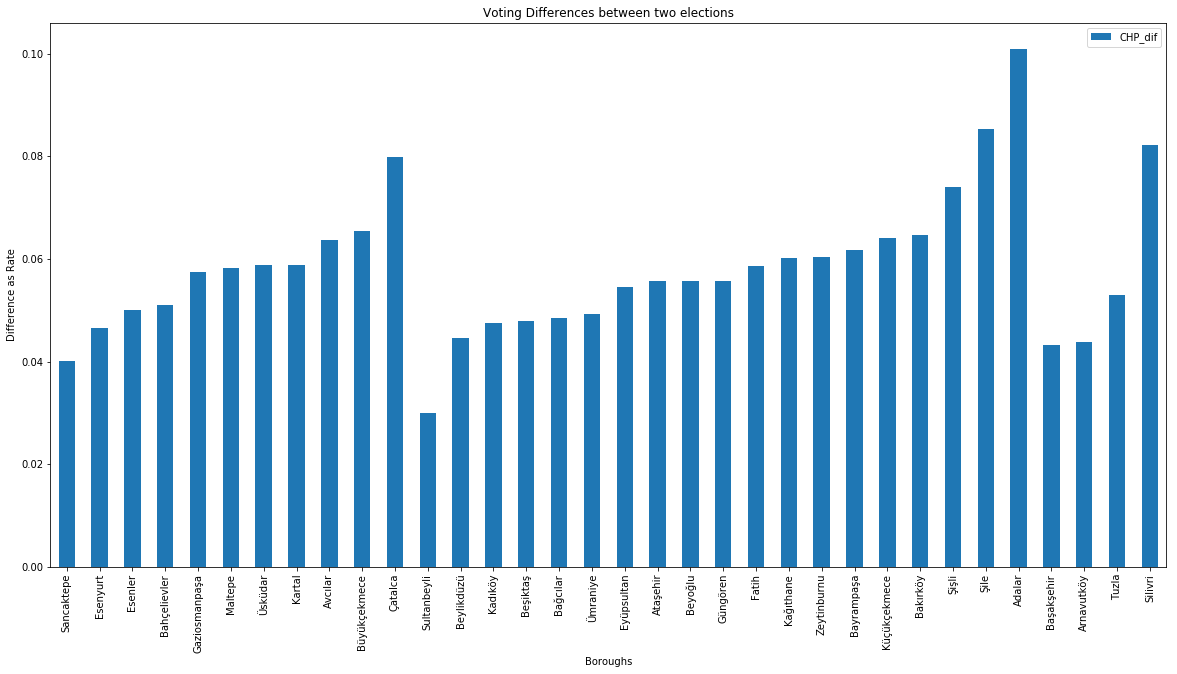

In [232]:
import matplotlib.pyplot as plt

df_dif=df2[["Borough","CHP_dif"]]
df_dif.set_index("Borough",inplace=True)
df_dif.plot(kind="bar", figsize=(20, 10)) 
plt.title('Voting Differences between two elections')
plt.ylabel('Difference as Rate')
plt.xlabel('Boroughs')
plt.show()

When the voting difference between two elections compared there is not a specific behvaiour among 3 clusters. All the booughs changed their choices over %4 percent in the favor of CHP's candidate Ekrem İmamoğlu.

## 5. Conclusion

The environment where the voter lives is very much related to her/his choices. In this study I tried to understand the political aim of the Istanbul voters by using Foursquare data. We cannot say that with the clustering depend on the Foursquere data we can determine Istanbul boroughs' political choices. We need more details and other data sources.